In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
train = pd.read_csv("C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Digit_Keras\\train.csv")
test = pd.read_csv("C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Digit_Keras\\test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

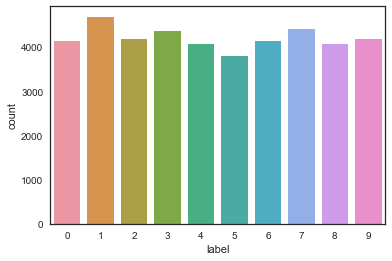

In [4]:
# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [5]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [6]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [7]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [8]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

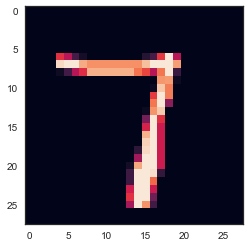

In [9]:
g = plt.imshow(X_train[1][:,:,0])

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [11]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [17]:
epochs = 30
batch_size = 86

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [19]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


  1/439 [..............................] - ETA: 9:14 - loss: 1.7527 - acc: 0.4651

  2/439 [..............................] - ETA: 8:18 - loss: 1.7172 - acc: 0.4360

  3/439 [..............................] - ETA: 8:03 - loss: 1.7148 - acc: 0.4302

  4/439 [..............................] - ETA: 7:40 - loss: 1.6620 - acc: 0.4390

  5/439 [..............................] - ETA: 7:27 - loss: 1.6582 - acc: 0.4419

  6/439 [..............................] - ETA: 7:28 - loss: 1.7343 - acc: 0.4225

  7/439 [..............................] - ETA: 7:32 - loss: 1.7184 - acc: 0.4385

  8/439 [..............................] - ETA: 7:28 - loss: 1.6827 - acc: 0.4549

  9/439 [..............................] - ETA: 7:25 - loss: 1.6305 - acc: 0.4729

 10/439 [..............................] - ETA: 7:29 - loss: 1.5845 - acc: 0.4826

 11/439 [..............................] - ETA: 7:34 - loss: 1.5482 - acc: 0.4958

 12/439 [..............................] - ETA: 7:29 - loss: 1.5066 - acc: 0.5097

 13/439 [..............................] - ETA: 7:23 - loss: 1.4734 - acc: 0.5152

 14/439 [..............................] - ETA: 7:19 - loss: 1.4863 - acc: 0.5116

 15/439 [>.............................] - ETA: 7:15 - loss: 1.4848 - acc: 0.5116

 16/439 [>.............................] - ETA: 7:11 - loss: 1.4579 - acc: 0.5218

 17/439 [>.............................] - ETA: 7:07 - loss: 1.4293 - acc: 0.5301

 18/439 [>.............................] - ETA: 7:03 - loss: 1.4140 - acc: 0.5317

 19/439 [>.............................] - ETA: 7:00 - loss: 1.3933 - acc: 0.5379

 20/439 [>.............................] - ETA: 6:57 - loss: 1.3720 - acc: 0.5448

 21/439 [>.............................] - ETA: 6:55 - loss: 1.3537 - acc: 0.5509

 22/439 [>.............................] - ETA: 6:53 - loss: 1.3355 - acc: 0.5571

 23/439 [>.............................] - ETA: 6:50 - loss: 1.3240 - acc: 0.5597

 24/439 [>.............................] - ETA: 6:48 - loss: 1.3053 - acc: 0.5654

 25/439 [>.............................] - ETA: 6:44 - loss: 1.2861 - acc: 0.5726

 26/439 [>.............................] - ETA: 6:40 - loss: 1.2747 - acc: 0.5742

 27/439 [>.............................] - ETA: 6:36 - loss: 1.2713 - acc: 0.5758

 28/439 [>.............................] - ETA: 6:33 - loss: 1.2625 - acc: 0.5801

 29/439 [>.............................] - ETA: 6:30 - loss: 1.2460 - acc: 0.5862

 30/439 [=>............................] - ETA: 6:27 - loss: 1.2297 - acc: 0.5926

 31/439 [=>............................] - ETA: 6:26 - loss: 1.2104 - acc: 0.5986

 32/439 [=>............................] - ETA: 6:23 - loss: 1.1970 - acc: 0.6021

 33/439 [=>............................] - ETA: 6:21 - loss: 1.1826 - acc: 0.6071

 34/439 [=>............................] - ETA: 6:18 - loss: 1.1684 - acc: 0.6118

 35/439 [=>............................] - ETA: 6:16 - loss: 1.1529 - acc: 0.6179

 36/439 [=>............................] - ETA: 6:14 - loss: 1.1473 - acc: 0.6208

 37/439 [=>............................] - ETA: 6:11 - loss: 1.1431 - acc: 0.6226

 38/439 [=>............................] - ETA: 6:09 - loss: 1.1385 - acc: 0.6227

 39/439 [=>............................] - ETA: 6:07 - loss: 1.1257 - acc: 0.6279

 40/439 [=>............................] - ETA: 6:05 - loss: 1.1187 - acc: 0.6308

 41/439 [=>............................] - ETA: 6:03 - loss: 1.1062 - acc: 0.6358

 42/439 [=>............................] - ETA: 6:01 - loss: 1.0974 - acc: 0.6395

 43/439 [=>............................] - ETA: 5:59 - loss: 1.0861 - acc: 0.6436

 44/439 [==>...........................] - ETA: 5:57 - loss: 1.0758 - acc: 0.6461

 45/439 [==>...........................] - ETA: 5:56 - loss: 1.0646 - acc: 0.6506

 46/439 [==>...........................] - ETA: 5:54 - loss: 1.0592 - acc: 0.6524

 47/439 [==>...........................] - ETA: 5:52 - loss: 1.0494 - acc: 0.6551

 48/439 [==>...........................] - ETA: 5:51 - loss: 1.0466 - acc: 0.6555

 49/439 [==>...........................] - ETA: 5:49 - loss: 1.0423 - acc: 0.6569

 50/439 [==>...........................] - ETA: 5:47 - loss: 1.0322 - acc: 0.6605

 51/439 [==>...........................] - ETA: 5:46 - loss: 1.0207 - acc: 0.6642

 52/439 [==>...........................] - ETA: 5:44 - loss: 1.0080 - acc: 0.6686

 53/439 [==>...........................] - ETA: 5:43 - loss: 1.0008 - acc: 0.6705

 54/439 [==>...........................] - ETA: 5:41 - loss: 0.9931 - acc: 0.6723

 55/439 [==>...........................] - ETA: 5:40 - loss: 0.9872 - acc: 0.6742

 56/439 [==>...........................] - ETA: 5:38 - loss: 0.9777 - acc: 0.6767

 57/439 [==>...........................] - ETA: 5:37 - loss: 0.9710 - acc: 0.6791

 58/439 [==>...........................] - ETA: 5:35 - loss: 0.9646 - acc: 0.6814

 59/439 [===>..........................] - ETA: 5:34 - loss: 0.9564 - acc: 0.6845

 60/439 [===>..........................] - ETA: 5:32 - loss: 0.9474 - acc: 0.6882

 61/439 [===>..........................] - ETA: 5:31 - loss: 0.9432 - acc: 0.6899

 62/439 [===>..........................] - ETA: 5:29 - loss: 0.9416 - acc: 0.6905

 63/439 [===>..........................] - ETA: 5:28 - loss: 0.9429 - acc: 0.6908

 64/439 [===>..........................] - ETA: 5:27 - loss: 0.9394 - acc: 0.6928

 65/439 [===>..........................] - ETA: 5:26 - loss: 0.9329 - acc: 0.6950

 66/439 [===>..........................] - ETA: 5:24 - loss: 0.9261 - acc: 0.6971

 67/439 [===>..........................] - ETA: 5:23 - loss: 0.9185 - acc: 0.6996

 68/439 [===>..........................] - ETA: 5:22 - loss: 0.9095 - acc: 0.7028

 69/439 [===>..........................] - ETA: 5:20 - loss: 0.9030 - acc: 0.7049

 70/439 [===>..........................] - ETA: 5:19 - loss: 0.8960 - acc: 0.7073

 71/439 [===>..........................] - ETA: 5:18 - loss: 0.8920 - acc: 0.7088

 72/439 [===>..........................] - ETA: 5:16 - loss: 0.8839 - acc: 0.7117

 73/439 [===>..........................] - ETA: 5:15 - loss: 0.8789 - acc: 0.7133

 74/439 [====>.........................] - ETA: 5:14 - loss: 0.8740 - acc: 0.7142

 75/439 [====>.........................] - ETA: 5:13 - loss: 0.8677 - acc: 0.7169

 76/439 [====>.........................] - ETA: 5:12 - loss: 0.8610 - acc: 0.7191

 77/439 [====>.........................] - ETA: 5:11 - loss: 0.8553 - acc: 0.7211

 78/439 [====>.........................] - ETA: 5:09 - loss: 0.8496 - acc: 0.7235

 79/439 [====>.........................] - ETA: 5:08 - loss: 0.8442 - acc: 0.7253

 80/439 [====>.........................] - ETA: 5:07 - loss: 0.8385 - acc: 0.7272

 81/439 [====>.........................] - ETA: 5:06 - loss: 0.8348 - acc: 0.7280

 82/439 [====>.........................] - ETA: 5:05 - loss: 0.8341 - acc: 0.7282

 83/439 [====>.........................] - ETA: 5:04 - loss: 0.8336 - acc: 0.7291

 84/439 [====>.........................] - ETA: 5:03 - loss: 0.8299 - acc: 0.7309

 85/439 [====>.........................] - ETA: 5:02 - loss: 0.8251 - acc: 0.7324

 86/439 [====>.........................] - ETA: 5:01 - loss: 0.8223 - acc: 0.7339

 87/439 [====>.........................] - ETA: 5:00 - loss: 0.8185 - acc: 0.7354

 88/439 [=====>........................] - ETA: 4:59 - loss: 0.8132 - acc: 0.7371

 89/439 [=====>........................] - ETA: 4:58 - loss: 0.8082 - acc: 0.7390

 90/439 [=====>........................] - ETA: 4:56 - loss: 0.8055 - acc: 0.7401

 91/439 [=====>........................] - ETA: 4:55 - loss: 0.8016 - acc: 0.7414

 92/439 [=====>........................] - ETA: 4:54 - loss: 0.7966 - acc: 0.7430

 93/439 [=====>........................] - ETA: 4:53 - loss: 0.7920 - acc: 0.7446

 94/439 [=====>........................] - ETA: 4:52 - loss: 0.7880 - acc: 0.7459

 95/439 [=====>........................] - ETA: 4:51 - loss: 0.7823 - acc: 0.7477

 96/439 [=====>........................] - ETA: 4:50 - loss: 0.7786 - acc: 0.7488

 97/439 [=====>........................] - ETA: 4:49 - loss: 0.7744 - acc: 0.7499

 98/439 [=====>........................] - ETA: 4:48 - loss: 0.7708 - acc: 0.7514

 99/439 [=====>........................] - ETA: 4:47 - loss: 0.7707 - acc: 0.7521

100/439 [=====>........................] - ETA: 4:46 - loss: 0.7682 - acc: 0.7528

101/439 [=====>........................] - ETA: 4:45 - loss: 0.7644 - acc: 0.7540

102/439 [=====>........................] - ETA: 4:44 - loss: 0.7606 - acc: 0.7550

103/439 [======>.......................] - ETA: 4:43 - loss: 0.7568 - acc: 0.7560

104/439 [======>.......................] - ETA: 4:42 - loss: 0.7538 - acc: 0.7569

105/439 [======>.......................] - ETA: 4:41 - loss: 0.7496 - acc: 0.7586

106/439 [======>.......................] - ETA: 4:40 - loss: 0.7452 - acc: 0.7602

107/439 [======>.......................] - ETA: 4:39 - loss: 0.7418 - acc: 0.7615

108/439 [======>.......................] - ETA: 4:38 - loss: 0.7387 - acc: 0.7622

109/439 [======>.......................] - ETA: 4:37 - loss: 0.7352 - acc: 0.7633

110/439 [======>.......................] - ETA: 4:36 - loss: 0.7322 - acc: 0.7645

111/439 [======>.......................] - ETA: 4:35 - loss: 0.7282 - acc: 0.7660

112/439 [======>.......................] - ETA: 4:34 - loss: 0.7260 - acc: 0.7669

113/439 [======>.......................] - ETA: 4:33 - loss: 0.7226 - acc: 0.7683

114/439 [======>.......................] - ETA: 4:32 - loss: 0.7192 - acc: 0.7694

115/439 [======>.......................] - ETA: 4:31 - loss: 0.7169 - acc: 0.7702

116/439 [======>.......................] - ETA: 4:30 - loss: 0.7134 - acc: 0.7707

117/439 [======>.......................] - ETA: 4:29 - loss: 0.7089 - acc: 0.7721

118/439 [=======>......................] - ETA: 4:28 - loss: 0.7056 - acc: 0.7734

119/439 [=======>......................] - ETA: 4:27 - loss: 0.7027 - acc: 0.7745

120/439 [=======>......................] - ETA: 4:26 - loss: 0.7019 - acc: 0.7749

121/439 [=======>......................] - ETA: 4:25 - loss: 0.7042 - acc: 0.7743

122/439 [=======>......................] - ETA: 4:24 - loss: 0.7042 - acc: 0.7741

123/439 [=======>......................] - ETA: 4:23 - loss: 0.7023 - acc: 0.7747

124/439 [=======>......................] - ETA: 4:22 - loss: 0.6983 - acc: 0.7761

125/439 [=======>......................] - ETA: 4:21 - loss: 0.6956 - acc: 0.7770

126/439 [=======>......................] - ETA: 4:20 - loss: 0.6926 - acc: 0.7782

127/439 [=======>......................] - ETA: 4:19 - loss: 0.6902 - acc: 0.7789

128/439 [=======>......................] - ETA: 4:18 - loss: 0.6859 - acc: 0.7806

129/439 [=======>......................] - ETA: 4:17 - loss: 0.6836 - acc: 0.7814

130/439 [=======>......................] - ETA: 4:16 - loss: 0.6812 - acc: 0.7822

131/439 [=======>......................] - ETA: 4:15 - loss: 0.6789 - acc: 0.7831

132/439 [========>.....................] - ETA: 4:14 - loss: 0.6751 - acc: 0.7844

133/439 [========>.....................] - ETA: 4:13 - loss: 0.6720 - acc: 0.7855

134/439 [========>.....................] - ETA: 4:12 - loss: 0.6689 - acc: 0.7863

135/439 [========>.....................] - ETA: 4:11 - loss: 0.6670 - acc: 0.7870

136/439 [========>.....................] - ETA: 4:10 - loss: 0.6639 - acc: 0.7880

137/439 [========>.....................] - ETA: 4:09 - loss: 0.6611 - acc: 0.7888

138/439 [========>.....................] - ETA: 4:08 - loss: 0.6599 - acc: 0.7895

139/439 [========>.....................] - ETA: 4:08 - loss: 0.6587 - acc: 0.7898

140/439 [========>.....................] - ETA: 4:07 - loss: 0.6558 - acc: 0.7908

141/439 [========>.....................] - ETA: 4:06 - loss: 0.6530 - acc: 0.7914

142/439 [========>.....................] - ETA: 4:05 - loss: 0.6512 - acc: 0.7919

143/439 [========>.....................] - ETA: 4:04 - loss: 0.6481 - acc: 0.7927

144/439 [========>.....................] - ETA: 4:03 - loss: 0.6455 - acc: 0.7935

145/439 [========>.....................] - ETA: 4:02 - loss: 0.6436 - acc: 0.7943

146/439 [========>.....................] - ETA: 4:01 - loss: 0.6403 - acc: 0.7955

147/439 [=========>....................] - ETA: 4:00 - loss: 0.6390 - acc: 0.7958

148/439 [=========>....................] - ETA: 3:59 - loss: 0.6380 - acc: 0.7961

149/439 [=========>....................] - ETA: 3:58 - loss: 0.6360 - acc: 0.7969

150/439 [=========>....................] - ETA: 3:58 - loss: 0.6338 - acc: 0.7975

151/439 [=========>....................] - ETA: 3:57 - loss: 0.6317 - acc: 0.7983

152/439 [=========>....................] - ETA: 3:56 - loss: 0.6311 - acc: 0.7986

153/439 [=========>....................] - ETA: 3:55 - loss: 0.6289 - acc: 0.7992

154/439 [=========>....................] - ETA: 3:54 - loss: 0.6266 - acc: 0.8001

155/439 [=========>....................] - ETA: 3:53 - loss: 0.6245 - acc: 0.8006

156/439 [=========>....................] - ETA: 3:52 - loss: 0.6226 - acc: 0.8012

157/439 [=========>....................] - ETA: 3:51 - loss: 0.6194 - acc: 0.8023

158/439 [=========>....................] - ETA: 3:51 - loss: 0.6163 - acc: 0.8033

159/439 [=========>....................] - ETA: 3:50 - loss: 0.6136 - acc: 0.8042

160/439 [=========>....................] - ETA: 3:49 - loss: 0.6123 - acc: 0.8043

161/439 [==========>...................] - ETA: 3:48 - loss: 0.6126 - acc: 0.8041

162/439 [==========>...................] - ETA: 3:48 - loss: 0.6125 - acc: 0.8043

163/439 [==========>...................] - ETA: 3:47 - loss: 0.6109 - acc: 0.8048

164/439 [==========>...................] - ETA: 3:46 - loss: 0.6092 - acc: 0.8054

165/439 [==========>...................] - ETA: 3:46 - loss: 0.6071 - acc: 0.8060

166/439 [==========>...................] - ETA: 3:45 - loss: 0.6047 - acc: 0.8067

167/439 [==========>...................] - ETA: 3:44 - loss: 0.6023 - acc: 0.8076

168/439 [==========>...................] - ETA: 3:43 - loss: 0.5998 - acc: 0.8083

169/439 [==========>...................] - ETA: 3:42 - loss: 0.5990 - acc: 0.8086

170/439 [==========>...................] - ETA: 3:41 - loss: 0.5976 - acc: 0.8089

171/439 [==========>...................] - ETA: 3:40 - loss: 0.5959 - acc: 0.8096

172/439 [==========>...................] - ETA: 3:40 - loss: 0.5946 - acc: 0.8102

173/439 [==========>...................] - ETA: 3:39 - loss: 0.5928 - acc: 0.8106

174/439 [==========>...................] - ETA: 3:38 - loss: 0.5913 - acc: 0.8110

175/439 [==========>...................] - ETA: 3:37 - loss: 0.5900 - acc: 0.8112

176/439 [===========>..................] - ETA: 3:36 - loss: 0.5876 - acc: 0.8120

177/439 [===========>..................] - ETA: 3:35 - loss: 0.5860 - acc: 0.8125

178/439 [===========>..................] - ETA: 3:34 - loss: 0.5842 - acc: 0.8130

179/439 [===========>..................] - ETA: 3:33 - loss: 0.5828 - acc: 0.8134

180/439 [===========>..................] - ETA: 3:32 - loss: 0.5803 - acc: 0.8142

181/439 [===========>..................] - ETA: 3:32 - loss: 0.5784 - acc: 0.8148

182/439 [===========>..................] - ETA: 3:31 - loss: 0.5764 - acc: 0.8154

183/439 [===========>..................] - ETA: 3:30 - loss: 0.5758 - acc: 0.8155

184/439 [===========>..................] - ETA: 3:29 - loss: 0.5741 - acc: 0.8162

185/439 [===========>..................] - ETA: 3:28 - loss: 0.5733 - acc: 0.8167

186/439 [===========>..................] - ETA: 3:27 - loss: 0.5724 - acc: 0.8170

187/439 [===========>..................] - ETA: 3:26 - loss: 0.5718 - acc: 0.8171

188/439 [===========>..................] - ETA: 3:25 - loss: 0.5699 - acc: 0.8177

189/439 [===========>..................] - ETA: 3:25 - loss: 0.5686 - acc: 0.8183

190/439 [===========>..................] - ETA: 3:24 - loss: 0.5674 - acc: 0.8187

191/439 [============>.................] - ETA: 3:23 - loss: 0.5652 - acc: 0.8195

192/439 [============>.................] - ETA: 3:22 - loss: 0.5633 - acc: 0.8199

193/439 [============>.................] - ETA: 3:21 - loss: 0.5620 - acc: 0.8203

194/439 [============>.................] - ETA: 3:20 - loss: 0.5610 - acc: 0.8208

195/439 [============>.................] - ETA: 3:19 - loss: 0.5600 - acc: 0.8210

196/439 [============>.................] - ETA: 3:19 - loss: 0.5583 - acc: 0.8217

197/439 [============>.................] - ETA: 3:18 - loss: 0.5573 - acc: 0.8221

198/439 [============>.................] - ETA: 3:17 - loss: 0.5555 - acc: 0.8226

199/439 [============>.................] - ETA: 3:16 - loss: 0.5543 - acc: 0.8231

200/439 [============>.................] - ETA: 3:15 - loss: 0.5529 - acc: 0.8237

201/439 [============>.................] - ETA: 3:14 - loss: 0.5514 - acc: 0.8240

202/439 [============>.................] - ETA: 3:13 - loss: 0.5500 - acc: 0.8244

203/439 [============>.................] - ETA: 3:13 - loss: 0.5481 - acc: 0.8251

204/439 [============>.................] - ETA: 3:12 - loss: 0.5459 - acc: 0.8259

205/439 [=============>................] - ETA: 3:11 - loss: 0.5440 - acc: 0.8265

206/439 [=============>................] - ETA: 3:10 - loss: 0.5422 - acc: 0.8271

207/439 [=============>................] - ETA: 3:09 - loss: 0.5409 - acc: 0.8276

208/439 [=============>................] - ETA: 3:08 - loss: 0.5406 - acc: 0.8279

209/439 [=============>................] - ETA: 3:07 - loss: 0.5393 - acc: 0.8282

210/439 [=============>................] - ETA: 3:07 - loss: 0.5382 - acc: 0.8285

211/439 [=============>................] - ETA: 3:06 - loss: 0.5363 - acc: 0.8292

212/439 [=============>................] - ETA: 3:05 - loss: 0.5353 - acc: 0.8296

213/439 [=============>................] - ETA: 3:04 - loss: 0.5339 - acc: 0.8301

214/439 [=============>................] - ETA: 3:03 - loss: 0.5326 - acc: 0.8306

215/439 [=============>................] - ETA: 3:02 - loss: 0.5313 - acc: 0.8309

216/439 [=============>................] - ETA: 3:02 - loss: 0.5302 - acc: 0.8313

217/439 [=============>................] - ETA: 3:01 - loss: 0.5288 - acc: 0.8317

218/439 [=============>................] - ETA: 3:00 - loss: 0.5270 - acc: 0.8324

219/439 [=============>................] - ETA: 2:59 - loss: 0.5253 - acc: 0.8329

220/439 [==============>...............] - ETA: 2:58 - loss: 0.5239 - acc: 0.8333

221/439 [==============>...............] - ETA: 2:57 - loss: 0.5219 - acc: 0.8339

222/439 [==============>...............] - ETA: 2:56 - loss: 0.5207 - acc: 0.8342

223/439 [==============>...............] - ETA: 2:56 - loss: 0.5191 - acc: 0.8347

224/439 [==============>...............] - ETA: 2:55 - loss: 0.5182 - acc: 0.8352

225/439 [==============>...............] - ETA: 2:54 - loss: 0.5175 - acc: 0.8353

226/439 [==============>...............] - ETA: 2:53 - loss: 0.5158 - acc: 0.8358

227/439 [==============>...............] - ETA: 2:52 - loss: 0.5143 - acc: 0.8363

228/439 [==============>...............] - ETA: 2:51 - loss: 0.5133 - acc: 0.8369

229/439 [==============>...............] - ETA: 2:51 - loss: 0.5122 - acc: 0.8372

230/439 [==============>...............] - ETA: 2:50 - loss: 0.5117 - acc: 0.8376

231/439 [==============>...............] - ETA: 2:49 - loss: 0.5108 - acc: 0.8379

232/439 [==============>...............] - ETA: 2:48 - loss: 0.5094 - acc: 0.8383

233/439 [==============>...............] - ETA: 2:47 - loss: 0.5082 - acc: 0.8387

234/439 [==============>...............] - ETA: 2:46 - loss: 0.5073 - acc: 0.8390

235/439 [===============>..............] - ETA: 2:45 - loss: 0.5063 - acc: 0.8393

236/439 [===============>..............] - ETA: 2:45 - loss: 0.5055 - acc: 0.8395

237/439 [===============>..............] - ETA: 2:44 - loss: 0.5043 - acc: 0.8399

238/439 [===============>..............] - ETA: 2:43 - loss: 0.5031 - acc: 0.8403

239/439 [===============>..............] - ETA: 2:42 - loss: 0.5016 - acc: 0.8408

240/439 [===============>..............] - ETA: 2:41 - loss: 0.5000 - acc: 0.8412

241/439 [===============>..............] - ETA: 2:40 - loss: 0.4997 - acc: 0.8413

242/439 [===============>..............] - ETA: 2:40 - loss: 0.4990 - acc: 0.8414

243/439 [===============>..............] - ETA: 2:39 - loss: 0.4976 - acc: 0.8419

244/439 [===============>..............] - ETA: 2:38 - loss: 0.4961 - acc: 0.8425

245/439 [===============>..............] - ETA: 2:37 - loss: 0.4952 - acc: 0.8429

246/439 [===============>..............] - ETA: 2:36 - loss: 0.4937 - acc: 0.8433

247/439 [===============>..............] - ETA: 2:36 - loss: 0.4925 - acc: 0.8437

248/439 [===============>..............] - ETA: 2:35 - loss: 0.4914 - acc: 0.8440

249/439 [================>.............] - ETA: 2:34 - loss: 0.4901 - acc: 0.8445

250/439 [================>.............] - ETA: 2:33 - loss: 0.4887 - acc: 0.8449

251/439 [================>.............] - ETA: 2:33 - loss: 0.4882 - acc: 0.8451

252/439 [================>.............] - ETA: 2:32 - loss: 0.4884 - acc: 0.8452

253/439 [================>.............] - ETA: 2:31 - loss: 0.4868 - acc: 0.8458

254/439 [================>.............] - ETA: 2:30 - loss: 0.4854 - acc: 0.8462

255/439 [================>.............] - ETA: 2:29 - loss: 0.4842 - acc: 0.8465

256/439 [================>.............] - ETA: 2:28 - loss: 0.4831 - acc: 0.8469

257/439 [================>.............] - ETA: 2:28 - loss: 0.4821 - acc: 0.8471

258/439 [================>.............] - ETA: 2:27 - loss: 0.4810 - acc: 0.8473

259/439 [================>.............] - ETA: 2:26 - loss: 0.4798 - acc: 0.8478

260/439 [================>.............] - ETA: 2:25 - loss: 0.4792 - acc: 0.8480

261/439 [================>.............] - ETA: 2:24 - loss: 0.4779 - acc: 0.8485

262/439 [================>.............] - ETA: 2:23 - loss: 0.4764 - acc: 0.8490

263/439 [================>.............] - ETA: 2:23 - loss: 0.4760 - acc: 0.8491

264/439 [=================>............] - ETA: 2:22 - loss: 0.4749 - acc: 0.8495

265/439 [=================>............] - ETA: 2:21 - loss: 0.4737 - acc: 0.8498

266/439 [=================>............] - ETA: 2:20 - loss: 0.4725 - acc: 0.8501

267/439 [=================>............] - ETA: 2:19 - loss: 0.4711 - acc: 0.8506

268/439 [=================>............] - ETA: 2:18 - loss: 0.4703 - acc: 0.8510

269/439 [=================>............] - ETA: 2:18 - loss: 0.4693 - acc: 0.8512

270/439 [=================>............] - ETA: 2:17 - loss: 0.4682 - acc: 0.8515

271/439 [=================>............] - ETA: 2:16 - loss: 0.4673 - acc: 0.8518

272/439 [=================>............] - ETA: 2:15 - loss: 0.4670 - acc: 0.8519

273/439 [=================>............] - ETA: 2:14 - loss: 0.4665 - acc: 0.8520

274/439 [=================>............] - ETA: 2:13 - loss: 0.4659 - acc: 0.8521

275/439 [=================>............] - ETA: 2:13 - loss: 0.4649 - acc: 0.8523

276/439 [=================>............] - ETA: 2:12 - loss: 0.4640 - acc: 0.8525

277/439 [=================>............] - ETA: 2:11 - loss: 0.4632 - acc: 0.8528

278/439 [=================>............] - ETA: 2:10 - loss: 0.4619 - acc: 0.8531

279/439 [==================>...........] - ETA: 2:09 - loss: 0.4606 - acc: 0.8535

280/439 [==================>...........] - ETA: 2:08 - loss: 0.4601 - acc: 0.8537

281/439 [==================>...........] - ETA: 2:08 - loss: 0.4594 - acc: 0.8539

282/439 [==================>...........] - ETA: 2:07 - loss: 0.4585 - acc: 0.8542

283/439 [==================>...........] - ETA: 2:06 - loss: 0.4575 - acc: 0.8545

284/439 [==================>...........] - ETA: 2:05 - loss: 0.4569 - acc: 0.8547

285/439 [==================>...........] - ETA: 2:04 - loss: 0.4560 - acc: 0.8548

286/439 [==================>...........] - ETA: 2:03 - loss: 0.4548 - acc: 0.8552

287/439 [==================>...........] - ETA: 2:03 - loss: 0.4539 - acc: 0.8555

288/439 [==================>...........] - ETA: 2:02 - loss: 0.4531 - acc: 0.8557

289/439 [==================>...........] - ETA: 2:01 - loss: 0.4519 - acc: 0.8560

290/439 [==================>...........] - ETA: 2:00 - loss: 0.4508 - acc: 0.8565

291/439 [==================>...........] - ETA: 1:59 - loss: 0.4496 - acc: 0.8568

292/439 [==================>...........] - ETA: 1:58 - loss: 0.4496 - acc: 0.8569

293/439 [===================>..........] - ETA: 1:58 - loss: 0.4496 - acc: 0.8568

294/439 [===================>..........] - ETA: 1:57 - loss: 0.4489 - acc: 0.8570

295/439 [===================>..........] - ETA: 1:56 - loss: 0.4479 - acc: 0.8574

296/439 [===================>..........] - ETA: 1:55 - loss: 0.4472 - acc: 0.8575

297/439 [===================>..........] - ETA: 1:54 - loss: 0.4466 - acc: 0.8578

298/439 [===================>..........] - ETA: 1:53 - loss: 0.4458 - acc: 0.8581

299/439 [===================>..........] - ETA: 1:53 - loss: 0.4448 - acc: 0.8584

300/439 [===================>..........] - ETA: 1:52 - loss: 0.4443 - acc: 0.8587

301/439 [===================>..........] - ETA: 1:51 - loss: 0.4430 - acc: 0.8591

302/439 [===================>..........] - ETA: 1:50 - loss: 0.4423 - acc: 0.8594

303/439 [===================>..........] - ETA: 1:49 - loss: 0.4418 - acc: 0.8597

304/439 [===================>..........] - ETA: 1:49 - loss: 0.4411 - acc: 0.8599

305/439 [===================>..........] - ETA: 1:48 - loss: 0.4403 - acc: 0.8602

306/439 [===================>..........] - ETA: 1:47 - loss: 0.4400 - acc: 0.8605

307/439 [===================>..........] - ETA: 1:46 - loss: 0.4391 - acc: 0.8607

308/439 [====================>.........] - ETA: 1:45 - loss: 0.4384 - acc: 0.8609

309/439 [====================>.........] - ETA: 1:44 - loss: 0.4376 - acc: 0.8611

310/439 [====================>.........] - ETA: 1:44 - loss: 0.4377 - acc: 0.8611

311/439 [====================>.........] - ETA: 1:43 - loss: 0.4377 - acc: 0.8611

312/439 [====================>.........] - ETA: 1:42 - loss: 0.4372 - acc: 0.8613

313/439 [====================>.........] - ETA: 1:41 - loss: 0.4363 - acc: 0.8617

314/439 [====================>.........] - ETA: 1:40 - loss: 0.4356 - acc: 0.8618

315/439 [====================>.........] - ETA: 1:40 - loss: 0.4347 - acc: 0.8622

316/439 [====================>.........] - ETA: 1:39 - loss: 0.4343 - acc: 0.8622

317/439 [====================>.........] - ETA: 1:38 - loss: 0.4335 - acc: 0.8625

318/439 [====================>.........] - ETA: 1:37 - loss: 0.4330 - acc: 0.8628

319/439 [====================>.........] - ETA: 1:36 - loss: 0.4323 - acc: 0.8631

320/439 [====================>.........] - ETA: 1:35 - loss: 0.4317 - acc: 0.8631

321/439 [====================>.........] - ETA: 1:35 - loss: 0.4310 - acc: 0.8633

322/439 [=====================>........] - ETA: 1:34 - loss: 0.4301 - acc: 0.8636

323/439 [=====================>........] - ETA: 1:33 - loss: 0.4291 - acc: 0.8640

324/439 [=====================>........] - ETA: 1:32 - loss: 0.4283 - acc: 0.8641

325/439 [=====================>........] - ETA: 1:31 - loss: 0.4277 - acc: 0.8644

326/439 [=====================>........] - ETA: 1:31 - loss: 0.4270 - acc: 0.8646

327/439 [=====================>........] - ETA: 1:30 - loss: 0.4268 - acc: 0.8647

328/439 [=====================>........] - ETA: 1:29 - loss: 0.4264 - acc: 0.8649

329/439 [=====================>........] - ETA: 1:28 - loss: 0.4259 - acc: 0.8650

330/439 [=====================>........] - ETA: 1:27 - loss: 0.4253 - acc: 0.8652

331/439 [=====================>........] - ETA: 1:27 - loss: 0.4247 - acc: 0.8654

332/439 [=====================>........] - ETA: 1:26 - loss: 0.4241 - acc: 0.8655

333/439 [=====================>........] - ETA: 1:25 - loss: 0.4232 - acc: 0.8659

334/439 [=====================>........] - ETA: 1:24 - loss: 0.4229 - acc: 0.8660

335/439 [=====================>........] - ETA: 1:23 - loss: 0.4221 - acc: 0.8663

336/439 [=====================>........] - ETA: 1:22 - loss: 0.4212 - acc: 0.8666

337/439 [======================>.......] - ETA: 1:22 - loss: 0.4204 - acc: 0.8668

338/439 [======================>.......] - ETA: 1:21 - loss: 0.4197 - acc: 0.8670

339/439 [======================>.......] - ETA: 1:20 - loss: 0.4187 - acc: 0.8674

340/439 [======================>.......] - ETA: 1:19 - loss: 0.4178 - acc: 0.8676

341/439 [======================>.......] - ETA: 1:18 - loss: 0.4166 - acc: 0.8680

342/439 [======================>.......] - ETA: 1:18 - loss: 0.4161 - acc: 0.8683

343/439 [======================>.......] - ETA: 1:17 - loss: 0.4156 - acc: 0.8684

344/439 [======================>.......] - ETA: 1:16 - loss: 0.4151 - acc: 0.8685

345/439 [======================>.......] - ETA: 1:15 - loss: 0.4142 - acc: 0.8689

346/439 [======================>.......] - ETA: 1:14 - loss: 0.4133 - acc: 0.8692

347/439 [======================>.......] - ETA: 1:14 - loss: 0.4130 - acc: 0.8692

348/439 [======================>.......] - ETA: 1:13 - loss: 0.4124 - acc: 0.8693

349/439 [======================>.......] - ETA: 1:12 - loss: 0.4119 - acc: 0.8695

350/439 [======================>.......] - ETA: 1:11 - loss: 0.4113 - acc: 0.8697

351/439 [======================>.......] - ETA: 1:10 - loss: 0.4107 - acc: 0.8699

352/439 [=======================>......] - ETA: 1:09 - loss: 0.4098 - acc: 0.8702

353/439 [=======================>......] - ETA: 1:09 - loss: 0.4090 - acc: 0.8704

354/439 [=======================>......] - ETA: 1:08 - loss: 0.4085 - acc: 0.8706

355/439 [=======================>......] - ETA: 1:07 - loss: 0.4075 - acc: 0.8710

356/439 [=======================>......] - ETA: 1:06 - loss: 0.4067 - acc: 0.8712

357/439 [=======================>......] - ETA: 1:05 - loss: 0.4064 - acc: 0.8713

358/439 [=======================>......] - ETA: 1:05 - loss: 0.4064 - acc: 0.8714

359/439 [=======================>......] - ETA: 1:04 - loss: 0.4060 - acc: 0.8715

360/439 [=======================>......] - ETA: 1:03 - loss: 0.4052 - acc: 0.8717

361/439 [=======================>......] - ETA: 1:02 - loss: 0.4044 - acc: 0.8719

362/439 [=======================>......] - ETA: 1:01 - loss: 0.4039 - acc: 0.8721

363/439 [=======================>......] - ETA: 1:01 - loss: 0.4032 - acc: 0.8723

364/439 [=======================>......] - ETA: 1:00 - loss: 0.4027 - acc: 0.8724

365/439 [=======================>......] - ETA: 59s - loss: 0.4020 - acc: 0.8726 

366/439 [========================>.....] - ETA: 58s - loss: 0.4017 - acc: 0.8727

367/439 [========================>.....] - ETA: 57s - loss: 0.4014 - acc: 0.8728

368/439 [========================>.....] - ETA: 56s - loss: 0.4009 - acc: 0.8729

369/439 [========================>.....] - ETA: 56s - loss: 0.4004 - acc: 0.8730

370/439 [========================>.....] - ETA: 55s - loss: 0.3999 - acc: 0.8732

371/439 [========================>.....] - ETA: 54s - loss: 0.3994 - acc: 0.8734

372/439 [========================>.....] - ETA: 53s - loss: 0.3988 - acc: 0.8736

373/439 [========================>.....] - ETA: 52s - loss: 0.3986 - acc: 0.8737

374/439 [========================>.....] - ETA: 52s - loss: 0.3980 - acc: 0.8739

375/439 [========================>.....] - ETA: 51s - loss: 0.3974 - acc: 0.8742

376/439 [========================>.....] - ETA: 50s - loss: 0.3966 - acc: 0.8744

377/439 [========================>.....] - ETA: 49s - loss: 0.3962 - acc: 0.8745

378/439 [========================>.....] - ETA: 48s - loss: 0.3959 - acc: 0.8746

379/439 [========================>.....] - ETA: 48s - loss: 0.3952 - acc: 0.8748

380/439 [========================>.....] - ETA: 47s - loss: 0.3945 - acc: 0.8750

381/439 [=========================>....] - ETA: 46s - loss: 0.3940 - acc: 0.8752

382/439 [=========================>....] - ETA: 45s - loss: 0.3934 - acc: 0.8754

383/439 [=========================>....] - ETA: 44s - loss: 0.3927 - acc: 0.8757

384/439 [=========================>....] - ETA: 44s - loss: 0.3920 - acc: 0.8759

385/439 [=========================>....] - ETA: 43s - loss: 0.3914 - acc: 0.8761

386/439 [=========================>....] - ETA: 42s - loss: 0.3910 - acc: 0.8761

387/439 [=========================>....] - ETA: 41s - loss: 0.3901 - acc: 0.8764

388/439 [=========================>....] - ETA: 40s - loss: 0.3900 - acc: 0.8766

389/439 [=========================>....] - ETA: 40s - loss: 0.3893 - acc: 0.8768

390/439 [=========================>....] - ETA: 39s - loss: 0.3886 - acc: 0.8770

391/439 [=========================>....] - ETA: 38s - loss: 0.3879 - acc: 0.8772

392/439 [=========================>....] - ETA: 37s - loss: 0.3870 - acc: 0.8775

393/439 [=========================>....] - ETA: 36s - loss: 0.3867 - acc: 0.8777

394/439 [=========================>....] - ETA: 36s - loss: 0.3863 - acc: 0.8779

395/439 [=========================>....] - ETA: 35s - loss: 0.3856 - acc: 0.8780

396/439 [==========================>...] - ETA: 34s - loss: 0.3852 - acc: 0.8781

397/439 [==========================>...] - ETA: 33s - loss: 0.3852 - acc: 0.8781

398/439 [==========================>...] - ETA: 32s - loss: 0.3850 - acc: 0.8782

399/439 [==========================>...] - ETA: 31s - loss: 0.3846 - acc: 0.8783

400/439 [==========================>...] - ETA: 31s - loss: 0.3841 - acc: 0.8784

401/439 [==========================>...] - ETA: 30s - loss: 0.3834 - acc: 0.8787

402/439 [==========================>...] - ETA: 29s - loss: 0.3831 - acc: 0.8788

403/439 [==========================>...] - ETA: 28s - loss: 0.3823 - acc: 0.8791

404/439 [==========================>...] - ETA: 27s - loss: 0.3817 - acc: 0.8793

405/439 [==========================>...] - ETA: 27s - loss: 0.3816 - acc: 0.8794

406/439 [==========================>...] - ETA: 26s - loss: 0.3811 - acc: 0.8796

407/439 [==========================>...] - ETA: 25s - loss: 0.3802 - acc: 0.8799

408/439 [==========================>...] - ETA: 24s - loss: 0.3795 - acc: 0.8801

409/439 [==========================>...] - ETA: 23s - loss: 0.3788 - acc: 0.8804

410/439 [===========================>..] - ETA: 23s - loss: 0.3780 - acc: 0.8806

411/439 [===========================>..] - ETA: 22s - loss: 0.3783 - acc: 0.8806

412/439 [===========================>..] - ETA: 21s - loss: 0.3783 - acc: 0.8807

413/439 [===========================>..] - ETA: 20s - loss: 0.3775 - acc: 0.8810

414/439 [===========================>..] - ETA: 19s - loss: 0.3773 - acc: 0.8811

415/439 [===========================>..] - ETA: 19s - loss: 0.3767 - acc: 0.8813

416/439 [===========================>..] - ETA: 18s - loss: 0.3760 - acc: 0.8815

417/439 [===========================>..] - ETA: 17s - loss: 0.3753 - acc: 0.8817

418/439 [===========================>..] - ETA: 16s - loss: 0.3748 - acc: 0.8819

419/439 [===========================>..] - ETA: 15s - loss: 0.3741 - acc: 0.8822

420/439 [===========================>..] - ETA: 15s - loss: 0.3736 - acc: 0.8823

421/439 [===========================>..] - ETA: 14s - loss: 0.3735 - acc: 0.8824

422/439 [===========================>..] - ETA: 13s - loss: 0.3729 - acc: 0.8826

423/439 [===========================>..] - ETA: 12s - loss: 0.3724 - acc: 0.8828

424/439 [===========================>..] - ETA: 11s - loss: 0.3719 - acc: 0.8829

425/439 [============================>.] - ETA: 11s - loss: 0.3715 - acc: 0.8830

426/439 [============================>.] - ETA: 10s - loss: 0.3708 - acc: 0.8832

427/439 [============================>.] - ETA: 9s - loss: 0.3707 - acc: 0.8833 

428/439 [============================>.] - ETA: 8s - loss: 0.3701 - acc: 0.8835

429/439 [============================>.] - ETA: 7s - loss: 0.3696 - acc: 0.8836

430/439 [============================>.] - ETA: 7s - loss: 0.3692 - acc: 0.8837

431/439 [============================>.] - ETA: 6s - loss: 0.3687 - acc: 0.8838

432/439 [============================>.] - ETA: 5s - loss: 0.3683 - acc: 0.8840

433/439 [============================>.] - ETA: 4s - loss: 0.3677 - acc: 0.8842

434/439 [============================>.] - ETA: 3s - loss: 0.3673 - acc: 0.8844

435/439 [============================>.] - ETA: 3s - loss: 0.3668 - acc: 0.8846

436/439 [============================>.] - ETA: 2s - loss: 0.3665 - acc: 0.8847

437/439 [============================>.] - ETA: 1s - loss: 0.3659 - acc: 0.8849

438/439 [============================>.] - ETA: 0s - loss: 0.3654 - acc: 0.8850

439/439 [==============================] - 364s 829ms/step - loss: 0.3647 - acc: 0.8852 - val_loss: 0.0638 - val_acc: 0.9795


Epoch 2/30


  1/439 [..............................] - ETA: 6:30 - loss: 0.3358 - acc: 0.9186

  2/439 [..............................] - ETA: 6:01 - loss: 0.3101 - acc: 0.9244

  3/439 [..............................] - ETA: 5:51 - loss: 0.2844 - acc: 0.9186

  4/439 [..............................] - ETA: 5:48 - loss: 0.2707 - acc: 0.9186

  5/439 [..............................] - ETA: 5:44 - loss: 0.2382 - acc: 0.9302

  6/439 [..............................] - ETA: 5:41 - loss: 0.2352 - acc: 0.9341

  7/439 [..............................] - ETA: 5:39 - loss: 0.2128 - acc: 0.9419

  8/439 [..............................] - ETA: 5:39 - loss: 0.1956 - acc: 0.9477

  9/439 [..............................] - ETA: 5:38 - loss: 0.1857 - acc: 0.9496

 10/439 [..............................] - ETA: 5:37 - loss: 0.1752 - acc: 0.9500

 11/439 [..............................] - ETA: 5:36 - loss: 0.1751 - acc: 0.9503

 12/439 [..............................] - ETA: 5:34 - loss: 0.1722 - acc: 0.9506

 13/439 [..............................] - ETA: 5:33 - loss: 0.1669 - acc: 0.9526

 14/439 [..............................] - ETA: 5:32 - loss: 0.1726 - acc: 0.9477

 15/439 [>.............................] - ETA: 5:30 - loss: 0.1804 - acc: 0.9426

 16/439 [>.............................] - ETA: 5:30 - loss: 0.1866 - acc: 0.9419

 17/439 [>.............................] - ETA: 5:29 - loss: 0.1840 - acc: 0.9425

 18/439 [>.............................] - ETA: 5:28 - loss: 0.1798 - acc: 0.9438

 19/439 [>.............................] - ETA: 5:27 - loss: 0.1861 - acc: 0.9412

 20/439 [>.............................] - ETA: 5:26 - loss: 0.1873 - acc: 0.9401

 21/439 [>.............................] - ETA: 5:25 - loss: 0.1854 - acc: 0.9419

 22/439 [>.............................] - ETA: 5:24 - loss: 0.1847 - acc: 0.9419

 23/439 [>.............................] - ETA: 5:23 - loss: 0.1813 - acc: 0.9434

 24/439 [>.............................] - ETA: 5:23 - loss: 0.1792 - acc: 0.9433

 25/439 [>.............................] - ETA: 5:21 - loss: 0.1800 - acc: 0.9428

 26/439 [>.............................] - ETA: 5:20 - loss: 0.1833 - acc: 0.9419

 27/439 [>.............................] - ETA: 5:20 - loss: 0.1846 - acc: 0.9419

 28/439 [>.............................] - ETA: 5:19 - loss: 0.1830 - acc: 0.9423

 29/439 [>.............................] - ETA: 5:18 - loss: 0.1793 - acc: 0.9435

 30/439 [=>............................] - ETA: 5:17 - loss: 0.1756 - acc: 0.9450

 31/439 [=>............................] - ETA: 5:17 - loss: 0.1798 - acc: 0.9449

 32/439 [=>............................] - ETA: 5:16 - loss: 0.1798 - acc: 0.9448

 33/439 [=>............................] - ETA: 5:15 - loss: 0.1777 - acc: 0.9454

 34/439 [=>............................] - ETA: 5:14 - loss: 0.1816 - acc: 0.9439

 35/439 [=>............................] - ETA: 5:13 - loss: 0.1837 - acc: 0.9442

 36/439 [=>............................] - ETA: 5:12 - loss: 0.1801 - acc: 0.9454

 37/439 [=>............................] - ETA: 5:12 - loss: 0.1795 - acc: 0.9463

 38/439 [=>............................] - ETA: 5:10 - loss: 0.1778 - acc: 0.9461

 39/439 [=>............................] - ETA: 5:10 - loss: 0.1760 - acc: 0.9463

 40/439 [=>............................] - ETA: 5:09 - loss: 0.1726 - acc: 0.9477

 41/439 [=>............................] - ETA: 5:08 - loss: 0.1724 - acc: 0.9478

 42/439 [=>............................] - ETA: 5:07 - loss: 0.1737 - acc: 0.9471

 43/439 [=>............................] - ETA: 5:06 - loss: 0.1775 - acc: 0.9465

 44/439 [==>...........................] - ETA: 5:06 - loss: 0.1768 - acc: 0.9464

 45/439 [==>...........................] - ETA: 5:05 - loss: 0.1770 - acc: 0.9463

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.1755 - acc: 0.9462

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.1745 - acc: 0.9461

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.1726 - acc: 0.9467

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.1700 - acc: 0.9473

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.1705 - acc: 0.9470

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.1723 - acc: 0.9469

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.1711 - acc: 0.9475

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.1716 - acc: 0.9476

 54/439 [==>...........................] - ETA: 4:58 - loss: 0.1711 - acc: 0.9479

 55/439 [==>...........................] - ETA: 4:57 - loss: 0.1696 - acc: 0.9482

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.1674 - acc: 0.9487

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.1664 - acc: 0.9490

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.1669 - acc: 0.9489

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.1677 - acc: 0.9490

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.1662 - acc: 0.9494

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.1650 - acc: 0.9495

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.1636 - acc: 0.9501

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.1617 - acc: 0.9509

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.1632 - acc: 0.9502

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.1624 - acc: 0.9504

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.1637 - acc: 0.9500

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.1635 - acc: 0.9497

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.1619 - acc: 0.9499

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.1613 - acc: 0.9505

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.1618 - acc: 0.9503

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.1609 - acc: 0.9504

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.1597 - acc: 0.9507

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.1607 - acc: 0.9503

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.1634 - acc: 0.9494

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.1620 - acc: 0.9499

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.1624 - acc: 0.9498

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.1613 - acc: 0.9500

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.1610 - acc: 0.9501

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.1617 - acc: 0.9503

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.1643 - acc: 0.9500

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.1658 - acc: 0.9495

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.1665 - acc: 0.9495

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.1673 - acc: 0.9496

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.1676 - acc: 0.9492

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.1664 - acc: 0.9497

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.1660 - acc: 0.9498

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.1674 - acc: 0.9493

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.1663 - acc: 0.9498

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.1669 - acc: 0.9494

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.1670 - acc: 0.9494

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.1666 - acc: 0.9495

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.1682 - acc: 0.9493

 93/439 [=====>........................] - ETA: 4:28 - loss: 0.1681 - acc: 0.9495

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.1674 - acc: 0.9495

 95/439 [=====>........................] - ETA: 4:27 - loss: 0.1664 - acc: 0.9498

 96/439 [=====>........................] - ETA: 4:26 - loss: 0.1666 - acc: 0.9497

 97/439 [=====>........................] - ETA: 4:26 - loss: 0.1658 - acc: 0.9499

 98/439 [=====>........................] - ETA: 4:25 - loss: 0.1659 - acc: 0.9500

 99/439 [=====>........................] - ETA: 4:24 - loss: 0.1665 - acc: 0.9500

100/439 [=====>........................] - ETA: 4:23 - loss: 0.1667 - acc: 0.9495

101/439 [=====>........................] - ETA: 4:23 - loss: 0.1657 - acc: 0.9497

102/439 [=====>........................] - ETA: 4:22 - loss: 0.1655 - acc: 0.9497

103/439 [======>.......................] - ETA: 4:21 - loss: 0.1667 - acc: 0.9494

104/439 [======>.......................] - ETA: 4:20 - loss: 0.1663 - acc: 0.9492

105/439 [======>.......................] - ETA: 4:19 - loss: 0.1657 - acc: 0.9494

106/439 [======>.......................] - ETA: 4:19 - loss: 0.1653 - acc: 0.9494

107/439 [======>.......................] - ETA: 4:18 - loss: 0.1644 - acc: 0.9496

108/439 [======>.......................] - ETA: 4:17 - loss: 0.1639 - acc: 0.9495

109/439 [======>.......................] - ETA: 4:16 - loss: 0.1638 - acc: 0.9493

110/439 [======>.......................] - ETA: 4:15 - loss: 0.1631 - acc: 0.9495

111/439 [======>.......................] - ETA: 4:15 - loss: 0.1630 - acc: 0.9495

112/439 [======>.......................] - ETA: 4:14 - loss: 0.1634 - acc: 0.9494

113/439 [======>.......................] - ETA: 4:13 - loss: 0.1640 - acc: 0.9495

114/439 [======>.......................] - ETA: 4:12 - loss: 0.1637 - acc: 0.9495

115/439 [======>.......................] - ETA: 4:11 - loss: 0.1634 - acc: 0.9497

116/439 [======>.......................] - ETA: 4:11 - loss: 0.1634 - acc: 0.9499

117/439 [======>.......................] - ETA: 4:10 - loss: 0.1641 - acc: 0.9499

118/439 [=======>......................] - ETA: 4:09 - loss: 0.1635 - acc: 0.9500

119/439 [=======>......................] - ETA: 4:08 - loss: 0.1639 - acc: 0.9500

120/439 [=======>......................] - ETA: 4:07 - loss: 0.1632 - acc: 0.9501

121/439 [=======>......................] - ETA: 4:07 - loss: 0.1622 - acc: 0.9503

122/439 [=======>......................] - ETA: 4:06 - loss: 0.1615 - acc: 0.9505

123/439 [=======>......................] - ETA: 4:05 - loss: 0.1605 - acc: 0.9508

124/439 [=======>......................] - ETA: 4:04 - loss: 0.1598 - acc: 0.9511

125/439 [=======>......................] - ETA: 4:03 - loss: 0.1600 - acc: 0.9511

126/439 [=======>......................] - ETA: 4:03 - loss: 0.1607 - acc: 0.9506

127/439 [=======>......................] - ETA: 4:02 - loss: 0.1612 - acc: 0.9504

128/439 [=======>......................] - ETA: 4:01 - loss: 0.1614 - acc: 0.9504

129/439 [=======>......................] - ETA: 4:00 - loss: 0.1632 - acc: 0.9502

130/439 [=======>......................] - ETA: 3:59 - loss: 0.1632 - acc: 0.9503

131/439 [=======>......................] - ETA: 3:59 - loss: 0.1632 - acc: 0.9503

132/439 [========>.....................] - ETA: 3:58 - loss: 0.1625 - acc: 0.9505

133/439 [========>.....................] - ETA: 3:57 - loss: 0.1625 - acc: 0.9504

134/439 [========>.....................] - ETA: 3:56 - loss: 0.1624 - acc: 0.9504

135/439 [========>.....................] - ETA: 3:56 - loss: 0.1624 - acc: 0.9504

136/439 [========>.....................] - ETA: 3:55 - loss: 0.1629 - acc: 0.9503

137/439 [========>.....................] - ETA: 3:54 - loss: 0.1619 - acc: 0.9507

138/439 [========>.....................] - ETA: 3:53 - loss: 0.1625 - acc: 0.9505

139/439 [========>.....................] - ETA: 3:52 - loss: 0.1619 - acc: 0.9507

140/439 [========>.....................] - ETA: 3:52 - loss: 0.1612 - acc: 0.9509

141/439 [========>.....................] - ETA: 3:51 - loss: 0.1609 - acc: 0.9511

142/439 [========>.....................] - ETA: 3:50 - loss: 0.1600 - acc: 0.9514

143/439 [========>.....................] - ETA: 3:49 - loss: 0.1594 - acc: 0.9517

144/439 [========>.....................] - ETA: 3:49 - loss: 0.1596 - acc: 0.9516

145/439 [========>.....................] - ETA: 3:48 - loss: 0.1593 - acc: 0.9516

146/439 [========>.....................] - ETA: 3:47 - loss: 0.1600 - acc: 0.9517

147/439 [=========>....................] - ETA: 3:46 - loss: 0.1596 - acc: 0.9517

148/439 [=========>....................] - ETA: 3:45 - loss: 0.1594 - acc: 0.9516

149/439 [=========>....................] - ETA: 3:45 - loss: 0.1590 - acc: 0.9518

150/439 [=========>....................] - ETA: 3:44 - loss: 0.1584 - acc: 0.9519

151/439 [=========>....................] - ETA: 3:43 - loss: 0.1582 - acc: 0.9519

152/439 [=========>....................] - ETA: 3:42 - loss: 0.1579 - acc: 0.9521

153/439 [=========>....................] - ETA: 3:42 - loss: 0.1580 - acc: 0.9521

154/439 [=========>....................] - ETA: 3:41 - loss: 0.1582 - acc: 0.9521

155/439 [=========>....................] - ETA: 3:40 - loss: 0.1579 - acc: 0.9521

156/439 [=========>....................] - ETA: 3:39 - loss: 0.1576 - acc: 0.9522

157/439 [=========>....................] - ETA: 3:38 - loss: 0.1576 - acc: 0.9523

158/439 [=========>....................] - ETA: 3:38 - loss: 0.1577 - acc: 0.9523

159/439 [=========>....................] - ETA: 3:37 - loss: 0.1572 - acc: 0.9524

160/439 [=========>....................] - ETA: 3:36 - loss: 0.1575 - acc: 0.9523

161/439 [==========>...................] - ETA: 3:35 - loss: 0.1582 - acc: 0.9522

162/439 [==========>...................] - ETA: 3:35 - loss: 0.1578 - acc: 0.9522

163/439 [==========>...................] - ETA: 3:34 - loss: 0.1572 - acc: 0.9524

164/439 [==========>...................] - ETA: 3:33 - loss: 0.1570 - acc: 0.9525

165/439 [==========>...................] - ETA: 3:32 - loss: 0.1566 - acc: 0.9526

166/439 [==========>...................] - ETA: 3:31 - loss: 0.1569 - acc: 0.9525

167/439 [==========>...................] - ETA: 3:31 - loss: 0.1561 - acc: 0.9528

168/439 [==========>...................] - ETA: 3:30 - loss: 0.1558 - acc: 0.9528

169/439 [==========>...................] - ETA: 3:29 - loss: 0.1555 - acc: 0.9529

170/439 [==========>...................] - ETA: 3:28 - loss: 0.1550 - acc: 0.9530

171/439 [==========>...................] - ETA: 3:28 - loss: 0.1551 - acc: 0.9529

172/439 [==========>...................] - ETA: 3:27 - loss: 0.1562 - acc: 0.9527

173/439 [==========>...................] - ETA: 3:26 - loss: 0.1563 - acc: 0.9528

174/439 [==========>...................] - ETA: 3:26 - loss: 0.1566 - acc: 0.9526

175/439 [==========>...................] - ETA: 3:25 - loss: 0.1568 - acc: 0.9524

176/439 [===========>..................] - ETA: 3:24 - loss: 0.1565 - acc: 0.9526

177/439 [===========>..................] - ETA: 3:23 - loss: 0.1563 - acc: 0.9525

178/439 [===========>..................] - ETA: 3:22 - loss: 0.1565 - acc: 0.9524

179/439 [===========>..................] - ETA: 3:22 - loss: 0.1563 - acc: 0.9526

180/439 [===========>..................] - ETA: 3:21 - loss: 0.1567 - acc: 0.9526

181/439 [===========>..................] - ETA: 3:20 - loss: 0.1566 - acc: 0.9525

182/439 [===========>..................] - ETA: 3:19 - loss: 0.1560 - acc: 0.9528

183/439 [===========>..................] - ETA: 3:19 - loss: 0.1554 - acc: 0.9530

184/439 [===========>..................] - ETA: 3:18 - loss: 0.1550 - acc: 0.9531

185/439 [===========>..................] - ETA: 3:17 - loss: 0.1552 - acc: 0.9529

186/439 [===========>..................] - ETA: 3:16 - loss: 0.1553 - acc: 0.9529

187/439 [===========>..................] - ETA: 3:15 - loss: 0.1559 - acc: 0.9530

188/439 [===========>..................] - ETA: 3:15 - loss: 0.1561 - acc: 0.9531

189/439 [===========>..................] - ETA: 3:14 - loss: 0.1560 - acc: 0.9530

190/439 [===========>..................] - ETA: 3:13 - loss: 0.1560 - acc: 0.9530

191/439 [============>.................] - ETA: 3:12 - loss: 0.1559 - acc: 0.9531

192/439 [============>.................] - ETA: 3:12 - loss: 0.1563 - acc: 0.9529

193/439 [============>.................] - ETA: 3:11 - loss: 0.1561 - acc: 0.9531

194/439 [============>.................] - ETA: 3:10 - loss: 0.1556 - acc: 0.9532

195/439 [============>.................] - ETA: 3:09 - loss: 0.1551 - acc: 0.9533

196/439 [============>.................] - ETA: 3:08 - loss: 0.1552 - acc: 0.9533

197/439 [============>.................] - ETA: 3:08 - loss: 0.1551 - acc: 0.9532

198/439 [============>.................] - ETA: 3:07 - loss: 0.1547 - acc: 0.9533

199/439 [============>.................] - ETA: 3:06 - loss: 0.1554 - acc: 0.9530

200/439 [============>.................] - ETA: 3:05 - loss: 0.1551 - acc: 0.9531

201/439 [============>.................] - ETA: 3:05 - loss: 0.1548 - acc: 0.9532

202/439 [============>.................] - ETA: 3:04 - loss: 0.1556 - acc: 0.9530

203/439 [============>.................] - ETA: 3:03 - loss: 0.1550 - acc: 0.9533

204/439 [============>.................] - ETA: 3:02 - loss: 0.1545 - acc: 0.9534

205/439 [=============>................] - ETA: 3:01 - loss: 0.1544 - acc: 0.9533

206/439 [=============>................] - ETA: 3:01 - loss: 0.1548 - acc: 0.9531

207/439 [=============>................] - ETA: 3:00 - loss: 0.1556 - acc: 0.9528

208/439 [=============>................] - ETA: 2:59 - loss: 0.1555 - acc: 0.9529

209/439 [=============>................] - ETA: 2:58 - loss: 0.1552 - acc: 0.9529

210/439 [=============>................] - ETA: 2:58 - loss: 0.1550 - acc: 0.9530

211/439 [=============>................] - ETA: 2:57 - loss: 0.1550 - acc: 0.9530

212/439 [=============>................] - ETA: 2:56 - loss: 0.1550 - acc: 0.9529

213/439 [=============>................] - ETA: 2:55 - loss: 0.1546 - acc: 0.9531

214/439 [=============>................] - ETA: 2:55 - loss: 0.1543 - acc: 0.9531

215/439 [=============>................] - ETA: 2:54 - loss: 0.1542 - acc: 0.9531

216/439 [=============>................] - ETA: 2:53 - loss: 0.1545 - acc: 0.9530

217/439 [=============>................] - ETA: 2:52 - loss: 0.1546 - acc: 0.9530

218/439 [=============>................] - ETA: 2:51 - loss: 0.1543 - acc: 0.9531

219/439 [=============>................] - ETA: 2:51 - loss: 0.1545 - acc: 0.9531

220/439 [==============>...............] - ETA: 2:50 - loss: 0.1542 - acc: 0.9531

221/439 [==============>...............] - ETA: 2:49 - loss: 0.1540 - acc: 0.9532

222/439 [==============>...............] - ETA: 2:48 - loss: 0.1540 - acc: 0.9531

223/439 [==============>...............] - ETA: 2:48 - loss: 0.1536 - acc: 0.9533

224/439 [==============>...............] - ETA: 2:47 - loss: 0.1533 - acc: 0.9533

225/439 [==============>...............] - ETA: 2:46 - loss: 0.1528 - acc: 0.9535

226/439 [==============>...............] - ETA: 2:45 - loss: 0.1529 - acc: 0.9535

227/439 [==============>...............] - ETA: 2:44 - loss: 0.1526 - acc: 0.9535

228/439 [==============>...............] - ETA: 2:44 - loss: 0.1522 - acc: 0.9537

229/439 [==============>...............] - ETA: 2:43 - loss: 0.1522 - acc: 0.9537

230/439 [==============>...............] - ETA: 2:42 - loss: 0.1523 - acc: 0.9537

231/439 [==============>...............] - ETA: 2:41 - loss: 0.1525 - acc: 0.9536

232/439 [==============>...............] - ETA: 2:41 - loss: 0.1526 - acc: 0.9536

233/439 [==============>...............] - ETA: 2:40 - loss: 0.1531 - acc: 0.9535

234/439 [==============>...............] - ETA: 2:39 - loss: 0.1535 - acc: 0.9535

235/439 [===============>..............] - ETA: 2:38 - loss: 0.1535 - acc: 0.9536

236/439 [===============>..............] - ETA: 2:37 - loss: 0.1531 - acc: 0.9538

237/439 [===============>..............] - ETA: 2:37 - loss: 0.1531 - acc: 0.9538

238/439 [===============>..............] - ETA: 2:36 - loss: 0.1530 - acc: 0.9538

239/439 [===============>..............] - ETA: 2:35 - loss: 0.1526 - acc: 0.9540

240/439 [===============>..............] - ETA: 2:35 - loss: 0.1522 - acc: 0.9540

241/439 [===============>..............] - ETA: 2:34 - loss: 0.1517 - acc: 0.9541

242/439 [===============>..............] - ETA: 2:33 - loss: 0.1512 - acc: 0.9543

243/439 [===============>..............] - ETA: 2:33 - loss: 0.1512 - acc: 0.9543

244/439 [===============>..............] - ETA: 2:32 - loss: 0.1520 - acc: 0.9540

245/439 [===============>..............] - ETA: 2:31 - loss: 0.1520 - acc: 0.9540

246/439 [===============>..............] - ETA: 2:30 - loss: 0.1519 - acc: 0.9540

247/439 [===============>..............] - ETA: 2:29 - loss: 0.1520 - acc: 0.9539

248/439 [===============>..............] - ETA: 2:29 - loss: 0.1521 - acc: 0.9539

249/439 [================>.............] - ETA: 2:28 - loss: 0.1520 - acc: 0.9539

250/439 [================>.............] - ETA: 2:27 - loss: 0.1516 - acc: 0.9540

251/439 [================>.............] - ETA: 2:26 - loss: 0.1518 - acc: 0.9540

252/439 [================>.............] - ETA: 2:25 - loss: 0.1518 - acc: 0.9539

253/439 [================>.............] - ETA: 2:25 - loss: 0.1519 - acc: 0.9539

254/439 [================>.............] - ETA: 2:24 - loss: 0.1517 - acc: 0.9539

255/439 [================>.............] - ETA: 2:23 - loss: 0.1513 - acc: 0.9541

256/439 [================>.............] - ETA: 2:22 - loss: 0.1512 - acc: 0.9541

257/439 [================>.............] - ETA: 2:22 - loss: 0.1510 - acc: 0.9541

258/439 [================>.............] - ETA: 2:21 - loss: 0.1509 - acc: 0.9542

259/439 [================>.............] - ETA: 2:20 - loss: 0.1506 - acc: 0.9543

260/439 [================>.............] - ETA: 2:19 - loss: 0.1507 - acc: 0.9543

261/439 [================>.............] - ETA: 2:18 - loss: 0.1503 - acc: 0.9544

262/439 [================>.............] - ETA: 2:18 - loss: 0.1503 - acc: 0.9544

263/439 [================>.............] - ETA: 2:17 - loss: 0.1502 - acc: 0.9545

264/439 [=================>............] - ETA: 2:16 - loss: 0.1500 - acc: 0.9545

265/439 [=================>............] - ETA: 2:15 - loss: 0.1496 - acc: 0.9546

266/439 [=================>............] - ETA: 2:15 - loss: 0.1494 - acc: 0.9548

267/439 [=================>............] - ETA: 2:14 - loss: 0.1495 - acc: 0.9547

268/439 [=================>............] - ETA: 2:13 - loss: 0.1497 - acc: 0.9546

269/439 [=================>............] - ETA: 2:12 - loss: 0.1498 - acc: 0.9547

270/439 [=================>............] - ETA: 2:11 - loss: 0.1496 - acc: 0.9547

271/439 [=================>............] - ETA: 2:11 - loss: 0.1492 - acc: 0.9548

272/439 [=================>............] - ETA: 2:10 - loss: 0.1493 - acc: 0.9548

273/439 [=================>............] - ETA: 2:09 - loss: 0.1493 - acc: 0.9547

274/439 [=================>............] - ETA: 2:08 - loss: 0.1493 - acc: 0.9547

275/439 [=================>............] - ETA: 2:07 - loss: 0.1491 - acc: 0.9548

276/439 [=================>............] - ETA: 2:07 - loss: 0.1492 - acc: 0.9548

277/439 [=================>............] - ETA: 2:06 - loss: 0.1492 - acc: 0.9548

278/439 [=================>............] - ETA: 2:05 - loss: 0.1496 - acc: 0.9547

279/439 [==================>...........] - ETA: 2:04 - loss: 0.1496 - acc: 0.9547

280/439 [==================>...........] - ETA: 2:04 - loss: 0.1496 - acc: 0.9547

281/439 [==================>...........] - ETA: 2:03 - loss: 0.1495 - acc: 0.9547

282/439 [==================>...........] - ETA: 2:02 - loss: 0.1492 - acc: 0.9548

283/439 [==================>...........] - ETA: 2:01 - loss: 0.1489 - acc: 0.9549

284/439 [==================>...........] - ETA: 2:00 - loss: 0.1486 - acc: 0.9550

285/439 [==================>...........] - ETA: 1:59 - loss: 0.1487 - acc: 0.9548

286/439 [==================>...........] - ETA: 1:59 - loss: 0.1484 - acc: 0.9549

287/439 [==================>...........] - ETA: 1:58 - loss: 0.1483 - acc: 0.9550

288/439 [==================>...........] - ETA: 1:57 - loss: 0.1483 - acc: 0.9550

289/439 [==================>...........] - ETA: 1:56 - loss: 0.1481 - acc: 0.9551

290/439 [==================>...........] - ETA: 1:56 - loss: 0.1478 - acc: 0.9552

291/439 [==================>...........] - ETA: 1:55 - loss: 0.1477 - acc: 0.9552

292/439 [==================>...........] - ETA: 1:54 - loss: 0.1478 - acc: 0.9551

293/439 [===================>..........] - ETA: 1:53 - loss: 0.1476 - acc: 0.9551

294/439 [===================>..........] - ETA: 1:52 - loss: 0.1477 - acc: 0.9551

295/439 [===================>..........] - ETA: 1:52 - loss: 0.1474 - acc: 0.9552

296/439 [===================>..........] - ETA: 1:51 - loss: 0.1472 - acc: 0.9552

297/439 [===================>..........] - ETA: 1:50 - loss: 0.1473 - acc: 0.9552

298/439 [===================>..........] - ETA: 1:49 - loss: 0.1473 - acc: 0.9551

299/439 [===================>..........] - ETA: 1:49 - loss: 0.1474 - acc: 0.9551

300/439 [===================>..........] - ETA: 1:48 - loss: 0.1478 - acc: 0.9551

301/439 [===================>..........] - ETA: 1:47 - loss: 0.1480 - acc: 0.9550

302/439 [===================>..........] - ETA: 1:46 - loss: 0.1482 - acc: 0.9550

303/439 [===================>..........] - ETA: 1:46 - loss: 0.1482 - acc: 0.9550

304/439 [===================>..........] - ETA: 1:45 - loss: 0.1478 - acc: 0.9551

305/439 [===================>..........] - ETA: 1:44 - loss: 0.1477 - acc: 0.9551

306/439 [===================>..........] - ETA: 1:43 - loss: 0.1479 - acc: 0.9550

307/439 [===================>..........] - ETA: 1:42 - loss: 0.1477 - acc: 0.9550

308/439 [====================>.........] - ETA: 1:42 - loss: 0.1475 - acc: 0.9551

309/439 [====================>.........] - ETA: 1:41 - loss: 0.1471 - acc: 0.9552

310/439 [====================>.........] - ETA: 1:40 - loss: 0.1470 - acc: 0.9553

311/439 [====================>.........] - ETA: 1:39 - loss: 0.1468 - acc: 0.9553

312/439 [====================>.........] - ETA: 1:39 - loss: 0.1464 - acc: 0.9554

313/439 [====================>.........] - ETA: 1:38 - loss: 0.1467 - acc: 0.9554

314/439 [====================>.........] - ETA: 1:37 - loss: 0.1470 - acc: 0.9552

315/439 [====================>.........] - ETA: 1:36 - loss: 0.1469 - acc: 0.9552

316/439 [====================>.........] - ETA: 1:35 - loss: 0.1470 - acc: 0.9551

317/439 [====================>.........] - ETA: 1:35 - loss: 0.1473 - acc: 0.9551

318/439 [====================>.........] - ETA: 1:34 - loss: 0.1477 - acc: 0.9551

319/439 [====================>.........] - ETA: 1:33 - loss: 0.1475 - acc: 0.9551

320/439 [====================>.........] - ETA: 1:32 - loss: 0.1471 - acc: 0.9553

321/439 [====================>.........] - ETA: 1:32 - loss: 0.1468 - acc: 0.9554

322/439 [=====================>........] - ETA: 1:31 - loss: 0.1465 - acc: 0.9555

323/439 [=====================>........] - ETA: 1:30 - loss: 0.1466 - acc: 0.9555

324/439 [=====================>........] - ETA: 1:29 - loss: 0.1467 - acc: 0.9555

325/439 [=====================>........] - ETA: 1:28 - loss: 0.1469 - acc: 0.9555

326/439 [=====================>........] - ETA: 1:28 - loss: 0.1468 - acc: 0.9555

327/439 [=====================>........] - ETA: 1:27 - loss: 0.1471 - acc: 0.9555

328/439 [=====================>........] - ETA: 1:26 - loss: 0.1469 - acc: 0.9556

329/439 [=====================>........] - ETA: 1:25 - loss: 0.1472 - acc: 0.9555

330/439 [=====================>........] - ETA: 1:25 - loss: 0.1468 - acc: 0.9556

331/439 [=====================>........] - ETA: 1:24 - loss: 0.1467 - acc: 0.9556

332/439 [=====================>........] - ETA: 1:23 - loss: 0.1466 - acc: 0.9556

333/439 [=====================>........] - ETA: 1:22 - loss: 0.1463 - acc: 0.9557

334/439 [=====================>........] - ETA: 1:21 - loss: 0.1463 - acc: 0.9558

335/439 [=====================>........] - ETA: 1:21 - loss: 0.1461 - acc: 0.9558

336/439 [=====================>........] - ETA: 1:20 - loss: 0.1463 - acc: 0.9559

337/439 [======================>.......] - ETA: 1:19 - loss: 0.1467 - acc: 0.9558

338/439 [======================>.......] - ETA: 1:18 - loss: 0.1464 - acc: 0.9559

339/439 [======================>.......] - ETA: 1:17 - loss: 0.1463 - acc: 0.9559

340/439 [======================>.......] - ETA: 1:17 - loss: 0.1467 - acc: 0.9558

341/439 [======================>.......] - ETA: 1:16 - loss: 0.1468 - acc: 0.9558

342/439 [======================>.......] - ETA: 1:15 - loss: 0.1468 - acc: 0.9558

343/439 [======================>.......] - ETA: 1:14 - loss: 0.1466 - acc: 0.9558

344/439 [======================>.......] - ETA: 1:14 - loss: 0.1465 - acc: 0.9559

345/439 [======================>.......] - ETA: 1:13 - loss: 0.1463 - acc: 0.9559

346/439 [======================>.......] - ETA: 1:12 - loss: 0.1462 - acc: 0.9559

347/439 [======================>.......] - ETA: 1:11 - loss: 0.1463 - acc: 0.9560

348/439 [======================>.......] - ETA: 1:10 - loss: 0.1460 - acc: 0.9561

349/439 [======================>.......] - ETA: 1:10 - loss: 0.1460 - acc: 0.9560

350/439 [======================>.......] - ETA: 1:09 - loss: 0.1460 - acc: 0.9561

351/439 [======================>.......] - ETA: 1:08 - loss: 0.1459 - acc: 0.9561

352/439 [=======================>......] - ETA: 1:07 - loss: 0.1456 - acc: 0.9562

353/439 [=======================>......] - ETA: 1:07 - loss: 0.1456 - acc: 0.9562

354/439 [=======================>......] - ETA: 1:06 - loss: 0.1456 - acc: 0.9562

355/439 [=======================>......] - ETA: 1:05 - loss: 0.1458 - acc: 0.9561

356/439 [=======================>......] - ETA: 1:04 - loss: 0.1458 - acc: 0.9561

357/439 [=======================>......] - ETA: 1:03 - loss: 0.1463 - acc: 0.9560

358/439 [=======================>......] - ETA: 1:03 - loss: 0.1461 - acc: 0.9561

359/439 [=======================>......] - ETA: 1:02 - loss: 0.1460 - acc: 0.9561

360/439 [=======================>......] - ETA: 1:01 - loss: 0.1459 - acc: 0.9562

361/439 [=======================>......] - ETA: 1:00 - loss: 0.1457 - acc: 0.9562

362/439 [=======================>......] - ETA: 1:00 - loss: 0.1455 - acc: 0.9563

363/439 [=======================>......] - ETA: 59s - loss: 0.1455 - acc: 0.9562 

364/439 [=======================>......] - ETA: 58s - loss: 0.1456 - acc: 0.9562

365/439 [=======================>......] - ETA: 57s - loss: 0.1455 - acc: 0.9562

366/439 [========================>.....] - ETA: 56s - loss: 0.1452 - acc: 0.9563

367/439 [========================>.....] - ETA: 56s - loss: 0.1454 - acc: 0.9562

368/439 [========================>.....] - ETA: 55s - loss: 0.1454 - acc: 0.9562

369/439 [========================>.....] - ETA: 54s - loss: 0.1453 - acc: 0.9562

370/439 [========================>.....] - ETA: 53s - loss: 0.1451 - acc: 0.9562

371/439 [========================>.....] - ETA: 52s - loss: 0.1448 - acc: 0.9564

372/439 [========================>.....] - ETA: 52s - loss: 0.1445 - acc: 0.9565

373/439 [========================>.....] - ETA: 51s - loss: 0.1444 - acc: 0.9566

374/439 [========================>.....] - ETA: 50s - loss: 0.1441 - acc: 0.9566

375/439 [========================>.....] - ETA: 49s - loss: 0.1441 - acc: 0.9566

376/439 [========================>.....] - ETA: 49s - loss: 0.1443 - acc: 0.9566

377/439 [========================>.....] - ETA: 48s - loss: 0.1441 - acc: 0.9566

378/439 [========================>.....] - ETA: 47s - loss: 0.1444 - acc: 0.9566

379/439 [========================>.....] - ETA: 46s - loss: 0.1454 - acc: 0.9563

380/439 [========================>.....] - ETA: 45s - loss: 0.1458 - acc: 0.9563

381/439 [=========================>....] - ETA: 45s - loss: 0.1458 - acc: 0.9563

382/439 [=========================>....] - ETA: 44s - loss: 0.1455 - acc: 0.9563

383/439 [=========================>....] - ETA: 43s - loss: 0.1457 - acc: 0.9563

384/439 [=========================>....] - ETA: 42s - loss: 0.1456 - acc: 0.9563

385/439 [=========================>....] - ETA: 42s - loss: 0.1456 - acc: 0.9563

386/439 [=========================>....] - ETA: 41s - loss: 0.1455 - acc: 0.9563

387/439 [=========================>....] - ETA: 40s - loss: 0.1455 - acc: 0.9562

388/439 [=========================>....] - ETA: 39s - loss: 0.1452 - acc: 0.9564

389/439 [=========================>....] - ETA: 38s - loss: 0.1454 - acc: 0.9564

390/439 [=========================>....] - ETA: 38s - loss: 0.1452 - acc: 0.9564

391/439 [=========================>....] - ETA: 37s - loss: 0.1454 - acc: 0.9564

392/439 [=========================>....] - ETA: 36s - loss: 0.1454 - acc: 0.9564

393/439 [=========================>....] - ETA: 35s - loss: 0.1452 - acc: 0.9565

394/439 [=========================>....] - ETA: 35s - loss: 0.1450 - acc: 0.9566

395/439 [=========================>....] - ETA: 34s - loss: 0.1449 - acc: 0.9566

396/439 [==========================>...] - ETA: 33s - loss: 0.1447 - acc: 0.9567

397/439 [==========================>...] - ETA: 32s - loss: 0.1445 - acc: 0.9568

398/439 [==========================>...] - ETA: 31s - loss: 0.1444 - acc: 0.9568

399/439 [==========================>...] - ETA: 31s - loss: 0.1444 - acc: 0.9568

400/439 [==========================>...] - ETA: 30s - loss: 0.1444 - acc: 0.9568

401/439 [==========================>...] - ETA: 29s - loss: 0.1444 - acc: 0.9568

402/439 [==========================>...] - ETA: 28s - loss: 0.1441 - acc: 0.9569

403/439 [==========================>...] - ETA: 28s - loss: 0.1441 - acc: 0.9568

404/439 [==========================>...] - ETA: 27s - loss: 0.1441 - acc: 0.9568

405/439 [==========================>...] - ETA: 26s - loss: 0.1439 - acc: 0.9569

406/439 [==========================>...] - ETA: 25s - loss: 0.1437 - acc: 0.9570

407/439 [==========================>...] - ETA: 24s - loss: 0.1435 - acc: 0.9570

408/439 [==========================>...] - ETA: 24s - loss: 0.1435 - acc: 0.9570

409/439 [==========================>...] - ETA: 23s - loss: 0.1436 - acc: 0.9570

410/439 [===========================>..] - ETA: 22s - loss: 0.1434 - acc: 0.9570

411/439 [===========================>..] - ETA: 21s - loss: 0.1431 - acc: 0.9572

412/439 [===========================>..] - ETA: 21s - loss: 0.1431 - acc: 0.9572

413/439 [===========================>..] - ETA: 20s - loss: 0.1432 - acc: 0.9572

414/439 [===========================>..] - ETA: 19s - loss: 0.1432 - acc: 0.9573

415/439 [===========================>..] - ETA: 18s - loss: 0.1430 - acc: 0.9573

416/439 [===========================>..] - ETA: 17s - loss: 0.1427 - acc: 0.9574

417/439 [===========================>..] - ETA: 17s - loss: 0.1425 - acc: 0.9575

418/439 [===========================>..] - ETA: 16s - loss: 0.1424 - acc: 0.9576

419/439 [===========================>..] - ETA: 15s - loss: 0.1422 - acc: 0.9576

420/439 [===========================>..] - ETA: 14s - loss: 0.1419 - acc: 0.9577

421/439 [===========================>..] - ETA: 14s - loss: 0.1417 - acc: 0.9578

422/439 [===========================>..] - ETA: 13s - loss: 0.1414 - acc: 0.9578

423/439 [===========================>..] - ETA: 12s - loss: 0.1413 - acc: 0.9578

424/439 [===========================>..] - ETA: 11s - loss: 0.1414 - acc: 0.9578

425/439 [============================>.] - ETA: 10s - loss: 0.1414 - acc: 0.9578

426/439 [============================>.] - ETA: 10s - loss: 0.1416 - acc: 0.9578

427/439 [============================>.] - ETA: 9s - loss: 0.1413 - acc: 0.9579 

428/439 [============================>.] - ETA: 8s - loss: 0.1412 - acc: 0.9579

429/439 [============================>.] - ETA: 7s - loss: 0.1409 - acc: 0.9579

430/439 [============================>.] - ETA: 7s - loss: 0.1409 - acc: 0.9579

431/439 [============================>.] - ETA: 6s - loss: 0.1407 - acc: 0.9580

432/439 [============================>.] - ETA: 5s - loss: 0.1410 - acc: 0.9580

433/439 [============================>.] - ETA: 4s - loss: 0.1410 - acc: 0.9580

434/439 [============================>.] - ETA: 3s - loss: 0.1410 - acc: 0.9580

435/439 [============================>.] - ETA: 3s - loss: 0.1409 - acc: 0.9580

436/439 [============================>.] - ETA: 2s - loss: 0.1407 - acc: 0.9580

437/439 [============================>.] - ETA: 1s - loss: 0.1409 - acc: 0.9579

438/439 [============================>.] - ETA: 0s - loss: 0.1408 - acc: 0.9580

439/439 [==============================] - 355s 810ms/step - loss: 0.1406 - acc: 0.9580 - val_loss: 0.0404 - val_acc: 0.9886


Epoch 3/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.1758 - acc: 0.9535

  2/439 [..............................] - ETA: 5:48 - loss: 0.1614 - acc: 0.9651

  3/439 [..............................] - ETA: 5:42 - loss: 0.1678 - acc: 0.9612

  4/439 [..............................] - ETA: 5:39 - loss: 0.1615 - acc: 0.9593

  5/439 [..............................] - ETA: 5:37 - loss: 0.1754 - acc: 0.9581

  6/439 [..............................] - ETA: 5:37 - loss: 0.1691 - acc: 0.9574

  7/439 [..............................] - ETA: 5:35 - loss: 0.1618 - acc: 0.9601

  8/439 [..............................] - ETA: 5:34 - loss: 0.1563 - acc: 0.9593

  9/439 [..............................] - ETA: 5:32 - loss: 0.1710 - acc: 0.9561

 10/439 [..............................] - ETA: 5:32 - loss: 0.1620 - acc: 0.9570

 11/439 [..............................] - ETA: 5:31 - loss: 0.1600 - acc: 0.9577

 12/439 [..............................] - ETA: 5:30 - loss: 0.1533 - acc: 0.9574

 13/439 [..............................] - ETA: 5:30 - loss: 0.1466 - acc: 0.9589

 14/439 [..............................] - ETA: 5:29 - loss: 0.1423 - acc: 0.9601

 15/439 [>.............................] - ETA: 5:28 - loss: 0.1362 - acc: 0.9612

 16/439 [>.............................] - ETA: 5:28 - loss: 0.1352 - acc: 0.9608

 17/439 [>.............................] - ETA: 5:27 - loss: 0.1331 - acc: 0.9603

 18/439 [>.............................] - ETA: 5:26 - loss: 0.1274 - acc: 0.9625

 19/439 [>.............................] - ETA: 5:25 - loss: 0.1249 - acc: 0.9633

 20/439 [>.............................] - ETA: 5:25 - loss: 0.1221 - acc: 0.9634

 21/439 [>.............................] - ETA: 5:24 - loss: 0.1248 - acc: 0.9629

 22/439 [>.............................] - ETA: 5:23 - loss: 0.1265 - acc: 0.9630

 23/439 [>.............................] - ETA: 5:22 - loss: 0.1250 - acc: 0.9641

 24/439 [>.............................] - ETA: 5:21 - loss: 0.1235 - acc: 0.9641

 25/439 [>.............................] - ETA: 5:22 - loss: 0.1246 - acc: 0.9642

 26/439 [>.............................] - ETA: 5:24 - loss: 0.1233 - acc: 0.9651

 27/439 [>.............................] - ETA: 5:25 - loss: 0.1228 - acc: 0.9655

 28/439 [>.............................] - ETA: 5:27 - loss: 0.1234 - acc: 0.9655

 29/439 [>.............................] - ETA: 5:29 - loss: 0.1212 - acc: 0.9663

 30/439 [=>............................] - ETA: 5:30 - loss: 0.1190 - acc: 0.9667

 31/439 [=>............................] - ETA: 5:29 - loss: 0.1199 - acc: 0.9666

 32/439 [=>............................] - ETA: 5:28 - loss: 0.1218 - acc: 0.9658

 33/439 [=>............................] - ETA: 5:27 - loss: 0.1217 - acc: 0.9662

 34/439 [=>............................] - ETA: 5:26 - loss: 0.1203 - acc: 0.9661

 35/439 [=>............................] - ETA: 5:25 - loss: 0.1197 - acc: 0.9664

 36/439 [=>............................] - ETA: 5:23 - loss: 0.1183 - acc: 0.9667

 37/439 [=>............................] - ETA: 5:22 - loss: 0.1197 - acc: 0.9661

 38/439 [=>............................] - ETA: 5:21 - loss: 0.1181 - acc: 0.9663

 39/439 [=>............................] - ETA: 5:20 - loss: 0.1175 - acc: 0.9660

 40/439 [=>............................] - ETA: 5:19 - loss: 0.1169 - acc: 0.9663

 41/439 [=>............................] - ETA: 5:18 - loss: 0.1171 - acc: 0.9660

 42/439 [=>............................] - ETA: 5:17 - loss: 0.1152 - acc: 0.9665

 43/439 [=>............................] - ETA: 5:16 - loss: 0.1136 - acc: 0.9667

 44/439 [==>...........................] - ETA: 5:16 - loss: 0.1125 - acc: 0.9670

 45/439 [==>...........................] - ETA: 5:16 - loss: 0.1180 - acc: 0.9664

 46/439 [==>...........................] - ETA: 5:16 - loss: 0.1177 - acc: 0.9661

 47/439 [==>...........................] - ETA: 5:16 - loss: 0.1178 - acc: 0.9661

 48/439 [==>...........................] - ETA: 5:16 - loss: 0.1203 - acc: 0.9654

 49/439 [==>...........................] - ETA: 5:15 - loss: 0.1220 - acc: 0.9654

 50/439 [==>...........................] - ETA: 5:15 - loss: 0.1203 - acc: 0.9660

 51/439 [==>...........................] - ETA: 5:15 - loss: 0.1198 - acc: 0.9663

 52/439 [==>...........................] - ETA: 5:15 - loss: 0.1210 - acc: 0.9656

 53/439 [==>...........................] - ETA: 5:14 - loss: 0.1226 - acc: 0.9656

 54/439 [==>...........................] - ETA: 5:14 - loss: 0.1207 - acc: 0.9662

 55/439 [==>...........................] - ETA: 5:13 - loss: 0.1196 - acc: 0.9666

 56/439 [==>...........................] - ETA: 5:14 - loss: 0.1198 - acc: 0.9666

 57/439 [==>...........................] - ETA: 5:14 - loss: 0.1184 - acc: 0.9670

 58/439 [==>...........................] - ETA: 5:15 - loss: 0.1189 - acc: 0.9671

 59/439 [===>..........................] - ETA: 5:15 - loss: 0.1188 - acc: 0.9671

 60/439 [===>..........................] - ETA: 5:15 - loss: 0.1175 - acc: 0.9676

 61/439 [===>..........................] - ETA: 5:15 - loss: 0.1169 - acc: 0.9676

 62/439 [===>..........................] - ETA: 5:15 - loss: 0.1165 - acc: 0.9677

 63/439 [===>..........................] - ETA: 5:15 - loss: 0.1166 - acc: 0.9675

 64/439 [===>..........................] - ETA: 5:16 - loss: 0.1164 - acc: 0.9673

 65/439 [===>..........................] - ETA: 5:16 - loss: 0.1160 - acc: 0.9674

 66/439 [===>..........................] - ETA: 5:16 - loss: 0.1165 - acc: 0.9672

 67/439 [===>..........................] - ETA: 5:15 - loss: 0.1153 - acc: 0.9674

 68/439 [===>..........................] - ETA: 5:16 - loss: 0.1144 - acc: 0.9677

 69/439 [===>..........................] - ETA: 5:15 - loss: 0.1138 - acc: 0.9678

 70/439 [===>..........................] - ETA: 5:15 - loss: 0.1134 - acc: 0.9681

 71/439 [===>..........................] - ETA: 5:15 - loss: 0.1125 - acc: 0.9684

 72/439 [===>..........................] - ETA: 5:15 - loss: 0.1114 - acc: 0.9687

 73/439 [===>..........................] - ETA: 5:15 - loss: 0.1113 - acc: 0.9688

 74/439 [====>.........................] - ETA: 5:15 - loss: 0.1105 - acc: 0.9689

 75/439 [====>.........................] - ETA: 5:15 - loss: 0.1104 - acc: 0.9688

 76/439 [====>.........................] - ETA: 5:14 - loss: 0.1102 - acc: 0.9688

 77/439 [====>.........................] - ETA: 5:14 - loss: 0.1117 - acc: 0.9684

 78/439 [====>.........................] - ETA: 5:14 - loss: 0.1108 - acc: 0.9687

 79/439 [====>.........................] - ETA: 5:13 - loss: 0.1096 - acc: 0.9689

 80/439 [====>.........................] - ETA: 5:13 - loss: 0.1085 - acc: 0.9693

 81/439 [====>.........................] - ETA: 5:12 - loss: 0.1088 - acc: 0.9694

 82/439 [====>.........................] - ETA: 5:12 - loss: 0.1092 - acc: 0.9692

 83/439 [====>.........................] - ETA: 5:11 - loss: 0.1082 - acc: 0.9695

 84/439 [====>.........................] - ETA: 5:11 - loss: 0.1084 - acc: 0.9694

 85/439 [====>.........................] - ETA: 5:10 - loss: 0.1086 - acc: 0.9694

 86/439 [====>.........................] - ETA: 5:10 - loss: 0.1076 - acc: 0.9697

 87/439 [====>.........................] - ETA: 5:10 - loss: 0.1068 - acc: 0.9699

 88/439 [=====>........................] - ETA: 5:09 - loss: 0.1066 - acc: 0.9699

 89/439 [=====>........................] - ETA: 5:09 - loss: 0.1057 - acc: 0.9701

 90/439 [=====>........................] - ETA: 5:08 - loss: 0.1057 - acc: 0.9702

 91/439 [=====>........................] - ETA: 5:08 - loss: 0.1080 - acc: 0.9696

 92/439 [=====>........................] - ETA: 5:07 - loss: 0.1113 - acc: 0.9685

 93/439 [=====>........................] - ETA: 5:06 - loss: 0.1112 - acc: 0.9685

 94/439 [=====>........................] - ETA: 5:05 - loss: 0.1119 - acc: 0.9686

 95/439 [=====>........................] - ETA: 5:04 - loss: 0.1113 - acc: 0.9688

 96/439 [=====>........................] - ETA: 5:03 - loss: 0.1104 - acc: 0.9691

 97/439 [=====>........................] - ETA: 5:02 - loss: 0.1101 - acc: 0.9690

 98/439 [=====>........................] - ETA: 5:01 - loss: 0.1097 - acc: 0.9689

 99/439 [=====>........................] - ETA: 5:00 - loss: 0.1097 - acc: 0.9685

100/439 [=====>........................] - ETA: 4:59 - loss: 0.1099 - acc: 0.9685

101/439 [=====>........................] - ETA: 4:58 - loss: 0.1106 - acc: 0.9683

102/439 [=====>........................] - ETA: 4:57 - loss: 0.1100 - acc: 0.9684

103/439 [======>.......................] - ETA: 4:56 - loss: 0.1097 - acc: 0.9685

104/439 [======>.......................] - ETA: 4:55 - loss: 0.1100 - acc: 0.9685

105/439 [======>.......................] - ETA: 4:54 - loss: 0.1103 - acc: 0.9684

106/439 [======>.......................] - ETA: 4:54 - loss: 0.1099 - acc: 0.9683

107/439 [======>.......................] - ETA: 4:53 - loss: 0.1094 - acc: 0.9685

108/439 [======>.......................] - ETA: 4:52 - loss: 0.1097 - acc: 0.9682

109/439 [======>.......................] - ETA: 4:51 - loss: 0.1089 - acc: 0.9685

110/439 [======>.......................] - ETA: 4:50 - loss: 0.1098 - acc: 0.9684

111/439 [======>.......................] - ETA: 4:49 - loss: 0.1096 - acc: 0.9685

112/439 [======>.......................] - ETA: 4:48 - loss: 0.1096 - acc: 0.9685

113/439 [======>.......................] - ETA: 4:47 - loss: 0.1097 - acc: 0.9685

114/439 [======>.......................] - ETA: 4:46 - loss: 0.1107 - acc: 0.9681

115/439 [======>.......................] - ETA: 4:46 - loss: 0.1100 - acc: 0.9684

116/439 [======>.......................] - ETA: 4:45 - loss: 0.1115 - acc: 0.9680

117/439 [======>.......................] - ETA: 4:44 - loss: 0.1111 - acc: 0.9682

118/439 [=======>......................] - ETA: 4:43 - loss: 0.1110 - acc: 0.9681

119/439 [=======>......................] - ETA: 4:42 - loss: 0.1117 - acc: 0.9677

120/439 [=======>......................] - ETA: 4:41 - loss: 0.1116 - acc: 0.9677

121/439 [=======>......................] - ETA: 4:40 - loss: 0.1116 - acc: 0.9677

122/439 [=======>......................] - ETA: 4:39 - loss: 0.1111 - acc: 0.9679

123/439 [=======>......................] - ETA: 4:38 - loss: 0.1104 - acc: 0.9680

124/439 [=======>......................] - ETA: 4:37 - loss: 0.1104 - acc: 0.9681

125/439 [=======>......................] - ETA: 4:36 - loss: 0.1107 - acc: 0.9680

126/439 [=======>......................] - ETA: 4:35 - loss: 0.1110 - acc: 0.9679

127/439 [=======>......................] - ETA: 4:35 - loss: 0.1105 - acc: 0.9680

128/439 [=======>......................] - ETA: 4:34 - loss: 0.1102 - acc: 0.9680

129/439 [=======>......................] - ETA: 4:33 - loss: 0.1099 - acc: 0.9681

130/439 [=======>......................] - ETA: 4:32 - loss: 0.1096 - acc: 0.9682

131/439 [=======>......................] - ETA: 4:31 - loss: 0.1096 - acc: 0.9682

132/439 [========>.....................] - ETA: 4:30 - loss: 0.1091 - acc: 0.9685

133/439 [========>.....................] - ETA: 4:29 - loss: 0.1095 - acc: 0.9684

134/439 [========>.....................] - ETA: 4:28 - loss: 0.1088 - acc: 0.9686

135/439 [========>.....................] - ETA: 4:27 - loss: 0.1099 - acc: 0.9685

136/439 [========>.....................] - ETA: 4:27 - loss: 0.1101 - acc: 0.9685

137/439 [========>.....................] - ETA: 4:26 - loss: 0.1100 - acc: 0.9686

138/439 [========>.....................] - ETA: 4:25 - loss: 0.1101 - acc: 0.9685

139/439 [========>.....................] - ETA: 4:24 - loss: 0.1105 - acc: 0.9683

140/439 [========>.....................] - ETA: 4:23 - loss: 0.1107 - acc: 0.9683

141/439 [========>.....................] - ETA: 4:22 - loss: 0.1105 - acc: 0.9683

142/439 [========>.....................] - ETA: 4:21 - loss: 0.1104 - acc: 0.9683

143/439 [========>.....................] - ETA: 4:20 - loss: 0.1105 - acc: 0.9682

144/439 [========>.....................] - ETA: 4:19 - loss: 0.1106 - acc: 0.9679

145/439 [========>.....................] - ETA: 4:19 - loss: 0.1100 - acc: 0.9681

146/439 [========>.....................] - ETA: 4:18 - loss: 0.1100 - acc: 0.9681

147/439 [=========>....................] - ETA: 4:17 - loss: 0.1099 - acc: 0.9680

148/439 [=========>....................] - ETA: 4:16 - loss: 0.1101 - acc: 0.9679

149/439 [=========>....................] - ETA: 4:15 - loss: 0.1097 - acc: 0.9679

150/439 [=========>....................] - ETA: 4:14 - loss: 0.1098 - acc: 0.9678

151/439 [=========>....................] - ETA: 4:13 - loss: 0.1100 - acc: 0.9677

152/439 [=========>....................] - ETA: 4:12 - loss: 0.1103 - acc: 0.9678

153/439 [=========>....................] - ETA: 4:11 - loss: 0.1098 - acc: 0.9680

154/439 [=========>....................] - ETA: 4:11 - loss: 0.1093 - acc: 0.9681

155/439 [=========>....................] - ETA: 4:10 - loss: 0.1097 - acc: 0.9681

156/439 [=========>....................] - ETA: 4:09 - loss: 0.1094 - acc: 0.9682

157/439 [=========>....................] - ETA: 4:08 - loss: 0.1091 - acc: 0.9683

158/439 [=========>....................] - ETA: 4:07 - loss: 0.1087 - acc: 0.9684

159/439 [=========>....................] - ETA: 4:06 - loss: 0.1090 - acc: 0.9684

160/439 [=========>....................] - ETA: 4:05 - loss: 0.1090 - acc: 0.9684

161/439 [==========>...................] - ETA: 4:05 - loss: 0.1086 - acc: 0.9685

162/439 [==========>...................] - ETA: 4:04 - loss: 0.1086 - acc: 0.9683

163/439 [==========>...................] - ETA: 4:03 - loss: 0.1085 - acc: 0.9684

164/439 [==========>...................] - ETA: 4:02 - loss: 0.1085 - acc: 0.9681

165/439 [==========>...................] - ETA: 4:01 - loss: 0.1082 - acc: 0.9681

166/439 [==========>...................] - ETA: 4:00 - loss: 0.1086 - acc: 0.9681

167/439 [==========>...................] - ETA: 3:59 - loss: 0.1091 - acc: 0.9681

168/439 [==========>...................] - ETA: 3:58 - loss: 0.1096 - acc: 0.9680

169/439 [==========>...................] - ETA: 3:57 - loss: 0.1095 - acc: 0.9681

170/439 [==========>...................] - ETA: 3:56 - loss: 0.1099 - acc: 0.9681

171/439 [==========>...................] - ETA: 3:55 - loss: 0.1099 - acc: 0.9680

172/439 [==========>...................] - ETA: 3:55 - loss: 0.1096 - acc: 0.9680

173/439 [==========>...................] - ETA: 3:54 - loss: 0.1098 - acc: 0.9681

174/439 [==========>...................] - ETA: 3:53 - loss: 0.1096 - acc: 0.9681

175/439 [==========>...................] - ETA: 3:52 - loss: 0.1096 - acc: 0.9681

176/439 [===========>..................] - ETA: 3:51 - loss: 0.1096 - acc: 0.9682

177/439 [===========>..................] - ETA: 3:50 - loss: 0.1094 - acc: 0.9681

178/439 [===========>..................] - ETA: 3:49 - loss: 0.1094 - acc: 0.9681

179/439 [===========>..................] - ETA: 3:48 - loss: 0.1091 - acc: 0.9682

180/439 [===========>..................] - ETA: 3:48 - loss: 0.1089 - acc: 0.9682

181/439 [===========>..................] - ETA: 3:47 - loss: 0.1089 - acc: 0.9682

182/439 [===========>..................] - ETA: 3:46 - loss: 0.1094 - acc: 0.9681

183/439 [===========>..................] - ETA: 3:44 - loss: 0.1096 - acc: 0.9680

184/439 [===========>..................] - ETA: 3:44 - loss: 0.1097 - acc: 0.9679

185/439 [===========>..................] - ETA: 3:43 - loss: 0.1095 - acc: 0.9680

186/439 [===========>..................] - ETA: 3:42 - loss: 0.1091 - acc: 0.9681

187/439 [===========>..................] - ETA: 3:41 - loss: 0.1095 - acc: 0.9680

188/439 [===========>..................] - ETA: 3:40 - loss: 0.1097 - acc: 0.9678

189/439 [===========>..................] - ETA: 3:39 - loss: 0.1095 - acc: 0.9678

190/439 [===========>..................] - ETA: 3:38 - loss: 0.1095 - acc: 0.9678

191/439 [============>.................] - ETA: 3:37 - loss: 0.1093 - acc: 0.9678

192/439 [============>.................] - ETA: 3:36 - loss: 0.1091 - acc: 0.9679

193/439 [============>.................] - ETA: 3:36 - loss: 0.1093 - acc: 0.9678

194/439 [============>.................] - ETA: 3:35 - loss: 0.1090 - acc: 0.9679

195/439 [============>.................] - ETA: 3:34 - loss: 0.1086 - acc: 0.9680

196/439 [============>.................] - ETA: 3:33 - loss: 0.1086 - acc: 0.9680

197/439 [============>.................] - ETA: 3:32 - loss: 0.1083 - acc: 0.9680

198/439 [============>.................] - ETA: 3:31 - loss: 0.1081 - acc: 0.9681

199/439 [============>.................] - ETA: 3:30 - loss: 0.1089 - acc: 0.9679

200/439 [============>.................] - ETA: 3:29 - loss: 0.1090 - acc: 0.9677

201/439 [============>.................] - ETA: 3:28 - loss: 0.1088 - acc: 0.9678

202/439 [============>.................] - ETA: 3:28 - loss: 0.1084 - acc: 0.9679

203/439 [============>.................] - ETA: 3:27 - loss: 0.1080 - acc: 0.9681

204/439 [============>.................] - ETA: 3:26 - loss: 0.1083 - acc: 0.9679

205/439 [=============>................] - ETA: 3:25 - loss: 0.1083 - acc: 0.9679

206/439 [=============>................] - ETA: 3:24 - loss: 0.1087 - acc: 0.9678

207/439 [=============>................] - ETA: 3:23 - loss: 0.1083 - acc: 0.9679

208/439 [=============>................] - ETA: 3:22 - loss: 0.1081 - acc: 0.9679

209/439 [=============>................] - ETA: 3:21 - loss: 0.1079 - acc: 0.9679

210/439 [=============>................] - ETA: 3:21 - loss: 0.1081 - acc: 0.9678

211/439 [=============>................] - ETA: 3:20 - loss: 0.1076 - acc: 0.9680

212/439 [=============>................] - ETA: 3:19 - loss: 0.1073 - acc: 0.9681

213/439 [=============>................] - ETA: 3:18 - loss: 0.1072 - acc: 0.9681

214/439 [=============>................] - ETA: 3:17 - loss: 0.1071 - acc: 0.9682

215/439 [=============>................] - ETA: 3:16 - loss: 0.1069 - acc: 0.9683

216/439 [=============>................] - ETA: 3:15 - loss: 0.1066 - acc: 0.9683

217/439 [=============>................] - ETA: 3:15 - loss: 0.1065 - acc: 0.9683

218/439 [=============>................] - ETA: 3:14 - loss: 0.1070 - acc: 0.9681

219/439 [=============>................] - ETA: 3:13 - loss: 0.1068 - acc: 0.9682

220/439 [==============>...............] - ETA: 3:12 - loss: 0.1070 - acc: 0.9682

221/439 [==============>...............] - ETA: 3:11 - loss: 0.1070 - acc: 0.9681

222/439 [==============>...............] - ETA: 3:10 - loss: 0.1071 - acc: 0.9681

223/439 [==============>...............] - ETA: 3:09 - loss: 0.1068 - acc: 0.9682

224/439 [==============>...............] - ETA: 3:08 - loss: 0.1066 - acc: 0.9682

225/439 [==============>...............] - ETA: 3:07 - loss: 0.1063 - acc: 0.9683

226/439 [==============>...............] - ETA: 3:07 - loss: 0.1063 - acc: 0.9683

227/439 [==============>...............] - ETA: 3:06 - loss: 0.1063 - acc: 0.9683

228/439 [==============>...............] - ETA: 3:05 - loss: 0.1063 - acc: 0.9683

229/439 [==============>...............] - ETA: 3:04 - loss: 0.1059 - acc: 0.9684

230/439 [==============>...............] - ETA: 3:03 - loss: 0.1062 - acc: 0.9684

231/439 [==============>...............] - ETA: 3:02 - loss: 0.1066 - acc: 0.9682

232/439 [==============>...............] - ETA: 3:01 - loss: 0.1070 - acc: 0.9681

233/439 [==============>...............] - ETA: 3:01 - loss: 0.1067 - acc: 0.9683

234/439 [==============>...............] - ETA: 3:00 - loss: 0.1066 - acc: 0.9682

235/439 [===============>..............] - ETA: 2:59 - loss: 0.1066 - acc: 0.9682

236/439 [===============>..............] - ETA: 2:58 - loss: 0.1065 - acc: 0.9682

237/439 [===============>..............] - ETA: 2:57 - loss: 0.1062 - acc: 0.9682

238/439 [===============>..............] - ETA: 2:56 - loss: 0.1058 - acc: 0.9684

239/439 [===============>..............] - ETA: 2:55 - loss: 0.1059 - acc: 0.9683

240/439 [===============>..............] - ETA: 2:54 - loss: 0.1057 - acc: 0.9683

241/439 [===============>..............] - ETA: 2:54 - loss: 0.1057 - acc: 0.9683

242/439 [===============>..............] - ETA: 2:53 - loss: 0.1059 - acc: 0.9683

243/439 [===============>..............] - ETA: 2:52 - loss: 0.1057 - acc: 0.9683

244/439 [===============>..............] - ETA: 2:51 - loss: 0.1059 - acc: 0.9683

245/439 [===============>..............] - ETA: 2:50 - loss: 0.1056 - acc: 0.9684

246/439 [===============>..............] - ETA: 2:49 - loss: 0.1057 - acc: 0.9682

247/439 [===============>..............] - ETA: 2:48 - loss: 0.1060 - acc: 0.9681

248/439 [===============>..............] - ETA: 2:47 - loss: 0.1056 - acc: 0.9683

249/439 [================>.............] - ETA: 2:47 - loss: 0.1054 - acc: 0.9683

250/439 [================>.............] - ETA: 2:46 - loss: 0.1056 - acc: 0.9683

251/439 [================>.............] - ETA: 2:45 - loss: 0.1053 - acc: 0.9684

252/439 [================>.............] - ETA: 2:44 - loss: 0.1054 - acc: 0.9684

253/439 [================>.............] - ETA: 2:43 - loss: 0.1053 - acc: 0.9684

254/439 [================>.............] - ETA: 2:42 - loss: 0.1051 - acc: 0.9685

255/439 [================>.............] - ETA: 2:41 - loss: 0.1050 - acc: 0.9685

256/439 [================>.............] - ETA: 2:40 - loss: 0.1052 - acc: 0.9685

257/439 [================>.............] - ETA: 2:39 - loss: 0.1053 - acc: 0.9684

258/439 [================>.............] - ETA: 2:38 - loss: 0.1055 - acc: 0.9684

259/439 [================>.............] - ETA: 2:37 - loss: 0.1056 - acc: 0.9685

260/439 [================>.............] - ETA: 2:36 - loss: 0.1053 - acc: 0.9685

261/439 [================>.............] - ETA: 2:35 - loss: 0.1059 - acc: 0.9685

262/439 [================>.............] - ETA: 2:34 - loss: 0.1059 - acc: 0.9685

263/439 [================>.............] - ETA: 2:33 - loss: 0.1058 - acc: 0.9684

264/439 [=================>............] - ETA: 2:33 - loss: 0.1056 - acc: 0.9685

265/439 [=================>............] - ETA: 2:32 - loss: 0.1053 - acc: 0.9686

266/439 [=================>............] - ETA: 2:31 - loss: 0.1050 - acc: 0.9687

267/439 [=================>............] - ETA: 2:30 - loss: 0.1047 - acc: 0.9687

268/439 [=================>............] - ETA: 2:29 - loss: 0.1046 - acc: 0.9688

269/439 [=================>............] - ETA: 2:28 - loss: 0.1043 - acc: 0.9689

270/439 [=================>............] - ETA: 2:27 - loss: 0.1041 - acc: 0.9690

271/439 [=================>............] - ETA: 2:26 - loss: 0.1043 - acc: 0.9689

272/439 [=================>............] - ETA: 2:25 - loss: 0.1046 - acc: 0.9688

273/439 [=================>............] - ETA: 2:24 - loss: 0.1043 - acc: 0.9689

274/439 [=================>............] - ETA: 2:23 - loss: 0.1045 - acc: 0.9689

275/439 [=================>............] - ETA: 2:22 - loss: 0.1044 - acc: 0.9689

276/439 [=================>............] - ETA: 2:21 - loss: 0.1049 - acc: 0.9689

277/439 [=================>............] - ETA: 2:20 - loss: 0.1050 - acc: 0.9689

278/439 [=================>............] - ETA: 2:19 - loss: 0.1055 - acc: 0.9687

279/439 [==================>...........] - ETA: 2:19 - loss: 0.1055 - acc: 0.9687

280/439 [==================>...........] - ETA: 2:18 - loss: 0.1056 - acc: 0.9687

281/439 [==================>...........] - ETA: 2:17 - loss: 0.1057 - acc: 0.9687

282/439 [==================>...........] - ETA: 2:16 - loss: 0.1059 - acc: 0.9687

283/439 [==================>...........] - ETA: 2:15 - loss: 0.1056 - acc: 0.9688

284/439 [==================>...........] - ETA: 2:14 - loss: 0.1054 - acc: 0.9688

285/439 [==================>...........] - ETA: 2:13 - loss: 0.1054 - acc: 0.9688

286/439 [==================>...........] - ETA: 2:12 - loss: 0.1057 - acc: 0.9686

287/439 [==================>...........] - ETA: 2:11 - loss: 0.1055 - acc: 0.9687

288/439 [==================>...........] - ETA: 2:10 - loss: 0.1054 - acc: 0.9687

289/439 [==================>...........] - ETA: 2:09 - loss: 0.1051 - acc: 0.9688

290/439 [==================>...........] - ETA: 2:08 - loss: 0.1051 - acc: 0.9688

291/439 [==================>...........] - ETA: 2:08 - loss: 0.1052 - acc: 0.9688

292/439 [==================>...........] - ETA: 2:07 - loss: 0.1049 - acc: 0.9689

293/439 [===================>..........] - ETA: 2:06 - loss: 0.1050 - acc: 0.9688

294/439 [===================>..........] - ETA: 2:05 - loss: 0.1048 - acc: 0.9688

295/439 [===================>..........] - ETA: 2:04 - loss: 0.1051 - acc: 0.9687

296/439 [===================>..........] - ETA: 2:03 - loss: 0.1050 - acc: 0.9687

297/439 [===================>..........] - ETA: 2:02 - loss: 0.1048 - acc: 0.9687

298/439 [===================>..........] - ETA: 2:01 - loss: 0.1048 - acc: 0.9688

299/439 [===================>..........] - ETA: 2:00 - loss: 0.1048 - acc: 0.9688

300/439 [===================>..........] - ETA: 1:59 - loss: 0.1046 - acc: 0.9689

301/439 [===================>..........] - ETA: 1:58 - loss: 0.1046 - acc: 0.9689

302/439 [===================>..........] - ETA: 1:58 - loss: 0.1047 - acc: 0.9689

303/439 [===================>..........] - ETA: 1:57 - loss: 0.1046 - acc: 0.9689

304/439 [===================>..........] - ETA: 1:56 - loss: 0.1045 - acc: 0.9690

305/439 [===================>..........] - ETA: 1:55 - loss: 0.1043 - acc: 0.9690

306/439 [===================>..........] - ETA: 1:54 - loss: 0.1044 - acc: 0.9690

307/439 [===================>..........] - ETA: 1:53 - loss: 0.1043 - acc: 0.9689

308/439 [====================>.........] - ETA: 1:52 - loss: 0.1043 - acc: 0.9688

309/439 [====================>.........] - ETA: 1:51 - loss: 0.1041 - acc: 0.9689

310/439 [====================>.........] - ETA: 1:50 - loss: 0.1042 - acc: 0.9688

311/439 [====================>.........] - ETA: 1:50 - loss: 0.1046 - acc: 0.9687

312/439 [====================>.........] - ETA: 1:49 - loss: 0.1043 - acc: 0.9688

313/439 [====================>.........] - ETA: 1:48 - loss: 0.1042 - acc: 0.9688

314/439 [====================>.........] - ETA: 1:47 - loss: 0.1043 - acc: 0.9688

315/439 [====================>.........] - ETA: 1:46 - loss: 0.1040 - acc: 0.9689

316/439 [====================>.........] - ETA: 1:45 - loss: 0.1039 - acc: 0.9689

317/439 [====================>.........] - ETA: 1:44 - loss: 0.1038 - acc: 0.9689

318/439 [====================>.........] - ETA: 1:43 - loss: 0.1036 - acc: 0.9690

319/439 [====================>.........] - ETA: 1:42 - loss: 0.1038 - acc: 0.9688

320/439 [====================>.........] - ETA: 1:42 - loss: 0.1040 - acc: 0.9688

321/439 [====================>.........] - ETA: 1:41 - loss: 0.1043 - acc: 0.9686

322/439 [=====================>........] - ETA: 1:40 - loss: 0.1042 - acc: 0.9686

323/439 [=====================>........] - ETA: 1:39 - loss: 0.1041 - acc: 0.9686

324/439 [=====================>........] - ETA: 1:38 - loss: 0.1039 - acc: 0.9686

325/439 [=====================>........] - ETA: 1:37 - loss: 0.1039 - acc: 0.9686

326/439 [=====================>........] - ETA: 1:36 - loss: 0.1037 - acc: 0.9687

327/439 [=====================>........] - ETA: 1:35 - loss: 0.1036 - acc: 0.9687

328/439 [=====================>........] - ETA: 1:34 - loss: 0.1035 - acc: 0.9687

329/439 [=====================>........] - ETA: 1:34 - loss: 0.1035 - acc: 0.9687

330/439 [=====================>........] - ETA: 1:33 - loss: 0.1034 - acc: 0.9687

331/439 [=====================>........] - ETA: 1:32 - loss: 0.1032 - acc: 0.9688

332/439 [=====================>........] - ETA: 1:31 - loss: 0.1031 - acc: 0.9688

333/439 [=====================>........] - ETA: 1:30 - loss: 0.1031 - acc: 0.9688

334/439 [=====================>........] - ETA: 1:29 - loss: 0.1029 - acc: 0.9688

335/439 [=====================>........] - ETA: 1:28 - loss: 0.1030 - acc: 0.9688

336/439 [=====================>........] - ETA: 1:27 - loss: 0.1032 - acc: 0.9688

337/439 [======================>.......] - ETA: 1:27 - loss: 0.1030 - acc: 0.9689

338/439 [======================>.......] - ETA: 1:26 - loss: 0.1029 - acc: 0.9688

339/439 [======================>.......] - ETA: 1:25 - loss: 0.1028 - acc: 0.9689

340/439 [======================>.......] - ETA: 1:24 - loss: 0.1025 - acc: 0.9690

341/439 [======================>.......] - ETA: 1:23 - loss: 0.1027 - acc: 0.9690

342/439 [======================>.......] - ETA: 1:22 - loss: 0.1026 - acc: 0.9690

343/439 [======================>.......] - ETA: 1:21 - loss: 0.1025 - acc: 0.9690

344/439 [======================>.......] - ETA: 1:20 - loss: 0.1023 - acc: 0.9690

345/439 [======================>.......] - ETA: 1:20 - loss: 0.1023 - acc: 0.9691

346/439 [======================>.......] - ETA: 1:19 - loss: 0.1022 - acc: 0.9691

347/439 [======================>.......] - ETA: 1:18 - loss: 0.1020 - acc: 0.9691

348/439 [======================>.......] - ETA: 1:17 - loss: 0.1020 - acc: 0.9692

349/439 [======================>.......] - ETA: 1:16 - loss: 0.1021 - acc: 0.9692

350/439 [======================>.......] - ETA: 1:15 - loss: 0.1023 - acc: 0.9691

351/439 [======================>.......] - ETA: 1:14 - loss: 0.1023 - acc: 0.9691

352/439 [=======================>......] - ETA: 1:14 - loss: 0.1022 - acc: 0.9691

353/439 [=======================>......] - ETA: 1:13 - loss: 0.1023 - acc: 0.9691

354/439 [=======================>......] - ETA: 1:12 - loss: 0.1025 - acc: 0.9690

355/439 [=======================>......] - ETA: 1:11 - loss: 0.1030 - acc: 0.9689

356/439 [=======================>......] - ETA: 1:10 - loss: 0.1031 - acc: 0.9688

357/439 [=======================>......] - ETA: 1:09 - loss: 0.1032 - acc: 0.9688

358/439 [=======================>......] - ETA: 1:08 - loss: 0.1031 - acc: 0.9687

359/439 [=======================>......] - ETA: 1:07 - loss: 0.1028 - acc: 0.9688

360/439 [=======================>......] - ETA: 1:07 - loss: 0.1028 - acc: 0.9688

361/439 [=======================>......] - ETA: 1:06 - loss: 0.1028 - acc: 0.9688

362/439 [=======================>......] - ETA: 1:05 - loss: 0.1025 - acc: 0.9689

363/439 [=======================>......] - ETA: 1:04 - loss: 0.1023 - acc: 0.9689

364/439 [=======================>......] - ETA: 1:03 - loss: 0.1023 - acc: 0.9689

365/439 [=======================>......] - ETA: 1:02 - loss: 0.1023 - acc: 0.9689

366/439 [========================>.....] - ETA: 1:01 - loss: 0.1027 - acc: 0.9689

367/439 [========================>.....] - ETA: 1:01 - loss: 0.1026 - acc: 0.9689

368/439 [========================>.....] - ETA: 1:00 - loss: 0.1025 - acc: 0.9689

369/439 [========================>.....] - ETA: 59s - loss: 0.1025 - acc: 0.9690 

370/439 [========================>.....] - ETA: 58s - loss: 0.1024 - acc: 0.9690

371/439 [========================>.....] - ETA: 57s - loss: 0.1022 - acc: 0.9691

372/439 [========================>.....] - ETA: 56s - loss: 0.1021 - acc: 0.9691

373/439 [========================>.....] - ETA: 55s - loss: 0.1024 - acc: 0.9691

374/439 [========================>.....] - ETA: 55s - loss: 0.1027 - acc: 0.9690

375/439 [========================>.....] - ETA: 54s - loss: 0.1026 - acc: 0.9690

376/439 [========================>.....] - ETA: 53s - loss: 0.1025 - acc: 0.9690

377/439 [========================>.....] - ETA: 52s - loss: 0.1026 - acc: 0.9689

378/439 [========================>.....] - ETA: 51s - loss: 0.1026 - acc: 0.9689

379/439 [========================>.....] - ETA: 50s - loss: 0.1025 - acc: 0.9690

380/439 [========================>.....] - ETA: 49s - loss: 0.1023 - acc: 0.9690

381/439 [=========================>....] - ETA: 49s - loss: 0.1021 - acc: 0.9690

382/439 [=========================>....] - ETA: 48s - loss: 0.1020 - acc: 0.9691

383/439 [=========================>....] - ETA: 47s - loss: 0.1019 - acc: 0.9691

384/439 [=========================>....] - ETA: 46s - loss: 0.1021 - acc: 0.9690

385/439 [=========================>....] - ETA: 45s - loss: 0.1020 - acc: 0.9691

386/439 [=========================>....] - ETA: 44s - loss: 0.1020 - acc: 0.9690

387/439 [=========================>....] - ETA: 43s - loss: 0.1018 - acc: 0.9691

388/439 [=========================>....] - ETA: 43s - loss: 0.1016 - acc: 0.9691

389/439 [=========================>....] - ETA: 42s - loss: 0.1017 - acc: 0.9691

390/439 [=========================>....] - ETA: 41s - loss: 0.1018 - acc: 0.9691

391/439 [=========================>....] - ETA: 40s - loss: 0.1018 - acc: 0.9691

392/439 [=========================>....] - ETA: 39s - loss: 0.1017 - acc: 0.9691

393/439 [=========================>....] - ETA: 38s - loss: 0.1017 - acc: 0.9691

394/439 [=========================>....] - ETA: 37s - loss: 0.1016 - acc: 0.9691

395/439 [=========================>....] - ETA: 37s - loss: 0.1017 - acc: 0.9691

396/439 [==========================>...] - ETA: 36s - loss: 0.1017 - acc: 0.9691

397/439 [==========================>...] - ETA: 35s - loss: 0.1017 - acc: 0.9691

398/439 [==========================>...] - ETA: 34s - loss: 0.1015 - acc: 0.9692

399/439 [==========================>...] - ETA: 33s - loss: 0.1016 - acc: 0.9692

400/439 [==========================>...] - ETA: 32s - loss: 0.1019 - acc: 0.9691

401/439 [==========================>...] - ETA: 31s - loss: 0.1020 - acc: 0.9691

402/439 [==========================>...] - ETA: 31s - loss: 0.1020 - acc: 0.9691

403/439 [==========================>...] - ETA: 30s - loss: 0.1020 - acc: 0.9691

404/439 [==========================>...] - ETA: 29s - loss: 0.1019 - acc: 0.9691

405/439 [==========================>...] - ETA: 28s - loss: 0.1019 - acc: 0.9691

406/439 [==========================>...] - ETA: 27s - loss: 0.1021 - acc: 0.9690

407/439 [==========================>...] - ETA: 26s - loss: 0.1020 - acc: 0.9691

408/439 [==========================>...] - ETA: 26s - loss: 0.1022 - acc: 0.9691

409/439 [==========================>...] - ETA: 25s - loss: 0.1023 - acc: 0.9690

410/439 [===========================>..] - ETA: 24s - loss: 0.1022 - acc: 0.9691

411/439 [===========================>..] - ETA: 23s - loss: 0.1024 - acc: 0.9690

412/439 [===========================>..] - ETA: 22s - loss: 0.1024 - acc: 0.9690

413/439 [===========================>..] - ETA: 21s - loss: 0.1022 - acc: 0.9690

414/439 [===========================>..] - ETA: 20s - loss: 0.1021 - acc: 0.9691

415/439 [===========================>..] - ETA: 20s - loss: 0.1019 - acc: 0.9692

416/439 [===========================>..] - ETA: 19s - loss: 0.1019 - acc: 0.9691

417/439 [===========================>..] - ETA: 18s - loss: 0.1017 - acc: 0.9691

418/439 [===========================>..] - ETA: 17s - loss: 0.1019 - acc: 0.9692

419/439 [===========================>..] - ETA: 16s - loss: 0.1018 - acc: 0.9692

420/439 [===========================>..] - ETA: 15s - loss: 0.1016 - acc: 0.9693

421/439 [===========================>..] - ETA: 15s - loss: 0.1014 - acc: 0.9693

422/439 [===========================>..] - ETA: 14s - loss: 0.1013 - acc: 0.9693

423/439 [===========================>..] - ETA: 13s - loss: 0.1015 - acc: 0.9693

424/439 [===========================>..] - ETA: 12s - loss: 0.1014 - acc: 0.9693

425/439 [============================>.] - ETA: 11s - loss: 0.1013 - acc: 0.9693

426/439 [============================>.] - ETA: 10s - loss: 0.1013 - acc: 0.9693

427/439 [============================>.] - ETA: 10s - loss: 0.1015 - acc: 0.9692

428/439 [============================>.] - ETA: 9s - loss: 0.1016 - acc: 0.9692 

429/439 [============================>.] - ETA: 8s - loss: 0.1015 - acc: 0.9692

430/439 [============================>.] - ETA: 7s - loss: 0.1017 - acc: 0.9692

431/439 [============================>.] - ETA: 6s - loss: 0.1017 - acc: 0.9691

432/439 [============================>.] - ETA: 5s - loss: 0.1016 - acc: 0.9692

433/439 [============================>.] - ETA: 5s - loss: 0.1015 - acc: 0.9692

434/439 [============================>.] - ETA: 4s - loss: 0.1015 - acc: 0.9692

435/439 [============================>.] - ETA: 3s - loss: 0.1016 - acc: 0.9692

436/439 [============================>.] - ETA: 2s - loss: 0.1018 - acc: 0.9692

437/439 [============================>.] - ETA: 1s - loss: 0.1018 - acc: 0.9691

438/439 [============================>.] - ETA: 0s - loss: 0.1018 - acc: 0.9692

439/439 [==============================] - 381s 867ms/step - loss: 0.1016 - acc: 0.9692 - val_loss: 0.0371 - val_acc: 0.9895


Epoch 4/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0544 - acc: 0.9767

  2/439 [..............................] - ETA: 5:38 - loss: 0.0467 - acc: 0.9767

  3/439 [..............................] - ETA: 5:45 - loss: 0.0802 - acc: 0.9767

  4/439 [..............................] - ETA: 5:41 - loss: 0.0761 - acc: 0.9797

  5/439 [..............................] - ETA: 5:40 - loss: 0.0753 - acc: 0.9814

  6/439 [..............................] - ETA: 5:38 - loss: 0.0650 - acc: 0.9845

  7/439 [..............................] - ETA: 5:36 - loss: 0.0861 - acc: 0.9801

  8/439 [..............................] - ETA: 5:35 - loss: 0.0970 - acc: 0.9767

  9/439 [..............................] - ETA: 5:35 - loss: 0.0899 - acc: 0.9780

 10/439 [..............................] - ETA: 5:33 - loss: 0.0853 - acc: 0.9779

 11/439 [..............................] - ETA: 5:33 - loss: 0.0813 - acc: 0.9778

 12/439 [..............................] - ETA: 5:31 - loss: 0.0828 - acc: 0.9777

 13/439 [..............................] - ETA: 5:31 - loss: 0.0877 - acc: 0.9750

 14/439 [..............................] - ETA: 5:30 - loss: 0.0880 - acc: 0.9743

 15/439 [>.............................] - ETA: 5:29 - loss: 0.0849 - acc: 0.9752

 16/439 [>.............................] - ETA: 5:28 - loss: 0.0878 - acc: 0.9753

 17/439 [>.............................] - ETA: 5:27 - loss: 0.0853 - acc: 0.9761

 18/439 [>.............................] - ETA: 5:26 - loss: 0.0834 - acc: 0.9761

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0805 - acc: 0.9767

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0805 - acc: 0.9762

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0788 - acc: 0.9767

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0766 - acc: 0.9773

 23/439 [>.............................] - ETA: 5:22 - loss: 0.0814 - acc: 0.9762

 24/439 [>.............................] - ETA: 5:21 - loss: 0.0799 - acc: 0.9763

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0839 - acc: 0.9740

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0827 - acc: 0.9745

 27/439 [>.............................] - ETA: 5:19 - loss: 0.0884 - acc: 0.9733

 28/439 [>.............................] - ETA: 5:18 - loss: 0.0871 - acc: 0.9734

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0862 - acc: 0.9731

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0893 - acc: 0.9729

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0932 - acc: 0.9722

 32/439 [=>............................] - ETA: 5:15 - loss: 0.0949 - acc: 0.9713

 33/439 [=>............................] - ETA: 5:14 - loss: 0.0963 - acc: 0.9711

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0980 - acc: 0.9699

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0962 - acc: 0.9708

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0946 - acc: 0.9713

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0932 - acc: 0.9714

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0946 - acc: 0.9712

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0955 - acc: 0.9711

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0955 - acc: 0.9712

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0952 - acc: 0.9711

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0944 - acc: 0.9712

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0929 - acc: 0.9719

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0937 - acc: 0.9717

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0968 - acc: 0.9716

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0959 - acc: 0.9719

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0947 - acc: 0.9725

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0943 - acc: 0.9726

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0932 - acc: 0.9727

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0936 - acc: 0.9726

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0928 - acc: 0.9729

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0927 - acc: 0.9729

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0923 - acc: 0.9730

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0925 - acc: 0.9729

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0934 - acc: 0.9723

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0924 - acc: 0.9728

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0920 - acc: 0.9729

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0928 - acc: 0.9729

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0921 - acc: 0.9730

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0911 - acc: 0.9733

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0913 - acc: 0.9727

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0920 - acc: 0.9724

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0928 - acc: 0.9721

 64/439 [===>..........................] - ETA: 4:47 - loss: 0.0929 - acc: 0.9715

 65/439 [===>..........................] - ETA: 4:47 - loss: 0.0931 - acc: 0.9714

 66/439 [===>..........................] - ETA: 4:46 - loss: 0.0923 - acc: 0.9717

 67/439 [===>..........................] - ETA: 4:45 - loss: 0.0923 - acc: 0.9716

 68/439 [===>..........................] - ETA: 4:44 - loss: 0.0926 - acc: 0.9717

 69/439 [===>..........................] - ETA: 4:44 - loss: 0.0929 - acc: 0.9718

 70/439 [===>..........................] - ETA: 4:43 - loss: 0.0917 - acc: 0.9722

 71/439 [===>..........................] - ETA: 4:42 - loss: 0.0909 - acc: 0.9724

 72/439 [===>..........................] - ETA: 4:41 - loss: 0.0898 - acc: 0.9728

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0895 - acc: 0.9728

 74/439 [====>.........................] - ETA: 4:40 - loss: 0.0900 - acc: 0.9727

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0891 - acc: 0.9729

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0897 - acc: 0.9727

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0887 - acc: 0.9730

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0879 - acc: 0.9734

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0868 - acc: 0.9737

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0868 - acc: 0.9736

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0870 - acc: 0.9735

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0862 - acc: 0.9738

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0866 - acc: 0.9736

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0870 - acc: 0.9736

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0880 - acc: 0.9735

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0871 - acc: 0.9738

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0890 - acc: 0.9735

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0889 - acc: 0.9735

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0883 - acc: 0.9737

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0882 - acc: 0.9737

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0882 - acc: 0.9737

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0879 - acc: 0.9736

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0871 - acc: 0.9739

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0872 - acc: 0.9738

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0871 - acc: 0.9739

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0865 - acc: 0.9740

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0877 - acc: 0.9737

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0876 - acc: 0.9736

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0883 - acc: 0.9735

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0892 - acc: 0.9732

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0899 - acc: 0.9731

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0906 - acc: 0.9727

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0909 - acc: 0.9726

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0907 - acc: 0.9728

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0905 - acc: 0.9727

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0905 - acc: 0.9725

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0907 - acc: 0.9723

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0908 - acc: 0.9725

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0907 - acc: 0.9726

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0921 - acc: 0.9725

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0936 - acc: 0.9723

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0933 - acc: 0.9724

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0932 - acc: 0.9725

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0926 - acc: 0.9726

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0925 - acc: 0.9727

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0923 - acc: 0.9728

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0924 - acc: 0.9729

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0918 - acc: 0.9731

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0918 - acc: 0.9732

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0921 - acc: 0.9730

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0924 - acc: 0.9730

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0929 - acc: 0.9729

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0931 - acc: 0.9728

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0930 - acc: 0.9727

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0935 - acc: 0.9724

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0932 - acc: 0.9725

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0927 - acc: 0.9727

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0925 - acc: 0.9728

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0921 - acc: 0.9729

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0930 - acc: 0.9728

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0925 - acc: 0.9729

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0923 - acc: 0.9729

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0918 - acc: 0.9730

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0917 - acc: 0.9730

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0911 - acc: 0.9731

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0911 - acc: 0.9730

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0907 - acc: 0.9730

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0905 - acc: 0.9730

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0921 - acc: 0.9727

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0918 - acc: 0.9728

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0930 - acc: 0.9727

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0925 - acc: 0.9729

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0927 - acc: 0.9727

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0931 - acc: 0.9724

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0932 - acc: 0.9724

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0932 - acc: 0.9724

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0931 - acc: 0.9724

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0931 - acc: 0.9724

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0931 - acc: 0.9724

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0930 - acc: 0.9724

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0927 - acc: 0.9725

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0923 - acc: 0.9726

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0920 - acc: 0.9726

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0923 - acc: 0.9725

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0923 - acc: 0.9726

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0922 - acc: 0.9727

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0925 - acc: 0.9726

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0925 - acc: 0.9725

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0920 - acc: 0.9727

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0917 - acc: 0.9728

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0919 - acc: 0.9728

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0919 - acc: 0.9728

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0917 - acc: 0.9728

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0913 - acc: 0.9730

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0914 - acc: 0.9729

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0915 - acc: 0.9729

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0911 - acc: 0.9730

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0912 - acc: 0.9730

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0911 - acc: 0.9730

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0911 - acc: 0.9729

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0907 - acc: 0.9731

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0907 - acc: 0.9730

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0904 - acc: 0.9731

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0902 - acc: 0.9731

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0898 - acc: 0.9732

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0897 - acc: 0.9733

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0897 - acc: 0.9733

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0896 - acc: 0.9732

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0894 - acc: 0.9733

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0889 - acc: 0.9734

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0894 - acc: 0.9734

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0895 - acc: 0.9734

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0902 - acc: 0.9733

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0904 - acc: 0.9733

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0902 - acc: 0.9734

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0898 - acc: 0.9735

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0898 - acc: 0.9735

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0897 - acc: 0.9735

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0895 - acc: 0.9735

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0893 - acc: 0.9735

191/439 [============>.................] - ETA: 3:11 - loss: 0.0897 - acc: 0.9735

192/439 [============>.................] - ETA: 3:10 - loss: 0.0893 - acc: 0.9736

193/439 [============>.................] - ETA: 3:10 - loss: 0.0889 - acc: 0.9737

194/439 [============>.................] - ETA: 3:09 - loss: 0.0891 - acc: 0.9737

195/439 [============>.................] - ETA: 3:08 - loss: 0.0891 - acc: 0.9736

196/439 [============>.................] - ETA: 3:07 - loss: 0.0890 - acc: 0.9737

197/439 [============>.................] - ETA: 3:07 - loss: 0.0895 - acc: 0.9736

198/439 [============>.................] - ETA: 3:06 - loss: 0.0897 - acc: 0.9735

199/439 [============>.................] - ETA: 3:05 - loss: 0.0901 - acc: 0.9735

200/439 [============>.................] - ETA: 3:04 - loss: 0.0897 - acc: 0.9736

201/439 [============>.................] - ETA: 3:03 - loss: 0.0897 - acc: 0.9736

202/439 [============>.................] - ETA: 3:03 - loss: 0.0898 - acc: 0.9737

203/439 [============>.................] - ETA: 3:02 - loss: 0.0902 - acc: 0.9736

204/439 [============>.................] - ETA: 3:01 - loss: 0.0900 - acc: 0.9736

205/439 [=============>................] - ETA: 3:00 - loss: 0.0897 - acc: 0.9736

206/439 [=============>................] - ETA: 3:00 - loss: 0.0896 - acc: 0.9737

207/439 [=============>................] - ETA: 2:59 - loss: 0.0895 - acc: 0.9737

208/439 [=============>................] - ETA: 2:58 - loss: 0.0895 - acc: 0.9736

209/439 [=============>................] - ETA: 2:57 - loss: 0.0893 - acc: 0.9737

210/439 [=============>................] - ETA: 2:56 - loss: 0.0890 - acc: 0.9737

211/439 [=============>................] - ETA: 2:56 - loss: 0.0892 - acc: 0.9737

212/439 [=============>................] - ETA: 2:55 - loss: 0.0891 - acc: 0.9737

213/439 [=============>................] - ETA: 2:54 - loss: 0.0896 - acc: 0.9735

214/439 [=============>................] - ETA: 2:53 - loss: 0.0895 - acc: 0.9735

215/439 [=============>................] - ETA: 2:53 - loss: 0.0893 - acc: 0.9735

216/439 [=============>................] - ETA: 2:52 - loss: 0.0903 - acc: 0.9734

217/439 [=============>................] - ETA: 2:51 - loss: 0.0902 - acc: 0.9735

218/439 [=============>................] - ETA: 2:50 - loss: 0.0900 - acc: 0.9735

219/439 [=============>................] - ETA: 2:49 - loss: 0.0898 - acc: 0.9735

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0895 - acc: 0.9736

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0900 - acc: 0.9736

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0901 - acc: 0.9736

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0899 - acc: 0.9736

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0897 - acc: 0.9736

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0896 - acc: 0.9736

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0902 - acc: 0.9736

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0902 - acc: 0.9736

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0899 - acc: 0.9737

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0897 - acc: 0.9738

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0897 - acc: 0.9737

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0895 - acc: 0.9738

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0896 - acc: 0.9737

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0893 - acc: 0.9738

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0890 - acc: 0.9739

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0895 - acc: 0.9739

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0892 - acc: 0.9740

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0890 - acc: 0.9740

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0888 - acc: 0.9740

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0893 - acc: 0.9738

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0892 - acc: 0.9739

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0891 - acc: 0.9739

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0891 - acc: 0.9738

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0891 - acc: 0.9738

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0889 - acc: 0.9739

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0888 - acc: 0.9739

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0887 - acc: 0.9739

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0887 - acc: 0.9739

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0888 - acc: 0.9739

249/439 [================>.............] - ETA: 2:27 - loss: 0.0886 - acc: 0.9740

250/439 [================>.............] - ETA: 2:26 - loss: 0.0888 - acc: 0.9740

251/439 [================>.............] - ETA: 2:25 - loss: 0.0887 - acc: 0.9740

252/439 [================>.............] - ETA: 2:24 - loss: 0.0885 - acc: 0.9741

253/439 [================>.............] - ETA: 2:23 - loss: 0.0892 - acc: 0.9741

254/439 [================>.............] - ETA: 2:23 - loss: 0.0891 - acc: 0.9742

255/439 [================>.............] - ETA: 2:22 - loss: 0.0890 - acc: 0.9742

256/439 [================>.............] - ETA: 2:21 - loss: 0.0889 - acc: 0.9742

257/439 [================>.............] - ETA: 2:20 - loss: 0.0887 - acc: 0.9742

258/439 [================>.............] - ETA: 2:20 - loss: 0.0886 - acc: 0.9743

259/439 [================>.............] - ETA: 2:19 - loss: 0.0884 - acc: 0.9743

260/439 [================>.............] - ETA: 2:18 - loss: 0.0884 - acc: 0.9743

261/439 [================>.............] - ETA: 2:17 - loss: 0.0882 - acc: 0.9743

262/439 [================>.............] - ETA: 2:16 - loss: 0.0884 - acc: 0.9744

263/439 [================>.............] - ETA: 2:16 - loss: 0.0882 - acc: 0.9744

264/439 [=================>............] - ETA: 2:15 - loss: 0.0882 - acc: 0.9744

265/439 [=================>............] - ETA: 2:14 - loss: 0.0880 - acc: 0.9744

266/439 [=================>............] - ETA: 2:13 - loss: 0.0880 - acc: 0.9744

267/439 [=================>............] - ETA: 2:13 - loss: 0.0879 - acc: 0.9745

268/439 [=================>............] - ETA: 2:12 - loss: 0.0878 - acc: 0.9745

269/439 [=================>............] - ETA: 2:11 - loss: 0.0881 - acc: 0.9746

270/439 [=================>............] - ETA: 2:10 - loss: 0.0882 - acc: 0.9745

271/439 [=================>............] - ETA: 2:09 - loss: 0.0881 - acc: 0.9745

272/439 [=================>............] - ETA: 2:09 - loss: 0.0884 - acc: 0.9745

273/439 [=================>............] - ETA: 2:08 - loss: 0.0882 - acc: 0.9746

274/439 [=================>............] - ETA: 2:07 - loss: 0.0889 - acc: 0.9745

275/439 [=================>............] - ETA: 2:06 - loss: 0.0888 - acc: 0.9746

276/439 [=================>............] - ETA: 2:06 - loss: 0.0887 - acc: 0.9746

277/439 [=================>............] - ETA: 2:05 - loss: 0.0886 - acc: 0.9746

278/439 [=================>............] - ETA: 2:04 - loss: 0.0886 - acc: 0.9747

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0887 - acc: 0.9747

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0888 - acc: 0.9746

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0890 - acc: 0.9746

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0891 - acc: 0.9745

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0889 - acc: 0.9745

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0887 - acc: 0.9746

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0886 - acc: 0.9746

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0885 - acc: 0.9747

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0891 - acc: 0.9746

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0893 - acc: 0.9745

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0892 - acc: 0.9745

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0893 - acc: 0.9744

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0894 - acc: 0.9744

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0894 - acc: 0.9744

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0894 - acc: 0.9743

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0893 - acc: 0.9743

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0891 - acc: 0.9744

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0892 - acc: 0.9743

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0893 - acc: 0.9743

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0896 - acc: 0.9742

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0896 - acc: 0.9742

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0897 - acc: 0.9743

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0897 - acc: 0.9742

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0895 - acc: 0.9743

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0896 - acc: 0.9742

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0894 - acc: 0.9743

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0893 - acc: 0.9743

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0895 - acc: 0.9743

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0893 - acc: 0.9743

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0894 - acc: 0.9743

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0891 - acc: 0.9744

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0889 - acc: 0.9744

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0887 - acc: 0.9744

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0888 - acc: 0.9744

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0886 - acc: 0.9745

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0884 - acc: 0.9746

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0882 - acc: 0.9747

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0881 - acc: 0.9747

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0879 - acc: 0.9747

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0877 - acc: 0.9747

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0878 - acc: 0.9748

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0876 - acc: 0.9748

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0874 - acc: 0.9749

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0874 - acc: 0.9749

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0873 - acc: 0.9749

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0876 - acc: 0.9747

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0880 - acc: 0.9747

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0881 - acc: 0.9746

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0879 - acc: 0.9747

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0878 - acc: 0.9747

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0878 - acc: 0.9747

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0876 - acc: 0.9747

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0875 - acc: 0.9748

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0878 - acc: 0.9747

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0879 - acc: 0.9747

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0877 - acc: 0.9748

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0877 - acc: 0.9748

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0875 - acc: 0.9748

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0876 - acc: 0.9748

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0876 - acc: 0.9748

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0874 - acc: 0.9749

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0876 - acc: 0.9748

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0875 - acc: 0.9748

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0876 - acc: 0.9748

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0875 - acc: 0.9748

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0873 - acc: 0.9749

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0871 - acc: 0.9750

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0872 - acc: 0.9749

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0870 - acc: 0.9750

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0872 - acc: 0.9749

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0870 - acc: 0.9750

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0873 - acc: 0.9749

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0872 - acc: 0.9749

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0874 - acc: 0.9749

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0874 - acc: 0.9749

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0872 - acc: 0.9750

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0873 - acc: 0.9750

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0872 - acc: 0.9750

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0872 - acc: 0.9750

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0870 - acc: 0.9751

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0869 - acc: 0.9751

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0867 - acc: 0.9752

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0868 - acc: 0.9752

362/439 [=======================>......] - ETA: 59s - loss: 0.0866 - acc: 0.9752 

363/439 [=======================>......] - ETA: 58s - loss: 0.0866 - acc: 0.9752

364/439 [=======================>......] - ETA: 58s - loss: 0.0866 - acc: 0.9753

365/439 [=======================>......] - ETA: 57s - loss: 0.0870 - acc: 0.9751

366/439 [========================>.....] - ETA: 56s - loss: 0.0869 - acc: 0.9751

367/439 [========================>.....] - ETA: 55s - loss: 0.0869 - acc: 0.9751

368/439 [========================>.....] - ETA: 54s - loss: 0.0868 - acc: 0.9751

369/439 [========================>.....] - ETA: 54s - loss: 0.0867 - acc: 0.9751

370/439 [========================>.....] - ETA: 53s - loss: 0.0865 - acc: 0.9752

371/439 [========================>.....] - ETA: 52s - loss: 0.0866 - acc: 0.9752

372/439 [========================>.....] - ETA: 51s - loss: 0.0868 - acc: 0.9751

373/439 [========================>.....] - ETA: 51s - loss: 0.0868 - acc: 0.9751

374/439 [========================>.....] - ETA: 50s - loss: 0.0869 - acc: 0.9751

375/439 [========================>.....] - ETA: 49s - loss: 0.0868 - acc: 0.9751

376/439 [========================>.....] - ETA: 48s - loss: 0.0869 - acc: 0.9751

377/439 [========================>.....] - ETA: 47s - loss: 0.0868 - acc: 0.9752

378/439 [========================>.....] - ETA: 47s - loss: 0.0868 - acc: 0.9752

379/439 [========================>.....] - ETA: 46s - loss: 0.0867 - acc: 0.9752

380/439 [========================>.....] - ETA: 45s - loss: 0.0867 - acc: 0.9752

381/439 [=========================>....] - ETA: 44s - loss: 0.0866 - acc: 0.9752

382/439 [=========================>....] - ETA: 44s - loss: 0.0866 - acc: 0.9752

383/439 [=========================>....] - ETA: 43s - loss: 0.0870 - acc: 0.9751

384/439 [=========================>....] - ETA: 42s - loss: 0.0871 - acc: 0.9750

385/439 [=========================>....] - ETA: 41s - loss: 0.0871 - acc: 0.9750

386/439 [=========================>....] - ETA: 41s - loss: 0.0871 - acc: 0.9750

387/439 [=========================>....] - ETA: 40s - loss: 0.0870 - acc: 0.9750

388/439 [=========================>....] - ETA: 39s - loss: 0.0871 - acc: 0.9750

389/439 [=========================>....] - ETA: 38s - loss: 0.0872 - acc: 0.9750

390/439 [=========================>....] - ETA: 37s - loss: 0.0869 - acc: 0.9750

391/439 [=========================>....] - ETA: 37s - loss: 0.0868 - acc: 0.9751

392/439 [=========================>....] - ETA: 36s - loss: 0.0868 - acc: 0.9751

393/439 [=========================>....] - ETA: 35s - loss: 0.0868 - acc: 0.9750

394/439 [=========================>....] - ETA: 34s - loss: 0.0866 - acc: 0.9751

395/439 [=========================>....] - ETA: 34s - loss: 0.0864 - acc: 0.9752

396/439 [==========================>...] - ETA: 33s - loss: 0.0866 - acc: 0.9751

397/439 [==========================>...] - ETA: 32s - loss: 0.0865 - acc: 0.9751

398/439 [==========================>...] - ETA: 31s - loss: 0.0865 - acc: 0.9751

399/439 [==========================>...] - ETA: 30s - loss: 0.0865 - acc: 0.9751

400/439 [==========================>...] - ETA: 30s - loss: 0.0866 - acc: 0.9751

401/439 [==========================>...] - ETA: 29s - loss: 0.0866 - acc: 0.9751

402/439 [==========================>...] - ETA: 28s - loss: 0.0865 - acc: 0.9751

403/439 [==========================>...] - ETA: 27s - loss: 0.0864 - acc: 0.9751

404/439 [==========================>...] - ETA: 27s - loss: 0.0862 - acc: 0.9752

405/439 [==========================>...] - ETA: 26s - loss: 0.0865 - acc: 0.9751

406/439 [==========================>...] - ETA: 25s - loss: 0.0863 - acc: 0.9752

407/439 [==========================>...] - ETA: 24s - loss: 0.0863 - acc: 0.9752

408/439 [==========================>...] - ETA: 23s - loss: 0.0862 - acc: 0.9752

409/439 [==========================>...] - ETA: 23s - loss: 0.0862 - acc: 0.9752

410/439 [===========================>..] - ETA: 22s - loss: 0.0864 - acc: 0.9751

411/439 [===========================>..] - ETA: 21s - loss: 0.0865 - acc: 0.9751

412/439 [===========================>..] - ETA: 20s - loss: 0.0863 - acc: 0.9752

413/439 [===========================>..] - ETA: 20s - loss: 0.0862 - acc: 0.9752

414/439 [===========================>..] - ETA: 19s - loss: 0.0862 - acc: 0.9752

415/439 [===========================>..] - ETA: 18s - loss: 0.0861 - acc: 0.9752

416/439 [===========================>..] - ETA: 17s - loss: 0.0861 - acc: 0.9752

417/439 [===========================>..] - ETA: 17s - loss: 0.0862 - acc: 0.9751

418/439 [===========================>..] - ETA: 16s - loss: 0.0861 - acc: 0.9751

419/439 [===========================>..] - ETA: 15s - loss: 0.0860 - acc: 0.9751

420/439 [===========================>..] - ETA: 14s - loss: 0.0860 - acc: 0.9751

421/439 [===========================>..] - ETA: 13s - loss: 0.0859 - acc: 0.9751

422/439 [===========================>..] - ETA: 13s - loss: 0.0858 - acc: 0.9751

423/439 [===========================>..] - ETA: 12s - loss: 0.0860 - acc: 0.9751

424/439 [===========================>..] - ETA: 11s - loss: 0.0862 - acc: 0.9750

425/439 [============================>.] - ETA: 10s - loss: 0.0863 - acc: 0.9749

426/439 [============================>.] - ETA: 10s - loss: 0.0863 - acc: 0.9750

427/439 [============================>.] - ETA: 9s - loss: 0.0862 - acc: 0.9750 

428/439 [============================>.] - ETA: 8s - loss: 0.0864 - acc: 0.9749

429/439 [============================>.] - ETA: 7s - loss: 0.0865 - acc: 0.9749

430/439 [============================>.] - ETA: 6s - loss: 0.0864 - acc: 0.9749

431/439 [============================>.] - ETA: 6s - loss: 0.0863 - acc: 0.9750

432/439 [============================>.] - ETA: 5s - loss: 0.0861 - acc: 0.9750

433/439 [============================>.] - ETA: 4s - loss: 0.0860 - acc: 0.9750

434/439 [============================>.] - ETA: 3s - loss: 0.0860 - acc: 0.9750

435/439 [============================>.] - ETA: 3s - loss: 0.0862 - acc: 0.9750

436/439 [============================>.] - ETA: 2s - loss: 0.0862 - acc: 0.9750

437/439 [============================>.] - ETA: 1s - loss: 0.0863 - acc: 0.9749

438/439 [============================>.] - ETA: 0s - loss: 0.0865 - acc: 0.9749

439/439 [==============================] - 353s 805ms/step - loss: 0.0864 - acc: 0.9750 - val_loss: 0.0314 - val_acc: 0.9905


Epoch 5/30


  1/439 [..............................] - ETA: 5:28 - loss: 0.1620 - acc: 0.9767

  2/439 [..............................] - ETA: 5:31 - loss: 0.1194 - acc: 0.9767

  3/439 [..............................] - ETA: 5:31 - loss: 0.1168 - acc: 0.9729

  4/439 [..............................] - ETA: 5:38 - loss: 0.1058 - acc: 0.9767

  5/439 [..............................] - ETA: 5:36 - loss: 0.0895 - acc: 0.9814

  6/439 [..............................] - ETA: 5:36 - loss: 0.0879 - acc: 0.9806

  7/439 [..............................] - ETA: 5:34 - loss: 0.0778 - acc: 0.9834

  8/439 [..............................] - ETA: 5:34 - loss: 0.0707 - acc: 0.9855

  9/439 [..............................] - ETA: 5:32 - loss: 0.0706 - acc: 0.9845

 10/439 [..............................] - ETA: 5:32 - loss: 0.0934 - acc: 0.9779

 11/439 [..............................] - ETA: 5:31 - loss: 0.0903 - acc: 0.9778

 12/439 [..............................] - ETA: 5:30 - loss: 0.0848 - acc: 0.9797

 13/439 [..............................] - ETA: 5:29 - loss: 0.0841 - acc: 0.9794

 14/439 [..............................] - ETA: 5:28 - loss: 0.0801 - acc: 0.9801

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0784 - acc: 0.9798

 16/439 [>.............................] - ETA: 5:27 - loss: 0.0768 - acc: 0.9789

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0773 - acc: 0.9795

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0857 - acc: 0.9793

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0907 - acc: 0.9786

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0998 - acc: 0.9762

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0988 - acc: 0.9762

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0976 - acc: 0.9762

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0958 - acc: 0.9762

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0936 - acc: 0.9763

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0918 - acc: 0.9767

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0932 - acc: 0.9767

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0905 - acc: 0.9776

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0908 - acc: 0.9776

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0892 - acc: 0.9775

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0891 - acc: 0.9779

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0905 - acc: 0.9767

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0894 - acc: 0.9771

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0905 - acc: 0.9764

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0897 - acc: 0.9767

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0887 - acc: 0.9767

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0891 - acc: 0.9764

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0889 - acc: 0.9764

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0878 - acc: 0.9764

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0869 - acc: 0.9767

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0851 - acc: 0.9773

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0860 - acc: 0.9767

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0865 - acc: 0.9762

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0852 - acc: 0.9765

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0835 - acc: 0.9770

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0852 - acc: 0.9770

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0841 - acc: 0.9772

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0837 - acc: 0.9772

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0832 - acc: 0.9772

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0835 - acc: 0.9772

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0827 - acc: 0.9772

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0843 - acc: 0.9770

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0843 - acc: 0.9767

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0836 - acc: 0.9770

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0841 - acc: 0.9770

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0866 - acc: 0.9767

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0867 - acc: 0.9765

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0869 - acc: 0.9767

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0879 - acc: 0.9765

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0869 - acc: 0.9769

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0884 - acc: 0.9767

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0888 - acc: 0.9764

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0881 - acc: 0.9766

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0880 - acc: 0.9766

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0872 - acc: 0.9767

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0866 - acc: 0.9769

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0856 - acc: 0.9771

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0844 - acc: 0.9774

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0853 - acc: 0.9769

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0856 - acc: 0.9766

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0849 - acc: 0.9767

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0857 - acc: 0.9767

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0867 - acc: 0.9764

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0863 - acc: 0.9764

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0865 - acc: 0.9763

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0859 - acc: 0.9763

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0877 - acc: 0.9760

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0882 - acc: 0.9758

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0874 - acc: 0.9761

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0864 - acc: 0.9764

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0855 - acc: 0.9767

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0850 - acc: 0.9767

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0851 - acc: 0.9767

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0851 - acc: 0.9766

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0855 - acc: 0.9765

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0856 - acc: 0.9765

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0854 - acc: 0.9766

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0854 - acc: 0.9767

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0849 - acc: 0.9769

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0852 - acc: 0.9767

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0848 - acc: 0.9766

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0843 - acc: 0.9767

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0838 - acc: 0.9767

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0845 - acc: 0.9764

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0850 - acc: 0.9764

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0844 - acc: 0.9765

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0854 - acc: 0.9763

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0851 - acc: 0.9764

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0851 - acc: 0.9764

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0845 - acc: 0.9766

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0843 - acc: 0.9767

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0844 - acc: 0.9765

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0843 - acc: 0.9764

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0840 - acc: 0.9764

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0833 - acc: 0.9766

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0832 - acc: 0.9766

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0828 - acc: 0.9766

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0822 - acc: 0.9769

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0829 - acc: 0.9770

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0827 - acc: 0.9771

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0824 - acc: 0.9771

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0820 - acc: 0.9772

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0823 - acc: 0.9772

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0825 - acc: 0.9772

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0821 - acc: 0.9773

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0815 - acc: 0.9775

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0812 - acc: 0.9774

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0809 - acc: 0.9775

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0807 - acc: 0.9775

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0812 - acc: 0.9774

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0819 - acc: 0.9773

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0815 - acc: 0.9775

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0821 - acc: 0.9773

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0818 - acc: 0.9773

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0820 - acc: 0.9771

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0816 - acc: 0.9772

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0811 - acc: 0.9774

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0816 - acc: 0.9772

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0821 - acc: 0.9771

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0821 - acc: 0.9772

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0821 - acc: 0.9772

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0817 - acc: 0.9772

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0819 - acc: 0.9770

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0827 - acc: 0.9769

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0823 - acc: 0.9771

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0821 - acc: 0.9772

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0821 - acc: 0.9771

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0829 - acc: 0.9768

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0826 - acc: 0.9770

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0828 - acc: 0.9769

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0826 - acc: 0.9769

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0822 - acc: 0.9771

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0825 - acc: 0.9770

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0826 - acc: 0.9769

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0840 - acc: 0.9766

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0837 - acc: 0.9766

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0835 - acc: 0.9767

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0837 - acc: 0.9765

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0847 - acc: 0.9763

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0849 - acc: 0.9760

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0848 - acc: 0.9760

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0844 - acc: 0.9762

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0842 - acc: 0.9763

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0839 - acc: 0.9763

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0841 - acc: 0.9763

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0852 - acc: 0.9763

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0852 - acc: 0.9761

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0850 - acc: 0.9762

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0848 - acc: 0.9761

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0846 - acc: 0.9762

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0844 - acc: 0.9762

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0848 - acc: 0.9760

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0844 - acc: 0.9762

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0844 - acc: 0.9762

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0842 - acc: 0.9762

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0842 - acc: 0.9762

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0843 - acc: 0.9762

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0842 - acc: 0.9762

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0841 - acc: 0.9763

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0842 - acc: 0.9762

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0840 - acc: 0.9763

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0838 - acc: 0.9763

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0836 - acc: 0.9763

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0840 - acc: 0.9761

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0838 - acc: 0.9762

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0836 - acc: 0.9763

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0832 - acc: 0.9764

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0837 - acc: 0.9763

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0834 - acc: 0.9764

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0833 - acc: 0.9764

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0833 - acc: 0.9763

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0830 - acc: 0.9764

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0827 - acc: 0.9764

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0828 - acc: 0.9764

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0832 - acc: 0.9763

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0830 - acc: 0.9763

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0832 - acc: 0.9762

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0835 - acc: 0.9761

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0837 - acc: 0.9759

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0841 - acc: 0.9758

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0842 - acc: 0.9757

191/439 [============>.................] - ETA: 3:11 - loss: 0.0842 - acc: 0.9756

192/439 [============>.................] - ETA: 3:10 - loss: 0.0848 - acc: 0.9755

193/439 [============>.................] - ETA: 3:09 - loss: 0.0845 - acc: 0.9755

194/439 [============>.................] - ETA: 3:09 - loss: 0.0845 - acc: 0.9756

195/439 [============>.................] - ETA: 3:08 - loss: 0.0846 - acc: 0.9756

196/439 [============>.................] - ETA: 3:07 - loss: 0.0844 - acc: 0.9757

197/439 [============>.................] - ETA: 3:06 - loss: 0.0840 - acc: 0.9758

198/439 [============>.................] - ETA: 3:06 - loss: 0.0837 - acc: 0.9759

199/439 [============>.................] - ETA: 3:05 - loss: 0.0834 - acc: 0.9759

200/439 [============>.................] - ETA: 3:04 - loss: 0.0830 - acc: 0.9760

201/439 [============>.................] - ETA: 3:03 - loss: 0.0827 - acc: 0.9762

202/439 [============>.................] - ETA: 3:03 - loss: 0.0829 - acc: 0.9762

203/439 [============>.................] - ETA: 3:02 - loss: 0.0828 - acc: 0.9762

204/439 [============>.................] - ETA: 3:01 - loss: 0.0831 - acc: 0.9761

205/439 [=============>................] - ETA: 3:00 - loss: 0.0828 - acc: 0.9762

206/439 [=============>................] - ETA: 2:59 - loss: 0.0826 - acc: 0.9761

207/439 [=============>................] - ETA: 2:59 - loss: 0.0825 - acc: 0.9761

208/439 [=============>................] - ETA: 2:58 - loss: 0.0825 - acc: 0.9761

209/439 [=============>................] - ETA: 2:57 - loss: 0.0823 - acc: 0.9761

210/439 [=============>................] - ETA: 2:56 - loss: 0.0820 - acc: 0.9762

211/439 [=============>................] - ETA: 2:56 - loss: 0.0821 - acc: 0.9761

212/439 [=============>................] - ETA: 2:55 - loss: 0.0825 - acc: 0.9760

213/439 [=============>................] - ETA: 2:54 - loss: 0.0822 - acc: 0.9761

214/439 [=============>................] - ETA: 2:53 - loss: 0.0825 - acc: 0.9760

215/439 [=============>................] - ETA: 2:52 - loss: 0.0824 - acc: 0.9761

216/439 [=============>................] - ETA: 2:51 - loss: 0.0825 - acc: 0.9761

217/439 [=============>................] - ETA: 2:51 - loss: 0.0830 - acc: 0.9759

218/439 [=============>................] - ETA: 2:50 - loss: 0.0828 - acc: 0.9761

219/439 [=============>................] - ETA: 2:49 - loss: 0.0826 - acc: 0.9761

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0824 - acc: 0.9762

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0824 - acc: 0.9762

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0824 - acc: 0.9762

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0821 - acc: 0.9762

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0821 - acc: 0.9762

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0823 - acc: 0.9761

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0826 - acc: 0.9760

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0823 - acc: 0.9761

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0821 - acc: 0.9762

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0817 - acc: 0.9763

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0820 - acc: 0.9762

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0820 - acc: 0.9762

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0824 - acc: 0.9760

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0823 - acc: 0.9760

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0821 - acc: 0.9761

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0826 - acc: 0.9761

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0826 - acc: 0.9761

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0824 - acc: 0.9762

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0823 - acc: 0.9763

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0821 - acc: 0.9763

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0819 - acc: 0.9763

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0819 - acc: 0.9763

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0816 - acc: 0.9764

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0813 - acc: 0.9765

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0810 - acc: 0.9766

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0808 - acc: 0.9766

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0805 - acc: 0.9767

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0815 - acc: 0.9766

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0815 - acc: 0.9765

249/439 [================>.............] - ETA: 2:26 - loss: 0.0815 - acc: 0.9765

250/439 [================>.............] - ETA: 2:25 - loss: 0.0816 - acc: 0.9765

251/439 [================>.............] - ETA: 2:25 - loss: 0.0814 - acc: 0.9766

252/439 [================>.............] - ETA: 2:24 - loss: 0.0812 - acc: 0.9766

253/439 [================>.............] - ETA: 2:23 - loss: 0.0809 - acc: 0.9767

254/439 [================>.............] - ETA: 2:22 - loss: 0.0807 - acc: 0.9767

255/439 [================>.............] - ETA: 2:21 - loss: 0.0809 - acc: 0.9767

256/439 [================>.............] - ETA: 2:21 - loss: 0.0806 - acc: 0.9768

257/439 [================>.............] - ETA: 2:20 - loss: 0.0805 - acc: 0.9769

258/439 [================>.............] - ETA: 2:19 - loss: 0.0802 - acc: 0.9770

259/439 [================>.............] - ETA: 2:18 - loss: 0.0800 - acc: 0.9771

260/439 [================>.............] - ETA: 2:18 - loss: 0.0797 - acc: 0.9771

261/439 [================>.............] - ETA: 2:17 - loss: 0.0796 - acc: 0.9772

262/439 [================>.............] - ETA: 2:16 - loss: 0.0794 - acc: 0.9772

263/439 [================>.............] - ETA: 2:15 - loss: 0.0795 - acc: 0.9771

264/439 [=================>............] - ETA: 2:14 - loss: 0.0793 - acc: 0.9772

265/439 [=================>............] - ETA: 2:14 - loss: 0.0795 - acc: 0.9771

266/439 [=================>............] - ETA: 2:13 - loss: 0.0793 - acc: 0.9772

267/439 [=================>............] - ETA: 2:12 - loss: 0.0794 - acc: 0.9771

268/439 [=================>............] - ETA: 2:11 - loss: 0.0795 - acc: 0.9770

269/439 [=================>............] - ETA: 2:11 - loss: 0.0795 - acc: 0.9770

270/439 [=================>............] - ETA: 2:10 - loss: 0.0796 - acc: 0.9770

271/439 [=================>............] - ETA: 2:09 - loss: 0.0798 - acc: 0.9769

272/439 [=================>............] - ETA: 2:08 - loss: 0.0796 - acc: 0.9769

273/439 [=================>............] - ETA: 2:08 - loss: 0.0796 - acc: 0.9769

274/439 [=================>............] - ETA: 2:07 - loss: 0.0798 - acc: 0.9769

275/439 [=================>............] - ETA: 2:06 - loss: 0.0797 - acc: 0.9769

276/439 [=================>............] - ETA: 2:05 - loss: 0.0795 - acc: 0.9770

277/439 [=================>............] - ETA: 2:04 - loss: 0.0795 - acc: 0.9769

278/439 [=================>............] - ETA: 2:04 - loss: 0.0793 - acc: 0.9770

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0792 - acc: 0.9770

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0796 - acc: 0.9769

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0797 - acc: 0.9769

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0795 - acc: 0.9770

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0795 - acc: 0.9769

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0796 - acc: 0.9769

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0795 - acc: 0.9769

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0794 - acc: 0.9770

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0796 - acc: 0.9769

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0795 - acc: 0.9770

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0793 - acc: 0.9770

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0792 - acc: 0.9771

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0791 - acc: 0.9771

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0789 - acc: 0.9771

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0789 - acc: 0.9771

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0787 - acc: 0.9772

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0785 - acc: 0.9773

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0786 - acc: 0.9773

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0790 - acc: 0.9773

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0788 - acc: 0.9774

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0791 - acc: 0.9773

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0794 - acc: 0.9772

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0795 - acc: 0.9771

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0793 - acc: 0.9772

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0793 - acc: 0.9772

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0791 - acc: 0.9772

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0792 - acc: 0.9772

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0793 - acc: 0.9772

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0795 - acc: 0.9771

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0794 - acc: 0.9772

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0792 - acc: 0.9772

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0791 - acc: 0.9772

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0793 - acc: 0.9772

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0794 - acc: 0.9772

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0793 - acc: 0.9771

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0792 - acc: 0.9772

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0790 - acc: 0.9772

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0787 - acc: 0.9772

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0792 - acc: 0.9771

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0792 - acc: 0.9771

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0790 - acc: 0.9772

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0790 - acc: 0.9772

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0794 - acc: 0.9771

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0794 - acc: 0.9771

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0794 - acc: 0.9771

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0793 - acc: 0.9771

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0792 - acc: 0.9770

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0795 - acc: 0.9770

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0797 - acc: 0.9770

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0798 - acc: 0.9769

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0797 - acc: 0.9770

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0797 - acc: 0.9769

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0798 - acc: 0.9769

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0798 - acc: 0.9769

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0797 - acc: 0.9769

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0795 - acc: 0.9770

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0798 - acc: 0.9769

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0797 - acc: 0.9769

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0795 - acc: 0.9770

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0796 - acc: 0.9770

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0795 - acc: 0.9770

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0796 - acc: 0.9770

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0797 - acc: 0.9769

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0797 - acc: 0.9769

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0797 - acc: 0.9769

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0796 - acc: 0.9769

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0795 - acc: 0.9770

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0796 - acc: 0.9769

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0794 - acc: 0.9770

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0792 - acc: 0.9771

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0791 - acc: 0.9771

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0791 - acc: 0.9771

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0789 - acc: 0.9772

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0789 - acc: 0.9772

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0787 - acc: 0.9772

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0788 - acc: 0.9772

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0787 - acc: 0.9772

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0789 - acc: 0.9772

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0788 - acc: 0.9772

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0790 - acc: 0.9772

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0790 - acc: 0.9772

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0792 - acc: 0.9771

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0792 - acc: 0.9771

362/439 [=======================>......] - ETA: 59s - loss: 0.0791 - acc: 0.9771 

363/439 [=======================>......] - ETA: 58s - loss: 0.0795 - acc: 0.9770

364/439 [=======================>......] - ETA: 57s - loss: 0.0794 - acc: 0.9771

365/439 [=======================>......] - ETA: 57s - loss: 0.0793 - acc: 0.9771

366/439 [========================>.....] - ETA: 56s - loss: 0.0792 - acc: 0.9771

367/439 [========================>.....] - ETA: 55s - loss: 0.0791 - acc: 0.9771

368/439 [========================>.....] - ETA: 54s - loss: 0.0789 - acc: 0.9772

369/439 [========================>.....] - ETA: 54s - loss: 0.0787 - acc: 0.9772

370/439 [========================>.....] - ETA: 53s - loss: 0.0786 - acc: 0.9772

371/439 [========================>.....] - ETA: 52s - loss: 0.0785 - acc: 0.9772

372/439 [========================>.....] - ETA: 51s - loss: 0.0783 - acc: 0.9773

373/439 [========================>.....] - ETA: 51s - loss: 0.0784 - acc: 0.9773

374/439 [========================>.....] - ETA: 50s - loss: 0.0784 - acc: 0.9772

375/439 [========================>.....] - ETA: 49s - loss: 0.0785 - acc: 0.9772

376/439 [========================>.....] - ETA: 48s - loss: 0.0784 - acc: 0.9773

377/439 [========================>.....] - ETA: 47s - loss: 0.0785 - acc: 0.9772

378/439 [========================>.....] - ETA: 47s - loss: 0.0788 - acc: 0.9772

379/439 [========================>.....] - ETA: 46s - loss: 0.0788 - acc: 0.9772

380/439 [========================>.....] - ETA: 45s - loss: 0.0788 - acc: 0.9771

381/439 [=========================>....] - ETA: 44s - loss: 0.0787 - acc: 0.9772

382/439 [=========================>....] - ETA: 44s - loss: 0.0789 - acc: 0.9771

383/439 [=========================>....] - ETA: 43s - loss: 0.0788 - acc: 0.9771

384/439 [=========================>....] - ETA: 42s - loss: 0.0787 - acc: 0.9772

385/439 [=========================>....] - ETA: 41s - loss: 0.0789 - acc: 0.9771

386/439 [=========================>....] - ETA: 40s - loss: 0.0790 - acc: 0.9771

387/439 [=========================>....] - ETA: 40s - loss: 0.0790 - acc: 0.9771

388/439 [=========================>....] - ETA: 39s - loss: 0.0792 - acc: 0.9771

389/439 [=========================>....] - ETA: 38s - loss: 0.0793 - acc: 0.9770

390/439 [=========================>....] - ETA: 37s - loss: 0.0794 - acc: 0.9770

391/439 [=========================>....] - ETA: 37s - loss: 0.0793 - acc: 0.9770

392/439 [=========================>....] - ETA: 36s - loss: 0.0795 - acc: 0.9770

393/439 [=========================>....] - ETA: 35s - loss: 0.0798 - acc: 0.9770

394/439 [=========================>....] - ETA: 34s - loss: 0.0798 - acc: 0.9769

395/439 [=========================>....] - ETA: 34s - loss: 0.0797 - acc: 0.9770

396/439 [==========================>...] - ETA: 33s - loss: 0.0795 - acc: 0.9770

397/439 [==========================>...] - ETA: 32s - loss: 0.0794 - acc: 0.9771

398/439 [==========================>...] - ETA: 31s - loss: 0.0793 - acc: 0.9771

399/439 [==========================>...] - ETA: 30s - loss: 0.0791 - acc: 0.9772

400/439 [==========================>...] - ETA: 30s - loss: 0.0790 - acc: 0.9772

401/439 [==========================>...] - ETA: 29s - loss: 0.0788 - acc: 0.9772

402/439 [==========================>...] - ETA: 28s - loss: 0.0788 - acc: 0.9772

403/439 [==========================>...] - ETA: 27s - loss: 0.0788 - acc: 0.9772

404/439 [==========================>...] - ETA: 27s - loss: 0.0787 - acc: 0.9772

405/439 [==========================>...] - ETA: 26s - loss: 0.0787 - acc: 0.9772

406/439 [==========================>...] - ETA: 25s - loss: 0.0787 - acc: 0.9772

407/439 [==========================>...] - ETA: 24s - loss: 0.0789 - acc: 0.9772

408/439 [==========================>...] - ETA: 23s - loss: 0.0789 - acc: 0.9772

409/439 [==========================>...] - ETA: 23s - loss: 0.0790 - acc: 0.9771

410/439 [===========================>..] - ETA: 22s - loss: 0.0792 - acc: 0.9771

411/439 [===========================>..] - ETA: 21s - loss: 0.0792 - acc: 0.9771

412/439 [===========================>..] - ETA: 20s - loss: 0.0791 - acc: 0.9771

413/439 [===========================>..] - ETA: 20s - loss: 0.0790 - acc: 0.9771

414/439 [===========================>..] - ETA: 19s - loss: 0.0793 - acc: 0.9771

415/439 [===========================>..] - ETA: 18s - loss: 0.0792 - acc: 0.9771

416/439 [===========================>..] - ETA: 17s - loss: 0.0790 - acc: 0.9772

417/439 [===========================>..] - ETA: 16s - loss: 0.0789 - acc: 0.9772

418/439 [===========================>..] - ETA: 16s - loss: 0.0788 - acc: 0.9772

419/439 [===========================>..] - ETA: 15s - loss: 0.0792 - acc: 0.9772

420/439 [===========================>..] - ETA: 14s - loss: 0.0791 - acc: 0.9772

421/439 [===========================>..] - ETA: 13s - loss: 0.0792 - acc: 0.9772

422/439 [===========================>..] - ETA: 13s - loss: 0.0794 - acc: 0.9772

423/439 [===========================>..] - ETA: 12s - loss: 0.0793 - acc: 0.9772

424/439 [===========================>..] - ETA: 11s - loss: 0.0794 - acc: 0.9772

425/439 [============================>.] - ETA: 10s - loss: 0.0793 - acc: 0.9772

426/439 [============================>.] - ETA: 10s - loss: 0.0792 - acc: 0.9772

427/439 [============================>.] - ETA: 9s - loss: 0.0792 - acc: 0.9772 

428/439 [============================>.] - ETA: 8s - loss: 0.0790 - acc: 0.9773

429/439 [============================>.] - ETA: 7s - loss: 0.0790 - acc: 0.9773

430/439 [============================>.] - ETA: 6s - loss: 0.0789 - acc: 0.9773

431/439 [============================>.] - ETA: 6s - loss: 0.0789 - acc: 0.9773

432/439 [============================>.] - ETA: 5s - loss: 0.0791 - acc: 0.9771

433/439 [============================>.] - ETA: 4s - loss: 0.0794 - acc: 0.9771

434/439 [============================>.] - ETA: 3s - loss: 0.0794 - acc: 0.9771

435/439 [============================>.] - ETA: 3s - loss: 0.0795 - acc: 0.9770

436/439 [============================>.] - ETA: 2s - loss: 0.0796 - acc: 0.9770

437/439 [============================>.] - ETA: 1s - loss: 0.0795 - acc: 0.9770

438/439 [============================>.] - ETA: 0s - loss: 0.0794 - acc: 0.9770

439/439 [==============================] - 353s 804ms/step - loss: 0.0793 - acc: 0.9770 - val_loss: 0.0289 - val_acc: 0.9914


Epoch 6/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.1033 - acc: 0.9767

  2/439 [..............................] - ETA: 5:34 - loss: 0.0715 - acc: 0.9826

  3/439 [..............................] - ETA: 5:33 - loss: 0.0957 - acc: 0.9729

  4/439 [..............................] - ETA: 5:34 - loss: 0.1286 - acc: 0.9651

  5/439 [..............................] - ETA: 5:39 - loss: 0.1097 - acc: 0.9674

  6/439 [..............................] - ETA: 5:37 - loss: 0.1119 - acc: 0.9709

  7/439 [..............................] - ETA: 5:36 - loss: 0.0976 - acc: 0.9751

  8/439 [..............................] - ETA: 5:35 - loss: 0.0900 - acc: 0.9767

  9/439 [..............................] - ETA: 5:33 - loss: 0.0875 - acc: 0.9767

 10/439 [..............................] - ETA: 5:32 - loss: 0.0817 - acc: 0.9767

 11/439 [..............................] - ETA: 5:31 - loss: 0.0826 - acc: 0.9778

 12/439 [..............................] - ETA: 5:30 - loss: 0.0874 - acc: 0.9758

 13/439 [..............................] - ETA: 5:30 - loss: 0.0851 - acc: 0.9758

 14/439 [..............................] - ETA: 5:29 - loss: 0.0840 - acc: 0.9759

 15/439 [>.............................] - ETA: 5:28 - loss: 0.0802 - acc: 0.9767

 16/439 [>.............................] - ETA: 5:27 - loss: 0.0794 - acc: 0.9775

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0760 - acc: 0.9788

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0781 - acc: 0.9787

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0759 - acc: 0.9798

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0789 - acc: 0.9797

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0767 - acc: 0.9801

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0827 - acc: 0.9783

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0800 - acc: 0.9788

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0786 - acc: 0.9787

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0780 - acc: 0.9786

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0771 - acc: 0.9785

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0773 - acc: 0.9776

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0775 - acc: 0.9772

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0783 - acc: 0.9771

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0762 - acc: 0.9775

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0775 - acc: 0.9775

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0813 - acc: 0.9771

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0811 - acc: 0.9771

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0826 - acc: 0.9761

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0822 - acc: 0.9761

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0813 - acc: 0.9764

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0807 - acc: 0.9764

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0804 - acc: 0.9764

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0801 - acc: 0.9764

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0792 - acc: 0.9767

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0801 - acc: 0.9762

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0787 - acc: 0.9765

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0779 - acc: 0.9767

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0766 - acc: 0.9773

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0808 - acc: 0.9767

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0848 - acc: 0.9760

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0839 - acc: 0.9762

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0832 - acc: 0.9763

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0818 - acc: 0.9767

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0814 - acc: 0.9767

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0811 - acc: 0.9770

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0803 - acc: 0.9770

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0799 - acc: 0.9767

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0795 - acc: 0.9767

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0822 - acc: 0.9761

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0819 - acc: 0.9763

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0810 - acc: 0.9765

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0816 - acc: 0.9763

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0804 - acc: 0.9767

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0797 - acc: 0.9769

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0788 - acc: 0.9771

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0792 - acc: 0.9767

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0784 - acc: 0.9767

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0777 - acc: 0.9769

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0769 - acc: 0.9771

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0764 - acc: 0.9771

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0770 - acc: 0.9771

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0768 - acc: 0.9773

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0773 - acc: 0.9774

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0769 - acc: 0.9774

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0759 - acc: 0.9777

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0779 - acc: 0.9776

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0771 - acc: 0.9779

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0770 - acc: 0.9780

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0765 - acc: 0.9781

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0774 - acc: 0.9778

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0770 - acc: 0.9780

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0773 - acc: 0.9778

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0771 - acc: 0.9779

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0772 - acc: 0.9779

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0767 - acc: 0.9780

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0763 - acc: 0.9780

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0765 - acc: 0.9780

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0763 - acc: 0.9781

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0756 - acc: 0.9784

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0751 - acc: 0.9785

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0758 - acc: 0.9781

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0761 - acc: 0.9781

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0776 - acc: 0.9778

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0778 - acc: 0.9776

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0772 - acc: 0.9778

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0776 - acc: 0.9776

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0776 - acc: 0.9776

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0786 - acc: 0.9774

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0783 - acc: 0.9775

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0791 - acc: 0.9772

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0784 - acc: 0.9775

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0777 - acc: 0.9777

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0776 - acc: 0.9778

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0780 - acc: 0.9776

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0780 - acc: 0.9776

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0773 - acc: 0.9778

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0769 - acc: 0.9779

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0780 - acc: 0.9779

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0779 - acc: 0.9779

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0783 - acc: 0.9778

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0779 - acc: 0.9779

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0781 - acc: 0.9779

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0784 - acc: 0.9778

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0783 - acc: 0.9779

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0786 - acc: 0.9779

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0781 - acc: 0.9780

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0780 - acc: 0.9780

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0793 - acc: 0.9776

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0788 - acc: 0.9778

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0784 - acc: 0.9778

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0793 - acc: 0.9775

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0790 - acc: 0.9775

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0801 - acc: 0.9771

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0801 - acc: 0.9772

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0797 - acc: 0.9774

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0796 - acc: 0.9773

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0793 - acc: 0.9774

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0788 - acc: 0.9775

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0791 - acc: 0.9774

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0788 - acc: 0.9774

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0792 - acc: 0.9774

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0797 - acc: 0.9771

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0798 - acc: 0.9771

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0794 - acc: 0.9771

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0810 - acc: 0.9770

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0807 - acc: 0.9771

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0817 - acc: 0.9768

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0815 - acc: 0.9768

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0822 - acc: 0.9767

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0824 - acc: 0.9767

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0824 - acc: 0.9766

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0824 - acc: 0.9766

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0821 - acc: 0.9767

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0816 - acc: 0.9768

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0811 - acc: 0.9770

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0807 - acc: 0.9771

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0803 - acc: 0.9772

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0804 - acc: 0.9771

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0799 - acc: 0.9773

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0794 - acc: 0.9775

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0791 - acc: 0.9775

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0788 - acc: 0.9775

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0787 - acc: 0.9775

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0782 - acc: 0.9777

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0783 - acc: 0.9777

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0778 - acc: 0.9778

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0775 - acc: 0.9779

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0772 - acc: 0.9779

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0780 - acc: 0.9777

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0780 - acc: 0.9777

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0776 - acc: 0.9778

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0773 - acc: 0.9778

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0777 - acc: 0.9776

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0782 - acc: 0.9773

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0783 - acc: 0.9772

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0784 - acc: 0.9771

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0781 - acc: 0.9772

164/439 [==========>...................] - ETA: 3:31 - loss: 0.0781 - acc: 0.9772

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0780 - acc: 0.9772

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0778 - acc: 0.9773

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0781 - acc: 0.9772

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0778 - acc: 0.9773

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0777 - acc: 0.9773

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0774 - acc: 0.9774

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0771 - acc: 0.9775

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0773 - acc: 0.9773

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0775 - acc: 0.9772

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0783 - acc: 0.9771

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0779 - acc: 0.9773

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0780 - acc: 0.9773

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0781 - acc: 0.9772

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0796 - acc: 0.9769

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0795 - acc: 0.9769

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0796 - acc: 0.9769

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0792 - acc: 0.9770

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0791 - acc: 0.9771

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0793 - acc: 0.9771

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0791 - acc: 0.9771

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0795 - acc: 0.9769

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0794 - acc: 0.9769

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0793 - acc: 0.9769

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0793 - acc: 0.9769

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0791 - acc: 0.9769

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0788 - acc: 0.9771

191/439 [============>.................] - ETA: 3:11 - loss: 0.0787 - acc: 0.9770

192/439 [============>.................] - ETA: 3:10 - loss: 0.0785 - acc: 0.9770

193/439 [============>.................] - ETA: 3:09 - loss: 0.0781 - acc: 0.9772

194/439 [============>.................] - ETA: 3:08 - loss: 0.0780 - acc: 0.9772

195/439 [============>.................] - ETA: 3:07 - loss: 0.0788 - acc: 0.9771

196/439 [============>.................] - ETA: 3:06 - loss: 0.0787 - acc: 0.9772

197/439 [============>.................] - ETA: 3:06 - loss: 0.0787 - acc: 0.9771

198/439 [============>.................] - ETA: 3:05 - loss: 0.0784 - acc: 0.9772

199/439 [============>.................] - ETA: 3:04 - loss: 0.0782 - acc: 0.9772

200/439 [============>.................] - ETA: 3:03 - loss: 0.0780 - acc: 0.9772

201/439 [============>.................] - ETA: 3:03 - loss: 0.0781 - acc: 0.9772

202/439 [============>.................] - ETA: 3:02 - loss: 0.0784 - acc: 0.9771

203/439 [============>.................] - ETA: 3:01 - loss: 0.0785 - acc: 0.9771

204/439 [============>.................] - ETA: 3:00 - loss: 0.0783 - acc: 0.9771

205/439 [=============>................] - ETA: 3:00 - loss: 0.0783 - acc: 0.9770

206/439 [=============>................] - ETA: 2:59 - loss: 0.0782 - acc: 0.9770

207/439 [=============>................] - ETA: 2:58 - loss: 0.0782 - acc: 0.9770

208/439 [=============>................] - ETA: 2:57 - loss: 0.0781 - acc: 0.9770

209/439 [=============>................] - ETA: 2:56 - loss: 0.0780 - acc: 0.9769

210/439 [=============>................] - ETA: 2:56 - loss: 0.0781 - acc: 0.9768

211/439 [=============>................] - ETA: 2:55 - loss: 0.0782 - acc: 0.9768

212/439 [=============>................] - ETA: 2:54 - loss: 0.0782 - acc: 0.9768

213/439 [=============>................] - ETA: 2:53 - loss: 0.0783 - acc: 0.9768

214/439 [=============>................] - ETA: 2:53 - loss: 0.0782 - acc: 0.9768

215/439 [=============>................] - ETA: 2:52 - loss: 0.0779 - acc: 0.9769

216/439 [=============>................] - ETA: 2:51 - loss: 0.0776 - acc: 0.9770

217/439 [=============>................] - ETA: 2:50 - loss: 0.0777 - acc: 0.9770

218/439 [=============>................] - ETA: 2:50 - loss: 0.0777 - acc: 0.9769

219/439 [=============>................] - ETA: 2:49 - loss: 0.0776 - acc: 0.9769

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0774 - acc: 0.9770

221/439 [==============>...............] - ETA: 2:47 - loss: 0.0773 - acc: 0.9770

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0771 - acc: 0.9770

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0773 - acc: 0.9770

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0770 - acc: 0.9770

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0769 - acc: 0.9771

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0774 - acc: 0.9770

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0774 - acc: 0.9771

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0772 - acc: 0.9771

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0771 - acc: 0.9772

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0768 - acc: 0.9773

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0766 - acc: 0.9773

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0766 - acc: 0.9774

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0767 - acc: 0.9773

234/439 [==============>...............] - ETA: 2:37 - loss: 0.0769 - acc: 0.9772

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0768 - acc: 0.9773

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0770 - acc: 0.9772

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0768 - acc: 0.9773

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0769 - acc: 0.9773

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0767 - acc: 0.9773

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0767 - acc: 0.9773

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0769 - acc: 0.9773

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0767 - acc: 0.9774

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0767 - acc: 0.9774

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0768 - acc: 0.9774

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0767 - acc: 0.9774

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0773 - acc: 0.9773

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0782 - acc: 0.9771

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0780 - acc: 0.9772

249/439 [================>.............] - ETA: 2:26 - loss: 0.0778 - acc: 0.9773

250/439 [================>.............] - ETA: 2:25 - loss: 0.0782 - acc: 0.9772

251/439 [================>.............] - ETA: 2:24 - loss: 0.0784 - acc: 0.9772

252/439 [================>.............] - ETA: 2:24 - loss: 0.0782 - acc: 0.9772

253/439 [================>.............] - ETA: 2:23 - loss: 0.0780 - acc: 0.9773

254/439 [================>.............] - ETA: 2:22 - loss: 0.0780 - acc: 0.9773

255/439 [================>.............] - ETA: 2:21 - loss: 0.0780 - acc: 0.9772

256/439 [================>.............] - ETA: 2:21 - loss: 0.0779 - acc: 0.9773

257/439 [================>.............] - ETA: 2:20 - loss: 0.0781 - acc: 0.9773

258/439 [================>.............] - ETA: 2:19 - loss: 0.0781 - acc: 0.9773

259/439 [================>.............] - ETA: 2:18 - loss: 0.0783 - acc: 0.9772

260/439 [================>.............] - ETA: 2:17 - loss: 0.0785 - acc: 0.9771

261/439 [================>.............] - ETA: 2:17 - loss: 0.0784 - acc: 0.9772

262/439 [================>.............] - ETA: 2:16 - loss: 0.0784 - acc: 0.9772

263/439 [================>.............] - ETA: 2:15 - loss: 0.0786 - acc: 0.9771

264/439 [=================>............] - ETA: 2:14 - loss: 0.0790 - acc: 0.9771

265/439 [=================>............] - ETA: 2:14 - loss: 0.0790 - acc: 0.9771

266/439 [=================>............] - ETA: 2:13 - loss: 0.0790 - acc: 0.9770

267/439 [=================>............] - ETA: 2:12 - loss: 0.0789 - acc: 0.9770

268/439 [=================>............] - ETA: 2:11 - loss: 0.0787 - acc: 0.9771

269/439 [=================>............] - ETA: 2:11 - loss: 0.0790 - acc: 0.9770

270/439 [=================>............] - ETA: 2:10 - loss: 0.0789 - acc: 0.9771

271/439 [=================>............] - ETA: 2:09 - loss: 0.0789 - acc: 0.9771

272/439 [=================>............] - ETA: 2:08 - loss: 0.0787 - acc: 0.9771

273/439 [=================>............] - ETA: 2:07 - loss: 0.0785 - acc: 0.9772

274/439 [=================>............] - ETA: 2:07 - loss: 0.0783 - acc: 0.9772

275/439 [=================>............] - ETA: 2:06 - loss: 0.0784 - acc: 0.9772

276/439 [=================>............] - ETA: 2:05 - loss: 0.0782 - acc: 0.9773

277/439 [=================>............] - ETA: 2:04 - loss: 0.0782 - acc: 0.9772

278/439 [=================>............] - ETA: 2:04 - loss: 0.0779 - acc: 0.9773

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0777 - acc: 0.9773

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0778 - acc: 0.9773

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0777 - acc: 0.9774

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0778 - acc: 0.9774

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0778 - acc: 0.9774

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0778 - acc: 0.9773

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0779 - acc: 0.9772

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0778 - acc: 0.9773

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0775 - acc: 0.9774

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0781 - acc: 0.9774

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0785 - acc: 0.9773

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0786 - acc: 0.9772

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0791 - acc: 0.9771

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0790 - acc: 0.9771

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0789 - acc: 0.9771

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0791 - acc: 0.9771

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0793 - acc: 0.9771

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0794 - acc: 0.9770

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0794 - acc: 0.9770

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0797 - acc: 0.9769

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0796 - acc: 0.9770

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0794 - acc: 0.9771

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0793 - acc: 0.9771

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0796 - acc: 0.9769

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0796 - acc: 0.9770

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0796 - acc: 0.9770

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0793 - acc: 0.9771

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0792 - acc: 0.9771

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0792 - acc: 0.9771

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0791 - acc: 0.9771

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0791 - acc: 0.9771

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0789 - acc: 0.9772

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0789 - acc: 0.9772

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0787 - acc: 0.9772

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0787 - acc: 0.9773

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0785 - acc: 0.9773

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0783 - acc: 0.9774

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0780 - acc: 0.9775

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0779 - acc: 0.9775

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0778 - acc: 0.9775

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0775 - acc: 0.9776

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0781 - acc: 0.9775

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0784 - acc: 0.9774

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0783 - acc: 0.9774

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0785 - acc: 0.9774

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0787 - acc: 0.9774

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0786 - acc: 0.9774

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0784 - acc: 0.9774

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0784 - acc: 0.9774

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0782 - acc: 0.9774

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0782 - acc: 0.9774

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0781 - acc: 0.9774

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0780 - acc: 0.9774

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0783 - acc: 0.9773

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0781 - acc: 0.9774

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0780 - acc: 0.9774

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0783 - acc: 0.9773

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0782 - acc: 0.9774

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0780 - acc: 0.9774

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0781 - acc: 0.9774

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0779 - acc: 0.9775

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0780 - acc: 0.9774

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0781 - acc: 0.9774

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0780 - acc: 0.9775

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0779 - acc: 0.9774

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0778 - acc: 0.9775

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0777 - acc: 0.9775

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0776 - acc: 0.9775

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0778 - acc: 0.9775

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0778 - acc: 0.9775

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0777 - acc: 0.9775

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0776 - acc: 0.9776

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0775 - acc: 0.9776

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0774 - acc: 0.9776

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0775 - acc: 0.9775

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0774 - acc: 0.9776

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0773 - acc: 0.9776

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0772 - acc: 0.9776

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0771 - acc: 0.9776

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0771 - acc: 0.9776

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0771 - acc: 0.9776

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0769 - acc: 0.9776

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0769 - acc: 0.9776

362/439 [=======================>......] - ETA: 59s - loss: 0.0767 - acc: 0.9777 

363/439 [=======================>......] - ETA: 58s - loss: 0.0766 - acc: 0.9777

364/439 [=======================>......] - ETA: 57s - loss: 0.0768 - acc: 0.9777

365/439 [=======================>......] - ETA: 57s - loss: 0.0766 - acc: 0.9777

366/439 [========================>.....] - ETA: 56s - loss: 0.0765 - acc: 0.9778

367/439 [========================>.....] - ETA: 55s - loss: 0.0764 - acc: 0.9777

368/439 [========================>.....] - ETA: 54s - loss: 0.0764 - acc: 0.9777

369/439 [========================>.....] - ETA: 53s - loss: 0.0764 - acc: 0.9777

370/439 [========================>.....] - ETA: 53s - loss: 0.0763 - acc: 0.9777

371/439 [========================>.....] - ETA: 52s - loss: 0.0765 - acc: 0.9777

372/439 [========================>.....] - ETA: 51s - loss: 0.0765 - acc: 0.9777

373/439 [========================>.....] - ETA: 50s - loss: 0.0765 - acc: 0.9777

374/439 [========================>.....] - ETA: 50s - loss: 0.0767 - acc: 0.9777

375/439 [========================>.....] - ETA: 49s - loss: 0.0766 - acc: 0.9777

376/439 [========================>.....] - ETA: 48s - loss: 0.0767 - acc: 0.9776

377/439 [========================>.....] - ETA: 47s - loss: 0.0766 - acc: 0.9776

378/439 [========================>.....] - ETA: 47s - loss: 0.0764 - acc: 0.9777

379/439 [========================>.....] - ETA: 46s - loss: 0.0764 - acc: 0.9777

380/439 [========================>.....] - ETA: 45s - loss: 0.0763 - acc: 0.9777

381/439 [=========================>....] - ETA: 44s - loss: 0.0762 - acc: 0.9778

382/439 [=========================>....] - ETA: 43s - loss: 0.0762 - acc: 0.9778

383/439 [=========================>....] - ETA: 43s - loss: 0.0762 - acc: 0.9777

384/439 [=========================>....] - ETA: 42s - loss: 0.0760 - acc: 0.9778

385/439 [=========================>....] - ETA: 41s - loss: 0.0760 - acc: 0.9778

386/439 [=========================>....] - ETA: 40s - loss: 0.0760 - acc: 0.9778

387/439 [=========================>....] - ETA: 40s - loss: 0.0759 - acc: 0.9778

388/439 [=========================>....] - ETA: 39s - loss: 0.0759 - acc: 0.9778

389/439 [=========================>....] - ETA: 38s - loss: 0.0758 - acc: 0.9778

390/439 [=========================>....] - ETA: 37s - loss: 0.0757 - acc: 0.9779

391/439 [=========================>....] - ETA: 36s - loss: 0.0759 - acc: 0.9777

392/439 [=========================>....] - ETA: 36s - loss: 0.0758 - acc: 0.9778

393/439 [=========================>....] - ETA: 35s - loss: 0.0756 - acc: 0.9778

394/439 [=========================>....] - ETA: 34s - loss: 0.0756 - acc: 0.9778

395/439 [=========================>....] - ETA: 33s - loss: 0.0755 - acc: 0.9778

396/439 [==========================>...] - ETA: 33s - loss: 0.0754 - acc: 0.9779

397/439 [==========================>...] - ETA: 32s - loss: 0.0753 - acc: 0.9779

398/439 [==========================>...] - ETA: 31s - loss: 0.0752 - acc: 0.9779

399/439 [==========================>...] - ETA: 30s - loss: 0.0751 - acc: 0.9779

400/439 [==========================>...] - ETA: 30s - loss: 0.0750 - acc: 0.9780

401/439 [==========================>...] - ETA: 29s - loss: 0.0749 - acc: 0.9780

402/439 [==========================>...] - ETA: 28s - loss: 0.0748 - acc: 0.9780

403/439 [==========================>...] - ETA: 27s - loss: 0.0747 - acc: 0.9780

404/439 [==========================>...] - ETA: 26s - loss: 0.0751 - acc: 0.9780

405/439 [==========================>...] - ETA: 26s - loss: 0.0749 - acc: 0.9780

406/439 [==========================>...] - ETA: 25s - loss: 0.0749 - acc: 0.9780

407/439 [==========================>...] - ETA: 24s - loss: 0.0748 - acc: 0.9781

408/439 [==========================>...] - ETA: 23s - loss: 0.0748 - acc: 0.9781

409/439 [==========================>...] - ETA: 23s - loss: 0.0747 - acc: 0.9781

410/439 [===========================>..] - ETA: 22s - loss: 0.0748 - acc: 0.9781

411/439 [===========================>..] - ETA: 21s - loss: 0.0747 - acc: 0.9781

412/439 [===========================>..] - ETA: 20s - loss: 0.0747 - acc: 0.9781

413/439 [===========================>..] - ETA: 20s - loss: 0.0746 - acc: 0.9782

414/439 [===========================>..] - ETA: 19s - loss: 0.0748 - acc: 0.9782

415/439 [===========================>..] - ETA: 18s - loss: 0.0747 - acc: 0.9782

416/439 [===========================>..] - ETA: 17s - loss: 0.0747 - acc: 0.9782

417/439 [===========================>..] - ETA: 16s - loss: 0.0748 - acc: 0.9782

418/439 [===========================>..] - ETA: 16s - loss: 0.0747 - acc: 0.9783

419/439 [===========================>..] - ETA: 15s - loss: 0.0750 - acc: 0.9783

420/439 [===========================>..] - ETA: 14s - loss: 0.0753 - acc: 0.9783

421/439 [===========================>..] - ETA: 13s - loss: 0.0753 - acc: 0.9782

422/439 [===========================>..] - ETA: 13s - loss: 0.0752 - acc: 0.9783

423/439 [===========================>..] - ETA: 12s - loss: 0.0754 - acc: 0.9782

424/439 [===========================>..] - ETA: 11s - loss: 0.0753 - acc: 0.9783

425/439 [============================>.] - ETA: 10s - loss: 0.0752 - acc: 0.9783

426/439 [============================>.] - ETA: 10s - loss: 0.0753 - acc: 0.9783

427/439 [============================>.] - ETA: 9s - loss: 0.0752 - acc: 0.9782 

428/439 [============================>.] - ETA: 8s - loss: 0.0753 - acc: 0.9782

429/439 [============================>.] - ETA: 7s - loss: 0.0755 - acc: 0.9782

430/439 [============================>.] - ETA: 6s - loss: 0.0755 - acc: 0.9782

431/439 [============================>.] - ETA: 6s - loss: 0.0754 - acc: 0.9782

432/439 [============================>.] - ETA: 5s - loss: 0.0754 - acc: 0.9782

433/439 [============================>.] - ETA: 4s - loss: 0.0753 - acc: 0.9782

434/439 [============================>.] - ETA: 3s - loss: 0.0752 - acc: 0.9783

435/439 [============================>.] - ETA: 3s - loss: 0.0752 - acc: 0.9783

436/439 [============================>.] - ETA: 2s - loss: 0.0751 - acc: 0.9783

437/439 [============================>.] - ETA: 1s - loss: 0.0752 - acc: 0.9782

438/439 [============================>.] - ETA: 0s - loss: 0.0752 - acc: 0.9782

439/439 [==============================] - 352s 802ms/step - loss: 0.0751 - acc: 0.9783 - val_loss: 0.0280 - val_acc: 0.9924


Epoch 7/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0684 - acc: 0.9767

  2/439 [..............................] - ETA: 5:38 - loss: 0.0372 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.1063 - acc: 0.9729

  4/439 [..............................] - ETA: 5:34 - loss: 0.0835 - acc: 0.9797

  5/439 [..............................] - ETA: 5:33 - loss: 0.0922 - acc: 0.9767

  6/439 [..............................] - ETA: 5:37 - loss: 0.0855 - acc: 0.9787

  7/439 [..............................] - ETA: 5:36 - loss: 0.0821 - acc: 0.9801

  8/439 [..............................] - ETA: 5:35 - loss: 0.0943 - acc: 0.9782

  9/439 [..............................] - ETA: 5:34 - loss: 0.0994 - acc: 0.9780

 10/439 [..............................] - ETA: 5:33 - loss: 0.0926 - acc: 0.9779

 11/439 [..............................] - ETA: 5:31 - loss: 0.0877 - acc: 0.9789

 12/439 [..............................] - ETA: 5:31 - loss: 0.0883 - acc: 0.9767

 13/439 [..............................] - ETA: 5:30 - loss: 0.0840 - acc: 0.9776

 14/439 [..............................] - ETA: 5:29 - loss: 0.0877 - acc: 0.9776

 15/439 [>.............................] - ETA: 5:28 - loss: 0.0834 - acc: 0.9783

 16/439 [>.............................] - ETA: 5:28 - loss: 0.0860 - acc: 0.9782

 17/439 [>.............................] - ETA: 5:27 - loss: 0.0838 - acc: 0.9788

 18/439 [>.............................] - ETA: 5:26 - loss: 0.0794 - acc: 0.9800

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0795 - acc: 0.9798

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0834 - acc: 0.9791

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0810 - acc: 0.9795

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0780 - acc: 0.9804

 23/439 [>.............................] - ETA: 5:22 - loss: 0.0756 - acc: 0.9808

 24/439 [>.............................] - ETA: 5:21 - loss: 0.0784 - acc: 0.9806

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0777 - acc: 0.9809

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0750 - acc: 0.9817

 27/439 [>.............................] - ETA: 5:19 - loss: 0.0758 - acc: 0.9815

 28/439 [>.............................] - ETA: 5:18 - loss: 0.0781 - acc: 0.9801

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0766 - acc: 0.9808

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0762 - acc: 0.9810

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0762 - acc: 0.9809

 32/439 [=>............................] - ETA: 5:15 - loss: 0.0745 - acc: 0.9811

 33/439 [=>............................] - ETA: 5:14 - loss: 0.0767 - acc: 0.9810

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0754 - acc: 0.9812

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0739 - acc: 0.9814

 36/439 [=>............................] - ETA: 5:12 - loss: 0.0722 - acc: 0.9819

 37/439 [=>............................] - ETA: 5:11 - loss: 0.0751 - acc: 0.9815

 38/439 [=>............................] - ETA: 5:10 - loss: 0.0755 - acc: 0.9810

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0772 - acc: 0.9809

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0759 - acc: 0.9811

 41/439 [=>............................] - ETA: 5:08 - loss: 0.0746 - acc: 0.9816

 42/439 [=>............................] - ETA: 5:07 - loss: 0.0730 - acc: 0.9820

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0757 - acc: 0.9813

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0747 - acc: 0.9815

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0740 - acc: 0.9817

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.0740 - acc: 0.9813

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0729 - acc: 0.9817

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0740 - acc: 0.9813

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0742 - acc: 0.9810

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.0756 - acc: 0.9805

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0771 - acc: 0.9799

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0778 - acc: 0.9792

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0794 - acc: 0.9785

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0790 - acc: 0.9785

 55/439 [==>...........................] - ETA: 4:57 - loss: 0.0787 - acc: 0.9786

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0788 - acc: 0.9784

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0779 - acc: 0.9786

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0773 - acc: 0.9785

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0769 - acc: 0.9785

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.0776 - acc: 0.9783

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0765 - acc: 0.9787

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0761 - acc: 0.9786

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0764 - acc: 0.9788

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0756 - acc: 0.9791

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.0749 - acc: 0.9792

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0740 - acc: 0.9794

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0732 - acc: 0.9795

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0722 - acc: 0.9798

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0733 - acc: 0.9799

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0727 - acc: 0.9801

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0730 - acc: 0.9802

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0724 - acc: 0.9803

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0750 - acc: 0.9801

 74/439 [====>.........................] - ETA: 4:42 - loss: 0.0741 - acc: 0.9804

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0734 - acc: 0.9805

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0750 - acc: 0.9803

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0760 - acc: 0.9801

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0761 - acc: 0.9800

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0778 - acc: 0.9797

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0772 - acc: 0.9799

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0772 - acc: 0.9799

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0768 - acc: 0.9799

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0762 - acc: 0.9800

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0761 - acc: 0.9798

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0757 - acc: 0.9800

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0758 - acc: 0.9799

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0753 - acc: 0.9801

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0754 - acc: 0.9799

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0753 - acc: 0.9799

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0749 - acc: 0.9798

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0771 - acc: 0.9794

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0765 - acc: 0.9797

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0771 - acc: 0.9794

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0772 - acc: 0.9793

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0775 - acc: 0.9794

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0777 - acc: 0.9794

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0778 - acc: 0.9794

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0788 - acc: 0.9790

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0794 - acc: 0.9786

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0788 - acc: 0.9788

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0786 - acc: 0.9789

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0781 - acc: 0.9791

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0782 - acc: 0.9791

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0776 - acc: 0.9792

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0780 - acc: 0.9793

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0788 - acc: 0.9793

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0785 - acc: 0.9794

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0780 - acc: 0.9794

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0774 - acc: 0.9796

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0774 - acc: 0.9796

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0768 - acc: 0.9798

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0762 - acc: 0.9800

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0755 - acc: 0.9801

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0758 - acc: 0.9799

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0752 - acc: 0.9800

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0752 - acc: 0.9799

117/439 [======>.......................] - ETA: 4:09 - loss: 0.0746 - acc: 0.9800

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0742 - acc: 0.9801

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0737 - acc: 0.9803

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0737 - acc: 0.9803

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0738 - acc: 0.9803

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0742 - acc: 0.9801

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0750 - acc: 0.9800

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0745 - acc: 0.9801

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0741 - acc: 0.9803

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0755 - acc: 0.9802

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0751 - acc: 0.9802

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0747 - acc: 0.9803

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0747 - acc: 0.9802

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0749 - acc: 0.9801

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0755 - acc: 0.9801

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0751 - acc: 0.9802

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0752 - acc: 0.9802

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0752 - acc: 0.9801

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0748 - acc: 0.9802

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0753 - acc: 0.9800

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0749 - acc: 0.9801

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0750 - acc: 0.9802

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0746 - acc: 0.9803

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0746 - acc: 0.9801

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0741 - acc: 0.9803

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0740 - acc: 0.9803

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0744 - acc: 0.9802

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0740 - acc: 0.9804

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0738 - acc: 0.9804

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0737 - acc: 0.9804

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0739 - acc: 0.9804

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0737 - acc: 0.9804

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0735 - acc: 0.9803

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0734 - acc: 0.9802

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0730 - acc: 0.9804

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0727 - acc: 0.9804

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0733 - acc: 0.9802

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0729 - acc: 0.9802

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0728 - acc: 0.9802

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0735 - acc: 0.9801

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0735 - acc: 0.9801

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0737 - acc: 0.9799

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0736 - acc: 0.9799

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0737 - acc: 0.9799

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0733 - acc: 0.9801

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0730 - acc: 0.9801

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0732 - acc: 0.9800

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0728 - acc: 0.9801

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0724 - acc: 0.9802

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0729 - acc: 0.9800

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0726 - acc: 0.9801

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0723 - acc: 0.9802

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0722 - acc: 0.9803

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0720 - acc: 0.9803

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0720 - acc: 0.9803

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0719 - acc: 0.9803

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0723 - acc: 0.9803

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0722 - acc: 0.9802

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0724 - acc: 0.9801

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0727 - acc: 0.9800

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0726 - acc: 0.9800

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0724 - acc: 0.9799

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0722 - acc: 0.9799

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0719 - acc: 0.9800

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0717 - acc: 0.9801

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0713 - acc: 0.9802

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0711 - acc: 0.9802

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0710 - acc: 0.9801

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0709 - acc: 0.9801

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0710 - acc: 0.9801

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0707 - acc: 0.9802

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0705 - acc: 0.9802

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0708 - acc: 0.9801

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0714 - acc: 0.9800

191/439 [============>.................] - ETA: 3:11 - loss: 0.0716 - acc: 0.9800

192/439 [============>.................] - ETA: 3:11 - loss: 0.0715 - acc: 0.9801

193/439 [============>.................] - ETA: 3:10 - loss: 0.0714 - acc: 0.9800

194/439 [============>.................] - ETA: 3:09 - loss: 0.0712 - acc: 0.9800

195/439 [============>.................] - ETA: 3:08 - loss: 0.0710 - acc: 0.9801

196/439 [============>.................] - ETA: 3:08 - loss: 0.0713 - acc: 0.9800

197/439 [============>.................] - ETA: 3:07 - loss: 0.0717 - acc: 0.9799

198/439 [============>.................] - ETA: 3:06 - loss: 0.0724 - acc: 0.9797

199/439 [============>.................] - ETA: 3:05 - loss: 0.0725 - acc: 0.9797

200/439 [============>.................] - ETA: 3:05 - loss: 0.0724 - acc: 0.9797

201/439 [============>.................] - ETA: 3:04 - loss: 0.0721 - acc: 0.9798

202/439 [============>.................] - ETA: 3:03 - loss: 0.0723 - acc: 0.9797

203/439 [============>.................] - ETA: 3:02 - loss: 0.0729 - acc: 0.9795

204/439 [============>.................] - ETA: 3:01 - loss: 0.0728 - acc: 0.9795

205/439 [=============>................] - ETA: 3:01 - loss: 0.0729 - acc: 0.9794

206/439 [=============>................] - ETA: 3:00 - loss: 0.0728 - acc: 0.9795

207/439 [=============>................] - ETA: 2:59 - loss: 0.0729 - acc: 0.9794

208/439 [=============>................] - ETA: 2:58 - loss: 0.0730 - acc: 0.9794

209/439 [=============>................] - ETA: 2:58 - loss: 0.0732 - acc: 0.9794

210/439 [=============>................] - ETA: 2:57 - loss: 0.0730 - acc: 0.9795

211/439 [=============>................] - ETA: 2:56 - loss: 0.0728 - acc: 0.9794

212/439 [=============>................] - ETA: 2:55 - loss: 0.0729 - acc: 0.9794

213/439 [=============>................] - ETA: 2:54 - loss: 0.0728 - acc: 0.9794

214/439 [=============>................] - ETA: 2:54 - loss: 0.0729 - acc: 0.9794

215/439 [=============>................] - ETA: 2:53 - loss: 0.0730 - acc: 0.9794

216/439 [=============>................] - ETA: 2:52 - loss: 0.0732 - acc: 0.9793

217/439 [=============>................] - ETA: 2:51 - loss: 0.0739 - acc: 0.9793

218/439 [=============>................] - ETA: 2:51 - loss: 0.0737 - acc: 0.9794

219/439 [=============>................] - ETA: 2:50 - loss: 0.0743 - acc: 0.9792

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0741 - acc: 0.9793

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0739 - acc: 0.9794

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0737 - acc: 0.9794

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0734 - acc: 0.9795

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0734 - acc: 0.9795

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0733 - acc: 0.9795

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0734 - acc: 0.9795

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0732 - acc: 0.9795

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0730 - acc: 0.9795

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0732 - acc: 0.9795

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0732 - acc: 0.9795

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0730 - acc: 0.9795

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0727 - acc: 0.9796

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0729 - acc: 0.9795

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0727 - acc: 0.9796

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0726 - acc: 0.9796

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0732 - acc: 0.9795

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0730 - acc: 0.9795

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0728 - acc: 0.9796

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0726 - acc: 0.9797

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0724 - acc: 0.9797

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0729 - acc: 0.9796

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0727 - acc: 0.9797

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0728 - acc: 0.9797

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0729 - acc: 0.9796

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0728 - acc: 0.9796

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0728 - acc: 0.9796

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0727 - acc: 0.9796

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0725 - acc: 0.9797

249/439 [================>.............] - ETA: 2:27 - loss: 0.0724 - acc: 0.9797

250/439 [================>.............] - ETA: 2:26 - loss: 0.0726 - acc: 0.9797

251/439 [================>.............] - ETA: 2:25 - loss: 0.0731 - acc: 0.9795

252/439 [================>.............] - ETA: 2:24 - loss: 0.0732 - acc: 0.9794

253/439 [================>.............] - ETA: 2:23 - loss: 0.0737 - acc: 0.9793

254/439 [================>.............] - ETA: 2:23 - loss: 0.0735 - acc: 0.9794

255/439 [================>.............] - ETA: 2:22 - loss: 0.0734 - acc: 0.9793

256/439 [================>.............] - ETA: 2:21 - loss: 0.0732 - acc: 0.9794

257/439 [================>.............] - ETA: 2:20 - loss: 0.0732 - acc: 0.9794

258/439 [================>.............] - ETA: 2:20 - loss: 0.0732 - acc: 0.9794

259/439 [================>.............] - ETA: 2:19 - loss: 0.0733 - acc: 0.9792

260/439 [================>.............] - ETA: 2:18 - loss: 0.0733 - acc: 0.9792

261/439 [================>.............] - ETA: 2:17 - loss: 0.0731 - acc: 0.9792

262/439 [================>.............] - ETA: 2:16 - loss: 0.0735 - acc: 0.9791

263/439 [================>.............] - ETA: 2:16 - loss: 0.0735 - acc: 0.9790

264/439 [=================>............] - ETA: 2:15 - loss: 0.0735 - acc: 0.9790

265/439 [=================>............] - ETA: 2:14 - loss: 0.0733 - acc: 0.9791

266/439 [=================>............] - ETA: 2:13 - loss: 0.0735 - acc: 0.9790

267/439 [=================>............] - ETA: 2:13 - loss: 0.0734 - acc: 0.9791

268/439 [=================>............] - ETA: 2:12 - loss: 0.0735 - acc: 0.9790

269/439 [=================>............] - ETA: 2:11 - loss: 0.0736 - acc: 0.9790

270/439 [=================>............] - ETA: 2:10 - loss: 0.0734 - acc: 0.9791

271/439 [=================>............] - ETA: 2:10 - loss: 0.0736 - acc: 0.9791

272/439 [=================>............] - ETA: 2:09 - loss: 0.0735 - acc: 0.9791

273/439 [=================>............] - ETA: 2:08 - loss: 0.0741 - acc: 0.9790

274/439 [=================>............] - ETA: 2:07 - loss: 0.0742 - acc: 0.9791

275/439 [=================>............] - ETA: 2:06 - loss: 0.0741 - acc: 0.9791

276/439 [=================>............] - ETA: 2:06 - loss: 0.0741 - acc: 0.9791

277/439 [=================>............] - ETA: 2:05 - loss: 0.0743 - acc: 0.9791

278/439 [=================>............] - ETA: 2:04 - loss: 0.0743 - acc: 0.9790

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0743 - acc: 0.9790

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0745 - acc: 0.9789

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0745 - acc: 0.9789

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0743 - acc: 0.9790

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0742 - acc: 0.9790

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0743 - acc: 0.9789

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0741 - acc: 0.9790

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0739 - acc: 0.9790

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0740 - acc: 0.9789

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0740 - acc: 0.9789

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0746 - acc: 0.9788

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0746 - acc: 0.9788

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0747 - acc: 0.9788

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0745 - acc: 0.9789

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0744 - acc: 0.9789

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0745 - acc: 0.9788

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0744 - acc: 0.9788

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0743 - acc: 0.9789

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0749 - acc: 0.9788

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0748 - acc: 0.9788

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0751 - acc: 0.9788

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0750 - acc: 0.9788

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0749 - acc: 0.9788

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0753 - acc: 0.9787

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0752 - acc: 0.9788

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0750 - acc: 0.9788

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0750 - acc: 0.9788

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0750 - acc: 0.9788

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0748 - acc: 0.9788

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0747 - acc: 0.9789

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0747 - acc: 0.9789

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0747 - acc: 0.9788

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0747 - acc: 0.9788

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0748 - acc: 0.9788

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0747 - acc: 0.9788

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0745 - acc: 0.9789

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0743 - acc: 0.9789

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0742 - acc: 0.9790

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0742 - acc: 0.9790

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0742 - acc: 0.9790

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0742 - acc: 0.9790

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0742 - acc: 0.9790

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0742 - acc: 0.9790

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0741 - acc: 0.9789

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0744 - acc: 0.9789

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0743 - acc: 0.9790

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0745 - acc: 0.9789

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0743 - acc: 0.9790

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0742 - acc: 0.9790

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0741 - acc: 0.9790

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0740 - acc: 0.9790

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0741 - acc: 0.9791

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0739 - acc: 0.9791

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0738 - acc: 0.9791

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0738 - acc: 0.9791

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0737 - acc: 0.9792

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0736 - acc: 0.9792

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0735 - acc: 0.9792

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0734 - acc: 0.9792

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0734 - acc: 0.9792

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0734 - acc: 0.9792

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0733 - acc: 0.9792

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0733 - acc: 0.9792

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0732 - acc: 0.9792

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0731 - acc: 0.9792

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0730 - acc: 0.9792

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0733 - acc: 0.9792

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0733 - acc: 0.9792

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0733 - acc: 0.9792

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0733 - acc: 0.9792

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0733 - acc: 0.9792

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0733 - acc: 0.9792

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0735 - acc: 0.9791

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0735 - acc: 0.9791

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0736 - acc: 0.9791

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0735 - acc: 0.9791

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0734 - acc: 0.9791

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0733 - acc: 0.9791

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0733 - acc: 0.9791

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0733 - acc: 0.9791

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0733 - acc: 0.9791

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0736 - acc: 0.9790

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0734 - acc: 0.9791

362/439 [=======================>......] - ETA: 59s - loss: 0.0734 - acc: 0.9791 

363/439 [=======================>......] - ETA: 58s - loss: 0.0733 - acc: 0.9791

364/439 [=======================>......] - ETA: 57s - loss: 0.0733 - acc: 0.9791

365/439 [=======================>......] - ETA: 57s - loss: 0.0732 - acc: 0.9792

366/439 [========================>.....] - ETA: 56s - loss: 0.0731 - acc: 0.9792

367/439 [========================>.....] - ETA: 55s - loss: 0.0733 - acc: 0.9791

368/439 [========================>.....] - ETA: 54s - loss: 0.0734 - acc: 0.9790

369/439 [========================>.....] - ETA: 54s - loss: 0.0736 - acc: 0.9789

370/439 [========================>.....] - ETA: 53s - loss: 0.0737 - acc: 0.9789

371/439 [========================>.....] - ETA: 52s - loss: 0.0736 - acc: 0.9790

372/439 [========================>.....] - ETA: 51s - loss: 0.0736 - acc: 0.9790

373/439 [========================>.....] - ETA: 51s - loss: 0.0736 - acc: 0.9790

374/439 [========================>.....] - ETA: 50s - loss: 0.0735 - acc: 0.9790

375/439 [========================>.....] - ETA: 49s - loss: 0.0737 - acc: 0.9790

376/439 [========================>.....] - ETA: 48s - loss: 0.0735 - acc: 0.9790

377/439 [========================>.....] - ETA: 47s - loss: 0.0734 - acc: 0.9791

378/439 [========================>.....] - ETA: 47s - loss: 0.0733 - acc: 0.9791

379/439 [========================>.....] - ETA: 46s - loss: 0.0732 - acc: 0.9791

380/439 [========================>.....] - ETA: 45s - loss: 0.0730 - acc: 0.9792

381/439 [=========================>....] - ETA: 44s - loss: 0.0730 - acc: 0.9791

382/439 [=========================>....] - ETA: 44s - loss: 0.0730 - acc: 0.9791

383/439 [=========================>....] - ETA: 43s - loss: 0.0730 - acc: 0.9791

384/439 [=========================>....] - ETA: 42s - loss: 0.0729 - acc: 0.9791

385/439 [=========================>....] - ETA: 41s - loss: 0.0729 - acc: 0.9791

386/439 [=========================>....] - ETA: 40s - loss: 0.0729 - acc: 0.9790

387/439 [=========================>....] - ETA: 40s - loss: 0.0729 - acc: 0.9791

388/439 [=========================>....] - ETA: 39s - loss: 0.0729 - acc: 0.9791

389/439 [=========================>....] - ETA: 38s - loss: 0.0729 - acc: 0.9790

390/439 [=========================>....] - ETA: 37s - loss: 0.0732 - acc: 0.9790

391/439 [=========================>....] - ETA: 37s - loss: 0.0733 - acc: 0.9790

392/439 [=========================>....] - ETA: 36s - loss: 0.0732 - acc: 0.9790

393/439 [=========================>....] - ETA: 35s - loss: 0.0733 - acc: 0.9789

394/439 [=========================>....] - ETA: 34s - loss: 0.0732 - acc: 0.9790

395/439 [=========================>....] - ETA: 34s - loss: 0.0732 - acc: 0.9790

396/439 [==========================>...] - ETA: 33s - loss: 0.0734 - acc: 0.9789

397/439 [==========================>...] - ETA: 32s - loss: 0.0733 - acc: 0.9789

398/439 [==========================>...] - ETA: 31s - loss: 0.0732 - acc: 0.9789

399/439 [==========================>...] - ETA: 30s - loss: 0.0731 - acc: 0.9790

400/439 [==========================>...] - ETA: 30s - loss: 0.0732 - acc: 0.9790

401/439 [==========================>...] - ETA: 29s - loss: 0.0730 - acc: 0.9790

402/439 [==========================>...] - ETA: 28s - loss: 0.0731 - acc: 0.9790

403/439 [==========================>...] - ETA: 27s - loss: 0.0732 - acc: 0.9790

404/439 [==========================>...] - ETA: 27s - loss: 0.0731 - acc: 0.9790

405/439 [==========================>...] - ETA: 26s - loss: 0.0734 - acc: 0.9790

406/439 [==========================>...] - ETA: 25s - loss: 0.0735 - acc: 0.9790

407/439 [==========================>...] - ETA: 24s - loss: 0.0734 - acc: 0.9790

408/439 [==========================>...] - ETA: 23s - loss: 0.0734 - acc: 0.9790

409/439 [==========================>...] - ETA: 23s - loss: 0.0733 - acc: 0.9790

410/439 [===========================>..] - ETA: 22s - loss: 0.0732 - acc: 0.9790

411/439 [===========================>..] - ETA: 21s - loss: 0.0732 - acc: 0.9790

412/439 [===========================>..] - ETA: 20s - loss: 0.0731 - acc: 0.9790

413/439 [===========================>..] - ETA: 20s - loss: 0.0730 - acc: 0.9790

414/439 [===========================>..] - ETA: 19s - loss: 0.0730 - acc: 0.9790

415/439 [===========================>..] - ETA: 18s - loss: 0.0729 - acc: 0.9790

416/439 [===========================>..] - ETA: 17s - loss: 0.0729 - acc: 0.9790

417/439 [===========================>..] - ETA: 17s - loss: 0.0729 - acc: 0.9790

418/439 [===========================>..] - ETA: 16s - loss: 0.0732 - acc: 0.9790

419/439 [===========================>..] - ETA: 15s - loss: 0.0731 - acc: 0.9790

420/439 [===========================>..] - ETA: 14s - loss: 0.0731 - acc: 0.9790

421/439 [===========================>..] - ETA: 13s - loss: 0.0729 - acc: 0.9790

422/439 [===========================>..] - ETA: 13s - loss: 0.0734 - acc: 0.9790

423/439 [===========================>..] - ETA: 12s - loss: 0.0734 - acc: 0.9789

424/439 [===========================>..] - ETA: 11s - loss: 0.0736 - acc: 0.9789

425/439 [============================>.] - ETA: 10s - loss: 0.0736 - acc: 0.9789

426/439 [============================>.] - ETA: 10s - loss: 0.0736 - acc: 0.9788

427/439 [============================>.] - ETA: 9s - loss: 0.0735 - acc: 0.9788 

428/439 [============================>.] - ETA: 8s - loss: 0.0733 - acc: 0.9789

429/439 [============================>.] - ETA: 7s - loss: 0.0733 - acc: 0.9789

430/439 [============================>.] - ETA: 6s - loss: 0.0732 - acc: 0.9789

431/439 [============================>.] - ETA: 6s - loss: 0.0732 - acc: 0.9789

432/439 [============================>.] - ETA: 5s - loss: 0.0731 - acc: 0.9789

433/439 [============================>.] - ETA: 4s - loss: 0.0730 - acc: 0.9789

434/439 [============================>.] - ETA: 3s - loss: 0.0729 - acc: 0.9790

435/439 [============================>.] - ETA: 3s - loss: 0.0730 - acc: 0.9789

436/439 [============================>.] - ETA: 2s - loss: 0.0730 - acc: 0.9789

437/439 [============================>.] - ETA: 1s - loss: 0.0731 - acc: 0.9788

438/439 [============================>.] - ETA: 0s - loss: 0.0730 - acc: 0.9788

439/439 [==============================] - 353s 804ms/step - loss: 0.0731 - acc: 0.9788 - val_loss: 0.0194 - val_acc: 0.9936


Epoch 8/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0492 - acc: 0.9651

  2/439 [..............................] - ETA: 5:38 - loss: 0.0607 - acc: 0.9651

  3/439 [..............................] - ETA: 5:36 - loss: 0.0593 - acc: 0.9690

  4/439 [..............................] - ETA: 5:33 - loss: 0.0616 - acc: 0.9709

  5/439 [..............................] - ETA: 5:33 - loss: 0.0701 - acc: 0.9744

  6/439 [..............................] - ETA: 5:32 - loss: 0.0694 - acc: 0.9748

  7/439 [..............................] - ETA: 5:35 - loss: 0.0653 - acc: 0.9767

  8/439 [..............................] - ETA: 5:34 - loss: 0.0689 - acc: 0.9767

  9/439 [..............................] - ETA: 5:33 - loss: 0.0701 - acc: 0.9780

 10/439 [..............................] - ETA: 5:33 - loss: 0.0667 - acc: 0.9791

 11/439 [..............................] - ETA: 5:32 - loss: 0.0658 - acc: 0.9778

 12/439 [..............................] - ETA: 5:31 - loss: 0.0728 - acc: 0.9767

 13/439 [..............................] - ETA: 5:30 - loss: 0.0685 - acc: 0.9776

 14/439 [..............................] - ETA: 5:29 - loss: 0.0649 - acc: 0.9784

 15/439 [>.............................] - ETA: 5:29 - loss: 0.0620 - acc: 0.9791

 16/439 [>.............................] - ETA: 5:28 - loss: 0.0635 - acc: 0.9782

 17/439 [>.............................] - ETA: 5:27 - loss: 0.0607 - acc: 0.9795

 18/439 [>.............................] - ETA: 5:26 - loss: 0.0580 - acc: 0.9806

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0556 - acc: 0.9816

 20/439 [>.............................] - ETA: 5:25 - loss: 0.0548 - acc: 0.9814

 21/439 [>.............................] - ETA: 5:24 - loss: 0.0553 - acc: 0.9806

 22/439 [>.............................] - ETA: 5:23 - loss: 0.0535 - acc: 0.9815

 23/439 [>.............................] - ETA: 5:23 - loss: 0.0562 - acc: 0.9813

 24/439 [>.............................] - ETA: 5:22 - loss: 0.0539 - acc: 0.9821

 25/439 [>.............................] - ETA: 5:21 - loss: 0.0584 - acc: 0.9800

 26/439 [>.............................] - ETA: 5:21 - loss: 0.0567 - acc: 0.9808

 27/439 [>.............................] - ETA: 5:20 - loss: 0.0560 - acc: 0.9806

 28/439 [>.............................] - ETA: 5:20 - loss: 0.0613 - acc: 0.9805

 29/439 [>.............................] - ETA: 5:19 - loss: 0.0616 - acc: 0.9800

 30/439 [=>............................] - ETA: 5:18 - loss: 0.0607 - acc: 0.9798

 31/439 [=>............................] - ETA: 5:17 - loss: 0.0598 - acc: 0.9801

 32/439 [=>............................] - ETA: 5:16 - loss: 0.0605 - acc: 0.9800

 33/439 [=>............................] - ETA: 5:16 - loss: 0.0606 - acc: 0.9803

 34/439 [=>............................] - ETA: 5:15 - loss: 0.0608 - acc: 0.9798

 35/439 [=>............................] - ETA: 5:14 - loss: 0.0623 - acc: 0.9797

 36/439 [=>............................] - ETA: 5:13 - loss: 0.0632 - acc: 0.9797

 37/439 [=>............................] - ETA: 5:12 - loss: 0.0635 - acc: 0.9796

 38/439 [=>............................] - ETA: 5:11 - loss: 0.0625 - acc: 0.9798

 39/439 [=>............................] - ETA: 5:11 - loss: 0.0614 - acc: 0.9803

 40/439 [=>............................] - ETA: 5:10 - loss: 0.0618 - acc: 0.9805

 41/439 [=>............................] - ETA: 5:09 - loss: 0.0625 - acc: 0.9801

 42/439 [=>............................] - ETA: 5:08 - loss: 0.0623 - acc: 0.9803

 43/439 [=>............................] - ETA: 5:07 - loss: 0.0645 - acc: 0.9803

 44/439 [==>...........................] - ETA: 5:07 - loss: 0.0639 - acc: 0.9802

 45/439 [==>...........................] - ETA: 5:06 - loss: 0.0674 - acc: 0.9793

 46/439 [==>...........................] - ETA: 5:05 - loss: 0.0672 - acc: 0.9793

 47/439 [==>...........................] - ETA: 5:04 - loss: 0.0688 - acc: 0.9782

 48/439 [==>...........................] - ETA: 5:03 - loss: 0.0692 - acc: 0.9780

 49/439 [==>...........................] - ETA: 5:02 - loss: 0.0690 - acc: 0.9779

 50/439 [==>...........................] - ETA: 5:02 - loss: 0.0687 - acc: 0.9779

 51/439 [==>...........................] - ETA: 5:01 - loss: 0.0681 - acc: 0.9781

 52/439 [==>...........................] - ETA: 5:00 - loss: 0.0677 - acc: 0.9783

 53/439 [==>...........................] - ETA: 4:59 - loss: 0.0674 - acc: 0.9783

 54/439 [==>...........................] - ETA: 4:59 - loss: 0.0663 - acc: 0.9787

 55/439 [==>...........................] - ETA: 4:58 - loss: 0.0656 - acc: 0.9789

 56/439 [==>...........................] - ETA: 4:57 - loss: 0.0666 - acc: 0.9786

 57/439 [==>...........................] - ETA: 4:56 - loss: 0.0681 - acc: 0.9782

 58/439 [==>...........................] - ETA: 4:55 - loss: 0.0680 - acc: 0.9781

 59/439 [===>..........................] - ETA: 4:54 - loss: 0.0670 - acc: 0.9785

 60/439 [===>..........................] - ETA: 4:54 - loss: 0.0673 - acc: 0.9785

 61/439 [===>..........................] - ETA: 4:54 - loss: 0.0668 - acc: 0.9787

 62/439 [===>..........................] - ETA: 4:54 - loss: 0.0668 - acc: 0.9786

 63/439 [===>..........................] - ETA: 4:54 - loss: 0.0660 - acc: 0.9790

 64/439 [===>..........................] - ETA: 4:53 - loss: 0.0655 - acc: 0.9789

 65/439 [===>..........................] - ETA: 4:52 - loss: 0.0650 - acc: 0.9792

 66/439 [===>..........................] - ETA: 4:51 - loss: 0.0651 - acc: 0.9792

 67/439 [===>..........................] - ETA: 4:51 - loss: 0.0656 - acc: 0.9790

 68/439 [===>..........................] - ETA: 4:50 - loss: 0.0655 - acc: 0.9791

 69/439 [===>..........................] - ETA: 4:49 - loss: 0.0659 - acc: 0.9791

 70/439 [===>..........................] - ETA: 4:48 - loss: 0.0651 - acc: 0.9794

 71/439 [===>..........................] - ETA: 4:47 - loss: 0.0650 - acc: 0.9792

 72/439 [===>..........................] - ETA: 4:46 - loss: 0.0661 - acc: 0.9787

 73/439 [===>..........................] - ETA: 4:46 - loss: 0.0661 - acc: 0.9788

 74/439 [====>.........................] - ETA: 4:45 - loss: 0.0686 - acc: 0.9785

 75/439 [====>.........................] - ETA: 4:44 - loss: 0.0683 - acc: 0.9786

 76/439 [====>.........................] - ETA: 4:43 - loss: 0.0695 - acc: 0.9784

 77/439 [====>.........................] - ETA: 4:42 - loss: 0.0704 - acc: 0.9784

 78/439 [====>.........................] - ETA: 4:41 - loss: 0.0711 - acc: 0.9782

 79/439 [====>.........................] - ETA: 4:41 - loss: 0.0714 - acc: 0.9781

 80/439 [====>.........................] - ETA: 4:40 - loss: 0.0713 - acc: 0.9782

 81/439 [====>.........................] - ETA: 4:39 - loss: 0.0718 - acc: 0.9779

 82/439 [====>.........................] - ETA: 4:38 - loss: 0.0712 - acc: 0.9780

 83/439 [====>.........................] - ETA: 4:37 - loss: 0.0705 - acc: 0.9783

 84/439 [====>.........................] - ETA: 4:37 - loss: 0.0704 - acc: 0.9783

 85/439 [====>.........................] - ETA: 4:36 - loss: 0.0728 - acc: 0.9776

 86/439 [====>.........................] - ETA: 4:35 - loss: 0.0722 - acc: 0.9778

 87/439 [====>.........................] - ETA: 4:34 - loss: 0.0720 - acc: 0.9778

 88/439 [=====>........................] - ETA: 4:33 - loss: 0.0713 - acc: 0.9781

 89/439 [=====>........................] - ETA: 4:33 - loss: 0.0707 - acc: 0.9783

 90/439 [=====>........................] - ETA: 4:32 - loss: 0.0702 - acc: 0.9784

 91/439 [=====>........................] - ETA: 4:31 - loss: 0.0695 - acc: 0.9787

 92/439 [=====>........................] - ETA: 4:30 - loss: 0.0693 - acc: 0.9785

 93/439 [=====>........................] - ETA: 4:29 - loss: 0.0694 - acc: 0.9785

 94/439 [=====>........................] - ETA: 4:29 - loss: 0.0691 - acc: 0.9786

 95/439 [=====>........................] - ETA: 4:28 - loss: 0.0688 - acc: 0.9786

 96/439 [=====>........................] - ETA: 4:27 - loss: 0.0689 - acc: 0.9786

 97/439 [=====>........................] - ETA: 4:26 - loss: 0.0707 - acc: 0.9783

 98/439 [=====>........................] - ETA: 4:25 - loss: 0.0708 - acc: 0.9783

 99/439 [=====>........................] - ETA: 4:24 - loss: 0.0723 - acc: 0.9782

100/439 [=====>........................] - ETA: 4:24 - loss: 0.0721 - acc: 0.9781

101/439 [=====>........................] - ETA: 4:23 - loss: 0.0724 - acc: 0.9779

102/439 [=====>........................] - ETA: 4:22 - loss: 0.0719 - acc: 0.9780

103/439 [======>.......................] - ETA: 4:21 - loss: 0.0714 - acc: 0.9781

104/439 [======>.......................] - ETA: 4:21 - loss: 0.0710 - acc: 0.9782

105/439 [======>.......................] - ETA: 4:20 - loss: 0.0709 - acc: 0.9783

106/439 [======>.......................] - ETA: 4:19 - loss: 0.0705 - acc: 0.9785

107/439 [======>.......................] - ETA: 4:18 - loss: 0.0708 - acc: 0.9784

108/439 [======>.......................] - ETA: 4:17 - loss: 0.0703 - acc: 0.9786

109/439 [======>.......................] - ETA: 4:17 - loss: 0.0718 - acc: 0.9783

110/439 [======>.......................] - ETA: 4:16 - loss: 0.0715 - acc: 0.9785

111/439 [======>.......................] - ETA: 4:15 - loss: 0.0717 - acc: 0.9783

112/439 [======>.......................] - ETA: 4:14 - loss: 0.0717 - acc: 0.9782

113/439 [======>.......................] - ETA: 4:13 - loss: 0.0717 - acc: 0.9783

114/439 [======>.......................] - ETA: 4:13 - loss: 0.0717 - acc: 0.9783

115/439 [======>.......................] - ETA: 4:12 - loss: 0.0715 - acc: 0.9784

116/439 [======>.......................] - ETA: 4:11 - loss: 0.0714 - acc: 0.9783

117/439 [======>.......................] - ETA: 4:10 - loss: 0.0727 - acc: 0.9779

118/439 [=======>......................] - ETA: 4:09 - loss: 0.0727 - acc: 0.9778

119/439 [=======>......................] - ETA: 4:09 - loss: 0.0723 - acc: 0.9780

120/439 [=======>......................] - ETA: 4:08 - loss: 0.0724 - acc: 0.9780

121/439 [=======>......................] - ETA: 4:07 - loss: 0.0721 - acc: 0.9780

122/439 [=======>......................] - ETA: 4:06 - loss: 0.0718 - acc: 0.9781

123/439 [=======>......................] - ETA: 4:05 - loss: 0.0715 - acc: 0.9782

124/439 [=======>......................] - ETA: 4:05 - loss: 0.0716 - acc: 0.9782

125/439 [=======>......................] - ETA: 4:04 - loss: 0.0712 - acc: 0.9783

126/439 [=======>......................] - ETA: 4:03 - loss: 0.0710 - acc: 0.9783

127/439 [=======>......................] - ETA: 4:02 - loss: 0.0716 - acc: 0.9781

128/439 [=======>......................] - ETA: 4:01 - loss: 0.0725 - acc: 0.9780

129/439 [=======>......................] - ETA: 4:01 - loss: 0.0724 - acc: 0.9780

130/439 [=======>......................] - ETA: 4:00 - loss: 0.0729 - acc: 0.9778

131/439 [=======>......................] - ETA: 3:59 - loss: 0.0727 - acc: 0.9779

132/439 [========>.....................] - ETA: 3:58 - loss: 0.0724 - acc: 0.9781

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0720 - acc: 0.9782

134/439 [========>.....................] - ETA: 3:57 - loss: 0.0729 - acc: 0.9781

135/439 [========>.....................] - ETA: 3:56 - loss: 0.0727 - acc: 0.9781

136/439 [========>.....................] - ETA: 3:55 - loss: 0.0728 - acc: 0.9781

137/439 [========>.....................] - ETA: 3:54 - loss: 0.0724 - acc: 0.9783

138/439 [========>.....................] - ETA: 3:54 - loss: 0.0733 - acc: 0.9782

139/439 [========>.....................] - ETA: 3:53 - loss: 0.0731 - acc: 0.9782

140/439 [========>.....................] - ETA: 3:52 - loss: 0.0732 - acc: 0.9780

141/439 [========>.....................] - ETA: 3:51 - loss: 0.0735 - acc: 0.9781

142/439 [========>.....................] - ETA: 3:50 - loss: 0.0749 - acc: 0.9780

143/439 [========>.....................] - ETA: 3:50 - loss: 0.0748 - acc: 0.9780

144/439 [========>.....................] - ETA: 3:49 - loss: 0.0746 - acc: 0.9781

145/439 [========>.....................] - ETA: 3:48 - loss: 0.0742 - acc: 0.9783

146/439 [========>.....................] - ETA: 3:47 - loss: 0.0740 - acc: 0.9783

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0735 - acc: 0.9785

148/439 [=========>....................] - ETA: 3:46 - loss: 0.0736 - acc: 0.9785

149/439 [=========>....................] - ETA: 3:45 - loss: 0.0735 - acc: 0.9785

150/439 [=========>....................] - ETA: 3:44 - loss: 0.0736 - acc: 0.9785

151/439 [=========>....................] - ETA: 3:43 - loss: 0.0741 - acc: 0.9785

152/439 [=========>....................] - ETA: 3:43 - loss: 0.0739 - acc: 0.9786

153/439 [=========>....................] - ETA: 3:42 - loss: 0.0738 - acc: 0.9786

154/439 [=========>....................] - ETA: 3:41 - loss: 0.0734 - acc: 0.9787

155/439 [=========>....................] - ETA: 3:40 - loss: 0.0744 - acc: 0.9785

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0745 - acc: 0.9785

157/439 [=========>....................] - ETA: 3:39 - loss: 0.0742 - acc: 0.9786

158/439 [=========>....................] - ETA: 3:38 - loss: 0.0741 - acc: 0.9787

159/439 [=========>....................] - ETA: 3:37 - loss: 0.0738 - acc: 0.9788

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0737 - acc: 0.9787

161/439 [==========>...................] - ETA: 3:36 - loss: 0.0743 - acc: 0.9785

162/439 [==========>...................] - ETA: 3:35 - loss: 0.0741 - acc: 0.9787

163/439 [==========>...................] - ETA: 3:34 - loss: 0.0743 - acc: 0.9787

164/439 [==========>...................] - ETA: 3:33 - loss: 0.0740 - acc: 0.9787

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0736 - acc: 0.9789

166/439 [==========>...................] - ETA: 3:32 - loss: 0.0735 - acc: 0.9788

167/439 [==========>...................] - ETA: 3:31 - loss: 0.0736 - acc: 0.9788

168/439 [==========>...................] - ETA: 3:30 - loss: 0.0737 - acc: 0.9788

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0735 - acc: 0.9788

170/439 [==========>...................] - ETA: 3:29 - loss: 0.0731 - acc: 0.9789

171/439 [==========>...................] - ETA: 3:28 - loss: 0.0737 - acc: 0.9789

172/439 [==========>...................] - ETA: 3:27 - loss: 0.0738 - acc: 0.9788

173/439 [==========>...................] - ETA: 3:26 - loss: 0.0741 - acc: 0.9786

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0738 - acc: 0.9787

175/439 [==========>...................] - ETA: 3:25 - loss: 0.0744 - acc: 0.9787

176/439 [===========>..................] - ETA: 3:24 - loss: 0.0743 - acc: 0.9787

177/439 [===========>..................] - ETA: 3:23 - loss: 0.0747 - acc: 0.9785

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0745 - acc: 0.9786

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0745 - acc: 0.9784

180/439 [===========>..................] - ETA: 3:21 - loss: 0.0745 - acc: 0.9784

181/439 [===========>..................] - ETA: 3:20 - loss: 0.0746 - acc: 0.9784

182/439 [===========>..................] - ETA: 3:19 - loss: 0.0746 - acc: 0.9783

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0749 - acc: 0.9783

184/439 [===========>..................] - ETA: 3:18 - loss: 0.0745 - acc: 0.9784

185/439 [===========>..................] - ETA: 3:17 - loss: 0.0745 - acc: 0.9784

186/439 [===========>..................] - ETA: 3:16 - loss: 0.0751 - acc: 0.9784

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0752 - acc: 0.9784

188/439 [===========>..................] - ETA: 3:15 - loss: 0.0751 - acc: 0.9785

189/439 [===========>..................] - ETA: 3:14 - loss: 0.0748 - acc: 0.9785

190/439 [===========>..................] - ETA: 3:13 - loss: 0.0746 - acc: 0.9786

191/439 [============>.................] - ETA: 3:12 - loss: 0.0748 - acc: 0.9784

192/439 [============>.................] - ETA: 3:12 - loss: 0.0746 - acc: 0.9784

193/439 [============>.................] - ETA: 3:11 - loss: 0.0744 - acc: 0.9783

194/439 [============>.................] - ETA: 3:10 - loss: 0.0748 - acc: 0.9783

195/439 [============>.................] - ETA: 3:09 - loss: 0.0747 - acc: 0.9784

196/439 [============>.................] - ETA: 3:09 - loss: 0.0747 - acc: 0.9783

197/439 [============>.................] - ETA: 3:08 - loss: 0.0744 - acc: 0.9784

198/439 [============>.................] - ETA: 3:07 - loss: 0.0742 - acc: 0.9785

199/439 [============>.................] - ETA: 3:06 - loss: 0.0742 - acc: 0.9785

200/439 [============>.................] - ETA: 3:05 - loss: 0.0745 - acc: 0.9785

201/439 [============>.................] - ETA: 3:05 - loss: 0.0744 - acc: 0.9785

202/439 [============>.................] - ETA: 3:04 - loss: 0.0740 - acc: 0.9786

203/439 [============>.................] - ETA: 3:03 - loss: 0.0742 - acc: 0.9787

204/439 [============>.................] - ETA: 3:02 - loss: 0.0742 - acc: 0.9787

205/439 [=============>................] - ETA: 3:02 - loss: 0.0743 - acc: 0.9787

206/439 [=============>................] - ETA: 3:00 - loss: 0.0740 - acc: 0.9788

207/439 [=============>................] - ETA: 3:00 - loss: 0.0742 - acc: 0.9788

208/439 [=============>................] - ETA: 2:59 - loss: 0.0741 - acc: 0.9788

209/439 [=============>................] - ETA: 2:58 - loss: 0.0739 - acc: 0.9789

210/439 [=============>................] - ETA: 2:57 - loss: 0.0737 - acc: 0.9790

211/439 [=============>................] - ETA: 2:57 - loss: 0.0735 - acc: 0.9791

212/439 [=============>................] - ETA: 2:56 - loss: 0.0734 - acc: 0.9791

213/439 [=============>................] - ETA: 2:55 - loss: 0.0731 - acc: 0.9792

214/439 [=============>................] - ETA: 2:54 - loss: 0.0733 - acc: 0.9791

215/439 [=============>................] - ETA: 2:53 - loss: 0.0730 - acc: 0.9792

216/439 [=============>................] - ETA: 2:53 - loss: 0.0727 - acc: 0.9793

217/439 [=============>................] - ETA: 2:52 - loss: 0.0725 - acc: 0.9794

218/439 [=============>................] - ETA: 2:51 - loss: 0.0722 - acc: 0.9795

219/439 [=============>................] - ETA: 2:50 - loss: 0.0721 - acc: 0.9795

220/439 [==============>...............] - ETA: 2:50 - loss: 0.0718 - acc: 0.9796

221/439 [==============>...............] - ETA: 2:49 - loss: 0.0716 - acc: 0.9797

222/439 [==============>...............] - ETA: 2:48 - loss: 0.0720 - acc: 0.9797

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0717 - acc: 0.9797

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0718 - acc: 0.9797

225/439 [==============>...............] - ETA: 2:46 - loss: 0.0715 - acc: 0.9797

226/439 [==============>...............] - ETA: 2:45 - loss: 0.0725 - acc: 0.9795

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0723 - acc: 0.9796

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0720 - acc: 0.9797

229/439 [==============>...............] - ETA: 2:43 - loss: 0.0717 - acc: 0.9797

230/439 [==============>...............] - ETA: 2:42 - loss: 0.0716 - acc: 0.9798

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0713 - acc: 0.9799

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0710 - acc: 0.9800

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0712 - acc: 0.9799

234/439 [==============>...............] - ETA: 2:39 - loss: 0.0712 - acc: 0.9799

235/439 [===============>..............] - ETA: 2:38 - loss: 0.0709 - acc: 0.9800

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0708 - acc: 0.9799

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0706 - acc: 0.9800

238/439 [===============>..............] - ETA: 2:36 - loss: 0.0705 - acc: 0.9800

239/439 [===============>..............] - ETA: 2:35 - loss: 0.0704 - acc: 0.9800

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0702 - acc: 0.9800

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0702 - acc: 0.9801

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0702 - acc: 0.9801

243/439 [===============>..............] - ETA: 2:32 - loss: 0.0700 - acc: 0.9802

244/439 [===============>..............] - ETA: 2:31 - loss: 0.0698 - acc: 0.9802

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0697 - acc: 0.9802

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0696 - acc: 0.9802

247/439 [===============>..............] - ETA: 2:29 - loss: 0.0696 - acc: 0.9802

248/439 [===============>..............] - ETA: 2:28 - loss: 0.0699 - acc: 0.9801

249/439 [================>.............] - ETA: 2:27 - loss: 0.0697 - acc: 0.9802

250/439 [================>.............] - ETA: 2:26 - loss: 0.0696 - acc: 0.9802

251/439 [================>.............] - ETA: 2:25 - loss: 0.0695 - acc: 0.9802

252/439 [================>.............] - ETA: 2:25 - loss: 0.0711 - acc: 0.9801

253/439 [================>.............] - ETA: 2:24 - loss: 0.0710 - acc: 0.9801

254/439 [================>.............] - ETA: 2:23 - loss: 0.0709 - acc: 0.9801

255/439 [================>.............] - ETA: 2:22 - loss: 0.0708 - acc: 0.9801

256/439 [================>.............] - ETA: 2:22 - loss: 0.0706 - acc: 0.9802

257/439 [================>.............] - ETA: 2:21 - loss: 0.0703 - acc: 0.9803

258/439 [================>.............] - ETA: 2:20 - loss: 0.0705 - acc: 0.9803

259/439 [================>.............] - ETA: 2:19 - loss: 0.0704 - acc: 0.9803

260/439 [================>.............] - ETA: 2:18 - loss: 0.0701 - acc: 0.9804

261/439 [================>.............] - ETA: 2:18 - loss: 0.0705 - acc: 0.9804

262/439 [================>.............] - ETA: 2:17 - loss: 0.0706 - acc: 0.9803

263/439 [================>.............] - ETA: 2:16 - loss: 0.0707 - acc: 0.9803

264/439 [=================>............] - ETA: 2:15 - loss: 0.0710 - acc: 0.9802

265/439 [=================>............] - ETA: 2:15 - loss: 0.0709 - acc: 0.9803

266/439 [=================>............] - ETA: 2:14 - loss: 0.0708 - acc: 0.9803

267/439 [=================>............] - ETA: 2:13 - loss: 0.0710 - acc: 0.9802

268/439 [=================>............] - ETA: 2:12 - loss: 0.0712 - acc: 0.9801

269/439 [=================>............] - ETA: 2:11 - loss: 0.0711 - acc: 0.9801

270/439 [=================>............] - ETA: 2:11 - loss: 0.0711 - acc: 0.9801

271/439 [=================>............] - ETA: 2:10 - loss: 0.0709 - acc: 0.9802

272/439 [=================>............] - ETA: 2:09 - loss: 0.0715 - acc: 0.9800

273/439 [=================>............] - ETA: 2:08 - loss: 0.0720 - acc: 0.9799

274/439 [=================>............] - ETA: 2:08 - loss: 0.0720 - acc: 0.9798

275/439 [=================>............] - ETA: 2:07 - loss: 0.0724 - acc: 0.9797

276/439 [=================>............] - ETA: 2:06 - loss: 0.0723 - acc: 0.9797

277/439 [=================>............] - ETA: 2:05 - loss: 0.0723 - acc: 0.9797

278/439 [=================>............] - ETA: 2:04 - loss: 0.0724 - acc: 0.9796

279/439 [==================>...........] - ETA: 2:04 - loss: 0.0724 - acc: 0.9796

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0728 - acc: 0.9796

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0726 - acc: 0.9796

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0726 - acc: 0.9796

283/439 [==================>...........] - ETA: 2:01 - loss: 0.0724 - acc: 0.9797

284/439 [==================>...........] - ETA: 2:00 - loss: 0.0723 - acc: 0.9797

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0724 - acc: 0.9796

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0722 - acc: 0.9797

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0720 - acc: 0.9798

288/439 [==================>...........] - ETA: 1:57 - loss: 0.0718 - acc: 0.9798

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0722 - acc: 0.9797

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0720 - acc: 0.9798

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0718 - acc: 0.9798

292/439 [==================>...........] - ETA: 1:54 - loss: 0.0720 - acc: 0.9797

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0720 - acc: 0.9798

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0719 - acc: 0.9798

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0721 - acc: 0.9798

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0721 - acc: 0.9798

297/439 [===================>..........] - ETA: 1:50 - loss: 0.0721 - acc: 0.9798

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0724 - acc: 0.9797

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0727 - acc: 0.9796

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0726 - acc: 0.9797

301/439 [===================>..........] - ETA: 1:47 - loss: 0.0725 - acc: 0.9796

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0730 - acc: 0.9795

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0732 - acc: 0.9794

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0730 - acc: 0.9795

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0730 - acc: 0.9795

306/439 [===================>..........] - ETA: 1:43 - loss: 0.0729 - acc: 0.9795

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0728 - acc: 0.9795

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0728 - acc: 0.9794

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0728 - acc: 0.9794

310/439 [====================>.........] - ETA: 1:40 - loss: 0.0727 - acc: 0.9795

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0726 - acc: 0.9795

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0727 - acc: 0.9795

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0726 - acc: 0.9795

314/439 [====================>.........] - ETA: 1:37 - loss: 0.0724 - acc: 0.9796

315/439 [====================>.........] - ETA: 1:36 - loss: 0.0725 - acc: 0.9796

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0724 - acc: 0.9797

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0722 - acc: 0.9797

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0721 - acc: 0.9797

319/439 [====================>.........] - ETA: 1:33 - loss: 0.0723 - acc: 0.9796

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0723 - acc: 0.9796

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0721 - acc: 0.9797

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0719 - acc: 0.9797

323/439 [=====================>........] - ETA: 1:30 - loss: 0.0720 - acc: 0.9797

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0719 - acc: 0.9798

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0719 - acc: 0.9797

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0717 - acc: 0.9798

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0719 - acc: 0.9798

328/439 [=====================>........] - ETA: 1:26 - loss: 0.0719 - acc: 0.9798

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0718 - acc: 0.9798

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0719 - acc: 0.9797

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0718 - acc: 0.9797

332/439 [=====================>........] - ETA: 1:23 - loss: 0.0718 - acc: 0.9797

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0719 - acc: 0.9797

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0718 - acc: 0.9797

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0720 - acc: 0.9797

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0719 - acc: 0.9797

337/439 [======================>.......] - ETA: 1:19 - loss: 0.0718 - acc: 0.9797

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0720 - acc: 0.9797

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0719 - acc: 0.9798

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0719 - acc: 0.9798

341/439 [======================>.......] - ETA: 1:16 - loss: 0.0719 - acc: 0.9798

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0719 - acc: 0.9798

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0719 - acc: 0.9797

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0718 - acc: 0.9797

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0717 - acc: 0.9797

346/439 [======================>.......] - ETA: 1:12 - loss: 0.0715 - acc: 0.9797

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0714 - acc: 0.9798

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0719 - acc: 0.9797

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0719 - acc: 0.9796

350/439 [======================>.......] - ETA: 1:09 - loss: 0.0717 - acc: 0.9797

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0716 - acc: 0.9797

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0714 - acc: 0.9798

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0715 - acc: 0.9797

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0714 - acc: 0.9798

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0717 - acc: 0.9797

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0719 - acc: 0.9796

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0721 - acc: 0.9795

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0720 - acc: 0.9795

359/439 [=======================>......] - ETA: 1:02 - loss: 0.0718 - acc: 0.9796

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0719 - acc: 0.9796

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0719 - acc: 0.9795

362/439 [=======================>......] - ETA: 59s - loss: 0.0720 - acc: 0.9795 

363/439 [=======================>......] - ETA: 58s - loss: 0.0721 - acc: 0.9795

364/439 [=======================>......] - ETA: 58s - loss: 0.0720 - acc: 0.9795

365/439 [=======================>......] - ETA: 57s - loss: 0.0721 - acc: 0.9795

366/439 [========================>.....] - ETA: 56s - loss: 0.0721 - acc: 0.9795

367/439 [========================>.....] - ETA: 55s - loss: 0.0722 - acc: 0.9795

368/439 [========================>.....] - ETA: 55s - loss: 0.0724 - acc: 0.9795

369/439 [========================>.....] - ETA: 54s - loss: 0.0724 - acc: 0.9795

370/439 [========================>.....] - ETA: 53s - loss: 0.0724 - acc: 0.9794

371/439 [========================>.....] - ETA: 52s - loss: 0.0723 - acc: 0.9795

372/439 [========================>.....] - ETA: 51s - loss: 0.0722 - acc: 0.9795

373/439 [========================>.....] - ETA: 51s - loss: 0.0721 - acc: 0.9795

374/439 [========================>.....] - ETA: 50s - loss: 0.0719 - acc: 0.9795

375/439 [========================>.....] - ETA: 49s - loss: 0.0718 - acc: 0.9795

376/439 [========================>.....] - ETA: 48s - loss: 0.0717 - acc: 0.9796

377/439 [========================>.....] - ETA: 48s - loss: 0.0720 - acc: 0.9795

378/439 [========================>.....] - ETA: 47s - loss: 0.0719 - acc: 0.9795

379/439 [========================>.....] - ETA: 46s - loss: 0.0719 - acc: 0.9795

380/439 [========================>.....] - ETA: 45s - loss: 0.0719 - acc: 0.9795

381/439 [=========================>....] - ETA: 44s - loss: 0.0717 - acc: 0.9796

382/439 [=========================>....] - ETA: 44s - loss: 0.0716 - acc: 0.9795

383/439 [=========================>....] - ETA: 43s - loss: 0.0717 - acc: 0.9795

384/439 [=========================>....] - ETA: 42s - loss: 0.0715 - acc: 0.9796

385/439 [=========================>....] - ETA: 41s - loss: 0.0718 - acc: 0.9796

386/439 [=========================>....] - ETA: 41s - loss: 0.0716 - acc: 0.9796

387/439 [=========================>....] - ETA: 40s - loss: 0.0716 - acc: 0.9796

388/439 [=========================>....] - ETA: 39s - loss: 0.0716 - acc: 0.9796

389/439 [=========================>....] - ETA: 38s - loss: 0.0716 - acc: 0.9796

390/439 [=========================>....] - ETA: 38s - loss: 0.0716 - acc: 0.9795

391/439 [=========================>....] - ETA: 37s - loss: 0.0719 - acc: 0.9795

392/439 [=========================>....] - ETA: 36s - loss: 0.0722 - acc: 0.9794

393/439 [=========================>....] - ETA: 35s - loss: 0.0720 - acc: 0.9795

394/439 [=========================>....] - ETA: 34s - loss: 0.0720 - acc: 0.9795

395/439 [=========================>....] - ETA: 34s - loss: 0.0719 - acc: 0.9795

396/439 [==========================>...] - ETA: 33s - loss: 0.0719 - acc: 0.9795

397/439 [==========================>...] - ETA: 32s - loss: 0.0717 - acc: 0.9795

398/439 [==========================>...] - ETA: 31s - loss: 0.0716 - acc: 0.9795

399/439 [==========================>...] - ETA: 31s - loss: 0.0718 - acc: 0.9795

400/439 [==========================>...] - ETA: 30s - loss: 0.0718 - acc: 0.9795

401/439 [==========================>...] - ETA: 29s - loss: 0.0717 - acc: 0.9795

402/439 [==========================>...] - ETA: 28s - loss: 0.0717 - acc: 0.9795

403/439 [==========================>...] - ETA: 27s - loss: 0.0715 - acc: 0.9795

404/439 [==========================>...] - ETA: 27s - loss: 0.0717 - acc: 0.9794

405/439 [==========================>...] - ETA: 26s - loss: 0.0717 - acc: 0.9795

406/439 [==========================>...] - ETA: 25s - loss: 0.0718 - acc: 0.9794

407/439 [==========================>...] - ETA: 24s - loss: 0.0717 - acc: 0.9794

408/439 [==========================>...] - ETA: 24s - loss: 0.0720 - acc: 0.9794

409/439 [==========================>...] - ETA: 23s - loss: 0.0720 - acc: 0.9793

410/439 [===========================>..] - ETA: 22s - loss: 0.0720 - acc: 0.9793

411/439 [===========================>..] - ETA: 21s - loss: 0.0720 - acc: 0.9793

412/439 [===========================>..] - ETA: 20s - loss: 0.0719 - acc: 0.9793

413/439 [===========================>..] - ETA: 20s - loss: 0.0718 - acc: 0.9793

414/439 [===========================>..] - ETA: 19s - loss: 0.0717 - acc: 0.9794

415/439 [===========================>..] - ETA: 18s - loss: 0.0716 - acc: 0.9794

416/439 [===========================>..] - ETA: 17s - loss: 0.0715 - acc: 0.9794

417/439 [===========================>..] - ETA: 17s - loss: 0.0716 - acc: 0.9794

418/439 [===========================>..] - ETA: 16s - loss: 0.0715 - acc: 0.9794

419/439 [===========================>..] - ETA: 15s - loss: 0.0714 - acc: 0.9794

420/439 [===========================>..] - ETA: 14s - loss: 0.0713 - acc: 0.9795

421/439 [===========================>..] - ETA: 13s - loss: 0.0713 - acc: 0.9795

422/439 [===========================>..] - ETA: 13s - loss: 0.0715 - acc: 0.9794

423/439 [===========================>..] - ETA: 12s - loss: 0.0714 - acc: 0.9793

424/439 [===========================>..] - ETA: 11s - loss: 0.0713 - acc: 0.9793

425/439 [============================>.] - ETA: 10s - loss: 0.0713 - acc: 0.9793

426/439 [============================>.] - ETA: 10s - loss: 0.0714 - acc: 0.9792

427/439 [============================>.] - ETA: 9s - loss: 0.0715 - acc: 0.9792 

428/439 [============================>.] - ETA: 8s - loss: 0.0715 - acc: 0.9791

429/439 [============================>.] - ETA: 7s - loss: 0.0713 - acc: 0.9792

430/439 [============================>.] - ETA: 6s - loss: 0.0716 - acc: 0.9791

431/439 [============================>.] - ETA: 6s - loss: 0.0715 - acc: 0.9791

432/439 [============================>.] - ETA: 5s - loss: 0.0714 - acc: 0.9791

433/439 [============================>.] - ETA: 4s - loss: 0.0713 - acc: 0.9792

434/439 [============================>.] - ETA: 3s - loss: 0.0713 - acc: 0.9792

435/439 [============================>.] - ETA: 3s - loss: 0.0714 - acc: 0.9792

436/439 [============================>.] - ETA: 2s - loss: 0.0713 - acc: 0.9792

437/439 [============================>.] - ETA: 1s - loss: 0.0712 - acc: 0.9792

438/439 [============================>.] - ETA: 0s - loss: 0.0715 - acc: 0.9792

439/439 [==============================] - 354s 807ms/step - loss: 0.0714 - acc: 0.9793 - val_loss: 0.0191 - val_acc: 0.9926


Epoch 9/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0106 - acc: 1.0000

  2/439 [..............................] - ETA: 5:38 - loss: 0.0203 - acc: 0.9942

  3/439 [..............................] - ETA: 5:36 - loss: 0.0303 - acc: 0.9884

  4/439 [..............................] - ETA: 5:34 - loss: 0.0426 - acc: 0.9855

  5/439 [..............................] - ETA: 5:35 - loss: 0.0363 - acc: 0.9884

  6/439 [..............................] - ETA: 5:33 - loss: 0.0609 - acc: 0.9826

  7/439 [..............................] - ETA: 5:32 - loss: 0.0608 - acc: 0.9817

  8/439 [..............................] - ETA: 5:35 - loss: 0.0560 - acc: 0.9826

  9/439 [..............................] - ETA: 5:34 - loss: 0.0621 - acc: 0.9806

 10/439 [..............................] - ETA: 5:33 - loss: 0.0651 - acc: 0.9791

 11/439 [..............................] - ETA: 5:31 - loss: 0.0622 - acc: 0.9799

 12/439 [..............................] - ETA: 5:31 - loss: 0.0580 - acc: 0.9816

 13/439 [..............................] - ETA: 5:30 - loss: 0.0610 - acc: 0.9812

 14/439 [..............................] - ETA: 5:29 - loss: 0.0705 - acc: 0.9776

 15/439 [>.............................] - ETA: 5:28 - loss: 0.0753 - acc: 0.9760

 16/439 [>.............................] - ETA: 5:27 - loss: 0.0765 - acc: 0.9760

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0785 - acc: 0.9754

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0818 - acc: 0.9735

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0796 - acc: 0.9743

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0773 - acc: 0.9744

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0764 - acc: 0.9745

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0761 - acc: 0.9752

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0769 - acc: 0.9752

 24/439 [>.............................] - ETA: 5:21 - loss: 0.0786 - acc: 0.9753

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0787 - acc: 0.9744

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0766 - acc: 0.9750

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0786 - acc: 0.9742

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0805 - acc: 0.9738

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0797 - acc: 0.9739

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0789 - acc: 0.9740

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0778 - acc: 0.9745

 32/439 [=>............................] - ETA: 5:15 - loss: 0.0778 - acc: 0.9746

 33/439 [=>............................] - ETA: 5:14 - loss: 0.0762 - acc: 0.9753

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0748 - acc: 0.9757

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0727 - acc: 0.9764

 36/439 [=>............................] - ETA: 5:12 - loss: 0.0708 - acc: 0.9771

 37/439 [=>............................] - ETA: 5:11 - loss: 0.0705 - acc: 0.9767

 38/439 [=>............................] - ETA: 5:10 - loss: 0.0701 - acc: 0.9767

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0685 - acc: 0.9773

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0675 - acc: 0.9776

 41/439 [=>............................] - ETA: 5:08 - loss: 0.0715 - acc: 0.9770

 42/439 [=>............................] - ETA: 5:07 - loss: 0.0702 - acc: 0.9773

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0713 - acc: 0.9767

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0702 - acc: 0.9770

 45/439 [==>...........................] - ETA: 5:05 - loss: 0.0701 - acc: 0.9767

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.0705 - acc: 0.9765

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0704 - acc: 0.9765

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0694 - acc: 0.9767

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0720 - acc: 0.9770

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.0711 - acc: 0.9774

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0708 - acc: 0.9774

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0697 - acc: 0.9779

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0696 - acc: 0.9778

 54/439 [==>...........................] - ETA: 4:58 - loss: 0.0692 - acc: 0.9778

 55/439 [==>...........................] - ETA: 4:57 - loss: 0.0683 - acc: 0.9780

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0692 - acc: 0.9776

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0693 - acc: 0.9778

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0707 - acc: 0.9777

 59/439 [===>..........................] - ETA: 4:54 - loss: 0.0696 - acc: 0.9781

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.0692 - acc: 0.9783

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0690 - acc: 0.9783

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0706 - acc: 0.9782

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0703 - acc: 0.9782

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0699 - acc: 0.9784

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.0693 - acc: 0.9785

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0687 - acc: 0.9787

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0690 - acc: 0.9781

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0689 - acc: 0.9781

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0714 - acc: 0.9778

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0711 - acc: 0.9779

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0703 - acc: 0.9782

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0696 - acc: 0.9785

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0691 - acc: 0.9787

 74/439 [====>.........................] - ETA: 4:42 - loss: 0.0686 - acc: 0.9786

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0722 - acc: 0.9781

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0724 - acc: 0.9778

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0732 - acc: 0.9775

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0728 - acc: 0.9776

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0722 - acc: 0.9779

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0720 - acc: 0.9781

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0717 - acc: 0.9779

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0711 - acc: 0.9782

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0713 - acc: 0.9783

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0705 - acc: 0.9785

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0698 - acc: 0.9788

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0694 - acc: 0.9789

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0687 - acc: 0.9791

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0686 - acc: 0.9790

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0682 - acc: 0.9790

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0691 - acc: 0.9789

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0698 - acc: 0.9789

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0706 - acc: 0.9788

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0706 - acc: 0.9786

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0701 - acc: 0.9787

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0711 - acc: 0.9783

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0710 - acc: 0.9784

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0716 - acc: 0.9784

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0722 - acc: 0.9785

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0716 - acc: 0.9787

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0712 - acc: 0.9788

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0711 - acc: 0.9789

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0710 - acc: 0.9788

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0715 - acc: 0.9788

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0715 - acc: 0.9786

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0713 - acc: 0.9787

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0709 - acc: 0.9788

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0714 - acc: 0.9786

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0714 - acc: 0.9787

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0722 - acc: 0.9786

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0718 - acc: 0.9786

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0715 - acc: 0.9787

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0722 - acc: 0.9787

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0729 - acc: 0.9785

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0728 - acc: 0.9786

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0732 - acc: 0.9785

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0733 - acc: 0.9783

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0733 - acc: 0.9783

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0728 - acc: 0.9785

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0729 - acc: 0.9785

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0724 - acc: 0.9787

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0720 - acc: 0.9788

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0717 - acc: 0.9788

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0712 - acc: 0.9790

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0707 - acc: 0.9792

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0702 - acc: 0.9793

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0702 - acc: 0.9793

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0697 - acc: 0.9795

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0695 - acc: 0.9796

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0702 - acc: 0.9792

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0698 - acc: 0.9793

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0699 - acc: 0.9793

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0694 - acc: 0.9795

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0690 - acc: 0.9795

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0690 - acc: 0.9796

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0688 - acc: 0.9797

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0687 - acc: 0.9797

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0682 - acc: 0.9798

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0678 - acc: 0.9799

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0674 - acc: 0.9801

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0671 - acc: 0.9801

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0669 - acc: 0.9802

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0665 - acc: 0.9803

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0663 - acc: 0.9803

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0663 - acc: 0.9804

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0661 - acc: 0.9804

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0665 - acc: 0.9802

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0673 - acc: 0.9800

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0675 - acc: 0.9800

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0672 - acc: 0.9802

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0671 - acc: 0.9802

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0672 - acc: 0.9802

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0672 - acc: 0.9803

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0669 - acc: 0.9804

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0667 - acc: 0.9804

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0669 - acc: 0.9803

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0666 - acc: 0.9804

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0662 - acc: 0.9805

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0662 - acc: 0.9804

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0661 - acc: 0.9805

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0662 - acc: 0.9804

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0663 - acc: 0.9803

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0662 - acc: 0.9803

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0664 - acc: 0.9804

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0667 - acc: 0.9803

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0665 - acc: 0.9803

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0668 - acc: 0.9802

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0664 - acc: 0.9804

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0662 - acc: 0.9805

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0664 - acc: 0.9805

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0665 - acc: 0.9804

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0663 - acc: 0.9803

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0662 - acc: 0.9803

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0660 - acc: 0.9804

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0663 - acc: 0.9803

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0668 - acc: 0.9802

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0667 - acc: 0.9801

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0666 - acc: 0.9800

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0669 - acc: 0.9800

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0674 - acc: 0.9799

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0678 - acc: 0.9798

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0681 - acc: 0.9798

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0679 - acc: 0.9798

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0676 - acc: 0.9799

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0674 - acc: 0.9800

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0671 - acc: 0.9801

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0670 - acc: 0.9801

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0669 - acc: 0.9801

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0668 - acc: 0.9801

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0670 - acc: 0.9801

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0669 - acc: 0.9801

191/439 [============>.................] - ETA: 3:11 - loss: 0.0672 - acc: 0.9801

192/439 [============>.................] - ETA: 3:11 - loss: 0.0672 - acc: 0.9800

193/439 [============>.................] - ETA: 3:10 - loss: 0.0670 - acc: 0.9801

194/439 [============>.................] - ETA: 3:09 - loss: 0.0669 - acc: 0.9801

195/439 [============>.................] - ETA: 3:08 - loss: 0.0668 - acc: 0.9801

196/439 [============>.................] - ETA: 3:07 - loss: 0.0665 - acc: 0.9802

197/439 [============>.................] - ETA: 3:07 - loss: 0.0662 - acc: 0.9803

198/439 [============>.................] - ETA: 3:06 - loss: 0.0659 - acc: 0.9804

199/439 [============>.................] - ETA: 3:05 - loss: 0.0658 - acc: 0.9805

200/439 [============>.................] - ETA: 3:04 - loss: 0.0658 - acc: 0.9805

201/439 [============>.................] - ETA: 3:04 - loss: 0.0656 - acc: 0.9805

202/439 [============>.................] - ETA: 3:03 - loss: 0.0654 - acc: 0.9805

203/439 [============>.................] - ETA: 3:02 - loss: 0.0655 - acc: 0.9805

204/439 [============>.................] - ETA: 3:01 - loss: 0.0656 - acc: 0.9805

205/439 [=============>................] - ETA: 3:00 - loss: 0.0655 - acc: 0.9805

206/439 [=============>................] - ETA: 3:00 - loss: 0.0654 - acc: 0.9805

207/439 [=============>................] - ETA: 2:59 - loss: 0.0653 - acc: 0.9805

208/439 [=============>................] - ETA: 2:58 - loss: 0.0652 - acc: 0.9805

209/439 [=============>................] - ETA: 2:57 - loss: 0.0650 - acc: 0.9806

210/439 [=============>................] - ETA: 2:57 - loss: 0.0658 - acc: 0.9805

211/439 [=============>................] - ETA: 2:56 - loss: 0.0656 - acc: 0.9805

212/439 [=============>................] - ETA: 2:55 - loss: 0.0655 - acc: 0.9805

213/439 [=============>................] - ETA: 2:54 - loss: 0.0654 - acc: 0.9806

214/439 [=============>................] - ETA: 2:54 - loss: 0.0654 - acc: 0.9805

215/439 [=============>................] - ETA: 2:53 - loss: 0.0654 - acc: 0.9805

216/439 [=============>................] - ETA: 2:52 - loss: 0.0659 - acc: 0.9805

217/439 [=============>................] - ETA: 2:51 - loss: 0.0660 - acc: 0.9803

218/439 [=============>................] - ETA: 2:50 - loss: 0.0662 - acc: 0.9803

219/439 [=============>................] - ETA: 2:50 - loss: 0.0663 - acc: 0.9803

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0660 - acc: 0.9804

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0658 - acc: 0.9805

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0658 - acc: 0.9805

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0656 - acc: 0.9806

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0656 - acc: 0.9805

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0654 - acc: 0.9806

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0660 - acc: 0.9806

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0663 - acc: 0.9805

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0663 - acc: 0.9805

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0661 - acc: 0.9806

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0658 - acc: 0.9806

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0656 - acc: 0.9807

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0655 - acc: 0.9808

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0655 - acc: 0.9807

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0653 - acc: 0.9807

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0654 - acc: 0.9808

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0657 - acc: 0.9806

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0656 - acc: 0.9807

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0654 - acc: 0.9807

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0652 - acc: 0.9808

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0651 - acc: 0.9808

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0650 - acc: 0.9808

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0655 - acc: 0.9807

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0656 - acc: 0.9807

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0654 - acc: 0.9807

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0655 - acc: 0.9806

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0654 - acc: 0.9807

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0656 - acc: 0.9806

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0654 - acc: 0.9807

249/439 [================>.............] - ETA: 2:26 - loss: 0.0656 - acc: 0.9806

250/439 [================>.............] - ETA: 2:26 - loss: 0.0656 - acc: 0.9807

251/439 [================>.............] - ETA: 2:25 - loss: 0.0655 - acc: 0.9806

252/439 [================>.............] - ETA: 2:24 - loss: 0.0654 - acc: 0.9807

253/439 [================>.............] - ETA: 2:23 - loss: 0.0651 - acc: 0.9807

254/439 [================>.............] - ETA: 2:23 - loss: 0.0655 - acc: 0.9806

255/439 [================>.............] - ETA: 2:22 - loss: 0.0661 - acc: 0.9806

256/439 [================>.............] - ETA: 2:21 - loss: 0.0661 - acc: 0.9806

257/439 [================>.............] - ETA: 2:20 - loss: 0.0659 - acc: 0.9807

258/439 [================>.............] - ETA: 2:20 - loss: 0.0659 - acc: 0.9807

259/439 [================>.............] - ETA: 2:19 - loss: 0.0658 - acc: 0.9807

260/439 [================>.............] - ETA: 2:18 - loss: 0.0656 - acc: 0.9808

261/439 [================>.............] - ETA: 2:17 - loss: 0.0655 - acc: 0.9808

262/439 [================>.............] - ETA: 2:16 - loss: 0.0654 - acc: 0.9809

263/439 [================>.............] - ETA: 2:16 - loss: 0.0657 - acc: 0.9809

264/439 [=================>............] - ETA: 2:15 - loss: 0.0657 - acc: 0.9808

265/439 [=================>............] - ETA: 2:14 - loss: 0.0657 - acc: 0.9808

266/439 [=================>............] - ETA: 2:13 - loss: 0.0657 - acc: 0.9808

267/439 [=================>............] - ETA: 2:13 - loss: 0.0655 - acc: 0.9809

268/439 [=================>............] - ETA: 2:12 - loss: 0.0654 - acc: 0.9810

269/439 [=================>............] - ETA: 2:11 - loss: 0.0654 - acc: 0.9809

270/439 [=================>............] - ETA: 2:10 - loss: 0.0652 - acc: 0.9809

271/439 [=================>............] - ETA: 2:09 - loss: 0.0650 - acc: 0.9809

272/439 [=================>............] - ETA: 2:09 - loss: 0.0655 - acc: 0.9808

273/439 [=================>............] - ETA: 2:08 - loss: 0.0654 - acc: 0.9809

274/439 [=================>............] - ETA: 2:07 - loss: 0.0654 - acc: 0.9809

275/439 [=================>............] - ETA: 2:06 - loss: 0.0652 - acc: 0.9809

276/439 [=================>............] - ETA: 2:06 - loss: 0.0654 - acc: 0.9809

277/439 [=================>............] - ETA: 2:05 - loss: 0.0654 - acc: 0.9809

278/439 [=================>............] - ETA: 2:04 - loss: 0.0653 - acc: 0.9810

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0652 - acc: 0.9810

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0652 - acc: 0.9809

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0653 - acc: 0.9810

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0657 - acc: 0.9809

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0656 - acc: 0.9809

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0656 - acc: 0.9810

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0655 - acc: 0.9810

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0654 - acc: 0.9810

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0652 - acc: 0.9810

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0653 - acc: 0.9811

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0651 - acc: 0.9811

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0649 - acc: 0.9812

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0652 - acc: 0.9811

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0653 - acc: 0.9810

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0654 - acc: 0.9811

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0657 - acc: 0.9809

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0658 - acc: 0.9809

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0658 - acc: 0.9809

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0658 - acc: 0.9808

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0657 - acc: 0.9808

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0656 - acc: 0.9809

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0654 - acc: 0.9809

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0654 - acc: 0.9809

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0658 - acc: 0.9808

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0659 - acc: 0.9808

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0665 - acc: 0.9807

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0665 - acc: 0.9807

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0664 - acc: 0.9807

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0664 - acc: 0.9806

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0664 - acc: 0.9806

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0665 - acc: 0.9807

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0666 - acc: 0.9806

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0669 - acc: 0.9805

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0668 - acc: 0.9805

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0668 - acc: 0.9805

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0667 - acc: 0.9806

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0667 - acc: 0.9805

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0666 - acc: 0.9806

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0668 - acc: 0.9806

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0668 - acc: 0.9805

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0668 - acc: 0.9805

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0668 - acc: 0.9806

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0668 - acc: 0.9805

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0666 - acc: 0.9806

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0667 - acc: 0.9806

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0666 - acc: 0.9806

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0665 - acc: 0.9806

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0667 - acc: 0.9805

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0670 - acc: 0.9804

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0668 - acc: 0.9804

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0667 - acc: 0.9805

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0665 - acc: 0.9805

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0666 - acc: 0.9805

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0667 - acc: 0.9805

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0665 - acc: 0.9805

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0664 - acc: 0.9805

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0665 - acc: 0.9805

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0663 - acc: 0.9806

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0665 - acc: 0.9805

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0666 - acc: 0.9805

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0667 - acc: 0.9804

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0676 - acc: 0.9803

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0676 - acc: 0.9804

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0675 - acc: 0.9804

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0674 - acc: 0.9804

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0677 - acc: 0.9804

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0680 - acc: 0.9805

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0680 - acc: 0.9804

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0679 - acc: 0.9804

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0678 - acc: 0.9805

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0677 - acc: 0.9805

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0676 - acc: 0.9805

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0676 - acc: 0.9805

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0677 - acc: 0.9805

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0677 - acc: 0.9805

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0677 - acc: 0.9805

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0677 - acc: 0.9805

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0676 - acc: 0.9805

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0679 - acc: 0.9805

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0678 - acc: 0.9805

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0679 - acc: 0.9804

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0681 - acc: 0.9804

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0680 - acc: 0.9804

362/439 [=======================>......] - ETA: 59s - loss: 0.0682 - acc: 0.9803 

363/439 [=======================>......] - ETA: 58s - loss: 0.0681 - acc: 0.9804

364/439 [=======================>......] - ETA: 57s - loss: 0.0681 - acc: 0.9804

365/439 [=======================>......] - ETA: 57s - loss: 0.0683 - acc: 0.9803

366/439 [========================>.....] - ETA: 56s - loss: 0.0682 - acc: 0.9803

367/439 [========================>.....] - ETA: 55s - loss: 0.0681 - acc: 0.9804

368/439 [========================>.....] - ETA: 54s - loss: 0.0682 - acc: 0.9804

369/439 [========================>.....] - ETA: 54s - loss: 0.0681 - acc: 0.9804

370/439 [========================>.....] - ETA: 53s - loss: 0.0680 - acc: 0.9805

371/439 [========================>.....] - ETA: 52s - loss: 0.0683 - acc: 0.9803

372/439 [========================>.....] - ETA: 51s - loss: 0.0684 - acc: 0.9803

373/439 [========================>.....] - ETA: 50s - loss: 0.0682 - acc: 0.9804

374/439 [========================>.....] - ETA: 50s - loss: 0.0683 - acc: 0.9804

375/439 [========================>.....] - ETA: 49s - loss: 0.0685 - acc: 0.9804

376/439 [========================>.....] - ETA: 48s - loss: 0.0685 - acc: 0.9804

377/439 [========================>.....] - ETA: 47s - loss: 0.0684 - acc: 0.9804

378/439 [========================>.....] - ETA: 47s - loss: 0.0683 - acc: 0.9804

379/439 [========================>.....] - ETA: 46s - loss: 0.0683 - acc: 0.9804

380/439 [========================>.....] - ETA: 45s - loss: 0.0684 - acc: 0.9804

381/439 [=========================>....] - ETA: 44s - loss: 0.0684 - acc: 0.9804

382/439 [=========================>....] - ETA: 44s - loss: 0.0683 - acc: 0.9805

383/439 [=========================>....] - ETA: 43s - loss: 0.0682 - acc: 0.9804

384/439 [=========================>....] - ETA: 42s - loss: 0.0681 - acc: 0.9804

385/439 [=========================>....] - ETA: 41s - loss: 0.0684 - acc: 0.9804

386/439 [=========================>....] - ETA: 40s - loss: 0.0684 - acc: 0.9804

387/439 [=========================>....] - ETA: 40s - loss: 0.0682 - acc: 0.9804

388/439 [=========================>....] - ETA: 39s - loss: 0.0681 - acc: 0.9805

389/439 [=========================>....] - ETA: 38s - loss: 0.0680 - acc: 0.9805

390/439 [=========================>....] - ETA: 37s - loss: 0.0680 - acc: 0.9805

391/439 [=========================>....] - ETA: 37s - loss: 0.0679 - acc: 0.9805

392/439 [=========================>....] - ETA: 36s - loss: 0.0680 - acc: 0.9805

393/439 [=========================>....] - ETA: 35s - loss: 0.0679 - acc: 0.9805

394/439 [=========================>....] - ETA: 34s - loss: 0.0679 - acc: 0.9806

395/439 [=========================>....] - ETA: 33s - loss: 0.0679 - acc: 0.9806

396/439 [==========================>...] - ETA: 33s - loss: 0.0679 - acc: 0.9806

397/439 [==========================>...] - ETA: 32s - loss: 0.0678 - acc: 0.9806

398/439 [==========================>...] - ETA: 31s - loss: 0.0678 - acc: 0.9805

399/439 [==========================>...] - ETA: 30s - loss: 0.0677 - acc: 0.9806

400/439 [==========================>...] - ETA: 30s - loss: 0.0676 - acc: 0.9806

401/439 [==========================>...] - ETA: 29s - loss: 0.0676 - acc: 0.9805

402/439 [==========================>...] - ETA: 28s - loss: 0.0675 - acc: 0.9806

403/439 [==========================>...] - ETA: 27s - loss: 0.0676 - acc: 0.9805

404/439 [==========================>...] - ETA: 27s - loss: 0.0680 - acc: 0.9805

405/439 [==========================>...] - ETA: 26s - loss: 0.0679 - acc: 0.9805

406/439 [==========================>...] - ETA: 25s - loss: 0.0682 - acc: 0.9805

407/439 [==========================>...] - ETA: 24s - loss: 0.0683 - acc: 0.9805

408/439 [==========================>...] - ETA: 23s - loss: 0.0683 - acc: 0.9805

409/439 [==========================>...] - ETA: 23s - loss: 0.0681 - acc: 0.9806

410/439 [===========================>..] - ETA: 22s - loss: 0.0680 - acc: 0.9806

411/439 [===========================>..] - ETA: 21s - loss: 0.0681 - acc: 0.9806

412/439 [===========================>..] - ETA: 20s - loss: 0.0682 - acc: 0.9805

413/439 [===========================>..] - ETA: 20s - loss: 0.0681 - acc: 0.9805

414/439 [===========================>..] - ETA: 19s - loss: 0.0680 - acc: 0.9806

415/439 [===========================>..] - ETA: 18s - loss: 0.0680 - acc: 0.9806

416/439 [===========================>..] - ETA: 17s - loss: 0.0679 - acc: 0.9806

417/439 [===========================>..] - ETA: 16s - loss: 0.0679 - acc: 0.9806

418/439 [===========================>..] - ETA: 16s - loss: 0.0679 - acc: 0.9806

419/439 [===========================>..] - ETA: 15s - loss: 0.0678 - acc: 0.9806

420/439 [===========================>..] - ETA: 14s - loss: 0.0679 - acc: 0.9806

421/439 [===========================>..] - ETA: 13s - loss: 0.0678 - acc: 0.9806

422/439 [===========================>..] - ETA: 13s - loss: 0.0680 - acc: 0.9806

423/439 [===========================>..] - ETA: 12s - loss: 0.0680 - acc: 0.9806

424/439 [===========================>..] - ETA: 11s - loss: 0.0680 - acc: 0.9806

425/439 [============================>.] - ETA: 10s - loss: 0.0682 - acc: 0.9806

426/439 [============================>.] - ETA: 10s - loss: 0.0682 - acc: 0.9806

427/439 [============================>.] - ETA: 9s - loss: 0.0682 - acc: 0.9806 

428/439 [============================>.] - ETA: 8s - loss: 0.0681 - acc: 0.9806

429/439 [============================>.] - ETA: 7s - loss: 0.0680 - acc: 0.9806

430/439 [============================>.] - ETA: 6s - loss: 0.0679 - acc: 0.9807

431/439 [============================>.] - ETA: 6s - loss: 0.0678 - acc: 0.9807

432/439 [============================>.] - ETA: 5s - loss: 0.0677 - acc: 0.9807

433/439 [============================>.] - ETA: 4s - loss: 0.0676 - acc: 0.9807

434/439 [============================>.] - ETA: 3s - loss: 0.0678 - acc: 0.9807

435/439 [============================>.] - ETA: 3s - loss: 0.0678 - acc: 0.9807

436/439 [============================>.] - ETA: 2s - loss: 0.0678 - acc: 0.9807

437/439 [============================>.] - ETA: 1s - loss: 0.0678 - acc: 0.9807

438/439 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9807

439/439 [==============================] - 353s 804ms/step - loss: 0.0676 - acc: 0.9807 - val_loss: 0.0192 - val_acc: 0.9945


Epoch 10/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0189 - acc: 1.0000

  2/439 [..............................] - ETA: 5:34 - loss: 0.0157 - acc: 0.9942

  3/439 [..............................] - ETA: 5:33 - loss: 0.0439 - acc: 0.9884

  4/439 [..............................] - ETA: 5:33 - loss: 0.0683 - acc: 0.9826

  5/439 [..............................] - ETA: 5:33 - loss: 0.0601 - acc: 0.9860

  6/439 [..............................] - ETA: 5:31 - loss: 0.0619 - acc: 0.9826

  7/439 [..............................] - ETA: 5:31 - loss: 0.0652 - acc: 0.9834

  8/439 [..............................] - ETA: 5:30 - loss: 0.0644 - acc: 0.9840

  9/439 [..............................] - ETA: 5:32 - loss: 0.0667 - acc: 0.9832

 10/439 [..............................] - ETA: 5:31 - loss: 0.0641 - acc: 0.9826

 11/439 [..............................] - ETA: 5:30 - loss: 0.0686 - acc: 0.9820

 12/439 [..............................] - ETA: 5:30 - loss: 0.0681 - acc: 0.9826

 13/439 [..............................] - ETA: 5:29 - loss: 0.0664 - acc: 0.9830

 14/439 [..............................] - ETA: 5:28 - loss: 0.0629 - acc: 0.9842

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0597 - acc: 0.9845

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0601 - acc: 0.9840

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0588 - acc: 0.9843

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0562 - acc: 0.9845

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0623 - acc: 0.9829

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0618 - acc: 0.9820

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0612 - acc: 0.9823

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0605 - acc: 0.9826

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0581 - acc: 0.9833

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0571 - acc: 0.9835

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0628 - acc: 0.9833

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0640 - acc: 0.9830

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0643 - acc: 0.9823

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0628 - acc: 0.9830

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0609 - acc: 0.9836

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0616 - acc: 0.9837

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0602 - acc: 0.9839

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0592 - acc: 0.9840

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0593 - acc: 0.9841

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0587 - acc: 0.9843

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0616 - acc: 0.9841

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0626 - acc: 0.9839

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0622 - acc: 0.9840

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0624 - acc: 0.9838

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0651 - acc: 0.9827

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0651 - acc: 0.9826

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0674 - acc: 0.9816

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0672 - acc: 0.9812

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0684 - acc: 0.9805

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0693 - acc: 0.9807

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0682 - acc: 0.9811

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0686 - acc: 0.9805

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0685 - acc: 0.9807

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0677 - acc: 0.9809

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0698 - acc: 0.9805

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0694 - acc: 0.9805

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0687 - acc: 0.9806

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0678 - acc: 0.9810

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0682 - acc: 0.9807

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0709 - acc: 0.9804

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0703 - acc: 0.9805

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0704 - acc: 0.9807

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0699 - acc: 0.9808

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0688 - acc: 0.9812

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0683 - acc: 0.9811

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0699 - acc: 0.9810

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0692 - acc: 0.9813

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0690 - acc: 0.9812

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0680 - acc: 0.9815

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0674 - acc: 0.9816

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0669 - acc: 0.9816

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0663 - acc: 0.9817

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0656 - acc: 0.9818

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0651 - acc: 0.9819

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0653 - acc: 0.9818

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0653 - acc: 0.9817

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0645 - acc: 0.9820

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0660 - acc: 0.9816

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0655 - acc: 0.9817

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0658 - acc: 0.9815

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0674 - acc: 0.9811

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0671 - acc: 0.9813

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0682 - acc: 0.9810

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0675 - acc: 0.9812

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0671 - acc: 0.9813

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0685 - acc: 0.9811

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0685 - acc: 0.9811

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0684 - acc: 0.9810

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0677 - acc: 0.9812

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0672 - acc: 0.9813

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0679 - acc: 0.9813

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0696 - acc: 0.9807

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0698 - acc: 0.9806

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0696 - acc: 0.9806

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0704 - acc: 0.9801

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0700 - acc: 0.9802

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0694 - acc: 0.9803

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0688 - acc: 0.9804

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0683 - acc: 0.9805

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0677 - acc: 0.9807

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0674 - acc: 0.9807

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0692 - acc: 0.9803

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0688 - acc: 0.9803

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0693 - acc: 0.9802

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0691 - acc: 0.9802

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0686 - acc: 0.9802

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0688 - acc: 0.9802

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0687 - acc: 0.9802

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0681 - acc: 0.9804

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0682 - acc: 0.9803

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0677 - acc: 0.9805

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0682 - acc: 0.9800

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0679 - acc: 0.9801

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0676 - acc: 0.9803

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0689 - acc: 0.9802

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0687 - acc: 0.9801

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0685 - acc: 0.9801

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0685 - acc: 0.9801

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0682 - acc: 0.9802

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0678 - acc: 0.9803

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0673 - acc: 0.9805

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0671 - acc: 0.9804

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0677 - acc: 0.9802

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0672 - acc: 0.9804

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0670 - acc: 0.9805

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0674 - acc: 0.9803

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0669 - acc: 0.9805

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0669 - acc: 0.9804

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0670 - acc: 0.9803

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0666 - acc: 0.9805

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0668 - acc: 0.9804

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0665 - acc: 0.9804

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0660 - acc: 0.9806

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0666 - acc: 0.9803

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0667 - acc: 0.9803

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0668 - acc: 0.9802

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0665 - acc: 0.9804

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0676 - acc: 0.9804

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0677 - acc: 0.9802

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0684 - acc: 0.9802

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0692 - acc: 0.9802

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0690 - acc: 0.9802

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0686 - acc: 0.9803

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0686 - acc: 0.9802

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0691 - acc: 0.9801

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0687 - acc: 0.9802

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0691 - acc: 0.9800

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0695 - acc: 0.9800

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0709 - acc: 0.9800

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0706 - acc: 0.9801

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0702 - acc: 0.9802

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0705 - acc: 0.9802

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0702 - acc: 0.9803

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0711 - acc: 0.9802

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0718 - acc: 0.9801

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0718 - acc: 0.9802

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0713 - acc: 0.9803

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0714 - acc: 0.9802

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0713 - acc: 0.9802

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0711 - acc: 0.9801

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0712 - acc: 0.9801

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0708 - acc: 0.9802

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0709 - acc: 0.9802

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0717 - acc: 0.9800

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0718 - acc: 0.9800

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0717 - acc: 0.9801

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0714 - acc: 0.9802

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0710 - acc: 0.9803

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0709 - acc: 0.9804

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0711 - acc: 0.9803

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0710 - acc: 0.9803

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0710 - acc: 0.9802

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0707 - acc: 0.9804

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0707 - acc: 0.9803

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0703 - acc: 0.9805

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0711 - acc: 0.9804

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0708 - acc: 0.9805

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0708 - acc: 0.9805

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0705 - acc: 0.9805

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0706 - acc: 0.9806

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0705 - acc: 0.9805

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0701 - acc: 0.9806

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0700 - acc: 0.9807

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0698 - acc: 0.9807

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0698 - acc: 0.9808

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0701 - acc: 0.9807

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0704 - acc: 0.9807

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0702 - acc: 0.9807

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0700 - acc: 0.9807

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0706 - acc: 0.9807

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0704 - acc: 0.9807

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0706 - acc: 0.9806

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0710 - acc: 0.9805

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0708 - acc: 0.9805

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0707 - acc: 0.9806

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0705 - acc: 0.9807

191/439 [============>.................] - ETA: 3:11 - loss: 0.0708 - acc: 0.9805

192/439 [============>.................] - ETA: 3:10 - loss: 0.0708 - acc: 0.9806

193/439 [============>.................] - ETA: 3:09 - loss: 0.0706 - acc: 0.9806

194/439 [============>.................] - ETA: 3:09 - loss: 0.0703 - acc: 0.9807

195/439 [============>.................] - ETA: 3:08 - loss: 0.0703 - acc: 0.9808

196/439 [============>.................] - ETA: 3:07 - loss: 0.0705 - acc: 0.9808

197/439 [============>.................] - ETA: 3:06 - loss: 0.0705 - acc: 0.9807

198/439 [============>.................] - ETA: 3:05 - loss: 0.0702 - acc: 0.9808

199/439 [============>.................] - ETA: 3:05 - loss: 0.0704 - acc: 0.9807

200/439 [============>.................] - ETA: 3:04 - loss: 0.0717 - acc: 0.9806

201/439 [============>.................] - ETA: 3:03 - loss: 0.0715 - acc: 0.9806

202/439 [============>.................] - ETA: 3:02 - loss: 0.0713 - acc: 0.9806

203/439 [============>.................] - ETA: 3:02 - loss: 0.0713 - acc: 0.9806

204/439 [============>.................] - ETA: 3:01 - loss: 0.0719 - acc: 0.9805

205/439 [=============>................] - ETA: 3:00 - loss: 0.0717 - acc: 0.9806

206/439 [=============>................] - ETA: 2:59 - loss: 0.0715 - acc: 0.9806

207/439 [=============>................] - ETA: 2:58 - loss: 0.0713 - acc: 0.9807

208/439 [=============>................] - ETA: 2:58 - loss: 0.0709 - acc: 0.9808

209/439 [=============>................] - ETA: 2:57 - loss: 0.0707 - acc: 0.9808

210/439 [=============>................] - ETA: 2:56 - loss: 0.0715 - acc: 0.9807

211/439 [=============>................] - ETA: 2:55 - loss: 0.0721 - acc: 0.9805

212/439 [=============>................] - ETA: 2:55 - loss: 0.0725 - acc: 0.9805

213/439 [=============>................] - ETA: 2:54 - loss: 0.0727 - acc: 0.9804

214/439 [=============>................] - ETA: 2:53 - loss: 0.0726 - acc: 0.9805

215/439 [=============>................] - ETA: 2:52 - loss: 0.0726 - acc: 0.9804

216/439 [=============>................] - ETA: 2:52 - loss: 0.0725 - acc: 0.9804

217/439 [=============>................] - ETA: 2:51 - loss: 0.0727 - acc: 0.9803

218/439 [=============>................] - ETA: 2:50 - loss: 0.0728 - acc: 0.9803

219/439 [=============>................] - ETA: 2:49 - loss: 0.0729 - acc: 0.9804

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0728 - acc: 0.9804

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0725 - acc: 0.9804

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0729 - acc: 0.9804

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0729 - acc: 0.9804

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0727 - acc: 0.9804

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0727 - acc: 0.9804

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0727 - acc: 0.9804

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0731 - acc: 0.9803

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0732 - acc: 0.9803

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0730 - acc: 0.9804

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0729 - acc: 0.9803

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0729 - acc: 0.9802

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0733 - acc: 0.9802

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0734 - acc: 0.9801

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0738 - acc: 0.9800

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0736 - acc: 0.9800

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0737 - acc: 0.9800

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0742 - acc: 0.9799

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0745 - acc: 0.9798

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0743 - acc: 0.9798

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0741 - acc: 0.9799

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0744 - acc: 0.9797

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0744 - acc: 0.9797

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0741 - acc: 0.9798

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0741 - acc: 0.9798

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0740 - acc: 0.9798

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0740 - acc: 0.9798

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0742 - acc: 0.9797

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0740 - acc: 0.9797

249/439 [================>.............] - ETA: 2:26 - loss: 0.0740 - acc: 0.9797

250/439 [================>.............] - ETA: 2:25 - loss: 0.0738 - acc: 0.9797

251/439 [================>.............] - ETA: 2:25 - loss: 0.0738 - acc: 0.9797

252/439 [================>.............] - ETA: 2:24 - loss: 0.0736 - acc: 0.9798

253/439 [================>.............] - ETA: 2:23 - loss: 0.0739 - acc: 0.9797

254/439 [================>.............] - ETA: 2:22 - loss: 0.0737 - acc: 0.9798

255/439 [================>.............] - ETA: 2:22 - loss: 0.0738 - acc: 0.9799

256/439 [================>.............] - ETA: 2:21 - loss: 0.0736 - acc: 0.9799

257/439 [================>.............] - ETA: 2:20 - loss: 0.0736 - acc: 0.9798

258/439 [================>.............] - ETA: 2:19 - loss: 0.0738 - acc: 0.9798

259/439 [================>.............] - ETA: 2:18 - loss: 0.0738 - acc: 0.9799

260/439 [================>.............] - ETA: 2:18 - loss: 0.0737 - acc: 0.9799

261/439 [================>.............] - ETA: 2:17 - loss: 0.0734 - acc: 0.9800

262/439 [================>.............] - ETA: 2:16 - loss: 0.0733 - acc: 0.9800

263/439 [================>.............] - ETA: 2:15 - loss: 0.0732 - acc: 0.9801

264/439 [=================>............] - ETA: 2:15 - loss: 0.0733 - acc: 0.9801

265/439 [=================>............] - ETA: 2:14 - loss: 0.0732 - acc: 0.9800

266/439 [=================>............] - ETA: 2:13 - loss: 0.0731 - acc: 0.9800

267/439 [=================>............] - ETA: 2:12 - loss: 0.0729 - acc: 0.9801

268/439 [=================>............] - ETA: 2:12 - loss: 0.0728 - acc: 0.9801

269/439 [=================>............] - ETA: 2:11 - loss: 0.0728 - acc: 0.9801

270/439 [=================>............] - ETA: 2:10 - loss: 0.0727 - acc: 0.9801

271/439 [=================>............] - ETA: 2:09 - loss: 0.0725 - acc: 0.9802

272/439 [=================>............] - ETA: 2:08 - loss: 0.0724 - acc: 0.9802

273/439 [=================>............] - ETA: 2:08 - loss: 0.0722 - acc: 0.9803

274/439 [=================>............] - ETA: 2:07 - loss: 0.0721 - acc: 0.9803

275/439 [=================>............] - ETA: 2:06 - loss: 0.0718 - acc: 0.9804

276/439 [=================>............] - ETA: 2:05 - loss: 0.0725 - acc: 0.9803

277/439 [=================>............] - ETA: 2:05 - loss: 0.0724 - acc: 0.9803

278/439 [=================>............] - ETA: 2:04 - loss: 0.0723 - acc: 0.9804

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0722 - acc: 0.9804

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0723 - acc: 0.9804

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0723 - acc: 0.9803

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0721 - acc: 0.9803

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0720 - acc: 0.9803

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0719 - acc: 0.9803

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0717 - acc: 0.9804

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0717 - acc: 0.9804

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0716 - acc: 0.9804

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0715 - acc: 0.9804

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0714 - acc: 0.9805

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0713 - acc: 0.9804

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0711 - acc: 0.9805

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0710 - acc: 0.9805

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0710 - acc: 0.9805

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0707 - acc: 0.9806

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0711 - acc: 0.9805

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0711 - acc: 0.9805

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0715 - acc: 0.9804

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0713 - acc: 0.9804

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0715 - acc: 0.9804

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0714 - acc: 0.9804

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0712 - acc: 0.9805

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0711 - acc: 0.9805

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0711 - acc: 0.9805

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0710 - acc: 0.9805

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0709 - acc: 0.9805

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0707 - acc: 0.9806

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0707 - acc: 0.9805

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0706 - acc: 0.9805

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0709 - acc: 0.9804

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0706 - acc: 0.9805

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0706 - acc: 0.9805

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0704 - acc: 0.9805

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0706 - acc: 0.9805

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0707 - acc: 0.9804

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0706 - acc: 0.9804

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0706 - acc: 0.9805

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0704 - acc: 0.9805

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0703 - acc: 0.9806

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0701 - acc: 0.9807

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0702 - acc: 0.9806

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0700 - acc: 0.9807

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0701 - acc: 0.9806

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0699 - acc: 0.9807

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0698 - acc: 0.9807

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0697 - acc: 0.9808

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0695 - acc: 0.9808

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0695 - acc: 0.9807

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0694 - acc: 0.9808

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0692 - acc: 0.9808

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0692 - acc: 0.9808

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0691 - acc: 0.9808

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0692 - acc: 0.9808

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0691 - acc: 0.9808

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0694 - acc: 0.9807

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0692 - acc: 0.9808

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0691 - acc: 0.9808

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0690 - acc: 0.9808

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0689 - acc: 0.9807

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0692 - acc: 0.9807

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0691 - acc: 0.9807

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0689 - acc: 0.9807

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0690 - acc: 0.9807

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0691 - acc: 0.9807

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0691 - acc: 0.9807

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0692 - acc: 0.9807

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0692 - acc: 0.9807

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0691 - acc: 0.9806

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0691 - acc: 0.9806

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0689 - acc: 0.9807

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0688 - acc: 0.9807

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0687 - acc: 0.9807

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0688 - acc: 0.9807

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0687 - acc: 0.9807

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0686 - acc: 0.9808

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0686 - acc: 0.9807

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0690 - acc: 0.9808

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0689 - acc: 0.9808

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0688 - acc: 0.9808

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0689 - acc: 0.9808

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0691 - acc: 0.9808

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0690 - acc: 0.9808

362/439 [=======================>......] - ETA: 59s - loss: 0.0693 - acc: 0.9807 

363/439 [=======================>......] - ETA: 58s - loss: 0.0694 - acc: 0.9807

364/439 [=======================>......] - ETA: 57s - loss: 0.0696 - acc: 0.9806

365/439 [=======================>......] - ETA: 57s - loss: 0.0697 - acc: 0.9805

366/439 [========================>.....] - ETA: 56s - loss: 0.0696 - acc: 0.9806

367/439 [========================>.....] - ETA: 55s - loss: 0.0697 - acc: 0.9806

368/439 [========================>.....] - ETA: 54s - loss: 0.0697 - acc: 0.9806

369/439 [========================>.....] - ETA: 54s - loss: 0.0696 - acc: 0.9806

370/439 [========================>.....] - ETA: 53s - loss: 0.0695 - acc: 0.9807

371/439 [========================>.....] - ETA: 52s - loss: 0.0694 - acc: 0.9807

372/439 [========================>.....] - ETA: 51s - loss: 0.0693 - acc: 0.9807

373/439 [========================>.....] - ETA: 51s - loss: 0.0694 - acc: 0.9807

374/439 [========================>.....] - ETA: 50s - loss: 0.0696 - acc: 0.9806

375/439 [========================>.....] - ETA: 49s - loss: 0.0695 - acc: 0.9806

376/439 [========================>.....] - ETA: 48s - loss: 0.0694 - acc: 0.9806

377/439 [========================>.....] - ETA: 47s - loss: 0.0693 - acc: 0.9806

378/439 [========================>.....] - ETA: 47s - loss: 0.0692 - acc: 0.9806

379/439 [========================>.....] - ETA: 46s - loss: 0.0693 - acc: 0.9806

380/439 [========================>.....] - ETA: 45s - loss: 0.0691 - acc: 0.9806

381/439 [=========================>....] - ETA: 44s - loss: 0.0691 - acc: 0.9805

382/439 [=========================>....] - ETA: 44s - loss: 0.0693 - acc: 0.9805

383/439 [=========================>....] - ETA: 43s - loss: 0.0693 - acc: 0.9805

384/439 [=========================>....] - ETA: 42s - loss: 0.0693 - acc: 0.9805

385/439 [=========================>....] - ETA: 41s - loss: 0.0691 - acc: 0.9805

386/439 [=========================>....] - ETA: 40s - loss: 0.0690 - acc: 0.9805

387/439 [=========================>....] - ETA: 40s - loss: 0.0693 - acc: 0.9805

388/439 [=========================>....] - ETA: 39s - loss: 0.0691 - acc: 0.9806

389/439 [=========================>....] - ETA: 38s - loss: 0.0690 - acc: 0.9806

390/439 [=========================>....] - ETA: 37s - loss: 0.0690 - acc: 0.9806

391/439 [=========================>....] - ETA: 37s - loss: 0.0689 - acc: 0.9806

392/439 [=========================>....] - ETA: 36s - loss: 0.0687 - acc: 0.9807

393/439 [=========================>....] - ETA: 35s - loss: 0.0686 - acc: 0.9807

394/439 [=========================>....] - ETA: 34s - loss: 0.0685 - acc: 0.9807

395/439 [=========================>....] - ETA: 34s - loss: 0.0684 - acc: 0.9808

396/439 [==========================>...] - ETA: 33s - loss: 0.0689 - acc: 0.9807

397/439 [==========================>...] - ETA: 32s - loss: 0.0690 - acc: 0.9806

398/439 [==========================>...] - ETA: 31s - loss: 0.0692 - acc: 0.9806

399/439 [==========================>...] - ETA: 30s - loss: 0.0691 - acc: 0.9806

400/439 [==========================>...] - ETA: 30s - loss: 0.0690 - acc: 0.9807

401/439 [==========================>...] - ETA: 29s - loss: 0.0689 - acc: 0.9807

402/439 [==========================>...] - ETA: 28s - loss: 0.0691 - acc: 0.9806

403/439 [==========================>...] - ETA: 27s - loss: 0.0698 - acc: 0.9805

404/439 [==========================>...] - ETA: 27s - loss: 0.0698 - acc: 0.9805

405/439 [==========================>...] - ETA: 26s - loss: 0.0697 - acc: 0.9805

406/439 [==========================>...] - ETA: 25s - loss: 0.0696 - acc: 0.9806

407/439 [==========================>...] - ETA: 24s - loss: 0.0695 - acc: 0.9806

408/439 [==========================>...] - ETA: 23s - loss: 0.0695 - acc: 0.9806

409/439 [==========================>...] - ETA: 23s - loss: 0.0697 - acc: 0.9806

410/439 [===========================>..] - ETA: 22s - loss: 0.0697 - acc: 0.9806

411/439 [===========================>..] - ETA: 21s - loss: 0.0696 - acc: 0.9806

412/439 [===========================>..] - ETA: 20s - loss: 0.0695 - acc: 0.9806

413/439 [===========================>..] - ETA: 20s - loss: 0.0694 - acc: 0.9806

414/439 [===========================>..] - ETA: 19s - loss: 0.0693 - acc: 0.9806

415/439 [===========================>..] - ETA: 18s - loss: 0.0692 - acc: 0.9806

416/439 [===========================>..] - ETA: 17s - loss: 0.0693 - acc: 0.9806

417/439 [===========================>..] - ETA: 17s - loss: 0.0692 - acc: 0.9806

418/439 [===========================>..] - ETA: 16s - loss: 0.0692 - acc: 0.9806

419/439 [===========================>..] - ETA: 15s - loss: 0.0692 - acc: 0.9806

420/439 [===========================>..] - ETA: 14s - loss: 0.0691 - acc: 0.9807

421/439 [===========================>..] - ETA: 13s - loss: 0.0694 - acc: 0.9806

422/439 [===========================>..] - ETA: 13s - loss: 0.0693 - acc: 0.9807

423/439 [===========================>..] - ETA: 12s - loss: 0.0696 - acc: 0.9806

424/439 [===========================>..] - ETA: 11s - loss: 0.0696 - acc: 0.9806

425/439 [============================>.] - ETA: 10s - loss: 0.0696 - acc: 0.9806

426/439 [============================>.] - ETA: 10s - loss: 0.0698 - acc: 0.9806

427/439 [============================>.] - ETA: 9s - loss: 0.0698 - acc: 0.9806 

428/439 [============================>.] - ETA: 8s - loss: 0.0699 - acc: 0.9806

429/439 [============================>.] - ETA: 7s - loss: 0.0698 - acc: 0.9806

430/439 [============================>.] - ETA: 6s - loss: 0.0697 - acc: 0.9806

431/439 [============================>.] - ETA: 6s - loss: 0.0698 - acc: 0.9806

432/439 [============================>.] - ETA: 5s - loss: 0.0699 - acc: 0.9806

433/439 [============================>.] - ETA: 4s - loss: 0.0699 - acc: 0.9806

434/439 [============================>.] - ETA: 3s - loss: 0.0698 - acc: 0.9806

435/439 [============================>.] - ETA: 3s - loss: 0.0700 - acc: 0.9806

436/439 [============================>.] - ETA: 2s - loss: 0.0700 - acc: 0.9806

437/439 [============================>.] - ETA: 1s - loss: 0.0702 - acc: 0.9806

438/439 [============================>.] - ETA: 0s - loss: 0.0703 - acc: 0.9805

439/439 [==============================] - 353s 804ms/step - loss: 0.0702 - acc: 0.9806 - val_loss: 0.0232 - val_acc: 0.9914


Epoch 11/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.1100 - acc: 0.9651

  2/439 [..............................] - ETA: 5:38 - loss: 0.0673 - acc: 0.9767

  3/439 [..............................] - ETA: 5:36 - loss: 0.0585 - acc: 0.9806

  4/439 [..............................] - ETA: 5:34 - loss: 0.0705 - acc: 0.9826

  5/439 [..............................] - ETA: 5:33 - loss: 0.0607 - acc: 0.9860

  6/439 [..............................] - ETA: 5:32 - loss: 0.0529 - acc: 0.9884

  7/439 [..............................] - ETA: 5:31 - loss: 0.0628 - acc: 0.9867

  8/439 [..............................] - ETA: 5:30 - loss: 0.0710 - acc: 0.9855

  9/439 [..............................] - ETA: 5:29 - loss: 0.0944 - acc: 0.9832

 10/439 [..............................] - ETA: 5:31 - loss: 0.0883 - acc: 0.9837

 11/439 [..............................] - ETA: 5:30 - loss: 0.0816 - acc: 0.9852

 12/439 [..............................] - ETA: 5:30 - loss: 0.0761 - acc: 0.9855

 13/439 [..............................] - ETA: 5:29 - loss: 0.0822 - acc: 0.9830

 14/439 [..............................] - ETA: 5:28 - loss: 0.0844 - acc: 0.9817

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0828 - acc: 0.9814

 16/439 [>.............................] - ETA: 5:27 - loss: 0.0851 - acc: 0.9811

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0827 - acc: 0.9815

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0830 - acc: 0.9813

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0801 - acc: 0.9816

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0799 - acc: 0.9820

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0772 - acc: 0.9828

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0792 - acc: 0.9820

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0767 - acc: 0.9823

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0756 - acc: 0.9821

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0739 - acc: 0.9819

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0725 - acc: 0.9817

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0726 - acc: 0.9815

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0747 - acc: 0.9817

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0790 - acc: 0.9812

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0787 - acc: 0.9810

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0775 - acc: 0.9812

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0776 - acc: 0.9811

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0773 - acc: 0.9813

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0760 - acc: 0.9815

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0741 - acc: 0.9821

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0766 - acc: 0.9819

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0758 - acc: 0.9818

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0750 - acc: 0.9819

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0748 - acc: 0.9818

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0747 - acc: 0.9817

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0740 - acc: 0.9818

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0725 - acc: 0.9823

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0714 - acc: 0.9824

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0699 - acc: 0.9828

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0702 - acc: 0.9829

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0702 - acc: 0.9828

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0692 - acc: 0.9829

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0711 - acc: 0.9821

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0708 - acc: 0.9820

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0704 - acc: 0.9821

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0692 - acc: 0.9824

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0682 - acc: 0.9828

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0673 - acc: 0.9829

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0662 - acc: 0.9832

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0657 - acc: 0.9831

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0663 - acc: 0.9830

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0669 - acc: 0.9829

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0659 - acc: 0.9832

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0659 - acc: 0.9832

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.0682 - acc: 0.9829

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0679 - acc: 0.9828

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0679 - acc: 0.9827

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0673 - acc: 0.9830

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0663 - acc: 0.9833

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.0657 - acc: 0.9834

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0649 - acc: 0.9836

 67/439 [===>..........................] - ETA: 4:48 - loss: 0.0644 - acc: 0.9837

 68/439 [===>..........................] - ETA: 4:47 - loss: 0.0668 - acc: 0.9834

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0661 - acc: 0.9837

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0679 - acc: 0.9834

 71/439 [===>..........................] - ETA: 4:45 - loss: 0.0673 - acc: 0.9835

 72/439 [===>..........................] - ETA: 4:44 - loss: 0.0675 - acc: 0.9834

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0668 - acc: 0.9834

 74/439 [====>.........................] - ETA: 4:43 - loss: 0.0670 - acc: 0.9833

 75/439 [====>.........................] - ETA: 4:42 - loss: 0.0670 - acc: 0.9833

 76/439 [====>.........................] - ETA: 4:41 - loss: 0.0665 - acc: 0.9832

 77/439 [====>.........................] - ETA: 4:40 - loss: 0.0660 - acc: 0.9832

 78/439 [====>.........................] - ETA: 4:40 - loss: 0.0689 - acc: 0.9829

 79/439 [====>.........................] - ETA: 4:39 - loss: 0.0683 - acc: 0.9831

 80/439 [====>.........................] - ETA: 4:38 - loss: 0.0684 - acc: 0.9830

 81/439 [====>.........................] - ETA: 4:37 - loss: 0.0682 - acc: 0.9829

 82/439 [====>.........................] - ETA: 4:37 - loss: 0.0679 - acc: 0.9830

 83/439 [====>.........................] - ETA: 4:36 - loss: 0.0674 - acc: 0.9830

 84/439 [====>.........................] - ETA: 4:35 - loss: 0.0674 - acc: 0.9831

 85/439 [====>.........................] - ETA: 4:34 - loss: 0.0672 - acc: 0.9830

 86/439 [====>.........................] - ETA: 4:34 - loss: 0.0669 - acc: 0.9830

 87/439 [====>.........................] - ETA: 4:33 - loss: 0.0663 - acc: 0.9832

 88/439 [=====>........................] - ETA: 4:32 - loss: 0.0663 - acc: 0.9832

 89/439 [=====>........................] - ETA: 4:31 - loss: 0.0656 - acc: 0.9834

 90/439 [=====>........................] - ETA: 4:31 - loss: 0.0664 - acc: 0.9832

 91/439 [=====>........................] - ETA: 4:30 - loss: 0.0659 - acc: 0.9833

 92/439 [=====>........................] - ETA: 4:29 - loss: 0.0657 - acc: 0.9833

 93/439 [=====>........................] - ETA: 4:28 - loss: 0.0682 - acc: 0.9827

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.0680 - acc: 0.9828

 95/439 [=====>........................] - ETA: 4:27 - loss: 0.0701 - acc: 0.9826

 96/439 [=====>........................] - ETA: 4:26 - loss: 0.0698 - acc: 0.9827

 97/439 [=====>........................] - ETA: 4:25 - loss: 0.0699 - acc: 0.9826

 98/439 [=====>........................] - ETA: 4:24 - loss: 0.0703 - acc: 0.9824

 99/439 [=====>........................] - ETA: 4:23 - loss: 0.0697 - acc: 0.9826

100/439 [=====>........................] - ETA: 4:23 - loss: 0.0692 - acc: 0.9828

101/439 [=====>........................] - ETA: 4:22 - loss: 0.0685 - acc: 0.9830

102/439 [=====>........................] - ETA: 4:21 - loss: 0.0688 - acc: 0.9828

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0689 - acc: 0.9827

104/439 [======>.......................] - ETA: 4:20 - loss: 0.0685 - acc: 0.9828

105/439 [======>.......................] - ETA: 4:19 - loss: 0.0684 - acc: 0.9825

106/439 [======>.......................] - ETA: 4:18 - loss: 0.0682 - acc: 0.9826

107/439 [======>.......................] - ETA: 4:17 - loss: 0.0677 - acc: 0.9827

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0684 - acc: 0.9827

109/439 [======>.......................] - ETA: 4:16 - loss: 0.0683 - acc: 0.9827

110/439 [======>.......................] - ETA: 4:15 - loss: 0.0693 - acc: 0.9827

111/439 [======>.......................] - ETA: 4:14 - loss: 0.0691 - acc: 0.9826

112/439 [======>.......................] - ETA: 4:13 - loss: 0.0692 - acc: 0.9826

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0687 - acc: 0.9827

114/439 [======>.......................] - ETA: 4:12 - loss: 0.0683 - acc: 0.9828

115/439 [======>.......................] - ETA: 4:11 - loss: 0.0681 - acc: 0.9827

116/439 [======>.......................] - ETA: 4:10 - loss: 0.0682 - acc: 0.9824

117/439 [======>.......................] - ETA: 4:09 - loss: 0.0684 - acc: 0.9824

118/439 [=======>......................] - ETA: 4:09 - loss: 0.0689 - acc: 0.9823

119/439 [=======>......................] - ETA: 4:08 - loss: 0.0695 - acc: 0.9822

120/439 [=======>......................] - ETA: 4:07 - loss: 0.0695 - acc: 0.9823

121/439 [=======>......................] - ETA: 4:06 - loss: 0.0690 - acc: 0.9824

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0687 - acc: 0.9825

123/439 [=======>......................] - ETA: 4:05 - loss: 0.0689 - acc: 0.9824

124/439 [=======>......................] - ETA: 4:04 - loss: 0.0684 - acc: 0.9826

125/439 [=======>......................] - ETA: 4:03 - loss: 0.0687 - acc: 0.9823

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0689 - acc: 0.9823

127/439 [=======>......................] - ETA: 4:02 - loss: 0.0694 - acc: 0.9821

128/439 [=======>......................] - ETA: 4:01 - loss: 0.0691 - acc: 0.9822

129/439 [=======>......................] - ETA: 4:00 - loss: 0.0695 - acc: 0.9822

130/439 [=======>......................] - ETA: 3:59 - loss: 0.0698 - acc: 0.9822

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0695 - acc: 0.9822

132/439 [========>.....................] - ETA: 3:58 - loss: 0.0693 - acc: 0.9823

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0689 - acc: 0.9824

134/439 [========>.....................] - ETA: 3:56 - loss: 0.0694 - acc: 0.9823

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0700 - acc: 0.9823

136/439 [========>.....................] - ETA: 3:55 - loss: 0.0709 - acc: 0.9820

137/439 [========>.....................] - ETA: 3:54 - loss: 0.0706 - acc: 0.9821

138/439 [========>.....................] - ETA: 3:53 - loss: 0.0703 - acc: 0.9821

139/439 [========>.....................] - ETA: 3:52 - loss: 0.0702 - acc: 0.9821

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0698 - acc: 0.9822

141/439 [========>.....................] - ETA: 3:51 - loss: 0.0695 - acc: 0.9823

142/439 [========>.....................] - ETA: 3:50 - loss: 0.0691 - acc: 0.9824

143/439 [========>.....................] - ETA: 3:49 - loss: 0.0686 - acc: 0.9825

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0687 - acc: 0.9825

145/439 [========>.....................] - ETA: 3:48 - loss: 0.0687 - acc: 0.9824

146/439 [========>.....................] - ETA: 3:47 - loss: 0.0684 - acc: 0.9825

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0683 - acc: 0.9824

148/439 [=========>....................] - ETA: 3:45 - loss: 0.0684 - acc: 0.9824

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0682 - acc: 0.9824

150/439 [=========>....................] - ETA: 3:44 - loss: 0.0685 - acc: 0.9824

151/439 [=========>....................] - ETA: 3:43 - loss: 0.0696 - acc: 0.9823

152/439 [=========>....................] - ETA: 3:42 - loss: 0.0693 - acc: 0.9823

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0689 - acc: 0.9824

154/439 [=========>....................] - ETA: 3:41 - loss: 0.0685 - acc: 0.9826

155/439 [=========>....................] - ETA: 3:40 - loss: 0.0684 - acc: 0.9824

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0686 - acc: 0.9823

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0689 - acc: 0.9822

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0696 - acc: 0.9820

159/439 [=========>....................] - ETA: 3:37 - loss: 0.0696 - acc: 0.9820

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0692 - acc: 0.9821

161/439 [==========>...................] - ETA: 3:35 - loss: 0.0693 - acc: 0.9821

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0689 - acc: 0.9822

163/439 [==========>...................] - ETA: 3:34 - loss: 0.0690 - acc: 0.9821

164/439 [==========>...................] - ETA: 3:33 - loss: 0.0688 - acc: 0.9821

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0685 - acc: 0.9822

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0695 - acc: 0.9821

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0695 - acc: 0.9822

168/439 [==========>...................] - ETA: 3:30 - loss: 0.0698 - acc: 0.9820

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0696 - acc: 0.9820

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0693 - acc: 0.9821

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0690 - acc: 0.9822

172/439 [==========>...................] - ETA: 3:27 - loss: 0.0687 - acc: 0.9823

173/439 [==========>...................] - ETA: 3:26 - loss: 0.0685 - acc: 0.9823

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0686 - acc: 0.9822

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0684 - acc: 0.9823

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0689 - acc: 0.9822

177/439 [===========>..................] - ETA: 3:23 - loss: 0.0694 - acc: 0.9821

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0695 - acc: 0.9822

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0700 - acc: 0.9822

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0698 - acc: 0.9822

181/439 [===========>..................] - ETA: 3:20 - loss: 0.0697 - acc: 0.9823

182/439 [===========>..................] - ETA: 3:19 - loss: 0.0695 - acc: 0.9822

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0696 - acc: 0.9822

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0701 - acc: 0.9821

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0704 - acc: 0.9820

186/439 [===========>..................] - ETA: 3:16 - loss: 0.0708 - acc: 0.9819

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0704 - acc: 0.9820

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0705 - acc: 0.9819

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0703 - acc: 0.9819

190/439 [===========>..................] - ETA: 3:13 - loss: 0.0703 - acc: 0.9819

191/439 [============>.................] - ETA: 3:12 - loss: 0.0702 - acc: 0.9819

192/439 [============>.................] - ETA: 3:11 - loss: 0.0700 - acc: 0.9820

193/439 [============>.................] - ETA: 3:10 - loss: 0.0698 - acc: 0.9820

194/439 [============>.................] - ETA: 3:09 - loss: 0.0697 - acc: 0.9820

195/439 [============>.................] - ETA: 3:09 - loss: 0.0696 - acc: 0.9819

196/439 [============>.................] - ETA: 3:08 - loss: 0.0694 - acc: 0.9820

197/439 [============>.................] - ETA: 3:07 - loss: 0.0693 - acc: 0.9820

198/439 [============>.................] - ETA: 3:06 - loss: 0.0690 - acc: 0.9821

199/439 [============>.................] - ETA: 3:06 - loss: 0.0689 - acc: 0.9821

200/439 [============>.................] - ETA: 3:05 - loss: 0.0693 - acc: 0.9820

201/439 [============>.................] - ETA: 3:04 - loss: 0.0695 - acc: 0.9818

202/439 [============>.................] - ETA: 3:03 - loss: 0.0694 - acc: 0.9819

203/439 [============>.................] - ETA: 3:02 - loss: 0.0695 - acc: 0.9818

204/439 [============>.................] - ETA: 3:02 - loss: 0.0694 - acc: 0.9819

205/439 [=============>................] - ETA: 3:01 - loss: 0.0694 - acc: 0.9818

206/439 [=============>................] - ETA: 3:00 - loss: 0.0694 - acc: 0.9818

207/439 [=============>................] - ETA: 2:59 - loss: 0.0695 - acc: 0.9818

208/439 [=============>................] - ETA: 2:59 - loss: 0.0694 - acc: 0.9818

209/439 [=============>................] - ETA: 2:58 - loss: 0.0697 - acc: 0.9818

210/439 [=============>................] - ETA: 2:57 - loss: 0.0695 - acc: 0.9819

211/439 [=============>................] - ETA: 2:56 - loss: 0.0695 - acc: 0.9819

212/439 [=============>................] - ETA: 2:56 - loss: 0.0693 - acc: 0.9819

213/439 [=============>................] - ETA: 2:55 - loss: 0.0696 - acc: 0.9818

214/439 [=============>................] - ETA: 2:54 - loss: 0.0697 - acc: 0.9818

215/439 [=============>................] - ETA: 2:53 - loss: 0.0694 - acc: 0.9819

216/439 [=============>................] - ETA: 2:52 - loss: 0.0691 - acc: 0.9819

217/439 [=============>................] - ETA: 2:52 - loss: 0.0694 - acc: 0.9818

218/439 [=============>................] - ETA: 2:51 - loss: 0.0693 - acc: 0.9818

219/439 [=============>................] - ETA: 2:50 - loss: 0.0691 - acc: 0.9818

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0691 - acc: 0.9819

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0689 - acc: 0.9819

222/439 [==============>...............] - ETA: 2:48 - loss: 0.0691 - acc: 0.9818

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0689 - acc: 0.9819

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0687 - acc: 0.9820

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0689 - acc: 0.9819

226/439 [==============>...............] - ETA: 2:45 - loss: 0.0689 - acc: 0.9818

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0686 - acc: 0.9819

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0683 - acc: 0.9820

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0688 - acc: 0.9818

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0688 - acc: 0.9817

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0690 - acc: 0.9817

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0690 - acc: 0.9816

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0693 - acc: 0.9814

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0697 - acc: 0.9813

235/439 [===============>..............] - ETA: 2:38 - loss: 0.0695 - acc: 0.9814

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0696 - acc: 0.9814

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0695 - acc: 0.9814

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0693 - acc: 0.9814

239/439 [===============>..............] - ETA: 2:35 - loss: 0.0695 - acc: 0.9815

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0694 - acc: 0.9815

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0695 - acc: 0.9815

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0695 - acc: 0.9814

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0694 - acc: 0.9814

244/439 [===============>..............] - ETA: 2:31 - loss: 0.0692 - acc: 0.9815

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0691 - acc: 0.9815

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0693 - acc: 0.9814

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0704 - acc: 0.9814

248/439 [===============>..............] - ETA: 2:28 - loss: 0.0705 - acc: 0.9812

249/439 [================>.............] - ETA: 2:27 - loss: 0.0709 - acc: 0.9810

250/439 [================>.............] - ETA: 2:26 - loss: 0.0708 - acc: 0.9810

251/439 [================>.............] - ETA: 2:25 - loss: 0.0706 - acc: 0.9811

252/439 [================>.............] - ETA: 2:24 - loss: 0.0704 - acc: 0.9811

253/439 [================>.............] - ETA: 2:24 - loss: 0.0705 - acc: 0.9811

254/439 [================>.............] - ETA: 2:23 - loss: 0.0703 - acc: 0.9811

255/439 [================>.............] - ETA: 2:22 - loss: 0.0701 - acc: 0.9812

256/439 [================>.............] - ETA: 2:21 - loss: 0.0699 - acc: 0.9812

257/439 [================>.............] - ETA: 2:21 - loss: 0.0698 - acc: 0.9812

258/439 [================>.............] - ETA: 2:20 - loss: 0.0697 - acc: 0.9813

259/439 [================>.............] - ETA: 2:19 - loss: 0.0697 - acc: 0.9813

260/439 [================>.............] - ETA: 2:18 - loss: 0.0697 - acc: 0.9813

261/439 [================>.............] - ETA: 2:17 - loss: 0.0697 - acc: 0.9813

262/439 [================>.............] - ETA: 2:17 - loss: 0.0700 - acc: 0.9813

263/439 [================>.............] - ETA: 2:16 - loss: 0.0699 - acc: 0.9813

264/439 [=================>............] - ETA: 2:15 - loss: 0.0698 - acc: 0.9814

265/439 [=================>............] - ETA: 2:14 - loss: 0.0698 - acc: 0.9814

266/439 [=================>............] - ETA: 2:14 - loss: 0.0696 - acc: 0.9814

267/439 [=================>............] - ETA: 2:13 - loss: 0.0697 - acc: 0.9813

268/439 [=================>............] - ETA: 2:12 - loss: 0.0695 - acc: 0.9813

269/439 [=================>............] - ETA: 2:11 - loss: 0.0696 - acc: 0.9812

270/439 [=================>............] - ETA: 2:10 - loss: 0.0695 - acc: 0.9812

271/439 [=================>............] - ETA: 2:10 - loss: 0.0693 - acc: 0.9812

272/439 [=================>............] - ETA: 2:09 - loss: 0.0694 - acc: 0.9812

273/439 [=================>............] - ETA: 2:08 - loss: 0.0696 - acc: 0.9812

274/439 [=================>............] - ETA: 2:07 - loss: 0.0695 - acc: 0.9812

275/439 [=================>............] - ETA: 2:07 - loss: 0.0695 - acc: 0.9812

276/439 [=================>............] - ETA: 2:06 - loss: 0.0694 - acc: 0.9812

277/439 [=================>............] - ETA: 2:05 - loss: 0.0692 - acc: 0.9813

278/439 [=================>............] - ETA: 2:04 - loss: 0.0690 - acc: 0.9813

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0688 - acc: 0.9814

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0687 - acc: 0.9814

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0686 - acc: 0.9814

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0686 - acc: 0.9814

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0689 - acc: 0.9813

284/439 [==================>...........] - ETA: 2:00 - loss: 0.0687 - acc: 0.9813

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0687 - acc: 0.9813

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0689 - acc: 0.9813

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0690 - acc: 0.9813

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0689 - acc: 0.9813

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0687 - acc: 0.9814

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0685 - acc: 0.9814

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0687 - acc: 0.9813

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0686 - acc: 0.9814

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0686 - acc: 0.9814

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0686 - acc: 0.9813

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0692 - acc: 0.9813

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0691 - acc: 0.9813

297/439 [===================>..........] - ETA: 1:50 - loss: 0.0693 - acc: 0.9813

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0692 - acc: 0.9813

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0692 - acc: 0.9813

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0690 - acc: 0.9813

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0691 - acc: 0.9813

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0692 - acc: 0.9813

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0692 - acc: 0.9813

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0691 - acc: 0.9814

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0691 - acc: 0.9813

306/439 [===================>..........] - ETA: 1:43 - loss: 0.0691 - acc: 0.9813

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0689 - acc: 0.9814

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0692 - acc: 0.9813

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0690 - acc: 0.9813

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0697 - acc: 0.9812

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0695 - acc: 0.9812

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0693 - acc: 0.9813

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0698 - acc: 0.9812

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0701 - acc: 0.9812

315/439 [====================>.........] - ETA: 1:36 - loss: 0.0701 - acc: 0.9811

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0701 - acc: 0.9811

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0700 - acc: 0.9811

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0699 - acc: 0.9812

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0699 - acc: 0.9812

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0698 - acc: 0.9812

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0697 - acc: 0.9812

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0697 - acc: 0.9811

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0696 - acc: 0.9811

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0695 - acc: 0.9811

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0693 - acc: 0.9811

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0692 - acc: 0.9812

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0692 - acc: 0.9812

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0690 - acc: 0.9812

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0690 - acc: 0.9812

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0694 - acc: 0.9811

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0692 - acc: 0.9812

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0692 - acc: 0.9812

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0691 - acc: 0.9812

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0689 - acc: 0.9812

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0688 - acc: 0.9813

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0690 - acc: 0.9812

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0691 - acc: 0.9812

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0691 - acc: 0.9812

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0690 - acc: 0.9812

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0688 - acc: 0.9813

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0690 - acc: 0.9812

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0689 - acc: 0.9812

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0691 - acc: 0.9812

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0691 - acc: 0.9812

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0694 - acc: 0.9811

346/439 [======================>.......] - ETA: 1:12 - loss: 0.0694 - acc: 0.9811

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0693 - acc: 0.9811

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0696 - acc: 0.9811

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0696 - acc: 0.9811

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0694 - acc: 0.9812

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0694 - acc: 0.9812

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0695 - acc: 0.9812

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0697 - acc: 0.9811

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0696 - acc: 0.9810

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0700 - acc: 0.9810

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0701 - acc: 0.9809

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0702 - acc: 0.9808

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0700 - acc: 0.9809

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0699 - acc: 0.9809

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0700 - acc: 0.9809

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0702 - acc: 0.9808

362/439 [=======================>......] - ETA: 59s - loss: 0.0700 - acc: 0.9809 

363/439 [=======================>......] - ETA: 58s - loss: 0.0698 - acc: 0.9809

364/439 [=======================>......] - ETA: 58s - loss: 0.0697 - acc: 0.9810

365/439 [=======================>......] - ETA: 57s - loss: 0.0695 - acc: 0.9810

366/439 [========================>.....] - ETA: 56s - loss: 0.0693 - acc: 0.9811

367/439 [========================>.....] - ETA: 55s - loss: 0.0692 - acc: 0.9811

368/439 [========================>.....] - ETA: 54s - loss: 0.0691 - acc: 0.9811

369/439 [========================>.....] - ETA: 54s - loss: 0.0693 - acc: 0.9811

370/439 [========================>.....] - ETA: 53s - loss: 0.0693 - acc: 0.9810

371/439 [========================>.....] - ETA: 52s - loss: 0.0692 - acc: 0.9811

372/439 [========================>.....] - ETA: 51s - loss: 0.0691 - acc: 0.9811

373/439 [========================>.....] - ETA: 51s - loss: 0.0692 - acc: 0.9810

374/439 [========================>.....] - ETA: 50s - loss: 0.0691 - acc: 0.9810

375/439 [========================>.....] - ETA: 49s - loss: 0.0691 - acc: 0.9810

376/439 [========================>.....] - ETA: 48s - loss: 0.0693 - acc: 0.9809

377/439 [========================>.....] - ETA: 48s - loss: 0.0693 - acc: 0.9809

378/439 [========================>.....] - ETA: 47s - loss: 0.0695 - acc: 0.9808

379/439 [========================>.....] - ETA: 46s - loss: 0.0695 - acc: 0.9808

380/439 [========================>.....] - ETA: 45s - loss: 0.0695 - acc: 0.9808

381/439 [=========================>....] - ETA: 44s - loss: 0.0697 - acc: 0.9807

382/439 [=========================>....] - ETA: 44s - loss: 0.0695 - acc: 0.9807

383/439 [=========================>....] - ETA: 43s - loss: 0.0695 - acc: 0.9808

384/439 [=========================>....] - ETA: 42s - loss: 0.0695 - acc: 0.9807

385/439 [=========================>....] - ETA: 41s - loss: 0.0694 - acc: 0.9808

386/439 [=========================>....] - ETA: 41s - loss: 0.0692 - acc: 0.9808

387/439 [=========================>....] - ETA: 40s - loss: 0.0694 - acc: 0.9808

388/439 [=========================>....] - ETA: 39s - loss: 0.0693 - acc: 0.9808

389/439 [=========================>....] - ETA: 38s - loss: 0.0693 - acc: 0.9808

390/439 [=========================>....] - ETA: 37s - loss: 0.0691 - acc: 0.9809

391/439 [=========================>....] - ETA: 37s - loss: 0.0691 - acc: 0.9808

392/439 [=========================>....] - ETA: 36s - loss: 0.0691 - acc: 0.9808

393/439 [=========================>....] - ETA: 35s - loss: 0.0691 - acc: 0.9809

394/439 [=========================>....] - ETA: 34s - loss: 0.0691 - acc: 0.9808

395/439 [=========================>....] - ETA: 34s - loss: 0.0690 - acc: 0.9808

396/439 [==========================>...] - ETA: 33s - loss: 0.0697 - acc: 0.9807

397/439 [==========================>...] - ETA: 32s - loss: 0.0696 - acc: 0.9808

398/439 [==========================>...] - ETA: 31s - loss: 0.0697 - acc: 0.9808

399/439 [==========================>...] - ETA: 30s - loss: 0.0697 - acc: 0.9808

400/439 [==========================>...] - ETA: 30s - loss: 0.0697 - acc: 0.9808

401/439 [==========================>...] - ETA: 29s - loss: 0.0696 - acc: 0.9808

402/439 [==========================>...] - ETA: 28s - loss: 0.0695 - acc: 0.9808

403/439 [==========================>...] - ETA: 27s - loss: 0.0694 - acc: 0.9809

404/439 [==========================>...] - ETA: 27s - loss: 0.0694 - acc: 0.9809

405/439 [==========================>...] - ETA: 26s - loss: 0.0693 - acc: 0.9809

406/439 [==========================>...] - ETA: 25s - loss: 0.0692 - acc: 0.9809

407/439 [==========================>...] - ETA: 24s - loss: 0.0692 - acc: 0.9809

408/439 [==========================>...] - ETA: 23s - loss: 0.0692 - acc: 0.9808

409/439 [==========================>...] - ETA: 23s - loss: 0.0694 - acc: 0.9808

410/439 [===========================>..] - ETA: 22s - loss: 0.0692 - acc: 0.9809

411/439 [===========================>..] - ETA: 21s - loss: 0.0692 - acc: 0.9809

412/439 [===========================>..] - ETA: 20s - loss: 0.0698 - acc: 0.9808

413/439 [===========================>..] - ETA: 20s - loss: 0.0699 - acc: 0.9809

414/439 [===========================>..] - ETA: 19s - loss: 0.0701 - acc: 0.9808

415/439 [===========================>..] - ETA: 18s - loss: 0.0701 - acc: 0.9808

416/439 [===========================>..] - ETA: 17s - loss: 0.0700 - acc: 0.9808

417/439 [===========================>..] - ETA: 17s - loss: 0.0699 - acc: 0.9808

418/439 [===========================>..] - ETA: 16s - loss: 0.0699 - acc: 0.9808

419/439 [===========================>..] - ETA: 15s - loss: 0.0699 - acc: 0.9808

420/439 [===========================>..] - ETA: 14s - loss: 0.0699 - acc: 0.9808

421/439 [===========================>..] - ETA: 13s - loss: 0.0698 - acc: 0.9808

422/439 [===========================>..] - ETA: 13s - loss: 0.0698 - acc: 0.9808

423/439 [===========================>..] - ETA: 12s - loss: 0.0698 - acc: 0.9808

424/439 [===========================>..] - ETA: 11s - loss: 0.0699 - acc: 0.9808

425/439 [============================>.] - ETA: 10s - loss: 0.0699 - acc: 0.9808

426/439 [============================>.] - ETA: 10s - loss: 0.0698 - acc: 0.9808

427/439 [============================>.] - ETA: 9s - loss: 0.0698 - acc: 0.9808 

428/439 [============================>.] - ETA: 8s - loss: 0.0697 - acc: 0.9808

429/439 [============================>.] - ETA: 7s - loss: 0.0696 - acc: 0.9808

430/439 [============================>.] - ETA: 6s - loss: 0.0696 - acc: 0.9809

431/439 [============================>.] - ETA: 6s - loss: 0.0696 - acc: 0.9808

432/439 [============================>.] - ETA: 5s - loss: 0.0697 - acc: 0.9808

433/439 [============================>.] - ETA: 4s - loss: 0.0698 - acc: 0.9808

434/439 [============================>.] - ETA: 3s - loss: 0.0696 - acc: 0.9808

435/439 [============================>.] - ETA: 3s - loss: 0.0695 - acc: 0.9809

436/439 [============================>.] - ETA: 2s - loss: 0.0694 - acc: 0.9809

437/439 [============================>.] - ETA: 1s - loss: 0.0695 - acc: 0.9808

438/439 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9809

439/439 [==============================] - 353s 805ms/step - loss: 0.0697 - acc: 0.9808 - val_loss: 0.0302 - val_acc: 0.9898


Epoch 12/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0376 - acc: 0.9884

  2/439 [..............................] - ETA: 5:34 - loss: 0.0294 - acc: 0.9942

  3/439 [..............................] - ETA: 5:33 - loss: 0.0353 - acc: 0.9884

  4/439 [..............................] - ETA: 5:33 - loss: 0.0507 - acc: 0.9767

  5/439 [..............................] - ETA: 5:32 - loss: 0.0502 - acc: 0.9791

  6/439 [..............................] - ETA: 5:31 - loss: 0.0438 - acc: 0.9826

  7/439 [..............................] - ETA: 5:30 - loss: 0.0492 - acc: 0.9801

  8/439 [..............................] - ETA: 5:29 - loss: 0.0663 - acc: 0.9797

  9/439 [..............................] - ETA: 5:29 - loss: 0.0654 - acc: 0.9780

 10/439 [..............................] - ETA: 5:27 - loss: 0.0642 - acc: 0.9767

 11/439 [..............................] - ETA: 5:29 - loss: 0.0656 - acc: 0.9767

 12/439 [..............................] - ETA: 5:29 - loss: 0.0684 - acc: 0.9767

 13/439 [..............................] - ETA: 5:28 - loss: 0.0740 - acc: 0.9758

 14/439 [..............................] - ETA: 5:27 - loss: 0.0728 - acc: 0.9767

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0694 - acc: 0.9775

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0675 - acc: 0.9782

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0664 - acc: 0.9788

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0700 - acc: 0.9774

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0691 - acc: 0.9774

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0689 - acc: 0.9773

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0699 - acc: 0.9773

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0691 - acc: 0.9773

 23/439 [>.............................] - ETA: 5:20 - loss: 0.0681 - acc: 0.9778

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0679 - acc: 0.9782

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0659 - acc: 0.9791

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0696 - acc: 0.9785

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0685 - acc: 0.9789

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0673 - acc: 0.9792

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0674 - acc: 0.9791

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0681 - acc: 0.9787

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0662 - acc: 0.9794

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0700 - acc: 0.9786

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0691 - acc: 0.9785

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0728 - acc: 0.9785

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0712 - acc: 0.9791

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0724 - acc: 0.9790

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0752 - acc: 0.9777

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0746 - acc: 0.9780

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0745 - acc: 0.9782

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0738 - acc: 0.9782

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0728 - acc: 0.9784

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0731 - acc: 0.9781

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0735 - acc: 0.9781

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0725 - acc: 0.9783

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0725 - acc: 0.9780

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0720 - acc: 0.9780

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0710 - acc: 0.9782

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0732 - acc: 0.9784

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0730 - acc: 0.9784

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0732 - acc: 0.9784

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0729 - acc: 0.9783

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0763 - acc: 0.9776

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0755 - acc: 0.9778

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0750 - acc: 0.9778

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0747 - acc: 0.9780

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0737 - acc: 0.9782

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0726 - acc: 0.9786

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0733 - acc: 0.9783

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0726 - acc: 0.9785

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0740 - acc: 0.9783

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0733 - acc: 0.9787

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0725 - acc: 0.9790

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0729 - acc: 0.9788

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0733 - acc: 0.9787

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0754 - acc: 0.9785

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0750 - acc: 0.9787

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0740 - acc: 0.9790

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0736 - acc: 0.9791

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0731 - acc: 0.9793

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0743 - acc: 0.9784

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0734 - acc: 0.9787

 72/439 [===>..........................] - ETA: 4:44 - loss: 0.0732 - acc: 0.9788

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0730 - acc: 0.9790

 74/439 [====>.........................] - ETA: 4:43 - loss: 0.0721 - acc: 0.9793

 75/439 [====>.........................] - ETA: 4:42 - loss: 0.0715 - acc: 0.9794

 76/439 [====>.........................] - ETA: 4:41 - loss: 0.0707 - acc: 0.9795

 77/439 [====>.........................] - ETA: 4:41 - loss: 0.0702 - acc: 0.9796

 78/439 [====>.........................] - ETA: 4:40 - loss: 0.0700 - acc: 0.9796

 79/439 [====>.........................] - ETA: 4:39 - loss: 0.0709 - acc: 0.9795

 80/439 [====>.........................] - ETA: 4:38 - loss: 0.0703 - acc: 0.9798

 81/439 [====>.........................] - ETA: 4:37 - loss: 0.0704 - acc: 0.9799

 82/439 [====>.........................] - ETA: 4:37 - loss: 0.0709 - acc: 0.9800

 83/439 [====>.........................] - ETA: 4:36 - loss: 0.0711 - acc: 0.9801

 84/439 [====>.........................] - ETA: 4:35 - loss: 0.0706 - acc: 0.9802

 85/439 [====>.........................] - ETA: 4:34 - loss: 0.0700 - acc: 0.9803

 86/439 [====>.........................] - ETA: 4:33 - loss: 0.0698 - acc: 0.9804

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0695 - acc: 0.9805

 88/439 [=====>........................] - ETA: 4:32 - loss: 0.0687 - acc: 0.9807

 89/439 [=====>........................] - ETA: 4:31 - loss: 0.0697 - acc: 0.9805

 90/439 [=====>........................] - ETA: 4:30 - loss: 0.0694 - acc: 0.9806

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0692 - acc: 0.9807

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0686 - acc: 0.9809

 93/439 [=====>........................] - ETA: 4:28 - loss: 0.0679 - acc: 0.9811

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.0676 - acc: 0.9811

 95/439 [=====>........................] - ETA: 4:26 - loss: 0.0669 - acc: 0.9813

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0663 - acc: 0.9815

 97/439 [=====>........................] - ETA: 4:25 - loss: 0.0659 - acc: 0.9815

 98/439 [=====>........................] - ETA: 4:24 - loss: 0.0658 - acc: 0.9815

 99/439 [=====>........................] - ETA: 4:23 - loss: 0.0664 - acc: 0.9813

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0661 - acc: 0.9813

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0658 - acc: 0.9813

102/439 [=====>........................] - ETA: 4:21 - loss: 0.0663 - acc: 0.9811

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0668 - acc: 0.9810

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0663 - acc: 0.9812

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0661 - acc: 0.9811

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0662 - acc: 0.9809

107/439 [======>.......................] - ETA: 4:17 - loss: 0.0668 - acc: 0.9807

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0671 - acc: 0.9805

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0670 - acc: 0.9805

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0671 - acc: 0.9803

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0666 - acc: 0.9805

112/439 [======>.......................] - ETA: 4:13 - loss: 0.0663 - acc: 0.9805

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0659 - acc: 0.9807

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0659 - acc: 0.9807

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0660 - acc: 0.9808

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0657 - acc: 0.9809

117/439 [======>.......................] - ETA: 4:09 - loss: 0.0654 - acc: 0.9809

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0652 - acc: 0.9810

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0647 - acc: 0.9811

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0647 - acc: 0.9812

121/439 [=======>......................] - ETA: 4:06 - loss: 0.0648 - acc: 0.9812

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0644 - acc: 0.9813

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0646 - acc: 0.9813

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0647 - acc: 0.9813

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0645 - acc: 0.9814

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0643 - acc: 0.9815

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0646 - acc: 0.9813

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0648 - acc: 0.9814

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0653 - acc: 0.9814

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0658 - acc: 0.9814

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0664 - acc: 0.9813

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0661 - acc: 0.9814

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0669 - acc: 0.9814

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0669 - acc: 0.9813

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0670 - acc: 0.9814

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0674 - acc: 0.9814

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0669 - acc: 0.9816

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0672 - acc: 0.9815

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0675 - acc: 0.9813

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0673 - acc: 0.9814

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0670 - acc: 0.9814

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0667 - acc: 0.9815

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0666 - acc: 0.9815

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0670 - acc: 0.9814

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0668 - acc: 0.9814

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0667 - acc: 0.9814

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0667 - acc: 0.9814

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0670 - acc: 0.9814

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0674 - acc: 0.9810

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0673 - acc: 0.9810

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0669 - acc: 0.9811

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0668 - acc: 0.9811

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0665 - acc: 0.9812

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0673 - acc: 0.9812

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0672 - acc: 0.9812

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0673 - acc: 0.9813

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0670 - acc: 0.9814

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0666 - acc: 0.9815

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0664 - acc: 0.9816

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0667 - acc: 0.9815

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0668 - acc: 0.9815

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0666 - acc: 0.9816

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0673 - acc: 0.9814

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0670 - acc: 0.9815

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0668 - acc: 0.9815

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0665 - acc: 0.9815

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0665 - acc: 0.9815

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0667 - acc: 0.9815

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0669 - acc: 0.9815

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0665 - acc: 0.9816

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0662 - acc: 0.9816

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0662 - acc: 0.9816

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0662 - acc: 0.9816

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0663 - acc: 0.9816

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0663 - acc: 0.9815

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0662 - acc: 0.9814

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0659 - acc: 0.9815

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0658 - acc: 0.9816

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0664 - acc: 0.9814

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0665 - acc: 0.9813

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0667 - acc: 0.9812

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0673 - acc: 0.9811

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0672 - acc: 0.9811

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0670 - acc: 0.9812

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0666 - acc: 0.9813

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0665 - acc: 0.9814

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0663 - acc: 0.9814

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0670 - acc: 0.9813

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0672 - acc: 0.9812

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0671 - acc: 0.9813

191/439 [============>.................] - ETA: 3:11 - loss: 0.0672 - acc: 0.9812

192/439 [============>.................] - ETA: 3:10 - loss: 0.0679 - acc: 0.9812

193/439 [============>.................] - ETA: 3:09 - loss: 0.0680 - acc: 0.9811

194/439 [============>.................] - ETA: 3:09 - loss: 0.0678 - acc: 0.9811

195/439 [============>.................] - ETA: 3:08 - loss: 0.0684 - acc: 0.9810

196/439 [============>.................] - ETA: 3:07 - loss: 0.0682 - acc: 0.9810

197/439 [============>.................] - ETA: 3:06 - loss: 0.0687 - acc: 0.9810

198/439 [============>.................] - ETA: 3:06 - loss: 0.0689 - acc: 0.9810

199/439 [============>.................] - ETA: 3:05 - loss: 0.0690 - acc: 0.9809

200/439 [============>.................] - ETA: 3:04 - loss: 0.0696 - acc: 0.9808

201/439 [============>.................] - ETA: 3:03 - loss: 0.0702 - acc: 0.9807

202/439 [============>.................] - ETA: 3:02 - loss: 0.0700 - acc: 0.9808

203/439 [============>.................] - ETA: 3:02 - loss: 0.0698 - acc: 0.9809

204/439 [============>.................] - ETA: 3:01 - loss: 0.0702 - acc: 0.9807

205/439 [=============>................] - ETA: 3:00 - loss: 0.0706 - acc: 0.9806

206/439 [=============>................] - ETA: 2:59 - loss: 0.0703 - acc: 0.9807

207/439 [=============>................] - ETA: 2:59 - loss: 0.0704 - acc: 0.9807

208/439 [=============>................] - ETA: 2:58 - loss: 0.0702 - acc: 0.9808

209/439 [=============>................] - ETA: 2:57 - loss: 0.0700 - acc: 0.9809

210/439 [=============>................] - ETA: 2:56 - loss: 0.0697 - acc: 0.9810

211/439 [=============>................] - ETA: 2:56 - loss: 0.0695 - acc: 0.9810

212/439 [=============>................] - ETA: 2:55 - loss: 0.0695 - acc: 0.9810

213/439 [=============>................] - ETA: 2:54 - loss: 0.0695 - acc: 0.9809

214/439 [=============>................] - ETA: 2:53 - loss: 0.0693 - acc: 0.9810

215/439 [=============>................] - ETA: 2:52 - loss: 0.0690 - acc: 0.9811

216/439 [=============>................] - ETA: 2:52 - loss: 0.0691 - acc: 0.9811

217/439 [=============>................] - ETA: 2:51 - loss: 0.0690 - acc: 0.9810

218/439 [=============>................] - ETA: 2:50 - loss: 0.0690 - acc: 0.9810

219/439 [=============>................] - ETA: 2:49 - loss: 0.0687 - acc: 0.9810

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0684 - acc: 0.9811

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0683 - acc: 0.9812

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0682 - acc: 0.9812

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0680 - acc: 0.9812

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0677 - acc: 0.9813

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0678 - acc: 0.9812

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0678 - acc: 0.9812

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0677 - acc: 0.9813

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0677 - acc: 0.9813

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0679 - acc: 0.9812

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0678 - acc: 0.9812

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0676 - acc: 0.9813

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0676 - acc: 0.9814

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0676 - acc: 0.9814

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0678 - acc: 0.9813

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0678 - acc: 0.9813

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0675 - acc: 0.9814

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0674 - acc: 0.9814

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0675 - acc: 0.9813

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0674 - acc: 0.9814

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0674 - acc: 0.9814

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0672 - acc: 0.9815

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0670 - acc: 0.9815

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0667 - acc: 0.9816

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0665 - acc: 0.9817

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0666 - acc: 0.9816

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0669 - acc: 0.9815

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0674 - acc: 0.9813

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0674 - acc: 0.9812

249/439 [================>.............] - ETA: 2:26 - loss: 0.0673 - acc: 0.9813

250/439 [================>.............] - ETA: 2:25 - loss: 0.0673 - acc: 0.9812

251/439 [================>.............] - ETA: 2:25 - loss: 0.0672 - acc: 0.9813

252/439 [================>.............] - ETA: 2:24 - loss: 0.0670 - acc: 0.9814

253/439 [================>.............] - ETA: 2:23 - loss: 0.0668 - acc: 0.9814

254/439 [================>.............] - ETA: 2:22 - loss: 0.0669 - acc: 0.9814

255/439 [================>.............] - ETA: 2:21 - loss: 0.0669 - acc: 0.9814

256/439 [================>.............] - ETA: 2:21 - loss: 0.0670 - acc: 0.9814

257/439 [================>.............] - ETA: 2:20 - loss: 0.0668 - acc: 0.9814

258/439 [================>.............] - ETA: 2:19 - loss: 0.0669 - acc: 0.9814

259/439 [================>.............] - ETA: 2:18 - loss: 0.0670 - acc: 0.9814

260/439 [================>.............] - ETA: 2:18 - loss: 0.0669 - acc: 0.9814

261/439 [================>.............] - ETA: 2:17 - loss: 0.0667 - acc: 0.9815

262/439 [================>.............] - ETA: 2:16 - loss: 0.0669 - acc: 0.9814

263/439 [================>.............] - ETA: 2:15 - loss: 0.0670 - acc: 0.9814

264/439 [=================>............] - ETA: 2:15 - loss: 0.0672 - acc: 0.9814

265/439 [=================>............] - ETA: 2:14 - loss: 0.0671 - acc: 0.9814

266/439 [=================>............] - ETA: 2:13 - loss: 0.0672 - acc: 0.9814

267/439 [=================>............] - ETA: 2:12 - loss: 0.0673 - acc: 0.9814

268/439 [=================>............] - ETA: 2:11 - loss: 0.0673 - acc: 0.9813

269/439 [=================>............] - ETA: 2:11 - loss: 0.0671 - acc: 0.9814

270/439 [=================>............] - ETA: 2:10 - loss: 0.0677 - acc: 0.9812

271/439 [=================>............] - ETA: 2:09 - loss: 0.0676 - acc: 0.9813

272/439 [=================>............] - ETA: 2:08 - loss: 0.0674 - acc: 0.9814

273/439 [=================>............] - ETA: 2:08 - loss: 0.0672 - acc: 0.9814

274/439 [=================>............] - ETA: 2:07 - loss: 0.0672 - acc: 0.9814

275/439 [=================>............] - ETA: 2:06 - loss: 0.0670 - acc: 0.9815

276/439 [=================>............] - ETA: 2:05 - loss: 0.0668 - acc: 0.9815

277/439 [=================>............] - ETA: 2:04 - loss: 0.0667 - acc: 0.9815

278/439 [=================>............] - ETA: 2:04 - loss: 0.0670 - acc: 0.9815

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0669 - acc: 0.9815

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0669 - acc: 0.9814

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0667 - acc: 0.9815

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0665 - acc: 0.9815

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0669 - acc: 0.9815

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0669 - acc: 0.9815

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0670 - acc: 0.9815

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0670 - acc: 0.9815

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0668 - acc: 0.9816

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0671 - acc: 0.9815

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0670 - acc: 0.9815

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0669 - acc: 0.9814

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0671 - acc: 0.9813

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0670 - acc: 0.9813

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0670 - acc: 0.9813

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0671 - acc: 0.9813

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0672 - acc: 0.9812

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0670 - acc: 0.9813

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0674 - acc: 0.9812

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0674 - acc: 0.9812

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0673 - acc: 0.9813

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0674 - acc: 0.9812

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0674 - acc: 0.9812

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0672 - acc: 0.9812

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0672 - acc: 0.9812

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0674 - acc: 0.9813

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0673 - acc: 0.9813

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0672 - acc: 0.9813

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0673 - acc: 0.9813

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0677 - acc: 0.9811

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0679 - acc: 0.9811

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0679 - acc: 0.9811

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0677 - acc: 0.9811

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0677 - acc: 0.9811

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0675 - acc: 0.9812

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0679 - acc: 0.9811

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0678 - acc: 0.9811

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0676 - acc: 0.9812

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0676 - acc: 0.9812

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0675 - acc: 0.9812

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0675 - acc: 0.9812

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0673 - acc: 0.9812

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0671 - acc: 0.9813

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0674 - acc: 0.9813

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0675 - acc: 0.9812

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0674 - acc: 0.9812

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0676 - acc: 0.9813

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0674 - acc: 0.9813

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0673 - acc: 0.9813

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0671 - acc: 0.9814

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0672 - acc: 0.9814

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0672 - acc: 0.9813

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0676 - acc: 0.9812

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0680 - acc: 0.9812

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0681 - acc: 0.9812

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0679 - acc: 0.9812

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0680 - acc: 0.9812

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0679 - acc: 0.9813

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0682 - acc: 0.9813

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0681 - acc: 0.9813

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0681 - acc: 0.9813

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0680 - acc: 0.9813

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0679 - acc: 0.9813

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0678 - acc: 0.9814

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0680 - acc: 0.9814

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0679 - acc: 0.9814

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0679 - acc: 0.9814

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0681 - acc: 0.9814

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0682 - acc: 0.9814

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0682 - acc: 0.9814

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0683 - acc: 0.9813

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0684 - acc: 0.9814

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0685 - acc: 0.9814

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0687 - acc: 0.9814

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0687 - acc: 0.9814

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0686 - acc: 0.9814

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0688 - acc: 0.9813

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0687 - acc: 0.9813

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0690 - acc: 0.9813

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0690 - acc: 0.9813

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0692 - acc: 0.9813

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0691 - acc: 0.9813

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0691 - acc: 0.9813

362/439 [=======================>......] - ETA: 59s - loss: 0.0689 - acc: 0.9813 

363/439 [=======================>......] - ETA: 58s - loss: 0.0690 - acc: 0.9813

364/439 [=======================>......] - ETA: 57s - loss: 0.0690 - acc: 0.9813

365/439 [=======================>......] - ETA: 56s - loss: 0.0690 - acc: 0.9813

366/439 [========================>.....] - ETA: 56s - loss: 0.0689 - acc: 0.9814

367/439 [========================>.....] - ETA: 55s - loss: 0.0694 - acc: 0.9813

368/439 [========================>.....] - ETA: 54s - loss: 0.0694 - acc: 0.9813

369/439 [========================>.....] - ETA: 53s - loss: 0.0695 - acc: 0.9813

370/439 [========================>.....] - ETA: 53s - loss: 0.0694 - acc: 0.9813

371/439 [========================>.....] - ETA: 52s - loss: 0.0694 - acc: 0.9813

372/439 [========================>.....] - ETA: 51s - loss: 0.0694 - acc: 0.9813

373/439 [========================>.....] - ETA: 50s - loss: 0.0693 - acc: 0.9813

374/439 [========================>.....] - ETA: 50s - loss: 0.0694 - acc: 0.9813

375/439 [========================>.....] - ETA: 49s - loss: 0.0694 - acc: 0.9812

376/439 [========================>.....] - ETA: 48s - loss: 0.0692 - acc: 0.9813

377/439 [========================>.....] - ETA: 47s - loss: 0.0692 - acc: 0.9813

378/439 [========================>.....] - ETA: 46s - loss: 0.0693 - acc: 0.9813

379/439 [========================>.....] - ETA: 46s - loss: 0.0693 - acc: 0.9813

380/439 [========================>.....] - ETA: 45s - loss: 0.0694 - acc: 0.9813

381/439 [=========================>....] - ETA: 44s - loss: 0.0692 - acc: 0.9813

382/439 [=========================>....] - ETA: 43s - loss: 0.0692 - acc: 0.9813

383/439 [=========================>....] - ETA: 43s - loss: 0.0691 - acc: 0.9814

384/439 [=========================>....] - ETA: 42s - loss: 0.0693 - acc: 0.9812

385/439 [=========================>....] - ETA: 41s - loss: 0.0696 - acc: 0.9812

386/439 [=========================>....] - ETA: 40s - loss: 0.0696 - acc: 0.9811

387/439 [=========================>....] - ETA: 40s - loss: 0.0695 - acc: 0.9811

388/439 [=========================>....] - ETA: 39s - loss: 0.0696 - acc: 0.9811

389/439 [=========================>....] - ETA: 38s - loss: 0.0695 - acc: 0.9812

390/439 [=========================>....] - ETA: 37s - loss: 0.0697 - acc: 0.9811

391/439 [=========================>....] - ETA: 36s - loss: 0.0697 - acc: 0.9811

392/439 [=========================>....] - ETA: 36s - loss: 0.0696 - acc: 0.9811

393/439 [=========================>....] - ETA: 35s - loss: 0.0696 - acc: 0.9811

394/439 [=========================>....] - ETA: 34s - loss: 0.0694 - acc: 0.9812

395/439 [=========================>....] - ETA: 33s - loss: 0.0696 - acc: 0.9812

396/439 [==========================>...] - ETA: 33s - loss: 0.0700 - acc: 0.9811

397/439 [==========================>...] - ETA: 32s - loss: 0.0699 - acc: 0.9811

398/439 [==========================>...] - ETA: 31s - loss: 0.0705 - acc: 0.9810

399/439 [==========================>...] - ETA: 30s - loss: 0.0706 - acc: 0.9810

400/439 [==========================>...] - ETA: 30s - loss: 0.0706 - acc: 0.9810

401/439 [==========================>...] - ETA: 29s - loss: 0.0706 - acc: 0.9810

402/439 [==========================>...] - ETA: 28s - loss: 0.0706 - acc: 0.9810

403/439 [==========================>...] - ETA: 27s - loss: 0.0707 - acc: 0.9810

404/439 [==========================>...] - ETA: 26s - loss: 0.0706 - acc: 0.9810

405/439 [==========================>...] - ETA: 26s - loss: 0.0705 - acc: 0.9810

406/439 [==========================>...] - ETA: 25s - loss: 0.0704 - acc: 0.9810

407/439 [==========================>...] - ETA: 24s - loss: 0.0702 - acc: 0.9811

408/439 [==========================>...] - ETA: 23s - loss: 0.0701 - acc: 0.9811

409/439 [==========================>...] - ETA: 23s - loss: 0.0699 - acc: 0.9812

410/439 [===========================>..] - ETA: 22s - loss: 0.0702 - acc: 0.9812

411/439 [===========================>..] - ETA: 21s - loss: 0.0701 - acc: 0.9812

412/439 [===========================>..] - ETA: 20s - loss: 0.0699 - acc: 0.9812

413/439 [===========================>..] - ETA: 20s - loss: 0.0701 - acc: 0.9811

414/439 [===========================>..] - ETA: 19s - loss: 0.0700 - acc: 0.9811

415/439 [===========================>..] - ETA: 18s - loss: 0.0700 - acc: 0.9811

416/439 [===========================>..] - ETA: 17s - loss: 0.0701 - acc: 0.9811

417/439 [===========================>..] - ETA: 16s - loss: 0.0700 - acc: 0.9811

418/439 [===========================>..] - ETA: 16s - loss: 0.0700 - acc: 0.9811

419/439 [===========================>..] - ETA: 15s - loss: 0.0699 - acc: 0.9811

420/439 [===========================>..] - ETA: 14s - loss: 0.0700 - acc: 0.9811

421/439 [===========================>..] - ETA: 13s - loss: 0.0698 - acc: 0.9811

422/439 [===========================>..] - ETA: 13s - loss: 0.0698 - acc: 0.9811

423/439 [===========================>..] - ETA: 12s - loss: 0.0697 - acc: 0.9811

424/439 [===========================>..] - ETA: 11s - loss: 0.0697 - acc: 0.9811

425/439 [============================>.] - ETA: 10s - loss: 0.0697 - acc: 0.9812

426/439 [============================>.] - ETA: 10s - loss: 0.0697 - acc: 0.9811

427/439 [============================>.] - ETA: 9s - loss: 0.0696 - acc: 0.9812 

428/439 [============================>.] - ETA: 8s - loss: 0.0697 - acc: 0.9811

429/439 [============================>.] - ETA: 7s - loss: 0.0696 - acc: 0.9811

430/439 [============================>.] - ETA: 6s - loss: 0.0697 - acc: 0.9811

431/439 [============================>.] - ETA: 6s - loss: 0.0696 - acc: 0.9811

432/439 [============================>.] - ETA: 5s - loss: 0.0695 - acc: 0.9812

433/439 [============================>.] - ETA: 4s - loss: 0.0694 - acc: 0.9812

434/439 [============================>.] - ETA: 3s - loss: 0.0693 - acc: 0.9812

435/439 [============================>.] - ETA: 3s - loss: 0.0692 - acc: 0.9812

436/439 [============================>.] - ETA: 2s - loss: 0.0692 - acc: 0.9812

437/439 [============================>.] - ETA: 1s - loss: 0.0695 - acc: 0.9812

438/439 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9812

439/439 [==============================] - 352s 802ms/step - loss: 0.0693 - acc: 0.9812 - val_loss: 0.0211 - val_acc: 0.9931


Epoch 13/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0335 - acc: 0.9884

  2/439 [..............................] - ETA: 5:38 - loss: 0.0685 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.0536 - acc: 0.9884

  4/439 [..............................] - ETA: 5:33 - loss: 0.0566 - acc: 0.9826

  5/439 [..............................] - ETA: 5:32 - loss: 0.0500 - acc: 0.9837

  6/439 [..............................] - ETA: 5:32 - loss: 0.0532 - acc: 0.9806

  7/439 [..............................] - ETA: 5:31 - loss: 0.0505 - acc: 0.9817

  8/439 [..............................] - ETA: 5:30 - loss: 0.0543 - acc: 0.9811

  9/439 [..............................] - ETA: 5:29 - loss: 0.0513 - acc: 0.9819

 10/439 [..............................] - ETA: 5:28 - loss: 0.0464 - acc: 0.9837

 11/439 [..............................] - ETA: 5:27 - loss: 0.0426 - acc: 0.9852

 12/439 [..............................] - ETA: 5:28 - loss: 0.0456 - acc: 0.9845

 13/439 [..............................] - ETA: 5:27 - loss: 0.0427 - acc: 0.9857

 14/439 [..............................] - ETA: 5:27 - loss: 0.0438 - acc: 0.9850

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0482 - acc: 0.9845

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0477 - acc: 0.9847

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0461 - acc: 0.9850

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0464 - acc: 0.9845

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0551 - acc: 0.9823

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0572 - acc: 0.9814

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0585 - acc: 0.9806

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0611 - acc: 0.9794

 23/439 [>.............................] - ETA: 5:20 - loss: 0.0597 - acc: 0.9803

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0606 - acc: 0.9797

 25/439 [>.............................] - ETA: 5:18 - loss: 0.0624 - acc: 0.9800

 26/439 [>.............................] - ETA: 5:17 - loss: 0.0622 - acc: 0.9799

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0629 - acc: 0.9793

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0610 - acc: 0.9801

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0603 - acc: 0.9804

 30/439 [=>............................] - ETA: 5:14 - loss: 0.0597 - acc: 0.9802

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0601 - acc: 0.9801

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0610 - acc: 0.9797

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0598 - acc: 0.9803

 34/439 [=>............................] - ETA: 5:11 - loss: 0.0596 - acc: 0.9802

 35/439 [=>............................] - ETA: 5:10 - loss: 0.0608 - acc: 0.9797

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0601 - acc: 0.9800

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0620 - acc: 0.9802

 38/439 [=>............................] - ETA: 5:08 - loss: 0.0618 - acc: 0.9804

 39/439 [=>............................] - ETA: 5:07 - loss: 0.0614 - acc: 0.9806

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0607 - acc: 0.9808

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0606 - acc: 0.9810

 42/439 [=>............................] - ETA: 5:05 - loss: 0.0594 - acc: 0.9815

 43/439 [=>............................] - ETA: 5:04 - loss: 0.0599 - acc: 0.9811

 44/439 [==>...........................] - ETA: 5:03 - loss: 0.0587 - acc: 0.9815

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0609 - acc: 0.9811

 46/439 [==>...........................] - ETA: 5:02 - loss: 0.0604 - acc: 0.9813

 47/439 [==>...........................] - ETA: 5:01 - loss: 0.0601 - acc: 0.9812

 48/439 [==>...........................] - ETA: 5:00 - loss: 0.0594 - acc: 0.9813

 49/439 [==>...........................] - ETA: 4:59 - loss: 0.0583 - acc: 0.9817

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0625 - acc: 0.9814

 51/439 [==>...........................] - ETA: 4:58 - loss: 0.0618 - acc: 0.9818

 52/439 [==>...........................] - ETA: 4:57 - loss: 0.0613 - acc: 0.9819

 53/439 [==>...........................] - ETA: 4:56 - loss: 0.0614 - acc: 0.9818

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0609 - acc: 0.9817

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0603 - acc: 0.9820

 56/439 [==>...........................] - ETA: 4:54 - loss: 0.0601 - acc: 0.9819

 57/439 [==>...........................] - ETA: 4:53 - loss: 0.0595 - acc: 0.9820

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0602 - acc: 0.9820

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0640 - acc: 0.9819

 60/439 [===>..........................] - ETA: 4:51 - loss: 0.0649 - acc: 0.9814

 61/439 [===>..........................] - ETA: 4:50 - loss: 0.0652 - acc: 0.9813

 62/439 [===>..........................] - ETA: 4:49 - loss: 0.0653 - acc: 0.9812

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0647 - acc: 0.9814

 64/439 [===>..........................] - ETA: 4:48 - loss: 0.0655 - acc: 0.9811

 65/439 [===>..........................] - ETA: 4:47 - loss: 0.0646 - acc: 0.9814

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0650 - acc: 0.9811

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0643 - acc: 0.9814

 68/439 [===>..........................] - ETA: 4:45 - loss: 0.0640 - acc: 0.9814

 69/439 [===>..........................] - ETA: 4:44 - loss: 0.0650 - acc: 0.9806

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0641 - acc: 0.9809

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0639 - acc: 0.9807

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0638 - acc: 0.9808

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0635 - acc: 0.9809

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0628 - acc: 0.9811

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0650 - acc: 0.9811

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0645 - acc: 0.9812

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0657 - acc: 0.9810

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0655 - acc: 0.9811

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0661 - acc: 0.9809

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0662 - acc: 0.9807

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0658 - acc: 0.9806

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0656 - acc: 0.9806

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0661 - acc: 0.9805

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0664 - acc: 0.9803

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0659 - acc: 0.9804

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0653 - acc: 0.9807

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0654 - acc: 0.9806

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0655 - acc: 0.9806

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0653 - acc: 0.9805

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0672 - acc: 0.9801

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0681 - acc: 0.9799

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0678 - acc: 0.9799

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0673 - acc: 0.9801

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0675 - acc: 0.9801

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0675 - acc: 0.9802

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0676 - acc: 0.9803

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0686 - acc: 0.9800

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0690 - acc: 0.9798

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0692 - acc: 0.9796

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0691 - acc: 0.9794

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0695 - acc: 0.9795

102/439 [=====>........................] - ETA: 4:21 - loss: 0.0689 - acc: 0.9797

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0691 - acc: 0.9798

104/439 [======>.......................] - ETA: 4:20 - loss: 0.0686 - acc: 0.9800

105/439 [======>.......................] - ETA: 4:19 - loss: 0.0681 - acc: 0.9801

106/439 [======>.......................] - ETA: 4:18 - loss: 0.0682 - acc: 0.9799

107/439 [======>.......................] - ETA: 4:18 - loss: 0.0678 - acc: 0.9801

108/439 [======>.......................] - ETA: 4:17 - loss: 0.0681 - acc: 0.9800

109/439 [======>.......................] - ETA: 4:16 - loss: 0.0675 - acc: 0.9802

110/439 [======>.......................] - ETA: 4:15 - loss: 0.0689 - acc: 0.9799

111/439 [======>.......................] - ETA: 4:15 - loss: 0.0686 - acc: 0.9801

112/439 [======>.......................] - ETA: 4:14 - loss: 0.0682 - acc: 0.9802

113/439 [======>.......................] - ETA: 4:13 - loss: 0.0680 - acc: 0.9800

114/439 [======>.......................] - ETA: 4:12 - loss: 0.0682 - acc: 0.9800

115/439 [======>.......................] - ETA: 4:11 - loss: 0.0681 - acc: 0.9800

116/439 [======>.......................] - ETA: 4:11 - loss: 0.0682 - acc: 0.9799

117/439 [======>.......................] - ETA: 4:10 - loss: 0.0678 - acc: 0.9800

118/439 [=======>......................] - ETA: 4:09 - loss: 0.0691 - acc: 0.9799

119/439 [=======>......................] - ETA: 4:08 - loss: 0.0695 - acc: 0.9797

120/439 [=======>......................] - ETA: 4:08 - loss: 0.0699 - acc: 0.9796

121/439 [=======>......................] - ETA: 4:07 - loss: 0.0695 - acc: 0.9796

122/439 [=======>......................] - ETA: 4:06 - loss: 0.0696 - acc: 0.9796

123/439 [=======>......................] - ETA: 4:05 - loss: 0.0694 - acc: 0.9797

124/439 [=======>......................] - ETA: 4:04 - loss: 0.0694 - acc: 0.9797

125/439 [=======>......................] - ETA: 4:04 - loss: 0.0690 - acc: 0.9798

126/439 [=======>......................] - ETA: 4:03 - loss: 0.0691 - acc: 0.9798

127/439 [=======>......................] - ETA: 4:02 - loss: 0.0686 - acc: 0.9799

128/439 [=======>......................] - ETA: 4:01 - loss: 0.0684 - acc: 0.9800

129/439 [=======>......................] - ETA: 4:01 - loss: 0.0688 - acc: 0.9800

130/439 [=======>......................] - ETA: 4:00 - loss: 0.0684 - acc: 0.9801

131/439 [=======>......................] - ETA: 3:59 - loss: 0.0702 - acc: 0.9800

132/439 [========>.....................] - ETA: 3:58 - loss: 0.0702 - acc: 0.9800

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0699 - acc: 0.9802

134/439 [========>.....................] - ETA: 3:57 - loss: 0.0705 - acc: 0.9800

135/439 [========>.....................] - ETA: 3:56 - loss: 0.0706 - acc: 0.9800

136/439 [========>.....................] - ETA: 3:55 - loss: 0.0702 - acc: 0.9802

137/439 [========>.....................] - ETA: 3:54 - loss: 0.0699 - acc: 0.9802

138/439 [========>.....................] - ETA: 3:53 - loss: 0.0704 - acc: 0.9801

139/439 [========>.....................] - ETA: 3:53 - loss: 0.0706 - acc: 0.9799

140/439 [========>.....................] - ETA: 3:52 - loss: 0.0706 - acc: 0.9799

141/439 [========>.....................] - ETA: 3:51 - loss: 0.0705 - acc: 0.9799

142/439 [========>.....................] - ETA: 3:50 - loss: 0.0702 - acc: 0.9800

143/439 [========>.....................] - ETA: 3:49 - loss: 0.0699 - acc: 0.9801

144/439 [========>.....................] - ETA: 3:49 - loss: 0.0697 - acc: 0.9801

145/439 [========>.....................] - ETA: 3:48 - loss: 0.0695 - acc: 0.9801

146/439 [========>.....................] - ETA: 3:47 - loss: 0.0691 - acc: 0.9802

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0688 - acc: 0.9803

148/439 [=========>....................] - ETA: 3:46 - loss: 0.0689 - acc: 0.9804

149/439 [=========>....................] - ETA: 3:45 - loss: 0.0685 - acc: 0.9805

150/439 [=========>....................] - ETA: 3:44 - loss: 0.0685 - acc: 0.9805

151/439 [=========>....................] - ETA: 3:43 - loss: 0.0684 - acc: 0.9804

152/439 [=========>....................] - ETA: 3:42 - loss: 0.0682 - acc: 0.9804

153/439 [=========>....................] - ETA: 3:42 - loss: 0.0683 - acc: 0.9804

154/439 [=========>....................] - ETA: 3:41 - loss: 0.0684 - acc: 0.9803

155/439 [=========>....................] - ETA: 3:40 - loss: 0.0692 - acc: 0.9802

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0689 - acc: 0.9802

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0686 - acc: 0.9804

158/439 [=========>....................] - ETA: 3:38 - loss: 0.0682 - acc: 0.9804

159/439 [=========>....................] - ETA: 3:37 - loss: 0.0679 - acc: 0.9805

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0678 - acc: 0.9805

161/439 [==========>...................] - ETA: 3:35 - loss: 0.0679 - acc: 0.9805

162/439 [==========>...................] - ETA: 3:35 - loss: 0.0676 - acc: 0.9805

163/439 [==========>...................] - ETA: 3:34 - loss: 0.0677 - acc: 0.9805

164/439 [==========>...................] - ETA: 3:33 - loss: 0.0674 - acc: 0.9806

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0677 - acc: 0.9806

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0675 - acc: 0.9807

167/439 [==========>...................] - ETA: 3:31 - loss: 0.0673 - acc: 0.9808

168/439 [==========>...................] - ETA: 3:30 - loss: 0.0672 - acc: 0.9808

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0670 - acc: 0.9807

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0673 - acc: 0.9807

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0670 - acc: 0.9808

172/439 [==========>...................] - ETA: 3:27 - loss: 0.0670 - acc: 0.9809

173/439 [==========>...................] - ETA: 3:26 - loss: 0.0668 - acc: 0.9809

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0666 - acc: 0.9809

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0667 - acc: 0.9808

176/439 [===========>..................] - ETA: 3:24 - loss: 0.0665 - acc: 0.9809

177/439 [===========>..................] - ETA: 3:23 - loss: 0.0665 - acc: 0.9809

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0669 - acc: 0.9808

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0669 - acc: 0.9808

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0667 - acc: 0.9809

181/439 [===========>..................] - ETA: 3:20 - loss: 0.0676 - acc: 0.9808

182/439 [===========>..................] - ETA: 3:19 - loss: 0.0673 - acc: 0.9809

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0670 - acc: 0.9810

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0666 - acc: 0.9811

185/439 [===========>..................] - ETA: 3:17 - loss: 0.0672 - acc: 0.9811

186/439 [===========>..................] - ETA: 3:16 - loss: 0.0671 - acc: 0.9811

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0668 - acc: 0.9812

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0669 - acc: 0.9813

189/439 [===========>..................] - ETA: 3:14 - loss: 0.0669 - acc: 0.9812

190/439 [===========>..................] - ETA: 3:13 - loss: 0.0667 - acc: 0.9812

191/439 [============>.................] - ETA: 3:12 - loss: 0.0665 - acc: 0.9813

192/439 [============>.................] - ETA: 3:11 - loss: 0.0661 - acc: 0.9814

193/439 [============>.................] - ETA: 3:11 - loss: 0.0662 - acc: 0.9814

194/439 [============>.................] - ETA: 3:10 - loss: 0.0669 - acc: 0.9812

195/439 [============>.................] - ETA: 3:09 - loss: 0.0667 - acc: 0.9813

196/439 [============>.................] - ETA: 3:09 - loss: 0.0667 - acc: 0.9813

197/439 [============>.................] - ETA: 3:08 - loss: 0.0666 - acc: 0.9812

198/439 [============>.................] - ETA: 3:07 - loss: 0.0665 - acc: 0.9813

199/439 [============>.................] - ETA: 3:07 - loss: 0.0665 - acc: 0.9812

200/439 [============>.................] - ETA: 3:06 - loss: 0.0664 - acc: 0.9812

201/439 [============>.................] - ETA: 3:05 - loss: 0.0661 - acc: 0.9813

202/439 [============>.................] - ETA: 3:04 - loss: 0.0658 - acc: 0.9814

203/439 [============>.................] - ETA: 3:03 - loss: 0.0655 - acc: 0.9815

204/439 [============>.................] - ETA: 3:03 - loss: 0.0653 - acc: 0.9816

205/439 [=============>................] - ETA: 3:02 - loss: 0.0651 - acc: 0.9816

206/439 [=============>................] - ETA: 3:01 - loss: 0.0651 - acc: 0.9815

207/439 [=============>................] - ETA: 3:00 - loss: 0.0653 - acc: 0.9816

208/439 [=============>................] - ETA: 3:00 - loss: 0.0651 - acc: 0.9816

209/439 [=============>................] - ETA: 2:59 - loss: 0.0648 - acc: 0.9817

210/439 [=============>................] - ETA: 2:58 - loss: 0.0646 - acc: 0.9818

211/439 [=============>................] - ETA: 2:57 - loss: 0.0645 - acc: 0.9818

212/439 [=============>................] - ETA: 2:56 - loss: 0.0643 - acc: 0.9818

213/439 [=============>................] - ETA: 2:56 - loss: 0.0642 - acc: 0.9818

214/439 [=============>................] - ETA: 2:55 - loss: 0.0646 - acc: 0.9817

215/439 [=============>................] - ETA: 2:54 - loss: 0.0643 - acc: 0.9818

216/439 [=============>................] - ETA: 2:53 - loss: 0.0640 - acc: 0.9819

217/439 [=============>................] - ETA: 2:52 - loss: 0.0644 - acc: 0.9818

218/439 [=============>................] - ETA: 2:52 - loss: 0.0648 - acc: 0.9818

219/439 [=============>................] - ETA: 2:51 - loss: 0.0649 - acc: 0.9817

220/439 [==============>...............] - ETA: 2:50 - loss: 0.0646 - acc: 0.9818

221/439 [==============>...............] - ETA: 2:49 - loss: 0.0648 - acc: 0.9818

222/439 [==============>...............] - ETA: 2:49 - loss: 0.0648 - acc: 0.9818

223/439 [==============>...............] - ETA: 2:48 - loss: 0.0654 - acc: 0.9817

224/439 [==============>...............] - ETA: 2:47 - loss: 0.0653 - acc: 0.9818

225/439 [==============>...............] - ETA: 2:46 - loss: 0.0652 - acc: 0.9818

226/439 [==============>...............] - ETA: 2:45 - loss: 0.0652 - acc: 0.9818

227/439 [==============>...............] - ETA: 2:45 - loss: 0.0650 - acc: 0.9818

228/439 [==============>...............] - ETA: 2:44 - loss: 0.0649 - acc: 0.9818

229/439 [==============>...............] - ETA: 2:43 - loss: 0.0647 - acc: 0.9819

230/439 [==============>...............] - ETA: 2:42 - loss: 0.0646 - acc: 0.9819

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0646 - acc: 0.9819

232/439 [==============>...............] - ETA: 2:41 - loss: 0.0646 - acc: 0.9820

233/439 [==============>...............] - ETA: 2:40 - loss: 0.0644 - acc: 0.9820

234/439 [==============>...............] - ETA: 2:39 - loss: 0.0651 - acc: 0.9818

235/439 [===============>..............] - ETA: 2:38 - loss: 0.0654 - acc: 0.9818

236/439 [===============>..............] - ETA: 2:38 - loss: 0.0654 - acc: 0.9818

237/439 [===============>..............] - ETA: 2:37 - loss: 0.0652 - acc: 0.9818

238/439 [===============>..............] - ETA: 2:36 - loss: 0.0659 - acc: 0.9817

239/439 [===============>..............] - ETA: 2:35 - loss: 0.0659 - acc: 0.9817

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0657 - acc: 0.9817

241/439 [===============>..............] - ETA: 2:34 - loss: 0.0655 - acc: 0.9818

242/439 [===============>..............] - ETA: 2:33 - loss: 0.0656 - acc: 0.9818

243/439 [===============>..............] - ETA: 2:32 - loss: 0.0656 - acc: 0.9819

244/439 [===============>..............] - ETA: 2:31 - loss: 0.0661 - acc: 0.9817

245/439 [===============>..............] - ETA: 2:31 - loss: 0.0660 - acc: 0.9817

246/439 [===============>..............] - ETA: 2:30 - loss: 0.0661 - acc: 0.9816

247/439 [===============>..............] - ETA: 2:29 - loss: 0.0660 - acc: 0.9816

248/439 [===============>..............] - ETA: 2:28 - loss: 0.0658 - acc: 0.9817

249/439 [================>.............] - ETA: 2:27 - loss: 0.0657 - acc: 0.9817

250/439 [================>.............] - ETA: 2:27 - loss: 0.0656 - acc: 0.9817

251/439 [================>.............] - ETA: 2:26 - loss: 0.0661 - acc: 0.9816

252/439 [================>.............] - ETA: 2:25 - loss: 0.0659 - acc: 0.9816

253/439 [================>.............] - ETA: 2:24 - loss: 0.0664 - acc: 0.9815

254/439 [================>.............] - ETA: 2:23 - loss: 0.0664 - acc: 0.9815

255/439 [================>.............] - ETA: 2:23 - loss: 0.0662 - acc: 0.9815

256/439 [================>.............] - ETA: 2:22 - loss: 0.0661 - acc: 0.9816

257/439 [================>.............] - ETA: 2:21 - loss: 0.0660 - acc: 0.9816

258/439 [================>.............] - ETA: 2:20 - loss: 0.0660 - acc: 0.9816

259/439 [================>.............] - ETA: 2:20 - loss: 0.0661 - acc: 0.9815

260/439 [================>.............] - ETA: 2:19 - loss: 0.0659 - acc: 0.9816

261/439 [================>.............] - ETA: 2:18 - loss: 0.0663 - acc: 0.9816

262/439 [================>.............] - ETA: 2:17 - loss: 0.0664 - acc: 0.9815

263/439 [================>.............] - ETA: 2:16 - loss: 0.0663 - acc: 0.9816

264/439 [=================>............] - ETA: 2:16 - loss: 0.0669 - acc: 0.9815

265/439 [=================>............] - ETA: 2:15 - loss: 0.0670 - acc: 0.9815

266/439 [=================>............] - ETA: 2:14 - loss: 0.0668 - acc: 0.9815

267/439 [=================>............] - ETA: 2:13 - loss: 0.0666 - acc: 0.9816

268/439 [=================>............] - ETA: 2:13 - loss: 0.0663 - acc: 0.9816

269/439 [=================>............] - ETA: 2:12 - loss: 0.0664 - acc: 0.9816

270/439 [=================>............] - ETA: 2:11 - loss: 0.0663 - acc: 0.9817

271/439 [=================>............] - ETA: 2:10 - loss: 0.0662 - acc: 0.9817

272/439 [=================>............] - ETA: 2:09 - loss: 0.0660 - acc: 0.9817

273/439 [=================>............] - ETA: 2:09 - loss: 0.0661 - acc: 0.9817

274/439 [=================>............] - ETA: 2:08 - loss: 0.0660 - acc: 0.9818

275/439 [=================>............] - ETA: 2:07 - loss: 0.0658 - acc: 0.9818

276/439 [=================>............] - ETA: 2:06 - loss: 0.0658 - acc: 0.9818

277/439 [=================>............] - ETA: 2:06 - loss: 0.0658 - acc: 0.9818

278/439 [=================>............] - ETA: 2:05 - loss: 0.0656 - acc: 0.9818

279/439 [==================>...........] - ETA: 2:04 - loss: 0.0654 - acc: 0.9819

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0653 - acc: 0.9819

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0651 - acc: 0.9820

282/439 [==================>...........] - ETA: 2:02 - loss: 0.0653 - acc: 0.9820

283/439 [==================>...........] - ETA: 2:01 - loss: 0.0652 - acc: 0.9820

284/439 [==================>...........] - ETA: 2:00 - loss: 0.0656 - acc: 0.9819

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0657 - acc: 0.9818

286/439 [==================>...........] - ETA: 1:59 - loss: 0.0659 - acc: 0.9818

287/439 [==================>...........] - ETA: 1:58 - loss: 0.0658 - acc: 0.9818

288/439 [==================>...........] - ETA: 1:57 - loss: 0.0657 - acc: 0.9818

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0662 - acc: 0.9818

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0661 - acc: 0.9818

291/439 [==================>...........] - ETA: 1:55 - loss: 0.0661 - acc: 0.9818

292/439 [==================>...........] - ETA: 1:54 - loss: 0.0660 - acc: 0.9818

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0661 - acc: 0.9818

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0660 - acc: 0.9818

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0659 - acc: 0.9818

296/439 [===================>..........] - ETA: 1:51 - loss: 0.0659 - acc: 0.9818

297/439 [===================>..........] - ETA: 1:50 - loss: 0.0661 - acc: 0.9818

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0660 - acc: 0.9817

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0659 - acc: 0.9818

300/439 [===================>..........] - ETA: 1:48 - loss: 0.0660 - acc: 0.9818

301/439 [===================>..........] - ETA: 1:47 - loss: 0.0661 - acc: 0.9818

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0662 - acc: 0.9817

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0665 - acc: 0.9817

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0663 - acc: 0.9818

305/439 [===================>..........] - ETA: 1:44 - loss: 0.0665 - acc: 0.9818

306/439 [===================>..........] - ETA: 1:43 - loss: 0.0668 - acc: 0.9817

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0670 - acc: 0.9817

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0670 - acc: 0.9817

309/439 [====================>.........] - ETA: 1:41 - loss: 0.0669 - acc: 0.9817

310/439 [====================>.........] - ETA: 1:40 - loss: 0.0668 - acc: 0.9817

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0667 - acc: 0.9818

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0667 - acc: 0.9817

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0666 - acc: 0.9818

314/439 [====================>.........] - ETA: 1:37 - loss: 0.0669 - acc: 0.9816

315/439 [====================>.........] - ETA: 1:36 - loss: 0.0667 - acc: 0.9816

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0668 - acc: 0.9816

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0670 - acc: 0.9815

318/439 [====================>.........] - ETA: 1:34 - loss: 0.0669 - acc: 0.9815

319/439 [====================>.........] - ETA: 1:33 - loss: 0.0669 - acc: 0.9814

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0670 - acc: 0.9814

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0669 - acc: 0.9814

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0667 - acc: 0.9815

323/439 [=====================>........] - ETA: 1:30 - loss: 0.0665 - acc: 0.9815

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0665 - acc: 0.9815

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0664 - acc: 0.9815

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0665 - acc: 0.9815

327/439 [=====================>........] - ETA: 1:27 - loss: 0.0665 - acc: 0.9815

328/439 [=====================>........] - ETA: 1:26 - loss: 0.0666 - acc: 0.9814

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0665 - acc: 0.9814

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0667 - acc: 0.9814

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0666 - acc: 0.9814

332/439 [=====================>........] - ETA: 1:23 - loss: 0.0664 - acc: 0.9814

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0663 - acc: 0.9815

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0662 - acc: 0.9814

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0661 - acc: 0.9815

336/439 [=====================>........] - ETA: 1:20 - loss: 0.0660 - acc: 0.9815

337/439 [======================>.......] - ETA: 1:19 - loss: 0.0663 - acc: 0.9815

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0665 - acc: 0.9814

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0664 - acc: 0.9814

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0662 - acc: 0.9814

341/439 [======================>.......] - ETA: 1:16 - loss: 0.0661 - acc: 0.9815

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0659 - acc: 0.9815

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0659 - acc: 0.9815

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0658 - acc: 0.9816

345/439 [======================>.......] - ETA: 1:13 - loss: 0.0657 - acc: 0.9816

346/439 [======================>.......] - ETA: 1:12 - loss: 0.0660 - acc: 0.9815

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0661 - acc: 0.9815

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0661 - acc: 0.9815

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0660 - acc: 0.9815

350/439 [======================>.......] - ETA: 1:09 - loss: 0.0658 - acc: 0.9815

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0660 - acc: 0.9815

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0660 - acc: 0.9815

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0659 - acc: 0.9815

354/439 [=======================>......] - ETA: 1:06 - loss: 0.0658 - acc: 0.9815

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0658 - acc: 0.9815

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0658 - acc: 0.9814

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0659 - acc: 0.9814

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0659 - acc: 0.9814

359/439 [=======================>......] - ETA: 1:02 - loss: 0.0659 - acc: 0.9814

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0658 - acc: 0.9814

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0658 - acc: 0.9814

362/439 [=======================>......] - ETA: 59s - loss: 0.0659 - acc: 0.9814 

363/439 [=======================>......] - ETA: 59s - loss: 0.0659 - acc: 0.9814

364/439 [=======================>......] - ETA: 58s - loss: 0.0658 - acc: 0.9814

365/439 [=======================>......] - ETA: 57s - loss: 0.0663 - acc: 0.9813

366/439 [========================>.....] - ETA: 56s - loss: 0.0662 - acc: 0.9814

367/439 [========================>.....] - ETA: 55s - loss: 0.0661 - acc: 0.9813

368/439 [========================>.....] - ETA: 55s - loss: 0.0661 - acc: 0.9814

369/439 [========================>.....] - ETA: 54s - loss: 0.0661 - acc: 0.9813

370/439 [========================>.....] - ETA: 53s - loss: 0.0664 - acc: 0.9812

371/439 [========================>.....] - ETA: 52s - loss: 0.0664 - acc: 0.9812

372/439 [========================>.....] - ETA: 52s - loss: 0.0664 - acc: 0.9812

373/439 [========================>.....] - ETA: 51s - loss: 0.0665 - acc: 0.9812

374/439 [========================>.....] - ETA: 50s - loss: 0.0666 - acc: 0.9812

375/439 [========================>.....] - ETA: 49s - loss: 0.0666 - acc: 0.9811

376/439 [========================>.....] - ETA: 48s - loss: 0.0665 - acc: 0.9811

377/439 [========================>.....] - ETA: 48s - loss: 0.0664 - acc: 0.9812

378/439 [========================>.....] - ETA: 47s - loss: 0.0663 - acc: 0.9812

379/439 [========================>.....] - ETA: 46s - loss: 0.0664 - acc: 0.9812

380/439 [========================>.....] - ETA: 45s - loss: 0.0663 - acc: 0.9812

381/439 [=========================>....] - ETA: 44s - loss: 0.0661 - acc: 0.9813

382/439 [=========================>....] - ETA: 44s - loss: 0.0660 - acc: 0.9813

383/439 [=========================>....] - ETA: 43s - loss: 0.0661 - acc: 0.9813

384/439 [=========================>....] - ETA: 42s - loss: 0.0661 - acc: 0.9813

385/439 [=========================>....] - ETA: 41s - loss: 0.0660 - acc: 0.9813

386/439 [=========================>....] - ETA: 41s - loss: 0.0659 - acc: 0.9814

387/439 [=========================>....] - ETA: 40s - loss: 0.0657 - acc: 0.9814

388/439 [=========================>....] - ETA: 39s - loss: 0.0656 - acc: 0.9814

389/439 [=========================>....] - ETA: 38s - loss: 0.0655 - acc: 0.9814

390/439 [=========================>....] - ETA: 38s - loss: 0.0654 - acc: 0.9814

391/439 [=========================>....] - ETA: 37s - loss: 0.0654 - acc: 0.9814

392/439 [=========================>....] - ETA: 36s - loss: 0.0654 - acc: 0.9814

393/439 [=========================>....] - ETA: 35s - loss: 0.0654 - acc: 0.9814

394/439 [=========================>....] - ETA: 34s - loss: 0.0657 - acc: 0.9813

395/439 [=========================>....] - ETA: 34s - loss: 0.0658 - acc: 0.9813

396/439 [==========================>...] - ETA: 33s - loss: 0.0658 - acc: 0.9813

397/439 [==========================>...] - ETA: 32s - loss: 0.0658 - acc: 0.9813

398/439 [==========================>...] - ETA: 31s - loss: 0.0656 - acc: 0.9813

399/439 [==========================>...] - ETA: 31s - loss: 0.0656 - acc: 0.9813

400/439 [==========================>...] - ETA: 30s - loss: 0.0658 - acc: 0.9813

401/439 [==========================>...] - ETA: 29s - loss: 0.0658 - acc: 0.9813

402/439 [==========================>...] - ETA: 28s - loss: 0.0658 - acc: 0.9812

403/439 [==========================>...] - ETA: 27s - loss: 0.0661 - acc: 0.9812

404/439 [==========================>...] - ETA: 27s - loss: 0.0660 - acc: 0.9812

405/439 [==========================>...] - ETA: 26s - loss: 0.0659 - acc: 0.9812

406/439 [==========================>...] - ETA: 25s - loss: 0.0658 - acc: 0.9813

407/439 [==========================>...] - ETA: 24s - loss: 0.0658 - acc: 0.9813

408/439 [==========================>...] - ETA: 24s - loss: 0.0657 - acc: 0.9813

409/439 [==========================>...] - ETA: 23s - loss: 0.0656 - acc: 0.9813

410/439 [===========================>..] - ETA: 22s - loss: 0.0655 - acc: 0.9814

411/439 [===========================>..] - ETA: 21s - loss: 0.0655 - acc: 0.9814

412/439 [===========================>..] - ETA: 20s - loss: 0.0657 - acc: 0.9813

413/439 [===========================>..] - ETA: 20s - loss: 0.0656 - acc: 0.9814

414/439 [===========================>..] - ETA: 19s - loss: 0.0659 - acc: 0.9813

415/439 [===========================>..] - ETA: 18s - loss: 0.0660 - acc: 0.9813

416/439 [===========================>..] - ETA: 17s - loss: 0.0662 - acc: 0.9812

417/439 [===========================>..] - ETA: 17s - loss: 0.0662 - acc: 0.9812

418/439 [===========================>..] - ETA: 16s - loss: 0.0664 - acc: 0.9812

419/439 [===========================>..] - ETA: 15s - loss: 0.0665 - acc: 0.9811

420/439 [===========================>..] - ETA: 14s - loss: 0.0664 - acc: 0.9811

421/439 [===========================>..] - ETA: 13s - loss: 0.0663 - acc: 0.9812

422/439 [===========================>..] - ETA: 13s - loss: 0.0662 - acc: 0.9812

423/439 [===========================>..] - ETA: 12s - loss: 0.0663 - acc: 0.9812

424/439 [===========================>..] - ETA: 11s - loss: 0.0661 - acc: 0.9812

425/439 [============================>.] - ETA: 10s - loss: 0.0661 - acc: 0.9813

426/439 [============================>.] - ETA: 10s - loss: 0.0660 - acc: 0.9813

427/439 [============================>.] - ETA: 9s - loss: 0.0659 - acc: 0.9813 

428/439 [============================>.] - ETA: 8s - loss: 0.0658 - acc: 0.9813

429/439 [============================>.] - ETA: 7s - loss: 0.0658 - acc: 0.9813

430/439 [============================>.] - ETA: 6s - loss: 0.0657 - acc: 0.9813

431/439 [============================>.] - ETA: 6s - loss: 0.0656 - acc: 0.9814

432/439 [============================>.] - ETA: 5s - loss: 0.0656 - acc: 0.9813

433/439 [============================>.] - ETA: 4s - loss: 0.0655 - acc: 0.9813

434/439 [============================>.] - ETA: 3s - loss: 0.0655 - acc: 0.9814

435/439 [============================>.] - ETA: 3s - loss: 0.0656 - acc: 0.9813

436/439 [============================>.] - ETA: 2s - loss: 0.0659 - acc: 0.9813

437/439 [============================>.] - ETA: 1s - loss: 0.0660 - acc: 0.9812

438/439 [============================>.] - ETA: 0s - loss: 0.0660 - acc: 0.9812


Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
439/439 [==============================] - 354s 807ms/step - loss: 0.0659 - acc: 0.9813 - val_loss: 0.0222 - val_acc: 0.9924


Epoch 14/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0549 - acc: 0.9767

  2/439 [..............................] - ETA: 5:38 - loss: 0.0848 - acc: 0.9709

  3/439 [..............................] - ETA: 5:38 - loss: 0.1002 - acc: 0.9729

  4/439 [..............................] - ETA: 5:34 - loss: 0.0901 - acc: 0.9738

  5/439 [..............................] - ETA: 5:33 - loss: 0.0727 - acc: 0.9791

  6/439 [..............................] - ETA: 5:33 - loss: 0.0819 - acc: 0.9787

  7/439 [..............................] - ETA: 5:32 - loss: 0.0842 - acc: 0.9784

  8/439 [..............................] - ETA: 5:31 - loss: 0.0756 - acc: 0.9811

  9/439 [..............................] - ETA: 5:30 - loss: 0.0707 - acc: 0.9819

 10/439 [..............................] - ETA: 5:29 - loss: 0.0638 - acc: 0.9837

 11/439 [..............................] - ETA: 5:28 - loss: 0.0616 - acc: 0.9841

 12/439 [..............................] - ETA: 5:28 - loss: 0.0582 - acc: 0.9845

 13/439 [..............................] - ETA: 5:29 - loss: 0.0617 - acc: 0.9839

 14/439 [..............................] - ETA: 5:28 - loss: 0.0577 - acc: 0.9850

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0563 - acc: 0.9853

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0534 - acc: 0.9862

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0661 - acc: 0.9843

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0628 - acc: 0.9851

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0613 - acc: 0.9853

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0584 - acc: 0.9860

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0633 - acc: 0.9856

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0669 - acc: 0.9847

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0651 - acc: 0.9848

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0658 - acc: 0.9850

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0661 - acc: 0.9851

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0654 - acc: 0.9852

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0643 - acc: 0.9854

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0637 - acc: 0.9850

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0627 - acc: 0.9852

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0623 - acc: 0.9849

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0620 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0619 - acc: 0.9851

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0641 - acc: 0.9845

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0634 - acc: 0.9846

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0617 - acc: 0.9850

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0615 - acc: 0.9848

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0613 - acc: 0.9846

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0602 - acc: 0.9847

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0638 - acc: 0.9845

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0650 - acc: 0.9846

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0643 - acc: 0.9847

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0631 - acc: 0.9850

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0618 - acc: 0.9854

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0634 - acc: 0.9847

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0625 - acc: 0.9848

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0613 - acc: 0.9851

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0625 - acc: 0.9849

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0621 - acc: 0.9850

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0612 - acc: 0.9853

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0623 - acc: 0.9851

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0618 - acc: 0.9850

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0632 - acc: 0.9848

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0621 - acc: 0.9851

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0623 - acc: 0.9849

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0619 - acc: 0.9850

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0614 - acc: 0.9850

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0604 - acc: 0.9853

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0603 - acc: 0.9854

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0619 - acc: 0.9852

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0617 - acc: 0.9853

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0609 - acc: 0.9855

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0603 - acc: 0.9857

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0595 - acc: 0.9860

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0603 - acc: 0.9855

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0594 - acc: 0.9857

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0596 - acc: 0.9856

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0596 - acc: 0.9854

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0589 - acc: 0.9856

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0582 - acc: 0.9858

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0591 - acc: 0.9857

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0596 - acc: 0.9856

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0588 - acc: 0.9858

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0588 - acc: 0.9858

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0581 - acc: 0.9860

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0575 - acc: 0.9862

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0572 - acc: 0.9862

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0569 - acc: 0.9861

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0569 - acc: 0.9860

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0571 - acc: 0.9859

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0578 - acc: 0.9859

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0576 - acc: 0.9858

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0573 - acc: 0.9858

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0588 - acc: 0.9856

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0598 - acc: 0.9855

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0601 - acc: 0.9854

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0599 - acc: 0.9853

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0595 - acc: 0.9853

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0590 - acc: 0.9853

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0596 - acc: 0.9852

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0596 - acc: 0.9853

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0590 - acc: 0.9854

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0585 - acc: 0.9856

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0583 - acc: 0.9856

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0598 - acc: 0.9854

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0602 - acc: 0.9854

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0602 - acc: 0.9855

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0598 - acc: 0.9856

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0595 - acc: 0.9856

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0593 - acc: 0.9856

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0594 - acc: 0.9856

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0593 - acc: 0.9856

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0588 - acc: 0.9856

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0588 - acc: 0.9855

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0584 - acc: 0.9857

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0583 - acc: 0.9857

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0578 - acc: 0.9858

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0574 - acc: 0.9860

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0570 - acc: 0.9860

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0570 - acc: 0.9860

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0575 - acc: 0.9857

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0573 - acc: 0.9858

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0573 - acc: 0.9857

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0570 - acc: 0.9857

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0569 - acc: 0.9857

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0564 - acc: 0.9858

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0565 - acc: 0.9858

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0565 - acc: 0.9858

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0561 - acc: 0.9859

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0557 - acc: 0.9860

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0558 - acc: 0.9859

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0557 - acc: 0.9859

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0556 - acc: 0.9859

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0558 - acc: 0.9858

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0560 - acc: 0.9857

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0557 - acc: 0.9858

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0554 - acc: 0.9859

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0551 - acc: 0.9860

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0551 - acc: 0.9860

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0549 - acc: 0.9860

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0546 - acc: 0.9861

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0544 - acc: 0.9862

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0553 - acc: 0.9860

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0554 - acc: 0.9860

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0555 - acc: 0.9859

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0553 - acc: 0.9860

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0554 - acc: 0.9860

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0551 - acc: 0.9861

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0553 - acc: 0.9859

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0550 - acc: 0.9860

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0559 - acc: 0.9860

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0558 - acc: 0.9860

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0555 - acc: 0.9861

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0552 - acc: 0.9861

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0549 - acc: 0.9862

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0556 - acc: 0.9860

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0553 - acc: 0.9861

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0551 - acc: 0.9861

148/439 [=========>....................] - ETA: 3:45 - loss: 0.0547 - acc: 0.9862

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0546 - acc: 0.9862

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0549 - acc: 0.9861

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0547 - acc: 0.9861

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0546 - acc: 0.9862

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0547 - acc: 0.9861

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0543 - acc: 0.9862

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0547 - acc: 0.9861

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0544 - acc: 0.9862

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0543 - acc: 0.9862

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0540 - acc: 0.9862

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0540 - acc: 0.9862

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0537 - acc: 0.9863

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0537 - acc: 0.9862

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0535 - acc: 0.9862

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0532 - acc: 0.9863

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0531 - acc: 0.9863

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0528 - acc: 0.9864

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0529 - acc: 0.9863

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0533 - acc: 0.9862

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0531 - acc: 0.9862

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0533 - acc: 0.9861

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0531 - acc: 0.9862

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0537 - acc: 0.9861

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0536 - acc: 0.9861

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0536 - acc: 0.9861

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0534 - acc: 0.9861

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0533 - acc: 0.9861

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0532 - acc: 0.9861

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0532 - acc: 0.9861

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0534 - acc: 0.9861

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0532 - acc: 0.9861

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0534 - acc: 0.9860

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0534 - acc: 0.9860

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0534 - acc: 0.9860

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0531 - acc: 0.9861

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0534 - acc: 0.9860

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0533 - acc: 0.9860

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0531 - acc: 0.9860

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0536 - acc: 0.9859

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0533 - acc: 0.9860

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0534 - acc: 0.9859

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0541 - acc: 0.9858

191/439 [============>.................] - ETA: 3:11 - loss: 0.0541 - acc: 0.9858

192/439 [============>.................] - ETA: 3:10 - loss: 0.0542 - acc: 0.9857

193/439 [============>.................] - ETA: 3:10 - loss: 0.0543 - acc: 0.9856

194/439 [============>.................] - ETA: 3:09 - loss: 0.0540 - acc: 0.9857

195/439 [============>.................] - ETA: 3:08 - loss: 0.0546 - acc: 0.9856

196/439 [============>.................] - ETA: 3:07 - loss: 0.0547 - acc: 0.9856

197/439 [============>.................] - ETA: 3:07 - loss: 0.0547 - acc: 0.9857

198/439 [============>.................] - ETA: 3:06 - loss: 0.0546 - acc: 0.9857

199/439 [============>.................] - ETA: 3:05 - loss: 0.0546 - acc: 0.9857

200/439 [============>.................] - ETA: 3:04 - loss: 0.0545 - acc: 0.9858

201/439 [============>.................] - ETA: 3:04 - loss: 0.0544 - acc: 0.9857

202/439 [============>.................] - ETA: 3:03 - loss: 0.0542 - acc: 0.9857

203/439 [============>.................] - ETA: 3:02 - loss: 0.0545 - acc: 0.9857

204/439 [============>.................] - ETA: 3:01 - loss: 0.0545 - acc: 0.9857

205/439 [=============>................] - ETA: 3:00 - loss: 0.0542 - acc: 0.9858

206/439 [=============>................] - ETA: 3:00 - loss: 0.0541 - acc: 0.9858

207/439 [=============>................] - ETA: 2:59 - loss: 0.0545 - acc: 0.9856

208/439 [=============>................] - ETA: 2:58 - loss: 0.0544 - acc: 0.9856

209/439 [=============>................] - ETA: 2:57 - loss: 0.0542 - acc: 0.9857

210/439 [=============>................] - ETA: 2:57 - loss: 0.0542 - acc: 0.9857

211/439 [=============>................] - ETA: 2:56 - loss: 0.0540 - acc: 0.9857

212/439 [=============>................] - ETA: 2:55 - loss: 0.0538 - acc: 0.9857

213/439 [=============>................] - ETA: 2:54 - loss: 0.0537 - acc: 0.9858

214/439 [=============>................] - ETA: 2:53 - loss: 0.0535 - acc: 0.9858

215/439 [=============>................] - ETA: 2:53 - loss: 0.0538 - acc: 0.9857

216/439 [=============>................] - ETA: 2:52 - loss: 0.0536 - acc: 0.9858

217/439 [=============>................] - ETA: 2:51 - loss: 0.0535 - acc: 0.9857

218/439 [=============>................] - ETA: 2:50 - loss: 0.0540 - acc: 0.9856

219/439 [=============>................] - ETA: 2:50 - loss: 0.0538 - acc: 0.9857

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0536 - acc: 0.9857

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0538 - acc: 0.9857

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0537 - acc: 0.9857

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0535 - acc: 0.9858

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0533 - acc: 0.9858

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0532 - acc: 0.9859

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0530 - acc: 0.9859

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0529 - acc: 0.9859

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0527 - acc: 0.9859

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0526 - acc: 0.9859

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0525 - acc: 0.9859

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0523 - acc: 0.9860

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0521 - acc: 0.9860

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0519 - acc: 0.9861

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0521 - acc: 0.9860

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0522 - acc: 0.9860

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0527 - acc: 0.9859

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0527 - acc: 0.9858

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0530 - acc: 0.9857

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0531 - acc: 0.9856

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0530 - acc: 0.9856

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0528 - acc: 0.9857

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0528 - acc: 0.9857

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0526 - acc: 0.9857

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0525 - acc: 0.9858

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0523 - acc: 0.9858

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0523 - acc: 0.9858

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0526 - acc: 0.9857

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0527 - acc: 0.9857

249/439 [================>.............] - ETA: 2:26 - loss: 0.0533 - acc: 0.9857

250/439 [================>.............] - ETA: 2:26 - loss: 0.0533 - acc: 0.9857

251/439 [================>.............] - ETA: 2:25 - loss: 0.0532 - acc: 0.9857

252/439 [================>.............] - ETA: 2:24 - loss: 0.0532 - acc: 0.9857

253/439 [================>.............] - ETA: 2:23 - loss: 0.0534 - acc: 0.9858

254/439 [================>.............] - ETA: 2:23 - loss: 0.0535 - acc: 0.9857

255/439 [================>.............] - ETA: 2:22 - loss: 0.0541 - acc: 0.9856

256/439 [================>.............] - ETA: 2:21 - loss: 0.0540 - acc: 0.9856

257/439 [================>.............] - ETA: 2:20 - loss: 0.0539 - acc: 0.9856

258/439 [================>.............] - ETA: 2:19 - loss: 0.0539 - acc: 0.9856

259/439 [================>.............] - ETA: 2:19 - loss: 0.0538 - acc: 0.9856

260/439 [================>.............] - ETA: 2:18 - loss: 0.0537 - acc: 0.9856

261/439 [================>.............] - ETA: 2:17 - loss: 0.0541 - acc: 0.9855

262/439 [================>.............] - ETA: 2:16 - loss: 0.0540 - acc: 0.9855

263/439 [================>.............] - ETA: 2:16 - loss: 0.0539 - acc: 0.9855

264/439 [=================>............] - ETA: 2:15 - loss: 0.0540 - acc: 0.9855

265/439 [=================>............] - ETA: 2:14 - loss: 0.0542 - acc: 0.9855

266/439 [=================>............] - ETA: 2:13 - loss: 0.0541 - acc: 0.9855

267/439 [=================>............] - ETA: 2:13 - loss: 0.0541 - acc: 0.9855

268/439 [=================>............] - ETA: 2:12 - loss: 0.0539 - acc: 0.9855

269/439 [=================>............] - ETA: 2:11 - loss: 0.0538 - acc: 0.9855

270/439 [=================>............] - ETA: 2:10 - loss: 0.0538 - acc: 0.9855

271/439 [=================>............] - ETA: 2:09 - loss: 0.0538 - acc: 0.9855

272/439 [=================>............] - ETA: 2:09 - loss: 0.0537 - acc: 0.9856

273/439 [=================>............] - ETA: 2:08 - loss: 0.0536 - acc: 0.9856

274/439 [=================>............] - ETA: 2:07 - loss: 0.0537 - acc: 0.9856

275/439 [=================>............] - ETA: 2:06 - loss: 0.0542 - acc: 0.9855

276/439 [=================>............] - ETA: 2:05 - loss: 0.0543 - acc: 0.9854

277/439 [=================>............] - ETA: 2:05 - loss: 0.0542 - acc: 0.9854

278/439 [=================>............] - ETA: 2:04 - loss: 0.0541 - acc: 0.9855

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0542 - acc: 0.9854

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0542 - acc: 0.9854

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0545 - acc: 0.9854

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0544 - acc: 0.9855

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0543 - acc: 0.9855

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0544 - acc: 0.9854

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0544 - acc: 0.9854

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0545 - acc: 0.9854

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0544 - acc: 0.9854

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0546 - acc: 0.9854

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0545 - acc: 0.9853

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0547 - acc: 0.9853

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0546 - acc: 0.9852

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0545 - acc: 0.9853

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0546 - acc: 0.9851

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0545 - acc: 0.9852

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0545 - acc: 0.9852

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0545 - acc: 0.9852

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0550 - acc: 0.9851

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0549 - acc: 0.9851

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0548 - acc: 0.9851

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0547 - acc: 0.9851

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0546 - acc: 0.9851

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0544 - acc: 0.9852

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0546 - acc: 0.9852

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0544 - acc: 0.9852

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0544 - acc: 0.9853

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0543 - acc: 0.9853

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0542 - acc: 0.9853

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0542 - acc: 0.9853

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0543 - acc: 0.9853

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0541 - acc: 0.9853

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0547 - acc: 0.9853

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0545 - acc: 0.9853

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0545 - acc: 0.9853

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0548 - acc: 0.9852

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0547 - acc: 0.9853

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0554 - acc: 0.9852

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0558 - acc: 0.9852

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0557 - acc: 0.9852

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0556 - acc: 0.9852

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0556 - acc: 0.9851

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0558 - acc: 0.9852

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0557 - acc: 0.9852

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0557 - acc: 0.9852

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0557 - acc: 0.9852

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0556 - acc: 0.9852

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0556 - acc: 0.9852

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0554 - acc: 0.9853

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0553 - acc: 0.9853

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0552 - acc: 0.9853

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0551 - acc: 0.9853

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0551 - acc: 0.9853

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0551 - acc: 0.9853

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0550 - acc: 0.9853

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0549 - acc: 0.9853

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0549 - acc: 0.9853

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0548 - acc: 0.9853

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0550 - acc: 0.9853

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0551 - acc: 0.9853

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0550 - acc: 0.9853

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0551 - acc: 0.9853

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0554 - acc: 0.9852

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0556 - acc: 0.9852

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0554 - acc: 0.9853

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0557 - acc: 0.9852

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0556 - acc: 0.9852

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0555 - acc: 0.9853

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0555 - acc: 0.9853

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0554 - acc: 0.9853

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0553 - acc: 0.9853

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0552 - acc: 0.9854

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0550 - acc: 0.9854

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0552 - acc: 0.9854

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0552 - acc: 0.9854

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0551 - acc: 0.9855

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0549 - acc: 0.9855

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0548 - acc: 0.9855

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0549 - acc: 0.9855

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0549 - acc: 0.9855

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0550 - acc: 0.9855

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0549 - acc: 0.9855

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0547 - acc: 0.9855

362/439 [=======================>......] - ETA: 59s - loss: 0.0546 - acc: 0.9856 

363/439 [=======================>......] - ETA: 58s - loss: 0.0546 - acc: 0.9856

364/439 [=======================>......] - ETA: 57s - loss: 0.0551 - acc: 0.9854

365/439 [=======================>......] - ETA: 57s - loss: 0.0550 - acc: 0.9854

366/439 [========================>.....] - ETA: 56s - loss: 0.0552 - acc: 0.9854

367/439 [========================>.....] - ETA: 55s - loss: 0.0552 - acc: 0.9854

368/439 [========================>.....] - ETA: 54s - loss: 0.0551 - acc: 0.9854

369/439 [========================>.....] - ETA: 54s - loss: 0.0553 - acc: 0.9854

370/439 [========================>.....] - ETA: 53s - loss: 0.0552 - acc: 0.9854

371/439 [========================>.....] - ETA: 52s - loss: 0.0551 - acc: 0.9854

372/439 [========================>.....] - ETA: 51s - loss: 0.0552 - acc: 0.9854

373/439 [========================>.....] - ETA: 50s - loss: 0.0551 - acc: 0.9854

374/439 [========================>.....] - ETA: 50s - loss: 0.0551 - acc: 0.9855

375/439 [========================>.....] - ETA: 49s - loss: 0.0551 - acc: 0.9854

376/439 [========================>.....] - ETA: 48s - loss: 0.0550 - acc: 0.9854

377/439 [========================>.....] - ETA: 47s - loss: 0.0552 - acc: 0.9854

378/439 [========================>.....] - ETA: 47s - loss: 0.0551 - acc: 0.9854

379/439 [========================>.....] - ETA: 46s - loss: 0.0551 - acc: 0.9854

380/439 [========================>.....] - ETA: 45s - loss: 0.0552 - acc: 0.9854

381/439 [=========================>....] - ETA: 44s - loss: 0.0550 - acc: 0.9854

382/439 [=========================>....] - ETA: 44s - loss: 0.0549 - acc: 0.9855

383/439 [=========================>....] - ETA: 43s - loss: 0.0549 - acc: 0.9855

384/439 [=========================>....] - ETA: 42s - loss: 0.0548 - acc: 0.9854

385/439 [=========================>....] - ETA: 41s - loss: 0.0548 - acc: 0.9855

386/439 [=========================>....] - ETA: 40s - loss: 0.0547 - acc: 0.9855

387/439 [=========================>....] - ETA: 40s - loss: 0.0546 - acc: 0.9855

388/439 [=========================>....] - ETA: 39s - loss: 0.0546 - acc: 0.9855

389/439 [=========================>....] - ETA: 38s - loss: 0.0545 - acc: 0.9855

390/439 [=========================>....] - ETA: 37s - loss: 0.0545 - acc: 0.9855

391/439 [=========================>....] - ETA: 37s - loss: 0.0545 - acc: 0.9854

392/439 [=========================>....] - ETA: 36s - loss: 0.0545 - acc: 0.9854

393/439 [=========================>....] - ETA: 35s - loss: 0.0546 - acc: 0.9855

394/439 [=========================>....] - ETA: 34s - loss: 0.0547 - acc: 0.9854

395/439 [=========================>....] - ETA: 33s - loss: 0.0548 - acc: 0.9853

396/439 [==========================>...] - ETA: 33s - loss: 0.0547 - acc: 0.9854

397/439 [==========================>...] - ETA: 32s - loss: 0.0551 - acc: 0.9853

398/439 [==========================>...] - ETA: 31s - loss: 0.0551 - acc: 0.9853

399/439 [==========================>...] - ETA: 30s - loss: 0.0551 - acc: 0.9852

400/439 [==========================>...] - ETA: 30s - loss: 0.0551 - acc: 0.9852

401/439 [==========================>...] - ETA: 29s - loss: 0.0552 - acc: 0.9852

402/439 [==========================>...] - ETA: 28s - loss: 0.0552 - acc: 0.9852

403/439 [==========================>...] - ETA: 27s - loss: 0.0552 - acc: 0.9851

404/439 [==========================>...] - ETA: 27s - loss: 0.0551 - acc: 0.9852

405/439 [==========================>...] - ETA: 26s - loss: 0.0551 - acc: 0.9851

406/439 [==========================>...] - ETA: 25s - loss: 0.0550 - acc: 0.9851

407/439 [==========================>...] - ETA: 24s - loss: 0.0550 - acc: 0.9852

408/439 [==========================>...] - ETA: 23s - loss: 0.0552 - acc: 0.9851

409/439 [==========================>...] - ETA: 23s - loss: 0.0551 - acc: 0.9851

410/439 [===========================>..] - ETA: 22s - loss: 0.0550 - acc: 0.9852

411/439 [===========================>..] - ETA: 21s - loss: 0.0549 - acc: 0.9852

412/439 [===========================>..] - ETA: 20s - loss: 0.0549 - acc: 0.9852

413/439 [===========================>..] - ETA: 20s - loss: 0.0548 - acc: 0.9853

414/439 [===========================>..] - ETA: 19s - loss: 0.0550 - acc: 0.9852

415/439 [===========================>..] - ETA: 18s - loss: 0.0552 - acc: 0.9851

416/439 [===========================>..] - ETA: 17s - loss: 0.0554 - acc: 0.9851

417/439 [===========================>..] - ETA: 16s - loss: 0.0556 - acc: 0.9850

418/439 [===========================>..] - ETA: 16s - loss: 0.0556 - acc: 0.9850

419/439 [===========================>..] - ETA: 15s - loss: 0.0555 - acc: 0.9850

420/439 [===========================>..] - ETA: 14s - loss: 0.0556 - acc: 0.9849

421/439 [===========================>..] - ETA: 13s - loss: 0.0556 - acc: 0.9850

422/439 [===========================>..] - ETA: 13s - loss: 0.0558 - acc: 0.9849

423/439 [===========================>..] - ETA: 12s - loss: 0.0558 - acc: 0.9849

424/439 [===========================>..] - ETA: 11s - loss: 0.0559 - acc: 0.9849

425/439 [============================>.] - ETA: 10s - loss: 0.0560 - acc: 0.9849

426/439 [============================>.] - ETA: 10s - loss: 0.0559 - acc: 0.9849

427/439 [============================>.] - ETA: 9s - loss: 0.0558 - acc: 0.9849 

428/439 [============================>.] - ETA: 8s - loss: 0.0558 - acc: 0.9849

429/439 [============================>.] - ETA: 7s - loss: 0.0560 - acc: 0.9849

430/439 [============================>.] - ETA: 6s - loss: 0.0561 - acc: 0.9849

431/439 [============================>.] - ETA: 6s - loss: 0.0561 - acc: 0.9849

432/439 [============================>.] - ETA: 5s - loss: 0.0560 - acc: 0.9849

433/439 [============================>.] - ETA: 4s - loss: 0.0559 - acc: 0.9849

434/439 [============================>.] - ETA: 3s - loss: 0.0559 - acc: 0.9849

435/439 [============================>.] - ETA: 3s - loss: 0.0561 - acc: 0.9849

436/439 [============================>.] - ETA: 2s - loss: 0.0560 - acc: 0.9849

437/439 [============================>.] - ETA: 1s - loss: 0.0559 - acc: 0.9849

438/439 [============================>.] - ETA: 0s - loss: 0.0561 - acc: 0.9849

439/439 [==============================] - 353s 804ms/step - loss: 0.0560 - acc: 0.9849 - val_loss: 0.0212 - val_acc: 0.9924


Epoch 15/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0066 - acc: 1.0000

  2/439 [..............................] - ETA: 5:38 - loss: 0.0449 - acc: 0.9884

  3/439 [..............................] - ETA: 5:38 - loss: 0.0332 - acc: 0.9922

  4/439 [..............................] - ETA: 5:34 - loss: 0.0573 - acc: 0.9826

  5/439 [..............................] - ETA: 5:33 - loss: 0.0637 - acc: 0.9744

  6/439 [..............................] - ETA: 5:32 - loss: 0.0665 - acc: 0.9729

  7/439 [..............................] - ETA: 5:31 - loss: 0.0627 - acc: 0.9751

  8/439 [..............................] - ETA: 5:30 - loss: 0.0568 - acc: 0.9767

  9/439 [..............................] - ETA: 5:29 - loss: 0.0546 - acc: 0.9767

 10/439 [..............................] - ETA: 5:29 - loss: 0.0502 - acc: 0.9791

 11/439 [..............................] - ETA: 5:28 - loss: 0.0509 - acc: 0.9778

 12/439 [..............................] - ETA: 5:28 - loss: 0.0491 - acc: 0.9787

 13/439 [..............................] - ETA: 5:27 - loss: 0.0499 - acc: 0.9776

 14/439 [..............................] - ETA: 5:28 - loss: 0.0471 - acc: 0.9792

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0501 - acc: 0.9791

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0501 - acc: 0.9782

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0510 - acc: 0.9788

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0530 - acc: 0.9793

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0526 - acc: 0.9798

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0546 - acc: 0.9791

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0535 - acc: 0.9790

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0562 - acc: 0.9783

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0579 - acc: 0.9783

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0557 - acc: 0.9792

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0566 - acc: 0.9791

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0604 - acc: 0.9785

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0657 - acc: 0.9789

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0700 - acc: 0.9792

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0684 - acc: 0.9800

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0664 - acc: 0.9806

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0661 - acc: 0.9809

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0647 - acc: 0.9815

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0633 - acc: 0.9820

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0649 - acc: 0.9815

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0640 - acc: 0.9817

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0624 - acc: 0.9822

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0611 - acc: 0.9827

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0614 - acc: 0.9826

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0614 - acc: 0.9827

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0616 - acc: 0.9826

 41/439 [=>............................] - ETA: 5:08 - loss: 0.0619 - acc: 0.9821

 42/439 [=>............................] - ETA: 5:08 - loss: 0.0607 - acc: 0.9826

 43/439 [=>............................] - ETA: 5:07 - loss: 0.0596 - acc: 0.9830

 44/439 [==>...........................] - ETA: 5:06 - loss: 0.0591 - acc: 0.9831

 45/439 [==>...........................] - ETA: 5:05 - loss: 0.0595 - acc: 0.9829

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.0595 - acc: 0.9828

 47/439 [==>...........................] - ETA: 5:04 - loss: 0.0603 - acc: 0.9827

 48/439 [==>...........................] - ETA: 5:03 - loss: 0.0605 - acc: 0.9826

 49/439 [==>...........................] - ETA: 5:03 - loss: 0.0597 - acc: 0.9827

 50/439 [==>...........................] - ETA: 5:02 - loss: 0.0593 - acc: 0.9826

 51/439 [==>...........................] - ETA: 5:01 - loss: 0.0588 - acc: 0.9824

 52/439 [==>...........................] - ETA: 5:00 - loss: 0.0578 - acc: 0.9828

 53/439 [==>...........................] - ETA: 4:59 - loss: 0.0583 - acc: 0.9829

 54/439 [==>...........................] - ETA: 4:59 - loss: 0.0596 - acc: 0.9828

 55/439 [==>...........................] - ETA: 4:58 - loss: 0.0596 - acc: 0.9825

 56/439 [==>...........................] - ETA: 4:57 - loss: 0.0592 - acc: 0.9826

 57/439 [==>...........................] - ETA: 4:56 - loss: 0.0583 - acc: 0.9829

 58/439 [==>...........................] - ETA: 4:55 - loss: 0.0582 - acc: 0.9828

 59/439 [===>..........................] - ETA: 4:54 - loss: 0.0579 - acc: 0.9829

 60/439 [===>..........................] - ETA: 4:54 - loss: 0.0572 - acc: 0.9831

 61/439 [===>..........................] - ETA: 4:53 - loss: 0.0568 - acc: 0.9830

 62/439 [===>..........................] - ETA: 4:52 - loss: 0.0562 - acc: 0.9831

 63/439 [===>..........................] - ETA: 4:51 - loss: 0.0565 - acc: 0.9830

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0588 - acc: 0.9822

 65/439 [===>..........................] - ETA: 4:50 - loss: 0.0599 - acc: 0.9823

 66/439 [===>..........................] - ETA: 4:49 - loss: 0.0593 - acc: 0.9826

 67/439 [===>..........................] - ETA: 4:48 - loss: 0.0590 - acc: 0.9825

 68/439 [===>..........................] - ETA: 4:47 - loss: 0.0591 - acc: 0.9824

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0607 - acc: 0.9821

 70/439 [===>..........................] - ETA: 4:46 - loss: 0.0606 - acc: 0.9821

 71/439 [===>..........................] - ETA: 4:45 - loss: 0.0617 - acc: 0.9821

 72/439 [===>..........................] - ETA: 4:44 - loss: 0.0619 - acc: 0.9821

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0615 - acc: 0.9822

 74/439 [====>.........................] - ETA: 4:42 - loss: 0.0612 - acc: 0.9821

 75/439 [====>.........................] - ETA: 4:42 - loss: 0.0612 - acc: 0.9822

 76/439 [====>.........................] - ETA: 4:41 - loss: 0.0611 - acc: 0.9821

 77/439 [====>.........................] - ETA: 4:40 - loss: 0.0609 - acc: 0.9822

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0603 - acc: 0.9823

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0596 - acc: 0.9825

 80/439 [====>.........................] - ETA: 4:38 - loss: 0.0604 - acc: 0.9826

 81/439 [====>.........................] - ETA: 4:37 - loss: 0.0604 - acc: 0.9823

 82/439 [====>.........................] - ETA: 4:36 - loss: 0.0608 - acc: 0.9823

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0604 - acc: 0.9823

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0603 - acc: 0.9823

 85/439 [====>.........................] - ETA: 4:34 - loss: 0.0613 - acc: 0.9822

 86/439 [====>.........................] - ETA: 4:33 - loss: 0.0610 - acc: 0.9823

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0605 - acc: 0.9825

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0599 - acc: 0.9826

 89/439 [=====>........................] - ETA: 4:31 - loss: 0.0597 - acc: 0.9826

 90/439 [=====>........................] - ETA: 4:30 - loss: 0.0591 - acc: 0.9828

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0588 - acc: 0.9829

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0587 - acc: 0.9828

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0581 - acc: 0.9830

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.0590 - acc: 0.9828

 95/439 [=====>........................] - ETA: 4:26 - loss: 0.0585 - acc: 0.9830

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0579 - acc: 0.9832

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0593 - acc: 0.9830

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0599 - acc: 0.9826

 99/439 [=====>........................] - ETA: 4:23 - loss: 0.0595 - acc: 0.9827

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0590 - acc: 0.9829

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0590 - acc: 0.9830

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0585 - acc: 0.9831

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0584 - acc: 0.9832

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0579 - acc: 0.9833

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0577 - acc: 0.9835

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0580 - acc: 0.9833

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0586 - acc: 0.9833

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0580 - acc: 0.9834

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0578 - acc: 0.9835

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0573 - acc: 0.9836

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0572 - acc: 0.9836

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0568 - acc: 0.9837

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0563 - acc: 0.9838

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0582 - acc: 0.9836

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0582 - acc: 0.9835

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0586 - acc: 0.9835

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0590 - acc: 0.9830

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0590 - acc: 0.9830

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0586 - acc: 0.9831

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0581 - acc: 0.9832

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0577 - acc: 0.9834

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0572 - acc: 0.9835

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0579 - acc: 0.9833

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0575 - acc: 0.9834

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0572 - acc: 0.9834

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0575 - acc: 0.9834

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0573 - acc: 0.9833

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0570 - acc: 0.9835

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0571 - acc: 0.9833

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0574 - acc: 0.9833

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0576 - acc: 0.9832

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0576 - acc: 0.9833

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0573 - acc: 0.9834

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0573 - acc: 0.9833

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0581 - acc: 0.9830

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0578 - acc: 0.9832

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0582 - acc: 0.9830

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0578 - acc: 0.9831

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0574 - acc: 0.9833

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0572 - acc: 0.9833

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0569 - acc: 0.9833

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0568 - acc: 0.9834

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0568 - acc: 0.9834

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0566 - acc: 0.9834

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0562 - acc: 0.9836

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0563 - acc: 0.9836

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0559 - acc: 0.9837

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0557 - acc: 0.9837

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0559 - acc: 0.9836

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0566 - acc: 0.9836

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0563 - acc: 0.9837

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0561 - acc: 0.9838

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0558 - acc: 0.9838

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0557 - acc: 0.9838

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0554 - acc: 0.9839

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0551 - acc: 0.9840

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0550 - acc: 0.9840

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0560 - acc: 0.9838

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0561 - acc: 0.9838

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0558 - acc: 0.9839

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0557 - acc: 0.9839

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0554 - acc: 0.9840

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0556 - acc: 0.9840

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0553 - acc: 0.9841

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0550 - acc: 0.9842

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0547 - acc: 0.9843

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0544 - acc: 0.9844

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0546 - acc: 0.9844

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0544 - acc: 0.9844

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0544 - acc: 0.9844

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0544 - acc: 0.9844

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0542 - acc: 0.9845

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0540 - acc: 0.9845

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0539 - acc: 0.9846

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0537 - acc: 0.9847

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0534 - acc: 0.9847

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0533 - acc: 0.9848

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0536 - acc: 0.9848

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0539 - acc: 0.9848

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0541 - acc: 0.9848

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0542 - acc: 0.9846

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0542 - acc: 0.9846

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0542 - acc: 0.9845

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0541 - acc: 0.9845

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0539 - acc: 0.9846

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0542 - acc: 0.9845

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0540 - acc: 0.9846

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0540 - acc: 0.9846

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0539 - acc: 0.9846

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0539 - acc: 0.9846

191/439 [============>.................] - ETA: 3:11 - loss: 0.0537 - acc: 0.9847

192/439 [============>.................] - ETA: 3:10 - loss: 0.0539 - acc: 0.9846

193/439 [============>.................] - ETA: 3:09 - loss: 0.0543 - acc: 0.9845

194/439 [============>.................] - ETA: 3:09 - loss: 0.0541 - acc: 0.9845

195/439 [============>.................] - ETA: 3:08 - loss: 0.0542 - acc: 0.9844

196/439 [============>.................] - ETA: 3:07 - loss: 0.0540 - acc: 0.9845

197/439 [============>.................] - ETA: 3:06 - loss: 0.0538 - acc: 0.9846

198/439 [============>.................] - ETA: 3:05 - loss: 0.0544 - acc: 0.9844

199/439 [============>.................] - ETA: 3:05 - loss: 0.0542 - acc: 0.9845

200/439 [============>.................] - ETA: 3:04 - loss: 0.0541 - acc: 0.9846

201/439 [============>.................] - ETA: 3:03 - loss: 0.0539 - acc: 0.9847

202/439 [============>.................] - ETA: 3:02 - loss: 0.0538 - acc: 0.9846

203/439 [============>.................] - ETA: 3:02 - loss: 0.0538 - acc: 0.9846

204/439 [============>.................] - ETA: 3:01 - loss: 0.0536 - acc: 0.9847

205/439 [=============>................] - ETA: 3:00 - loss: 0.0540 - acc: 0.9846

206/439 [=============>................] - ETA: 2:59 - loss: 0.0541 - acc: 0.9846

207/439 [=============>................] - ETA: 2:59 - loss: 0.0539 - acc: 0.9846

208/439 [=============>................] - ETA: 2:58 - loss: 0.0538 - acc: 0.9846

209/439 [=============>................] - ETA: 2:57 - loss: 0.0546 - acc: 0.9844

210/439 [=============>................] - ETA: 2:56 - loss: 0.0544 - acc: 0.9844

211/439 [=============>................] - ETA: 2:55 - loss: 0.0542 - acc: 0.9845

212/439 [=============>................] - ETA: 2:55 - loss: 0.0540 - acc: 0.9846

213/439 [=============>................] - ETA: 2:54 - loss: 0.0543 - acc: 0.9845

214/439 [=============>................] - ETA: 2:53 - loss: 0.0545 - acc: 0.9845

215/439 [=============>................] - ETA: 2:52 - loss: 0.0543 - acc: 0.9845

216/439 [=============>................] - ETA: 2:52 - loss: 0.0544 - acc: 0.9844

217/439 [=============>................] - ETA: 2:51 - loss: 0.0542 - acc: 0.9845

218/439 [=============>................] - ETA: 2:50 - loss: 0.0540 - acc: 0.9845

219/439 [=============>................] - ETA: 2:49 - loss: 0.0538 - acc: 0.9846

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0535 - acc: 0.9847

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0533 - acc: 0.9847

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0535 - acc: 0.9848

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0534 - acc: 0.9848

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0533 - acc: 0.9848

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0533 - acc: 0.9848

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0535 - acc: 0.9848

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0534 - acc: 0.9848

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0533 - acc: 0.9849

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0532 - acc: 0.9849

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0530 - acc: 0.9850

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0535 - acc: 0.9848

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0541 - acc: 0.9847

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0539 - acc: 0.9848

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0538 - acc: 0.9848

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0536 - acc: 0.9849

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0535 - acc: 0.9849

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0534 - acc: 0.9849

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0532 - acc: 0.9850

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0531 - acc: 0.9850

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0529 - acc: 0.9851

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0527 - acc: 0.9851

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0534 - acc: 0.9850

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0534 - acc: 0.9850

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0532 - acc: 0.9850

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0531 - acc: 0.9851

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0529 - acc: 0.9852

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0527 - acc: 0.9852

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0525 - acc: 0.9853

249/439 [================>.............] - ETA: 2:26 - loss: 0.0524 - acc: 0.9852

250/439 [================>.............] - ETA: 2:25 - loss: 0.0524 - acc: 0.9853

251/439 [================>.............] - ETA: 2:25 - loss: 0.0523 - acc: 0.9853

252/439 [================>.............] - ETA: 2:24 - loss: 0.0522 - acc: 0.9853

253/439 [================>.............] - ETA: 2:23 - loss: 0.0521 - acc: 0.9853

254/439 [================>.............] - ETA: 2:22 - loss: 0.0521 - acc: 0.9853

255/439 [================>.............] - ETA: 2:22 - loss: 0.0523 - acc: 0.9853

256/439 [================>.............] - ETA: 2:21 - loss: 0.0524 - acc: 0.9852

257/439 [================>.............] - ETA: 2:20 - loss: 0.0522 - acc: 0.9853

258/439 [================>.............] - ETA: 2:19 - loss: 0.0521 - acc: 0.9853

259/439 [================>.............] - ETA: 2:18 - loss: 0.0519 - acc: 0.9854

260/439 [================>.............] - ETA: 2:18 - loss: 0.0517 - acc: 0.9854

261/439 [================>.............] - ETA: 2:17 - loss: 0.0520 - acc: 0.9854

262/439 [================>.............] - ETA: 2:16 - loss: 0.0519 - acc: 0.9854

263/439 [================>.............] - ETA: 2:15 - loss: 0.0519 - acc: 0.9854

264/439 [=================>............] - ETA: 2:15 - loss: 0.0517 - acc: 0.9855

265/439 [=================>............] - ETA: 2:14 - loss: 0.0518 - acc: 0.9855

266/439 [=================>............] - ETA: 2:13 - loss: 0.0517 - acc: 0.9855

267/439 [=================>............] - ETA: 2:12 - loss: 0.0517 - acc: 0.9855

268/439 [=================>............] - ETA: 2:11 - loss: 0.0519 - acc: 0.9854

269/439 [=================>............] - ETA: 2:11 - loss: 0.0518 - acc: 0.9854

270/439 [=================>............] - ETA: 2:10 - loss: 0.0516 - acc: 0.9855

271/439 [=================>............] - ETA: 2:09 - loss: 0.0516 - acc: 0.9855

272/439 [=================>............] - ETA: 2:08 - loss: 0.0514 - acc: 0.9856

273/439 [=================>............] - ETA: 2:08 - loss: 0.0513 - acc: 0.9856

274/439 [=================>............] - ETA: 2:07 - loss: 0.0514 - acc: 0.9856

275/439 [=================>............] - ETA: 2:06 - loss: 0.0512 - acc: 0.9856

276/439 [=================>............] - ETA: 2:05 - loss: 0.0511 - acc: 0.9856

277/439 [=================>............] - ETA: 2:05 - loss: 0.0509 - acc: 0.9857

278/439 [=================>............] - ETA: 2:04 - loss: 0.0510 - acc: 0.9857

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0509 - acc: 0.9857

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0510 - acc: 0.9856

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0515 - acc: 0.9856

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0515 - acc: 0.9856

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0514 - acc: 0.9856

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0512 - acc: 0.9857

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0513 - acc: 0.9856

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0512 - acc: 0.9856

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0514 - acc: 0.9856

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0512 - acc: 0.9857

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0514 - acc: 0.9856

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0513 - acc: 0.9856

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0517 - acc: 0.9855

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0517 - acc: 0.9855

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0516 - acc: 0.9856

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0515 - acc: 0.9856

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0513 - acc: 0.9857

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0512 - acc: 0.9857

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0518 - acc: 0.9855

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0518 - acc: 0.9855

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0517 - acc: 0.9855

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0517 - acc: 0.9855

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0517 - acc: 0.9855

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0517 - acc: 0.9854

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0516 - acc: 0.9855

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0515 - acc: 0.9855

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0514 - acc: 0.9855

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0513 - acc: 0.9855

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0515 - acc: 0.9855

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0514 - acc: 0.9855

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0517 - acc: 0.9854

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0516 - acc: 0.9854

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0515 - acc: 0.9855

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0515 - acc: 0.9855

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0514 - acc: 0.9855

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0514 - acc: 0.9855

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0514 - acc: 0.9855

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0513 - acc: 0.9855

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0514 - acc: 0.9855

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0515 - acc: 0.9854

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0514 - acc: 0.9854

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0514 - acc: 0.9854

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0514 - acc: 0.9854

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0513 - acc: 0.9855

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0514 - acc: 0.9854

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0517 - acc: 0.9853

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0517 - acc: 0.9853

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0516 - acc: 0.9853

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0515 - acc: 0.9854

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0514 - acc: 0.9854

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0519 - acc: 0.9853

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0518 - acc: 0.9854

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0519 - acc: 0.9854

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0518 - acc: 0.9854

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0520 - acc: 0.9853

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0519 - acc: 0.9854

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0520 - acc: 0.9854

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0518 - acc: 0.9854

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0518 - acc: 0.9854

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0517 - acc: 0.9855

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0516 - acc: 0.9855

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0515 - acc: 0.9855

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0514 - acc: 0.9856

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0515 - acc: 0.9856

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0515 - acc: 0.9855

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0515 - acc: 0.9855

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0513 - acc: 0.9856

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0512 - acc: 0.9856

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0512 - acc: 0.9856

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0513 - acc: 0.9856

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0512 - acc: 0.9856

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0514 - acc: 0.9856

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0514 - acc: 0.9856

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0514 - acc: 0.9856

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0514 - acc: 0.9856

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0515 - acc: 0.9856

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0513 - acc: 0.9856

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0512 - acc: 0.9857

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0511 - acc: 0.9857

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0511 - acc: 0.9857

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0513 - acc: 0.9856

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0514 - acc: 0.9856

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0514 - acc: 0.9856

362/439 [=======================>......] - ETA: 59s - loss: 0.0514 - acc: 0.9856 

363/439 [=======================>......] - ETA: 58s - loss: 0.0514 - acc: 0.9856

364/439 [=======================>......] - ETA: 57s - loss: 0.0513 - acc: 0.9856

365/439 [=======================>......] - ETA: 57s - loss: 0.0513 - acc: 0.9855

366/439 [========================>.....] - ETA: 56s - loss: 0.0512 - acc: 0.9856

367/439 [========================>.....] - ETA: 55s - loss: 0.0512 - acc: 0.9856

368/439 [========================>.....] - ETA: 54s - loss: 0.0512 - acc: 0.9855

369/439 [========================>.....] - ETA: 54s - loss: 0.0513 - acc: 0.9855

370/439 [========================>.....] - ETA: 53s - loss: 0.0512 - acc: 0.9856

371/439 [========================>.....] - ETA: 52s - loss: 0.0512 - acc: 0.9856

372/439 [========================>.....] - ETA: 51s - loss: 0.0515 - acc: 0.9855

373/439 [========================>.....] - ETA: 50s - loss: 0.0515 - acc: 0.9854

374/439 [========================>.....] - ETA: 50s - loss: 0.0514 - acc: 0.9855

375/439 [========================>.....] - ETA: 49s - loss: 0.0515 - acc: 0.9855

376/439 [========================>.....] - ETA: 48s - loss: 0.0515 - acc: 0.9855

377/439 [========================>.....] - ETA: 47s - loss: 0.0516 - acc: 0.9854

378/439 [========================>.....] - ETA: 47s - loss: 0.0518 - acc: 0.9854

379/439 [========================>.....] - ETA: 46s - loss: 0.0519 - acc: 0.9853

380/439 [========================>.....] - ETA: 45s - loss: 0.0518 - acc: 0.9854

381/439 [=========================>....] - ETA: 44s - loss: 0.0522 - acc: 0.9853

382/439 [=========================>....] - ETA: 43s - loss: 0.0521 - acc: 0.9853

383/439 [=========================>....] - ETA: 43s - loss: 0.0521 - acc: 0.9853

384/439 [=========================>....] - ETA: 42s - loss: 0.0520 - acc: 0.9854

385/439 [=========================>....] - ETA: 41s - loss: 0.0519 - acc: 0.9854

386/439 [=========================>....] - ETA: 40s - loss: 0.0520 - acc: 0.9853

387/439 [=========================>....] - ETA: 40s - loss: 0.0520 - acc: 0.9853

388/439 [=========================>....] - ETA: 39s - loss: 0.0519 - acc: 0.9854

389/439 [=========================>....] - ETA: 38s - loss: 0.0522 - acc: 0.9853

390/439 [=========================>....] - ETA: 37s - loss: 0.0522 - acc: 0.9853

391/439 [=========================>....] - ETA: 37s - loss: 0.0521 - acc: 0.9853

392/439 [=========================>....] - ETA: 36s - loss: 0.0522 - acc: 0.9853

393/439 [=========================>....] - ETA: 35s - loss: 0.0523 - acc: 0.9853

394/439 [=========================>....] - ETA: 34s - loss: 0.0523 - acc: 0.9853

395/439 [=========================>....] - ETA: 33s - loss: 0.0523 - acc: 0.9853

396/439 [==========================>...] - ETA: 33s - loss: 0.0522 - acc: 0.9852

397/439 [==========================>...] - ETA: 32s - loss: 0.0522 - acc: 0.9852

398/439 [==========================>...] - ETA: 31s - loss: 0.0521 - acc: 0.9853

399/439 [==========================>...] - ETA: 30s - loss: 0.0521 - acc: 0.9853

400/439 [==========================>...] - ETA: 30s - loss: 0.0521 - acc: 0.9852

401/439 [==========================>...] - ETA: 29s - loss: 0.0520 - acc: 0.9852

402/439 [==========================>...] - ETA: 28s - loss: 0.0519 - acc: 0.9852

403/439 [==========================>...] - ETA: 27s - loss: 0.0519 - acc: 0.9852

404/439 [==========================>...] - ETA: 26s - loss: 0.0520 - acc: 0.9852

405/439 [==========================>...] - ETA: 26s - loss: 0.0521 - acc: 0.9851

406/439 [==========================>...] - ETA: 25s - loss: 0.0521 - acc: 0.9851

407/439 [==========================>...] - ETA: 24s - loss: 0.0523 - acc: 0.9851

408/439 [==========================>...] - ETA: 23s - loss: 0.0522 - acc: 0.9851

409/439 [==========================>...] - ETA: 23s - loss: 0.0523 - acc: 0.9850

410/439 [===========================>..] - ETA: 22s - loss: 0.0524 - acc: 0.9850

411/439 [===========================>..] - ETA: 21s - loss: 0.0525 - acc: 0.9849

412/439 [===========================>..] - ETA: 20s - loss: 0.0525 - acc: 0.9849

413/439 [===========================>..] - ETA: 20s - loss: 0.0524 - acc: 0.9849

414/439 [===========================>..] - ETA: 19s - loss: 0.0524 - acc: 0.9849

415/439 [===========================>..] - ETA: 18s - loss: 0.0523 - acc: 0.9850

416/439 [===========================>..] - ETA: 17s - loss: 0.0522 - acc: 0.9850

417/439 [===========================>..] - ETA: 16s - loss: 0.0522 - acc: 0.9850

418/439 [===========================>..] - ETA: 16s - loss: 0.0526 - acc: 0.9849

419/439 [===========================>..] - ETA: 15s - loss: 0.0525 - acc: 0.9849

420/439 [===========================>..] - ETA: 14s - loss: 0.0524 - acc: 0.9849

421/439 [===========================>..] - ETA: 13s - loss: 0.0523 - acc: 0.9850

422/439 [===========================>..] - ETA: 13s - loss: 0.0524 - acc: 0.9849

423/439 [===========================>..] - ETA: 12s - loss: 0.0527 - acc: 0.9849

424/439 [===========================>..] - ETA: 11s - loss: 0.0527 - acc: 0.9849

425/439 [============================>.] - ETA: 10s - loss: 0.0527 - acc: 0.9849

426/439 [============================>.] - ETA: 10s - loss: 0.0527 - acc: 0.9849

427/439 [============================>.] - ETA: 9s - loss: 0.0527 - acc: 0.9849 

428/439 [============================>.] - ETA: 8s - loss: 0.0526 - acc: 0.9849

429/439 [============================>.] - ETA: 7s - loss: 0.0527 - acc: 0.9849

430/439 [============================>.] - ETA: 6s - loss: 0.0528 - acc: 0.9849

431/439 [============================>.] - ETA: 6s - loss: 0.0527 - acc: 0.9849

432/439 [============================>.] - ETA: 5s - loss: 0.0526 - acc: 0.9849

433/439 [============================>.] - ETA: 4s - loss: 0.0527 - acc: 0.9849

434/439 [============================>.] - ETA: 3s - loss: 0.0526 - acc: 0.9849

435/439 [============================>.] - ETA: 3s - loss: 0.0525 - acc: 0.9850

436/439 [============================>.] - ETA: 2s - loss: 0.0525 - acc: 0.9849

437/439 [============================>.] - ETA: 1s - loss: 0.0526 - acc: 0.9849

438/439 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9850

439/439 [==============================] - 353s 803ms/step - loss: 0.0524 - acc: 0.9850 - val_loss: 0.0162 - val_acc: 0.9943


Epoch 16/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0546 - acc: 0.9651

  2/439 [..............................] - ETA: 5:38 - loss: 0.0633 - acc: 0.9709

  3/439 [..............................] - ETA: 5:36 - loss: 0.0454 - acc: 0.9806

  4/439 [..............................] - ETA: 5:34 - loss: 0.0380 - acc: 0.9855

  5/439 [..............................] - ETA: 5:33 - loss: 0.0383 - acc: 0.9884

  6/439 [..............................] - ETA: 5:32 - loss: 0.0419 - acc: 0.9864

  7/439 [..............................] - ETA: 5:31 - loss: 0.0375 - acc: 0.9884

  8/439 [..............................] - ETA: 5:30 - loss: 0.0340 - acc: 0.9898

  9/439 [..............................] - ETA: 5:29 - loss: 0.0513 - acc: 0.9871

 10/439 [..............................] - ETA: 5:29 - loss: 0.0509 - acc: 0.9860

 11/439 [..............................] - ETA: 5:28 - loss: 0.0536 - acc: 0.9852

 12/439 [..............................] - ETA: 5:26 - loss: 0.0494 - acc: 0.9864

 13/439 [..............................] - ETA: 5:26 - loss: 0.0494 - acc: 0.9848

 14/439 [..............................] - ETA: 5:25 - loss: 0.0465 - acc: 0.9859

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0437 - acc: 0.9868

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0451 - acc: 0.9862

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0463 - acc: 0.9856

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0439 - acc: 0.9864

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0423 - acc: 0.9871

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0489 - acc: 0.9860

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0481 - acc: 0.9862

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0508 - acc: 0.9857

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0491 - acc: 0.9863

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0521 - acc: 0.9855

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0533 - acc: 0.9847

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0540 - acc: 0.9843

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0540 - acc: 0.9841

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0553 - acc: 0.9842

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0542 - acc: 0.9848

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0527 - acc: 0.9853

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0558 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0565 - acc: 0.9847

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0553 - acc: 0.9852

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0557 - acc: 0.9853

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0543 - acc: 0.9857

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0541 - acc: 0.9855

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0531 - acc: 0.9859

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0519 - acc: 0.9862

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0510 - acc: 0.9866

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0497 - acc: 0.9869

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0487 - acc: 0.9872

 42/439 [=>............................] - ETA: 5:05 - loss: 0.0478 - acc: 0.9875

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0478 - acc: 0.9873

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0480 - acc: 0.9873

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0516 - acc: 0.9868

 46/439 [==>...........................] - ETA: 5:02 - loss: 0.0519 - acc: 0.9863

 47/439 [==>...........................] - ETA: 5:01 - loss: 0.0514 - acc: 0.9864

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0518 - acc: 0.9862

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0517 - acc: 0.9860

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0516 - acc: 0.9860

 51/439 [==>...........................] - ETA: 4:58 - loss: 0.0523 - acc: 0.9856

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0515 - acc: 0.9857

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0517 - acc: 0.9855

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0510 - acc: 0.9856

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0515 - acc: 0.9856

 56/439 [==>...........................] - ETA: 4:54 - loss: 0.0517 - acc: 0.9857

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0523 - acc: 0.9857

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0519 - acc: 0.9858

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0519 - acc: 0.9856

 60/439 [===>..........................] - ETA: 4:51 - loss: 0.0526 - acc: 0.9855

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0527 - acc: 0.9853

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0528 - acc: 0.9852

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0524 - acc: 0.9852

 64/439 [===>..........................] - ETA: 4:48 - loss: 0.0529 - acc: 0.9851

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0523 - acc: 0.9852

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0536 - acc: 0.9848

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0541 - acc: 0.9847

 68/439 [===>..........................] - ETA: 4:45 - loss: 0.0540 - acc: 0.9848

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0539 - acc: 0.9848

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0534 - acc: 0.9850

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0527 - acc: 0.9853

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0521 - acc: 0.9855

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0525 - acc: 0.9852

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0540 - acc: 0.9851

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0538 - acc: 0.9851

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0532 - acc: 0.9853

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0537 - acc: 0.9852

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0531 - acc: 0.9854

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0529 - acc: 0.9854

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0526 - acc: 0.9855

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0524 - acc: 0.9855

 82/439 [====>.........................] - ETA: 4:34 - loss: 0.0522 - acc: 0.9854

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0521 - acc: 0.9853

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0515 - acc: 0.9855

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0520 - acc: 0.9854

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0523 - acc: 0.9853

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0518 - acc: 0.9854

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0522 - acc: 0.9853

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0519 - acc: 0.9854

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0516 - acc: 0.9854

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0520 - acc: 0.9854

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0526 - acc: 0.9852

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0524 - acc: 0.9852

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0537 - acc: 0.9852

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0536 - acc: 0.9851

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0544 - acc: 0.9850

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0541 - acc: 0.9850

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0537 - acc: 0.9852

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0533 - acc: 0.9853

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0533 - acc: 0.9853

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0539 - acc: 0.9849

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0538 - acc: 0.9850

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0533 - acc: 0.9851

104/439 [======>.......................] - ETA: 4:17 - loss: 0.0528 - acc: 0.9852

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0539 - acc: 0.9849

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0535 - acc: 0.9851

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0538 - acc: 0.9850

108/439 [======>.......................] - ETA: 4:14 - loss: 0.0547 - acc: 0.9848

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0547 - acc: 0.9847

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0550 - acc: 0.9847

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0548 - acc: 0.9847

112/439 [======>.......................] - ETA: 4:11 - loss: 0.0544 - acc: 0.9848

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0540 - acc: 0.9850

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0538 - acc: 0.9850

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0535 - acc: 0.9850

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0536 - acc: 0.9851

117/439 [======>.......................] - ETA: 4:07 - loss: 0.0534 - acc: 0.9851

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0539 - acc: 0.9848

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0546 - acc: 0.9846

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0545 - acc: 0.9846

121/439 [=======>......................] - ETA: 4:04 - loss: 0.0542 - acc: 0.9847

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0539 - acc: 0.9848

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0535 - acc: 0.9850

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0536 - acc: 0.9849

125/439 [=======>......................] - ETA: 4:01 - loss: 0.0545 - acc: 0.9847

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0546 - acc: 0.9846

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0555 - acc: 0.9842

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0559 - acc: 0.9840

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0555 - acc: 0.9841

130/439 [=======>......................] - ETA: 3:57 - loss: 0.0554 - acc: 0.9842

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0551 - acc: 0.9843

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0549 - acc: 0.9842

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0551 - acc: 0.9842

134/439 [========>.....................] - ETA: 3:54 - loss: 0.0552 - acc: 0.9841

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0551 - acc: 0.9841

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0548 - acc: 0.9842

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0545 - acc: 0.9842

138/439 [========>.....................] - ETA: 3:51 - loss: 0.0544 - acc: 0.9842

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0545 - acc: 0.9842

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0542 - acc: 0.9842

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0553 - acc: 0.9841

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0552 - acc: 0.9842

143/439 [========>.....................] - ETA: 3:47 - loss: 0.0553 - acc: 0.9841

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0550 - acc: 0.9843

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0550 - acc: 0.9842

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0550 - acc: 0.9842

147/439 [=========>....................] - ETA: 3:44 - loss: 0.0547 - acc: 0.9843

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0543 - acc: 0.9844

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0541 - acc: 0.9845

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0539 - acc: 0.9845

151/439 [=========>....................] - ETA: 3:41 - loss: 0.0536 - acc: 0.9846

152/439 [=========>....................] - ETA: 3:40 - loss: 0.0533 - acc: 0.9847

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0531 - acc: 0.9847

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0535 - acc: 0.9844

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0535 - acc: 0.9845

156/439 [=========>....................] - ETA: 3:37 - loss: 0.0538 - acc: 0.9845

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0536 - acc: 0.9846

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0537 - acc: 0.9845

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0538 - acc: 0.9844

160/439 [=========>....................] - ETA: 3:34 - loss: 0.0537 - acc: 0.9844

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0546 - acc: 0.9844

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0549 - acc: 0.9844

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0549 - acc: 0.9844

164/439 [==========>...................] - ETA: 3:31 - loss: 0.0547 - acc: 0.9845

165/439 [==========>...................] - ETA: 3:30 - loss: 0.0547 - acc: 0.9844

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0546 - acc: 0.9844

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0543 - acc: 0.9845

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0545 - acc: 0.9845

169/439 [==========>...................] - ETA: 3:27 - loss: 0.0543 - acc: 0.9846

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0541 - acc: 0.9845

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0538 - acc: 0.9846

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0544 - acc: 0.9845

173/439 [==========>...................] - ETA: 3:24 - loss: 0.0543 - acc: 0.9844

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0543 - acc: 0.9844

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0542 - acc: 0.9845

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0545 - acc: 0.9844

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0553 - acc: 0.9843

178/439 [===========>..................] - ETA: 3:20 - loss: 0.0552 - acc: 0.9843

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0550 - acc: 0.9843

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0554 - acc: 0.9842

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0552 - acc: 0.9843

182/439 [===========>..................] - ETA: 3:17 - loss: 0.0552 - acc: 0.9843

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0550 - acc: 0.9844

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0547 - acc: 0.9845

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0550 - acc: 0.9843

186/439 [===========>..................] - ETA: 3:14 - loss: 0.0550 - acc: 0.9843

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0551 - acc: 0.9843

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0549 - acc: 0.9844

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0546 - acc: 0.9844

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0544 - acc: 0.9845

191/439 [============>.................] - ETA: 3:10 - loss: 0.0543 - acc: 0.9845

192/439 [============>.................] - ETA: 3:10 - loss: 0.0543 - acc: 0.9845

193/439 [============>.................] - ETA: 3:09 - loss: 0.0542 - acc: 0.9845

194/439 [============>.................] - ETA: 3:08 - loss: 0.0543 - acc: 0.9844

195/439 [============>.................] - ETA: 3:07 - loss: 0.0543 - acc: 0.9844

196/439 [============>.................] - ETA: 3:07 - loss: 0.0543 - acc: 0.9843

197/439 [============>.................] - ETA: 3:06 - loss: 0.0543 - acc: 0.9844

198/439 [============>.................] - ETA: 3:05 - loss: 0.0543 - acc: 0.9843

199/439 [============>.................] - ETA: 3:04 - loss: 0.0542 - acc: 0.9843

200/439 [============>.................] - ETA: 3:04 - loss: 0.0543 - acc: 0.9844

201/439 [============>.................] - ETA: 3:03 - loss: 0.0541 - acc: 0.9844

202/439 [============>.................] - ETA: 3:02 - loss: 0.0542 - acc: 0.9845

203/439 [============>.................] - ETA: 3:01 - loss: 0.0542 - acc: 0.9845

204/439 [============>.................] - ETA: 3:00 - loss: 0.0543 - acc: 0.9845

205/439 [=============>................] - ETA: 3:00 - loss: 0.0547 - acc: 0.9843

206/439 [=============>................] - ETA: 2:59 - loss: 0.0545 - acc: 0.9843

207/439 [=============>................] - ETA: 2:58 - loss: 0.0544 - acc: 0.9843

208/439 [=============>................] - ETA: 2:57 - loss: 0.0546 - acc: 0.9843

209/439 [=============>................] - ETA: 2:57 - loss: 0.0545 - acc: 0.9844

210/439 [=============>................] - ETA: 2:56 - loss: 0.0545 - acc: 0.9843

211/439 [=============>................] - ETA: 2:55 - loss: 0.0549 - acc: 0.9843

212/439 [=============>................] - ETA: 2:54 - loss: 0.0548 - acc: 0.9843

213/439 [=============>................] - ETA: 2:54 - loss: 0.0546 - acc: 0.9843

214/439 [=============>................] - ETA: 2:53 - loss: 0.0546 - acc: 0.9843

215/439 [=============>................] - ETA: 2:52 - loss: 0.0545 - acc: 0.9843

216/439 [=============>................] - ETA: 2:51 - loss: 0.0545 - acc: 0.9843

217/439 [=============>................] - ETA: 2:51 - loss: 0.0545 - acc: 0.9842

218/439 [=============>................] - ETA: 2:50 - loss: 0.0546 - acc: 0.9843

219/439 [=============>................] - ETA: 2:49 - loss: 0.0545 - acc: 0.9842

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0544 - acc: 0.9842

221/439 [==============>...............] - ETA: 2:47 - loss: 0.0543 - acc: 0.9842

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0541 - acc: 0.9843

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0540 - acc: 0.9843

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0538 - acc: 0.9844

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0542 - acc: 0.9843

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0540 - acc: 0.9844

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0539 - acc: 0.9844

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0542 - acc: 0.9843

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0540 - acc: 0.9844

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0538 - acc: 0.9844

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0536 - acc: 0.9845

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0535 - acc: 0.9845

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0534 - acc: 0.9845

234/439 [==============>...............] - ETA: 2:37 - loss: 0.0532 - acc: 0.9846

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0530 - acc: 0.9847

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0531 - acc: 0.9847

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0529 - acc: 0.9847

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0529 - acc: 0.9847

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0530 - acc: 0.9846

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0532 - acc: 0.9846

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0533 - acc: 0.9846

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0533 - acc: 0.9846

243/439 [===============>..............] - ETA: 2:30 - loss: 0.0535 - acc: 0.9845

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0536 - acc: 0.9845

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0534 - acc: 0.9845

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0535 - acc: 0.9844

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0536 - acc: 0.9844

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0534 - acc: 0.9844

249/439 [================>.............] - ETA: 2:26 - loss: 0.0534 - acc: 0.9844

250/439 [================>.............] - ETA: 2:25 - loss: 0.0537 - acc: 0.9844

251/439 [================>.............] - ETA: 2:24 - loss: 0.0537 - acc: 0.9844

252/439 [================>.............] - ETA: 2:24 - loss: 0.0538 - acc: 0.9844

253/439 [================>.............] - ETA: 2:23 - loss: 0.0537 - acc: 0.9844

254/439 [================>.............] - ETA: 2:22 - loss: 0.0537 - acc: 0.9843

255/439 [================>.............] - ETA: 2:21 - loss: 0.0536 - acc: 0.9843

256/439 [================>.............] - ETA: 2:20 - loss: 0.0537 - acc: 0.9842

257/439 [================>.............] - ETA: 2:20 - loss: 0.0536 - acc: 0.9843

258/439 [================>.............] - ETA: 2:19 - loss: 0.0540 - acc: 0.9842

259/439 [================>.............] - ETA: 2:18 - loss: 0.0539 - acc: 0.9843

260/439 [================>.............] - ETA: 2:17 - loss: 0.0540 - acc: 0.9842

261/439 [================>.............] - ETA: 2:17 - loss: 0.0538 - acc: 0.9843

262/439 [================>.............] - ETA: 2:16 - loss: 0.0538 - acc: 0.9843

263/439 [================>.............] - ETA: 2:15 - loss: 0.0541 - acc: 0.9842

264/439 [=================>............] - ETA: 2:14 - loss: 0.0542 - acc: 0.9842

265/439 [=================>............] - ETA: 2:14 - loss: 0.0543 - acc: 0.9842

266/439 [=================>............] - ETA: 2:13 - loss: 0.0542 - acc: 0.9842

267/439 [=================>............] - ETA: 2:12 - loss: 0.0541 - acc: 0.9842

268/439 [=================>............] - ETA: 2:11 - loss: 0.0541 - acc: 0.9842

269/439 [=================>............] - ETA: 2:10 - loss: 0.0540 - acc: 0.9842

270/439 [=================>............] - ETA: 2:10 - loss: 0.0539 - acc: 0.9842

271/439 [=================>............] - ETA: 2:09 - loss: 0.0540 - acc: 0.9842

272/439 [=================>............] - ETA: 2:08 - loss: 0.0547 - acc: 0.9841

273/439 [=================>............] - ETA: 2:07 - loss: 0.0548 - acc: 0.9840

274/439 [=================>............] - ETA: 2:07 - loss: 0.0549 - acc: 0.9840

275/439 [=================>............] - ETA: 2:06 - loss: 0.0549 - acc: 0.9841

276/439 [=================>............] - ETA: 2:05 - loss: 0.0548 - acc: 0.9841

277/439 [=================>............] - ETA: 2:04 - loss: 0.0547 - acc: 0.9841

278/439 [=================>............] - ETA: 2:04 - loss: 0.0545 - acc: 0.9842

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0544 - acc: 0.9842

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0545 - acc: 0.9843

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0544 - acc: 0.9843

282/439 [==================>...........] - ETA: 2:00 - loss: 0.0545 - acc: 0.9843

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0544 - acc: 0.9844

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0543 - acc: 0.9844

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0545 - acc: 0.9844

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0544 - acc: 0.9843

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0545 - acc: 0.9844

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0544 - acc: 0.9844

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0543 - acc: 0.9844

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0542 - acc: 0.9845

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0540 - acc: 0.9845

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0542 - acc: 0.9844

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0542 - acc: 0.9844

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0541 - acc: 0.9844

295/439 [===================>..........] - ETA: 1:50 - loss: 0.0542 - acc: 0.9844

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0541 - acc: 0.9844

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0540 - acc: 0.9844

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0539 - acc: 0.9844

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0538 - acc: 0.9844

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0536 - acc: 0.9845

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0534 - acc: 0.9845

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0533 - acc: 0.9846

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0534 - acc: 0.9845

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0536 - acc: 0.9845

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0537 - acc: 0.9844

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0536 - acc: 0.9845

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0535 - acc: 0.9845

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0534 - acc: 0.9845

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0538 - acc: 0.9845

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0537 - acc: 0.9845

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0536 - acc: 0.9845

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0536 - acc: 0.9845

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0537 - acc: 0.9845

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0536 - acc: 0.9845

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0535 - acc: 0.9846

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0533 - acc: 0.9846

317/439 [====================>.........] - ETA: 1:33 - loss: 0.0538 - acc: 0.9846

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0536 - acc: 0.9847

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0535 - acc: 0.9847

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0535 - acc: 0.9847

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0534 - acc: 0.9847

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0535 - acc: 0.9847

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0534 - acc: 0.9847

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0536 - acc: 0.9847

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0535 - acc: 0.9847

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0534 - acc: 0.9847

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0533 - acc: 0.9847

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0534 - acc: 0.9847

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0534 - acc: 0.9847

330/439 [=====================>........] - ETA: 1:23 - loss: 0.0533 - acc: 0.9847

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0533 - acc: 0.9848

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0534 - acc: 0.9847

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0533 - acc: 0.9847

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0532 - acc: 0.9847

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0531 - acc: 0.9847

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0531 - acc: 0.9847

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0530 - acc: 0.9847

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0531 - acc: 0.9848

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0530 - acc: 0.9848

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0530 - acc: 0.9847

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0530 - acc: 0.9848

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0529 - acc: 0.9848

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0527 - acc: 0.9848

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0530 - acc: 0.9848

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0530 - acc: 0.9848

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0530 - acc: 0.9848

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0529 - acc: 0.9848

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0532 - acc: 0.9847

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0531 - acc: 0.9848

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0530 - acc: 0.9848

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0529 - acc: 0.9848

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0529 - acc: 0.9848

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0530 - acc: 0.9848

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0528 - acc: 0.9849

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0528 - acc: 0.9848

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0527 - acc: 0.9849

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0526 - acc: 0.9849

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0525 - acc: 0.9850

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0532 - acc: 0.9848

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0531 - acc: 0.9849

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0532 - acc: 0.9849

362/439 [=======================>......] - ETA: 59s - loss: 0.0531 - acc: 0.9849 

363/439 [=======================>......] - ETA: 58s - loss: 0.0530 - acc: 0.9849

364/439 [=======================>......] - ETA: 57s - loss: 0.0530 - acc: 0.9849

365/439 [=======================>......] - ETA: 57s - loss: 0.0529 - acc: 0.9849

366/439 [========================>.....] - ETA: 56s - loss: 0.0529 - acc: 0.9849

367/439 [========================>.....] - ETA: 55s - loss: 0.0528 - acc: 0.9849

368/439 [========================>.....] - ETA: 54s - loss: 0.0529 - acc: 0.9848

369/439 [========================>.....] - ETA: 53s - loss: 0.0529 - acc: 0.9849

370/439 [========================>.....] - ETA: 53s - loss: 0.0528 - acc: 0.9849

371/439 [========================>.....] - ETA: 52s - loss: 0.0531 - acc: 0.9849

372/439 [========================>.....] - ETA: 51s - loss: 0.0530 - acc: 0.9849

373/439 [========================>.....] - ETA: 50s - loss: 0.0530 - acc: 0.9849

374/439 [========================>.....] - ETA: 50s - loss: 0.0530 - acc: 0.9849

375/439 [========================>.....] - ETA: 49s - loss: 0.0529 - acc: 0.9849

376/439 [========================>.....] - ETA: 48s - loss: 0.0528 - acc: 0.9849

377/439 [========================>.....] - ETA: 47s - loss: 0.0528 - acc: 0.9849

378/439 [========================>.....] - ETA: 46s - loss: 0.0527 - acc: 0.9849

379/439 [========================>.....] - ETA: 46s - loss: 0.0526 - acc: 0.9849

380/439 [========================>.....] - ETA: 45s - loss: 0.0526 - acc: 0.9849

381/439 [=========================>....] - ETA: 44s - loss: 0.0525 - acc: 0.9850

382/439 [=========================>....] - ETA: 43s - loss: 0.0525 - acc: 0.9850

383/439 [=========================>....] - ETA: 43s - loss: 0.0524 - acc: 0.9850

384/439 [=========================>....] - ETA: 42s - loss: 0.0526 - acc: 0.9850

385/439 [=========================>....] - ETA: 41s - loss: 0.0525 - acc: 0.9850

386/439 [=========================>....] - ETA: 40s - loss: 0.0527 - acc: 0.9849

387/439 [=========================>....] - ETA: 40s - loss: 0.0527 - acc: 0.9849

388/439 [=========================>....] - ETA: 39s - loss: 0.0526 - acc: 0.9850

389/439 [=========================>....] - ETA: 38s - loss: 0.0528 - acc: 0.9849

390/439 [=========================>....] - ETA: 37s - loss: 0.0528 - acc: 0.9849

391/439 [=========================>....] - ETA: 36s - loss: 0.0528 - acc: 0.9849

392/439 [=========================>....] - ETA: 36s - loss: 0.0527 - acc: 0.9849

393/439 [=========================>....] - ETA: 35s - loss: 0.0528 - acc: 0.9849

394/439 [=========================>....] - ETA: 34s - loss: 0.0528 - acc: 0.9848

395/439 [=========================>....] - ETA: 33s - loss: 0.0527 - acc: 0.9849

396/439 [==========================>...] - ETA: 33s - loss: 0.0526 - acc: 0.9849

397/439 [==========================>...] - ETA: 32s - loss: 0.0526 - acc: 0.9848

398/439 [==========================>...] - ETA: 31s - loss: 0.0528 - acc: 0.9848

399/439 [==========================>...] - ETA: 30s - loss: 0.0527 - acc: 0.9848

400/439 [==========================>...] - ETA: 30s - loss: 0.0526 - acc: 0.9849

401/439 [==========================>...] - ETA: 29s - loss: 0.0529 - acc: 0.9848

402/439 [==========================>...] - ETA: 28s - loss: 0.0529 - acc: 0.9849

403/439 [==========================>...] - ETA: 27s - loss: 0.0527 - acc: 0.9849

404/439 [==========================>...] - ETA: 26s - loss: 0.0527 - acc: 0.9849

405/439 [==========================>...] - ETA: 26s - loss: 0.0526 - acc: 0.9850

406/439 [==========================>...] - ETA: 25s - loss: 0.0527 - acc: 0.9850

407/439 [==========================>...] - ETA: 24s - loss: 0.0527 - acc: 0.9850

408/439 [==========================>...] - ETA: 23s - loss: 0.0526 - acc: 0.9850

409/439 [==========================>...] - ETA: 23s - loss: 0.0525 - acc: 0.9851

410/439 [===========================>..] - ETA: 22s - loss: 0.0524 - acc: 0.9851

411/439 [===========================>..] - ETA: 21s - loss: 0.0522 - acc: 0.9851

412/439 [===========================>..] - ETA: 20s - loss: 0.0526 - acc: 0.9851

413/439 [===========================>..] - ETA: 20s - loss: 0.0525 - acc: 0.9851

414/439 [===========================>..] - ETA: 19s - loss: 0.0525 - acc: 0.9851

415/439 [===========================>..] - ETA: 18s - loss: 0.0525 - acc: 0.9851

416/439 [===========================>..] - ETA: 17s - loss: 0.0529 - acc: 0.9850

417/439 [===========================>..] - ETA: 16s - loss: 0.0528 - acc: 0.9850

418/439 [===========================>..] - ETA: 16s - loss: 0.0527 - acc: 0.9850

419/439 [===========================>..] - ETA: 15s - loss: 0.0528 - acc: 0.9850

420/439 [===========================>..] - ETA: 14s - loss: 0.0527 - acc: 0.9850

421/439 [===========================>..] - ETA: 13s - loss: 0.0526 - acc: 0.9851

422/439 [===========================>..] - ETA: 13s - loss: 0.0525 - acc: 0.9851

423/439 [===========================>..] - ETA: 12s - loss: 0.0526 - acc: 0.9850

424/439 [===========================>..] - ETA: 11s - loss: 0.0527 - acc: 0.9850

425/439 [============================>.] - ETA: 10s - loss: 0.0528 - acc: 0.9850

426/439 [============================>.] - ETA: 10s - loss: 0.0528 - acc: 0.9850

427/439 [============================>.] - ETA: 9s - loss: 0.0527 - acc: 0.9850 

428/439 [============================>.] - ETA: 8s - loss: 0.0527 - acc: 0.9850

429/439 [============================>.] - ETA: 7s - loss: 0.0526 - acc: 0.9851

430/439 [============================>.] - ETA: 6s - loss: 0.0526 - acc: 0.9851

431/439 [============================>.] - ETA: 6s - loss: 0.0525 - acc: 0.9851

432/439 [============================>.] - ETA: 5s - loss: 0.0524 - acc: 0.9851

433/439 [============================>.] - ETA: 4s - loss: 0.0526 - acc: 0.9851

434/439 [============================>.] - ETA: 3s - loss: 0.0526 - acc: 0.9850

435/439 [============================>.] - ETA: 3s - loss: 0.0525 - acc: 0.9851

436/439 [============================>.] - ETA: 2s - loss: 0.0524 - acc: 0.9851

437/439 [============================>.] - ETA: 1s - loss: 0.0523 - acc: 0.9852

438/439 [============================>.] - ETA: 0s - loss: 0.0522 - acc: 0.9852

439/439 [==============================] - 352s 801ms/step - loss: 0.0523 - acc: 0.9851 - val_loss: 0.0183 - val_acc: 0.9948


Epoch 17/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0113 - acc: 1.0000

  2/439 [..............................] - ETA: 5:34 - loss: 0.0128 - acc: 1.0000

  3/439 [..............................] - ETA: 5:36 - loss: 0.0091 - acc: 1.0000

  4/439 [..............................] - ETA: 5:34 - loss: 0.0122 - acc: 0.9971

  5/439 [..............................] - ETA: 5:35 - loss: 0.0134 - acc: 0.9953

  6/439 [..............................] - ETA: 5:33 - loss: 0.0188 - acc: 0.9922

  7/439 [..............................] - ETA: 5:31 - loss: 0.0449 - acc: 0.9884

  8/439 [..............................] - ETA: 5:30 - loss: 0.0429 - acc: 0.9898

  9/439 [..............................] - ETA: 5:29 - loss: 0.0439 - acc: 0.9897

 10/439 [..............................] - ETA: 5:28 - loss: 0.0487 - acc: 0.9895

 11/439 [..............................] - ETA: 5:27 - loss: 0.0522 - acc: 0.9884

 12/439 [..............................] - ETA: 5:26 - loss: 0.0510 - acc: 0.9884

 13/439 [..............................] - ETA: 5:26 - loss: 0.0582 - acc: 0.9857

 14/439 [..............................] - ETA: 5:25 - loss: 0.0562 - acc: 0.9859

 15/439 [>.............................] - ETA: 5:24 - loss: 0.0571 - acc: 0.9853

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0537 - acc: 0.9862

 17/439 [>.............................] - ETA: 5:24 - loss: 0.0528 - acc: 0.9850

 18/439 [>.............................] - ETA: 5:23 - loss: 0.0500 - acc: 0.9858

 19/439 [>.............................] - ETA: 5:22 - loss: 0.0487 - acc: 0.9859

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0491 - acc: 0.9855

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0524 - acc: 0.9845

 22/439 [>.............................] - ETA: 5:20 - loss: 0.0503 - acc: 0.9852

 23/439 [>.............................] - ETA: 5:19 - loss: 0.0489 - acc: 0.9858

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0475 - acc: 0.9864

 25/439 [>.............................] - ETA: 5:18 - loss: 0.0472 - acc: 0.9860

 26/439 [>.............................] - ETA: 5:17 - loss: 0.0489 - acc: 0.9857

 27/439 [>.............................] - ETA: 5:16 - loss: 0.0504 - acc: 0.9854

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0490 - acc: 0.9859

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0538 - acc: 0.9840

 30/439 [=>............................] - ETA: 5:14 - loss: 0.0537 - acc: 0.9841

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0523 - acc: 0.9846

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0509 - acc: 0.9851

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0496 - acc: 0.9856

 34/439 [=>............................] - ETA: 5:11 - loss: 0.0483 - acc: 0.9860

 35/439 [=>............................] - ETA: 5:10 - loss: 0.0470 - acc: 0.9864

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0460 - acc: 0.9868

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0474 - acc: 0.9862

 38/439 [=>............................] - ETA: 5:08 - loss: 0.0468 - acc: 0.9862

 39/439 [=>............................] - ETA: 5:07 - loss: 0.0467 - acc: 0.9863

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0476 - acc: 0.9860

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0476 - acc: 0.9858

 42/439 [=>............................] - ETA: 5:05 - loss: 0.0471 - acc: 0.9862

 43/439 [=>............................] - ETA: 5:04 - loss: 0.0463 - acc: 0.9865

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0458 - acc: 0.9865

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0472 - acc: 0.9866

 46/439 [==>...........................] - ETA: 5:02 - loss: 0.0462 - acc: 0.9869

 47/439 [==>...........................] - ETA: 5:01 - loss: 0.0453 - acc: 0.9871

 48/439 [==>...........................] - ETA: 5:00 - loss: 0.0449 - acc: 0.9872

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0460 - acc: 0.9872

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0466 - acc: 0.9867

 51/439 [==>...........................] - ETA: 4:58 - loss: 0.0466 - acc: 0.9868

 52/439 [==>...........................] - ETA: 4:57 - loss: 0.0471 - acc: 0.9866

 53/439 [==>...........................] - ETA: 4:56 - loss: 0.0475 - acc: 0.9866

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0474 - acc: 0.9864

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0471 - acc: 0.9867

 56/439 [==>...........................] - ETA: 4:54 - loss: 0.0486 - acc: 0.9861

 57/439 [==>...........................] - ETA: 4:53 - loss: 0.0481 - acc: 0.9861

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0486 - acc: 0.9860

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0485 - acc: 0.9858

 60/439 [===>..........................] - ETA: 4:51 - loss: 0.0482 - acc: 0.9860

 61/439 [===>..........................] - ETA: 4:50 - loss: 0.0481 - acc: 0.9859

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0483 - acc: 0.9859

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0477 - acc: 0.9862

 64/439 [===>..........................] - ETA: 4:48 - loss: 0.0472 - acc: 0.9862

 65/439 [===>..........................] - ETA: 4:47 - loss: 0.0465 - acc: 0.9864

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0465 - acc: 0.9864

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0478 - acc: 0.9863

 68/439 [===>..........................] - ETA: 4:45 - loss: 0.0475 - acc: 0.9861

 69/439 [===>..........................] - ETA: 4:44 - loss: 0.0476 - acc: 0.9862

 70/439 [===>..........................] - ETA: 4:43 - loss: 0.0485 - acc: 0.9862

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0481 - acc: 0.9862

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0475 - acc: 0.9864

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0471 - acc: 0.9866

 74/439 [====>.........................] - ETA: 4:40 - loss: 0.0465 - acc: 0.9868

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0466 - acc: 0.9867

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0461 - acc: 0.9868

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0472 - acc: 0.9867

 78/439 [====>.........................] - ETA: 4:37 - loss: 0.0467 - acc: 0.9869

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0468 - acc: 0.9868

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0464 - acc: 0.9869

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0466 - acc: 0.9865

 82/439 [====>.........................] - ETA: 4:34 - loss: 0.0461 - acc: 0.9867

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0458 - acc: 0.9867

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0454 - acc: 0.9868

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0461 - acc: 0.9869

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0457 - acc: 0.9870

 87/439 [====>.........................] - ETA: 4:30 - loss: 0.0479 - acc: 0.9866

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0480 - acc: 0.9867

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0478 - acc: 0.9865

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0473 - acc: 0.9867

 91/439 [=====>........................] - ETA: 4:27 - loss: 0.0470 - acc: 0.9867

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0468 - acc: 0.9867

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0463 - acc: 0.9869

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0460 - acc: 0.9869

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0459 - acc: 0.9869

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0461 - acc: 0.9869

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0463 - acc: 0.9869

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0459 - acc: 0.9871

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0458 - acc: 0.9870

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0458 - acc: 0.9870

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0456 - acc: 0.9870

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0453 - acc: 0.9870

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0449 - acc: 0.9871

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0447 - acc: 0.9871

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0452 - acc: 0.9869

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0448 - acc: 0.9871

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0452 - acc: 0.9871

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0452 - acc: 0.9871

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0453 - acc: 0.9870

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0458 - acc: 0.9870

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0455 - acc: 0.9871

112/439 [======>.......................] - ETA: 4:11 - loss: 0.0452 - acc: 0.9872

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0449 - acc: 0.9873

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0446 - acc: 0.9875

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0445 - acc: 0.9874

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0443 - acc: 0.9874

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0440 - acc: 0.9875

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0452 - acc: 0.9873

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0460 - acc: 0.9871

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0465 - acc: 0.9868

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0465 - acc: 0.9867

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0469 - acc: 0.9867

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0472 - acc: 0.9865

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0485 - acc: 0.9864

125/439 [=======>......................] - ETA: 4:01 - loss: 0.0489 - acc: 0.9864

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0491 - acc: 0.9863

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0495 - acc: 0.9862

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0491 - acc: 0.9863

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0492 - acc: 0.9863

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0490 - acc: 0.9863

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0489 - acc: 0.9863

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0487 - acc: 0.9864

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0488 - acc: 0.9864

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0488 - acc: 0.9865

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0495 - acc: 0.9863

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0493 - acc: 0.9863

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0502 - acc: 0.9861

138/439 [========>.....................] - ETA: 3:51 - loss: 0.0500 - acc: 0.9861

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0499 - acc: 0.9862

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0498 - acc: 0.9862

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0494 - acc: 0.9863

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0491 - acc: 0.9864

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0488 - acc: 0.9865

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0485 - acc: 0.9866

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0489 - acc: 0.9864

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0486 - acc: 0.9865

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0484 - acc: 0.9866

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0483 - acc: 0.9866

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0483 - acc: 0.9865

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0487 - acc: 0.9864

151/439 [=========>....................] - ETA: 3:41 - loss: 0.0494 - acc: 0.9863

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0492 - acc: 0.9863

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0489 - acc: 0.9864

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0486 - acc: 0.9865

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0486 - acc: 0.9865

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0492 - acc: 0.9864

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0489 - acc: 0.9864

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0489 - acc: 0.9864

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0491 - acc: 0.9863

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0494 - acc: 0.9862

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0492 - acc: 0.9863

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0490 - acc: 0.9863

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0493 - acc: 0.9862

164/439 [==========>...................] - ETA: 3:31 - loss: 0.0491 - acc: 0.9862

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0493 - acc: 0.9862

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0496 - acc: 0.9861

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0499 - acc: 0.9861

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0501 - acc: 0.9860

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0502 - acc: 0.9860

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0500 - acc: 0.9860

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0499 - acc: 0.9861

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0497 - acc: 0.9861

173/439 [==========>...................] - ETA: 3:24 - loss: 0.0497 - acc: 0.9861

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0497 - acc: 0.9860

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0498 - acc: 0.9860

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0498 - acc: 0.9860

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0497 - acc: 0.9859

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0494 - acc: 0.9860

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0497 - acc: 0.9859

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0499 - acc: 0.9859

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0496 - acc: 0.9860

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0495 - acc: 0.9860

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0493 - acc: 0.9860

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0491 - acc: 0.9861

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0492 - acc: 0.9861

186/439 [===========>..................] - ETA: 3:14 - loss: 0.0490 - acc: 0.9862

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0488 - acc: 0.9862

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0487 - acc: 0.9862

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0485 - acc: 0.9863

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0483 - acc: 0.9864

191/439 [============>.................] - ETA: 3:11 - loss: 0.0488 - acc: 0.9862

192/439 [============>.................] - ETA: 3:10 - loss: 0.0486 - acc: 0.9862

193/439 [============>.................] - ETA: 3:09 - loss: 0.0487 - acc: 0.9862

194/439 [============>.................] - ETA: 3:08 - loss: 0.0484 - acc: 0.9863

195/439 [============>.................] - ETA: 3:08 - loss: 0.0482 - acc: 0.9863

196/439 [============>.................] - ETA: 3:07 - loss: 0.0480 - acc: 0.9864

197/439 [============>.................] - ETA: 3:06 - loss: 0.0483 - acc: 0.9864

198/439 [============>.................] - ETA: 3:05 - loss: 0.0484 - acc: 0.9864

199/439 [============>.................] - ETA: 3:04 - loss: 0.0483 - acc: 0.9864

200/439 [============>.................] - ETA: 3:04 - loss: 0.0486 - acc: 0.9863

201/439 [============>.................] - ETA: 3:03 - loss: 0.0484 - acc: 0.9864

202/439 [============>.................] - ETA: 3:02 - loss: 0.0485 - acc: 0.9864

203/439 [============>.................] - ETA: 3:01 - loss: 0.0484 - acc: 0.9864

204/439 [============>.................] - ETA: 3:00 - loss: 0.0487 - acc: 0.9864

205/439 [=============>................] - ETA: 2:59 - loss: 0.0487 - acc: 0.9864

206/439 [=============>................] - ETA: 2:59 - loss: 0.0492 - acc: 0.9863

207/439 [=============>................] - ETA: 2:58 - loss: 0.0490 - acc: 0.9864

208/439 [=============>................] - ETA: 2:57 - loss: 0.0488 - acc: 0.9865

209/439 [=============>................] - ETA: 2:56 - loss: 0.0486 - acc: 0.9865

210/439 [=============>................] - ETA: 2:56 - loss: 0.0485 - acc: 0.9866

211/439 [=============>................] - ETA: 2:55 - loss: 0.0487 - acc: 0.9866

212/439 [=============>................] - ETA: 2:54 - loss: 0.0487 - acc: 0.9865

213/439 [=============>................] - ETA: 2:53 - loss: 0.0486 - acc: 0.9865

214/439 [=============>................] - ETA: 2:53 - loss: 0.0489 - acc: 0.9865

215/439 [=============>................] - ETA: 2:52 - loss: 0.0490 - acc: 0.9864

216/439 [=============>................] - ETA: 2:51 - loss: 0.0488 - acc: 0.9865

217/439 [=============>................] - ETA: 2:50 - loss: 0.0492 - acc: 0.9864

218/439 [=============>................] - ETA: 2:49 - loss: 0.0496 - acc: 0.9864

219/439 [=============>................] - ETA: 2:49 - loss: 0.0494 - acc: 0.9865

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0493 - acc: 0.9865

221/439 [==============>...............] - ETA: 2:47 - loss: 0.0493 - acc: 0.9865

222/439 [==============>...............] - ETA: 2:46 - loss: 0.0491 - acc: 0.9866

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0490 - acc: 0.9867

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0490 - acc: 0.9867

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0491 - acc: 0.9866

226/439 [==============>...............] - ETA: 2:43 - loss: 0.0491 - acc: 0.9866

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0491 - acc: 0.9866

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0493 - acc: 0.9866

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0503 - acc: 0.9865

230/439 [==============>...............] - ETA: 2:40 - loss: 0.0502 - acc: 0.9865

231/439 [==============>...............] - ETA: 2:39 - loss: 0.0501 - acc: 0.9866

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0503 - acc: 0.9865

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0503 - acc: 0.9864

234/439 [==============>...............] - ETA: 2:37 - loss: 0.0503 - acc: 0.9864

235/439 [===============>..............] - ETA: 2:36 - loss: 0.0503 - acc: 0.9864

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0502 - acc: 0.9864

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0502 - acc: 0.9864

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0500 - acc: 0.9865

239/439 [===============>..............] - ETA: 2:33 - loss: 0.0499 - acc: 0.9865

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0499 - acc: 0.9864

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0498 - acc: 0.9864

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0500 - acc: 0.9864

243/439 [===============>..............] - ETA: 2:30 - loss: 0.0499 - acc: 0.9864

244/439 [===============>..............] - ETA: 2:29 - loss: 0.0500 - acc: 0.9863

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0502 - acc: 0.9862

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0502 - acc: 0.9862

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0503 - acc: 0.9863

248/439 [===============>..............] - ETA: 2:26 - loss: 0.0502 - acc: 0.9863

249/439 [================>.............] - ETA: 2:26 - loss: 0.0500 - acc: 0.9864

250/439 [================>.............] - ETA: 2:25 - loss: 0.0498 - acc: 0.9864

251/439 [================>.............] - ETA: 2:24 - loss: 0.0501 - acc: 0.9863

252/439 [================>.............] - ETA: 2:23 - loss: 0.0499 - acc: 0.9863

253/439 [================>.............] - ETA: 2:23 - loss: 0.0498 - acc: 0.9863

254/439 [================>.............] - ETA: 2:22 - loss: 0.0498 - acc: 0.9864

255/439 [================>.............] - ETA: 2:21 - loss: 0.0499 - acc: 0.9863

256/439 [================>.............] - ETA: 2:20 - loss: 0.0499 - acc: 0.9862

257/439 [================>.............] - ETA: 2:20 - loss: 0.0499 - acc: 0.9862

258/439 [================>.............] - ETA: 2:19 - loss: 0.0498 - acc: 0.9863

259/439 [================>.............] - ETA: 2:18 - loss: 0.0496 - acc: 0.9863

260/439 [================>.............] - ETA: 2:17 - loss: 0.0495 - acc: 0.9863

261/439 [================>.............] - ETA: 2:16 - loss: 0.0494 - acc: 0.9864

262/439 [================>.............] - ETA: 2:16 - loss: 0.0493 - acc: 0.9864

263/439 [================>.............] - ETA: 2:15 - loss: 0.0492 - acc: 0.9864

264/439 [=================>............] - ETA: 2:14 - loss: 0.0491 - acc: 0.9864

265/439 [=================>............] - ETA: 2:13 - loss: 0.0489 - acc: 0.9865

266/439 [=================>............] - ETA: 2:13 - loss: 0.0489 - acc: 0.9864

267/439 [=================>............] - ETA: 2:12 - loss: 0.0490 - acc: 0.9864

268/439 [=================>............] - ETA: 2:11 - loss: 0.0489 - acc: 0.9865

269/439 [=================>............] - ETA: 2:10 - loss: 0.0487 - acc: 0.9865

270/439 [=================>............] - ETA: 2:10 - loss: 0.0489 - acc: 0.9865

271/439 [=================>............] - ETA: 2:09 - loss: 0.0494 - acc: 0.9865

272/439 [=================>............] - ETA: 2:08 - loss: 0.0497 - acc: 0.9865

273/439 [=================>............] - ETA: 2:07 - loss: 0.0496 - acc: 0.9865

274/439 [=================>............] - ETA: 2:06 - loss: 0.0497 - acc: 0.9864

275/439 [=================>............] - ETA: 2:06 - loss: 0.0499 - acc: 0.9863

276/439 [=================>............] - ETA: 2:05 - loss: 0.0502 - acc: 0.9862

277/439 [=================>............] - ETA: 2:04 - loss: 0.0503 - acc: 0.9862

278/439 [=================>............] - ETA: 2:03 - loss: 0.0501 - acc: 0.9863

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0504 - acc: 0.9862

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0504 - acc: 0.9862

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0503 - acc: 0.9862

282/439 [==================>...........] - ETA: 2:00 - loss: 0.0504 - acc: 0.9862

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0503 - acc: 0.9862

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0502 - acc: 0.9862

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0501 - acc: 0.9862

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0500 - acc: 0.9863

287/439 [==================>...........] - ETA: 1:56 - loss: 0.0501 - acc: 0.9862

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0499 - acc: 0.9863

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0498 - acc: 0.9863

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0497 - acc: 0.9863

291/439 [==================>...........] - ETA: 1:53 - loss: 0.0498 - acc: 0.9863

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0502 - acc: 0.9862

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0506 - acc: 0.9861

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0505 - acc: 0.9862

295/439 [===================>..........] - ETA: 1:50 - loss: 0.0506 - acc: 0.9862

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0505 - acc: 0.9862

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0505 - acc: 0.9862

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0504 - acc: 0.9862

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0506 - acc: 0.9862

300/439 [===================>..........] - ETA: 1:46 - loss: 0.0505 - acc: 0.9862

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0504 - acc: 0.9863

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0505 - acc: 0.9862

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0506 - acc: 0.9862

304/439 [===================>..........] - ETA: 1:43 - loss: 0.0505 - acc: 0.9862

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0504 - acc: 0.9862

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0505 - acc: 0.9862

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0504 - acc: 0.9863

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0502 - acc: 0.9863

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0505 - acc: 0.9862

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0508 - acc: 0.9862

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0508 - acc: 0.9862

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0508 - acc: 0.9862

313/439 [====================>.........] - ETA: 1:36 - loss: 0.0507 - acc: 0.9863

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0506 - acc: 0.9862

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0505 - acc: 0.9862

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0505 - acc: 0.9862

317/439 [====================>.........] - ETA: 1:33 - loss: 0.0507 - acc: 0.9862

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0505 - acc: 0.9863

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0508 - acc: 0.9862

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0506 - acc: 0.9863

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0505 - acc: 0.9863

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0508 - acc: 0.9863

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0508 - acc: 0.9863

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0508 - acc: 0.9863

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0507 - acc: 0.9863

326/439 [=====================>........] - ETA: 1:26 - loss: 0.0506 - acc: 0.9863

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0505 - acc: 0.9863

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0504 - acc: 0.9864

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0503 - acc: 0.9864

330/439 [=====================>........] - ETA: 1:23 - loss: 0.0502 - acc: 0.9864

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0502 - acc: 0.9864

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0504 - acc: 0.9864

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0503 - acc: 0.9864

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0502 - acc: 0.9865

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0501 - acc: 0.9864

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0504 - acc: 0.9864

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0505 - acc: 0.9863

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0506 - acc: 0.9863

339/439 [======================>.......] - ETA: 1:16 - loss: 0.0505 - acc: 0.9863

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0503 - acc: 0.9864

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0502 - acc: 0.9864

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0502 - acc: 0.9864

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0501 - acc: 0.9864

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0503 - acc: 0.9863

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0502 - acc: 0.9863

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0502 - acc: 0.9864

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0503 - acc: 0.9864

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0502 - acc: 0.9864

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0502 - acc: 0.9864

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0501 - acc: 0.9864

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0500 - acc: 0.9865

352/439 [=======================>......] - ETA: 1:06 - loss: 0.0499 - acc: 0.9865

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0498 - acc: 0.9865

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0497 - acc: 0.9865

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0498 - acc: 0.9865

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0497 - acc: 0.9865

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0499 - acc: 0.9865

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0500 - acc: 0.9864

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0500 - acc: 0.9864

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0500 - acc: 0.9864

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0499 - acc: 0.9864

362/439 [=======================>......] - ETA: 59s - loss: 0.0499 - acc: 0.9864 

363/439 [=======================>......] - ETA: 58s - loss: 0.0499 - acc: 0.9864

364/439 [=======================>......] - ETA: 57s - loss: 0.0499 - acc: 0.9863

365/439 [=======================>......] - ETA: 56s - loss: 0.0500 - acc: 0.9863

366/439 [========================>.....] - ETA: 56s - loss: 0.0499 - acc: 0.9863

367/439 [========================>.....] - ETA: 55s - loss: 0.0498 - acc: 0.9864

368/439 [========================>.....] - ETA: 54s - loss: 0.0500 - acc: 0.9864

369/439 [========================>.....] - ETA: 53s - loss: 0.0500 - acc: 0.9864

370/439 [========================>.....] - ETA: 53s - loss: 0.0502 - acc: 0.9863

371/439 [========================>.....] - ETA: 52s - loss: 0.0501 - acc: 0.9864

372/439 [========================>.....] - ETA: 51s - loss: 0.0502 - acc: 0.9863

373/439 [========================>.....] - ETA: 50s - loss: 0.0502 - acc: 0.9863

374/439 [========================>.....] - ETA: 50s - loss: 0.0501 - acc: 0.9864

375/439 [========================>.....] - ETA: 49s - loss: 0.0503 - acc: 0.9863

376/439 [========================>.....] - ETA: 48s - loss: 0.0503 - acc: 0.9864

377/439 [========================>.....] - ETA: 47s - loss: 0.0503 - acc: 0.9863

378/439 [========================>.....] - ETA: 46s - loss: 0.0503 - acc: 0.9863

379/439 [========================>.....] - ETA: 46s - loss: 0.0502 - acc: 0.9863

380/439 [========================>.....] - ETA: 45s - loss: 0.0502 - acc: 0.9863

381/439 [=========================>....] - ETA: 44s - loss: 0.0503 - acc: 0.9862

382/439 [=========================>....] - ETA: 43s - loss: 0.0504 - acc: 0.9862

383/439 [=========================>....] - ETA: 43s - loss: 0.0505 - acc: 0.9862

384/439 [=========================>....] - ETA: 42s - loss: 0.0506 - acc: 0.9862

385/439 [=========================>....] - ETA: 41s - loss: 0.0508 - acc: 0.9862

386/439 [=========================>....] - ETA: 40s - loss: 0.0509 - acc: 0.9862

387/439 [=========================>....] - ETA: 40s - loss: 0.0508 - acc: 0.9862

388/439 [=========================>....] - ETA: 39s - loss: 0.0507 - acc: 0.9862

389/439 [=========================>....] - ETA: 38s - loss: 0.0507 - acc: 0.9862

390/439 [=========================>....] - ETA: 37s - loss: 0.0507 - acc: 0.9862

391/439 [=========================>....] - ETA: 36s - loss: 0.0508 - acc: 0.9862

392/439 [=========================>....] - ETA: 36s - loss: 0.0506 - acc: 0.9862

393/439 [=========================>....] - ETA: 35s - loss: 0.0506 - acc: 0.9863

394/439 [=========================>....] - ETA: 34s - loss: 0.0505 - acc: 0.9863

395/439 [=========================>....] - ETA: 33s - loss: 0.0506 - acc: 0.9863

396/439 [==========================>...] - ETA: 33s - loss: 0.0505 - acc: 0.9863

397/439 [==========================>...] - ETA: 32s - loss: 0.0511 - acc: 0.9861

398/439 [==========================>...] - ETA: 31s - loss: 0.0511 - acc: 0.9862

399/439 [==========================>...] - ETA: 30s - loss: 0.0511 - acc: 0.9861

400/439 [==========================>...] - ETA: 30s - loss: 0.0510 - acc: 0.9862

401/439 [==========================>...] - ETA: 29s - loss: 0.0509 - acc: 0.9862

402/439 [==========================>...] - ETA: 28s - loss: 0.0509 - acc: 0.9861

403/439 [==========================>...] - ETA: 27s - loss: 0.0509 - acc: 0.9861

404/439 [==========================>...] - ETA: 26s - loss: 0.0511 - acc: 0.9861

405/439 [==========================>...] - ETA: 26s - loss: 0.0510 - acc: 0.9861

406/439 [==========================>...] - ETA: 25s - loss: 0.0509 - acc: 0.9861

407/439 [==========================>...] - ETA: 24s - loss: 0.0510 - acc: 0.9861

408/439 [==========================>...] - ETA: 23s - loss: 0.0512 - acc: 0.9861

409/439 [==========================>...] - ETA: 23s - loss: 0.0511 - acc: 0.9861

410/439 [===========================>..] - ETA: 22s - loss: 0.0512 - acc: 0.9861

411/439 [===========================>..] - ETA: 21s - loss: 0.0512 - acc: 0.9861

412/439 [===========================>..] - ETA: 20s - loss: 0.0511 - acc: 0.9862

413/439 [===========================>..] - ETA: 20s - loss: 0.0512 - acc: 0.9861

414/439 [===========================>..] - ETA: 19s - loss: 0.0511 - acc: 0.9862

415/439 [===========================>..] - ETA: 18s - loss: 0.0510 - acc: 0.9862

416/439 [===========================>..] - ETA: 17s - loss: 0.0512 - acc: 0.9861

417/439 [===========================>..] - ETA: 16s - loss: 0.0511 - acc: 0.9861

418/439 [===========================>..] - ETA: 16s - loss: 0.0513 - acc: 0.9861

419/439 [===========================>..] - ETA: 15s - loss: 0.0513 - acc: 0.9861

420/439 [===========================>..] - ETA: 14s - loss: 0.0514 - acc: 0.9861

421/439 [===========================>..] - ETA: 13s - loss: 0.0513 - acc: 0.9861

422/439 [===========================>..] - ETA: 13s - loss: 0.0512 - acc: 0.9861

423/439 [===========================>..] - ETA: 12s - loss: 0.0512 - acc: 0.9861

424/439 [===========================>..] - ETA: 11s - loss: 0.0511 - acc: 0.9862

425/439 [============================>.] - ETA: 10s - loss: 0.0514 - acc: 0.9861

426/439 [============================>.] - ETA: 10s - loss: 0.0516 - acc: 0.9860

427/439 [============================>.] - ETA: 9s - loss: 0.0515 - acc: 0.9861 

428/439 [============================>.] - ETA: 8s - loss: 0.0515 - acc: 0.9861

429/439 [============================>.] - ETA: 7s - loss: 0.0520 - acc: 0.9859

430/439 [============================>.] - ETA: 6s - loss: 0.0521 - acc: 0.9859

431/439 [============================>.] - ETA: 6s - loss: 0.0520 - acc: 0.9859

432/439 [============================>.] - ETA: 5s - loss: 0.0520 - acc: 0.9859

433/439 [============================>.] - ETA: 4s - loss: 0.0520 - acc: 0.9859

434/439 [============================>.] - ETA: 3s - loss: 0.0520 - acc: 0.9859

435/439 [============================>.] - ETA: 3s - loss: 0.0520 - acc: 0.9859

436/439 [============================>.] - ETA: 2s - loss: 0.0525 - acc: 0.9858

437/439 [============================>.] - ETA: 1s - loss: 0.0524 - acc: 0.9859

438/439 [============================>.] - ETA: 0s - loss: 0.0524 - acc: 0.9859

439/439 [==============================] - 352s 801ms/step - loss: 0.0523 - acc: 0.9859 - val_loss: 0.0182 - val_acc: 0.9950


Epoch 18/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0379 - acc: 0.9884

  2/439 [..............................] - ETA: 5:34 - loss: 0.1256 - acc: 0.9709

  3/439 [..............................] - ETA: 5:33 - loss: 0.1039 - acc: 0.9729

  4/439 [..............................] - ETA: 5:33 - loss: 0.0799 - acc: 0.9797

  5/439 [..............................] - ETA: 5:33 - loss: 0.0768 - acc: 0.9791

  6/439 [..............................] - ETA: 5:32 - loss: 0.0671 - acc: 0.9806

  7/439 [..............................] - ETA: 5:31 - loss: 0.0645 - acc: 0.9801

  8/439 [..............................] - ETA: 5:30 - loss: 0.0593 - acc: 0.9797

  9/439 [..............................] - ETA: 5:29 - loss: 0.0535 - acc: 0.9819

 10/439 [..............................] - ETA: 5:29 - loss: 0.0507 - acc: 0.9826

 11/439 [..............................] - ETA: 5:28 - loss: 0.0469 - acc: 0.9841

 12/439 [..............................] - ETA: 5:28 - loss: 0.0472 - acc: 0.9835

 13/439 [..............................] - ETA: 5:27 - loss: 0.0456 - acc: 0.9839

 14/439 [..............................] - ETA: 5:26 - loss: 0.0497 - acc: 0.9834

 15/439 [>.............................] - ETA: 5:25 - loss: 0.0551 - acc: 0.9822

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0529 - acc: 0.9833

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0509 - acc: 0.9836

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0487 - acc: 0.9845

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0485 - acc: 0.9841

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0463 - acc: 0.9849

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0487 - acc: 0.9839

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0472 - acc: 0.9847

 23/439 [>.............................] - ETA: 5:20 - loss: 0.0456 - acc: 0.9853

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0465 - acc: 0.9855

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0448 - acc: 0.9860

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0438 - acc: 0.9866

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0451 - acc: 0.9862

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0477 - acc: 0.9863

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0485 - acc: 0.9860

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0477 - acc: 0.9860

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0497 - acc: 0.9857

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0494 - acc: 0.9855

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0487 - acc: 0.9856

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0493 - acc: 0.9856

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0480 - acc: 0.9860

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0469 - acc: 0.9864

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0481 - acc: 0.9862

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0488 - acc: 0.9856

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0491 - acc: 0.9851

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0480 - acc: 0.9855

 41/439 [=>............................] - ETA: 5:03 - loss: 0.0472 - acc: 0.9858

 42/439 [=>............................] - ETA: 5:03 - loss: 0.0477 - acc: 0.9856

 43/439 [=>............................] - ETA: 5:02 - loss: 0.0476 - acc: 0.9854

 44/439 [==>...........................] - ETA: 5:01 - loss: 0.0467 - acc: 0.9857

 45/439 [==>...........................] - ETA: 5:00 - loss: 0.0475 - acc: 0.9853

 46/439 [==>...........................] - ETA: 5:00 - loss: 0.0481 - acc: 0.9853

 47/439 [==>...........................] - ETA: 4:59 - loss: 0.0475 - acc: 0.9857

 48/439 [==>...........................] - ETA: 4:58 - loss: 0.0469 - acc: 0.9859

 49/439 [==>...........................] - ETA: 4:57 - loss: 0.0464 - acc: 0.9860

 50/439 [==>...........................] - ETA: 4:57 - loss: 0.0456 - acc: 0.9863

 51/439 [==>...........................] - ETA: 4:56 - loss: 0.0459 - acc: 0.9863

 52/439 [==>...........................] - ETA: 4:55 - loss: 0.0452 - acc: 0.9866

 53/439 [==>...........................] - ETA: 4:55 - loss: 0.0449 - acc: 0.9866

 54/439 [==>...........................] - ETA: 4:54 - loss: 0.0447 - acc: 0.9866

 55/439 [==>...........................] - ETA: 4:53 - loss: 0.0446 - acc: 0.9867

 56/439 [==>...........................] - ETA: 4:52 - loss: 0.0452 - acc: 0.9865

 57/439 [==>...........................] - ETA: 4:52 - loss: 0.0454 - acc: 0.9863

 58/439 [==>...........................] - ETA: 4:51 - loss: 0.0473 - acc: 0.9858

 59/439 [===>..........................] - ETA: 4:50 - loss: 0.0467 - acc: 0.9860

 60/439 [===>..........................] - ETA: 4:49 - loss: 0.0468 - acc: 0.9860

 61/439 [===>..........................] - ETA: 4:49 - loss: 0.0462 - acc: 0.9863

 62/439 [===>..........................] - ETA: 4:48 - loss: 0.0456 - acc: 0.9865

 63/439 [===>..........................] - ETA: 4:47 - loss: 0.0454 - acc: 0.9867

 64/439 [===>..........................] - ETA: 4:46 - loss: 0.0447 - acc: 0.9869

 65/439 [===>..........................] - ETA: 4:46 - loss: 0.0452 - acc: 0.9868

 66/439 [===>..........................] - ETA: 4:45 - loss: 0.0446 - acc: 0.9870

 67/439 [===>..........................] - ETA: 4:44 - loss: 0.0440 - acc: 0.9872

 68/439 [===>..........................] - ETA: 4:44 - loss: 0.0436 - acc: 0.9873

 69/439 [===>..........................] - ETA: 4:43 - loss: 0.0430 - acc: 0.9875

 70/439 [===>..........................] - ETA: 4:42 - loss: 0.0437 - acc: 0.9874

 71/439 [===>..........................] - ETA: 4:41 - loss: 0.0432 - acc: 0.9876

 72/439 [===>..........................] - ETA: 4:41 - loss: 0.0463 - acc: 0.9871

 73/439 [===>..........................] - ETA: 4:40 - loss: 0.0461 - acc: 0.9873

 74/439 [====>.........................] - ETA: 4:39 - loss: 0.0457 - acc: 0.9874

 75/439 [====>.........................] - ETA: 4:39 - loss: 0.0457 - acc: 0.9874

 76/439 [====>.........................] - ETA: 4:38 - loss: 0.0455 - acc: 0.9875

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0449 - acc: 0.9876

 78/439 [====>.........................] - ETA: 4:37 - loss: 0.0446 - acc: 0.9876

 79/439 [====>.........................] - ETA: 4:36 - loss: 0.0444 - acc: 0.9876

 80/439 [====>.........................] - ETA: 4:35 - loss: 0.0440 - acc: 0.9878

 81/439 [====>.........................] - ETA: 4:34 - loss: 0.0438 - acc: 0.9878

 82/439 [====>.........................] - ETA: 4:34 - loss: 0.0433 - acc: 0.9879

 83/439 [====>.........................] - ETA: 4:33 - loss: 0.0442 - acc: 0.9877

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0442 - acc: 0.9877

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0442 - acc: 0.9876

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0437 - acc: 0.9877

 87/439 [====>.........................] - ETA: 4:30 - loss: 0.0439 - acc: 0.9877

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0436 - acc: 0.9877

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0442 - acc: 0.9877

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0438 - acc: 0.9879

 91/439 [=====>........................] - ETA: 4:27 - loss: 0.0437 - acc: 0.9879

 92/439 [=====>........................] - ETA: 4:26 - loss: 0.0434 - acc: 0.9880

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0430 - acc: 0.9881

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0430 - acc: 0.9881

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0426 - acc: 0.9881

 96/439 [=====>........................] - ETA: 4:23 - loss: 0.0438 - acc: 0.9878

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0435 - acc: 0.9879

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0443 - acc: 0.9878

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0463 - acc: 0.9873

100/439 [=====>........................] - ETA: 4:20 - loss: 0.0464 - acc: 0.9873

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0461 - acc: 0.9875

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0465 - acc: 0.9873

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0469 - acc: 0.9871

104/439 [======>.......................] - ETA: 4:17 - loss: 0.0468 - acc: 0.9871

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0473 - acc: 0.9869

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0469 - acc: 0.9871

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0474 - acc: 0.9870

108/439 [======>.......................] - ETA: 4:14 - loss: 0.0472 - acc: 0.9870

109/439 [======>.......................] - ETA: 4:13 - loss: 0.0471 - acc: 0.9870

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0470 - acc: 0.9870

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0468 - acc: 0.9870

112/439 [======>.......................] - ETA: 4:11 - loss: 0.0464 - acc: 0.9870

113/439 [======>.......................] - ETA: 4:10 - loss: 0.0470 - acc: 0.9869

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0472 - acc: 0.9868

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0469 - acc: 0.9870

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0483 - acc: 0.9870

117/439 [======>.......................] - ETA: 4:07 - loss: 0.0480 - acc: 0.9871

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0487 - acc: 0.9871

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0498 - acc: 0.9867

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0496 - acc: 0.9868

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0497 - acc: 0.9868

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0507 - acc: 0.9868

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0507 - acc: 0.9868

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0506 - acc: 0.9868

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0509 - acc: 0.9866

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0509 - acc: 0.9864

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0506 - acc: 0.9865

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0503 - acc: 0.9866

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0507 - acc: 0.9866

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0510 - acc: 0.9866

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0507 - acc: 0.9867

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0505 - acc: 0.9867

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0501 - acc: 0.9868

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0498 - acc: 0.9869

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0496 - acc: 0.9869

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0498 - acc: 0.9867

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0495 - acc: 0.9868

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0493 - acc: 0.9869

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0492 - acc: 0.9869

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0491 - acc: 0.9867

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0491 - acc: 0.9866

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0491 - acc: 0.9867

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0489 - acc: 0.9867

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0488 - acc: 0.9868

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0490 - acc: 0.9866

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0488 - acc: 0.9867

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0492 - acc: 0.9866

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0492 - acc: 0.9865

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0504 - acc: 0.9864

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0502 - acc: 0.9865

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0501 - acc: 0.9865

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0499 - acc: 0.9866

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0496 - acc: 0.9867

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0501 - acc: 0.9867

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0498 - acc: 0.9868

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0495 - acc: 0.9869

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0492 - acc: 0.9870

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0496 - acc: 0.9868

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0496 - acc: 0.9868

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0493 - acc: 0.9869

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0493 - acc: 0.9869

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0490 - acc: 0.9869

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0492 - acc: 0.9869

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0489 - acc: 0.9870

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0493 - acc: 0.9869

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0492 - acc: 0.9869

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0492 - acc: 0.9869

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0493 - acc: 0.9868

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0495 - acc: 0.9868

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0501 - acc: 0.9865

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0501 - acc: 0.9866

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0504 - acc: 0.9865

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0502 - acc: 0.9866

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0504 - acc: 0.9866

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0509 - acc: 0.9866

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0513 - acc: 0.9863

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0511 - acc: 0.9864

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0514 - acc: 0.9864

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0514 - acc: 0.9864

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0518 - acc: 0.9864

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0519 - acc: 0.9863

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0521 - acc: 0.9863

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0520 - acc: 0.9863

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0524 - acc: 0.9861

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0530 - acc: 0.9860

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0530 - acc: 0.9861

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0535 - acc: 0.9861

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0534 - acc: 0.9861

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0532 - acc: 0.9862

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0532 - acc: 0.9862

191/439 [============>.................] - ETA: 3:11 - loss: 0.0539 - acc: 0.9861

192/439 [============>.................] - ETA: 3:10 - loss: 0.0538 - acc: 0.9861

193/439 [============>.................] - ETA: 3:09 - loss: 0.0539 - acc: 0.9861

194/439 [============>.................] - ETA: 3:08 - loss: 0.0539 - acc: 0.9860

195/439 [============>.................] - ETA: 3:08 - loss: 0.0540 - acc: 0.9859

196/439 [============>.................] - ETA: 3:07 - loss: 0.0547 - acc: 0.9859

197/439 [============>.................] - ETA: 3:06 - loss: 0.0545 - acc: 0.9860

198/439 [============>.................] - ETA: 3:05 - loss: 0.0544 - acc: 0.9859

199/439 [============>.................] - ETA: 3:05 - loss: 0.0543 - acc: 0.9859

200/439 [============>.................] - ETA: 3:04 - loss: 0.0544 - acc: 0.9859

201/439 [============>.................] - ETA: 3:03 - loss: 0.0541 - acc: 0.9859

202/439 [============>.................] - ETA: 3:02 - loss: 0.0540 - acc: 0.9859

203/439 [============>.................] - ETA: 3:01 - loss: 0.0539 - acc: 0.9859

204/439 [============>.................] - ETA: 3:01 - loss: 0.0538 - acc: 0.9859

205/439 [=============>................] - ETA: 3:00 - loss: 0.0541 - acc: 0.9859

206/439 [=============>................] - ETA: 2:59 - loss: 0.0550 - acc: 0.9858

207/439 [=============>................] - ETA: 2:58 - loss: 0.0549 - acc: 0.9858

208/439 [=============>................] - ETA: 2:58 - loss: 0.0550 - acc: 0.9857

209/439 [=============>................] - ETA: 2:57 - loss: 0.0549 - acc: 0.9858

210/439 [=============>................] - ETA: 2:56 - loss: 0.0551 - acc: 0.9856

211/439 [=============>................] - ETA: 2:55 - loss: 0.0552 - acc: 0.9856

212/439 [=============>................] - ETA: 2:54 - loss: 0.0550 - acc: 0.9856

213/439 [=============>................] - ETA: 2:54 - loss: 0.0554 - acc: 0.9855

214/439 [=============>................] - ETA: 2:53 - loss: 0.0552 - acc: 0.9856

215/439 [=============>................] - ETA: 2:52 - loss: 0.0552 - acc: 0.9856

216/439 [=============>................] - ETA: 2:51 - loss: 0.0552 - acc: 0.9856

217/439 [=============>................] - ETA: 2:51 - loss: 0.0553 - acc: 0.9856

218/439 [=============>................] - ETA: 2:50 - loss: 0.0554 - acc: 0.9855

219/439 [=============>................] - ETA: 2:49 - loss: 0.0554 - acc: 0.9855

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0553 - acc: 0.9855

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0551 - acc: 0.9856

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0551 - acc: 0.9856

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0551 - acc: 0.9856

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0551 - acc: 0.9856

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0550 - acc: 0.9855

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0548 - acc: 0.9856

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0547 - acc: 0.9857

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0551 - acc: 0.9856

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0549 - acc: 0.9856

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0548 - acc: 0.9856

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0549 - acc: 0.9856

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0549 - acc: 0.9856

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0554 - acc: 0.9856

234/439 [==============>...............] - ETA: 2:37 - loss: 0.0554 - acc: 0.9855

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0557 - acc: 0.9855

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0556 - acc: 0.9855

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0555 - acc: 0.9855

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0554 - acc: 0.9855

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0552 - acc: 0.9856

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0550 - acc: 0.9856

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0549 - acc: 0.9856

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0551 - acc: 0.9855

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0549 - acc: 0.9856

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0548 - acc: 0.9857

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0546 - acc: 0.9857

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0546 - acc: 0.9857

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0543 - acc: 0.9857

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0545 - acc: 0.9857

249/439 [================>.............] - ETA: 2:26 - loss: 0.0543 - acc: 0.9857

250/439 [================>.............] - ETA: 2:25 - loss: 0.0541 - acc: 0.9857

251/439 [================>.............] - ETA: 2:24 - loss: 0.0547 - acc: 0.9856

252/439 [================>.............] - ETA: 2:24 - loss: 0.0545 - acc: 0.9857

253/439 [================>.............] - ETA: 2:23 - loss: 0.0544 - acc: 0.9857

254/439 [================>.............] - ETA: 2:22 - loss: 0.0542 - acc: 0.9857

255/439 [================>.............] - ETA: 2:21 - loss: 0.0544 - acc: 0.9856

256/439 [================>.............] - ETA: 2:21 - loss: 0.0542 - acc: 0.9856

257/439 [================>.............] - ETA: 2:20 - loss: 0.0540 - acc: 0.9857

258/439 [================>.............] - ETA: 2:19 - loss: 0.0539 - acc: 0.9857

259/439 [================>.............] - ETA: 2:18 - loss: 0.0537 - acc: 0.9858

260/439 [================>.............] - ETA: 2:17 - loss: 0.0536 - acc: 0.9858

261/439 [================>.............] - ETA: 2:17 - loss: 0.0534 - acc: 0.9858

262/439 [================>.............] - ETA: 2:16 - loss: 0.0532 - acc: 0.9858

263/439 [================>.............] - ETA: 2:15 - loss: 0.0531 - acc: 0.9859

264/439 [=================>............] - ETA: 2:14 - loss: 0.0531 - acc: 0.9859

265/439 [=================>............] - ETA: 2:14 - loss: 0.0529 - acc: 0.9859

266/439 [=================>............] - ETA: 2:13 - loss: 0.0527 - acc: 0.9859

267/439 [=================>............] - ETA: 2:12 - loss: 0.0528 - acc: 0.9859

268/439 [=================>............] - ETA: 2:11 - loss: 0.0528 - acc: 0.9859

269/439 [=================>............] - ETA: 2:10 - loss: 0.0529 - acc: 0.9858

270/439 [=================>............] - ETA: 2:10 - loss: 0.0529 - acc: 0.9858

271/439 [=================>............] - ETA: 2:09 - loss: 0.0529 - acc: 0.9858

272/439 [=================>............] - ETA: 2:08 - loss: 0.0527 - acc: 0.9858

273/439 [=================>............] - ETA: 2:07 - loss: 0.0526 - acc: 0.9859

274/439 [=================>............] - ETA: 2:07 - loss: 0.0526 - acc: 0.9859

275/439 [=================>............] - ETA: 2:06 - loss: 0.0525 - acc: 0.9859

276/439 [=================>............] - ETA: 2:05 - loss: 0.0530 - acc: 0.9859

277/439 [=================>............] - ETA: 2:04 - loss: 0.0530 - acc: 0.9859

278/439 [=================>............] - ETA: 2:04 - loss: 0.0530 - acc: 0.9858

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0530 - acc: 0.9858

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0531 - acc: 0.9858

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0530 - acc: 0.9858

282/439 [==================>...........] - ETA: 2:00 - loss: 0.0532 - acc: 0.9857

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0532 - acc: 0.9857

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0534 - acc: 0.9857

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0532 - acc: 0.9858

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0530 - acc: 0.9858

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0530 - acc: 0.9858

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0529 - acc: 0.9858

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0528 - acc: 0.9859

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0532 - acc: 0.9858

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0531 - acc: 0.9858

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0530 - acc: 0.9857

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0529 - acc: 0.9858

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0527 - acc: 0.9858

295/439 [===================>..........] - ETA: 1:50 - loss: 0.0527 - acc: 0.9858

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0525 - acc: 0.9859

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0527 - acc: 0.9859

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0529 - acc: 0.9858

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0531 - acc: 0.9858

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0530 - acc: 0.9858

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0529 - acc: 0.9858

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0528 - acc: 0.9858

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0528 - acc: 0.9858

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0528 - acc: 0.9858

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0534 - acc: 0.9857

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0533 - acc: 0.9857

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0533 - acc: 0.9857

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0534 - acc: 0.9857

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0534 - acc: 0.9857

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0538 - acc: 0.9856

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0537 - acc: 0.9856

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0540 - acc: 0.9855

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0539 - acc: 0.9856

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0538 - acc: 0.9856

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0537 - acc: 0.9856

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0538 - acc: 0.9856

317/439 [====================>.........] - ETA: 1:33 - loss: 0.0539 - acc: 0.9856

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0540 - acc: 0.9856

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0540 - acc: 0.9856

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0540 - acc: 0.9855

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0540 - acc: 0.9855

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0540 - acc: 0.9855

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0540 - acc: 0.9855

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0539 - acc: 0.9855

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0538 - acc: 0.9855

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0538 - acc: 0.9854

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0538 - acc: 0.9855

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0537 - acc: 0.9855

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0538 - acc: 0.9854

330/439 [=====================>........] - ETA: 1:23 - loss: 0.0536 - acc: 0.9855

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0542 - acc: 0.9854

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0544 - acc: 0.9853

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0544 - acc: 0.9853

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0543 - acc: 0.9854

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0543 - acc: 0.9854

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0543 - acc: 0.9854

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0552 - acc: 0.9853

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0553 - acc: 0.9852

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0551 - acc: 0.9853

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0552 - acc: 0.9853

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0551 - acc: 0.9853

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0550 - acc: 0.9853

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0549 - acc: 0.9854

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0548 - acc: 0.9854

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0546 - acc: 0.9854

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0545 - acc: 0.9854

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0545 - acc: 0.9854

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0544 - acc: 0.9854

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0544 - acc: 0.9853

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0546 - acc: 0.9853

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0546 - acc: 0.9853

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0546 - acc: 0.9853

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0548 - acc: 0.9853

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0546 - acc: 0.9854

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0546 - acc: 0.9854

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0544 - acc: 0.9854

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0544 - acc: 0.9854

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0546 - acc: 0.9853

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0546 - acc: 0.9853

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0546 - acc: 0.9853

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0545 - acc: 0.9853

362/439 [=======================>......] - ETA: 59s - loss: 0.0543 - acc: 0.9854 

363/439 [=======================>......] - ETA: 58s - loss: 0.0544 - acc: 0.9853

364/439 [=======================>......] - ETA: 57s - loss: 0.0544 - acc: 0.9853

365/439 [=======================>......] - ETA: 56s - loss: 0.0544 - acc: 0.9853

366/439 [========================>.....] - ETA: 56s - loss: 0.0544 - acc: 0.9853

367/439 [========================>.....] - ETA: 55s - loss: 0.0542 - acc: 0.9854

368/439 [========================>.....] - ETA: 54s - loss: 0.0542 - acc: 0.9853

369/439 [========================>.....] - ETA: 53s - loss: 0.0541 - acc: 0.9853

370/439 [========================>.....] - ETA: 53s - loss: 0.0541 - acc: 0.9853

371/439 [========================>.....] - ETA: 52s - loss: 0.0540 - acc: 0.9853

372/439 [========================>.....] - ETA: 51s - loss: 0.0540 - acc: 0.9853

373/439 [========================>.....] - ETA: 50s - loss: 0.0540 - acc: 0.9853

374/439 [========================>.....] - ETA: 50s - loss: 0.0542 - acc: 0.9853

375/439 [========================>.....] - ETA: 49s - loss: 0.0541 - acc: 0.9853

376/439 [========================>.....] - ETA: 48s - loss: 0.0541 - acc: 0.9853

377/439 [========================>.....] - ETA: 47s - loss: 0.0541 - acc: 0.9853

378/439 [========================>.....] - ETA: 46s - loss: 0.0540 - acc: 0.9854

379/439 [========================>.....] - ETA: 46s - loss: 0.0539 - acc: 0.9854

380/439 [========================>.....] - ETA: 45s - loss: 0.0538 - acc: 0.9854

381/439 [=========================>....] - ETA: 44s - loss: 0.0539 - acc: 0.9853

382/439 [=========================>....] - ETA: 43s - loss: 0.0537 - acc: 0.9854

383/439 [=========================>....] - ETA: 43s - loss: 0.0538 - acc: 0.9853

384/439 [=========================>....] - ETA: 42s - loss: 0.0537 - acc: 0.9853

385/439 [=========================>....] - ETA: 41s - loss: 0.0536 - acc: 0.9853

386/439 [=========================>....] - ETA: 40s - loss: 0.0536 - acc: 0.9853

387/439 [=========================>....] - ETA: 40s - loss: 0.0534 - acc: 0.9853

388/439 [=========================>....] - ETA: 39s - loss: 0.0534 - acc: 0.9853

389/439 [=========================>....] - ETA: 38s - loss: 0.0534 - acc: 0.9854

390/439 [=========================>....] - ETA: 37s - loss: 0.0533 - acc: 0.9854

391/439 [=========================>....] - ETA: 36s - loss: 0.0532 - acc: 0.9854

392/439 [=========================>....] - ETA: 36s - loss: 0.0533 - acc: 0.9854

393/439 [=========================>....] - ETA: 35s - loss: 0.0534 - acc: 0.9853

394/439 [=========================>....] - ETA: 34s - loss: 0.0536 - acc: 0.9852

395/439 [=========================>....] - ETA: 33s - loss: 0.0535 - acc: 0.9853

396/439 [==========================>...] - ETA: 33s - loss: 0.0536 - acc: 0.9852

397/439 [==========================>...] - ETA: 32s - loss: 0.0537 - acc: 0.9852

398/439 [==========================>...] - ETA: 31s - loss: 0.0540 - acc: 0.9851

399/439 [==========================>...] - ETA: 30s - loss: 0.0541 - acc: 0.9851

400/439 [==========================>...] - ETA: 30s - loss: 0.0541 - acc: 0.9851

401/439 [==========================>...] - ETA: 29s - loss: 0.0542 - acc: 0.9850

402/439 [==========================>...] - ETA: 28s - loss: 0.0541 - acc: 0.9851

403/439 [==========================>...] - ETA: 27s - loss: 0.0540 - acc: 0.9851

404/439 [==========================>...] - ETA: 26s - loss: 0.0539 - acc: 0.9851

405/439 [==========================>...] - ETA: 26s - loss: 0.0538 - acc: 0.9851

406/439 [==========================>...] - ETA: 25s - loss: 0.0537 - acc: 0.9852

407/439 [==========================>...] - ETA: 24s - loss: 0.0536 - acc: 0.9852

408/439 [==========================>...] - ETA: 23s - loss: 0.0535 - acc: 0.9852

409/439 [==========================>...] - ETA: 23s - loss: 0.0534 - acc: 0.9852

410/439 [===========================>..] - ETA: 22s - loss: 0.0536 - acc: 0.9852

411/439 [===========================>..] - ETA: 21s - loss: 0.0535 - acc: 0.9852

412/439 [===========================>..] - ETA: 20s - loss: 0.0536 - acc: 0.9852

413/439 [===========================>..] - ETA: 20s - loss: 0.0536 - acc: 0.9852

414/439 [===========================>..] - ETA: 19s - loss: 0.0538 - acc: 0.9851

415/439 [===========================>..] - ETA: 18s - loss: 0.0538 - acc: 0.9851

416/439 [===========================>..] - ETA: 17s - loss: 0.0538 - acc: 0.9851

417/439 [===========================>..] - ETA: 16s - loss: 0.0539 - acc: 0.9851

418/439 [===========================>..] - ETA: 16s - loss: 0.0537 - acc: 0.9851

419/439 [===========================>..] - ETA: 15s - loss: 0.0539 - acc: 0.9851

420/439 [===========================>..] - ETA: 14s - loss: 0.0539 - acc: 0.9850

421/439 [===========================>..] - ETA: 13s - loss: 0.0538 - acc: 0.9851

422/439 [===========================>..] - ETA: 13s - loss: 0.0538 - acc: 0.9851

423/439 [===========================>..] - ETA: 12s - loss: 0.0538 - acc: 0.9850

424/439 [===========================>..] - ETA: 11s - loss: 0.0537 - acc: 0.9851

425/439 [============================>.] - ETA: 10s - loss: 0.0536 - acc: 0.9851

426/439 [============================>.] - ETA: 10s - loss: 0.0536 - acc: 0.9851

427/439 [============================>.] - ETA: 9s - loss: 0.0536 - acc: 0.9851 

428/439 [============================>.] - ETA: 8s - loss: 0.0536 - acc: 0.9851

429/439 [============================>.] - ETA: 7s - loss: 0.0535 - acc: 0.9851

430/439 [============================>.] - ETA: 6s - loss: 0.0535 - acc: 0.9851

431/439 [============================>.] - ETA: 6s - loss: 0.0535 - acc: 0.9851

432/439 [============================>.] - ETA: 5s - loss: 0.0534 - acc: 0.9851

433/439 [============================>.] - ETA: 4s - loss: 0.0534 - acc: 0.9851

434/439 [============================>.] - ETA: 3s - loss: 0.0534 - acc: 0.9851

435/439 [============================>.] - ETA: 3s - loss: 0.0536 - acc: 0.9851

436/439 [============================>.] - ETA: 2s - loss: 0.0535 - acc: 0.9851

437/439 [============================>.] - ETA: 1s - loss: 0.0535 - acc: 0.9851

438/439 [============================>.] - ETA: 0s - loss: 0.0534 - acc: 0.9851

439/439 [==============================] - 352s 801ms/step - loss: 0.0533 - acc: 0.9852 - val_loss: 0.0165 - val_acc: 0.9952


Epoch 19/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0207 - acc: 0.9884

  2/439 [..............................] - ETA: 5:38 - loss: 0.0473 - acc: 0.9826

  3/439 [..............................] - ETA: 5:36 - loss: 0.0403 - acc: 0.9845

  4/439 [..............................] - ETA: 5:34 - loss: 0.0312 - acc: 0.9884

  5/439 [..............................] - ETA: 5:41 - loss: 0.0325 - acc: 0.9860

  6/439 [..............................] - ETA: 5:43 - loss: 0.0314 - acc: 0.9884

  7/439 [..............................] - ETA: 5:44 - loss: 0.0327 - acc: 0.9867

  8/439 [..............................] - ETA: 5:42 - loss: 0.0355 - acc: 0.9869

  9/439 [..............................] - ETA: 5:41 - loss: 0.0374 - acc: 0.9871

 10/439 [..............................] - ETA: 5:40 - loss: 0.0402 - acc: 0.9860

 11/439 [..............................] - ETA: 5:38 - loss: 0.0533 - acc: 0.9841

 12/439 [..............................] - ETA: 5:36 - loss: 0.0509 - acc: 0.9855

 13/439 [..............................] - ETA: 5:35 - loss: 0.0499 - acc: 0.9857

 14/439 [..............................] - ETA: 5:34 - loss: 0.0542 - acc: 0.9850

 15/439 [>.............................] - ETA: 5:32 - loss: 0.0549 - acc: 0.9837

 16/439 [>.............................] - ETA: 5:31 - loss: 0.0531 - acc: 0.9833

 17/439 [>.............................] - ETA: 5:30 - loss: 0.0540 - acc: 0.9829

 18/439 [>.............................] - ETA: 5:30 - loss: 0.0561 - acc: 0.9819

 19/439 [>.............................] - ETA: 5:29 - loss: 0.0548 - acc: 0.9823

 20/439 [>.............................] - ETA: 5:28 - loss: 0.0531 - acc: 0.9831

 21/439 [>.............................] - ETA: 5:27 - loss: 0.0545 - acc: 0.9834

 22/439 [>.............................] - ETA: 5:26 - loss: 0.0531 - acc: 0.9836

 23/439 [>.............................] - ETA: 5:25 - loss: 0.0527 - acc: 0.9838

 24/439 [>.............................] - ETA: 5:24 - loss: 0.0511 - acc: 0.9845

 25/439 [>.............................] - ETA: 5:23 - loss: 0.0491 - acc: 0.9851

 26/439 [>.............................] - ETA: 5:22 - loss: 0.0521 - acc: 0.9839

 27/439 [>.............................] - ETA: 5:21 - loss: 0.0507 - acc: 0.9845

 28/439 [>.............................] - ETA: 5:20 - loss: 0.0539 - acc: 0.9838

 29/439 [>.............................] - ETA: 5:20 - loss: 0.0539 - acc: 0.9836

 30/439 [=>............................] - ETA: 5:19 - loss: 0.0526 - acc: 0.9841

 31/439 [=>............................] - ETA: 5:18 - loss: 0.0517 - acc: 0.9842

 32/439 [=>............................] - ETA: 5:17 - loss: 0.0511 - acc: 0.9840

 33/439 [=>............................] - ETA: 5:16 - loss: 0.0538 - acc: 0.9834

 34/439 [=>............................] - ETA: 5:15 - loss: 0.0525 - acc: 0.9839

 35/439 [=>............................] - ETA: 5:14 - loss: 0.0530 - acc: 0.9841

 36/439 [=>............................] - ETA: 5:13 - loss: 0.0517 - acc: 0.9845

 37/439 [=>............................] - ETA: 5:13 - loss: 0.0508 - acc: 0.9846

 38/439 [=>............................] - ETA: 5:12 - loss: 0.0504 - acc: 0.9847

 39/439 [=>............................] - ETA: 5:11 - loss: 0.0492 - acc: 0.9851

 40/439 [=>............................] - ETA: 5:10 - loss: 0.0483 - acc: 0.9852

 41/439 [=>............................] - ETA: 5:09 - loss: 0.0485 - acc: 0.9850

 42/439 [=>............................] - ETA: 5:08 - loss: 0.0478 - acc: 0.9850

 43/439 [=>............................] - ETA: 5:08 - loss: 0.0482 - acc: 0.9849

 44/439 [==>...........................] - ETA: 5:07 - loss: 0.0475 - acc: 0.9849

 45/439 [==>...........................] - ETA: 5:06 - loss: 0.0466 - acc: 0.9853

 46/439 [==>...........................] - ETA: 5:05 - loss: 0.0475 - acc: 0.9851

 47/439 [==>...........................] - ETA: 5:04 - loss: 0.0472 - acc: 0.9852

 48/439 [==>...........................] - ETA: 5:03 - loss: 0.0477 - acc: 0.9850

 49/439 [==>...........................] - ETA: 5:03 - loss: 0.0512 - acc: 0.9846

 50/439 [==>...........................] - ETA: 5:02 - loss: 0.0503 - acc: 0.9849

 51/439 [==>...........................] - ETA: 5:01 - loss: 0.0497 - acc: 0.9850

 52/439 [==>...........................] - ETA: 5:00 - loss: 0.0498 - acc: 0.9850

 53/439 [==>...........................] - ETA: 4:59 - loss: 0.0489 - acc: 0.9853

 54/439 [==>...........................] - ETA: 4:59 - loss: 0.0493 - acc: 0.9854

 55/439 [==>...........................] - ETA: 4:58 - loss: 0.0485 - acc: 0.9856

 56/439 [==>...........................] - ETA: 4:57 - loss: 0.0477 - acc: 0.9859

 57/439 [==>...........................] - ETA: 4:56 - loss: 0.0477 - acc: 0.9857

 58/439 [==>...........................] - ETA: 4:55 - loss: 0.0485 - acc: 0.9858

 59/439 [===>..........................] - ETA: 4:55 - loss: 0.0502 - acc: 0.9856

 60/439 [===>..........................] - ETA: 4:54 - loss: 0.0513 - acc: 0.9851

 61/439 [===>..........................] - ETA: 4:53 - loss: 0.0506 - acc: 0.9853

 62/439 [===>..........................] - ETA: 4:52 - loss: 0.0506 - acc: 0.9852

 63/439 [===>..........................] - ETA: 4:51 - loss: 0.0501 - acc: 0.9852

 64/439 [===>..........................] - ETA: 4:51 - loss: 0.0494 - acc: 0.9855

 65/439 [===>..........................] - ETA: 4:50 - loss: 0.0488 - acc: 0.9857

 66/439 [===>..........................] - ETA: 4:49 - loss: 0.0495 - acc: 0.9857

 67/439 [===>..........................] - ETA: 4:48 - loss: 0.0501 - acc: 0.9854

 68/439 [===>..........................] - ETA: 4:47 - loss: 0.0498 - acc: 0.9855

 69/439 [===>..........................] - ETA: 4:47 - loss: 0.0496 - acc: 0.9855

 70/439 [===>..........................] - ETA: 4:46 - loss: 0.0497 - acc: 0.9852

 71/439 [===>..........................] - ETA: 4:45 - loss: 0.0492 - acc: 0.9853

 72/439 [===>..........................] - ETA: 4:44 - loss: 0.0504 - acc: 0.9851

 73/439 [===>..........................] - ETA: 4:43 - loss: 0.0515 - acc: 0.9849

 74/439 [====>.........................] - ETA: 4:43 - loss: 0.0512 - acc: 0.9851

 75/439 [====>.........................] - ETA: 4:42 - loss: 0.0507 - acc: 0.9853

 76/439 [====>.........................] - ETA: 4:41 - loss: 0.0510 - acc: 0.9853

 77/439 [====>.........................] - ETA: 4:40 - loss: 0.0507 - acc: 0.9854

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0526 - acc: 0.9852

 79/439 [====>.........................] - ETA: 4:39 - loss: 0.0523 - acc: 0.9854

 80/439 [====>.........................] - ETA: 4:38 - loss: 0.0527 - acc: 0.9853

 81/439 [====>.........................] - ETA: 4:37 - loss: 0.0521 - acc: 0.9855

 82/439 [====>.........................] - ETA: 4:36 - loss: 0.0517 - acc: 0.9855

 83/439 [====>.........................] - ETA: 4:36 - loss: 0.0515 - acc: 0.9856

 84/439 [====>.........................] - ETA: 4:35 - loss: 0.0510 - acc: 0.9857

 85/439 [====>.........................] - ETA: 4:34 - loss: 0.0520 - acc: 0.9854

 86/439 [====>.........................] - ETA: 4:33 - loss: 0.0515 - acc: 0.9855

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0524 - acc: 0.9850

 88/439 [=====>........................] - ETA: 4:32 - loss: 0.0525 - acc: 0.9851

 89/439 [=====>........................] - ETA: 4:31 - loss: 0.0525 - acc: 0.9850

 90/439 [=====>........................] - ETA: 4:30 - loss: 0.0530 - acc: 0.9848

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0530 - acc: 0.9848

 92/439 [=====>........................] - ETA: 4:29 - loss: 0.0528 - acc: 0.9848

 93/439 [=====>........................] - ETA: 4:28 - loss: 0.0526 - acc: 0.9849

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.0524 - acc: 0.9849

 95/439 [=====>........................] - ETA: 4:26 - loss: 0.0520 - acc: 0.9851

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0515 - acc: 0.9852

 97/439 [=====>........................] - ETA: 4:25 - loss: 0.0513 - acc: 0.9853

 98/439 [=====>........................] - ETA: 4:24 - loss: 0.0525 - acc: 0.9849

 99/439 [=====>........................] - ETA: 4:23 - loss: 0.0522 - acc: 0.9851

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0529 - acc: 0.9849

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0528 - acc: 0.9848

102/439 [=====>........................] - ETA: 4:21 - loss: 0.0530 - acc: 0.9848

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0527 - acc: 0.9850

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0525 - acc: 0.9850

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0528 - acc: 0.9849

106/439 [======>.......................] - ETA: 4:18 - loss: 0.0523 - acc: 0.9851

107/439 [======>.......................] - ETA: 4:17 - loss: 0.0528 - acc: 0.9850

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0533 - acc: 0.9848

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0532 - acc: 0.9849

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0534 - acc: 0.9848

111/439 [======>.......................] - ETA: 4:14 - loss: 0.0533 - acc: 0.9847

112/439 [======>.......................] - ETA: 4:13 - loss: 0.0535 - acc: 0.9846

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0531 - acc: 0.9848

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0531 - acc: 0.9848

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0529 - acc: 0.9849

116/439 [======>.......................] - ETA: 4:10 - loss: 0.0540 - acc: 0.9848

117/439 [======>.......................] - ETA: 4:09 - loss: 0.0536 - acc: 0.9849

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0533 - acc: 0.9850

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0534 - acc: 0.9850

120/439 [=======>......................] - ETA: 4:07 - loss: 0.0535 - acc: 0.9851

121/439 [=======>......................] - ETA: 4:06 - loss: 0.0537 - acc: 0.9851

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0534 - acc: 0.9852

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0531 - acc: 0.9853

124/439 [=======>......................] - ETA: 4:04 - loss: 0.0529 - acc: 0.9853

125/439 [=======>......................] - ETA: 4:03 - loss: 0.0527 - acc: 0.9853

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0527 - acc: 0.9853

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0524 - acc: 0.9854

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0525 - acc: 0.9855

129/439 [=======>......................] - ETA: 4:00 - loss: 0.0527 - acc: 0.9853

130/439 [=======>......................] - ETA: 3:59 - loss: 0.0524 - acc: 0.9854

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0521 - acc: 0.9855

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0521 - acc: 0.9855

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0537 - acc: 0.9852

134/439 [========>.....................] - ETA: 3:56 - loss: 0.0545 - acc: 0.9851

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0543 - acc: 0.9852

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0539 - acc: 0.9853

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0544 - acc: 0.9853

138/439 [========>.....................] - ETA: 3:53 - loss: 0.0544 - acc: 0.9852

139/439 [========>.....................] - ETA: 3:52 - loss: 0.0545 - acc: 0.9852

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0544 - acc: 0.9852

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0549 - acc: 0.9852

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0549 - acc: 0.9850

143/439 [========>.....................] - ETA: 3:49 - loss: 0.0553 - acc: 0.9850

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0554 - acc: 0.9848

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0551 - acc: 0.9849

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0552 - acc: 0.9849

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0561 - acc: 0.9850

148/439 [=========>....................] - ETA: 3:45 - loss: 0.0559 - acc: 0.9850

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0557 - acc: 0.9851

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0556 - acc: 0.9851

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0557 - acc: 0.9850

152/439 [=========>....................] - ETA: 3:42 - loss: 0.0562 - acc: 0.9850

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0568 - acc: 0.9850

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0565 - acc: 0.9850

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0566 - acc: 0.9849

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0570 - acc: 0.9849

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0570 - acc: 0.9849

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0570 - acc: 0.9848

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0573 - acc: 0.9847

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0582 - acc: 0.9845

161/439 [==========>...................] - ETA: 3:35 - loss: 0.0583 - acc: 0.9844

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0582 - acc: 0.9844

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0579 - acc: 0.9844

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0575 - acc: 0.9845

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0574 - acc: 0.9845

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0571 - acc: 0.9845

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0570 - acc: 0.9845

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0570 - acc: 0.9846

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0569 - acc: 0.9846

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0567 - acc: 0.9846

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0564 - acc: 0.9847

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0564 - acc: 0.9847

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0562 - acc: 0.9847

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0559 - acc: 0.9848

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0561 - acc: 0.9847

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0560 - acc: 0.9847

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0565 - acc: 0.9847

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0563 - acc: 0.9848

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0561 - acc: 0.9849

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0562 - acc: 0.9848

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0562 - acc: 0.9847

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0561 - acc: 0.9847

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0559 - acc: 0.9848

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0556 - acc: 0.9849

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0558 - acc: 0.9849

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0561 - acc: 0.9849

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0559 - acc: 0.9850

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0560 - acc: 0.9849

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0567 - acc: 0.9848

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0566 - acc: 0.9848

191/439 [============>.................] - ETA: 3:12 - loss: 0.0570 - acc: 0.9848

192/439 [============>.................] - ETA: 3:11 - loss: 0.0571 - acc: 0.9848

193/439 [============>.................] - ETA: 3:10 - loss: 0.0571 - acc: 0.9848

194/439 [============>.................] - ETA: 3:09 - loss: 0.0568 - acc: 0.9849

195/439 [============>.................] - ETA: 3:08 - loss: 0.0568 - acc: 0.9849

196/439 [============>.................] - ETA: 3:08 - loss: 0.0567 - acc: 0.9849

197/439 [============>.................] - ETA: 3:07 - loss: 0.0568 - acc: 0.9849

198/439 [============>.................] - ETA: 3:06 - loss: 0.0566 - acc: 0.9849

199/439 [============>.................] - ETA: 3:05 - loss: 0.0563 - acc: 0.9850

200/439 [============>.................] - ETA: 3:05 - loss: 0.0562 - acc: 0.9849

201/439 [============>.................] - ETA: 3:04 - loss: 0.0563 - acc: 0.9850

202/439 [============>.................] - ETA: 3:03 - loss: 0.0562 - acc: 0.9850

203/439 [============>.................] - ETA: 3:02 - loss: 0.0561 - acc: 0.9850

204/439 [============>.................] - ETA: 3:01 - loss: 0.0561 - acc: 0.9850

205/439 [=============>................] - ETA: 3:01 - loss: 0.0560 - acc: 0.9850

206/439 [=============>................] - ETA: 3:00 - loss: 0.0566 - acc: 0.9849

207/439 [=============>................] - ETA: 2:59 - loss: 0.0565 - acc: 0.9849

208/439 [=============>................] - ETA: 2:58 - loss: 0.0566 - acc: 0.9849

209/439 [=============>................] - ETA: 2:58 - loss: 0.0568 - acc: 0.9848

210/439 [=============>................] - ETA: 2:57 - loss: 0.0568 - acc: 0.9848

211/439 [=============>................] - ETA: 2:56 - loss: 0.0565 - acc: 0.9849

212/439 [=============>................] - ETA: 2:55 - loss: 0.0563 - acc: 0.9850

213/439 [=============>................] - ETA: 2:54 - loss: 0.0564 - acc: 0.9849

214/439 [=============>................] - ETA: 2:54 - loss: 0.0562 - acc: 0.9849

215/439 [=============>................] - ETA: 2:53 - loss: 0.0562 - acc: 0.9849

216/439 [=============>................] - ETA: 2:52 - loss: 0.0571 - acc: 0.9849

217/439 [=============>................] - ETA: 2:51 - loss: 0.0571 - acc: 0.9848

218/439 [=============>................] - ETA: 2:51 - loss: 0.0569 - acc: 0.9849

219/439 [=============>................] - ETA: 2:50 - loss: 0.0569 - acc: 0.9849

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0567 - acc: 0.9850

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0567 - acc: 0.9850

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0565 - acc: 0.9850

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0565 - acc: 0.9850

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0565 - acc: 0.9850

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0564 - acc: 0.9850

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0566 - acc: 0.9850

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0563 - acc: 0.9850

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0564 - acc: 0.9851

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0565 - acc: 0.9850

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0566 - acc: 0.9850

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0565 - acc: 0.9850

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0563 - acc: 0.9851

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0561 - acc: 0.9852

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0562 - acc: 0.9852

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0560 - acc: 0.9853

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0560 - acc: 0.9852

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0565 - acc: 0.9852

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0563 - acc: 0.9852

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0561 - acc: 0.9853

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0561 - acc: 0.9853

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0562 - acc: 0.9852

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0563 - acc: 0.9852

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0561 - acc: 0.9851

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0560 - acc: 0.9852

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0558 - acc: 0.9852

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0556 - acc: 0.9853

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0554 - acc: 0.9853

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0552 - acc: 0.9853

249/439 [================>.............] - ETA: 2:27 - loss: 0.0550 - acc: 0.9854

250/439 [================>.............] - ETA: 2:26 - loss: 0.0549 - acc: 0.9854

251/439 [================>.............] - ETA: 2:25 - loss: 0.0547 - acc: 0.9855

252/439 [================>.............] - ETA: 2:24 - loss: 0.0545 - acc: 0.9856

253/439 [================>.............] - ETA: 2:23 - loss: 0.0543 - acc: 0.9856

254/439 [================>.............] - ETA: 2:23 - loss: 0.0541 - acc: 0.9856

255/439 [================>.............] - ETA: 2:22 - loss: 0.0542 - acc: 0.9856

256/439 [================>.............] - ETA: 2:21 - loss: 0.0544 - acc: 0.9855

257/439 [================>.............] - ETA: 2:20 - loss: 0.0550 - acc: 0.9854

258/439 [================>.............] - ETA: 2:20 - loss: 0.0550 - acc: 0.9854

259/439 [================>.............] - ETA: 2:19 - loss: 0.0551 - acc: 0.9854

260/439 [================>.............] - ETA: 2:18 - loss: 0.0551 - acc: 0.9854

261/439 [================>.............] - ETA: 2:17 - loss: 0.0551 - acc: 0.9853

262/439 [================>.............] - ETA: 2:16 - loss: 0.0551 - acc: 0.9853

263/439 [================>.............] - ETA: 2:16 - loss: 0.0550 - acc: 0.9853

264/439 [=================>............] - ETA: 2:15 - loss: 0.0548 - acc: 0.9853

265/439 [=================>............] - ETA: 2:14 - loss: 0.0553 - acc: 0.9852

266/439 [=================>............] - ETA: 2:13 - loss: 0.0553 - acc: 0.9852

267/439 [=================>............] - ETA: 2:13 - loss: 0.0551 - acc: 0.9852

268/439 [=================>............] - ETA: 2:12 - loss: 0.0552 - acc: 0.9852

269/439 [=================>............] - ETA: 2:11 - loss: 0.0553 - acc: 0.9851

270/439 [=================>............] - ETA: 2:10 - loss: 0.0553 - acc: 0.9851

271/439 [=================>............] - ETA: 2:10 - loss: 0.0551 - acc: 0.9852

272/439 [=================>............] - ETA: 2:09 - loss: 0.0550 - acc: 0.9852

273/439 [=================>............] - ETA: 2:08 - loss: 0.0552 - acc: 0.9851

274/439 [=================>............] - ETA: 2:07 - loss: 0.0551 - acc: 0.9851

275/439 [=================>............] - ETA: 2:06 - loss: 0.0550 - acc: 0.9852

276/439 [=================>............] - ETA: 2:06 - loss: 0.0549 - acc: 0.9852

277/439 [=================>............] - ETA: 2:05 - loss: 0.0551 - acc: 0.9852

278/439 [=================>............] - ETA: 2:04 - loss: 0.0550 - acc: 0.9852

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0549 - acc: 0.9852

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0548 - acc: 0.9852

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0547 - acc: 0.9852

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0546 - acc: 0.9852

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0545 - acc: 0.9852

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0546 - acc: 0.9853

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0548 - acc: 0.9852

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0549 - acc: 0.9852

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0552 - acc: 0.9851

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0550 - acc: 0.9852

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0552 - acc: 0.9852

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0553 - acc: 0.9851

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0552 - acc: 0.9851

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0550 - acc: 0.9851

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0551 - acc: 0.9851

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0550 - acc: 0.9851

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0550 - acc: 0.9851

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0551 - acc: 0.9851

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0550 - acc: 0.9851

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0554 - acc: 0.9850

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0553 - acc: 0.9850

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0553 - acc: 0.9850

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0551 - acc: 0.9851

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0552 - acc: 0.9850

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0550 - acc: 0.9851

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0550 - acc: 0.9851

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0552 - acc: 0.9850

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0551 - acc: 0.9850

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0552 - acc: 0.9850

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0552 - acc: 0.9850

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0550 - acc: 0.9851

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0549 - acc: 0.9851

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0548 - acc: 0.9851

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0547 - acc: 0.9851

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0546 - acc: 0.9851

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0545 - acc: 0.9852

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0546 - acc: 0.9852

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0545 - acc: 0.9852

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0545 - acc: 0.9851

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0544 - acc: 0.9852

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0543 - acc: 0.9852

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0541 - acc: 0.9853

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0541 - acc: 0.9853

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0541 - acc: 0.9853

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0541 - acc: 0.9853

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0541 - acc: 0.9853

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0541 - acc: 0.9853

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0539 - acc: 0.9853

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0539 - acc: 0.9853

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0539 - acc: 0.9853

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0538 - acc: 0.9853

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0537 - acc: 0.9853

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0536 - acc: 0.9853

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0535 - acc: 0.9854

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0535 - acc: 0.9853

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0536 - acc: 0.9853

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0535 - acc: 0.9853

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0542 - acc: 0.9852

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0541 - acc: 0.9852

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0541 - acc: 0.9852

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0541 - acc: 0.9853

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0541 - acc: 0.9853

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0540 - acc: 0.9853

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0538 - acc: 0.9853

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0539 - acc: 0.9853

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0539 - acc: 0.9853

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0538 - acc: 0.9853

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0537 - acc: 0.9853

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0536 - acc: 0.9854

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0535 - acc: 0.9854

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0535 - acc: 0.9854

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0533 - acc: 0.9854

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0533 - acc: 0.9854

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0533 - acc: 0.9854

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0535 - acc: 0.9853

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0534 - acc: 0.9854

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0534 - acc: 0.9854

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0533 - acc: 0.9854

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0532 - acc: 0.9854

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0531 - acc: 0.9854

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0530 - acc: 0.9855

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0529 - acc: 0.9855

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0531 - acc: 0.9853

362/439 [=======================>......] - ETA: 59s - loss: 0.0532 - acc: 0.9853 

363/439 [=======================>......] - ETA: 58s - loss: 0.0532 - acc: 0.9853

364/439 [=======================>......] - ETA: 58s - loss: 0.0531 - acc: 0.9853

365/439 [=======================>......] - ETA: 57s - loss: 0.0534 - acc: 0.9853

366/439 [========================>.....] - ETA: 56s - loss: 0.0536 - acc: 0.9852

367/439 [========================>.....] - ETA: 55s - loss: 0.0536 - acc: 0.9851

368/439 [========================>.....] - ETA: 54s - loss: 0.0535 - acc: 0.9852

369/439 [========================>.....] - ETA: 54s - loss: 0.0534 - acc: 0.9852

370/439 [========================>.....] - ETA: 53s - loss: 0.0534 - acc: 0.9852

371/439 [========================>.....] - ETA: 52s - loss: 0.0534 - acc: 0.9852

372/439 [========================>.....] - ETA: 51s - loss: 0.0534 - acc: 0.9852

373/439 [========================>.....] - ETA: 51s - loss: 0.0533 - acc: 0.9853

374/439 [========================>.....] - ETA: 50s - loss: 0.0532 - acc: 0.9853

375/439 [========================>.....] - ETA: 49s - loss: 0.0532 - acc: 0.9853

376/439 [========================>.....] - ETA: 48s - loss: 0.0531 - acc: 0.9853

377/439 [========================>.....] - ETA: 47s - loss: 0.0530 - acc: 0.9853

378/439 [========================>.....] - ETA: 47s - loss: 0.0531 - acc: 0.9853

379/439 [========================>.....] - ETA: 46s - loss: 0.0533 - acc: 0.9852

380/439 [========================>.....] - ETA: 45s - loss: 0.0532 - acc: 0.9852

381/439 [=========================>....] - ETA: 44s - loss: 0.0535 - acc: 0.9852

382/439 [=========================>....] - ETA: 44s - loss: 0.0534 - acc: 0.9852

383/439 [=========================>....] - ETA: 43s - loss: 0.0533 - acc: 0.9852

384/439 [=========================>....] - ETA: 42s - loss: 0.0532 - acc: 0.9853

385/439 [=========================>....] - ETA: 41s - loss: 0.0534 - acc: 0.9853

386/439 [=========================>....] - ETA: 41s - loss: 0.0533 - acc: 0.9852

387/439 [=========================>....] - ETA: 40s - loss: 0.0532 - acc: 0.9852

388/439 [=========================>....] - ETA: 39s - loss: 0.0532 - acc: 0.9853

389/439 [=========================>....] - ETA: 38s - loss: 0.0533 - acc: 0.9852

390/439 [=========================>....] - ETA: 37s - loss: 0.0532 - acc: 0.9852

391/439 [=========================>....] - ETA: 37s - loss: 0.0531 - acc: 0.9852

392/439 [=========================>....] - ETA: 36s - loss: 0.0531 - acc: 0.9852

393/439 [=========================>....] - ETA: 35s - loss: 0.0531 - acc: 0.9852

394/439 [=========================>....] - ETA: 34s - loss: 0.0530 - acc: 0.9852

395/439 [=========================>....] - ETA: 34s - loss: 0.0531 - acc: 0.9852

396/439 [==========================>...] - ETA: 33s - loss: 0.0529 - acc: 0.9852

397/439 [==========================>...] - ETA: 32s - loss: 0.0533 - acc: 0.9852

398/439 [==========================>...] - ETA: 31s - loss: 0.0532 - acc: 0.9852

399/439 [==========================>...] - ETA: 30s - loss: 0.0533 - acc: 0.9852

400/439 [==========================>...] - ETA: 30s - loss: 0.0533 - acc: 0.9852

401/439 [==========================>...] - ETA: 29s - loss: 0.0535 - acc: 0.9851

402/439 [==========================>...] - ETA: 28s - loss: 0.0534 - acc: 0.9851

403/439 [==========================>...] - ETA: 27s - loss: 0.0535 - acc: 0.9851

404/439 [==========================>...] - ETA: 27s - loss: 0.0535 - acc: 0.9851

405/439 [==========================>...] - ETA: 26s - loss: 0.0535 - acc: 0.9851

406/439 [==========================>...] - ETA: 25s - loss: 0.0538 - acc: 0.9851

407/439 [==========================>...] - ETA: 24s - loss: 0.0539 - acc: 0.9850

408/439 [==========================>...] - ETA: 23s - loss: 0.0538 - acc: 0.9850

409/439 [==========================>...] - ETA: 23s - loss: 0.0541 - acc: 0.9850

410/439 [===========================>..] - ETA: 22s - loss: 0.0541 - acc: 0.9850

411/439 [===========================>..] - ETA: 21s - loss: 0.0540 - acc: 0.9850

412/439 [===========================>..] - ETA: 20s - loss: 0.0541 - acc: 0.9850

413/439 [===========================>..] - ETA: 20s - loss: 0.0542 - acc: 0.9850

414/439 [===========================>..] - ETA: 19s - loss: 0.0543 - acc: 0.9850

415/439 [===========================>..] - ETA: 18s - loss: 0.0543 - acc: 0.9850

416/439 [===========================>..] - ETA: 17s - loss: 0.0542 - acc: 0.9850

417/439 [===========================>..] - ETA: 17s - loss: 0.0542 - acc: 0.9850

418/439 [===========================>..] - ETA: 16s - loss: 0.0541 - acc: 0.9850

419/439 [===========================>..] - ETA: 15s - loss: 0.0540 - acc: 0.9850

420/439 [===========================>..] - ETA: 14s - loss: 0.0541 - acc: 0.9850

421/439 [===========================>..] - ETA: 13s - loss: 0.0540 - acc: 0.9851

422/439 [===========================>..] - ETA: 13s - loss: 0.0539 - acc: 0.9851

423/439 [===========================>..] - ETA: 12s - loss: 0.0538 - acc: 0.9851

424/439 [===========================>..] - ETA: 11s - loss: 0.0541 - acc: 0.9851

425/439 [============================>.] - ETA: 10s - loss: 0.0541 - acc: 0.9850

426/439 [============================>.] - ETA: 10s - loss: 0.0541 - acc: 0.9850

427/439 [============================>.] - ETA: 9s - loss: 0.0541 - acc: 0.9850 

428/439 [============================>.] - ETA: 8s - loss: 0.0541 - acc: 0.9850

429/439 [============================>.] - ETA: 7s - loss: 0.0540 - acc: 0.9851

430/439 [============================>.] - ETA: 6s - loss: 0.0539 - acc: 0.9851

431/439 [============================>.] - ETA: 6s - loss: 0.0539 - acc: 0.9851

432/439 [============================>.] - ETA: 5s - loss: 0.0538 - acc: 0.9851

433/439 [============================>.] - ETA: 4s - loss: 0.0538 - acc: 0.9851

434/439 [============================>.] - ETA: 3s - loss: 0.0537 - acc: 0.9851

435/439 [============================>.] - ETA: 3s - loss: 0.0536 - acc: 0.9851

436/439 [============================>.] - ETA: 2s - loss: 0.0538 - acc: 0.9850

437/439 [============================>.] - ETA: 1s - loss: 0.0538 - acc: 0.9850

438/439 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9850

439/439 [==============================] - 353s 804ms/step - loss: 0.0539 - acc: 0.9850 - val_loss: 0.0188 - val_acc: 0.9938


Epoch 20/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0420 - acc: 0.9767

  2/439 [..............................] - ETA: 5:41 - loss: 0.0411 - acc: 0.9826

  3/439 [..............................] - ETA: 5:38 - loss: 0.0333 - acc: 0.9845

  4/439 [..............................] - ETA: 5:38 - loss: 0.0320 - acc: 0.9855

  5/439 [..............................] - ETA: 5:36 - loss: 0.0295 - acc: 0.9860

  6/439 [..............................] - ETA: 5:36 - loss: 0.0266 - acc: 0.9864

  7/439 [..............................] - ETA: 5:35 - loss: 0.0348 - acc: 0.9850

  8/439 [..............................] - ETA: 5:34 - loss: 0.0362 - acc: 0.9826

  9/439 [..............................] - ETA: 5:32 - loss: 0.0329 - acc: 0.9845

 10/439 [..............................] - ETA: 5:31 - loss: 0.0315 - acc: 0.9849

 11/439 [..............................] - ETA: 5:30 - loss: 0.0397 - acc: 0.9841

 12/439 [..............................] - ETA: 5:30 - loss: 0.0398 - acc: 0.9835

 13/439 [..............................] - ETA: 5:29 - loss: 0.0472 - acc: 0.9812

 14/439 [..............................] - ETA: 5:28 - loss: 0.0465 - acc: 0.9817

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0517 - acc: 0.9814

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0499 - acc: 0.9818

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0479 - acc: 0.9829

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0526 - acc: 0.9819

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0523 - acc: 0.9816

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0523 - acc: 0.9820

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0524 - acc: 0.9823

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0507 - acc: 0.9831

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0491 - acc: 0.9833

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0489 - acc: 0.9835

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0521 - acc: 0.9833

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0507 - acc: 0.9835

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0492 - acc: 0.9841

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0499 - acc: 0.9838

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0485 - acc: 0.9844

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0472 - acc: 0.9849

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0501 - acc: 0.9842

 32/439 [=>............................] - ETA: 5:15 - loss: 0.0487 - acc: 0.9847

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0478 - acc: 0.9852

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0503 - acc: 0.9846

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0510 - acc: 0.9841

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0509 - acc: 0.9839

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0514 - acc: 0.9837

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0514 - acc: 0.9835

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0515 - acc: 0.9836

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0512 - acc: 0.9834

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0515 - acc: 0.9836

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0558 - acc: 0.9834

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0595 - acc: 0.9830

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0584 - acc: 0.9834

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0577 - acc: 0.9835

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0573 - acc: 0.9836

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0563 - acc: 0.9839

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0565 - acc: 0.9838

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0568 - acc: 0.9836

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0559 - acc: 0.9840

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0559 - acc: 0.9836

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0551 - acc: 0.9839

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0553 - acc: 0.9840

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0543 - acc: 0.9843

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0539 - acc: 0.9844

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0537 - acc: 0.9844

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0559 - acc: 0.9835

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0564 - acc: 0.9832

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0557 - acc: 0.9832

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.0584 - acc: 0.9831

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0579 - acc: 0.9832

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0571 - acc: 0.9835

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0579 - acc: 0.9832

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0580 - acc: 0.9831

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.0585 - acc: 0.9830

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0579 - acc: 0.9833

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0572 - acc: 0.9835

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0570 - acc: 0.9836

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0571 - acc: 0.9835

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0565 - acc: 0.9837

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0568 - acc: 0.9836

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0567 - acc: 0.9837

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0561 - acc: 0.9839

 74/439 [====>.........................] - ETA: 4:42 - loss: 0.0560 - acc: 0.9838

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0559 - acc: 0.9837

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0557 - acc: 0.9838

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0552 - acc: 0.9840

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0551 - acc: 0.9838

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0544 - acc: 0.9840

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0544 - acc: 0.9839

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0541 - acc: 0.9839

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0535 - acc: 0.9841

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0531 - acc: 0.9843

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0529 - acc: 0.9842

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0535 - acc: 0.9840

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0531 - acc: 0.9840

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0531 - acc: 0.9840

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0530 - acc: 0.9837

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0531 - acc: 0.9837

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0527 - acc: 0.9837

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0527 - acc: 0.9836

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0521 - acc: 0.9838

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0516 - acc: 0.9840

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0518 - acc: 0.9839

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0518 - acc: 0.9838

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0518 - acc: 0.9839

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0526 - acc: 0.9838

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0522 - acc: 0.9840

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0529 - acc: 0.9838

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0524 - acc: 0.9840

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0528 - acc: 0.9838

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0527 - acc: 0.9838

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0529 - acc: 0.9837

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0543 - acc: 0.9836

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0542 - acc: 0.9835

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0538 - acc: 0.9837

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0540 - acc: 0.9835

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0537 - acc: 0.9836

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0535 - acc: 0.9838

110/439 [======>.......................] - ETA: 4:14 - loss: 0.0543 - acc: 0.9836

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0538 - acc: 0.9838

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0538 - acc: 0.9838

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0542 - acc: 0.9837

114/439 [======>.......................] - ETA: 4:11 - loss: 0.0548 - acc: 0.9836

115/439 [======>.......................] - ETA: 4:10 - loss: 0.0550 - acc: 0.9836

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0550 - acc: 0.9836

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0546 - acc: 0.9837

118/439 [=======>......................] - ETA: 4:08 - loss: 0.0549 - acc: 0.9836

119/439 [=======>......................] - ETA: 4:07 - loss: 0.0545 - acc: 0.9838

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0554 - acc: 0.9837

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0560 - acc: 0.9837

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0563 - acc: 0.9836

123/439 [=======>......................] - ETA: 4:04 - loss: 0.0565 - acc: 0.9836

124/439 [=======>......................] - ETA: 4:03 - loss: 0.0566 - acc: 0.9834

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0564 - acc: 0.9834

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0567 - acc: 0.9834

127/439 [=======>......................] - ETA: 4:01 - loss: 0.0564 - acc: 0.9834

128/439 [=======>......................] - ETA: 4:00 - loss: 0.0563 - acc: 0.9835

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0560 - acc: 0.9835

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0557 - acc: 0.9836

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0553 - acc: 0.9838

132/439 [========>.....................] - ETA: 3:57 - loss: 0.0552 - acc: 0.9838

133/439 [========>.....................] - ETA: 3:56 - loss: 0.0554 - acc: 0.9838

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0555 - acc: 0.9838

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0555 - acc: 0.9837

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0552 - acc: 0.9838

137/439 [========>.....................] - ETA: 3:53 - loss: 0.0554 - acc: 0.9838

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0552 - acc: 0.9839

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0549 - acc: 0.9840

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0548 - acc: 0.9841

141/439 [========>.....................] - ETA: 3:50 - loss: 0.0562 - acc: 0.9837

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0566 - acc: 0.9835

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0570 - acc: 0.9835

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0568 - acc: 0.9835

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0565 - acc: 0.9836

146/439 [========>.....................] - ETA: 3:46 - loss: 0.0566 - acc: 0.9835

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0564 - acc: 0.9835

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0562 - acc: 0.9836

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0565 - acc: 0.9834

150/439 [=========>....................] - ETA: 3:43 - loss: 0.0568 - acc: 0.9833

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0571 - acc: 0.9832

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0577 - acc: 0.9832

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0575 - acc: 0.9832

154/439 [=========>....................] - ETA: 3:40 - loss: 0.0573 - acc: 0.9833

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0570 - acc: 0.9834

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0569 - acc: 0.9834

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0568 - acc: 0.9834

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0567 - acc: 0.9834

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0563 - acc: 0.9835

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0560 - acc: 0.9836

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0557 - acc: 0.9837

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0556 - acc: 0.9838

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0554 - acc: 0.9838

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0554 - acc: 0.9838

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0552 - acc: 0.9838

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0552 - acc: 0.9838

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0554 - acc: 0.9838

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0556 - acc: 0.9837

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0556 - acc: 0.9838

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0558 - acc: 0.9837

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0558 - acc: 0.9837

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0555 - acc: 0.9838

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0553 - acc: 0.9839

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0552 - acc: 0.9839

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0550 - acc: 0.9840

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0549 - acc: 0.9839

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0552 - acc: 0.9839

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0551 - acc: 0.9840

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0555 - acc: 0.9840

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0555 - acc: 0.9840

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0555 - acc: 0.9840

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0557 - acc: 0.9839

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0559 - acc: 0.9839

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0557 - acc: 0.9839

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0555 - acc: 0.9840

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0553 - acc: 0.9841

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0551 - acc: 0.9841

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0550 - acc: 0.9841

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0551 - acc: 0.9841

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0550 - acc: 0.9841

191/439 [============>.................] - ETA: 3:11 - loss: 0.0548 - acc: 0.9841

192/439 [============>.................] - ETA: 3:10 - loss: 0.0547 - acc: 0.9841

193/439 [============>.................] - ETA: 3:10 - loss: 0.0545 - acc: 0.9842

194/439 [============>.................] - ETA: 3:09 - loss: 0.0543 - acc: 0.9842

195/439 [============>.................] - ETA: 3:08 - loss: 0.0543 - acc: 0.9842

196/439 [============>.................] - ETA: 3:07 - loss: 0.0543 - acc: 0.9842

197/439 [============>.................] - ETA: 3:07 - loss: 0.0541 - acc: 0.9842

198/439 [============>.................] - ETA: 3:06 - loss: 0.0539 - acc: 0.9843

199/439 [============>.................] - ETA: 3:05 - loss: 0.0538 - acc: 0.9843

200/439 [============>.................] - ETA: 3:04 - loss: 0.0536 - acc: 0.9843

201/439 [============>.................] - ETA: 3:04 - loss: 0.0535 - acc: 0.9843

202/439 [============>.................] - ETA: 3:03 - loss: 0.0537 - acc: 0.9843

203/439 [============>.................] - ETA: 3:02 - loss: 0.0544 - acc: 0.9842

204/439 [============>.................] - ETA: 3:01 - loss: 0.0547 - acc: 0.9841

205/439 [=============>................] - ETA: 3:00 - loss: 0.0549 - acc: 0.9841

206/439 [=============>................] - ETA: 3:00 - loss: 0.0550 - acc: 0.9840

207/439 [=============>................] - ETA: 2:59 - loss: 0.0550 - acc: 0.9840

208/439 [=============>................] - ETA: 2:58 - loss: 0.0548 - acc: 0.9841

209/439 [=============>................] - ETA: 2:57 - loss: 0.0546 - acc: 0.9841

210/439 [=============>................] - ETA: 2:57 - loss: 0.0543 - acc: 0.9842

211/439 [=============>................] - ETA: 2:56 - loss: 0.0544 - acc: 0.9842

212/439 [=============>................] - ETA: 2:55 - loss: 0.0544 - acc: 0.9841

213/439 [=============>................] - ETA: 2:54 - loss: 0.0542 - acc: 0.9842

214/439 [=============>................] - ETA: 2:53 - loss: 0.0545 - acc: 0.9842

215/439 [=============>................] - ETA: 2:53 - loss: 0.0547 - acc: 0.9842

216/439 [=============>................] - ETA: 2:52 - loss: 0.0545 - acc: 0.9842

217/439 [=============>................] - ETA: 2:51 - loss: 0.0544 - acc: 0.9842

218/439 [=============>................] - ETA: 2:50 - loss: 0.0542 - acc: 0.9843

219/439 [=============>................] - ETA: 2:50 - loss: 0.0540 - acc: 0.9844

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0538 - acc: 0.9844

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0536 - acc: 0.9845

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0540 - acc: 0.9844

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0538 - acc: 0.9845

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0538 - acc: 0.9845

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0536 - acc: 0.9845

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0539 - acc: 0.9845

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0538 - acc: 0.9845

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0538 - acc: 0.9845

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0539 - acc: 0.9844

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0539 - acc: 0.9844

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0537 - acc: 0.9844

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0536 - acc: 0.9845

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0535 - acc: 0.9845

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0533 - acc: 0.9845

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0533 - acc: 0.9845

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0533 - acc: 0.9845

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0532 - acc: 0.9845

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0535 - acc: 0.9845

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0534 - acc: 0.9844

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0535 - acc: 0.9844

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0535 - acc: 0.9843

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0534 - acc: 0.9843

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0534 - acc: 0.9843

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0535 - acc: 0.9843

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0536 - acc: 0.9841

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0536 - acc: 0.9841

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0535 - acc: 0.9841

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0534 - acc: 0.9842

249/439 [================>.............] - ETA: 2:26 - loss: 0.0532 - acc: 0.9842

250/439 [================>.............] - ETA: 2:26 - loss: 0.0530 - acc: 0.9842

251/439 [================>.............] - ETA: 2:25 - loss: 0.0528 - acc: 0.9843

252/439 [================>.............] - ETA: 2:24 - loss: 0.0527 - acc: 0.9843

253/439 [================>.............] - ETA: 2:23 - loss: 0.0525 - acc: 0.9844

254/439 [================>.............] - ETA: 2:22 - loss: 0.0528 - acc: 0.9843

255/439 [================>.............] - ETA: 2:22 - loss: 0.0529 - acc: 0.9843

256/439 [================>.............] - ETA: 2:21 - loss: 0.0529 - acc: 0.9842

257/439 [================>.............] - ETA: 2:20 - loss: 0.0528 - acc: 0.9842

258/439 [================>.............] - ETA: 2:19 - loss: 0.0528 - acc: 0.9842

259/439 [================>.............] - ETA: 2:19 - loss: 0.0530 - acc: 0.9842

260/439 [================>.............] - ETA: 2:18 - loss: 0.0531 - acc: 0.9841

261/439 [================>.............] - ETA: 2:17 - loss: 0.0529 - acc: 0.9841

262/439 [================>.............] - ETA: 2:16 - loss: 0.0529 - acc: 0.9842

263/439 [================>.............] - ETA: 2:16 - loss: 0.0527 - acc: 0.9842

264/439 [=================>............] - ETA: 2:15 - loss: 0.0525 - acc: 0.9843

265/439 [=================>............] - ETA: 2:14 - loss: 0.0524 - acc: 0.9843

266/439 [=================>............] - ETA: 2:13 - loss: 0.0523 - acc: 0.9844

267/439 [=================>............] - ETA: 2:12 - loss: 0.0521 - acc: 0.9844

268/439 [=================>............] - ETA: 2:12 - loss: 0.0519 - acc: 0.9845

269/439 [=================>............] - ETA: 2:11 - loss: 0.0519 - acc: 0.9844

270/439 [=================>............] - ETA: 2:10 - loss: 0.0521 - acc: 0.9845

271/439 [=================>............] - ETA: 2:09 - loss: 0.0522 - acc: 0.9845

272/439 [=================>............] - ETA: 2:09 - loss: 0.0525 - acc: 0.9844

273/439 [=================>............] - ETA: 2:08 - loss: 0.0524 - acc: 0.9844

274/439 [=================>............] - ETA: 2:07 - loss: 0.0522 - acc: 0.9845

275/439 [=================>............] - ETA: 2:06 - loss: 0.0522 - acc: 0.9845

276/439 [=================>............] - ETA: 2:05 - loss: 0.0522 - acc: 0.9845

277/439 [=================>............] - ETA: 2:05 - loss: 0.0523 - acc: 0.9844

278/439 [=================>............] - ETA: 2:04 - loss: 0.0522 - acc: 0.9844

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0522 - acc: 0.9844

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0520 - acc: 0.9845

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0520 - acc: 0.9845

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0523 - acc: 0.9845

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0525 - acc: 0.9844

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0523 - acc: 0.9844

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0522 - acc: 0.9845

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0520 - acc: 0.9846

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0522 - acc: 0.9845

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0521 - acc: 0.9846

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0519 - acc: 0.9846

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0521 - acc: 0.9846

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0519 - acc: 0.9847

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0518 - acc: 0.9847

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0517 - acc: 0.9848

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0517 - acc: 0.9848

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0516 - acc: 0.9848

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0514 - acc: 0.9848

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0514 - acc: 0.9848

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0513 - acc: 0.9848

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0512 - acc: 0.9849

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0515 - acc: 0.9848

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0516 - acc: 0.9847

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0518 - acc: 0.9847

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0517 - acc: 0.9848

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0516 - acc: 0.9847

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0515 - acc: 0.9848

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0513 - acc: 0.9848

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0513 - acc: 0.9848

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0513 - acc: 0.9848

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0513 - acc: 0.9848

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0511 - acc: 0.9849

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0511 - acc: 0.9849

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0511 - acc: 0.9848

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0510 - acc: 0.9848

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0510 - acc: 0.9848

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0509 - acc: 0.9849

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0509 - acc: 0.9849

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0508 - acc: 0.9849

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0508 - acc: 0.9849

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0509 - acc: 0.9849

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0508 - acc: 0.9849

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0510 - acc: 0.9849

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0509 - acc: 0.9849

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0509 - acc: 0.9849

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0509 - acc: 0.9849

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0508 - acc: 0.9849

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0507 - acc: 0.9849

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0506 - acc: 0.9850

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0506 - acc: 0.9849

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0505 - acc: 0.9850

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0505 - acc: 0.9850

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0504 - acc: 0.9850

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0506 - acc: 0.9850

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0505 - acc: 0.9850

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0506 - acc: 0.9849

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0513 - acc: 0.9848

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0513 - acc: 0.9848

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0512 - acc: 0.9848

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0511 - acc: 0.9848

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0510 - acc: 0.9849

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0510 - acc: 0.9849

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0510 - acc: 0.9849

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0511 - acc: 0.9848

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0511 - acc: 0.9848

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0510 - acc: 0.9848

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0509 - acc: 0.9849

346/439 [======================>.......] - ETA: 1:12 - loss: 0.0509 - acc: 0.9848

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0508 - acc: 0.9849

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0508 - acc: 0.9849

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0507 - acc: 0.9849

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0511 - acc: 0.9849

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0512 - acc: 0.9849

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0512 - acc: 0.9849

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0511 - acc: 0.9849

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0511 - acc: 0.9849

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0511 - acc: 0.9849

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0510 - acc: 0.9849

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0511 - acc: 0.9850

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0510 - acc: 0.9850

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0509 - acc: 0.9850

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0511 - acc: 0.9849

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0510 - acc: 0.9850

362/439 [=======================>......] - ETA: 59s - loss: 0.0510 - acc: 0.9850 

363/439 [=======================>......] - ETA: 58s - loss: 0.0510 - acc: 0.9850

364/439 [=======================>......] - ETA: 58s - loss: 0.0509 - acc: 0.9850

365/439 [=======================>......] - ETA: 57s - loss: 0.0510 - acc: 0.9850

366/439 [========================>.....] - ETA: 56s - loss: 0.0509 - acc: 0.9850

367/439 [========================>.....] - ETA: 55s - loss: 0.0508 - acc: 0.9850

368/439 [========================>.....] - ETA: 54s - loss: 0.0508 - acc: 0.9850

369/439 [========================>.....] - ETA: 54s - loss: 0.0508 - acc: 0.9850

370/439 [========================>.....] - ETA: 53s - loss: 0.0509 - acc: 0.9850

371/439 [========================>.....] - ETA: 52s - loss: 0.0508 - acc: 0.9850

372/439 [========================>.....] - ETA: 51s - loss: 0.0508 - acc: 0.9850

373/439 [========================>.....] - ETA: 51s - loss: 0.0509 - acc: 0.9850

374/439 [========================>.....] - ETA: 50s - loss: 0.0509 - acc: 0.9850

375/439 [========================>.....] - ETA: 49s - loss: 0.0508 - acc: 0.9850

376/439 [========================>.....] - ETA: 48s - loss: 0.0509 - acc: 0.9850

377/439 [========================>.....] - ETA: 48s - loss: 0.0509 - acc: 0.9849

378/439 [========================>.....] - ETA: 47s - loss: 0.0512 - acc: 0.9849

379/439 [========================>.....] - ETA: 46s - loss: 0.0512 - acc: 0.9850

380/439 [========================>.....] - ETA: 45s - loss: 0.0513 - acc: 0.9849

381/439 [=========================>....] - ETA: 44s - loss: 0.0513 - acc: 0.9850

382/439 [=========================>....] - ETA: 44s - loss: 0.0513 - acc: 0.9849

383/439 [=========================>....] - ETA: 43s - loss: 0.0514 - acc: 0.9849

384/439 [=========================>....] - ETA: 42s - loss: 0.0515 - acc: 0.9849

385/439 [=========================>....] - ETA: 41s - loss: 0.0514 - acc: 0.9849

386/439 [=========================>....] - ETA: 41s - loss: 0.0514 - acc: 0.9848

387/439 [=========================>....] - ETA: 40s - loss: 0.0513 - acc: 0.9849

388/439 [=========================>....] - ETA: 39s - loss: 0.0512 - acc: 0.9849

389/439 [=========================>....] - ETA: 38s - loss: 0.0515 - acc: 0.9849

390/439 [=========================>....] - ETA: 37s - loss: 0.0514 - acc: 0.9849

391/439 [=========================>....] - ETA: 37s - loss: 0.0513 - acc: 0.9849

392/439 [=========================>....] - ETA: 36s - loss: 0.0512 - acc: 0.9850

393/439 [=========================>....] - ETA: 35s - loss: 0.0515 - acc: 0.9849

394/439 [=========================>....] - ETA: 34s - loss: 0.0515 - acc: 0.9849

395/439 [=========================>....] - ETA: 34s - loss: 0.0515 - acc: 0.9849

396/439 [==========================>...] - ETA: 33s - loss: 0.0514 - acc: 0.9849

397/439 [==========================>...] - ETA: 32s - loss: 0.0513 - acc: 0.9849

398/439 [==========================>...] - ETA: 31s - loss: 0.0514 - acc: 0.9849

399/439 [==========================>...] - ETA: 30s - loss: 0.0513 - acc: 0.9849

400/439 [==========================>...] - ETA: 30s - loss: 0.0513 - acc: 0.9849

401/439 [==========================>...] - ETA: 29s - loss: 0.0511 - acc: 0.9850

402/439 [==========================>...] - ETA: 28s - loss: 0.0511 - acc: 0.9850

403/439 [==========================>...] - ETA: 27s - loss: 0.0512 - acc: 0.9850

404/439 [==========================>...] - ETA: 27s - loss: 0.0512 - acc: 0.9849

405/439 [==========================>...] - ETA: 26s - loss: 0.0512 - acc: 0.9849

406/439 [==========================>...] - ETA: 25s - loss: 0.0512 - acc: 0.9849

407/439 [==========================>...] - ETA: 24s - loss: 0.0512 - acc: 0.9849

408/439 [==========================>...] - ETA: 24s - loss: 0.0512 - acc: 0.9849

409/439 [==========================>...] - ETA: 23s - loss: 0.0512 - acc: 0.9849

410/439 [===========================>..] - ETA: 22s - loss: 0.0511 - acc: 0.9849

411/439 [===========================>..] - ETA: 21s - loss: 0.0514 - acc: 0.9849

412/439 [===========================>..] - ETA: 20s - loss: 0.0514 - acc: 0.9849

413/439 [===========================>..] - ETA: 20s - loss: 0.0514 - acc: 0.9849

414/439 [===========================>..] - ETA: 19s - loss: 0.0515 - acc: 0.9849

415/439 [===========================>..] - ETA: 18s - loss: 0.0517 - acc: 0.9848

416/439 [===========================>..] - ETA: 17s - loss: 0.0516 - acc: 0.9849

417/439 [===========================>..] - ETA: 17s - loss: 0.0515 - acc: 0.9849

418/439 [===========================>..] - ETA: 16s - loss: 0.0516 - acc: 0.9849

419/439 [===========================>..] - ETA: 15s - loss: 0.0515 - acc: 0.9849

420/439 [===========================>..] - ETA: 14s - loss: 0.0514 - acc: 0.9849

421/439 [===========================>..] - ETA: 13s - loss: 0.0514 - acc: 0.9849

422/439 [===========================>..] - ETA: 13s - loss: 0.0513 - acc: 0.9850

423/439 [===========================>..] - ETA: 12s - loss: 0.0517 - acc: 0.9849

424/439 [===========================>..] - ETA: 11s - loss: 0.0517 - acc: 0.9849

425/439 [============================>.] - ETA: 10s - loss: 0.0516 - acc: 0.9849

426/439 [============================>.] - ETA: 10s - loss: 0.0516 - acc: 0.9849

427/439 [============================>.] - ETA: 9s - loss: 0.0516 - acc: 0.9849 

428/439 [============================>.] - ETA: 8s - loss: 0.0522 - acc: 0.9848

429/439 [============================>.] - ETA: 7s - loss: 0.0522 - acc: 0.9847

430/439 [============================>.] - ETA: 6s - loss: 0.0521 - acc: 0.9848

431/439 [============================>.] - ETA: 6s - loss: 0.0521 - acc: 0.9848

432/439 [============================>.] - ETA: 5s - loss: 0.0519 - acc: 0.9848

433/439 [============================>.] - ETA: 4s - loss: 0.0518 - acc: 0.9849

434/439 [============================>.] - ETA: 3s - loss: 0.0517 - acc: 0.9849

435/439 [============================>.] - ETA: 3s - loss: 0.0517 - acc: 0.9849

436/439 [============================>.] - ETA: 2s - loss: 0.0516 - acc: 0.9849

437/439 [============================>.] - ETA: 1s - loss: 0.0515 - acc: 0.9849

438/439 [============================>.] - ETA: 0s - loss: 0.0515 - acc: 0.9849

439/439 [==============================] - 354s 806ms/step - loss: 0.0515 - acc: 0.9850 - val_loss: 0.0154 - val_acc: 0.9950


Epoch 21/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0644 - acc: 0.9884

  2/439 [..............................] - ETA: 5:41 - loss: 0.0728 - acc: 0.9826

  3/439 [..............................] - ETA: 5:38 - loss: 0.0736 - acc: 0.9845

  4/439 [..............................] - ETA: 5:38 - loss: 0.0599 - acc: 0.9855

  5/439 [..............................] - ETA: 5:06 - loss: 0.0663 - acc: 0.9797

  6/439 [..............................] - ETA: 5:11 - loss: 0.0630 - acc: 0.9811

  7/439 [..............................] - ETA: 5:13 - loss: 0.0549 - acc: 0.9838

  8/439 [..............................] - ETA: 5:15 - loss: 0.0528 - acc: 0.9844

  9/439 [..............................] - ETA: 5:16 - loss: 0.0556 - acc: 0.9848

 10/439 [..............................] - ETA: 5:17 - loss: 0.0544 - acc: 0.9840

 11/439 [..............................] - ETA: 5:17 - loss: 0.0561 - acc: 0.9834

 12/439 [..............................] - ETA: 5:18 - loss: 0.0636 - acc: 0.9818

 13/439 [..............................] - ETA: 5:17 - loss: 0.0631 - acc: 0.9806

 14/439 [..............................] - ETA: 5:17 - loss: 0.0621 - acc: 0.9811

 15/439 [>.............................] - ETA: 5:18 - loss: 0.0589 - acc: 0.9824

 16/439 [>.............................] - ETA: 5:17 - loss: 0.0567 - acc: 0.9827

 17/439 [>.............................] - ETA: 5:17 - loss: 0.0549 - acc: 0.9831

 18/439 [>.............................] - ETA: 5:16 - loss: 0.0562 - acc: 0.9821

 19/439 [>.............................] - ETA: 5:16 - loss: 0.0580 - acc: 0.9812

 20/439 [>.............................] - ETA: 5:17 - loss: 0.0616 - acc: 0.9804

 21/439 [>.............................] - ETA: 5:16 - loss: 0.0601 - acc: 0.9808

 22/439 [>.............................] - ETA: 5:16 - loss: 0.0587 - acc: 0.9811

 23/439 [>.............................] - ETA: 5:15 - loss: 0.0565 - acc: 0.9819

 24/439 [>.............................] - ETA: 5:15 - loss: 0.0544 - acc: 0.9827

 25/439 [>.............................] - ETA: 5:15 - loss: 0.0558 - acc: 0.9829

 26/439 [>.............................] - ETA: 5:14 - loss: 0.0550 - acc: 0.9831

 27/439 [>.............................] - ETA: 5:14 - loss: 0.0541 - acc: 0.9833

 28/439 [>.............................] - ETA: 5:13 - loss: 0.0532 - acc: 0.9835

 29/439 [>.............................] - ETA: 5:13 - loss: 0.0515 - acc: 0.9841

 30/439 [=>............................] - ETA: 5:12 - loss: 0.0511 - acc: 0.9842

 31/439 [=>............................] - ETA: 5:11 - loss: 0.0544 - acc: 0.9843

 32/439 [=>............................] - ETA: 5:11 - loss: 0.0563 - acc: 0.9837

 33/439 [=>............................] - ETA: 5:10 - loss: 0.0558 - acc: 0.9839

 34/439 [=>............................] - ETA: 5:10 - loss: 0.0566 - acc: 0.9837

 35/439 [=>............................] - ETA: 5:09 - loss: 0.0561 - acc: 0.9841

 36/439 [=>............................] - ETA: 5:08 - loss: 0.0549 - acc: 0.9846

 37/439 [=>............................] - ETA: 5:08 - loss: 0.0547 - acc: 0.9844

 38/439 [=>............................] - ETA: 5:07 - loss: 0.0546 - acc: 0.9839

 39/439 [=>............................] - ETA: 5:06 - loss: 0.0536 - acc: 0.9843

 40/439 [=>............................] - ETA: 5:05 - loss: 0.0529 - acc: 0.9844

 41/439 [=>............................] - ETA: 5:05 - loss: 0.0525 - acc: 0.9842

 42/439 [=>............................] - ETA: 5:04 - loss: 0.0536 - acc: 0.9840

 43/439 [=>............................] - ETA: 5:03 - loss: 0.0529 - acc: 0.9841

 44/439 [==>...........................] - ETA: 5:02 - loss: 0.0521 - acc: 0.9845

 45/439 [==>...........................] - ETA: 5:02 - loss: 0.0523 - acc: 0.9843

 46/439 [==>...........................] - ETA: 5:01 - loss: 0.0516 - acc: 0.9844

 47/439 [==>...........................] - ETA: 5:00 - loss: 0.0522 - acc: 0.9842

 48/439 [==>...........................] - ETA: 5:00 - loss: 0.0516 - acc: 0.9843

 49/439 [==>...........................] - ETA: 4:59 - loss: 0.0507 - acc: 0.9846

 50/439 [==>...........................] - ETA: 4:58 - loss: 0.0502 - acc: 0.9847

 51/439 [==>...........................] - ETA: 4:58 - loss: 0.0493 - acc: 0.9850

 52/439 [==>...........................] - ETA: 4:57 - loss: 0.0489 - acc: 0.9849

 53/439 [==>...........................] - ETA: 4:56 - loss: 0.0494 - acc: 0.9847

 54/439 [==>...........................] - ETA: 4:55 - loss: 0.0485 - acc: 0.9850

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0483 - acc: 0.9848

 56/439 [==>...........................] - ETA: 4:54 - loss: 0.0498 - acc: 0.9845

 57/439 [==>...........................] - ETA: 4:53 - loss: 0.0494 - acc: 0.9843

 58/439 [==>...........................] - ETA: 4:52 - loss: 0.0494 - acc: 0.9844

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0490 - acc: 0.9845

 60/439 [===>..........................] - ETA: 4:51 - loss: 0.0492 - acc: 0.9842

 61/439 [===>..........................] - ETA: 4:50 - loss: 0.0485 - acc: 0.9844

 62/439 [===>..........................] - ETA: 4:49 - loss: 0.0481 - acc: 0.9847

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0480 - acc: 0.9847

 64/439 [===>..........................] - ETA: 4:48 - loss: 0.0473 - acc: 0.9850

 65/439 [===>..........................] - ETA: 4:47 - loss: 0.0467 - acc: 0.9852

 66/439 [===>..........................] - ETA: 4:46 - loss: 0.0461 - acc: 0.9854

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0469 - acc: 0.9855

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0469 - acc: 0.9853

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0469 - acc: 0.9854

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0471 - acc: 0.9854

 71/439 [===>..........................] - ETA: 4:44 - loss: 0.0466 - acc: 0.9856

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0466 - acc: 0.9855

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0461 - acc: 0.9857

 74/439 [====>.........................] - ETA: 4:42 - loss: 0.0489 - acc: 0.9856

 75/439 [====>.........................] - ETA: 4:41 - loss: 0.0483 - acc: 0.9858

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0480 - acc: 0.9858

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0481 - acc: 0.9857

 78/439 [====>.........................] - ETA: 4:39 - loss: 0.0484 - acc: 0.9856

 79/439 [====>.........................] - ETA: 4:38 - loss: 0.0491 - acc: 0.9855

 80/439 [====>.........................] - ETA: 4:37 - loss: 0.0502 - acc: 0.9851

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0509 - acc: 0.9850

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0512 - acc: 0.9849

 83/439 [====>.........................] - ETA: 4:35 - loss: 0.0508 - acc: 0.9850

 84/439 [====>.........................] - ETA: 4:34 - loss: 0.0517 - acc: 0.9849

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0521 - acc: 0.9850

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0521 - acc: 0.9850

 87/439 [====>.........................] - ETA: 4:32 - loss: 0.0517 - acc: 0.9852

 88/439 [=====>........................] - ETA: 4:31 - loss: 0.0515 - acc: 0.9852

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0511 - acc: 0.9854

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0507 - acc: 0.9854

 91/439 [=====>........................] - ETA: 4:29 - loss: 0.0514 - acc: 0.9853

 92/439 [=====>........................] - ETA: 4:28 - loss: 0.0516 - acc: 0.9852

 93/439 [=====>........................] - ETA: 4:27 - loss: 0.0514 - acc: 0.9853

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0511 - acc: 0.9853

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0520 - acc: 0.9852

 96/439 [=====>........................] - ETA: 4:25 - loss: 0.0520 - acc: 0.9851

 97/439 [=====>........................] - ETA: 4:24 - loss: 0.0532 - acc: 0.9848

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0536 - acc: 0.9847

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0534 - acc: 0.9849

100/439 [=====>........................] - ETA: 4:22 - loss: 0.0531 - acc: 0.9850

101/439 [=====>........................] - ETA: 4:21 - loss: 0.0526 - acc: 0.9852

102/439 [=====>........................] - ETA: 4:20 - loss: 0.0529 - acc: 0.9851

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0527 - acc: 0.9851

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0524 - acc: 0.9852

105/439 [======>.......................] - ETA: 4:18 - loss: 0.0523 - acc: 0.9851

106/439 [======>.......................] - ETA: 4:17 - loss: 0.0525 - acc: 0.9850

107/439 [======>.......................] - ETA: 4:17 - loss: 0.0525 - acc: 0.9850

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0526 - acc: 0.9851

109/439 [======>.......................] - ETA: 4:15 - loss: 0.0537 - acc: 0.9848

110/439 [======>.......................] - ETA: 4:15 - loss: 0.0533 - acc: 0.9849

111/439 [======>.......................] - ETA: 4:14 - loss: 0.0536 - acc: 0.9849

112/439 [======>.......................] - ETA: 4:14 - loss: 0.0537 - acc: 0.9849

113/439 [======>.......................] - ETA: 4:13 - loss: 0.0536 - acc: 0.9849

114/439 [======>.......................] - ETA: 4:12 - loss: 0.0534 - acc: 0.9849

115/439 [======>.......................] - ETA: 4:11 - loss: 0.0531 - acc: 0.9850

116/439 [======>.......................] - ETA: 4:11 - loss: 0.0531 - acc: 0.9849

117/439 [======>.......................] - ETA: 4:10 - loss: 0.0527 - acc: 0.9850

118/439 [=======>......................] - ETA: 4:11 - loss: 0.0523 - acc: 0.9851

119/439 [=======>......................] - ETA: 4:11 - loss: 0.0519 - acc: 0.9853

120/439 [=======>......................] - ETA: 4:12 - loss: 0.0515 - acc: 0.9854

121/439 [=======>......................] - ETA: 4:13 - loss: 0.0522 - acc: 0.9854

122/439 [=======>......................] - ETA: 4:13 - loss: 0.0520 - acc: 0.9853

123/439 [=======>......................] - ETA: 4:13 - loss: 0.0517 - acc: 0.9855

124/439 [=======>......................] - ETA: 4:13 - loss: 0.0512 - acc: 0.9856

125/439 [=======>......................] - ETA: 4:13 - loss: 0.0517 - acc: 0.9854

126/439 [=======>......................] - ETA: 4:12 - loss: 0.0513 - acc: 0.9855

127/439 [=======>......................] - ETA: 4:11 - loss: 0.0513 - acc: 0.9856

128/439 [=======>......................] - ETA: 4:11 - loss: 0.0518 - acc: 0.9853

129/439 [=======>......................] - ETA: 4:10 - loss: 0.0522 - acc: 0.9852

130/439 [=======>......................] - ETA: 4:10 - loss: 0.0519 - acc: 0.9853

131/439 [=======>......................] - ETA: 4:09 - loss: 0.0520 - acc: 0.9852

132/439 [========>.....................] - ETA: 4:09 - loss: 0.0520 - acc: 0.9852

133/439 [========>.....................] - ETA: 4:08 - loss: 0.0516 - acc: 0.9853

134/439 [========>.....................] - ETA: 4:07 - loss: 0.0514 - acc: 0.9854

135/439 [========>.....................] - ETA: 4:06 - loss: 0.0510 - acc: 0.9855

136/439 [========>.....................] - ETA: 4:05 - loss: 0.0515 - acc: 0.9853

137/439 [========>.....................] - ETA: 4:04 - loss: 0.0519 - acc: 0.9852

138/439 [========>.....................] - ETA: 4:03 - loss: 0.0527 - acc: 0.9849

139/439 [========>.....................] - ETA: 4:02 - loss: 0.0525 - acc: 0.9850

140/439 [========>.....................] - ETA: 4:01 - loss: 0.0522 - acc: 0.9851

141/439 [========>.....................] - ETA: 4:01 - loss: 0.0523 - acc: 0.9850

142/439 [========>.....................] - ETA: 4:00 - loss: 0.0520 - acc: 0.9851

143/439 [========>.....................] - ETA: 3:59 - loss: 0.0518 - acc: 0.9852

144/439 [========>.....................] - ETA: 3:58 - loss: 0.0517 - acc: 0.9852

145/439 [========>.....................] - ETA: 3:57 - loss: 0.0524 - acc: 0.9852

146/439 [========>.....................] - ETA: 3:56 - loss: 0.0527 - acc: 0.9851

147/439 [=========>....................] - ETA: 3:55 - loss: 0.0535 - acc: 0.9850

148/439 [=========>....................] - ETA: 3:54 - loss: 0.0534 - acc: 0.9850

149/439 [=========>....................] - ETA: 3:54 - loss: 0.0536 - acc: 0.9849

150/439 [=========>....................] - ETA: 3:53 - loss: 0.0533 - acc: 0.9850

151/439 [=========>....................] - ETA: 3:52 - loss: 0.0530 - acc: 0.9850

152/439 [=========>....................] - ETA: 3:51 - loss: 0.0527 - acc: 0.9851

153/439 [=========>....................] - ETA: 3:50 - loss: 0.0530 - acc: 0.9850

154/439 [=========>....................] - ETA: 3:49 - loss: 0.0530 - acc: 0.9851

155/439 [=========>....................] - ETA: 3:48 - loss: 0.0540 - acc: 0.9850

156/439 [=========>....................] - ETA: 3:47 - loss: 0.0539 - acc: 0.9850

157/439 [=========>....................] - ETA: 3:47 - loss: 0.0541 - acc: 0.9849

158/439 [=========>....................] - ETA: 3:46 - loss: 0.0542 - acc: 0.9849

159/439 [=========>....................] - ETA: 3:45 - loss: 0.0542 - acc: 0.9849

160/439 [=========>....................] - ETA: 3:44 - loss: 0.0540 - acc: 0.9850

161/439 [==========>...................] - ETA: 3:43 - loss: 0.0538 - acc: 0.9850

162/439 [==========>...................] - ETA: 3:42 - loss: 0.0539 - acc: 0.9849

163/439 [==========>...................] - ETA: 3:42 - loss: 0.0536 - acc: 0.9850

164/439 [==========>...................] - ETA: 3:41 - loss: 0.0534 - acc: 0.9851

165/439 [==========>...................] - ETA: 3:40 - loss: 0.0533 - acc: 0.9851

166/439 [==========>...................] - ETA: 3:39 - loss: 0.0531 - acc: 0.9852

167/439 [==========>...................] - ETA: 3:38 - loss: 0.0529 - acc: 0.9853

168/439 [==========>...................] - ETA: 3:37 - loss: 0.0528 - acc: 0.9853

169/439 [==========>...................] - ETA: 3:36 - loss: 0.0529 - acc: 0.9852

170/439 [==========>...................] - ETA: 3:36 - loss: 0.0526 - acc: 0.9853

171/439 [==========>...................] - ETA: 3:35 - loss: 0.0525 - acc: 0.9853

172/439 [==========>...................] - ETA: 3:34 - loss: 0.0522 - acc: 0.9854

173/439 [==========>...................] - ETA: 3:33 - loss: 0.0523 - acc: 0.9854

174/439 [==========>...................] - ETA: 3:32 - loss: 0.0525 - acc: 0.9854

175/439 [==========>...................] - ETA: 3:31 - loss: 0.0529 - acc: 0.9852

176/439 [===========>..................] - ETA: 3:30 - loss: 0.0528 - acc: 0.9852

177/439 [===========>..................] - ETA: 3:30 - loss: 0.0529 - acc: 0.9852

178/439 [===========>..................] - ETA: 3:29 - loss: 0.0526 - acc: 0.9853

179/439 [===========>..................] - ETA: 3:28 - loss: 0.0525 - acc: 0.9852

180/439 [===========>..................] - ETA: 3:27 - loss: 0.0527 - acc: 0.9851

181/439 [===========>..................] - ETA: 3:26 - loss: 0.0528 - acc: 0.9849

182/439 [===========>..................] - ETA: 3:25 - loss: 0.0525 - acc: 0.9849

183/439 [===========>..................] - ETA: 3:25 - loss: 0.0540 - acc: 0.9848

184/439 [===========>..................] - ETA: 3:24 - loss: 0.0539 - acc: 0.9848

185/439 [===========>..................] - ETA: 3:23 - loss: 0.0540 - acc: 0.9847

186/439 [===========>..................] - ETA: 3:22 - loss: 0.0546 - acc: 0.9846

187/439 [===========>..................] - ETA: 3:21 - loss: 0.0551 - acc: 0.9845

188/439 [===========>..................] - ETA: 3:20 - loss: 0.0552 - acc: 0.9845

189/439 [===========>..................] - ETA: 3:20 - loss: 0.0554 - acc: 0.9845

190/439 [===========>..................] - ETA: 3:19 - loss: 0.0555 - acc: 0.9843

191/439 [============>.................] - ETA: 3:18 - loss: 0.0553 - acc: 0.9844

192/439 [============>.................] - ETA: 3:17 - loss: 0.0553 - acc: 0.9843

193/439 [============>.................] - ETA: 3:16 - loss: 0.0558 - acc: 0.9843

194/439 [============>.................] - ETA: 3:15 - loss: 0.0555 - acc: 0.9844

195/439 [============>.................] - ETA: 3:15 - loss: 0.0554 - acc: 0.9844

196/439 [============>.................] - ETA: 3:14 - loss: 0.0553 - acc: 0.9844

197/439 [============>.................] - ETA: 3:13 - loss: 0.0550 - acc: 0.9845

198/439 [============>.................] - ETA: 3:12 - loss: 0.0551 - acc: 0.9845

199/439 [============>.................] - ETA: 3:11 - loss: 0.0548 - acc: 0.9845

200/439 [============>.................] - ETA: 3:11 - loss: 0.0546 - acc: 0.9846

201/439 [============>.................] - ETA: 3:10 - loss: 0.0544 - acc: 0.9847

202/439 [============>.................] - ETA: 3:09 - loss: 0.0546 - acc: 0.9846

203/439 [============>.................] - ETA: 3:08 - loss: 0.0544 - acc: 0.9847

204/439 [============>.................] - ETA: 3:07 - loss: 0.0541 - acc: 0.9847

205/439 [=============>................] - ETA: 3:06 - loss: 0.0540 - acc: 0.9848

206/439 [=============>................] - ETA: 3:06 - loss: 0.0541 - acc: 0.9848

207/439 [=============>................] - ETA: 3:05 - loss: 0.0542 - acc: 0.9847

208/439 [=============>................] - ETA: 3:04 - loss: 0.0540 - acc: 0.9848

209/439 [=============>................] - ETA: 3:03 - loss: 0.0538 - acc: 0.9849

210/439 [=============>................] - ETA: 3:02 - loss: 0.0538 - acc: 0.9849

211/439 [=============>................] - ETA: 3:01 - loss: 0.0536 - acc: 0.9850

212/439 [=============>................] - ETA: 3:01 - loss: 0.0534 - acc: 0.9850

213/439 [=============>................] - ETA: 3:00 - loss: 0.0532 - acc: 0.9851

214/439 [=============>................] - ETA: 2:59 - loss: 0.0530 - acc: 0.9851

215/439 [=============>................] - ETA: 2:58 - loss: 0.0533 - acc: 0.9850

216/439 [=============>................] - ETA: 2:57 - loss: 0.0541 - acc: 0.9849

217/439 [=============>................] - ETA: 2:57 - loss: 0.0541 - acc: 0.9849

218/439 [=============>................] - ETA: 2:56 - loss: 0.0539 - acc: 0.9850

219/439 [=============>................] - ETA: 2:55 - loss: 0.0540 - acc: 0.9849

220/439 [==============>...............] - ETA: 2:54 - loss: 0.0538 - acc: 0.9850

221/439 [==============>...............] - ETA: 2:53 - loss: 0.0536 - acc: 0.9850

222/439 [==============>...............] - ETA: 2:52 - loss: 0.0535 - acc: 0.9851

223/439 [==============>...............] - ETA: 2:52 - loss: 0.0533 - acc: 0.9851

224/439 [==============>...............] - ETA: 2:51 - loss: 0.0536 - acc: 0.9850

225/439 [==============>...............] - ETA: 2:50 - loss: 0.0537 - acc: 0.9850

226/439 [==============>...............] - ETA: 2:49 - loss: 0.0536 - acc: 0.9850

227/439 [==============>...............] - ETA: 2:48 - loss: 0.0538 - acc: 0.9850

228/439 [==============>...............] - ETA: 2:48 - loss: 0.0538 - acc: 0.9850

229/439 [==============>...............] - ETA: 2:47 - loss: 0.0537 - acc: 0.9850

230/439 [==============>...............] - ETA: 2:46 - loss: 0.0537 - acc: 0.9850

231/439 [==============>...............] - ETA: 2:45 - loss: 0.0539 - acc: 0.9850

232/439 [==============>...............] - ETA: 2:44 - loss: 0.0541 - acc: 0.9849

233/439 [==============>...............] - ETA: 2:43 - loss: 0.0543 - acc: 0.9849

234/439 [==============>...............] - ETA: 2:43 - loss: 0.0546 - acc: 0.9848

235/439 [===============>..............] - ETA: 2:42 - loss: 0.0545 - acc: 0.9849

236/439 [===============>..............] - ETA: 2:41 - loss: 0.0544 - acc: 0.9849

237/439 [===============>..............] - ETA: 2:40 - loss: 0.0543 - acc: 0.9849

238/439 [===============>..............] - ETA: 2:39 - loss: 0.0542 - acc: 0.9849

239/439 [===============>..............] - ETA: 2:39 - loss: 0.0540 - acc: 0.9850

240/439 [===============>..............] - ETA: 2:38 - loss: 0.0538 - acc: 0.9850

241/439 [===============>..............] - ETA: 2:37 - loss: 0.0538 - acc: 0.9850

242/439 [===============>..............] - ETA: 2:36 - loss: 0.0537 - acc: 0.9850

243/439 [===============>..............] - ETA: 2:35 - loss: 0.0536 - acc: 0.9850

244/439 [===============>..............] - ETA: 2:34 - loss: 0.0537 - acc: 0.9850

245/439 [===============>..............] - ETA: 2:34 - loss: 0.0535 - acc: 0.9851

246/439 [===============>..............] - ETA: 2:33 - loss: 0.0538 - acc: 0.9851

247/439 [===============>..............] - ETA: 2:32 - loss: 0.0537 - acc: 0.9851

248/439 [===============>..............] - ETA: 2:31 - loss: 0.0536 - acc: 0.9851

249/439 [================>.............] - ETA: 2:30 - loss: 0.0536 - acc: 0.9850

250/439 [================>.............] - ETA: 2:30 - loss: 0.0539 - acc: 0.9850

251/439 [================>.............] - ETA: 2:29 - loss: 0.0537 - acc: 0.9851

252/439 [================>.............] - ETA: 2:28 - loss: 0.0538 - acc: 0.9851

253/439 [================>.............] - ETA: 2:27 - loss: 0.0536 - acc: 0.9852

254/439 [================>.............] - ETA: 2:26 - loss: 0.0538 - acc: 0.9851

255/439 [================>.............] - ETA: 2:26 - loss: 0.0537 - acc: 0.9851

256/439 [================>.............] - ETA: 2:25 - loss: 0.0536 - acc: 0.9852

257/439 [================>.............] - ETA: 2:24 - loss: 0.0535 - acc: 0.9852

258/439 [================>.............] - ETA: 2:23 - loss: 0.0534 - acc: 0.9851

259/439 [================>.............] - ETA: 2:22 - loss: 0.0534 - acc: 0.9852

260/439 [================>.............] - ETA: 2:22 - loss: 0.0534 - acc: 0.9852

261/439 [================>.............] - ETA: 2:21 - loss: 0.0534 - acc: 0.9852

262/439 [================>.............] - ETA: 2:20 - loss: 0.0532 - acc: 0.9852

263/439 [================>.............] - ETA: 2:19 - loss: 0.0538 - acc: 0.9852

264/439 [=================>............] - ETA: 2:18 - loss: 0.0538 - acc: 0.9851

265/439 [=================>............] - ETA: 2:17 - loss: 0.0538 - acc: 0.9851

266/439 [=================>............] - ETA: 2:17 - loss: 0.0537 - acc: 0.9851

267/439 [=================>............] - ETA: 2:16 - loss: 0.0537 - acc: 0.9852

268/439 [=================>............] - ETA: 2:15 - loss: 0.0537 - acc: 0.9852

269/439 [=================>............] - ETA: 2:14 - loss: 0.0535 - acc: 0.9852

270/439 [=================>............] - ETA: 2:13 - loss: 0.0535 - acc: 0.9852

271/439 [=================>............] - ETA: 2:13 - loss: 0.0533 - acc: 0.9853

272/439 [=================>............] - ETA: 2:12 - loss: 0.0535 - acc: 0.9852

273/439 [=================>............] - ETA: 2:11 - loss: 0.0534 - acc: 0.9852

274/439 [=================>............] - ETA: 2:10 - loss: 0.0534 - acc: 0.9852

275/439 [=================>............] - ETA: 2:09 - loss: 0.0532 - acc: 0.9853

276/439 [=================>............] - ETA: 2:09 - loss: 0.0531 - acc: 0.9853

277/439 [=================>............] - ETA: 2:08 - loss: 0.0529 - acc: 0.9854

278/439 [=================>............] - ETA: 2:07 - loss: 0.0527 - acc: 0.9855

279/439 [==================>...........] - ETA: 2:06 - loss: 0.0527 - acc: 0.9855

280/439 [==================>...........] - ETA: 2:05 - loss: 0.0526 - acc: 0.9855

281/439 [==================>...........] - ETA: 2:05 - loss: 0.0525 - acc: 0.9855

282/439 [==================>...........] - ETA: 2:04 - loss: 0.0523 - acc: 0.9855

283/439 [==================>...........] - ETA: 2:03 - loss: 0.0525 - acc: 0.9855

284/439 [==================>...........] - ETA: 2:02 - loss: 0.0525 - acc: 0.9855

285/439 [==================>...........] - ETA: 2:01 - loss: 0.0525 - acc: 0.9854

286/439 [==================>...........] - ETA: 2:01 - loss: 0.0525 - acc: 0.9854

287/439 [==================>...........] - ETA: 2:00 - loss: 0.0524 - acc: 0.9855

288/439 [==================>...........] - ETA: 1:59 - loss: 0.0523 - acc: 0.9855

289/439 [==================>...........] - ETA: 1:58 - loss: 0.0523 - acc: 0.9854

290/439 [==================>...........] - ETA: 1:57 - loss: 0.0522 - acc: 0.9854

291/439 [==================>...........] - ETA: 1:57 - loss: 0.0521 - acc: 0.9854

292/439 [==================>...........] - ETA: 1:56 - loss: 0.0521 - acc: 0.9854

293/439 [===================>..........] - ETA: 1:55 - loss: 0.0522 - acc: 0.9853

294/439 [===================>..........] - ETA: 1:54 - loss: 0.0524 - acc: 0.9853

295/439 [===================>..........] - ETA: 1:53 - loss: 0.0524 - acc: 0.9853

296/439 [===================>..........] - ETA: 1:53 - loss: 0.0523 - acc: 0.9853

297/439 [===================>..........] - ETA: 1:52 - loss: 0.0524 - acc: 0.9853

298/439 [===================>..........] - ETA: 1:51 - loss: 0.0523 - acc: 0.9853

299/439 [===================>..........] - ETA: 1:50 - loss: 0.0523 - acc: 0.9852

300/439 [===================>..........] - ETA: 1:49 - loss: 0.0522 - acc: 0.9852

301/439 [===================>..........] - ETA: 1:49 - loss: 0.0521 - acc: 0.9853

302/439 [===================>..........] - ETA: 1:48 - loss: 0.0521 - acc: 0.9853

303/439 [===================>..........] - ETA: 1:47 - loss: 0.0521 - acc: 0.9853

304/439 [===================>..........] - ETA: 1:46 - loss: 0.0525 - acc: 0.9852

305/439 [===================>..........] - ETA: 1:45 - loss: 0.0525 - acc: 0.9852

306/439 [===================>..........] - ETA: 1:45 - loss: 0.0528 - acc: 0.9852

307/439 [===================>..........] - ETA: 1:44 - loss: 0.0527 - acc: 0.9852

308/439 [====================>.........] - ETA: 1:43 - loss: 0.0529 - acc: 0.9852

309/439 [====================>.........] - ETA: 1:42 - loss: 0.0529 - acc: 0.9852

310/439 [====================>.........] - ETA: 1:41 - loss: 0.0529 - acc: 0.9852

311/439 [====================>.........] - ETA: 1:41 - loss: 0.0534 - acc: 0.9851

312/439 [====================>.........] - ETA: 1:40 - loss: 0.0535 - acc: 0.9851

313/439 [====================>.........] - ETA: 1:39 - loss: 0.0536 - acc: 0.9851

314/439 [====================>.........] - ETA: 1:38 - loss: 0.0536 - acc: 0.9851

315/439 [====================>.........] - ETA: 1:37 - loss: 0.0536 - acc: 0.9851

316/439 [====================>.........] - ETA: 1:37 - loss: 0.0535 - acc: 0.9851

317/439 [====================>.........] - ETA: 1:36 - loss: 0.0534 - acc: 0.9851

318/439 [====================>.........] - ETA: 1:35 - loss: 0.0534 - acc: 0.9851

319/439 [====================>.........] - ETA: 1:34 - loss: 0.0535 - acc: 0.9850

320/439 [====================>.........] - ETA: 1:33 - loss: 0.0535 - acc: 0.9850

321/439 [====================>.........] - ETA: 1:33 - loss: 0.0540 - acc: 0.9849

322/439 [=====================>........] - ETA: 1:32 - loss: 0.0539 - acc: 0.9850

323/439 [=====================>........] - ETA: 1:31 - loss: 0.0538 - acc: 0.9850

324/439 [=====================>........] - ETA: 1:30 - loss: 0.0537 - acc: 0.9850

325/439 [=====================>........] - ETA: 1:29 - loss: 0.0540 - acc: 0.9850

326/439 [=====================>........] - ETA: 1:29 - loss: 0.0539 - acc: 0.9850

327/439 [=====================>........] - ETA: 1:28 - loss: 0.0543 - acc: 0.9848

328/439 [=====================>........] - ETA: 1:27 - loss: 0.0544 - acc: 0.9848

329/439 [=====================>........] - ETA: 1:26 - loss: 0.0549 - acc: 0.9846

330/439 [=====================>........] - ETA: 1:25 - loss: 0.0549 - acc: 0.9847

331/439 [=====================>........] - ETA: 1:25 - loss: 0.0549 - acc: 0.9847

332/439 [=====================>........] - ETA: 1:24 - loss: 0.0550 - acc: 0.9846

333/439 [=====================>........] - ETA: 1:23 - loss: 0.0549 - acc: 0.9846

334/439 [=====================>........] - ETA: 1:22 - loss: 0.0549 - acc: 0.9846

335/439 [=====================>........] - ETA: 1:21 - loss: 0.0547 - acc: 0.9847

336/439 [=====================>........] - ETA: 1:21 - loss: 0.0546 - acc: 0.9847

337/439 [======================>.......] - ETA: 1:20 - loss: 0.0544 - acc: 0.9848

338/439 [======================>.......] - ETA: 1:19 - loss: 0.0543 - acc: 0.9848

339/439 [======================>.......] - ETA: 1:18 - loss: 0.0546 - acc: 0.9847

340/439 [======================>.......] - ETA: 1:17 - loss: 0.0545 - acc: 0.9848

341/439 [======================>.......] - ETA: 1:17 - loss: 0.0546 - acc: 0.9848

342/439 [======================>.......] - ETA: 1:16 - loss: 0.0546 - acc: 0.9848

343/439 [======================>.......] - ETA: 1:15 - loss: 0.0546 - acc: 0.9848

344/439 [======================>.......] - ETA: 1:14 - loss: 0.0545 - acc: 0.9848

345/439 [======================>.......] - ETA: 1:14 - loss: 0.0544 - acc: 0.9848

346/439 [======================>.......] - ETA: 1:13 - loss: 0.0545 - acc: 0.9848

347/439 [======================>.......] - ETA: 1:12 - loss: 0.0544 - acc: 0.9848

348/439 [======================>.......] - ETA: 1:11 - loss: 0.0543 - acc: 0.9848

349/439 [======================>.......] - ETA: 1:10 - loss: 0.0546 - acc: 0.9848

350/439 [======================>.......] - ETA: 1:10 - loss: 0.0545 - acc: 0.9848

351/439 [======================>.......] - ETA: 1:09 - loss: 0.0544 - acc: 0.9847

352/439 [=======================>......] - ETA: 1:08 - loss: 0.0543 - acc: 0.9848

353/439 [=======================>......] - ETA: 1:07 - loss: 0.0542 - acc: 0.9848

354/439 [=======================>......] - ETA: 1:06 - loss: 0.0541 - acc: 0.9848

355/439 [=======================>......] - ETA: 1:06 - loss: 0.0540 - acc: 0.9849

356/439 [=======================>......] - ETA: 1:05 - loss: 0.0539 - acc: 0.9849

357/439 [=======================>......] - ETA: 1:04 - loss: 0.0537 - acc: 0.9849

358/439 [=======================>......] - ETA: 1:03 - loss: 0.0537 - acc: 0.9849

359/439 [=======================>......] - ETA: 1:02 - loss: 0.0536 - acc: 0.9850

360/439 [=======================>......] - ETA: 1:02 - loss: 0.0536 - acc: 0.9850

361/439 [=======================>......] - ETA: 1:01 - loss: 0.0536 - acc: 0.9849

362/439 [=======================>......] - ETA: 1:00 - loss: 0.0538 - acc: 0.9849

363/439 [=======================>......] - ETA: 59s - loss: 0.0538 - acc: 0.9849 

364/439 [=======================>......] - ETA: 59s - loss: 0.0537 - acc: 0.9849

365/439 [=======================>......] - ETA: 58s - loss: 0.0536 - acc: 0.9849

366/439 [========================>.....] - ETA: 57s - loss: 0.0535 - acc: 0.9850

367/439 [========================>.....] - ETA: 56s - loss: 0.0534 - acc: 0.9850

368/439 [========================>.....] - ETA: 55s - loss: 0.0533 - acc: 0.9850

369/439 [========================>.....] - ETA: 55s - loss: 0.0532 - acc: 0.9850

370/439 [========================>.....] - ETA: 54s - loss: 0.0531 - acc: 0.9851

371/439 [========================>.....] - ETA: 53s - loss: 0.0530 - acc: 0.9851

372/439 [========================>.....] - ETA: 52s - loss: 0.0531 - acc: 0.9851

373/439 [========================>.....] - ETA: 51s - loss: 0.0530 - acc: 0.9851

374/439 [========================>.....] - ETA: 51s - loss: 0.0529 - acc: 0.9852

375/439 [========================>.....] - ETA: 50s - loss: 0.0531 - acc: 0.9851

376/439 [========================>.....] - ETA: 49s - loss: 0.0531 - acc: 0.9851

377/439 [========================>.....] - ETA: 48s - loss: 0.0530 - acc: 0.9851

378/439 [========================>.....] - ETA: 47s - loss: 0.0531 - acc: 0.9851

379/439 [========================>.....] - ETA: 47s - loss: 0.0533 - acc: 0.9850

380/439 [========================>.....] - ETA: 46s - loss: 0.0532 - acc: 0.9850

381/439 [=========================>....] - ETA: 45s - loss: 0.0532 - acc: 0.9850

382/439 [=========================>....] - ETA: 44s - loss: 0.0537 - acc: 0.9849

383/439 [=========================>....] - ETA: 44s - loss: 0.0536 - acc: 0.9849

384/439 [=========================>....] - ETA: 43s - loss: 0.0536 - acc: 0.9849

385/439 [=========================>....] - ETA: 42s - loss: 0.0536 - acc: 0.9849

386/439 [=========================>....] - ETA: 41s - loss: 0.0535 - acc: 0.9849

387/439 [=========================>....] - ETA: 40s - loss: 0.0535 - acc: 0.9850

388/439 [=========================>....] - ETA: 40s - loss: 0.0533 - acc: 0.9850

389/439 [=========================>....] - ETA: 39s - loss: 0.0535 - acc: 0.9850

390/439 [=========================>....] - ETA: 38s - loss: 0.0535 - acc: 0.9850

391/439 [=========================>....] - ETA: 37s - loss: 0.0533 - acc: 0.9850

392/439 [=========================>....] - ETA: 36s - loss: 0.0532 - acc: 0.9851

393/439 [=========================>....] - ETA: 36s - loss: 0.0531 - acc: 0.9851

394/439 [=========================>....] - ETA: 35s - loss: 0.0531 - acc: 0.9851

395/439 [=========================>....] - ETA: 34s - loss: 0.0534 - acc: 0.9851

396/439 [==========================>...] - ETA: 33s - loss: 0.0535 - acc: 0.9850

397/439 [==========================>...] - ETA: 32s - loss: 0.0535 - acc: 0.9850

398/439 [==========================>...] - ETA: 32s - loss: 0.0536 - acc: 0.9850

399/439 [==========================>...] - ETA: 31s - loss: 0.0539 - acc: 0.9850

400/439 [==========================>...] - ETA: 30s - loss: 0.0538 - acc: 0.9850

401/439 [==========================>...] - ETA: 29s - loss: 0.0538 - acc: 0.9850

402/439 [==========================>...] - ETA: 29s - loss: 0.0537 - acc: 0.9850

403/439 [==========================>...] - ETA: 28s - loss: 0.0539 - acc: 0.9850

404/439 [==========================>...] - ETA: 27s - loss: 0.0541 - acc: 0.9849

405/439 [==========================>...] - ETA: 26s - loss: 0.0541 - acc: 0.9849

406/439 [==========================>...] - ETA: 25s - loss: 0.0545 - acc: 0.9849

407/439 [==========================>...] - ETA: 25s - loss: 0.0544 - acc: 0.9849

408/439 [==========================>...] - ETA: 24s - loss: 0.0543 - acc: 0.9849

409/439 [==========================>...] - ETA: 23s - loss: 0.0543 - acc: 0.9849

410/439 [===========================>..] - ETA: 22s - loss: 0.0542 - acc: 0.9850

411/439 [===========================>..] - ETA: 21s - loss: 0.0541 - acc: 0.9850

412/439 [===========================>..] - ETA: 21s - loss: 0.0541 - acc: 0.9849

413/439 [===========================>..] - ETA: 20s - loss: 0.0540 - acc: 0.9849

414/439 [===========================>..] - ETA: 19s - loss: 0.0541 - acc: 0.9849

415/439 [===========================>..] - ETA: 18s - loss: 0.0541 - acc: 0.9849

416/439 [===========================>..] - ETA: 18s - loss: 0.0542 - acc: 0.9849

417/439 [===========================>..] - ETA: 17s - loss: 0.0541 - acc: 0.9849

418/439 [===========================>..] - ETA: 16s - loss: 0.0541 - acc: 0.9849

419/439 [===========================>..] - ETA: 15s - loss: 0.0540 - acc: 0.9849

420/439 [===========================>..] - ETA: 14s - loss: 0.0541 - acc: 0.9849

421/439 [===========================>..] - ETA: 14s - loss: 0.0540 - acc: 0.9849

422/439 [===========================>..] - ETA: 13s - loss: 0.0539 - acc: 0.9850

423/439 [===========================>..] - ETA: 12s - loss: 0.0540 - acc: 0.9849

424/439 [===========================>..] - ETA: 11s - loss: 0.0538 - acc: 0.9850

425/439 [============================>.] - ETA: 10s - loss: 0.0539 - acc: 0.9850

426/439 [============================>.] - ETA: 10s - loss: 0.0542 - acc: 0.9849

427/439 [============================>.] - ETA: 9s - loss: 0.0544 - acc: 0.9848 

428/439 [============================>.] - ETA: 8s - loss: 0.0544 - acc: 0.9849

429/439 [============================>.] - ETA: 7s - loss: 0.0543 - acc: 0.9849

430/439 [============================>.] - ETA: 7s - loss: 0.0543 - acc: 0.9849

431/439 [============================>.] - ETA: 6s - loss: 0.0542 - acc: 0.9849

432/439 [============================>.] - ETA: 5s - loss: 0.0547 - acc: 0.9848

433/439 [============================>.] - ETA: 4s - loss: 0.0547 - acc: 0.9848

434/439 [============================>.] - ETA: 3s - loss: 0.0546 - acc: 0.9848

435/439 [============================>.] - ETA: 3s - loss: 0.0547 - acc: 0.9848

436/439 [============================>.] - ETA: 2s - loss: 0.0548 - acc: 0.9848

437/439 [============================>.] - ETA: 1s - loss: 0.0549 - acc: 0.9848

438/439 [============================>.] - ETA: 0s - loss: 0.0548 - acc: 0.9849

439/439 [==============================] - 358s 816ms/step - loss: 0.0548 - acc: 0.9848 - val_loss: 0.0162 - val_acc: 0.9933


Epoch 22/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0462 - acc: 0.9767

  2/439 [..............................] - ETA: 5:38 - loss: 0.0239 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.0540 - acc: 0.9884

  4/439 [..............................] - ETA: 5:34 - loss: 0.0440 - acc: 0.9913

  5/439 [..............................] - ETA: 5:35 - loss: 0.0654 - acc: 0.9907

  6/439 [..............................] - ETA: 5:33 - loss: 0.0560 - acc: 0.9922

  7/439 [..............................] - ETA: 5:33 - loss: 0.0700 - acc: 0.9884

  8/439 [..............................] - ETA: 5:32 - loss: 0.0639 - acc: 0.9884

  9/439 [..............................] - ETA: 5:31 - loss: 0.0699 - acc: 0.9871

 10/439 [..............................] - ETA: 5:30 - loss: 0.0670 - acc: 0.9872

 11/439 [..............................] - ETA: 5:29 - loss: 0.0613 - acc: 0.9884

 12/439 [..............................] - ETA: 5:29 - loss: 0.0607 - acc: 0.9874

 13/439 [..............................] - ETA: 5:28 - loss: 0.0585 - acc: 0.9875

 14/439 [..............................] - ETA: 5:27 - loss: 0.0568 - acc: 0.9875

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0615 - acc: 0.9868

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0591 - acc: 0.9869

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0585 - acc: 0.9863

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0585 - acc: 0.9864

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0565 - acc: 0.9871

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0580 - acc: 0.9860

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0585 - acc: 0.9856

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0624 - acc: 0.9841

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0620 - acc: 0.9838

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0597 - acc: 0.9845

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0589 - acc: 0.9842

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0604 - acc: 0.9843

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0591 - acc: 0.9845

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0572 - acc: 0.9850

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0569 - acc: 0.9844

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0572 - acc: 0.9845

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0558 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0544 - acc: 0.9855

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0528 - acc: 0.9859

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0517 - acc: 0.9863

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0525 - acc: 0.9857

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0512 - acc: 0.9861

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0515 - acc: 0.9859

 38/439 [=>............................] - ETA: 5:10 - loss: 0.0505 - acc: 0.9859

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0494 - acc: 0.9863

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0482 - acc: 0.9866

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0546 - acc: 0.9861

 42/439 [=>............................] - ETA: 5:07 - loss: 0.0536 - acc: 0.9864

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0533 - acc: 0.9865

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0546 - acc: 0.9855

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0538 - acc: 0.9858

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0530 - acc: 0.9858

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0538 - acc: 0.9859

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0531 - acc: 0.9862

 49/439 [==>...........................] - ETA: 5:02 - loss: 0.0540 - acc: 0.9858

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.0540 - acc: 0.9858

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0538 - acc: 0.9856

 52/439 [==>...........................] - ETA: 5:00 - loss: 0.0534 - acc: 0.9857

 53/439 [==>...........................] - ETA: 4:59 - loss: 0.0525 - acc: 0.9860

 54/439 [==>...........................] - ETA: 4:58 - loss: 0.0517 - acc: 0.9862

 55/439 [==>...........................] - ETA: 4:58 - loss: 0.0515 - acc: 0.9863

 56/439 [==>...........................] - ETA: 4:57 - loss: 0.0528 - acc: 0.9861

 57/439 [==>...........................] - ETA: 4:56 - loss: 0.0521 - acc: 0.9863

 58/439 [==>...........................] - ETA: 4:55 - loss: 0.0525 - acc: 0.9862

 59/439 [===>..........................] - ETA: 4:55 - loss: 0.0520 - acc: 0.9862

 60/439 [===>..........................] - ETA: 4:54 - loss: 0.0528 - acc: 0.9860

 61/439 [===>..........................] - ETA: 4:53 - loss: 0.0525 - acc: 0.9861

 62/439 [===>..........................] - ETA: 4:52 - loss: 0.0519 - acc: 0.9861

 63/439 [===>..........................] - ETA: 4:52 - loss: 0.0513 - acc: 0.9862

 64/439 [===>..........................] - ETA: 4:51 - loss: 0.0533 - acc: 0.9862

 65/439 [===>..........................] - ETA: 4:50 - loss: 0.0527 - acc: 0.9862

 66/439 [===>..........................] - ETA: 4:50 - loss: 0.0532 - acc: 0.9859

 67/439 [===>..........................] - ETA: 4:49 - loss: 0.0541 - acc: 0.9858

 68/439 [===>..........................] - ETA: 4:48 - loss: 0.0558 - acc: 0.9856

 69/439 [===>..........................] - ETA: 4:47 - loss: 0.0575 - acc: 0.9853

 70/439 [===>..........................] - ETA: 4:46 - loss: 0.0570 - acc: 0.9854

 71/439 [===>..........................] - ETA: 4:46 - loss: 0.0563 - acc: 0.9856

 72/439 [===>..........................] - ETA: 4:45 - loss: 0.0560 - acc: 0.9856

 73/439 [===>..........................] - ETA: 4:44 - loss: 0.0561 - acc: 0.9857

 74/439 [====>.........................] - ETA: 4:43 - loss: 0.0554 - acc: 0.9859

 75/439 [====>.........................] - ETA: 4:42 - loss: 0.0552 - acc: 0.9859

 76/439 [====>.........................] - ETA: 4:42 - loss: 0.0553 - acc: 0.9856

 77/439 [====>.........................] - ETA: 4:41 - loss: 0.0548 - acc: 0.9858

 78/439 [====>.........................] - ETA: 4:40 - loss: 0.0548 - acc: 0.9857

 79/439 [====>.........................] - ETA: 4:39 - loss: 0.0543 - acc: 0.9857

 80/439 [====>.........................] - ETA: 4:38 - loss: 0.0541 - acc: 0.9856

 81/439 [====>.........................] - ETA: 4:38 - loss: 0.0547 - acc: 0.9856

 82/439 [====>.........................] - ETA: 4:37 - loss: 0.0541 - acc: 0.9858

 83/439 [====>.........................] - ETA: 4:36 - loss: 0.0547 - acc: 0.9859

 84/439 [====>.........................] - ETA: 4:35 - loss: 0.0542 - acc: 0.9860

 85/439 [====>.........................] - ETA: 4:35 - loss: 0.0537 - acc: 0.9862

 86/439 [====>.........................] - ETA: 4:34 - loss: 0.0537 - acc: 0.9861

 87/439 [====>.........................] - ETA: 4:33 - loss: 0.0535 - acc: 0.9861

 88/439 [=====>........................] - ETA: 4:32 - loss: 0.0531 - acc: 0.9861

 89/439 [=====>........................] - ETA: 4:31 - loss: 0.0529 - acc: 0.9862

 90/439 [=====>........................] - ETA: 4:31 - loss: 0.0526 - acc: 0.9862

 91/439 [=====>........................] - ETA: 4:30 - loss: 0.0528 - acc: 0.9862

 92/439 [=====>........................] - ETA: 4:29 - loss: 0.0529 - acc: 0.9861

 93/439 [=====>........................] - ETA: 4:28 - loss: 0.0525 - acc: 0.9862

 94/439 [=====>........................] - ETA: 4:27 - loss: 0.0521 - acc: 0.9864

 95/439 [=====>........................] - ETA: 4:27 - loss: 0.0521 - acc: 0.9862

 96/439 [=====>........................] - ETA: 4:26 - loss: 0.0517 - acc: 0.9863

 97/439 [=====>........................] - ETA: 4:25 - loss: 0.0516 - acc: 0.9863

 98/439 [=====>........................] - ETA: 4:24 - loss: 0.0513 - acc: 0.9865

 99/439 [=====>........................] - ETA: 4:23 - loss: 0.0521 - acc: 0.9865

100/439 [=====>........................] - ETA: 4:23 - loss: 0.0528 - acc: 0.9863

101/439 [=====>........................] - ETA: 4:22 - loss: 0.0534 - acc: 0.9861

102/439 [=====>........................] - ETA: 4:21 - loss: 0.0532 - acc: 0.9861

103/439 [======>.......................] - ETA: 4:20 - loss: 0.0528 - acc: 0.9862

104/439 [======>.......................] - ETA: 4:19 - loss: 0.0526 - acc: 0.9862

105/439 [======>.......................] - ETA: 4:19 - loss: 0.0526 - acc: 0.9862

106/439 [======>.......................] - ETA: 4:18 - loss: 0.0523 - acc: 0.9862

107/439 [======>.......................] - ETA: 4:17 - loss: 0.0521 - acc: 0.9862

108/439 [======>.......................] - ETA: 4:16 - loss: 0.0524 - acc: 0.9860

109/439 [======>.......................] - ETA: 4:16 - loss: 0.0522 - acc: 0.9860

110/439 [======>.......................] - ETA: 4:15 - loss: 0.0523 - acc: 0.9859

111/439 [======>.......................] - ETA: 4:14 - loss: 0.0522 - acc: 0.9860

112/439 [======>.......................] - ETA: 4:13 - loss: 0.0525 - acc: 0.9860

113/439 [======>.......................] - ETA: 4:12 - loss: 0.0520 - acc: 0.9861

114/439 [======>.......................] - ETA: 4:12 - loss: 0.0524 - acc: 0.9861

115/439 [======>.......................] - ETA: 4:11 - loss: 0.0527 - acc: 0.9860

116/439 [======>.......................] - ETA: 4:10 - loss: 0.0524 - acc: 0.9861

117/439 [======>.......................] - ETA: 4:09 - loss: 0.0520 - acc: 0.9862

118/439 [=======>......................] - ETA: 4:09 - loss: 0.0519 - acc: 0.9862

119/439 [=======>......................] - ETA: 4:08 - loss: 0.0520 - acc: 0.9860

120/439 [=======>......................] - ETA: 4:07 - loss: 0.0516 - acc: 0.9861

121/439 [=======>......................] - ETA: 4:06 - loss: 0.0513 - acc: 0.9862

122/439 [=======>......................] - ETA: 4:05 - loss: 0.0519 - acc: 0.9861

123/439 [=======>......................] - ETA: 4:05 - loss: 0.0516 - acc: 0.9862

124/439 [=======>......................] - ETA: 4:04 - loss: 0.0512 - acc: 0.9863

125/439 [=======>......................] - ETA: 4:03 - loss: 0.0514 - acc: 0.9862

126/439 [=======>......................] - ETA: 4:02 - loss: 0.0511 - acc: 0.9863

127/439 [=======>......................] - ETA: 4:02 - loss: 0.0512 - acc: 0.9864

128/439 [=======>......................] - ETA: 4:01 - loss: 0.0528 - acc: 0.9860

129/439 [=======>......................] - ETA: 4:00 - loss: 0.0527 - acc: 0.9861

130/439 [=======>......................] - ETA: 3:59 - loss: 0.0527 - acc: 0.9861

131/439 [=======>......................] - ETA: 3:58 - loss: 0.0523 - acc: 0.9862

132/439 [========>.....................] - ETA: 3:58 - loss: 0.0525 - acc: 0.9862

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0526 - acc: 0.9862

134/439 [========>.....................] - ETA: 3:56 - loss: 0.0525 - acc: 0.9861

135/439 [========>.....................] - ETA: 3:55 - loss: 0.0528 - acc: 0.9860

136/439 [========>.....................] - ETA: 3:54 - loss: 0.0529 - acc: 0.9860

137/439 [========>.....................] - ETA: 3:54 - loss: 0.0525 - acc: 0.9861

138/439 [========>.....................] - ETA: 3:53 - loss: 0.0522 - acc: 0.9862

139/439 [========>.....................] - ETA: 3:52 - loss: 0.0521 - acc: 0.9862

140/439 [========>.....................] - ETA: 3:51 - loss: 0.0523 - acc: 0.9860

141/439 [========>.....................] - ETA: 3:51 - loss: 0.0530 - acc: 0.9857

142/439 [========>.....................] - ETA: 3:50 - loss: 0.0527 - acc: 0.9858

143/439 [========>.....................] - ETA: 3:49 - loss: 0.0532 - acc: 0.9854

144/439 [========>.....................] - ETA: 3:48 - loss: 0.0533 - acc: 0.9852

145/439 [========>.....................] - ETA: 3:47 - loss: 0.0531 - acc: 0.9852

146/439 [========>.....................] - ETA: 3:47 - loss: 0.0531 - acc: 0.9852

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0532 - acc: 0.9852

148/439 [=========>....................] - ETA: 3:45 - loss: 0.0529 - acc: 0.9853

149/439 [=========>....................] - ETA: 3:44 - loss: 0.0527 - acc: 0.9853

150/439 [=========>....................] - ETA: 3:44 - loss: 0.0525 - acc: 0.9853

151/439 [=========>....................] - ETA: 3:43 - loss: 0.0523 - acc: 0.9854

152/439 [=========>....................] - ETA: 3:42 - loss: 0.0521 - acc: 0.9855

153/439 [=========>....................] - ETA: 3:41 - loss: 0.0519 - acc: 0.9855

154/439 [=========>....................] - ETA: 3:41 - loss: 0.0526 - acc: 0.9854

155/439 [=========>....................] - ETA: 3:40 - loss: 0.0526 - acc: 0.9854

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0538 - acc: 0.9852

157/439 [=========>....................] - ETA: 3:38 - loss: 0.0538 - acc: 0.9853

158/439 [=========>....................] - ETA: 3:37 - loss: 0.0537 - acc: 0.9852

159/439 [=========>....................] - ETA: 3:37 - loss: 0.0535 - acc: 0.9852

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0534 - acc: 0.9852

161/439 [==========>...................] - ETA: 3:35 - loss: 0.0535 - acc: 0.9852

162/439 [==========>...................] - ETA: 3:34 - loss: 0.0536 - acc: 0.9852

163/439 [==========>...................] - ETA: 3:34 - loss: 0.0533 - acc: 0.9852

164/439 [==========>...................] - ETA: 3:33 - loss: 0.0532 - acc: 0.9853

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0533 - acc: 0.9852

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0531 - acc: 0.9852

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0529 - acc: 0.9853

168/439 [==========>...................] - ETA: 3:30 - loss: 0.0531 - acc: 0.9853

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0532 - acc: 0.9853

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0529 - acc: 0.9854

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0531 - acc: 0.9853

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0529 - acc: 0.9853

173/439 [==========>...................] - ETA: 3:26 - loss: 0.0533 - acc: 0.9852

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0530 - acc: 0.9853

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0529 - acc: 0.9853

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0528 - acc: 0.9853

177/439 [===========>..................] - ETA: 3:23 - loss: 0.0528 - acc: 0.9852

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0533 - acc: 0.9851

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0535 - acc: 0.9851

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0534 - acc: 0.9851

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0532 - acc: 0.9852

182/439 [===========>..................] - ETA: 3:19 - loss: 0.0539 - acc: 0.9851

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0538 - acc: 0.9851

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0536 - acc: 0.9851

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0533 - acc: 0.9852

186/439 [===========>..................] - ETA: 3:16 - loss: 0.0532 - acc: 0.9853

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0531 - acc: 0.9853

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0535 - acc: 0.9852

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0537 - acc: 0.9851

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0539 - acc: 0.9851

191/439 [============>.................] - ETA: 3:12 - loss: 0.0545 - acc: 0.9848

192/439 [============>.................] - ETA: 3:11 - loss: 0.0543 - acc: 0.9849

193/439 [============>.................] - ETA: 3:10 - loss: 0.0546 - acc: 0.9848

194/439 [============>.................] - ETA: 3:09 - loss: 0.0545 - acc: 0.9849

195/439 [============>.................] - ETA: 3:09 - loss: 0.0544 - acc: 0.9849

196/439 [============>.................] - ETA: 3:08 - loss: 0.0543 - acc: 0.9849

197/439 [============>.................] - ETA: 3:07 - loss: 0.0541 - acc: 0.9850

198/439 [============>.................] - ETA: 3:06 - loss: 0.0539 - acc: 0.9851

199/439 [============>.................] - ETA: 3:06 - loss: 0.0536 - acc: 0.9852

200/439 [============>.................] - ETA: 3:05 - loss: 0.0535 - acc: 0.9851

201/439 [============>.................] - ETA: 3:04 - loss: 0.0538 - acc: 0.9850

202/439 [============>.................] - ETA: 3:03 - loss: 0.0540 - acc: 0.9850

203/439 [============>.................] - ETA: 3:02 - loss: 0.0540 - acc: 0.9849

204/439 [============>.................] - ETA: 3:02 - loss: 0.0544 - acc: 0.9848

205/439 [=============>................] - ETA: 3:01 - loss: 0.0544 - acc: 0.9848

206/439 [=============>................] - ETA: 3:00 - loss: 0.0541 - acc: 0.9849

207/439 [=============>................] - ETA: 2:59 - loss: 0.0540 - acc: 0.9849

208/439 [=============>................] - ETA: 2:59 - loss: 0.0547 - acc: 0.9849

209/439 [=============>................] - ETA: 2:58 - loss: 0.0549 - acc: 0.9849

210/439 [=============>................] - ETA: 2:57 - loss: 0.0547 - acc: 0.9849

211/439 [=============>................] - ETA: 2:56 - loss: 0.0545 - acc: 0.9850

212/439 [=============>................] - ETA: 2:55 - loss: 0.0544 - acc: 0.9850

213/439 [=============>................] - ETA: 2:55 - loss: 0.0542 - acc: 0.9851

214/439 [=============>................] - ETA: 2:54 - loss: 0.0545 - acc: 0.9851

215/439 [=============>................] - ETA: 2:53 - loss: 0.0543 - acc: 0.9851

216/439 [=============>................] - ETA: 2:52 - loss: 0.0545 - acc: 0.9851

217/439 [=============>................] - ETA: 2:52 - loss: 0.0545 - acc: 0.9852

218/439 [=============>................] - ETA: 2:51 - loss: 0.0544 - acc: 0.9852

219/439 [=============>................] - ETA: 2:50 - loss: 0.0543 - acc: 0.9852

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0541 - acc: 0.9853

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0543 - acc: 0.9852

222/439 [==============>...............] - ETA: 2:48 - loss: 0.0543 - acc: 0.9852

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0543 - acc: 0.9852

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0541 - acc: 0.9853

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0543 - acc: 0.9852

226/439 [==============>...............] - ETA: 2:45 - loss: 0.0542 - acc: 0.9852

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0542 - acc: 0.9852

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0547 - acc: 0.9852

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0544 - acc: 0.9852

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0543 - acc: 0.9853

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0542 - acc: 0.9853

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0543 - acc: 0.9853

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0544 - acc: 0.9853

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0545 - acc: 0.9853

235/439 [===============>..............] - ETA: 2:38 - loss: 0.0545 - acc: 0.9853

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0544 - acc: 0.9854

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0542 - acc: 0.9854

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0541 - acc: 0.9854

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0540 - acc: 0.9855

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0538 - acc: 0.9856

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0541 - acc: 0.9855

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0546 - acc: 0.9854

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0544 - acc: 0.9855

244/439 [===============>..............] - ETA: 2:31 - loss: 0.0544 - acc: 0.9855

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0546 - acc: 0.9854

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0544 - acc: 0.9855

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0543 - acc: 0.9855

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0543 - acc: 0.9855

249/439 [================>.............] - ETA: 2:27 - loss: 0.0546 - acc: 0.9854

250/439 [================>.............] - ETA: 2:26 - loss: 0.0545 - acc: 0.9854

251/439 [================>.............] - ETA: 2:25 - loss: 0.0543 - acc: 0.9855

252/439 [================>.............] - ETA: 2:24 - loss: 0.0543 - acc: 0.9854

253/439 [================>.............] - ETA: 2:24 - loss: 0.0543 - acc: 0.9854

254/439 [================>.............] - ETA: 2:23 - loss: 0.0546 - acc: 0.9854

255/439 [================>.............] - ETA: 2:22 - loss: 0.0549 - acc: 0.9853

256/439 [================>.............] - ETA: 2:21 - loss: 0.0552 - acc: 0.9852

257/439 [================>.............] - ETA: 2:21 - loss: 0.0554 - acc: 0.9850

258/439 [================>.............] - ETA: 2:20 - loss: 0.0554 - acc: 0.9850

259/439 [================>.............] - ETA: 2:19 - loss: 0.0554 - acc: 0.9850

260/439 [================>.............] - ETA: 2:18 - loss: 0.0553 - acc: 0.9851

261/439 [================>.............] - ETA: 2:17 - loss: 0.0551 - acc: 0.9851

262/439 [================>.............] - ETA: 2:17 - loss: 0.0550 - acc: 0.9851

263/439 [================>.............] - ETA: 2:16 - loss: 0.0548 - acc: 0.9851

264/439 [=================>............] - ETA: 2:15 - loss: 0.0548 - acc: 0.9852

265/439 [=================>............] - ETA: 2:14 - loss: 0.0549 - acc: 0.9851

266/439 [=================>............] - ETA: 2:14 - loss: 0.0552 - acc: 0.9851

267/439 [=================>............] - ETA: 2:13 - loss: 0.0551 - acc: 0.9851

268/439 [=================>............] - ETA: 2:12 - loss: 0.0549 - acc: 0.9852

269/439 [=================>............] - ETA: 2:11 - loss: 0.0549 - acc: 0.9852

270/439 [=================>............] - ETA: 2:10 - loss: 0.0550 - acc: 0.9851

271/439 [=================>............] - ETA: 2:10 - loss: 0.0557 - acc: 0.9851

272/439 [=================>............] - ETA: 2:09 - loss: 0.0557 - acc: 0.9852

273/439 [=================>............] - ETA: 2:08 - loss: 0.0556 - acc: 0.9852

274/439 [=================>............] - ETA: 2:07 - loss: 0.0557 - acc: 0.9852

275/439 [=================>............] - ETA: 2:07 - loss: 0.0559 - acc: 0.9851

276/439 [=================>............] - ETA: 2:06 - loss: 0.0559 - acc: 0.9850

277/439 [=================>............] - ETA: 2:05 - loss: 0.0558 - acc: 0.9850

278/439 [=================>............] - ETA: 2:04 - loss: 0.0557 - acc: 0.9851

279/439 [==================>...........] - ETA: 2:04 - loss: 0.0555 - acc: 0.9851

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0554 - acc: 0.9851

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0553 - acc: 0.9851

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0553 - acc: 0.9852

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0552 - acc: 0.9852

284/439 [==================>...........] - ETA: 2:00 - loss: 0.0550 - acc: 0.9853

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0550 - acc: 0.9853

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0548 - acc: 0.9853

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0547 - acc: 0.9853

288/439 [==================>...........] - ETA: 1:57 - loss: 0.0545 - acc: 0.9854

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0544 - acc: 0.9854

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0547 - acc: 0.9854

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0546 - acc: 0.9854

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0545 - acc: 0.9854

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0550 - acc: 0.9854

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0549 - acc: 0.9854

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0548 - acc: 0.9854

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0550 - acc: 0.9853

297/439 [===================>..........] - ETA: 1:50 - loss: 0.0548 - acc: 0.9854

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0547 - acc: 0.9854

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0550 - acc: 0.9854

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0553 - acc: 0.9853

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0553 - acc: 0.9852

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0551 - acc: 0.9853

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0551 - acc: 0.9852

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0552 - acc: 0.9852

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0559 - acc: 0.9852

306/439 [===================>..........] - ETA: 1:43 - loss: 0.0559 - acc: 0.9852

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0558 - acc: 0.9852

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0557 - acc: 0.9852

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0557 - acc: 0.9852

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0557 - acc: 0.9852

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0557 - acc: 0.9852

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0556 - acc: 0.9853

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0560 - acc: 0.9852

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0559 - acc: 0.9852

315/439 [====================>.........] - ETA: 1:36 - loss: 0.0558 - acc: 0.9852

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0558 - acc: 0.9852

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0557 - acc: 0.9853

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0555 - acc: 0.9853

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0554 - acc: 0.9853

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0552 - acc: 0.9854

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0553 - acc: 0.9854

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0551 - acc: 0.9854

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0550 - acc: 0.9855

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0549 - acc: 0.9855

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0549 - acc: 0.9855

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0551 - acc: 0.9855

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0550 - acc: 0.9855

328/439 [=====================>........] - ETA: 1:26 - loss: 0.0550 - acc: 0.9855

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0549 - acc: 0.9855

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0548 - acc: 0.9856

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0550 - acc: 0.9855

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0549 - acc: 0.9854

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0554 - acc: 0.9854

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0555 - acc: 0.9853

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0554 - acc: 0.9854

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0553 - acc: 0.9854

337/439 [======================>.......] - ETA: 1:19 - loss: 0.0552 - acc: 0.9854

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0555 - acc: 0.9854

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0554 - acc: 0.9854

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0556 - acc: 0.9854

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0555 - acc: 0.9854

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0555 - acc: 0.9854

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0557 - acc: 0.9854

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0557 - acc: 0.9854

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0556 - acc: 0.9854

346/439 [======================>.......] - ETA: 1:12 - loss: 0.0555 - acc: 0.9854

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0556 - acc: 0.9854

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0556 - acc: 0.9854

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0555 - acc: 0.9855

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0557 - acc: 0.9854

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0557 - acc: 0.9854

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0558 - acc: 0.9854

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0559 - acc: 0.9854

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0559 - acc: 0.9854

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0560 - acc: 0.9853

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0561 - acc: 0.9853

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0560 - acc: 0.9853

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0561 - acc: 0.9853

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0560 - acc: 0.9854

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0559 - acc: 0.9854

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0558 - acc: 0.9854

362/439 [=======================>......] - ETA: 59s - loss: 0.0558 - acc: 0.9854 

363/439 [=======================>......] - ETA: 58s - loss: 0.0559 - acc: 0.9854

364/439 [=======================>......] - ETA: 58s - loss: 0.0558 - acc: 0.9854

365/439 [=======================>......] - ETA: 57s - loss: 0.0557 - acc: 0.9855

366/439 [========================>.....] - ETA: 56s - loss: 0.0556 - acc: 0.9855

367/439 [========================>.....] - ETA: 55s - loss: 0.0555 - acc: 0.9855

368/439 [========================>.....] - ETA: 55s - loss: 0.0554 - acc: 0.9855

369/439 [========================>.....] - ETA: 54s - loss: 0.0555 - acc: 0.9855

370/439 [========================>.....] - ETA: 53s - loss: 0.0554 - acc: 0.9855

371/439 [========================>.....] - ETA: 52s - loss: 0.0554 - acc: 0.9855

372/439 [========================>.....] - ETA: 51s - loss: 0.0554 - acc: 0.9855

373/439 [========================>.....] - ETA: 51s - loss: 0.0555 - acc: 0.9855

374/439 [========================>.....] - ETA: 50s - loss: 0.0556 - acc: 0.9854

375/439 [========================>.....] - ETA: 49s - loss: 0.0554 - acc: 0.9855

376/439 [========================>.....] - ETA: 48s - loss: 0.0555 - acc: 0.9855

377/439 [========================>.....] - ETA: 48s - loss: 0.0554 - acc: 0.9855

378/439 [========================>.....] - ETA: 47s - loss: 0.0556 - acc: 0.9855

379/439 [========================>.....] - ETA: 46s - loss: 0.0555 - acc: 0.9855

380/439 [========================>.....] - ETA: 45s - loss: 0.0554 - acc: 0.9856

381/439 [=========================>....] - ETA: 44s - loss: 0.0553 - acc: 0.9856

382/439 [=========================>....] - ETA: 44s - loss: 0.0551 - acc: 0.9857

383/439 [=========================>....] - ETA: 43s - loss: 0.0551 - acc: 0.9857

384/439 [=========================>....] - ETA: 42s - loss: 0.0551 - acc: 0.9857

385/439 [=========================>....] - ETA: 41s - loss: 0.0550 - acc: 0.9857

386/439 [=========================>....] - ETA: 41s - loss: 0.0549 - acc: 0.9857

387/439 [=========================>....] - ETA: 40s - loss: 0.0549 - acc: 0.9857

388/439 [=========================>....] - ETA: 39s - loss: 0.0547 - acc: 0.9858

389/439 [=========================>....] - ETA: 38s - loss: 0.0549 - acc: 0.9857

390/439 [=========================>....] - ETA: 37s - loss: 0.0548 - acc: 0.9857

391/439 [=========================>....] - ETA: 37s - loss: 0.0551 - acc: 0.9857

392/439 [=========================>....] - ETA: 36s - loss: 0.0555 - acc: 0.9857

393/439 [=========================>....] - ETA: 35s - loss: 0.0555 - acc: 0.9857

394/439 [=========================>....] - ETA: 34s - loss: 0.0554 - acc: 0.9857

395/439 [=========================>....] - ETA: 34s - loss: 0.0553 - acc: 0.9857

396/439 [==========================>...] - ETA: 33s - loss: 0.0552 - acc: 0.9858

397/439 [==========================>...] - ETA: 32s - loss: 0.0554 - acc: 0.9857

398/439 [==========================>...] - ETA: 31s - loss: 0.0553 - acc: 0.9857

399/439 [==========================>...] - ETA: 30s - loss: 0.0552 - acc: 0.9857

400/439 [==========================>...] - ETA: 30s - loss: 0.0551 - acc: 0.9858

401/439 [==========================>...] - ETA: 29s - loss: 0.0552 - acc: 0.9857

402/439 [==========================>...] - ETA: 28s - loss: 0.0551 - acc: 0.9857

403/439 [==========================>...] - ETA: 27s - loss: 0.0551 - acc: 0.9857

404/439 [==========================>...] - ETA: 27s - loss: 0.0549 - acc: 0.9858

405/439 [==========================>...] - ETA: 26s - loss: 0.0549 - acc: 0.9858

406/439 [==========================>...] - ETA: 25s - loss: 0.0548 - acc: 0.9858

407/439 [==========================>...] - ETA: 24s - loss: 0.0547 - acc: 0.9858

408/439 [==========================>...] - ETA: 23s - loss: 0.0550 - acc: 0.9857

409/439 [==========================>...] - ETA: 23s - loss: 0.0551 - acc: 0.9857

410/439 [===========================>..] - ETA: 22s - loss: 0.0553 - acc: 0.9856

411/439 [===========================>..] - ETA: 21s - loss: 0.0552 - acc: 0.9857

412/439 [===========================>..] - ETA: 20s - loss: 0.0551 - acc: 0.9857

413/439 [===========================>..] - ETA: 20s - loss: 0.0551 - acc: 0.9856

414/439 [===========================>..] - ETA: 19s - loss: 0.0553 - acc: 0.9856

415/439 [===========================>..] - ETA: 18s - loss: 0.0553 - acc: 0.9856

416/439 [===========================>..] - ETA: 17s - loss: 0.0552 - acc: 0.9856

417/439 [===========================>..] - ETA: 17s - loss: 0.0551 - acc: 0.9856

418/439 [===========================>..] - ETA: 16s - loss: 0.0552 - acc: 0.9856

419/439 [===========================>..] - ETA: 15s - loss: 0.0551 - acc: 0.9857

420/439 [===========================>..] - ETA: 14s - loss: 0.0552 - acc: 0.9856

421/439 [===========================>..] - ETA: 13s - loss: 0.0552 - acc: 0.9856

422/439 [===========================>..] - ETA: 13s - loss: 0.0553 - acc: 0.9855

423/439 [===========================>..] - ETA: 12s - loss: 0.0552 - acc: 0.9856

424/439 [===========================>..] - ETA: 11s - loss: 0.0552 - acc: 0.9855

425/439 [============================>.] - ETA: 10s - loss: 0.0551 - acc: 0.9856

426/439 [============================>.] - ETA: 10s - loss: 0.0550 - acc: 0.9856

427/439 [============================>.] - ETA: 9s - loss: 0.0551 - acc: 0.9856 

428/439 [============================>.] - ETA: 8s - loss: 0.0550 - acc: 0.9856

429/439 [============================>.] - ETA: 7s - loss: 0.0551 - acc: 0.9856

430/439 [============================>.] - ETA: 6s - loss: 0.0551 - acc: 0.9856

431/439 [============================>.] - ETA: 6s - loss: 0.0550 - acc: 0.9856

432/439 [============================>.] - ETA: 5s - loss: 0.0550 - acc: 0.9856

433/439 [============================>.] - ETA: 4s - loss: 0.0554 - acc: 0.9855

434/439 [============================>.] - ETA: 3s - loss: 0.0554 - acc: 0.9855

435/439 [============================>.] - ETA: 3s - loss: 0.0554 - acc: 0.9855

436/439 [============================>.] - ETA: 2s - loss: 0.0553 - acc: 0.9855

437/439 [============================>.] - ETA: 1s - loss: 0.0552 - acc: 0.9856

438/439 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9856

439/439 [==============================] - 354s 806ms/step - loss: 0.0552 - acc: 0.9855 - val_loss: 0.0159 - val_acc: 0.9957


Epoch 23/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0474 - acc: 0.9884

  2/439 [..............................] - ETA: 5:38 - loss: 0.0516 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.0407 - acc: 0.9922

  4/439 [..............................] - ETA: 5:36 - loss: 0.0485 - acc: 0.9884

  5/439 [..............................] - ETA: 5:36 - loss: 0.0500 - acc: 0.9860

  6/439 [..............................] - ETA: 5:34 - loss: 0.0447 - acc: 0.9864

  7/439 [..............................] - ETA: 5:34 - loss: 0.0726 - acc: 0.9834

  8/439 [..............................] - ETA: 5:33 - loss: 0.0755 - acc: 0.9826

  9/439 [..............................] - ETA: 5:32 - loss: 0.0776 - acc: 0.9819

 10/439 [..............................] - ETA: 5:31 - loss: 0.0858 - acc: 0.9802

 11/439 [..............................] - ETA: 5:31 - loss: 0.0853 - acc: 0.9820

 12/439 [..............................] - ETA: 5:29 - loss: 0.0811 - acc: 0.9826

 13/439 [..............................] - ETA: 5:28 - loss: 0.0756 - acc: 0.9839

 14/439 [..............................] - ETA: 5:28 - loss: 0.0715 - acc: 0.9850

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0706 - acc: 0.9845

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0730 - acc: 0.9826

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0731 - acc: 0.9808

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0725 - acc: 0.9806

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0722 - acc: 0.9810

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0729 - acc: 0.9802

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0704 - acc: 0.9812

 22/439 [>.............................] - ETA: 5:22 - loss: 0.0718 - acc: 0.9810

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0704 - acc: 0.9813

 24/439 [>.............................] - ETA: 5:21 - loss: 0.0703 - acc: 0.9816

 25/439 [>.............................] - ETA: 5:20 - loss: 0.0705 - acc: 0.9814

 26/439 [>.............................] - ETA: 5:19 - loss: 0.0691 - acc: 0.9817

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0689 - acc: 0.9815

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0674 - acc: 0.9817

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0678 - acc: 0.9820

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0702 - acc: 0.9814

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0699 - acc: 0.9812

 32/439 [=>............................] - ETA: 5:15 - loss: 0.0691 - acc: 0.9815

 33/439 [=>............................] - ETA: 5:14 - loss: 0.0672 - acc: 0.9820

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0655 - acc: 0.9826

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0639 - acc: 0.9831

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0624 - acc: 0.9835

 37/439 [=>............................] - ETA: 5:11 - loss: 0.0619 - acc: 0.9833

 38/439 [=>............................] - ETA: 5:10 - loss: 0.0606 - acc: 0.9838

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0591 - acc: 0.9842

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0579 - acc: 0.9843

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0572 - acc: 0.9844

 42/439 [=>............................] - ETA: 5:07 - loss: 0.0563 - acc: 0.9848

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0558 - acc: 0.9849

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0582 - acc: 0.9839

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0573 - acc: 0.9840

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.0575 - acc: 0.9838

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0570 - acc: 0.9842

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0566 - acc: 0.9840

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0604 - acc: 0.9836

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.0600 - acc: 0.9837

 51/439 [==>...........................] - ETA: 5:01 - loss: 0.0616 - acc: 0.9831

 52/439 [==>...........................] - ETA: 5:00 - loss: 0.0608 - acc: 0.9835

 53/439 [==>...........................] - ETA: 4:59 - loss: 0.0616 - acc: 0.9833

 54/439 [==>...........................] - ETA: 4:58 - loss: 0.0615 - acc: 0.9834

 55/439 [==>...........................] - ETA: 4:58 - loss: 0.0606 - acc: 0.9837

 56/439 [==>...........................] - ETA: 4:57 - loss: 0.0596 - acc: 0.9840

 57/439 [==>...........................] - ETA: 4:56 - loss: 0.0588 - acc: 0.9843

 58/439 [==>...........................] - ETA: 4:56 - loss: 0.0590 - acc: 0.9844

 59/439 [===>..........................] - ETA: 4:55 - loss: 0.0588 - acc: 0.9844

 60/439 [===>..........................] - ETA: 4:54 - loss: 0.0592 - acc: 0.9845

 61/439 [===>..........................] - ETA: 4:53 - loss: 0.0584 - acc: 0.9848

 62/439 [===>..........................] - ETA: 4:52 - loss: 0.0595 - acc: 0.9846

 63/439 [===>..........................] - ETA: 4:52 - loss: 0.0601 - acc: 0.9843

 64/439 [===>..........................] - ETA: 4:51 - loss: 0.0600 - acc: 0.9846

 65/439 [===>..........................] - ETA: 4:50 - loss: 0.0591 - acc: 0.9848

 66/439 [===>..........................] - ETA: 4:49 - loss: 0.0599 - acc: 0.9847

 67/439 [===>..........................] - ETA: 4:48 - loss: 0.0605 - acc: 0.9847

 68/439 [===>..........................] - ETA: 4:48 - loss: 0.0598 - acc: 0.9850

 69/439 [===>..........................] - ETA: 4:47 - loss: 0.0594 - acc: 0.9850

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0596 - acc: 0.9849

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0597 - acc: 0.9848

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0595 - acc: 0.9847

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0594 - acc: 0.9846

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0591 - acc: 0.9846

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0590 - acc: 0.9845

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0585 - acc: 0.9846

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0597 - acc: 0.9843

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0597 - acc: 0.9844

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0620 - acc: 0.9838

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0618 - acc: 0.9839

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0612 - acc: 0.9841

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0606 - acc: 0.9841

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0600 - acc: 0.9842

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0595 - acc: 0.9844

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0588 - acc: 0.9846

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0584 - acc: 0.9846

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0580 - acc: 0.9848

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0576 - acc: 0.9848

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0572 - acc: 0.9849

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0566 - acc: 0.9850

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0567 - acc: 0.9849

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0567 - acc: 0.9850

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0570 - acc: 0.9848

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0579 - acc: 0.9844

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0576 - acc: 0.9845

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0580 - acc: 0.9844

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0580 - acc: 0.9844

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0579 - acc: 0.9842

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0582 - acc: 0.9843

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0576 - acc: 0.9844

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0580 - acc: 0.9844

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0577 - acc: 0.9845

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0583 - acc: 0.9844

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0584 - acc: 0.9845

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0581 - acc: 0.9846

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0577 - acc: 0.9848

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0572 - acc: 0.9849

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0568 - acc: 0.9850

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0581 - acc: 0.9850

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0577 - acc: 0.9851

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0572 - acc: 0.9852

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0568 - acc: 0.9854

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0564 - acc: 0.9855

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0561 - acc: 0.9855

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0561 - acc: 0.9856

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0559 - acc: 0.9856

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0557 - acc: 0.9856

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0555 - acc: 0.9856

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0552 - acc: 0.9856

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0550 - acc: 0.9857

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0551 - acc: 0.9855

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0550 - acc: 0.9854

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0547 - acc: 0.9855

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0546 - acc: 0.9856

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0543 - acc: 0.9856

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0559 - acc: 0.9854

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0566 - acc: 0.9852

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0565 - acc: 0.9852

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0563 - acc: 0.9852

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0559 - acc: 0.9853

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0556 - acc: 0.9854

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0559 - acc: 0.9852

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0556 - acc: 0.9852

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0555 - acc: 0.9853

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0563 - acc: 0.9852

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0569 - acc: 0.9849

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0581 - acc: 0.9846

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0583 - acc: 0.9846

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0580 - acc: 0.9846

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0577 - acc: 0.9847

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0577 - acc: 0.9847

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0574 - acc: 0.9848

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0574 - acc: 0.9847

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0575 - acc: 0.9847

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0571 - acc: 0.9849

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0569 - acc: 0.9849

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0568 - acc: 0.9848

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0565 - acc: 0.9848

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0569 - acc: 0.9847

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0566 - acc: 0.9848

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0575 - acc: 0.9846

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0575 - acc: 0.9846

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0572 - acc: 0.9847

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0569 - acc: 0.9848

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0568 - acc: 0.9848

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0566 - acc: 0.9848

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0567 - acc: 0.9848

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0568 - acc: 0.9848

159/439 [=========>....................] - ETA: 3:36 - loss: 0.0568 - acc: 0.9849

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0565 - acc: 0.9850

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0565 - acc: 0.9849

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0570 - acc: 0.9847

163/439 [==========>...................] - ETA: 3:33 - loss: 0.0573 - acc: 0.9847

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0571 - acc: 0.9847

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0569 - acc: 0.9846

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0567 - acc: 0.9847

167/439 [==========>...................] - ETA: 3:30 - loss: 0.0566 - acc: 0.9846

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0569 - acc: 0.9845

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0566 - acc: 0.9846

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0565 - acc: 0.9846

171/439 [==========>...................] - ETA: 3:27 - loss: 0.0562 - acc: 0.9847

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0560 - acc: 0.9847

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0562 - acc: 0.9847

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0567 - acc: 0.9846

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0568 - acc: 0.9846

176/439 [===========>..................] - ETA: 3:23 - loss: 0.0569 - acc: 0.9846

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0568 - acc: 0.9846

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0566 - acc: 0.9846

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0563 - acc: 0.9847

180/439 [===========>..................] - ETA: 3:20 - loss: 0.0570 - acc: 0.9845

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0572 - acc: 0.9844

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0569 - acc: 0.9845

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0572 - acc: 0.9844

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0573 - acc: 0.9843

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0574 - acc: 0.9843

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0571 - acc: 0.9844

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0569 - acc: 0.9844

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0568 - acc: 0.9844

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0570 - acc: 0.9844

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0571 - acc: 0.9843

191/439 [============>.................] - ETA: 3:11 - loss: 0.0569 - acc: 0.9844

192/439 [============>.................] - ETA: 3:10 - loss: 0.0566 - acc: 0.9844

193/439 [============>.................] - ETA: 3:10 - loss: 0.0576 - acc: 0.9842

194/439 [============>.................] - ETA: 3:09 - loss: 0.0574 - acc: 0.9842

195/439 [============>.................] - ETA: 3:08 - loss: 0.0574 - acc: 0.9842

196/439 [============>.................] - ETA: 3:07 - loss: 0.0573 - acc: 0.9842

197/439 [============>.................] - ETA: 3:06 - loss: 0.0571 - acc: 0.9843

198/439 [============>.................] - ETA: 3:06 - loss: 0.0572 - acc: 0.9843

199/439 [============>.................] - ETA: 3:05 - loss: 0.0583 - acc: 0.9842

200/439 [============>.................] - ETA: 3:04 - loss: 0.0585 - acc: 0.9841

201/439 [============>.................] - ETA: 3:03 - loss: 0.0585 - acc: 0.9842

202/439 [============>.................] - ETA: 3:03 - loss: 0.0585 - acc: 0.9841

203/439 [============>.................] - ETA: 3:02 - loss: 0.0585 - acc: 0.9841

204/439 [============>.................] - ETA: 3:01 - loss: 0.0587 - acc: 0.9840

205/439 [=============>................] - ETA: 3:00 - loss: 0.0586 - acc: 0.9841

206/439 [=============>................] - ETA: 2:59 - loss: 0.0586 - acc: 0.9841

207/439 [=============>................] - ETA: 2:59 - loss: 0.0591 - acc: 0.9840

208/439 [=============>................] - ETA: 2:58 - loss: 0.0593 - acc: 0.9839

209/439 [=============>................] - ETA: 2:57 - loss: 0.0590 - acc: 0.9840

210/439 [=============>................] - ETA: 2:56 - loss: 0.0588 - acc: 0.9841

211/439 [=============>................] - ETA: 2:56 - loss: 0.0588 - acc: 0.9840

212/439 [=============>................] - ETA: 2:55 - loss: 0.0588 - acc: 0.9839

213/439 [=============>................] - ETA: 2:54 - loss: 0.0586 - acc: 0.9840

214/439 [=============>................] - ETA: 2:53 - loss: 0.0586 - acc: 0.9840

215/439 [=============>................] - ETA: 2:53 - loss: 0.0586 - acc: 0.9840

216/439 [=============>................] - ETA: 2:52 - loss: 0.0588 - acc: 0.9840

217/439 [=============>................] - ETA: 2:51 - loss: 0.0587 - acc: 0.9840

218/439 [=============>................] - ETA: 2:50 - loss: 0.0588 - acc: 0.9840

219/439 [=============>................] - ETA: 2:49 - loss: 0.0586 - acc: 0.9840

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0587 - acc: 0.9839

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0586 - acc: 0.9840

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0584 - acc: 0.9840

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0581 - acc: 0.9841

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0579 - acc: 0.9842

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0578 - acc: 0.9842

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0581 - acc: 0.9842

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0581 - acc: 0.9841

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0579 - acc: 0.9842

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0580 - acc: 0.9842

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0579 - acc: 0.9842

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0582 - acc: 0.9842

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0584 - acc: 0.9841

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0583 - acc: 0.9841

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0582 - acc: 0.9842

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0583 - acc: 0.9842

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0582 - acc: 0.9841

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0583 - acc: 0.9841

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0581 - acc: 0.9841

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0582 - acc: 0.9841

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0587 - acc: 0.9841

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0585 - acc: 0.9841

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0584 - acc: 0.9842

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0582 - acc: 0.9842

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0588 - acc: 0.9840

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0586 - acc: 0.9840

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0584 - acc: 0.9840

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0582 - acc: 0.9841

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0580 - acc: 0.9842

249/439 [================>.............] - ETA: 2:26 - loss: 0.0578 - acc: 0.9842

250/439 [================>.............] - ETA: 2:25 - loss: 0.0580 - acc: 0.9842

251/439 [================>.............] - ETA: 2:25 - loss: 0.0579 - acc: 0.9842

252/439 [================>.............] - ETA: 2:24 - loss: 0.0579 - acc: 0.9842

253/439 [================>.............] - ETA: 2:23 - loss: 0.0578 - acc: 0.9842

254/439 [================>.............] - ETA: 2:22 - loss: 0.0577 - acc: 0.9843

255/439 [================>.............] - ETA: 2:22 - loss: 0.0574 - acc: 0.9843

256/439 [================>.............] - ETA: 2:21 - loss: 0.0573 - acc: 0.9843

257/439 [================>.............] - ETA: 2:20 - loss: 0.0572 - acc: 0.9843

258/439 [================>.............] - ETA: 2:19 - loss: 0.0574 - acc: 0.9842

259/439 [================>.............] - ETA: 2:19 - loss: 0.0577 - acc: 0.9842

260/439 [================>.............] - ETA: 2:18 - loss: 0.0580 - acc: 0.9842

261/439 [================>.............] - ETA: 2:17 - loss: 0.0579 - acc: 0.9842

262/439 [================>.............] - ETA: 2:16 - loss: 0.0579 - acc: 0.9841

263/439 [================>.............] - ETA: 2:15 - loss: 0.0578 - acc: 0.9842

264/439 [=================>............] - ETA: 2:15 - loss: 0.0578 - acc: 0.9841

265/439 [=================>............] - ETA: 2:14 - loss: 0.0577 - acc: 0.9842

266/439 [=================>............] - ETA: 2:13 - loss: 0.0577 - acc: 0.9842

267/439 [=================>............] - ETA: 2:12 - loss: 0.0578 - acc: 0.9842

268/439 [=================>............] - ETA: 2:12 - loss: 0.0576 - acc: 0.9843

269/439 [=================>............] - ETA: 2:11 - loss: 0.0577 - acc: 0.9842

270/439 [=================>............] - ETA: 2:10 - loss: 0.0577 - acc: 0.9842

271/439 [=================>............] - ETA: 2:09 - loss: 0.0575 - acc: 0.9842

272/439 [=================>............] - ETA: 2:08 - loss: 0.0576 - acc: 0.9842

273/439 [=================>............] - ETA: 2:08 - loss: 0.0577 - acc: 0.9842

274/439 [=================>............] - ETA: 2:07 - loss: 0.0575 - acc: 0.9842

275/439 [=================>............] - ETA: 2:06 - loss: 0.0574 - acc: 0.9842

276/439 [=================>............] - ETA: 2:05 - loss: 0.0573 - acc: 0.9842

277/439 [=================>............] - ETA: 2:05 - loss: 0.0571 - acc: 0.9843

278/439 [=================>............] - ETA: 2:04 - loss: 0.0573 - acc: 0.9843

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0573 - acc: 0.9843

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0574 - acc: 0.9843

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0576 - acc: 0.9842

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0576 - acc: 0.9842

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0577 - acc: 0.9842

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0577 - acc: 0.9841

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0578 - acc: 0.9841

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0577 - acc: 0.9841

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0577 - acc: 0.9841

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0576 - acc: 0.9841

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0574 - acc: 0.9842

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0575 - acc: 0.9842

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0575 - acc: 0.9841

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0575 - acc: 0.9841

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0574 - acc: 0.9841

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0573 - acc: 0.9841

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0574 - acc: 0.9841

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0572 - acc: 0.9842

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0571 - acc: 0.9842

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0571 - acc: 0.9842

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0570 - acc: 0.9843

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0570 - acc: 0.9843

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0569 - acc: 0.9843

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0568 - acc: 0.9843

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0567 - acc: 0.9843

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0567 - acc: 0.9844

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0566 - acc: 0.9844

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0564 - acc: 0.9844

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0564 - acc: 0.9844

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0563 - acc: 0.9845

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0567 - acc: 0.9844

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0566 - acc: 0.9844

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0567 - acc: 0.9844

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0566 - acc: 0.9844

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0566 - acc: 0.9844

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0565 - acc: 0.9844

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0563 - acc: 0.9845

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0563 - acc: 0.9845

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0561 - acc: 0.9845

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0560 - acc: 0.9846

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0561 - acc: 0.9846

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0560 - acc: 0.9846

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0559 - acc: 0.9846

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0560 - acc: 0.9847

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0559 - acc: 0.9847

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0558 - acc: 0.9847

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0557 - acc: 0.9847

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0560 - acc: 0.9846

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0559 - acc: 0.9846

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0559 - acc: 0.9845

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0561 - acc: 0.9845

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0560 - acc: 0.9845

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0558 - acc: 0.9846

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0557 - acc: 0.9846

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0556 - acc: 0.9847

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0562 - acc: 0.9846

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0561 - acc: 0.9846

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0562 - acc: 0.9846

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0560 - acc: 0.9847

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0561 - acc: 0.9847

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0560 - acc: 0.9847

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0563 - acc: 0.9847

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0563 - acc: 0.9847

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0563 - acc: 0.9847

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0561 - acc: 0.9847

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0560 - acc: 0.9848

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0559 - acc: 0.9848

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0557 - acc: 0.9848

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0558 - acc: 0.9848

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0560 - acc: 0.9847

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0559 - acc: 0.9848

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0558 - acc: 0.9848

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0556 - acc: 0.9848

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0557 - acc: 0.9848

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0555 - acc: 0.9849

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0554 - acc: 0.9849

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0557 - acc: 0.9849

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0560 - acc: 0.9848

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0559 - acc: 0.9848

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0558 - acc: 0.9848

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0556 - acc: 0.9848

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0555 - acc: 0.9849

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0555 - acc: 0.9848

362/439 [=======================>......] - ETA: 59s - loss: 0.0555 - acc: 0.9848 

363/439 [=======================>......] - ETA: 58s - loss: 0.0555 - acc: 0.9849

364/439 [=======================>......] - ETA: 57s - loss: 0.0554 - acc: 0.9849

365/439 [=======================>......] - ETA: 57s - loss: 0.0558 - acc: 0.9848

366/439 [========================>.....] - ETA: 56s - loss: 0.0557 - acc: 0.9849

367/439 [========================>.....] - ETA: 55s - loss: 0.0557 - acc: 0.9849

368/439 [========================>.....] - ETA: 54s - loss: 0.0556 - acc: 0.9849

369/439 [========================>.....] - ETA: 54s - loss: 0.0555 - acc: 0.9849

370/439 [========================>.....] - ETA: 53s - loss: 0.0554 - acc: 0.9850

371/439 [========================>.....] - ETA: 52s - loss: 0.0553 - acc: 0.9850

372/439 [========================>.....] - ETA: 51s - loss: 0.0552 - acc: 0.9850

373/439 [========================>.....] - ETA: 50s - loss: 0.0551 - acc: 0.9850

374/439 [========================>.....] - ETA: 50s - loss: 0.0550 - acc: 0.9850

375/439 [========================>.....] - ETA: 49s - loss: 0.0551 - acc: 0.9850

376/439 [========================>.....] - ETA: 48s - loss: 0.0550 - acc: 0.9850

377/439 [========================>.....] - ETA: 47s - loss: 0.0552 - acc: 0.9850

378/439 [========================>.....] - ETA: 47s - loss: 0.0553 - acc: 0.9850

379/439 [========================>.....] - ETA: 46s - loss: 0.0551 - acc: 0.9850

380/439 [========================>.....] - ETA: 45s - loss: 0.0550 - acc: 0.9850

381/439 [=========================>....] - ETA: 44s - loss: 0.0552 - acc: 0.9850

382/439 [=========================>....] - ETA: 43s - loss: 0.0552 - acc: 0.9849

383/439 [=========================>....] - ETA: 43s - loss: 0.0551 - acc: 0.9849

384/439 [=========================>....] - ETA: 42s - loss: 0.0550 - acc: 0.9850

385/439 [=========================>....] - ETA: 41s - loss: 0.0550 - acc: 0.9849

386/439 [=========================>....] - ETA: 40s - loss: 0.0551 - acc: 0.9849

387/439 [=========================>....] - ETA: 40s - loss: 0.0550 - acc: 0.9849

388/439 [=========================>....] - ETA: 39s - loss: 0.0552 - acc: 0.9849

389/439 [=========================>....] - ETA: 38s - loss: 0.0553 - acc: 0.9848

390/439 [=========================>....] - ETA: 37s - loss: 0.0554 - acc: 0.9848

391/439 [=========================>....] - ETA: 37s - loss: 0.0554 - acc: 0.9847

392/439 [=========================>....] - ETA: 36s - loss: 0.0555 - acc: 0.9847

393/439 [=========================>....] - ETA: 35s - loss: 0.0554 - acc: 0.9847

394/439 [=========================>....] - ETA: 34s - loss: 0.0554 - acc: 0.9847

395/439 [=========================>....] - ETA: 33s - loss: 0.0552 - acc: 0.9848

396/439 [==========================>...] - ETA: 33s - loss: 0.0551 - acc: 0.9848

397/439 [==========================>...] - ETA: 32s - loss: 0.0551 - acc: 0.9848

398/439 [==========================>...] - ETA: 31s - loss: 0.0550 - acc: 0.9848

399/439 [==========================>...] - ETA: 30s - loss: 0.0549 - acc: 0.9848

400/439 [==========================>...] - ETA: 30s - loss: 0.0548 - acc: 0.9849

401/439 [==========================>...] - ETA: 29s - loss: 0.0547 - acc: 0.9849

402/439 [==========================>...] - ETA: 28s - loss: 0.0552 - acc: 0.9848

403/439 [==========================>...] - ETA: 27s - loss: 0.0551 - acc: 0.9849

404/439 [==========================>...] - ETA: 27s - loss: 0.0550 - acc: 0.9849

405/439 [==========================>...] - ETA: 26s - loss: 0.0551 - acc: 0.9849

406/439 [==========================>...] - ETA: 25s - loss: 0.0550 - acc: 0.9849

407/439 [==========================>...] - ETA: 24s - loss: 0.0549 - acc: 0.9849

408/439 [==========================>...] - ETA: 23s - loss: 0.0550 - acc: 0.9849

409/439 [==========================>...] - ETA: 23s - loss: 0.0549 - acc: 0.9849

410/439 [===========================>..] - ETA: 22s - loss: 0.0549 - acc: 0.9849

411/439 [===========================>..] - ETA: 21s - loss: 0.0549 - acc: 0.9849

412/439 [===========================>..] - ETA: 20s - loss: 0.0551 - acc: 0.9849

413/439 [===========================>..] - ETA: 20s - loss: 0.0550 - acc: 0.9849

414/439 [===========================>..] - ETA: 19s - loss: 0.0551 - acc: 0.9849

415/439 [===========================>..] - ETA: 18s - loss: 0.0551 - acc: 0.9849

416/439 [===========================>..] - ETA: 17s - loss: 0.0550 - acc: 0.9849

417/439 [===========================>..] - ETA: 16s - loss: 0.0549 - acc: 0.9849

418/439 [===========================>..] - ETA: 16s - loss: 0.0548 - acc: 0.9850

419/439 [===========================>..] - ETA: 15s - loss: 0.0548 - acc: 0.9850

420/439 [===========================>..] - ETA: 14s - loss: 0.0548 - acc: 0.9850

421/439 [===========================>..] - ETA: 13s - loss: 0.0548 - acc: 0.9850

422/439 [===========================>..] - ETA: 13s - loss: 0.0547 - acc: 0.9850

423/439 [===========================>..] - ETA: 12s - loss: 0.0546 - acc: 0.9850

424/439 [===========================>..] - ETA: 11s - loss: 0.0545 - acc: 0.9851

425/439 [============================>.] - ETA: 10s - loss: 0.0544 - acc: 0.9851

426/439 [============================>.] - ETA: 10s - loss: 0.0543 - acc: 0.9851

427/439 [============================>.] - ETA: 9s - loss: 0.0542 - acc: 0.9851 

428/439 [============================>.] - ETA: 8s - loss: 0.0541 - acc: 0.9851

429/439 [============================>.] - ETA: 7s - loss: 0.0540 - acc: 0.9852

430/439 [============================>.] - ETA: 6s - loss: 0.0540 - acc: 0.9852

431/439 [============================>.] - ETA: 6s - loss: 0.0539 - acc: 0.9851

432/439 [============================>.] - ETA: 5s - loss: 0.0540 - acc: 0.9851

433/439 [============================>.] - ETA: 4s - loss: 0.0542 - acc: 0.9851

434/439 [============================>.] - ETA: 3s - loss: 0.0542 - acc: 0.9851

435/439 [============================>.] - ETA: 3s - loss: 0.0541 - acc: 0.9850

436/439 [============================>.] - ETA: 2s - loss: 0.0541 - acc: 0.9850

437/439 [============================>.] - ETA: 1s - loss: 0.0541 - acc: 0.9850

438/439 [============================>.] - ETA: 0s - loss: 0.0540 - acc: 0.9851

439/439 [==============================] - 353s 803ms/step - loss: 0.0544 - acc: 0.9850 - val_loss: 0.0261 - val_acc: 0.9955


Epoch 24/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0314 - acc: 0.9884

  2/439 [..............................] - ETA: 5:38 - loss: 0.1347 - acc: 0.9767

  3/439 [..............................] - ETA: 5:36 - loss: 0.1133 - acc: 0.9806

  4/439 [..............................] - ETA: 5:36 - loss: 0.0922 - acc: 0.9826

  5/439 [..............................] - ETA: 5:35 - loss: 0.0858 - acc: 0.9814

  6/439 [..............................] - ETA: 5:34 - loss: 0.0741 - acc: 0.9845

  7/439 [..............................] - ETA: 5:33 - loss: 0.0743 - acc: 0.9850

  8/439 [..............................] - ETA: 5:33 - loss: 0.0867 - acc: 0.9811

  9/439 [..............................] - ETA: 5:32 - loss: 0.0801 - acc: 0.9819

 10/439 [..............................] - ETA: 5:31 - loss: 0.0778 - acc: 0.9814

 11/439 [..............................] - ETA: 5:30 - loss: 0.0773 - acc: 0.9810

 12/439 [..............................] - ETA: 5:29 - loss: 0.0772 - acc: 0.9816

 13/439 [..............................] - ETA: 5:28 - loss: 0.0725 - acc: 0.9830

 14/439 [..............................] - ETA: 5:27 - loss: 0.0691 - acc: 0.9834

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0671 - acc: 0.9837

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0637 - acc: 0.9847

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0651 - acc: 0.9843

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0636 - acc: 0.9845

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0612 - acc: 0.9847

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0582 - acc: 0.9855

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0558 - acc: 0.9862

 22/439 [>.............................] - ETA: 5:20 - loss: 0.0587 - acc: 0.9847

 23/439 [>.............................] - ETA: 5:20 - loss: 0.0622 - acc: 0.9843

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0608 - acc: 0.9840

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0616 - acc: 0.9837

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0604 - acc: 0.9839

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0586 - acc: 0.9845

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0577 - acc: 0.9846

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0559 - acc: 0.9852

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0547 - acc: 0.9853

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0543 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0542 - acc: 0.9847

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0547 - acc: 0.9841

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0533 - acc: 0.9846

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0563 - acc: 0.9847

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0557 - acc: 0.9851

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0547 - acc: 0.9852

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0538 - acc: 0.9856

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0530 - acc: 0.9857

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0528 - acc: 0.9858

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0519 - acc: 0.9858

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0514 - acc: 0.9859

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0503 - acc: 0.9862

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0501 - acc: 0.9860

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0499 - acc: 0.9860

 46/439 [==>...........................] - ETA: 5:02 - loss: 0.0500 - acc: 0.9856

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0493 - acc: 0.9857

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0484 - acc: 0.9859

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0478 - acc: 0.9860

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0475 - acc: 0.9858

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0468 - acc: 0.9861

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0460 - acc: 0.9864

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0452 - acc: 0.9866

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0467 - acc: 0.9860

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0476 - acc: 0.9860

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0471 - acc: 0.9861

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0480 - acc: 0.9861

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0472 - acc: 0.9864

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0467 - acc: 0.9866

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0472 - acc: 0.9864

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0465 - acc: 0.9867

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0459 - acc: 0.9867

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0465 - acc: 0.9867

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0473 - acc: 0.9867

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0470 - acc: 0.9866

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0464 - acc: 0.9868

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0458 - acc: 0.9870

 68/439 [===>..........................] - ETA: 4:45 - loss: 0.0457 - acc: 0.9868

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0452 - acc: 0.9870

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0456 - acc: 0.9869

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0460 - acc: 0.9867

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0471 - acc: 0.9866

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0497 - acc: 0.9865

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0491 - acc: 0.9866

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0494 - acc: 0.9865

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0490 - acc: 0.9867

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0507 - acc: 0.9864

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0510 - acc: 0.9864

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0508 - acc: 0.9865

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0509 - acc: 0.9863

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0504 - acc: 0.9865

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0500 - acc: 0.9867

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0507 - acc: 0.9861

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0502 - acc: 0.9863

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0509 - acc: 0.9863

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0504 - acc: 0.9865

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0509 - acc: 0.9862

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0523 - acc: 0.9859

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0521 - acc: 0.9859

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0518 - acc: 0.9860

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0522 - acc: 0.9858

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0522 - acc: 0.9857

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0520 - acc: 0.9857

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0518 - acc: 0.9857

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0516 - acc: 0.9857

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0517 - acc: 0.9857

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0513 - acc: 0.9859

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0511 - acc: 0.9859

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0516 - acc: 0.9858

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0513 - acc: 0.9858

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0521 - acc: 0.9855

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0522 - acc: 0.9855

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0534 - acc: 0.9855

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0532 - acc: 0.9857

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0534 - acc: 0.9856

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0532 - acc: 0.9856

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0531 - acc: 0.9857

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0527 - acc: 0.9857

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0525 - acc: 0.9858

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0520 - acc: 0.9859

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0522 - acc: 0.9859

112/439 [======>.......................] - ETA: 4:11 - loss: 0.0521 - acc: 0.9859

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0518 - acc: 0.9859

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0517 - acc: 0.9859

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0514 - acc: 0.9859

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0510 - acc: 0.9861

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0511 - acc: 0.9860

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0513 - acc: 0.9860

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0514 - acc: 0.9857

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0515 - acc: 0.9858

121/439 [=======>......................] - ETA: 4:04 - loss: 0.0521 - acc: 0.9856

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0518 - acc: 0.9856

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0515 - acc: 0.9857

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0516 - acc: 0.9856

125/439 [=======>......................] - ETA: 4:01 - loss: 0.0515 - acc: 0.9855

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0516 - acc: 0.9855

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0521 - acc: 0.9854

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0519 - acc: 0.9856

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0518 - acc: 0.9855

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0515 - acc: 0.9856

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0516 - acc: 0.9856

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0513 - acc: 0.9857

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0513 - acc: 0.9857

134/439 [========>.....................] - ETA: 3:54 - loss: 0.0512 - acc: 0.9857

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0510 - acc: 0.9857

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0509 - acc: 0.9857

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0511 - acc: 0.9857

138/439 [========>.....................] - ETA: 3:51 - loss: 0.0513 - acc: 0.9855

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0514 - acc: 0.9855

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0510 - acc: 0.9856

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0507 - acc: 0.9857

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0504 - acc: 0.9858

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0512 - acc: 0.9858

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0511 - acc: 0.9858

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0511 - acc: 0.9857

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0517 - acc: 0.9856

147/439 [=========>....................] - ETA: 3:44 - loss: 0.0515 - acc: 0.9857

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0513 - acc: 0.9857

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0511 - acc: 0.9857

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0511 - acc: 0.9857

151/439 [=========>....................] - ETA: 3:41 - loss: 0.0512 - acc: 0.9855

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0510 - acc: 0.9855

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0513 - acc: 0.9854

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0511 - acc: 0.9854

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0512 - acc: 0.9854

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0510 - acc: 0.9855

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0513 - acc: 0.9854

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0513 - acc: 0.9854

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0510 - acc: 0.9854

160/439 [=========>....................] - ETA: 3:34 - loss: 0.0508 - acc: 0.9855

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0505 - acc: 0.9856

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0523 - acc: 0.9854

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0527 - acc: 0.9854

164/439 [==========>...................] - ETA: 3:31 - loss: 0.0528 - acc: 0.9854

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0528 - acc: 0.9853

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0527 - acc: 0.9854

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0524 - acc: 0.9854

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0526 - acc: 0.9853

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0523 - acc: 0.9854

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0522 - acc: 0.9854

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0523 - acc: 0.9854

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0522 - acc: 0.9854

173/439 [==========>...................] - ETA: 3:24 - loss: 0.0519 - acc: 0.9855

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0517 - acc: 0.9856

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0517 - acc: 0.9855

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0516 - acc: 0.9855

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0514 - acc: 0.9855

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0516 - acc: 0.9855

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0513 - acc: 0.9856

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0514 - acc: 0.9856

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0514 - acc: 0.9856

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0514 - acc: 0.9856

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0512 - acc: 0.9856

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0511 - acc: 0.9856

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0508 - acc: 0.9857

186/439 [===========>..................] - ETA: 3:14 - loss: 0.0513 - acc: 0.9857

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0512 - acc: 0.9857

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0511 - acc: 0.9857

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0509 - acc: 0.9858

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0506 - acc: 0.9859

191/439 [============>.................] - ETA: 3:11 - loss: 0.0509 - acc: 0.9857

192/439 [============>.................] - ETA: 3:10 - loss: 0.0508 - acc: 0.9857

193/439 [============>.................] - ETA: 3:09 - loss: 0.0506 - acc: 0.9857

194/439 [============>.................] - ETA: 3:08 - loss: 0.0504 - acc: 0.9858

195/439 [============>.................] - ETA: 3:07 - loss: 0.0502 - acc: 0.9859

196/439 [============>.................] - ETA: 3:07 - loss: 0.0499 - acc: 0.9859

197/439 [============>.................] - ETA: 3:06 - loss: 0.0499 - acc: 0.9859

198/439 [============>.................] - ETA: 3:05 - loss: 0.0499 - acc: 0.9859

199/439 [============>.................] - ETA: 3:04 - loss: 0.0497 - acc: 0.9860

200/439 [============>.................] - ETA: 3:04 - loss: 0.0499 - acc: 0.9859

201/439 [============>.................] - ETA: 3:03 - loss: 0.0496 - acc: 0.9860

202/439 [============>.................] - ETA: 3:02 - loss: 0.0498 - acc: 0.9859

203/439 [============>.................] - ETA: 3:01 - loss: 0.0496 - acc: 0.9860

204/439 [============>.................] - ETA: 3:01 - loss: 0.0499 - acc: 0.9859

205/439 [=============>................] - ETA: 3:00 - loss: 0.0498 - acc: 0.9860

206/439 [=============>................] - ETA: 2:59 - loss: 0.0503 - acc: 0.9859

207/439 [=============>................] - ETA: 2:58 - loss: 0.0501 - acc: 0.9860

208/439 [=============>................] - ETA: 2:57 - loss: 0.0499 - acc: 0.9860

209/439 [=============>................] - ETA: 2:57 - loss: 0.0500 - acc: 0.9859

210/439 [=============>................] - ETA: 2:56 - loss: 0.0499 - acc: 0.9859

211/439 [=============>................] - ETA: 2:55 - loss: 0.0501 - acc: 0.9858

212/439 [=============>................] - ETA: 2:54 - loss: 0.0503 - acc: 0.9858

213/439 [=============>................] - ETA: 2:54 - loss: 0.0501 - acc: 0.9859

214/439 [=============>................] - ETA: 2:53 - loss: 0.0502 - acc: 0.9859

215/439 [=============>................] - ETA: 2:52 - loss: 0.0500 - acc: 0.9859

216/439 [=============>................] - ETA: 2:51 - loss: 0.0498 - acc: 0.9859

217/439 [=============>................] - ETA: 2:51 - loss: 0.0502 - acc: 0.9859

218/439 [=============>................] - ETA: 2:50 - loss: 0.0503 - acc: 0.9859

219/439 [=============>................] - ETA: 2:49 - loss: 0.0501 - acc: 0.9859

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0499 - acc: 0.9860

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0498 - acc: 0.9860

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0497 - acc: 0.9861

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0498 - acc: 0.9861

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0497 - acc: 0.9861

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0495 - acc: 0.9861

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0501 - acc: 0.9861

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0502 - acc: 0.9860

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0501 - acc: 0.9860

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0499 - acc: 0.9860

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0498 - acc: 0.9860

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0503 - acc: 0.9860

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0503 - acc: 0.9860

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0503 - acc: 0.9859

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0502 - acc: 0.9859

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0500 - acc: 0.9860

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0499 - acc: 0.9860

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0502 - acc: 0.9859

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0503 - acc: 0.9859

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0502 - acc: 0.9859

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0502 - acc: 0.9858

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0504 - acc: 0.9858

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0502 - acc: 0.9858

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0501 - acc: 0.9859

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0501 - acc: 0.9858

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0503 - acc: 0.9858

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0505 - acc: 0.9858

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0507 - acc: 0.9856

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0507 - acc: 0.9857

249/439 [================>.............] - ETA: 2:26 - loss: 0.0505 - acc: 0.9857

250/439 [================>.............] - ETA: 2:25 - loss: 0.0504 - acc: 0.9857

251/439 [================>.............] - ETA: 2:24 - loss: 0.0506 - acc: 0.9857

252/439 [================>.............] - ETA: 2:24 - loss: 0.0506 - acc: 0.9856

253/439 [================>.............] - ETA: 2:23 - loss: 0.0504 - acc: 0.9857

254/439 [================>.............] - ETA: 2:22 - loss: 0.0510 - acc: 0.9856

255/439 [================>.............] - ETA: 2:21 - loss: 0.0512 - acc: 0.9855

256/439 [================>.............] - ETA: 2:21 - loss: 0.0513 - acc: 0.9855

257/439 [================>.............] - ETA: 2:20 - loss: 0.0511 - acc: 0.9855

258/439 [================>.............] - ETA: 2:19 - loss: 0.0513 - acc: 0.9855

259/439 [================>.............] - ETA: 2:18 - loss: 0.0512 - acc: 0.9855

260/439 [================>.............] - ETA: 2:17 - loss: 0.0511 - acc: 0.9856

261/439 [================>.............] - ETA: 2:17 - loss: 0.0511 - acc: 0.9856

262/439 [================>.............] - ETA: 2:16 - loss: 0.0510 - acc: 0.9856

263/439 [================>.............] - ETA: 2:15 - loss: 0.0509 - acc: 0.9856

264/439 [=================>............] - ETA: 2:14 - loss: 0.0507 - acc: 0.9857

265/439 [=================>............] - ETA: 2:14 - loss: 0.0513 - acc: 0.9857

266/439 [=================>............] - ETA: 2:13 - loss: 0.0512 - acc: 0.9857

267/439 [=================>............] - ETA: 2:12 - loss: 0.0511 - acc: 0.9857

268/439 [=================>............] - ETA: 2:11 - loss: 0.0510 - acc: 0.9857

269/439 [=================>............] - ETA: 2:11 - loss: 0.0509 - acc: 0.9857

270/439 [=================>............] - ETA: 2:10 - loss: 0.0510 - acc: 0.9857

271/439 [=================>............] - ETA: 2:09 - loss: 0.0512 - acc: 0.9857

272/439 [=================>............] - ETA: 2:08 - loss: 0.0514 - acc: 0.9856

273/439 [=================>............] - ETA: 2:07 - loss: 0.0514 - acc: 0.9855

274/439 [=================>............] - ETA: 2:07 - loss: 0.0513 - acc: 0.9856

275/439 [=================>............] - ETA: 2:06 - loss: 0.0512 - acc: 0.9856

276/439 [=================>............] - ETA: 2:05 - loss: 0.0511 - acc: 0.9856

277/439 [=================>............] - ETA: 2:04 - loss: 0.0510 - acc: 0.9856

278/439 [=================>............] - ETA: 2:04 - loss: 0.0512 - acc: 0.9856

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0511 - acc: 0.9856

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0513 - acc: 0.9855

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0515 - acc: 0.9854

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0514 - acc: 0.9854

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0521 - acc: 0.9853

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0522 - acc: 0.9853

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0524 - acc: 0.9852

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0523 - acc: 0.9852

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0523 - acc: 0.9852

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0523 - acc: 0.9852

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0522 - acc: 0.9852

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0521 - acc: 0.9852

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0522 - acc: 0.9851

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0521 - acc: 0.9851

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0521 - acc: 0.9852

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0520 - acc: 0.9851

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0518 - acc: 0.9852

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0518 - acc: 0.9852

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0517 - acc: 0.9852

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0518 - acc: 0.9852

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0525 - acc: 0.9851

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0523 - acc: 0.9851

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0525 - acc: 0.9850

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0527 - acc: 0.9850

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0526 - acc: 0.9850

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0528 - acc: 0.9850

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0527 - acc: 0.9850

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0526 - acc: 0.9851

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0525 - acc: 0.9851

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0525 - acc: 0.9851

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0524 - acc: 0.9851

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0524 - acc: 0.9851

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0523 - acc: 0.9852

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0524 - acc: 0.9852

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0524 - acc: 0.9851

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0522 - acc: 0.9852

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0521 - acc: 0.9852

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0521 - acc: 0.9852

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0521 - acc: 0.9852

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0521 - acc: 0.9852

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0528 - acc: 0.9851

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0528 - acc: 0.9851

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0527 - acc: 0.9851

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0526 - acc: 0.9852

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0526 - acc: 0.9851

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0526 - acc: 0.9851

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0525 - acc: 0.9851

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0525 - acc: 0.9851

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0524 - acc: 0.9851

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0523 - acc: 0.9852

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0522 - acc: 0.9852

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0520 - acc: 0.9853

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0520 - acc: 0.9853

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0530 - acc: 0.9853

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0529 - acc: 0.9853

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0528 - acc: 0.9853

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0527 - acc: 0.9854

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0526 - acc: 0.9854

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0525 - acc: 0.9854

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0524 - acc: 0.9854

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0527 - acc: 0.9854

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0527 - acc: 0.9854

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0526 - acc: 0.9854

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0530 - acc: 0.9854

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0531 - acc: 0.9854

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0533 - acc: 0.9853

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0532 - acc: 0.9853

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0532 - acc: 0.9852

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0535 - acc: 0.9852

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0534 - acc: 0.9852

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0533 - acc: 0.9853

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0534 - acc: 0.9853

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0535 - acc: 0.9853

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0538 - acc: 0.9853

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0538 - acc: 0.9853

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0538 - acc: 0.9853

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0538 - acc: 0.9853

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0537 - acc: 0.9853

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0537 - acc: 0.9853

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0536 - acc: 0.9853

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0539 - acc: 0.9853

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0538 - acc: 0.9854

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0536 - acc: 0.9854

362/439 [=======================>......] - ETA: 59s - loss: 0.0535 - acc: 0.9854 

363/439 [=======================>......] - ETA: 58s - loss: 0.0535 - acc: 0.9854

364/439 [=======================>......] - ETA: 57s - loss: 0.0534 - acc: 0.9854

365/439 [=======================>......] - ETA: 56s - loss: 0.0533 - acc: 0.9855

366/439 [========================>.....] - ETA: 56s - loss: 0.0532 - acc: 0.9855

367/439 [========================>.....] - ETA: 55s - loss: 0.0530 - acc: 0.9855

368/439 [========================>.....] - ETA: 54s - loss: 0.0530 - acc: 0.9855

369/439 [========================>.....] - ETA: 53s - loss: 0.0529 - acc: 0.9855

370/439 [========================>.....] - ETA: 53s - loss: 0.0529 - acc: 0.9855

371/439 [========================>.....] - ETA: 52s - loss: 0.0528 - acc: 0.9856

372/439 [========================>.....] - ETA: 51s - loss: 0.0527 - acc: 0.9856

373/439 [========================>.....] - ETA: 50s - loss: 0.0526 - acc: 0.9857

374/439 [========================>.....] - ETA: 50s - loss: 0.0526 - acc: 0.9857

375/439 [========================>.....] - ETA: 49s - loss: 0.0525 - acc: 0.9857

376/439 [========================>.....] - ETA: 48s - loss: 0.0524 - acc: 0.9857

377/439 [========================>.....] - ETA: 47s - loss: 0.0524 - acc: 0.9858

378/439 [========================>.....] - ETA: 46s - loss: 0.0524 - acc: 0.9857

379/439 [========================>.....] - ETA: 46s - loss: 0.0524 - acc: 0.9857

380/439 [========================>.....] - ETA: 45s - loss: 0.0525 - acc: 0.9856

381/439 [=========================>....] - ETA: 44s - loss: 0.0527 - acc: 0.9856

382/439 [=========================>....] - ETA: 43s - loss: 0.0526 - acc: 0.9857

383/439 [=========================>....] - ETA: 43s - loss: 0.0526 - acc: 0.9857

384/439 [=========================>....] - ETA: 42s - loss: 0.0524 - acc: 0.9857

385/439 [=========================>....] - ETA: 41s - loss: 0.0524 - acc: 0.9857

386/439 [=========================>....] - ETA: 40s - loss: 0.0523 - acc: 0.9858

387/439 [=========================>....] - ETA: 40s - loss: 0.0522 - acc: 0.9858

388/439 [=========================>....] - ETA: 39s - loss: 0.0525 - acc: 0.9858

389/439 [=========================>....] - ETA: 38s - loss: 0.0524 - acc: 0.9858

390/439 [=========================>....] - ETA: 37s - loss: 0.0525 - acc: 0.9857

391/439 [=========================>....] - ETA: 36s - loss: 0.0524 - acc: 0.9858

392/439 [=========================>....] - ETA: 36s - loss: 0.0530 - acc: 0.9857

393/439 [=========================>....] - ETA: 35s - loss: 0.0531 - acc: 0.9856

394/439 [=========================>....] - ETA: 34s - loss: 0.0530 - acc: 0.9856

395/439 [=========================>....] - ETA: 33s - loss: 0.0530 - acc: 0.9857

396/439 [==========================>...] - ETA: 33s - loss: 0.0532 - acc: 0.9857

397/439 [==========================>...] - ETA: 32s - loss: 0.0531 - acc: 0.9856

398/439 [==========================>...] - ETA: 31s - loss: 0.0530 - acc: 0.9857

399/439 [==========================>...] - ETA: 30s - loss: 0.0530 - acc: 0.9857

400/439 [==========================>...] - ETA: 30s - loss: 0.0529 - acc: 0.9857

401/439 [==========================>...] - ETA: 29s - loss: 0.0528 - acc: 0.9857

402/439 [==========================>...] - ETA: 28s - loss: 0.0527 - acc: 0.9857

403/439 [==========================>...] - ETA: 27s - loss: 0.0526 - acc: 0.9858

404/439 [==========================>...] - ETA: 26s - loss: 0.0530 - acc: 0.9857

405/439 [==========================>...] - ETA: 26s - loss: 0.0529 - acc: 0.9857

406/439 [==========================>...] - ETA: 25s - loss: 0.0528 - acc: 0.9858

407/439 [==========================>...] - ETA: 24s - loss: 0.0530 - acc: 0.9857

408/439 [==========================>...] - ETA: 23s - loss: 0.0529 - acc: 0.9857

409/439 [==========================>...] - ETA: 23s - loss: 0.0529 - acc: 0.9857

410/439 [===========================>..] - ETA: 22s - loss: 0.0528 - acc: 0.9857

411/439 [===========================>..] - ETA: 21s - loss: 0.0527 - acc: 0.9857

412/439 [===========================>..] - ETA: 20s - loss: 0.0527 - acc: 0.9857

413/439 [===========================>..] - ETA: 20s - loss: 0.0528 - acc: 0.9857

414/439 [===========================>..] - ETA: 19s - loss: 0.0529 - acc: 0.9856

415/439 [===========================>..] - ETA: 18s - loss: 0.0533 - acc: 0.9856

416/439 [===========================>..] - ETA: 17s - loss: 0.0532 - acc: 0.9856

417/439 [===========================>..] - ETA: 16s - loss: 0.0533 - acc: 0.9856

418/439 [===========================>..] - ETA: 16s - loss: 0.0533 - acc: 0.9856

419/439 [===========================>..] - ETA: 15s - loss: 0.0531 - acc: 0.9856

420/439 [===========================>..] - ETA: 14s - loss: 0.0533 - acc: 0.9856

421/439 [===========================>..] - ETA: 13s - loss: 0.0534 - acc: 0.9855

422/439 [===========================>..] - ETA: 13s - loss: 0.0534 - acc: 0.9855

423/439 [===========================>..] - ETA: 12s - loss: 0.0534 - acc: 0.9855

424/439 [===========================>..] - ETA: 11s - loss: 0.0532 - acc: 0.9855

425/439 [============================>.] - ETA: 10s - loss: 0.0532 - acc: 0.9855

426/439 [============================>.] - ETA: 10s - loss: 0.0532 - acc: 0.9855

427/439 [============================>.] - ETA: 9s - loss: 0.0531 - acc: 0.9855 

428/439 [============================>.] - ETA: 8s - loss: 0.0535 - acc: 0.9855

429/439 [============================>.] - ETA: 7s - loss: 0.0534 - acc: 0.9855

430/439 [============================>.] - ETA: 6s - loss: 0.0536 - acc: 0.9855

431/439 [============================>.] - ETA: 6s - loss: 0.0536 - acc: 0.9854

432/439 [============================>.] - ETA: 5s - loss: 0.0535 - acc: 0.9854

433/439 [============================>.] - ETA: 4s - loss: 0.0536 - acc: 0.9854

434/439 [============================>.] - ETA: 3s - loss: 0.0536 - acc: 0.9854

435/439 [============================>.] - ETA: 3s - loss: 0.0536 - acc: 0.9854

436/439 [============================>.] - ETA: 2s - loss: 0.0539 - acc: 0.9854

437/439 [============================>.] - ETA: 1s - loss: 0.0538 - acc: 0.9853

438/439 [============================>.] - ETA: 0s - loss: 0.0540 - acc: 0.9853

439/439 [==============================] - 352s 802ms/step - loss: 0.0540 - acc: 0.9852 - val_loss: 0.0189 - val_acc: 0.9952


Epoch 25/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0324 - acc: 0.9767

  2/439 [..............................] - ETA: 5:34 - loss: 0.0334 - acc: 0.9826

  3/439 [..............................] - ETA: 5:33 - loss: 0.0445 - acc: 0.9845

  4/439 [..............................] - ETA: 5:34 - loss: 0.0422 - acc: 0.9855

  5/439 [..............................] - ETA: 5:33 - loss: 0.0403 - acc: 0.9860

  6/439 [..............................] - ETA: 5:32 - loss: 0.0432 - acc: 0.9864

  7/439 [..............................] - ETA: 5:31 - loss: 0.0427 - acc: 0.9867

  8/439 [..............................] - ETA: 5:30 - loss: 0.0567 - acc: 0.9869

  9/439 [..............................] - ETA: 5:30 - loss: 0.0551 - acc: 0.9871

 10/439 [..............................] - ETA: 5:29 - loss: 0.0564 - acc: 0.9872

 11/439 [..............................] - ETA: 5:28 - loss: 0.0524 - acc: 0.9873

 12/439 [..............................] - ETA: 5:28 - loss: 0.0551 - acc: 0.9855

 13/439 [..............................] - ETA: 5:27 - loss: 0.0648 - acc: 0.9821

 14/439 [..............................] - ETA: 5:26 - loss: 0.0669 - acc: 0.9817

 15/439 [>.............................] - ETA: 5:25 - loss: 0.0633 - acc: 0.9829

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0684 - acc: 0.9833

 17/439 [>.............................] - ETA: 5:23 - loss: 0.0700 - acc: 0.9822

 18/439 [>.............................] - ETA: 5:23 - loss: 0.0687 - acc: 0.9819

 19/439 [>.............................] - ETA: 5:22 - loss: 0.0654 - acc: 0.9829

 20/439 [>.............................] - ETA: 5:21 - loss: 0.0631 - acc: 0.9837

 21/439 [>.............................] - ETA: 5:20 - loss: 0.0624 - acc: 0.9834

 22/439 [>.............................] - ETA: 5:20 - loss: 0.0606 - acc: 0.9836

 23/439 [>.............................] - ETA: 5:19 - loss: 0.0593 - acc: 0.9833

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0666 - acc: 0.9830

 25/439 [>.............................] - ETA: 5:18 - loss: 0.0641 - acc: 0.9837

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0637 - acc: 0.9830

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0616 - acc: 0.9836

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0605 - acc: 0.9838

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0586 - acc: 0.9844

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0573 - acc: 0.9849

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0572 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0578 - acc: 0.9851

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0564 - acc: 0.9856

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0599 - acc: 0.9843

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0607 - acc: 0.9841

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0609 - acc: 0.9842

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0596 - acc: 0.9846

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0584 - acc: 0.9850

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0581 - acc: 0.9848

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0571 - acc: 0.9852

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0557 - acc: 0.9855

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0573 - acc: 0.9848

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0564 - acc: 0.9849

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0558 - acc: 0.9849

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0554 - acc: 0.9848

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0543 - acc: 0.9851

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0563 - acc: 0.9842

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0563 - acc: 0.9843

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0561 - acc: 0.9841

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0555 - acc: 0.9842

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0570 - acc: 0.9840

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0570 - acc: 0.9841

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0563 - acc: 0.9844

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0553 - acc: 0.9847

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0544 - acc: 0.9850

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0536 - acc: 0.9853

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0537 - acc: 0.9853

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0536 - acc: 0.9852

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0529 - acc: 0.9854

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0528 - acc: 0.9855

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0540 - acc: 0.9853

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0534 - acc: 0.9856

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0527 - acc: 0.9858

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0522 - acc: 0.9858

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0517 - acc: 0.9860

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0540 - acc: 0.9857

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0538 - acc: 0.9858

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0530 - acc: 0.9860

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0527 - acc: 0.9858

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0539 - acc: 0.9855

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0541 - acc: 0.9854

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0538 - acc: 0.9855

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0536 - acc: 0.9855

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0533 - acc: 0.9857

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0531 - acc: 0.9856

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0544 - acc: 0.9853

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0538 - acc: 0.9855

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0532 - acc: 0.9857

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0526 - acc: 0.9859

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0552 - acc: 0.9852

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0549 - acc: 0.9854

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0545 - acc: 0.9855

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0546 - acc: 0.9854

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0553 - acc: 0.9853

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0548 - acc: 0.9855

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0545 - acc: 0.9854

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0542 - acc: 0.9854

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0549 - acc: 0.9853

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0547 - acc: 0.9854

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0553 - acc: 0.9853

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0549 - acc: 0.9854

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0551 - acc: 0.9853

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0549 - acc: 0.9855

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0545 - acc: 0.9855

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0540 - acc: 0.9857

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0540 - acc: 0.9856

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0537 - acc: 0.9856

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0535 - acc: 0.9856

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0544 - acc: 0.9854

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0541 - acc: 0.9855

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0545 - acc: 0.9855

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0542 - acc: 0.9855

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0539 - acc: 0.9855

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0541 - acc: 0.9855

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0546 - acc: 0.9853

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0542 - acc: 0.9854

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0538 - acc: 0.9855

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0537 - acc: 0.9855

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0535 - acc: 0.9855

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0533 - acc: 0.9855

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0531 - acc: 0.9855

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0529 - acc: 0.9856

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0536 - acc: 0.9854

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0538 - acc: 0.9854

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0543 - acc: 0.9853

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0540 - acc: 0.9854

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0544 - acc: 0.9853

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0543 - acc: 0.9852

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0540 - acc: 0.9853

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0540 - acc: 0.9854

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0551 - acc: 0.9851

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0565 - acc: 0.9851

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0561 - acc: 0.9853

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0560 - acc: 0.9852

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0556 - acc: 0.9853

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0553 - acc: 0.9854

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0551 - acc: 0.9854

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0551 - acc: 0.9855

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0549 - acc: 0.9855

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0554 - acc: 0.9854

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0555 - acc: 0.9854

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0553 - acc: 0.9855

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0551 - acc: 0.9855

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0549 - acc: 0.9855

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0548 - acc: 0.9855

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0549 - acc: 0.9856

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0548 - acc: 0.9856

138/439 [========>.....................] - ETA: 3:51 - loss: 0.0547 - acc: 0.9855

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0544 - acc: 0.9855

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0543 - acc: 0.9855

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0544 - acc: 0.9856

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0543 - acc: 0.9855

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0540 - acc: 0.9856

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0537 - acc: 0.9857

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0547 - acc: 0.9856

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0546 - acc: 0.9857

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0545 - acc: 0.9857

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0543 - acc: 0.9857

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0541 - acc: 0.9857

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0543 - acc: 0.9857

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0545 - acc: 0.9856

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0544 - acc: 0.9857

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0550 - acc: 0.9856

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0547 - acc: 0.9857

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0546 - acc: 0.9856

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0544 - acc: 0.9857

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0546 - acc: 0.9857

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0550 - acc: 0.9856

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0548 - acc: 0.9857

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0545 - acc: 0.9858

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0543 - acc: 0.9858

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0543 - acc: 0.9857

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0544 - acc: 0.9857

164/439 [==========>...................] - ETA: 3:31 - loss: 0.0542 - acc: 0.9857

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0539 - acc: 0.9858

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0536 - acc: 0.9859

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0539 - acc: 0.9858

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0541 - acc: 0.9858

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0539 - acc: 0.9858

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0538 - acc: 0.9858

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0541 - acc: 0.9858

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0540 - acc: 0.9859

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0537 - acc: 0.9860

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0537 - acc: 0.9860

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0535 - acc: 0.9860

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0534 - acc: 0.9860

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0532 - acc: 0.9861

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0534 - acc: 0.9860

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0541 - acc: 0.9858

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0544 - acc: 0.9858

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0548 - acc: 0.9857

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0548 - acc: 0.9857

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0550 - acc: 0.9856

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0551 - acc: 0.9856

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0548 - acc: 0.9857

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0549 - acc: 0.9857

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0547 - acc: 0.9858

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0545 - acc: 0.9858

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0545 - acc: 0.9858

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0542 - acc: 0.9859

191/439 [============>.................] - ETA: 3:11 - loss: 0.0539 - acc: 0.9860

192/439 [============>.................] - ETA: 3:10 - loss: 0.0538 - acc: 0.9860

193/439 [============>.................] - ETA: 3:09 - loss: 0.0537 - acc: 0.9860

194/439 [============>.................] - ETA: 3:08 - loss: 0.0538 - acc: 0.9859

195/439 [============>.................] - ETA: 3:08 - loss: 0.0539 - acc: 0.9859

196/439 [============>.................] - ETA: 3:07 - loss: 0.0537 - acc: 0.9859

197/439 [============>.................] - ETA: 3:06 - loss: 0.0537 - acc: 0.9859

198/439 [============>.................] - ETA: 3:05 - loss: 0.0535 - acc: 0.9860

199/439 [============>.................] - ETA: 3:05 - loss: 0.0533 - acc: 0.9860

200/439 [============>.................] - ETA: 3:04 - loss: 0.0533 - acc: 0.9859

201/439 [============>.................] - ETA: 3:03 - loss: 0.0535 - acc: 0.9858

202/439 [============>.................] - ETA: 3:02 - loss: 0.0536 - acc: 0.9858

203/439 [============>.................] - ETA: 3:01 - loss: 0.0535 - acc: 0.9857

204/439 [============>.................] - ETA: 3:01 - loss: 0.0534 - acc: 0.9857

205/439 [=============>................] - ETA: 3:00 - loss: 0.0532 - acc: 0.9858

206/439 [=============>................] - ETA: 2:59 - loss: 0.0529 - acc: 0.9858

207/439 [=============>................] - ETA: 2:58 - loss: 0.0530 - acc: 0.9858

208/439 [=============>................] - ETA: 2:58 - loss: 0.0528 - acc: 0.9859

209/439 [=============>................] - ETA: 2:57 - loss: 0.0531 - acc: 0.9858

210/439 [=============>................] - ETA: 2:56 - loss: 0.0530 - acc: 0.9858

211/439 [=============>................] - ETA: 2:55 - loss: 0.0530 - acc: 0.9858

212/439 [=============>................] - ETA: 2:54 - loss: 0.0528 - acc: 0.9858

213/439 [=============>................] - ETA: 2:54 - loss: 0.0527 - acc: 0.9858

214/439 [=============>................] - ETA: 2:53 - loss: 0.0528 - acc: 0.9858

215/439 [=============>................] - ETA: 2:52 - loss: 0.0528 - acc: 0.9857

216/439 [=============>................] - ETA: 2:51 - loss: 0.0532 - acc: 0.9857

217/439 [=============>................] - ETA: 2:51 - loss: 0.0535 - acc: 0.9856

218/439 [=============>................] - ETA: 2:50 - loss: 0.0533 - acc: 0.9857

219/439 [=============>................] - ETA: 2:49 - loss: 0.0532 - acc: 0.9857

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0531 - acc: 0.9857

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0540 - acc: 0.9856

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0540 - acc: 0.9856

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0540 - acc: 0.9856

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0538 - acc: 0.9857

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0536 - acc: 0.9857

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0534 - acc: 0.9858

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0535 - acc: 0.9858

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0532 - acc: 0.9858

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0531 - acc: 0.9858

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0530 - acc: 0.9858

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0528 - acc: 0.9859

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0527 - acc: 0.9859

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0526 - acc: 0.9859

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0527 - acc: 0.9858

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0533 - acc: 0.9857

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0538 - acc: 0.9857

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0537 - acc: 0.9856

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0536 - acc: 0.9857

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0535 - acc: 0.9857

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0534 - acc: 0.9857

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0541 - acc: 0.9856

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0540 - acc: 0.9857

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0538 - acc: 0.9857

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0536 - acc: 0.9858

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0535 - acc: 0.9859

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0540 - acc: 0.9858

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0542 - acc: 0.9857

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0543 - acc: 0.9857

249/439 [================>.............] - ETA: 2:26 - loss: 0.0542 - acc: 0.9857

250/439 [================>.............] - ETA: 2:25 - loss: 0.0547 - acc: 0.9857

251/439 [================>.............] - ETA: 2:24 - loss: 0.0549 - acc: 0.9856

252/439 [================>.............] - ETA: 2:24 - loss: 0.0549 - acc: 0.9856

253/439 [================>.............] - ETA: 2:23 - loss: 0.0548 - acc: 0.9856

254/439 [================>.............] - ETA: 2:22 - loss: 0.0547 - acc: 0.9856

255/439 [================>.............] - ETA: 2:21 - loss: 0.0545 - acc: 0.9856

256/439 [================>.............] - ETA: 2:21 - loss: 0.0551 - acc: 0.9855

257/439 [================>.............] - ETA: 2:20 - loss: 0.0553 - acc: 0.9855

258/439 [================>.............] - ETA: 2:19 - loss: 0.0553 - acc: 0.9855

259/439 [================>.............] - ETA: 2:18 - loss: 0.0556 - acc: 0.9854

260/439 [================>.............] - ETA: 2:18 - loss: 0.0554 - acc: 0.9855

261/439 [================>.............] - ETA: 2:17 - loss: 0.0553 - acc: 0.9855

262/439 [================>.............] - ETA: 2:16 - loss: 0.0557 - acc: 0.9854

263/439 [================>.............] - ETA: 2:15 - loss: 0.0563 - acc: 0.9854

264/439 [=================>............] - ETA: 2:14 - loss: 0.0564 - acc: 0.9854

265/439 [=================>............] - ETA: 2:14 - loss: 0.0564 - acc: 0.9854

266/439 [=================>............] - ETA: 2:13 - loss: 0.0566 - acc: 0.9854

267/439 [=================>............] - ETA: 2:12 - loss: 0.0566 - acc: 0.9854

268/439 [=================>............] - ETA: 2:11 - loss: 0.0565 - acc: 0.9855

269/439 [=================>............] - ETA: 2:11 - loss: 0.0563 - acc: 0.9855

270/439 [=================>............] - ETA: 2:10 - loss: 0.0567 - acc: 0.9855

271/439 [=================>............] - ETA: 2:09 - loss: 0.0566 - acc: 0.9855

272/439 [=================>............] - ETA: 2:08 - loss: 0.0567 - acc: 0.9855

273/439 [=================>............] - ETA: 2:07 - loss: 0.0571 - acc: 0.9854

274/439 [=================>............] - ETA: 2:07 - loss: 0.0570 - acc: 0.9854

275/439 [=================>............] - ETA: 2:06 - loss: 0.0572 - acc: 0.9854

276/439 [=================>............] - ETA: 2:05 - loss: 0.0573 - acc: 0.9854

277/439 [=================>............] - ETA: 2:04 - loss: 0.0572 - acc: 0.9854

278/439 [=================>............] - ETA: 2:04 - loss: 0.0570 - acc: 0.9854

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0569 - acc: 0.9855

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0569 - acc: 0.9855

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0568 - acc: 0.9855

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0567 - acc: 0.9855

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0567 - acc: 0.9855

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0568 - acc: 0.9855

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0567 - acc: 0.9855

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0565 - acc: 0.9855

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0568 - acc: 0.9855

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0568 - acc: 0.9854

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0567 - acc: 0.9854

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0565 - acc: 0.9854

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0567 - acc: 0.9854

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0565 - acc: 0.9855

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0566 - acc: 0.9855

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0564 - acc: 0.9855

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0566 - acc: 0.9855

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0564 - acc: 0.9855

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0563 - acc: 0.9856

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0562 - acc: 0.9856

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0564 - acc: 0.9856

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0565 - acc: 0.9855

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0565 - acc: 0.9855

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0568 - acc: 0.9854

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0568 - acc: 0.9854

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0566 - acc: 0.9855

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0570 - acc: 0.9854

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0571 - acc: 0.9854

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0573 - acc: 0.9854

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0577 - acc: 0.9854

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0581 - acc: 0.9853

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0580 - acc: 0.9853

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0580 - acc: 0.9852

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0581 - acc: 0.9852

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0580 - acc: 0.9853

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0579 - acc: 0.9853

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0582 - acc: 0.9853

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0581 - acc: 0.9853

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0579 - acc: 0.9853

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0579 - acc: 0.9853

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0578 - acc: 0.9853

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0577 - acc: 0.9853

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0576 - acc: 0.9853

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0576 - acc: 0.9853

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0575 - acc: 0.9853

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0574 - acc: 0.9854

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0572 - acc: 0.9854

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0571 - acc: 0.9854

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0572 - acc: 0.9853

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0571 - acc: 0.9853

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0570 - acc: 0.9854

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0568 - acc: 0.9854

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0567 - acc: 0.9855

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0569 - acc: 0.9854

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0568 - acc: 0.9854

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0567 - acc: 0.9855

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0565 - acc: 0.9855

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0564 - acc: 0.9856

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0564 - acc: 0.9856

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0566 - acc: 0.9855

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0566 - acc: 0.9856

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0565 - acc: 0.9856

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0565 - acc: 0.9855

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0564 - acc: 0.9856

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0563 - acc: 0.9856

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0564 - acc: 0.9855

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0563 - acc: 0.9856

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0562 - acc: 0.9856

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0562 - acc: 0.9856

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0563 - acc: 0.9856

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0561 - acc: 0.9856

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0564 - acc: 0.9855

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0563 - acc: 0.9856

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0562 - acc: 0.9856

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0563 - acc: 0.9856

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0563 - acc: 0.9855

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0562 - acc: 0.9856

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0561 - acc: 0.9856

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0561 - acc: 0.9856

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0562 - acc: 0.9856

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0561 - acc: 0.9856

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0561 - acc: 0.9856

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0561 - acc: 0.9856

362/439 [=======================>......] - ETA: 59s - loss: 0.0562 - acc: 0.9856 

363/439 [=======================>......] - ETA: 58s - loss: 0.0561 - acc: 0.9856

364/439 [=======================>......] - ETA: 57s - loss: 0.0560 - acc: 0.9856

365/439 [=======================>......] - ETA: 57s - loss: 0.0558 - acc: 0.9857

366/439 [========================>.....] - ETA: 56s - loss: 0.0558 - acc: 0.9856

367/439 [========================>.....] - ETA: 55s - loss: 0.0557 - acc: 0.9856

368/439 [========================>.....] - ETA: 54s - loss: 0.0556 - acc: 0.9857

369/439 [========================>.....] - ETA: 53s - loss: 0.0556 - acc: 0.9857

370/439 [========================>.....] - ETA: 53s - loss: 0.0558 - acc: 0.9857

371/439 [========================>.....] - ETA: 52s - loss: 0.0558 - acc: 0.9856

372/439 [========================>.....] - ETA: 51s - loss: 0.0557 - acc: 0.9857

373/439 [========================>.....] - ETA: 50s - loss: 0.0558 - acc: 0.9856

374/439 [========================>.....] - ETA: 50s - loss: 0.0562 - acc: 0.9856

375/439 [========================>.....] - ETA: 49s - loss: 0.0562 - acc: 0.9856

376/439 [========================>.....] - ETA: 48s - loss: 0.0561 - acc: 0.9856

377/439 [========================>.....] - ETA: 47s - loss: 0.0563 - acc: 0.9856

378/439 [========================>.....] - ETA: 47s - loss: 0.0562 - acc: 0.9855

379/439 [========================>.....] - ETA: 46s - loss: 0.0562 - acc: 0.9855

380/439 [========================>.....] - ETA: 45s - loss: 0.0566 - acc: 0.9855

381/439 [=========================>....] - ETA: 44s - loss: 0.0566 - acc: 0.9855

382/439 [=========================>....] - ETA: 43s - loss: 0.0565 - acc: 0.9854

383/439 [=========================>....] - ETA: 43s - loss: 0.0567 - acc: 0.9854

384/439 [=========================>....] - ETA: 42s - loss: 0.0566 - acc: 0.9854

385/439 [=========================>....] - ETA: 41s - loss: 0.0568 - acc: 0.9853

386/439 [=========================>....] - ETA: 40s - loss: 0.0566 - acc: 0.9854

387/439 [=========================>....] - ETA: 40s - loss: 0.0565 - acc: 0.9854

388/439 [=========================>....] - ETA: 39s - loss: 0.0564 - acc: 0.9854

389/439 [=========================>....] - ETA: 38s - loss: 0.0564 - acc: 0.9854

390/439 [=========================>....] - ETA: 37s - loss: 0.0563 - acc: 0.9855

391/439 [=========================>....] - ETA: 37s - loss: 0.0566 - acc: 0.9854

392/439 [=========================>....] - ETA: 36s - loss: 0.0566 - acc: 0.9853

393/439 [=========================>....] - ETA: 35s - loss: 0.0567 - acc: 0.9853

394/439 [=========================>....] - ETA: 34s - loss: 0.0567 - acc: 0.9853

395/439 [=========================>....] - ETA: 33s - loss: 0.0569 - acc: 0.9852

396/439 [==========================>...] - ETA: 33s - loss: 0.0569 - acc: 0.9852

397/439 [==========================>...] - ETA: 32s - loss: 0.0569 - acc: 0.9852

398/439 [==========================>...] - ETA: 31s - loss: 0.0568 - acc: 0.9852

399/439 [==========================>...] - ETA: 30s - loss: 0.0568 - acc: 0.9852

400/439 [==========================>...] - ETA: 30s - loss: 0.0568 - acc: 0.9851

401/439 [==========================>...] - ETA: 29s - loss: 0.0567 - acc: 0.9852

402/439 [==========================>...] - ETA: 28s - loss: 0.0566 - acc: 0.9852

403/439 [==========================>...] - ETA: 27s - loss: 0.0568 - acc: 0.9852

404/439 [==========================>...] - ETA: 26s - loss: 0.0569 - acc: 0.9851

405/439 [==========================>...] - ETA: 26s - loss: 0.0568 - acc: 0.9851

406/439 [==========================>...] - ETA: 25s - loss: 0.0568 - acc: 0.9851

407/439 [==========================>...] - ETA: 24s - loss: 0.0568 - acc: 0.9851

408/439 [==========================>...] - ETA: 23s - loss: 0.0569 - acc: 0.9851

409/439 [==========================>...] - ETA: 23s - loss: 0.0568 - acc: 0.9852

410/439 [===========================>..] - ETA: 22s - loss: 0.0567 - acc: 0.9852

411/439 [===========================>..] - ETA: 21s - loss: 0.0566 - acc: 0.9852

412/439 [===========================>..] - ETA: 20s - loss: 0.0565 - acc: 0.9852

413/439 [===========================>..] - ETA: 20s - loss: 0.0565 - acc: 0.9852

414/439 [===========================>..] - ETA: 19s - loss: 0.0564 - acc: 0.9852

415/439 [===========================>..] - ETA: 18s - loss: 0.0563 - acc: 0.9852

416/439 [===========================>..] - ETA: 17s - loss: 0.0564 - acc: 0.9852

417/439 [===========================>..] - ETA: 16s - loss: 0.0562 - acc: 0.9853

418/439 [===========================>..] - ETA: 16s - loss: 0.0561 - acc: 0.9853

419/439 [===========================>..] - ETA: 15s - loss: 0.0560 - acc: 0.9853

420/439 [===========================>..] - ETA: 14s - loss: 0.0560 - acc: 0.9853

421/439 [===========================>..] - ETA: 13s - loss: 0.0560 - acc: 0.9853

422/439 [===========================>..] - ETA: 13s - loss: 0.0559 - acc: 0.9853

423/439 [===========================>..] - ETA: 12s - loss: 0.0557 - acc: 0.9854

424/439 [===========================>..] - ETA: 11s - loss: 0.0557 - acc: 0.9854

425/439 [============================>.] - ETA: 10s - loss: 0.0558 - acc: 0.9854

426/439 [============================>.] - ETA: 10s - loss: 0.0558 - acc: 0.9853

427/439 [============================>.] - ETA: 9s - loss: 0.0557 - acc: 0.9854 

428/439 [============================>.] - ETA: 8s - loss: 0.0560 - acc: 0.9853

429/439 [============================>.] - ETA: 7s - loss: 0.0558 - acc: 0.9853

430/439 [============================>.] - ETA: 6s - loss: 0.0558 - acc: 0.9853

431/439 [============================>.] - ETA: 6s - loss: 0.0557 - acc: 0.9854

432/439 [============================>.] - ETA: 5s - loss: 0.0556 - acc: 0.9854

433/439 [============================>.] - ETA: 4s - loss: 0.0555 - acc: 0.9854

434/439 [============================>.] - ETA: 3s - loss: 0.0555 - acc: 0.9854

435/439 [============================>.] - ETA: 3s - loss: 0.0555 - acc: 0.9854

436/439 [============================>.] - ETA: 2s - loss: 0.0558 - acc: 0.9854

437/439 [============================>.] - ETA: 1s - loss: 0.0557 - acc: 0.9854

438/439 [============================>.] - ETA: 0s - loss: 0.0558 - acc: 0.9854

439/439 [==============================] - 353s 804ms/step - loss: 0.0559 - acc: 0.9854 - val_loss: 0.0166 - val_acc: 0.9950


Epoch 26/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0012 - acc: 1.0000

  2/439 [..............................] - ETA: 5:38 - loss: 0.0430 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.0485 - acc: 0.9845

  4/439 [..............................] - ETA: 5:34 - loss: 0.0411 - acc: 0.9855

  5/439 [..............................] - ETA: 5:33 - loss: 0.0351 - acc: 0.9884

  6/439 [..............................] - ETA: 5:33 - loss: 0.0387 - acc: 0.9864

  7/439 [..............................] - ETA: 5:32 - loss: 0.0397 - acc: 0.9867

  8/439 [..............................] - ETA: 5:31 - loss: 0.0373 - acc: 0.9869

  9/439 [..............................] - ETA: 5:31 - loss: 0.0454 - acc: 0.9871

 10/439 [..............................] - ETA: 5:30 - loss: 0.0450 - acc: 0.9860

 11/439 [..............................] - ETA: 5:29 - loss: 0.0440 - acc: 0.9863

 12/439 [..............................] - ETA: 5:29 - loss: 0.0414 - acc: 0.9864

 13/439 [..............................] - ETA: 5:28 - loss: 0.0395 - acc: 0.9866

 14/439 [..............................] - ETA: 5:27 - loss: 0.0411 - acc: 0.9867

 15/439 [>.............................] - ETA: 5:26 - loss: 0.0410 - acc: 0.9860

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0388 - acc: 0.9869

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0472 - acc: 0.9856

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0505 - acc: 0.9839

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0516 - acc: 0.9835

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0512 - acc: 0.9831

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0510 - acc: 0.9828

 22/439 [>.............................] - ETA: 5:20 - loss: 0.0495 - acc: 0.9831

 23/439 [>.............................] - ETA: 5:19 - loss: 0.0490 - acc: 0.9833

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0499 - acc: 0.9830

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0580 - acc: 0.9823

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0580 - acc: 0.9821

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0573 - acc: 0.9823

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0556 - acc: 0.9830

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0591 - acc: 0.9816

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0637 - acc: 0.9814

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0623 - acc: 0.9820

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0610 - acc: 0.9826

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0641 - acc: 0.9827

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0634 - acc: 0.9829

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0643 - acc: 0.9827

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0702 - acc: 0.9826

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0696 - acc: 0.9830

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0683 - acc: 0.9832

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0675 - acc: 0.9833

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0686 - acc: 0.9828

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0681 - acc: 0.9824

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0675 - acc: 0.9826

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0669 - acc: 0.9827

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0660 - acc: 0.9828

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0646 - acc: 0.9832

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0641 - acc: 0.9833

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0665 - acc: 0.9834

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0680 - acc: 0.9833

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0668 - acc: 0.9836

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0658 - acc: 0.9840

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0653 - acc: 0.9840

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0652 - acc: 0.9839

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0643 - acc: 0.9842

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0632 - acc: 0.9845

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0635 - acc: 0.9841

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0629 - acc: 0.9842

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0620 - acc: 0.9845

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0612 - acc: 0.9848

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0605 - acc: 0.9850

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0601 - acc: 0.9851

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0604 - acc: 0.9851

 62/439 [===>..........................] - ETA: 4:52 - loss: 0.0598 - acc: 0.9852

 63/439 [===>..........................] - ETA: 4:51 - loss: 0.0590 - acc: 0.9854

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0585 - acc: 0.9853

 65/439 [===>..........................] - ETA: 4:50 - loss: 0.0578 - acc: 0.9855

 66/439 [===>..........................] - ETA: 4:49 - loss: 0.0577 - acc: 0.9856

 67/439 [===>..........................] - ETA: 4:49 - loss: 0.0570 - acc: 0.9858

 68/439 [===>..........................] - ETA: 4:48 - loss: 0.0562 - acc: 0.9860

 69/439 [===>..........................] - ETA: 4:48 - loss: 0.0557 - acc: 0.9862

 70/439 [===>..........................] - ETA: 4:47 - loss: 0.0557 - acc: 0.9859

 71/439 [===>..........................] - ETA: 4:47 - loss: 0.0551 - acc: 0.9859

 72/439 [===>..........................] - ETA: 4:46 - loss: 0.0555 - acc: 0.9858

 73/439 [===>..........................] - ETA: 4:45 - loss: 0.0549 - acc: 0.9860

 74/439 [====>.........................] - ETA: 4:44 - loss: 0.0543 - acc: 0.9862

 75/439 [====>.........................] - ETA: 4:44 - loss: 0.0535 - acc: 0.9864

 76/439 [====>.........................] - ETA: 4:43 - loss: 0.0571 - acc: 0.9861

 77/439 [====>.........................] - ETA: 4:42 - loss: 0.0567 - acc: 0.9860

 78/439 [====>.........................] - ETA: 4:41 - loss: 0.0560 - acc: 0.9861

 79/439 [====>.........................] - ETA: 4:40 - loss: 0.0561 - acc: 0.9862

 80/439 [====>.........................] - ETA: 4:40 - loss: 0.0555 - acc: 0.9863

 81/439 [====>.........................] - ETA: 4:39 - loss: 0.0563 - acc: 0.9864

 82/439 [====>.........................] - ETA: 4:38 - loss: 0.0569 - acc: 0.9861

 83/439 [====>.........................] - ETA: 4:37 - loss: 0.0570 - acc: 0.9860

 84/439 [====>.........................] - ETA: 4:37 - loss: 0.0568 - acc: 0.9860

 85/439 [====>.........................] - ETA: 4:36 - loss: 0.0563 - acc: 0.9862

 86/439 [====>.........................] - ETA: 4:35 - loss: 0.0560 - acc: 0.9862

 87/439 [====>.........................] - ETA: 4:34 - loss: 0.0565 - acc: 0.9862

 88/439 [=====>........................] - ETA: 4:33 - loss: 0.0560 - acc: 0.9864

 89/439 [=====>........................] - ETA: 4:32 - loss: 0.0556 - acc: 0.9864

 90/439 [=====>........................] - ETA: 4:32 - loss: 0.0563 - acc: 0.9862

 91/439 [=====>........................] - ETA: 4:31 - loss: 0.0561 - acc: 0.9862

 92/439 [=====>........................] - ETA: 4:30 - loss: 0.0555 - acc: 0.9863

 93/439 [=====>........................] - ETA: 4:29 - loss: 0.0553 - acc: 0.9864

 94/439 [=====>........................] - ETA: 4:28 - loss: 0.0560 - acc: 0.9861

 95/439 [=====>........................] - ETA: 4:28 - loss: 0.0557 - acc: 0.9860

 96/439 [=====>........................] - ETA: 4:27 - loss: 0.0553 - acc: 0.9861

 97/439 [=====>........................] - ETA: 4:26 - loss: 0.0551 - acc: 0.9861

 98/439 [=====>........................] - ETA: 4:25 - loss: 0.0549 - acc: 0.9860

 99/439 [=====>........................] - ETA: 4:24 - loss: 0.0549 - acc: 0.9859

100/439 [=====>........................] - ETA: 4:24 - loss: 0.0548 - acc: 0.9858

101/439 [=====>........................] - ETA: 4:23 - loss: 0.0549 - acc: 0.9857

102/439 [=====>........................] - ETA: 4:22 - loss: 0.0558 - acc: 0.9858

103/439 [======>.......................] - ETA: 4:21 - loss: 0.0556 - acc: 0.9858

104/439 [======>.......................] - ETA: 4:20 - loss: 0.0555 - acc: 0.9858

105/439 [======>.......................] - ETA: 4:20 - loss: 0.0551 - acc: 0.9859

106/439 [======>.......................] - ETA: 4:19 - loss: 0.0551 - acc: 0.9860

107/439 [======>.......................] - ETA: 4:18 - loss: 0.0556 - acc: 0.9858

108/439 [======>.......................] - ETA: 4:17 - loss: 0.0553 - acc: 0.9857

109/439 [======>.......................] - ETA: 4:16 - loss: 0.0550 - acc: 0.9857

110/439 [======>.......................] - ETA: 4:16 - loss: 0.0547 - acc: 0.9858

111/439 [======>.......................] - ETA: 4:15 - loss: 0.0548 - acc: 0.9858

112/439 [======>.......................] - ETA: 4:14 - loss: 0.0544 - acc: 0.9859

113/439 [======>.......................] - ETA: 4:13 - loss: 0.0540 - acc: 0.9860

114/439 [======>.......................] - ETA: 4:13 - loss: 0.0536 - acc: 0.9860

115/439 [======>.......................] - ETA: 4:12 - loss: 0.0542 - acc: 0.9858

116/439 [======>.......................] - ETA: 4:11 - loss: 0.0557 - acc: 0.9858

117/439 [======>.......................] - ETA: 4:10 - loss: 0.0554 - acc: 0.9858

118/439 [=======>......................] - ETA: 4:09 - loss: 0.0550 - acc: 0.9859

119/439 [=======>......................] - ETA: 4:09 - loss: 0.0560 - acc: 0.9855

120/439 [=======>......................] - ETA: 4:08 - loss: 0.0558 - acc: 0.9856

121/439 [=======>......................] - ETA: 4:07 - loss: 0.0563 - acc: 0.9854

122/439 [=======>......................] - ETA: 4:06 - loss: 0.0562 - acc: 0.9855

123/439 [=======>......................] - ETA: 4:05 - loss: 0.0565 - acc: 0.9853

124/439 [=======>......................] - ETA: 4:05 - loss: 0.0563 - acc: 0.9853

125/439 [=======>......................] - ETA: 4:04 - loss: 0.0561 - acc: 0.9853

126/439 [=======>......................] - ETA: 4:03 - loss: 0.0560 - acc: 0.9853

127/439 [=======>......................] - ETA: 4:02 - loss: 0.0556 - acc: 0.9854

128/439 [=======>......................] - ETA: 4:01 - loss: 0.0552 - acc: 0.9856

129/439 [=======>......................] - ETA: 4:01 - loss: 0.0548 - acc: 0.9857

130/439 [=======>......................] - ETA: 4:00 - loss: 0.0545 - acc: 0.9858

131/439 [=======>......................] - ETA: 3:59 - loss: 0.0542 - acc: 0.9859

132/439 [========>.....................] - ETA: 3:58 - loss: 0.0543 - acc: 0.9858

133/439 [========>.....................] - ETA: 3:57 - loss: 0.0552 - acc: 0.9857

134/439 [========>.....................] - ETA: 3:57 - loss: 0.0548 - acc: 0.9858

135/439 [========>.....................] - ETA: 3:56 - loss: 0.0551 - acc: 0.9858

136/439 [========>.....................] - ETA: 3:55 - loss: 0.0547 - acc: 0.9859

137/439 [========>.....................] - ETA: 3:54 - loss: 0.0549 - acc: 0.9859

138/439 [========>.....................] - ETA: 3:54 - loss: 0.0547 - acc: 0.9859

139/439 [========>.....................] - ETA: 3:53 - loss: 0.0546 - acc: 0.9859

140/439 [========>.....................] - ETA: 3:52 - loss: 0.0544 - acc: 0.9860

141/439 [========>.....................] - ETA: 3:51 - loss: 0.0540 - acc: 0.9861

142/439 [========>.....................] - ETA: 3:50 - loss: 0.0539 - acc: 0.9861

143/439 [========>.....................] - ETA: 3:50 - loss: 0.0538 - acc: 0.9861

144/439 [========>.....................] - ETA: 3:49 - loss: 0.0535 - acc: 0.9861

145/439 [========>.....................] - ETA: 3:48 - loss: 0.0533 - acc: 0.9861

146/439 [========>.....................] - ETA: 3:47 - loss: 0.0533 - acc: 0.9861

147/439 [=========>....................] - ETA: 3:46 - loss: 0.0534 - acc: 0.9860

148/439 [=========>....................] - ETA: 3:46 - loss: 0.0537 - acc: 0.9860

149/439 [=========>....................] - ETA: 3:45 - loss: 0.0548 - acc: 0.9859

150/439 [=========>....................] - ETA: 3:44 - loss: 0.0548 - acc: 0.9860

151/439 [=========>....................] - ETA: 3:43 - loss: 0.0558 - acc: 0.9858

152/439 [=========>....................] - ETA: 3:43 - loss: 0.0559 - acc: 0.9858

153/439 [=========>....................] - ETA: 3:42 - loss: 0.0560 - acc: 0.9858

154/439 [=========>....................] - ETA: 3:41 - loss: 0.0558 - acc: 0.9858

155/439 [=========>....................] - ETA: 3:40 - loss: 0.0554 - acc: 0.9859

156/439 [=========>....................] - ETA: 3:39 - loss: 0.0552 - acc: 0.9858

157/439 [=========>....................] - ETA: 3:39 - loss: 0.0562 - acc: 0.9858

158/439 [=========>....................] - ETA: 3:38 - loss: 0.0564 - acc: 0.9857

159/439 [=========>....................] - ETA: 3:37 - loss: 0.0561 - acc: 0.9858

160/439 [=========>....................] - ETA: 3:36 - loss: 0.0563 - acc: 0.9858

161/439 [==========>...................] - ETA: 3:35 - loss: 0.0560 - acc: 0.9858

162/439 [==========>...................] - ETA: 3:35 - loss: 0.0558 - acc: 0.9859

163/439 [==========>...................] - ETA: 3:34 - loss: 0.0556 - acc: 0.9859

164/439 [==========>...................] - ETA: 3:33 - loss: 0.0554 - acc: 0.9860

165/439 [==========>...................] - ETA: 3:32 - loss: 0.0563 - acc: 0.9859

166/439 [==========>...................] - ETA: 3:31 - loss: 0.0566 - acc: 0.9859

167/439 [==========>...................] - ETA: 3:31 - loss: 0.0568 - acc: 0.9859

168/439 [==========>...................] - ETA: 3:30 - loss: 0.0568 - acc: 0.9859

169/439 [==========>...................] - ETA: 3:29 - loss: 0.0565 - acc: 0.9860

170/439 [==========>...................] - ETA: 3:28 - loss: 0.0563 - acc: 0.9860

171/439 [==========>...................] - ETA: 3:28 - loss: 0.0568 - acc: 0.9859

172/439 [==========>...................] - ETA: 3:27 - loss: 0.0569 - acc: 0.9859

173/439 [==========>...................] - ETA: 3:26 - loss: 0.0568 - acc: 0.9859

174/439 [==========>...................] - ETA: 3:25 - loss: 0.0572 - acc: 0.9858

175/439 [==========>...................] - ETA: 3:24 - loss: 0.0575 - acc: 0.9857

176/439 [===========>..................] - ETA: 3:24 - loss: 0.0575 - acc: 0.9857

177/439 [===========>..................] - ETA: 3:23 - loss: 0.0573 - acc: 0.9857

178/439 [===========>..................] - ETA: 3:22 - loss: 0.0583 - acc: 0.9856

179/439 [===========>..................] - ETA: 3:21 - loss: 0.0588 - acc: 0.9856

180/439 [===========>..................] - ETA: 3:21 - loss: 0.0590 - acc: 0.9856

181/439 [===========>..................] - ETA: 3:20 - loss: 0.0588 - acc: 0.9857

182/439 [===========>..................] - ETA: 3:19 - loss: 0.0588 - acc: 0.9856

183/439 [===========>..................] - ETA: 3:18 - loss: 0.0588 - acc: 0.9856

184/439 [===========>..................] - ETA: 3:17 - loss: 0.0592 - acc: 0.9856

185/439 [===========>..................] - ETA: 3:17 - loss: 0.0593 - acc: 0.9855

186/439 [===========>..................] - ETA: 3:16 - loss: 0.0592 - acc: 0.9855

187/439 [===========>..................] - ETA: 3:15 - loss: 0.0591 - acc: 0.9855

188/439 [===========>..................] - ETA: 3:14 - loss: 0.0591 - acc: 0.9855

189/439 [===========>..................] - ETA: 3:13 - loss: 0.0589 - acc: 0.9855

190/439 [===========>..................] - ETA: 3:13 - loss: 0.0586 - acc: 0.9856

191/439 [============>.................] - ETA: 3:12 - loss: 0.0589 - acc: 0.9854

192/439 [============>.................] - ETA: 3:11 - loss: 0.0587 - acc: 0.9855

193/439 [============>.................] - ETA: 3:10 - loss: 0.0586 - acc: 0.9855

194/439 [============>.................] - ETA: 3:10 - loss: 0.0588 - acc: 0.9855

195/439 [============>.................] - ETA: 3:09 - loss: 0.0586 - acc: 0.9855

196/439 [============>.................] - ETA: 3:08 - loss: 0.0583 - acc: 0.9856

197/439 [============>.................] - ETA: 3:07 - loss: 0.0584 - acc: 0.9855

198/439 [============>.................] - ETA: 3:06 - loss: 0.0590 - acc: 0.9855

199/439 [============>.................] - ETA: 3:06 - loss: 0.0587 - acc: 0.9856

200/439 [============>.................] - ETA: 3:05 - loss: 0.0586 - acc: 0.9856

201/439 [============>.................] - ETA: 3:04 - loss: 0.0584 - acc: 0.9857

202/439 [============>.................] - ETA: 3:03 - loss: 0.0584 - acc: 0.9857

203/439 [============>.................] - ETA: 3:03 - loss: 0.0581 - acc: 0.9857

204/439 [============>.................] - ETA: 3:02 - loss: 0.0580 - acc: 0.9858

205/439 [=============>................] - ETA: 3:01 - loss: 0.0578 - acc: 0.9858

206/439 [=============>................] - ETA: 3:00 - loss: 0.0579 - acc: 0.9857

207/439 [=============>................] - ETA: 2:59 - loss: 0.0586 - acc: 0.9856

208/439 [=============>................] - ETA: 2:59 - loss: 0.0586 - acc: 0.9856

209/439 [=============>................] - ETA: 2:58 - loss: 0.0586 - acc: 0.9856

210/439 [=============>................] - ETA: 2:57 - loss: 0.0584 - acc: 0.9856

211/439 [=============>................] - ETA: 2:56 - loss: 0.0582 - acc: 0.9856

212/439 [=============>................] - ETA: 2:56 - loss: 0.0581 - acc: 0.9856

213/439 [=============>................] - ETA: 2:55 - loss: 0.0584 - acc: 0.9855

214/439 [=============>................] - ETA: 2:54 - loss: 0.0587 - acc: 0.9855

215/439 [=============>................] - ETA: 2:53 - loss: 0.0588 - acc: 0.9855

216/439 [=============>................] - ETA: 2:52 - loss: 0.0588 - acc: 0.9855

217/439 [=============>................] - ETA: 2:52 - loss: 0.0589 - acc: 0.9854

218/439 [=============>................] - ETA: 2:51 - loss: 0.0589 - acc: 0.9854

219/439 [=============>................] - ETA: 2:50 - loss: 0.0592 - acc: 0.9853

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0590 - acc: 0.9854

221/439 [==============>...............] - ETA: 2:49 - loss: 0.0591 - acc: 0.9853

222/439 [==============>...............] - ETA: 2:48 - loss: 0.0591 - acc: 0.9853

223/439 [==============>...............] - ETA: 2:47 - loss: 0.0593 - acc: 0.9852

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0591 - acc: 0.9853

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0589 - acc: 0.9854

226/439 [==============>...............] - ETA: 2:45 - loss: 0.0587 - acc: 0.9854

227/439 [==============>...............] - ETA: 2:44 - loss: 0.0587 - acc: 0.9854

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0588 - acc: 0.9853

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0590 - acc: 0.9852

230/439 [==============>...............] - ETA: 2:42 - loss: 0.0588 - acc: 0.9853

231/439 [==============>...............] - ETA: 2:41 - loss: 0.0587 - acc: 0.9853

232/439 [==============>...............] - ETA: 2:40 - loss: 0.0586 - acc: 0.9853

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0591 - acc: 0.9852

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0590 - acc: 0.9852

235/439 [===============>..............] - ETA: 2:38 - loss: 0.0594 - acc: 0.9852

236/439 [===============>..............] - ETA: 2:37 - loss: 0.0596 - acc: 0.9851

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0595 - acc: 0.9851

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0594 - acc: 0.9852

239/439 [===============>..............] - ETA: 2:35 - loss: 0.0592 - acc: 0.9853

240/439 [===============>..............] - ETA: 2:34 - loss: 0.0590 - acc: 0.9853

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0595 - acc: 0.9852

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0593 - acc: 0.9852

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0592 - acc: 0.9853

244/439 [===============>..............] - ETA: 2:31 - loss: 0.0590 - acc: 0.9853

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0590 - acc: 0.9853

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0590 - acc: 0.9853

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0590 - acc: 0.9853

248/439 [===============>..............] - ETA: 2:28 - loss: 0.0588 - acc: 0.9853

249/439 [================>.............] - ETA: 2:27 - loss: 0.0587 - acc: 0.9853

250/439 [================>.............] - ETA: 2:26 - loss: 0.0585 - acc: 0.9853

251/439 [================>.............] - ETA: 2:25 - loss: 0.0589 - acc: 0.9853

252/439 [================>.............] - ETA: 2:24 - loss: 0.0590 - acc: 0.9852

253/439 [================>.............] - ETA: 2:24 - loss: 0.0589 - acc: 0.9853

254/439 [================>.............] - ETA: 2:23 - loss: 0.0592 - acc: 0.9853

255/439 [================>.............] - ETA: 2:22 - loss: 0.0592 - acc: 0.9853

256/439 [================>.............] - ETA: 2:21 - loss: 0.0590 - acc: 0.9853

257/439 [================>.............] - ETA: 2:21 - loss: 0.0589 - acc: 0.9853

258/439 [================>.............] - ETA: 2:20 - loss: 0.0587 - acc: 0.9854

259/439 [================>.............] - ETA: 2:19 - loss: 0.0587 - acc: 0.9854

260/439 [================>.............] - ETA: 2:18 - loss: 0.0585 - acc: 0.9855

261/439 [================>.............] - ETA: 2:17 - loss: 0.0584 - acc: 0.9855

262/439 [================>.............] - ETA: 2:17 - loss: 0.0583 - acc: 0.9854

263/439 [================>.............] - ETA: 2:16 - loss: 0.0583 - acc: 0.9854

264/439 [=================>............] - ETA: 2:15 - loss: 0.0584 - acc: 0.9854

265/439 [=================>............] - ETA: 2:14 - loss: 0.0584 - acc: 0.9854

266/439 [=================>............] - ETA: 2:14 - loss: 0.0588 - acc: 0.9853

267/439 [=================>............] - ETA: 2:13 - loss: 0.0589 - acc: 0.9853

268/439 [=================>............] - ETA: 2:12 - loss: 0.0587 - acc: 0.9853

269/439 [=================>............] - ETA: 2:11 - loss: 0.0585 - acc: 0.9853

270/439 [=================>............] - ETA: 2:10 - loss: 0.0585 - acc: 0.9854

271/439 [=================>............] - ETA: 2:10 - loss: 0.0583 - acc: 0.9854

272/439 [=================>............] - ETA: 2:09 - loss: 0.0582 - acc: 0.9854

273/439 [=================>............] - ETA: 2:08 - loss: 0.0588 - acc: 0.9853

274/439 [=================>............] - ETA: 2:07 - loss: 0.0587 - acc: 0.9854

275/439 [=================>............] - ETA: 2:07 - loss: 0.0586 - acc: 0.9853

276/439 [=================>............] - ETA: 2:06 - loss: 0.0591 - acc: 0.9853

277/439 [=================>............] - ETA: 2:05 - loss: 0.0593 - acc: 0.9852

278/439 [=================>............] - ETA: 2:04 - loss: 0.0595 - acc: 0.9852

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0594 - acc: 0.9852

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0593 - acc: 0.9852

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0593 - acc: 0.9851

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0592 - acc: 0.9852

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0591 - acc: 0.9851

284/439 [==================>...........] - ETA: 2:00 - loss: 0.0589 - acc: 0.9852

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0588 - acc: 0.9852

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0590 - acc: 0.9852

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0589 - acc: 0.9852

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0587 - acc: 0.9852

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0586 - acc: 0.9853

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0586 - acc: 0.9852

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0585 - acc: 0.9853

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0583 - acc: 0.9853

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0581 - acc: 0.9854

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0580 - acc: 0.9854

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0579 - acc: 0.9854

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0584 - acc: 0.9854

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0582 - acc: 0.9854

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0584 - acc: 0.9854

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0584 - acc: 0.9854

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0583 - acc: 0.9855

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0584 - acc: 0.9854

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0583 - acc: 0.9854

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0581 - acc: 0.9855

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0580 - acc: 0.9855

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0580 - acc: 0.9855

306/439 [===================>..........] - ETA: 1:43 - loss: 0.0579 - acc: 0.9855

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0580 - acc: 0.9855

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0580 - acc: 0.9855

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0580 - acc: 0.9855

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0579 - acc: 0.9855

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0579 - acc: 0.9855

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0578 - acc: 0.9855

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0576 - acc: 0.9855

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0575 - acc: 0.9856

315/439 [====================>.........] - ETA: 1:36 - loss: 0.0575 - acc: 0.9855

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0574 - acc: 0.9856

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0576 - acc: 0.9855

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0579 - acc: 0.9854

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0579 - acc: 0.9854

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0577 - acc: 0.9854

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0580 - acc: 0.9854

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0579 - acc: 0.9854

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0581 - acc: 0.9854

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0580 - acc: 0.9854

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0579 - acc: 0.9854

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0577 - acc: 0.9855

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0576 - acc: 0.9855

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0574 - acc: 0.9855

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0573 - acc: 0.9856

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0571 - acc: 0.9856

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0572 - acc: 0.9855

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0571 - acc: 0.9855

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0569 - acc: 0.9855

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0570 - acc: 0.9855

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0569 - acc: 0.9855

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0570 - acc: 0.9854

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0569 - acc: 0.9854

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0568 - acc: 0.9854

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0567 - acc: 0.9855

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0566 - acc: 0.9855

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0565 - acc: 0.9855

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0564 - acc: 0.9855

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0563 - acc: 0.9856

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0561 - acc: 0.9856

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0560 - acc: 0.9856

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0559 - acc: 0.9856

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0558 - acc: 0.9857

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0558 - acc: 0.9857

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0556 - acc: 0.9857

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0555 - acc: 0.9858

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0556 - acc: 0.9858

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0558 - acc: 0.9857

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0557 - acc: 0.9857

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0557 - acc: 0.9857

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0558 - acc: 0.9856

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0559 - acc: 0.9856

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0559 - acc: 0.9856

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0563 - acc: 0.9856

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0563 - acc: 0.9856

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0564 - acc: 0.9855

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0563 - acc: 0.9856

362/439 [=======================>......] - ETA: 59s - loss: 0.0562 - acc: 0.9856 

363/439 [=======================>......] - ETA: 58s - loss: 0.0562 - acc: 0.9856

364/439 [=======================>......] - ETA: 58s - loss: 0.0562 - acc: 0.9856

365/439 [=======================>......] - ETA: 57s - loss: 0.0561 - acc: 0.9856

366/439 [========================>.....] - ETA: 56s - loss: 0.0561 - acc: 0.9856

367/439 [========================>.....] - ETA: 55s - loss: 0.0561 - acc: 0.9856

368/439 [========================>.....] - ETA: 54s - loss: 0.0562 - acc: 0.9855

369/439 [========================>.....] - ETA: 54s - loss: 0.0562 - acc: 0.9855

370/439 [========================>.....] - ETA: 53s - loss: 0.0561 - acc: 0.9855

371/439 [========================>.....] - ETA: 52s - loss: 0.0565 - acc: 0.9855

372/439 [========================>.....] - ETA: 51s - loss: 0.0565 - acc: 0.9855

373/439 [========================>.....] - ETA: 51s - loss: 0.0566 - acc: 0.9854

374/439 [========================>.....] - ETA: 50s - loss: 0.0568 - acc: 0.9853

375/439 [========================>.....] - ETA: 49s - loss: 0.0569 - acc: 0.9852

376/439 [========================>.....] - ETA: 48s - loss: 0.0567 - acc: 0.9852

377/439 [========================>.....] - ETA: 47s - loss: 0.0568 - acc: 0.9852

378/439 [========================>.....] - ETA: 47s - loss: 0.0568 - acc: 0.9852

379/439 [========================>.....] - ETA: 46s - loss: 0.0566 - acc: 0.9852

380/439 [========================>.....] - ETA: 45s - loss: 0.0565 - acc: 0.9853

381/439 [=========================>....] - ETA: 44s - loss: 0.0564 - acc: 0.9853

382/439 [=========================>....] - ETA: 44s - loss: 0.0563 - acc: 0.9852

383/439 [=========================>....] - ETA: 43s - loss: 0.0563 - acc: 0.9852

384/439 [=========================>....] - ETA: 42s - loss: 0.0562 - acc: 0.9853

385/439 [=========================>....] - ETA: 41s - loss: 0.0561 - acc: 0.9853

386/439 [=========================>....] - ETA: 41s - loss: 0.0561 - acc: 0.9853

387/439 [=========================>....] - ETA: 40s - loss: 0.0560 - acc: 0.9853

388/439 [=========================>....] - ETA: 39s - loss: 0.0560 - acc: 0.9853

389/439 [=========================>....] - ETA: 38s - loss: 0.0560 - acc: 0.9853

390/439 [=========================>....] - ETA: 37s - loss: 0.0560 - acc: 0.9853

391/439 [=========================>....] - ETA: 37s - loss: 0.0565 - acc: 0.9853

392/439 [=========================>....] - ETA: 36s - loss: 0.0565 - acc: 0.9853

393/439 [=========================>....] - ETA: 35s - loss: 0.0564 - acc: 0.9853

394/439 [=========================>....] - ETA: 34s - loss: 0.0562 - acc: 0.9853

395/439 [=========================>....] - ETA: 34s - loss: 0.0563 - acc: 0.9853

396/439 [==========================>...] - ETA: 33s - loss: 0.0562 - acc: 0.9854

397/439 [==========================>...] - ETA: 32s - loss: 0.0562 - acc: 0.9854

398/439 [==========================>...] - ETA: 31s - loss: 0.0561 - acc: 0.9854

399/439 [==========================>...] - ETA: 30s - loss: 0.0562 - acc: 0.9854

400/439 [==========================>...] - ETA: 30s - loss: 0.0561 - acc: 0.9854

401/439 [==========================>...] - ETA: 29s - loss: 0.0560 - acc: 0.9854

402/439 [==========================>...] - ETA: 28s - loss: 0.0559 - acc: 0.9854

403/439 [==========================>...] - ETA: 27s - loss: 0.0560 - acc: 0.9854

404/439 [==========================>...] - ETA: 27s - loss: 0.0562 - acc: 0.9853

405/439 [==========================>...] - ETA: 26s - loss: 0.0561 - acc: 0.9853

406/439 [==========================>...] - ETA: 25s - loss: 0.0560 - acc: 0.9853

407/439 [==========================>...] - ETA: 24s - loss: 0.0559 - acc: 0.9854

408/439 [==========================>...] - ETA: 23s - loss: 0.0558 - acc: 0.9854

409/439 [==========================>...] - ETA: 23s - loss: 0.0558 - acc: 0.9854

410/439 [===========================>..] - ETA: 22s - loss: 0.0559 - acc: 0.9854

411/439 [===========================>..] - ETA: 21s - loss: 0.0559 - acc: 0.9853

412/439 [===========================>..] - ETA: 20s - loss: 0.0560 - acc: 0.9853

413/439 [===========================>..] - ETA: 20s - loss: 0.0561 - acc: 0.9852

414/439 [===========================>..] - ETA: 19s - loss: 0.0561 - acc: 0.9852

415/439 [===========================>..] - ETA: 18s - loss: 0.0560 - acc: 0.9853

416/439 [===========================>..] - ETA: 17s - loss: 0.0559 - acc: 0.9853

417/439 [===========================>..] - ETA: 17s - loss: 0.0559 - acc: 0.9853

418/439 [===========================>..] - ETA: 16s - loss: 0.0559 - acc: 0.9853

419/439 [===========================>..] - ETA: 15s - loss: 0.0559 - acc: 0.9853

420/439 [===========================>..] - ETA: 14s - loss: 0.0557 - acc: 0.9853

421/439 [===========================>..] - ETA: 13s - loss: 0.0558 - acc: 0.9853

422/439 [===========================>..] - ETA: 13s - loss: 0.0558 - acc: 0.9853

423/439 [===========================>..] - ETA: 12s - loss: 0.0557 - acc: 0.9853

424/439 [===========================>..] - ETA: 11s - loss: 0.0556 - acc: 0.9853

425/439 [============================>.] - ETA: 10s - loss: 0.0556 - acc: 0.9853

426/439 [============================>.] - ETA: 10s - loss: 0.0557 - acc: 0.9853

427/439 [============================>.] - ETA: 9s - loss: 0.0557 - acc: 0.9853 

428/439 [============================>.] - ETA: 8s - loss: 0.0561 - acc: 0.9853

429/439 [============================>.] - ETA: 7s - loss: 0.0562 - acc: 0.9852

430/439 [============================>.] - ETA: 6s - loss: 0.0561 - acc: 0.9852

431/439 [============================>.] - ETA: 6s - loss: 0.0560 - acc: 0.9853

432/439 [============================>.] - ETA: 5s - loss: 0.0560 - acc: 0.9853

433/439 [============================>.] - ETA: 4s - loss: 0.0560 - acc: 0.9853

434/439 [============================>.] - ETA: 3s - loss: 0.0564 - acc: 0.9851

435/439 [============================>.] - ETA: 3s - loss: 0.0564 - acc: 0.9851

436/439 [============================>.] - ETA: 2s - loss: 0.0563 - acc: 0.9851

437/439 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9851

438/439 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9851


Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
439/439 [==============================] - 353s 804ms/step - loss: 0.0568 - acc: 0.9849 - val_loss: 0.0175 - val_acc: 0.9940


Epoch 27/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.2247 - acc: 0.9419

  2/439 [..............................] - ETA: 5:34 - loss: 0.1230 - acc: 0.9651

  3/439 [..............................] - ETA: 5:33 - loss: 0.1232 - acc: 0.9690

  4/439 [..............................] - ETA: 5:34 - loss: 0.1030 - acc: 0.9738

  5/439 [..............................] - ETA: 5:33 - loss: 0.0881 - acc: 0.9767

  6/439 [..............................] - ETA: 5:32 - loss: 0.0778 - acc: 0.9767

  7/439 [..............................] - ETA: 5:31 - loss: 0.0722 - acc: 0.9767

  8/439 [..............................] - ETA: 5:31 - loss: 0.0692 - acc: 0.9782

  9/439 [..............................] - ETA: 5:30 - loss: 0.0710 - acc: 0.9767

 10/439 [..............................] - ETA: 5:29 - loss: 0.0681 - acc: 0.9779

 11/439 [..............................] - ETA: 5:28 - loss: 0.0702 - acc: 0.9778

 12/439 [..............................] - ETA: 5:28 - loss: 0.0727 - acc: 0.9767

 13/439 [..............................] - ETA: 5:27 - loss: 0.0707 - acc: 0.9776

 14/439 [..............................] - ETA: 5:26 - loss: 0.0675 - acc: 0.9784

 15/439 [>.............................] - ETA: 5:25 - loss: 0.0706 - acc: 0.9783

 16/439 [>.............................] - ETA: 5:25 - loss: 0.0697 - acc: 0.9782

 17/439 [>.............................] - ETA: 5:24 - loss: 0.0708 - acc: 0.9788

 18/439 [>.............................] - ETA: 5:23 - loss: 0.0688 - acc: 0.9793

 19/439 [>.............................] - ETA: 5:22 - loss: 0.0662 - acc: 0.9804

 20/439 [>.............................] - ETA: 5:21 - loss: 0.0650 - acc: 0.9808

 21/439 [>.............................] - ETA: 5:20 - loss: 0.0630 - acc: 0.9817

 22/439 [>.............................] - ETA: 5:20 - loss: 0.0646 - acc: 0.9810

 23/439 [>.............................] - ETA: 5:19 - loss: 0.0639 - acc: 0.9808

 24/439 [>.............................] - ETA: 5:18 - loss: 0.0626 - acc: 0.9811

 25/439 [>.............................] - ETA: 5:17 - loss: 0.0631 - acc: 0.9805

 26/439 [>.............................] - ETA: 5:17 - loss: 0.0611 - acc: 0.9812

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0600 - acc: 0.9815

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0614 - acc: 0.9817

 29/439 [>.............................] - ETA: 5:15 - loss: 0.0644 - acc: 0.9808

 30/439 [=>............................] - ETA: 5:14 - loss: 0.0638 - acc: 0.9810

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0653 - acc: 0.9805

 32/439 [=>............................] - ETA: 5:13 - loss: 0.0641 - acc: 0.9807

 33/439 [=>............................] - ETA: 5:12 - loss: 0.0640 - acc: 0.9806

 34/439 [=>............................] - ETA: 5:11 - loss: 0.0630 - acc: 0.9808

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0615 - acc: 0.9811

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0599 - acc: 0.9816

 37/439 [=>............................] - ETA: 5:09 - loss: 0.0589 - acc: 0.9818

 38/439 [=>............................] - ETA: 5:08 - loss: 0.0575 - acc: 0.9823

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0593 - acc: 0.9821

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0579 - acc: 0.9826

 41/439 [=>............................] - ETA: 5:06 - loss: 0.0572 - acc: 0.9827

 42/439 [=>............................] - ETA: 5:05 - loss: 0.0568 - acc: 0.9826

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0561 - acc: 0.9827

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0550 - acc: 0.9831

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0544 - acc: 0.9832

 46/439 [==>...........................] - ETA: 5:02 - loss: 0.0538 - acc: 0.9833

 47/439 [==>...........................] - ETA: 5:01 - loss: 0.0540 - acc: 0.9832

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0529 - acc: 0.9835

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0520 - acc: 0.9839

 50/439 [==>...........................] - ETA: 4:59 - loss: 0.0524 - acc: 0.9835

 51/439 [==>...........................] - ETA: 4:58 - loss: 0.0533 - acc: 0.9836

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0531 - acc: 0.9837

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0526 - acc: 0.9838

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0516 - acc: 0.9841

 55/439 [==>...........................] - ETA: 4:55 - loss: 0.0507 - acc: 0.9844

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0499 - acc: 0.9846

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0498 - acc: 0.9847

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0501 - acc: 0.9846

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0497 - acc: 0.9846

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0490 - acc: 0.9849

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0485 - acc: 0.9849

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0497 - acc: 0.9848

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0492 - acc: 0.9850

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0491 - acc: 0.9849

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0487 - acc: 0.9850

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0484 - acc: 0.9850

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0482 - acc: 0.9851

 68/439 [===>..........................] - ETA: 4:45 - loss: 0.0480 - acc: 0.9851

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0475 - acc: 0.9853

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0471 - acc: 0.9854

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0465 - acc: 0.9856

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0459 - acc: 0.9858

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0453 - acc: 0.9860

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0448 - acc: 0.9862

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0443 - acc: 0.9862

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0440 - acc: 0.9861

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0442 - acc: 0.9861

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0438 - acc: 0.9861

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0447 - acc: 0.9859

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0447 - acc: 0.9859

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0442 - acc: 0.9861

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0445 - acc: 0.9860

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0443 - acc: 0.9861

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0441 - acc: 0.9862

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0440 - acc: 0.9860

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0444 - acc: 0.9859

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0441 - acc: 0.9861

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0447 - acc: 0.9859

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0445 - acc: 0.9859

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0443 - acc: 0.9859

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0439 - acc: 0.9861

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0437 - acc: 0.9861

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0437 - acc: 0.9861

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0434 - acc: 0.9861

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0431 - acc: 0.9863

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0430 - acc: 0.9863

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0436 - acc: 0.9857

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0432 - acc: 0.9859

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0429 - acc: 0.9860

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0425 - acc: 0.9862

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0426 - acc: 0.9862

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0430 - acc: 0.9862

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0427 - acc: 0.9863

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0425 - acc: 0.9864

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0429 - acc: 0.9863

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0431 - acc: 0.9863

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0429 - acc: 0.9863

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0428 - acc: 0.9863

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0424 - acc: 0.9865

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0422 - acc: 0.9866

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0419 - acc: 0.9866

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0416 - acc: 0.9866

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0416 - acc: 0.9866

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0422 - acc: 0.9864

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0424 - acc: 0.9862

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0422 - acc: 0.9864

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0428 - acc: 0.9864

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0434 - acc: 0.9864

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0436 - acc: 0.9864

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0436 - acc: 0.9863

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0435 - acc: 0.9864

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0439 - acc: 0.9862

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0442 - acc: 0.9861

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0441 - acc: 0.9861

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0441 - acc: 0.9861

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0439 - acc: 0.9862

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0440 - acc: 0.9863

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0444 - acc: 0.9862

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0451 - acc: 0.9861

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0458 - acc: 0.9859

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0456 - acc: 0.9859

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0454 - acc: 0.9860

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0454 - acc: 0.9860

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0452 - acc: 0.9860

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0452 - acc: 0.9860

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0449 - acc: 0.9861

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0447 - acc: 0.9862

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0445 - acc: 0.9862

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0442 - acc: 0.9863

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0447 - acc: 0.9862

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0445 - acc: 0.9863

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0446 - acc: 0.9862

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0459 - acc: 0.9861

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0460 - acc: 0.9860

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0459 - acc: 0.9861

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0458 - acc: 0.9861

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0456 - acc: 0.9862

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0453 - acc: 0.9862

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0452 - acc: 0.9862

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0453 - acc: 0.9862

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0454 - acc: 0.9862

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0452 - acc: 0.9862

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0450 - acc: 0.9863

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0448 - acc: 0.9863

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0465 - acc: 0.9860

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0462 - acc: 0.9861

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0477 - acc: 0.9860

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0478 - acc: 0.9860

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0476 - acc: 0.9860

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0478 - acc: 0.9859

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0481 - acc: 0.9858

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0481 - acc: 0.9859

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0483 - acc: 0.9858

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0480 - acc: 0.9859

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0480 - acc: 0.9859

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0480 - acc: 0.9859

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0480 - acc: 0.9859

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0483 - acc: 0.9857

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0483 - acc: 0.9858

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0481 - acc: 0.9858

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0481 - acc: 0.9858

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0480 - acc: 0.9858

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0478 - acc: 0.9859

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0475 - acc: 0.9860

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0473 - acc: 0.9860

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0475 - acc: 0.9861

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0474 - acc: 0.9861

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0473 - acc: 0.9861

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0472 - acc: 0.9861

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0469 - acc: 0.9862

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0468 - acc: 0.9863

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0465 - acc: 0.9863

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0470 - acc: 0.9863

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0468 - acc: 0.9863

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0467 - acc: 0.9864

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0467 - acc: 0.9864

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0466 - acc: 0.9864

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0469 - acc: 0.9863

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0467 - acc: 0.9863

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0465 - acc: 0.9864

191/439 [============>.................] - ETA: 3:11 - loss: 0.0463 - acc: 0.9865

192/439 [============>.................] - ETA: 3:10 - loss: 0.0462 - acc: 0.9865

193/439 [============>.................] - ETA: 3:09 - loss: 0.0460 - acc: 0.9865

194/439 [============>.................] - ETA: 3:08 - loss: 0.0464 - acc: 0.9865

195/439 [============>.................] - ETA: 3:08 - loss: 0.0464 - acc: 0.9865

196/439 [============>.................] - ETA: 3:07 - loss: 0.0464 - acc: 0.9865

197/439 [============>.................] - ETA: 3:06 - loss: 0.0463 - acc: 0.9865

198/439 [============>.................] - ETA: 3:05 - loss: 0.0466 - acc: 0.9864

199/439 [============>.................] - ETA: 3:05 - loss: 0.0464 - acc: 0.9865

200/439 [============>.................] - ETA: 3:04 - loss: 0.0462 - acc: 0.9866

201/439 [============>.................] - ETA: 3:03 - loss: 0.0464 - acc: 0.9866

202/439 [============>.................] - ETA: 3:02 - loss: 0.0464 - acc: 0.9865

203/439 [============>.................] - ETA: 3:01 - loss: 0.0464 - acc: 0.9865

204/439 [============>.................] - ETA: 3:01 - loss: 0.0463 - acc: 0.9865

205/439 [=============>................] - ETA: 3:00 - loss: 0.0469 - acc: 0.9864

206/439 [=============>................] - ETA: 2:59 - loss: 0.0467 - acc: 0.9865

207/439 [=============>................] - ETA: 2:58 - loss: 0.0466 - acc: 0.9866

208/439 [=============>................] - ETA: 2:58 - loss: 0.0464 - acc: 0.9866

209/439 [=============>................] - ETA: 2:57 - loss: 0.0469 - acc: 0.9865

210/439 [=============>................] - ETA: 2:56 - loss: 0.0469 - acc: 0.9864

211/439 [=============>................] - ETA: 2:55 - loss: 0.0469 - acc: 0.9864

212/439 [=============>................] - ETA: 2:55 - loss: 0.0469 - acc: 0.9865

213/439 [=============>................] - ETA: 2:54 - loss: 0.0469 - acc: 0.9865

214/439 [=============>................] - ETA: 2:53 - loss: 0.0472 - acc: 0.9864

215/439 [=============>................] - ETA: 2:52 - loss: 0.0472 - acc: 0.9864

216/439 [=============>................] - ETA: 2:51 - loss: 0.0470 - acc: 0.9864

217/439 [=============>................] - ETA: 2:51 - loss: 0.0470 - acc: 0.9864

218/439 [=============>................] - ETA: 2:50 - loss: 0.0470 - acc: 0.9863

219/439 [=============>................] - ETA: 2:49 - loss: 0.0469 - acc: 0.9864

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0468 - acc: 0.9864

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0470 - acc: 0.9863

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0468 - acc: 0.9864

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0467 - acc: 0.9864

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0465 - acc: 0.9865

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0468 - acc: 0.9863

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0467 - acc: 0.9863

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0467 - acc: 0.9863

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0469 - acc: 0.9862

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0471 - acc: 0.9861

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0472 - acc: 0.9859

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0471 - acc: 0.9860

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0470 - acc: 0.9861

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0468 - acc: 0.9861

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0466 - acc: 0.9862

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0466 - acc: 0.9862

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0464 - acc: 0.9863

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0463 - acc: 0.9863

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0462 - acc: 0.9863

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0460 - acc: 0.9864

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0459 - acc: 0.9864

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0458 - acc: 0.9863

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0457 - acc: 0.9864

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0458 - acc: 0.9863

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0458 - acc: 0.9863

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0458 - acc: 0.9862

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0458 - acc: 0.9862

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0456 - acc: 0.9863

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0455 - acc: 0.9864

249/439 [================>.............] - ETA: 2:26 - loss: 0.0454 - acc: 0.9864

250/439 [================>.............] - ETA: 2:25 - loss: 0.0452 - acc: 0.9864

251/439 [================>.............] - ETA: 2:24 - loss: 0.0452 - acc: 0.9864

252/439 [================>.............] - ETA: 2:24 - loss: 0.0450 - acc: 0.9865

253/439 [================>.............] - ETA: 2:23 - loss: 0.0448 - acc: 0.9865

254/439 [================>.............] - ETA: 2:22 - loss: 0.0447 - acc: 0.9866

255/439 [================>.............] - ETA: 2:21 - loss: 0.0447 - acc: 0.9866

256/439 [================>.............] - ETA: 2:21 - loss: 0.0446 - acc: 0.9866

257/439 [================>.............] - ETA: 2:20 - loss: 0.0451 - acc: 0.9867

258/439 [================>.............] - ETA: 2:19 - loss: 0.0451 - acc: 0.9866

259/439 [================>.............] - ETA: 2:18 - loss: 0.0451 - acc: 0.9865

260/439 [================>.............] - ETA: 2:18 - loss: 0.0450 - acc: 0.9865

261/439 [================>.............] - ETA: 2:17 - loss: 0.0451 - acc: 0.9865

262/439 [================>.............] - ETA: 2:16 - loss: 0.0453 - acc: 0.9865

263/439 [================>.............] - ETA: 2:15 - loss: 0.0452 - acc: 0.9865

264/439 [=================>............] - ETA: 2:14 - loss: 0.0452 - acc: 0.9864

265/439 [=================>............] - ETA: 2:14 - loss: 0.0452 - acc: 0.9864

266/439 [=================>............] - ETA: 2:13 - loss: 0.0450 - acc: 0.9865

267/439 [=================>............] - ETA: 2:12 - loss: 0.0451 - acc: 0.9865

268/439 [=================>............] - ETA: 2:11 - loss: 0.0453 - acc: 0.9864

269/439 [=================>............] - ETA: 2:11 - loss: 0.0451 - acc: 0.9864

270/439 [=================>............] - ETA: 2:10 - loss: 0.0450 - acc: 0.9865

271/439 [=================>............] - ETA: 2:09 - loss: 0.0453 - acc: 0.9864

272/439 [=================>............] - ETA: 2:08 - loss: 0.0452 - acc: 0.9864

273/439 [=================>............] - ETA: 2:07 - loss: 0.0453 - acc: 0.9864

274/439 [=================>............] - ETA: 2:07 - loss: 0.0454 - acc: 0.9863

275/439 [=================>............] - ETA: 2:06 - loss: 0.0456 - acc: 0.9863

276/439 [=================>............] - ETA: 2:05 - loss: 0.0457 - acc: 0.9862

277/439 [=================>............] - ETA: 2:04 - loss: 0.0456 - acc: 0.9863

278/439 [=================>............] - ETA: 2:04 - loss: 0.0455 - acc: 0.9863

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0454 - acc: 0.9863

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0455 - acc: 0.9863

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0454 - acc: 0.9863

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0453 - acc: 0.9863

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0452 - acc: 0.9864

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0451 - acc: 0.9864

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0450 - acc: 0.9864

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0451 - acc: 0.9864

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0455 - acc: 0.9863

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0454 - acc: 0.9863

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0454 - acc: 0.9863

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0453 - acc: 0.9863

291/439 [==================>...........] - ETA: 1:53 - loss: 0.0453 - acc: 0.9863

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0452 - acc: 0.9864

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0451 - acc: 0.9864

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0455 - acc: 0.9863

295/439 [===================>..........] - ETA: 1:50 - loss: 0.0455 - acc: 0.9862

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0455 - acc: 0.9862

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0455 - acc: 0.9862

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0455 - acc: 0.9861

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0454 - acc: 0.9862

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0457 - acc: 0.9862

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0457 - acc: 0.9862

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0457 - acc: 0.9861

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0457 - acc: 0.9861

304/439 [===================>..........] - ETA: 1:43 - loss: 0.0455 - acc: 0.9862

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0456 - acc: 0.9861

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0455 - acc: 0.9862

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0455 - acc: 0.9862

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0454 - acc: 0.9862

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0455 - acc: 0.9862

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0454 - acc: 0.9862

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0453 - acc: 0.9863

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0455 - acc: 0.9863

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0454 - acc: 0.9863

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0453 - acc: 0.9863

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0452 - acc: 0.9863

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0451 - acc: 0.9864

317/439 [====================>.........] - ETA: 1:33 - loss: 0.0450 - acc: 0.9864

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0452 - acc: 0.9864

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0451 - acc: 0.9864

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0450 - acc: 0.9864

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0453 - acc: 0.9864

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0452 - acc: 0.9864

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0452 - acc: 0.9864

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0453 - acc: 0.9863

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0452 - acc: 0.9864

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0457 - acc: 0.9863

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0457 - acc: 0.9863

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0458 - acc: 0.9863

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0458 - acc: 0.9863

330/439 [=====================>........] - ETA: 1:23 - loss: 0.0457 - acc: 0.9863

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0457 - acc: 0.9863

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0457 - acc: 0.9862

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0456 - acc: 0.9863

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0455 - acc: 0.9863

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0455 - acc: 0.9863

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0455 - acc: 0.9863

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0454 - acc: 0.9863

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0456 - acc: 0.9863

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0457 - acc: 0.9862

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0458 - acc: 0.9862

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0457 - acc: 0.9862

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0457 - acc: 0.9862

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0457 - acc: 0.9862

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0458 - acc: 0.9862

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0458 - acc: 0.9862

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0457 - acc: 0.9862

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0456 - acc: 0.9862

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0455 - acc: 0.9863

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0455 - acc: 0.9863

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0454 - acc: 0.9863

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0453 - acc: 0.9863

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0454 - acc: 0.9863

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0454 - acc: 0.9863

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0455 - acc: 0.9863

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0454 - acc: 0.9863

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0456 - acc: 0.9863

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0455 - acc: 0.9863

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0454 - acc: 0.9864

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0456 - acc: 0.9863

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0454 - acc: 0.9864

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0453 - acc: 0.9864

362/439 [=======================>......] - ETA: 59s - loss: 0.0455 - acc: 0.9864 

363/439 [=======================>......] - ETA: 58s - loss: 0.0454 - acc: 0.9864

364/439 [=======================>......] - ETA: 57s - loss: 0.0455 - acc: 0.9864

365/439 [=======================>......] - ETA: 56s - loss: 0.0458 - acc: 0.9864

366/439 [========================>.....] - ETA: 56s - loss: 0.0457 - acc: 0.9864

367/439 [========================>.....] - ETA: 55s - loss: 0.0458 - acc: 0.9864

368/439 [========================>.....] - ETA: 54s - loss: 0.0457 - acc: 0.9865

369/439 [========================>.....] - ETA: 53s - loss: 0.0456 - acc: 0.9865

370/439 [========================>.....] - ETA: 53s - loss: 0.0458 - acc: 0.9864

371/439 [========================>.....] - ETA: 52s - loss: 0.0457 - acc: 0.9864

372/439 [========================>.....] - ETA: 51s - loss: 0.0459 - acc: 0.9863

373/439 [========================>.....] - ETA: 50s - loss: 0.0461 - acc: 0.9863

374/439 [========================>.....] - ETA: 50s - loss: 0.0461 - acc: 0.9863

375/439 [========================>.....] - ETA: 49s - loss: 0.0460 - acc: 0.9863

376/439 [========================>.....] - ETA: 48s - loss: 0.0461 - acc: 0.9863

377/439 [========================>.....] - ETA: 47s - loss: 0.0464 - acc: 0.9863

378/439 [========================>.....] - ETA: 47s - loss: 0.0467 - acc: 0.9862

379/439 [========================>.....] - ETA: 46s - loss: 0.0467 - acc: 0.9862

380/439 [========================>.....] - ETA: 45s - loss: 0.0466 - acc: 0.9862

381/439 [=========================>....] - ETA: 44s - loss: 0.0466 - acc: 0.9862

382/439 [=========================>....] - ETA: 43s - loss: 0.0465 - acc: 0.9862

383/439 [=========================>....] - ETA: 43s - loss: 0.0467 - acc: 0.9863

384/439 [=========================>....] - ETA: 42s - loss: 0.0467 - acc: 0.9862

385/439 [=========================>....] - ETA: 41s - loss: 0.0467 - acc: 0.9862

386/439 [=========================>....] - ETA: 40s - loss: 0.0468 - acc: 0.9862

387/439 [=========================>....] - ETA: 40s - loss: 0.0467 - acc: 0.9862

388/439 [=========================>....] - ETA: 39s - loss: 0.0468 - acc: 0.9862

389/439 [=========================>....] - ETA: 38s - loss: 0.0467 - acc: 0.9863

390/439 [=========================>....] - ETA: 37s - loss: 0.0469 - acc: 0.9862

391/439 [=========================>....] - ETA: 37s - loss: 0.0469 - acc: 0.9862

392/439 [=========================>....] - ETA: 36s - loss: 0.0468 - acc: 0.9862

393/439 [=========================>....] - ETA: 35s - loss: 0.0469 - acc: 0.9862

394/439 [=========================>....] - ETA: 34s - loss: 0.0468 - acc: 0.9862

395/439 [=========================>....] - ETA: 33s - loss: 0.0468 - acc: 0.9862

396/439 [==========================>...] - ETA: 33s - loss: 0.0468 - acc: 0.9862

397/439 [==========================>...] - ETA: 32s - loss: 0.0468 - acc: 0.9862

398/439 [==========================>...] - ETA: 31s - loss: 0.0467 - acc: 0.9862

399/439 [==========================>...] - ETA: 30s - loss: 0.0466 - acc: 0.9862

400/439 [==========================>...] - ETA: 30s - loss: 0.0466 - acc: 0.9862

401/439 [==========================>...] - ETA: 29s - loss: 0.0467 - acc: 0.9862

402/439 [==========================>...] - ETA: 28s - loss: 0.0469 - acc: 0.9862

403/439 [==========================>...] - ETA: 27s - loss: 0.0469 - acc: 0.9862

404/439 [==========================>...] - ETA: 26s - loss: 0.0469 - acc: 0.9862

405/439 [==========================>...] - ETA: 26s - loss: 0.0468 - acc: 0.9862

406/439 [==========================>...] - ETA: 25s - loss: 0.0468 - acc: 0.9862

407/439 [==========================>...] - ETA: 24s - loss: 0.0467 - acc: 0.9862

408/439 [==========================>...] - ETA: 23s - loss: 0.0467 - acc: 0.9862

409/439 [==========================>...] - ETA: 23s - loss: 0.0466 - acc: 0.9862

410/439 [===========================>..] - ETA: 22s - loss: 0.0465 - acc: 0.9863

411/439 [===========================>..] - ETA: 21s - loss: 0.0465 - acc: 0.9863

412/439 [===========================>..] - ETA: 20s - loss: 0.0465 - acc: 0.9863

413/439 [===========================>..] - ETA: 20s - loss: 0.0464 - acc: 0.9863

414/439 [===========================>..] - ETA: 19s - loss: 0.0463 - acc: 0.9863

415/439 [===========================>..] - ETA: 18s - loss: 0.0462 - acc: 0.9863

416/439 [===========================>..] - ETA: 17s - loss: 0.0462 - acc: 0.9863

417/439 [===========================>..] - ETA: 16s - loss: 0.0462 - acc: 0.9863

418/439 [===========================>..] - ETA: 16s - loss: 0.0461 - acc: 0.9863

419/439 [===========================>..] - ETA: 15s - loss: 0.0462 - acc: 0.9863

420/439 [===========================>..] - ETA: 14s - loss: 0.0462 - acc: 0.9863

421/439 [===========================>..] - ETA: 13s - loss: 0.0463 - acc: 0.9863

422/439 [===========================>..] - ETA: 13s - loss: 0.0464 - acc: 0.9863

423/439 [===========================>..] - ETA: 12s - loss: 0.0463 - acc: 0.9863

424/439 [===========================>..] - ETA: 11s - loss: 0.0465 - acc: 0.9862

425/439 [============================>.] - ETA: 10s - loss: 0.0465 - acc: 0.9862

426/439 [============================>.] - ETA: 10s - loss: 0.0465 - acc: 0.9862

427/439 [============================>.] - ETA: 9s - loss: 0.0465 - acc: 0.9861 

428/439 [============================>.] - ETA: 8s - loss: 0.0466 - acc: 0.9861

429/439 [============================>.] - ETA: 7s - loss: 0.0466 - acc: 0.9861

430/439 [============================>.] - ETA: 6s - loss: 0.0466 - acc: 0.9861

431/439 [============================>.] - ETA: 6s - loss: 0.0465 - acc: 0.9862

432/439 [============================>.] - ETA: 5s - loss: 0.0468 - acc: 0.9861

433/439 [============================>.] - ETA: 4s - loss: 0.0470 - acc: 0.9861

434/439 [============================>.] - ETA: 3s - loss: 0.0469 - acc: 0.9861

435/439 [============================>.] - ETA: 3s - loss: 0.0470 - acc: 0.9861

436/439 [============================>.] - ETA: 2s - loss: 0.0469 - acc: 0.9861

437/439 [============================>.] - ETA: 1s - loss: 0.0468 - acc: 0.9861

438/439 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9861

439/439 [==============================] - 352s 803ms/step - loss: 0.0468 - acc: 0.9862 - val_loss: 0.0168 - val_acc: 0.9952


Epoch 28/30


  1/439 [..............................] - ETA: 5:35 - loss: 0.0553 - acc: 0.9767

  2/439 [..............................] - ETA: 5:34 - loss: 0.0291 - acc: 0.9884

  3/439 [..............................] - ETA: 5:36 - loss: 0.0246 - acc: 0.9922

  4/439 [..............................] - ETA: 5:34 - loss: 0.0206 - acc: 0.9942

  5/439 [..............................] - ETA: 5:35 - loss: 0.0171 - acc: 0.9953

  6/439 [..............................] - ETA: 5:33 - loss: 0.0176 - acc: 0.9942

  7/439 [..............................] - ETA: 5:33 - loss: 0.0243 - acc: 0.9917

  8/439 [..............................] - ETA: 5:32 - loss: 0.0234 - acc: 0.9913

  9/439 [..............................] - ETA: 5:32 - loss: 0.0320 - acc: 0.9910

 10/439 [..............................] - ETA: 5:31 - loss: 0.0301 - acc: 0.9907

 11/439 [..............................] - ETA: 5:30 - loss: 0.0306 - acc: 0.9905

 12/439 [..............................] - ETA: 5:30 - loss: 0.0311 - acc: 0.9903

 13/439 [..............................] - ETA: 5:29 - loss: 0.0319 - acc: 0.9902

 14/439 [..............................] - ETA: 5:28 - loss: 0.0304 - acc: 0.9909

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0292 - acc: 0.9915

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0277 - acc: 0.9920

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0273 - acc: 0.9918

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0263 - acc: 0.9922

 19/439 [>.............................] - ETA: 5:24 - loss: 0.0263 - acc: 0.9914

 20/439 [>.............................] - ETA: 5:23 - loss: 0.0325 - acc: 0.9895

 21/439 [>.............................] - ETA: 5:22 - loss: 0.0329 - acc: 0.9889

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0350 - acc: 0.9884

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0342 - acc: 0.9884

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0335 - acc: 0.9884

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0335 - acc: 0.9884

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0323 - acc: 0.9888

 27/439 [>.............................] - ETA: 5:18 - loss: 0.0327 - acc: 0.9888

 28/439 [>.............................] - ETA: 5:17 - loss: 0.0338 - acc: 0.9884

 29/439 [>.............................] - ETA: 5:17 - loss: 0.0366 - acc: 0.9880

 30/439 [=>............................] - ETA: 5:16 - loss: 0.0359 - acc: 0.9884

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0359 - acc: 0.9884

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0356 - acc: 0.9884

 33/439 [=>............................] - ETA: 5:14 - loss: 0.0347 - acc: 0.9887

 34/439 [=>............................] - ETA: 5:13 - loss: 0.0350 - acc: 0.9887

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0370 - acc: 0.9887

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0371 - acc: 0.9887

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0371 - acc: 0.9887

 38/439 [=>............................] - ETA: 5:10 - loss: 0.0362 - acc: 0.9890

 39/439 [=>............................] - ETA: 5:09 - loss: 0.0353 - acc: 0.9893

 40/439 [=>............................] - ETA: 5:08 - loss: 0.0373 - acc: 0.9890

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0370 - acc: 0.9889

 42/439 [=>............................] - ETA: 5:07 - loss: 0.0390 - acc: 0.9881

 43/439 [=>............................] - ETA: 5:06 - loss: 0.0384 - acc: 0.9884

 44/439 [==>...........................] - ETA: 5:05 - loss: 0.0377 - acc: 0.9886

 45/439 [==>...........................] - ETA: 5:04 - loss: 0.0369 - acc: 0.9889

 46/439 [==>...........................] - ETA: 5:04 - loss: 0.0363 - acc: 0.9891

 47/439 [==>...........................] - ETA: 5:03 - loss: 0.0368 - acc: 0.9891

 48/439 [==>...........................] - ETA: 5:02 - loss: 0.0386 - acc: 0.9891

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0389 - acc: 0.9891

 50/439 [==>...........................] - ETA: 5:01 - loss: 0.0393 - acc: 0.9891

 51/439 [==>...........................] - ETA: 5:00 - loss: 0.0391 - acc: 0.9891

 52/439 [==>...........................] - ETA: 4:59 - loss: 0.0400 - acc: 0.9890

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0404 - acc: 0.9890

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0399 - acc: 0.9890

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0393 - acc: 0.9890

 56/439 [==>...........................] - ETA: 4:56 - loss: 0.0404 - acc: 0.9888

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0406 - acc: 0.9886

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0411 - acc: 0.9884

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0411 - acc: 0.9884

 60/439 [===>..........................] - ETA: 4:53 - loss: 0.0410 - acc: 0.9884

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0406 - acc: 0.9884

 62/439 [===>..........................] - ETA: 4:51 - loss: 0.0400 - acc: 0.9886

 63/439 [===>..........................] - ETA: 4:50 - loss: 0.0397 - acc: 0.9886

 64/439 [===>..........................] - ETA: 4:50 - loss: 0.0391 - acc: 0.9887

 65/439 [===>..........................] - ETA: 4:49 - loss: 0.0393 - acc: 0.9887

 66/439 [===>..........................] - ETA: 4:48 - loss: 0.0395 - acc: 0.9887

 67/439 [===>..........................] - ETA: 4:47 - loss: 0.0398 - acc: 0.9885

 68/439 [===>..........................] - ETA: 4:47 - loss: 0.0420 - acc: 0.9880

 69/439 [===>..........................] - ETA: 4:46 - loss: 0.0448 - acc: 0.9877

 70/439 [===>..........................] - ETA: 4:45 - loss: 0.0445 - acc: 0.9879

 71/439 [===>..........................] - ETA: 4:42 - loss: 0.0448 - acc: 0.9877

 72/439 [===>..........................] - ETA: 4:42 - loss: 0.0443 - acc: 0.9879

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0438 - acc: 0.9881

 74/439 [====>.........................] - ETA: 4:40 - loss: 0.0436 - acc: 0.9881

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0433 - acc: 0.9881

 76/439 [====>.........................] - ETA: 4:39 - loss: 0.0432 - acc: 0.9881

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0433 - acc: 0.9879

 78/439 [====>.........................] - ETA: 4:37 - loss: 0.0431 - acc: 0.9879

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0438 - acc: 0.9877

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0446 - acc: 0.9872

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0443 - acc: 0.9872

 82/439 [====>.........................] - ETA: 4:34 - loss: 0.0438 - acc: 0.9874

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0435 - acc: 0.9874

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0443 - acc: 0.9871

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0439 - acc: 0.9873

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0437 - acc: 0.9873

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0433 - acc: 0.9875

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0429 - acc: 0.9876

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0438 - acc: 0.9873

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0442 - acc: 0.9872

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0449 - acc: 0.9871

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0446 - acc: 0.9873

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0442 - acc: 0.9874

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0439 - acc: 0.9875

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0441 - acc: 0.9875

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0439 - acc: 0.9875

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0437 - acc: 0.9874

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0434 - acc: 0.9876

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0437 - acc: 0.9873

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0434 - acc: 0.9875

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0436 - acc: 0.9871

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0432 - acc: 0.9872

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0452 - acc: 0.9869

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0449 - acc: 0.9869

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0460 - acc: 0.9866

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0464 - acc: 0.9863

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0464 - acc: 0.9863

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0463 - acc: 0.9863

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0467 - acc: 0.9863

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0467 - acc: 0.9862

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0467 - acc: 0.9862

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0465 - acc: 0.9863

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0466 - acc: 0.9862

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0467 - acc: 0.9861

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0465 - acc: 0.9862

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0466 - acc: 0.9861

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0465 - acc: 0.9861

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0470 - acc: 0.9860

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0470 - acc: 0.9860

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0469 - acc: 0.9861

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0467 - acc: 0.9861

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0465 - acc: 0.9862

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0464 - acc: 0.9862

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0460 - acc: 0.9863

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0463 - acc: 0.9863

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0460 - acc: 0.9864

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0459 - acc: 0.9865

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0459 - acc: 0.9864

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0456 - acc: 0.9865

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0457 - acc: 0.9865

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0455 - acc: 0.9866

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0456 - acc: 0.9865

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0454 - acc: 0.9865

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0455 - acc: 0.9865

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0453 - acc: 0.9866

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0469 - acc: 0.9865

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0470 - acc: 0.9865

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0467 - acc: 0.9866

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0464 - acc: 0.9867

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0461 - acc: 0.9868

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0458 - acc: 0.9869

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0465 - acc: 0.9868

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0464 - acc: 0.9868

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0461 - acc: 0.9868

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0458 - acc: 0.9869

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0459 - acc: 0.9869

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0462 - acc: 0.9869

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0461 - acc: 0.9869

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0458 - acc: 0.9870

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0458 - acc: 0.9869

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0456 - acc: 0.9870

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0455 - acc: 0.9869

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0453 - acc: 0.9870

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0453 - acc: 0.9870

155/439 [=========>....................] - ETA: 3:39 - loss: 0.0452 - acc: 0.9870

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0449 - acc: 0.9871

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0447 - acc: 0.9872

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0446 - acc: 0.9871

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0445 - acc: 0.9871

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0442 - acc: 0.9872

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0447 - acc: 0.9872

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0451 - acc: 0.9872

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0449 - acc: 0.9872

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0455 - acc: 0.9870

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0453 - acc: 0.9870

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0451 - acc: 0.9871

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0450 - acc: 0.9871

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0450 - acc: 0.9870

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0453 - acc: 0.9870

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0451 - acc: 0.9871

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0450 - acc: 0.9872

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0449 - acc: 0.9872

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0453 - acc: 0.9871

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0451 - acc: 0.9872

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0451 - acc: 0.9872

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0454 - acc: 0.9871

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0460 - acc: 0.9871

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0459 - acc: 0.9870

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0461 - acc: 0.9869

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0459 - acc: 0.9870

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0459 - acc: 0.9870

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0457 - acc: 0.9870

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0464 - acc: 0.9870

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0466 - acc: 0.9871

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0467 - acc: 0.9870

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0465 - acc: 0.9871

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0464 - acc: 0.9871

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0463 - acc: 0.9871

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0462 - acc: 0.9871

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0460 - acc: 0.9872

191/439 [============>.................] - ETA: 3:11 - loss: 0.0458 - acc: 0.9873

192/439 [============>.................] - ETA: 3:10 - loss: 0.0455 - acc: 0.9874

193/439 [============>.................] - ETA: 3:09 - loss: 0.0456 - acc: 0.9874

194/439 [============>.................] - ETA: 3:09 - loss: 0.0455 - acc: 0.9874

195/439 [============>.................] - ETA: 3:08 - loss: 0.0453 - acc: 0.9874

196/439 [============>.................] - ETA: 3:07 - loss: 0.0453 - acc: 0.9874

197/439 [============>.................] - ETA: 3:06 - loss: 0.0452 - acc: 0.9874

198/439 [============>.................] - ETA: 3:06 - loss: 0.0451 - acc: 0.9874

199/439 [============>.................] - ETA: 3:05 - loss: 0.0453 - acc: 0.9874

200/439 [============>.................] - ETA: 3:04 - loss: 0.0454 - acc: 0.9874

201/439 [============>.................] - ETA: 3:03 - loss: 0.0452 - acc: 0.9875

202/439 [============>.................] - ETA: 3:03 - loss: 0.0450 - acc: 0.9875

203/439 [============>.................] - ETA: 3:02 - loss: 0.0448 - acc: 0.9876

204/439 [============>.................] - ETA: 3:01 - loss: 0.0448 - acc: 0.9876

205/439 [=============>................] - ETA: 3:00 - loss: 0.0447 - acc: 0.9876

206/439 [=============>................] - ETA: 2:59 - loss: 0.0446 - acc: 0.9876

207/439 [=============>................] - ETA: 2:59 - loss: 0.0445 - acc: 0.9875

208/439 [=============>................] - ETA: 2:58 - loss: 0.0443 - acc: 0.9876

209/439 [=============>................] - ETA: 2:57 - loss: 0.0442 - acc: 0.9877

210/439 [=============>................] - ETA: 2:56 - loss: 0.0449 - acc: 0.9877

211/439 [=============>................] - ETA: 2:56 - loss: 0.0454 - acc: 0.9876

212/439 [=============>................] - ETA: 2:55 - loss: 0.0454 - acc: 0.9876

213/439 [=============>................] - ETA: 2:54 - loss: 0.0456 - acc: 0.9876

214/439 [=============>................] - ETA: 2:53 - loss: 0.0456 - acc: 0.9876

215/439 [=============>................] - ETA: 2:53 - loss: 0.0457 - acc: 0.9875

216/439 [=============>................] - ETA: 2:52 - loss: 0.0459 - acc: 0.9875

217/439 [=============>................] - ETA: 2:51 - loss: 0.0458 - acc: 0.9875

218/439 [=============>................] - ETA: 2:50 - loss: 0.0460 - acc: 0.9875

219/439 [=============>................] - ETA: 2:49 - loss: 0.0459 - acc: 0.9876

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0458 - acc: 0.9876

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0461 - acc: 0.9875

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0460 - acc: 0.9876

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0459 - acc: 0.9876

224/439 [==============>...............] - ETA: 2:46 - loss: 0.0458 - acc: 0.9877

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0457 - acc: 0.9876

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0457 - acc: 0.9876

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0456 - acc: 0.9876

228/439 [==============>...............] - ETA: 2:43 - loss: 0.0456 - acc: 0.9876

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0454 - acc: 0.9876

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0459 - acc: 0.9875

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0459 - acc: 0.9875

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0459 - acc: 0.9875

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0459 - acc: 0.9874

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0458 - acc: 0.9874

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0457 - acc: 0.9874

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0456 - acc: 0.9874

237/439 [===============>..............] - ETA: 2:36 - loss: 0.0457 - acc: 0.9874

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0456 - acc: 0.9874

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0455 - acc: 0.9874

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0457 - acc: 0.9874

241/439 [===============>..............] - ETA: 2:33 - loss: 0.0455 - acc: 0.9874

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0453 - acc: 0.9875

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0453 - acc: 0.9875

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0453 - acc: 0.9875

245/439 [===============>..............] - ETA: 2:30 - loss: 0.0454 - acc: 0.9874

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0452 - acc: 0.9875

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0451 - acc: 0.9875

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0452 - acc: 0.9874

249/439 [================>.............] - ETA: 2:27 - loss: 0.0450 - acc: 0.9875

250/439 [================>.............] - ETA: 2:26 - loss: 0.0451 - acc: 0.9875

251/439 [================>.............] - ETA: 2:25 - loss: 0.0451 - acc: 0.9875

252/439 [================>.............] - ETA: 2:24 - loss: 0.0452 - acc: 0.9875

253/439 [================>.............] - ETA: 2:23 - loss: 0.0451 - acc: 0.9875

254/439 [================>.............] - ETA: 2:23 - loss: 0.0449 - acc: 0.9875

255/439 [================>.............] - ETA: 2:22 - loss: 0.0449 - acc: 0.9875

256/439 [================>.............] - ETA: 2:21 - loss: 0.0447 - acc: 0.9875

257/439 [================>.............] - ETA: 2:20 - loss: 0.0446 - acc: 0.9876

258/439 [================>.............] - ETA: 2:20 - loss: 0.0451 - acc: 0.9875

259/439 [================>.............] - ETA: 2:19 - loss: 0.0454 - acc: 0.9875

260/439 [================>.............] - ETA: 2:18 - loss: 0.0454 - acc: 0.9875

261/439 [================>.............] - ETA: 2:17 - loss: 0.0453 - acc: 0.9876

262/439 [================>.............] - ETA: 2:17 - loss: 0.0452 - acc: 0.9876

263/439 [================>.............] - ETA: 2:16 - loss: 0.0451 - acc: 0.9877

264/439 [=================>............] - ETA: 2:15 - loss: 0.0451 - acc: 0.9876

265/439 [=================>............] - ETA: 2:14 - loss: 0.0450 - acc: 0.9877

266/439 [=================>............] - ETA: 2:13 - loss: 0.0450 - acc: 0.9877

267/439 [=================>............] - ETA: 2:13 - loss: 0.0450 - acc: 0.9877

268/439 [=================>............] - ETA: 2:12 - loss: 0.0451 - acc: 0.9876

269/439 [=================>............] - ETA: 2:11 - loss: 0.0452 - acc: 0.9876

270/439 [=================>............] - ETA: 2:10 - loss: 0.0453 - acc: 0.9875

271/439 [=================>............] - ETA: 2:10 - loss: 0.0455 - acc: 0.9874

272/439 [=================>............] - ETA: 2:09 - loss: 0.0454 - acc: 0.9874

273/439 [=================>............] - ETA: 2:08 - loss: 0.0453 - acc: 0.9874

274/439 [=================>............] - ETA: 2:07 - loss: 0.0457 - acc: 0.9874

275/439 [=================>............] - ETA: 2:06 - loss: 0.0461 - acc: 0.9872

276/439 [=================>............] - ETA: 2:06 - loss: 0.0461 - acc: 0.9872

277/439 [=================>............] - ETA: 2:05 - loss: 0.0462 - acc: 0.9872

278/439 [=================>............] - ETA: 2:04 - loss: 0.0463 - acc: 0.9872

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0461 - acc: 0.9872

280/439 [==================>...........] - ETA: 2:03 - loss: 0.0463 - acc: 0.9871

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0462 - acc: 0.9872

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0461 - acc: 0.9872

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0459 - acc: 0.9873

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0458 - acc: 0.9873

285/439 [==================>...........] - ETA: 1:59 - loss: 0.0458 - acc: 0.9873

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0458 - acc: 0.9873

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0457 - acc: 0.9874

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0455 - acc: 0.9874

289/439 [==================>...........] - ETA: 1:56 - loss: 0.0454 - acc: 0.9875

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0454 - acc: 0.9875

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0453 - acc: 0.9875

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0452 - acc: 0.9875

293/439 [===================>..........] - ETA: 1:53 - loss: 0.0451 - acc: 0.9875

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0450 - acc: 0.9876

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0453 - acc: 0.9875

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0453 - acc: 0.9874

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0453 - acc: 0.9874

298/439 [===================>..........] - ETA: 1:49 - loss: 0.0452 - acc: 0.9874

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0454 - acc: 0.9873

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0453 - acc: 0.9874

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0452 - acc: 0.9874

302/439 [===================>..........] - ETA: 1:46 - loss: 0.0452 - acc: 0.9874

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0451 - acc: 0.9874

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0451 - acc: 0.9874

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0453 - acc: 0.9873

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0452 - acc: 0.9874

307/439 [===================>..........] - ETA: 1:42 - loss: 0.0450 - acc: 0.9874

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0450 - acc: 0.9874

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0451 - acc: 0.9874

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0450 - acc: 0.9874

311/439 [====================>.........] - ETA: 1:39 - loss: 0.0450 - acc: 0.9874

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0450 - acc: 0.9874

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0449 - acc: 0.9874

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0449 - acc: 0.9874

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0449 - acc: 0.9874

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0448 - acc: 0.9874

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0447 - acc: 0.9875

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0446 - acc: 0.9875

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0445 - acc: 0.9875

320/439 [====================>.........] - ETA: 1:32 - loss: 0.0445 - acc: 0.9875

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0445 - acc: 0.9874

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0445 - acc: 0.9874

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0446 - acc: 0.9874

324/439 [=====================>........] - ETA: 1:29 - loss: 0.0446 - acc: 0.9874

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0446 - acc: 0.9874

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0445 - acc: 0.9874

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0444 - acc: 0.9874

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0445 - acc: 0.9874

329/439 [=====================>........] - ETA: 1:25 - loss: 0.0444 - acc: 0.9874

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0445 - acc: 0.9873

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0443 - acc: 0.9874

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0446 - acc: 0.9874

333/439 [=====================>........] - ETA: 1:22 - loss: 0.0447 - acc: 0.9874

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0445 - acc: 0.9874

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0446 - acc: 0.9874

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0453 - acc: 0.9873

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0453 - acc: 0.9873

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0452 - acc: 0.9873

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0454 - acc: 0.9873

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0454 - acc: 0.9873

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0453 - acc: 0.9873

342/439 [======================>.......] - ETA: 1:15 - loss: 0.0452 - acc: 0.9874

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0451 - acc: 0.9874

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0450 - acc: 0.9874

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0449 - acc: 0.9874

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0448 - acc: 0.9874

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0453 - acc: 0.9873

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0452 - acc: 0.9873

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0454 - acc: 0.9872

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0453 - acc: 0.9873

351/439 [======================>.......] - ETA: 1:08 - loss: 0.0452 - acc: 0.9873

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0451 - acc: 0.9874

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0450 - acc: 0.9874

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0449 - acc: 0.9874

355/439 [=======================>......] - ETA: 1:05 - loss: 0.0449 - acc: 0.9874

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0450 - acc: 0.9874

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0449 - acc: 0.9874

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0448 - acc: 0.9874

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0448 - acc: 0.9874

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0450 - acc: 0.9874

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0452 - acc: 0.9874

362/439 [=======================>......] - ETA: 59s - loss: 0.0451 - acc: 0.9874 

363/439 [=======================>......] - ETA: 58s - loss: 0.0450 - acc: 0.9874

364/439 [=======================>......] - ETA: 58s - loss: 0.0450 - acc: 0.9874

365/439 [=======================>......] - ETA: 57s - loss: 0.0449 - acc: 0.9875

366/439 [========================>.....] - ETA: 56s - loss: 0.0450 - acc: 0.9874

367/439 [========================>.....] - ETA: 55s - loss: 0.0450 - acc: 0.9874

368/439 [========================>.....] - ETA: 54s - loss: 0.0450 - acc: 0.9875

369/439 [========================>.....] - ETA: 54s - loss: 0.0451 - acc: 0.9874

370/439 [========================>.....] - ETA: 53s - loss: 0.0451 - acc: 0.9874

371/439 [========================>.....] - ETA: 52s - loss: 0.0450 - acc: 0.9874

372/439 [========================>.....] - ETA: 51s - loss: 0.0452 - acc: 0.9874

373/439 [========================>.....] - ETA: 51s - loss: 0.0450 - acc: 0.9874

374/439 [========================>.....] - ETA: 50s - loss: 0.0449 - acc: 0.9874

375/439 [========================>.....] - ETA: 49s - loss: 0.0448 - acc: 0.9875

376/439 [========================>.....] - ETA: 48s - loss: 0.0447 - acc: 0.9875

377/439 [========================>.....] - ETA: 47s - loss: 0.0446 - acc: 0.9875

378/439 [========================>.....] - ETA: 47s - loss: 0.0446 - acc: 0.9875

379/439 [========================>.....] - ETA: 46s - loss: 0.0445 - acc: 0.9875

380/439 [========================>.....] - ETA: 45s - loss: 0.0444 - acc: 0.9876

381/439 [=========================>....] - ETA: 44s - loss: 0.0446 - acc: 0.9876

382/439 [=========================>....] - ETA: 44s - loss: 0.0448 - acc: 0.9875

383/439 [=========================>....] - ETA: 43s - loss: 0.0449 - acc: 0.9875

384/439 [=========================>....] - ETA: 42s - loss: 0.0448 - acc: 0.9874

385/439 [=========================>....] - ETA: 41s - loss: 0.0448 - acc: 0.9874

386/439 [=========================>....] - ETA: 41s - loss: 0.0447 - acc: 0.9875

387/439 [=========================>....] - ETA: 40s - loss: 0.0446 - acc: 0.9875

388/439 [=========================>....] - ETA: 39s - loss: 0.0446 - acc: 0.9875

389/439 [=========================>....] - ETA: 38s - loss: 0.0445 - acc: 0.9875

390/439 [=========================>....] - ETA: 37s - loss: 0.0445 - acc: 0.9875

391/439 [=========================>....] - ETA: 37s - loss: 0.0444 - acc: 0.9876

392/439 [=========================>....] - ETA: 36s - loss: 0.0444 - acc: 0.9876

393/439 [=========================>....] - ETA: 35s - loss: 0.0443 - acc: 0.9876

394/439 [=========================>....] - ETA: 34s - loss: 0.0443 - acc: 0.9876

395/439 [=========================>....] - ETA: 34s - loss: 0.0443 - acc: 0.9876

396/439 [==========================>...] - ETA: 33s - loss: 0.0442 - acc: 0.9876

397/439 [==========================>...] - ETA: 32s - loss: 0.0442 - acc: 0.9876

398/439 [==========================>...] - ETA: 31s - loss: 0.0442 - acc: 0.9876

399/439 [==========================>...] - ETA: 30s - loss: 0.0442 - acc: 0.9876

400/439 [==========================>...] - ETA: 30s - loss: 0.0442 - acc: 0.9875

401/439 [==========================>...] - ETA: 29s - loss: 0.0442 - acc: 0.9875

402/439 [==========================>...] - ETA: 28s - loss: 0.0441 - acc: 0.9875

403/439 [==========================>...] - ETA: 27s - loss: 0.0442 - acc: 0.9875

404/439 [==========================>...] - ETA: 27s - loss: 0.0441 - acc: 0.9875

405/439 [==========================>...] - ETA: 26s - loss: 0.0440 - acc: 0.9875

406/439 [==========================>...] - ETA: 25s - loss: 0.0440 - acc: 0.9875

407/439 [==========================>...] - ETA: 24s - loss: 0.0441 - acc: 0.9875

408/439 [==========================>...] - ETA: 23s - loss: 0.0443 - acc: 0.9875

409/439 [==========================>...] - ETA: 23s - loss: 0.0443 - acc: 0.9875

410/439 [===========================>..] - ETA: 22s - loss: 0.0442 - acc: 0.9875

411/439 [===========================>..] - ETA: 21s - loss: 0.0442 - acc: 0.9875

412/439 [===========================>..] - ETA: 20s - loss: 0.0443 - acc: 0.9875

413/439 [===========================>..] - ETA: 20s - loss: 0.0444 - acc: 0.9874

414/439 [===========================>..] - ETA: 19s - loss: 0.0444 - acc: 0.9874

415/439 [===========================>..] - ETA: 18s - loss: 0.0443 - acc: 0.9875

416/439 [===========================>..] - ETA: 17s - loss: 0.0445 - acc: 0.9874

417/439 [===========================>..] - ETA: 17s - loss: 0.0445 - acc: 0.9875

418/439 [===========================>..] - ETA: 16s - loss: 0.0445 - acc: 0.9875

419/439 [===========================>..] - ETA: 15s - loss: 0.0444 - acc: 0.9875

420/439 [===========================>..] - ETA: 14s - loss: 0.0444 - acc: 0.9875

421/439 [===========================>..] - ETA: 13s - loss: 0.0443 - acc: 0.9874

422/439 [===========================>..] - ETA: 13s - loss: 0.0445 - acc: 0.9874

423/439 [===========================>..] - ETA: 12s - loss: 0.0446 - acc: 0.9873

424/439 [===========================>..] - ETA: 11s - loss: 0.0446 - acc: 0.9873

425/439 [============================>.] - ETA: 10s - loss: 0.0445 - acc: 0.9873

426/439 [============================>.] - ETA: 10s - loss: 0.0446 - acc: 0.9873

427/439 [============================>.] - ETA: 9s - loss: 0.0446 - acc: 0.9873 

428/439 [============================>.] - ETA: 8s - loss: 0.0448 - acc: 0.9872

429/439 [============================>.] - ETA: 7s - loss: 0.0450 - acc: 0.9872

430/439 [============================>.] - ETA: 6s - loss: 0.0450 - acc: 0.9872

431/439 [============================>.] - ETA: 6s - loss: 0.0449 - acc: 0.9872

432/439 [============================>.] - ETA: 5s - loss: 0.0450 - acc: 0.9872

433/439 [============================>.] - ETA: 4s - loss: 0.0449 - acc: 0.9872

434/439 [============================>.] - ETA: 3s - loss: 0.0448 - acc: 0.9872

435/439 [============================>.] - ETA: 3s - loss: 0.0448 - acc: 0.9872

436/439 [============================>.] - ETA: 2s - loss: 0.0447 - acc: 0.9873

437/439 [============================>.] - ETA: 1s - loss: 0.0447 - acc: 0.9873

438/439 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9872

439/439 [==============================] - 354s 805ms/step - loss: 0.0449 - acc: 0.9872 - val_loss: 0.0201 - val_acc: 0.9948


Epoch 29/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0128 - acc: 1.0000

  2/439 [..............................] - ETA: 5:38 - loss: 0.0608 - acc: 0.9884

  3/439 [..............................] - ETA: 5:38 - loss: 0.0549 - acc: 0.9845

  4/439 [..............................] - ETA: 5:36 - loss: 0.0419 - acc: 0.9884

  5/439 [..............................] - ETA: 5:35 - loss: 0.0369 - acc: 0.9907

  6/439 [..............................] - ETA: 5:34 - loss: 0.0311 - acc: 0.9922

  7/439 [..............................] - ETA: 5:33 - loss: 0.0290 - acc: 0.9934

  8/439 [..............................] - ETA: 5:32 - loss: 0.0421 - acc: 0.9898

  9/439 [..............................] - ETA: 5:31 - loss: 0.0400 - acc: 0.9897

 10/439 [..............................] - ETA: 5:31 - loss: 0.0390 - acc: 0.9895

 11/439 [..............................] - ETA: 5:30 - loss: 0.0401 - acc: 0.9894

 12/439 [..............................] - ETA: 5:29 - loss: 0.0402 - acc: 0.9893

 13/439 [..............................] - ETA: 5:28 - loss: 0.0431 - acc: 0.9884

 14/439 [..............................] - ETA: 5:27 - loss: 0.0408 - acc: 0.9892

 15/439 [>.............................] - ETA: 5:27 - loss: 0.0401 - acc: 0.9891

 16/439 [>.............................] - ETA: 5:26 - loss: 0.0416 - acc: 0.9884

 17/439 [>.............................] - ETA: 5:25 - loss: 0.0413 - acc: 0.9877

 18/439 [>.............................] - ETA: 5:24 - loss: 0.0397 - acc: 0.9884

 19/439 [>.............................] - ETA: 5:23 - loss: 0.0428 - acc: 0.9871

 20/439 [>.............................] - ETA: 5:22 - loss: 0.0428 - acc: 0.9872

 21/439 [>.............................] - ETA: 5:21 - loss: 0.0428 - acc: 0.9873

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0432 - acc: 0.9868

 23/439 [>.............................] - ETA: 5:20 - loss: 0.0434 - acc: 0.9869

 24/439 [>.............................] - ETA: 5:19 - loss: 0.0443 - acc: 0.9859

 25/439 [>.............................] - ETA: 5:18 - loss: 0.0455 - acc: 0.9856

 26/439 [>.............................] - ETA: 5:17 - loss: 0.0443 - acc: 0.9861

 27/439 [>.............................] - ETA: 5:16 - loss: 0.0447 - acc: 0.9862

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0474 - acc: 0.9859

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0486 - acc: 0.9860

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0476 - acc: 0.9860

 31/439 [=>............................] - ETA: 5:14 - loss: 0.0484 - acc: 0.9854

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0478 - acc: 0.9855

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0495 - acc: 0.9848

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0497 - acc: 0.9850

 35/439 [=>............................] - ETA: 5:11 - loss: 0.0486 - acc: 0.9854

 36/439 [=>............................] - ETA: 5:10 - loss: 0.0487 - acc: 0.9851

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0480 - acc: 0.9855

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0483 - acc: 0.9847

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0477 - acc: 0.9851

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0486 - acc: 0.9849

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0497 - acc: 0.9850

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0489 - acc: 0.9850

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0491 - acc: 0.9851

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0512 - acc: 0.9849

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0519 - acc: 0.9848

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0517 - acc: 0.9848

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0512 - acc: 0.9849

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0518 - acc: 0.9847

 49/439 [==>...........................] - ETA: 5:01 - loss: 0.0509 - acc: 0.9850

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0516 - acc: 0.9849

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0512 - acc: 0.9847

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0505 - acc: 0.9850

 53/439 [==>...........................] - ETA: 4:58 - loss: 0.0497 - acc: 0.9853

 54/439 [==>...........................] - ETA: 4:57 - loss: 0.0493 - acc: 0.9854

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0495 - acc: 0.9854

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0498 - acc: 0.9855

 57/439 [==>...........................] - ETA: 4:55 - loss: 0.0497 - acc: 0.9855

 58/439 [==>...........................] - ETA: 4:54 - loss: 0.0489 - acc: 0.9858

 59/439 [===>..........................] - ETA: 4:53 - loss: 0.0485 - acc: 0.9858

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0479 - acc: 0.9860

 61/439 [===>..........................] - ETA: 4:52 - loss: 0.0483 - acc: 0.9855

 62/439 [===>..........................] - ETA: 4:49 - loss: 0.0535 - acc: 0.9854

 63/439 [===>..........................] - ETA: 4:48 - loss: 0.0538 - acc: 0.9853

 64/439 [===>..........................] - ETA: 4:47 - loss: 0.0532 - acc: 0.9853

 65/439 [===>..........................] - ETA: 4:46 - loss: 0.0532 - acc: 0.9852

 66/439 [===>..........................] - ETA: 4:46 - loss: 0.0524 - acc: 0.9854

 67/439 [===>..........................] - ETA: 4:45 - loss: 0.0523 - acc: 0.9853

 68/439 [===>..........................] - ETA: 4:44 - loss: 0.0533 - acc: 0.9850

 69/439 [===>..........................] - ETA: 4:43 - loss: 0.0527 - acc: 0.9852

 70/439 [===>..........................] - ETA: 4:43 - loss: 0.0521 - acc: 0.9854

 71/439 [===>..........................] - ETA: 4:42 - loss: 0.0519 - acc: 0.9854

 72/439 [===>..........................] - ETA: 4:41 - loss: 0.0513 - acc: 0.9856

 73/439 [===>..........................] - ETA: 4:41 - loss: 0.0517 - acc: 0.9857

 74/439 [====>.........................] - ETA: 4:40 - loss: 0.0511 - acc: 0.9859

 75/439 [====>.........................] - ETA: 4:39 - loss: 0.0506 - acc: 0.9859

 76/439 [====>.........................] - ETA: 4:38 - loss: 0.0502 - acc: 0.9861

 77/439 [====>.........................] - ETA: 4:38 - loss: 0.0500 - acc: 0.9861

 78/439 [====>.........................] - ETA: 4:37 - loss: 0.0496 - acc: 0.9863

 79/439 [====>.........................] - ETA: 4:36 - loss: 0.0492 - acc: 0.9863

 80/439 [====>.........................] - ETA: 4:35 - loss: 0.0487 - acc: 0.9865

 81/439 [====>.........................] - ETA: 4:35 - loss: 0.0481 - acc: 0.9867

 82/439 [====>.........................] - ETA: 4:34 - loss: 0.0497 - acc: 0.9867

 83/439 [====>.........................] - ETA: 4:33 - loss: 0.0493 - acc: 0.9868

 84/439 [====>.........................] - ETA: 4:32 - loss: 0.0488 - acc: 0.9869

 85/439 [====>.........................] - ETA: 4:32 - loss: 0.0491 - acc: 0.9869

 86/439 [====>.........................] - ETA: 4:31 - loss: 0.0493 - acc: 0.9869

 87/439 [====>.........................] - ETA: 4:30 - loss: 0.0506 - acc: 0.9868

 88/439 [=====>........................] - ETA: 4:29 - loss: 0.0508 - acc: 0.9867

 89/439 [=====>........................] - ETA: 4:29 - loss: 0.0506 - acc: 0.9867

 90/439 [=====>........................] - ETA: 4:28 - loss: 0.0502 - acc: 0.9868

 91/439 [=====>........................] - ETA: 4:27 - loss: 0.0497 - acc: 0.9870

 92/439 [=====>........................] - ETA: 4:26 - loss: 0.0493 - acc: 0.9871

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0495 - acc: 0.9870

 94/439 [=====>........................] - ETA: 4:25 - loss: 0.0499 - acc: 0.9869

 95/439 [=====>........................] - ETA: 4:24 - loss: 0.0494 - acc: 0.9870

 96/439 [=====>........................] - ETA: 4:23 - loss: 0.0491 - acc: 0.9871

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0487 - acc: 0.9871

 98/439 [=====>........................] - ETA: 4:22 - loss: 0.0483 - acc: 0.9872

 99/439 [=====>........................] - ETA: 4:21 - loss: 0.0493 - acc: 0.9871

100/439 [=====>........................] - ETA: 4:20 - loss: 0.0492 - acc: 0.9870

101/439 [=====>........................] - ETA: 4:19 - loss: 0.0488 - acc: 0.9871

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0492 - acc: 0.9870

103/439 [======>.......................] - ETA: 4:18 - loss: 0.0503 - acc: 0.9869

104/439 [======>.......................] - ETA: 4:17 - loss: 0.0501 - acc: 0.9869

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0497 - acc: 0.9871

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0495 - acc: 0.9871

107/439 [======>.......................] - ETA: 4:15 - loss: 0.0492 - acc: 0.9872

108/439 [======>.......................] - ETA: 4:14 - loss: 0.0488 - acc: 0.9873

109/439 [======>.......................] - ETA: 4:13 - loss: 0.0484 - acc: 0.9874

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0494 - acc: 0.9873

111/439 [======>.......................] - ETA: 4:12 - loss: 0.0501 - acc: 0.9871

112/439 [======>.......................] - ETA: 4:11 - loss: 0.0500 - acc: 0.9871

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0502 - acc: 0.9870

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0498 - acc: 0.9872

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0495 - acc: 0.9872

116/439 [======>.......................] - ETA: 4:08 - loss: 0.0493 - acc: 0.9872

117/439 [======>.......................] - ETA: 4:07 - loss: 0.0490 - acc: 0.9873

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0495 - acc: 0.9872

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0492 - acc: 0.9873

120/439 [=======>......................] - ETA: 4:05 - loss: 0.0490 - acc: 0.9873

121/439 [=======>......................] - ETA: 4:04 - loss: 0.0486 - acc: 0.9874

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0485 - acc: 0.9874

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0483 - acc: 0.9874

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0481 - acc: 0.9874

125/439 [=======>......................] - ETA: 4:01 - loss: 0.0477 - acc: 0.9875

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0477 - acc: 0.9876

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0478 - acc: 0.9876

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0478 - acc: 0.9875

129/439 [=======>......................] - ETA: 3:58 - loss: 0.0475 - acc: 0.9876

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0474 - acc: 0.9875

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0475 - acc: 0.9874

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0478 - acc: 0.9872

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0478 - acc: 0.9871

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0475 - acc: 0.9872

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0475 - acc: 0.9871

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0472 - acc: 0.9872

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0470 - acc: 0.9872

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0470 - acc: 0.9872

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0467 - acc: 0.9873

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0477 - acc: 0.9873

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0476 - acc: 0.9873

142/439 [========>.....................] - ETA: 3:48 - loss: 0.0473 - acc: 0.9874

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0470 - acc: 0.9875

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0468 - acc: 0.9876

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0465 - acc: 0.9877

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0462 - acc: 0.9877

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0465 - acc: 0.9877

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0465 - acc: 0.9878

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0462 - acc: 0.9878

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0461 - acc: 0.9878

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0459 - acc: 0.9879

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0461 - acc: 0.9877

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0459 - acc: 0.9878

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0461 - acc: 0.9878

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0462 - acc: 0.9878

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0462 - acc: 0.9878

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0465 - acc: 0.9876

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0462 - acc: 0.9877

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0462 - acc: 0.9877

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0468 - acc: 0.9876

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0468 - acc: 0.9876

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0465 - acc: 0.9877

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0464 - acc: 0.9876

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0462 - acc: 0.9877

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0460 - acc: 0.9877

166/439 [==========>...................] - ETA: 3:30 - loss: 0.0460 - acc: 0.9876

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0462 - acc: 0.9875

168/439 [==========>...................] - ETA: 3:29 - loss: 0.0462 - acc: 0.9875

169/439 [==========>...................] - ETA: 3:28 - loss: 0.0462 - acc: 0.9875

170/439 [==========>...................] - ETA: 3:27 - loss: 0.0461 - acc: 0.9875

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0461 - acc: 0.9875

172/439 [==========>...................] - ETA: 3:26 - loss: 0.0467 - acc: 0.9874

173/439 [==========>...................] - ETA: 3:25 - loss: 0.0465 - acc: 0.9875

174/439 [==========>...................] - ETA: 3:24 - loss: 0.0463 - acc: 0.9876

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0463 - acc: 0.9876

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0461 - acc: 0.9877

177/439 [===========>..................] - ETA: 3:22 - loss: 0.0465 - acc: 0.9876

178/439 [===========>..................] - ETA: 3:21 - loss: 0.0467 - acc: 0.9876

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0466 - acc: 0.9877

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0466 - acc: 0.9877

181/439 [===========>..................] - ETA: 3:19 - loss: 0.0464 - acc: 0.9877

182/439 [===========>..................] - ETA: 3:18 - loss: 0.0463 - acc: 0.9877

183/439 [===========>..................] - ETA: 3:17 - loss: 0.0462 - acc: 0.9877

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0462 - acc: 0.9877

185/439 [===========>..................] - ETA: 3:16 - loss: 0.0459 - acc: 0.9878

186/439 [===========>..................] - ETA: 3:15 - loss: 0.0459 - acc: 0.9878

187/439 [===========>..................] - ETA: 3:14 - loss: 0.0458 - acc: 0.9878

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0457 - acc: 0.9878

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0455 - acc: 0.9878

190/439 [===========>..................] - ETA: 3:12 - loss: 0.0462 - acc: 0.9878

191/439 [============>.................] - ETA: 3:11 - loss: 0.0461 - acc: 0.9878

192/439 [============>.................] - ETA: 3:10 - loss: 0.0462 - acc: 0.9877

193/439 [============>.................] - ETA: 3:09 - loss: 0.0459 - acc: 0.9877

194/439 [============>.................] - ETA: 3:09 - loss: 0.0459 - acc: 0.9877

195/439 [============>.................] - ETA: 3:08 - loss: 0.0457 - acc: 0.9878

196/439 [============>.................] - ETA: 3:07 - loss: 0.0461 - acc: 0.9877

197/439 [============>.................] - ETA: 3:06 - loss: 0.0462 - acc: 0.9877

198/439 [============>.................] - ETA: 3:05 - loss: 0.0466 - acc: 0.9876

199/439 [============>.................] - ETA: 3:05 - loss: 0.0472 - acc: 0.9874

200/439 [============>.................] - ETA: 3:04 - loss: 0.0473 - acc: 0.9874

201/439 [============>.................] - ETA: 3:03 - loss: 0.0473 - acc: 0.9873

202/439 [============>.................] - ETA: 3:02 - loss: 0.0471 - acc: 0.9874

203/439 [============>.................] - ETA: 3:02 - loss: 0.0470 - acc: 0.9874

204/439 [============>.................] - ETA: 3:01 - loss: 0.0473 - acc: 0.9874

205/439 [=============>................] - ETA: 3:00 - loss: 0.0472 - acc: 0.9874

206/439 [=============>................] - ETA: 2:59 - loss: 0.0472 - acc: 0.9874

207/439 [=============>................] - ETA: 2:59 - loss: 0.0471 - acc: 0.9874

208/439 [=============>................] - ETA: 2:58 - loss: 0.0469 - acc: 0.9874

209/439 [=============>................] - ETA: 2:57 - loss: 0.0468 - acc: 0.9874

210/439 [=============>................] - ETA: 2:56 - loss: 0.0469 - acc: 0.9874

211/439 [=============>................] - ETA: 2:55 - loss: 0.0469 - acc: 0.9874

212/439 [=============>................] - ETA: 2:55 - loss: 0.0467 - acc: 0.9874

213/439 [=============>................] - ETA: 2:54 - loss: 0.0466 - acc: 0.9875

214/439 [=============>................] - ETA: 2:53 - loss: 0.0465 - acc: 0.9875

215/439 [=============>................] - ETA: 2:52 - loss: 0.0463 - acc: 0.9875

216/439 [=============>................] - ETA: 2:52 - loss: 0.0464 - acc: 0.9875

217/439 [=============>................] - ETA: 2:51 - loss: 0.0464 - acc: 0.9874

218/439 [=============>................] - ETA: 2:50 - loss: 0.0463 - acc: 0.9874

219/439 [=============>................] - ETA: 2:49 - loss: 0.0462 - acc: 0.9874

220/439 [==============>...............] - ETA: 2:49 - loss: 0.0461 - acc: 0.9874

221/439 [==============>...............] - ETA: 2:48 - loss: 0.0460 - acc: 0.9874

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0458 - acc: 0.9875

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0456 - acc: 0.9875

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0454 - acc: 0.9876

225/439 [==============>...............] - ETA: 2:45 - loss: 0.0453 - acc: 0.9877

226/439 [==============>...............] - ETA: 2:44 - loss: 0.0451 - acc: 0.9877

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0452 - acc: 0.9877

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0450 - acc: 0.9878

229/439 [==============>...............] - ETA: 2:42 - loss: 0.0452 - acc: 0.9877

230/439 [==============>...............] - ETA: 2:41 - loss: 0.0451 - acc: 0.9877

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0449 - acc: 0.9878

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0449 - acc: 0.9877

233/439 [==============>...............] - ETA: 2:39 - loss: 0.0447 - acc: 0.9878

234/439 [==============>...............] - ETA: 2:38 - loss: 0.0446 - acc: 0.9878

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0444 - acc: 0.9879

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0450 - acc: 0.9879

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0449 - acc: 0.9879

238/439 [===============>..............] - ETA: 2:35 - loss: 0.0449 - acc: 0.9879

239/439 [===============>..............] - ETA: 2:34 - loss: 0.0454 - acc: 0.9877

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0452 - acc: 0.9878

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0452 - acc: 0.9878

242/439 [===============>..............] - ETA: 2:32 - loss: 0.0450 - acc: 0.9878

243/439 [===============>..............] - ETA: 2:31 - loss: 0.0449 - acc: 0.9879

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0449 - acc: 0.9879

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0448 - acc: 0.9880

246/439 [===============>..............] - ETA: 2:29 - loss: 0.0447 - acc: 0.9880

247/439 [===============>..............] - ETA: 2:28 - loss: 0.0447 - acc: 0.9879

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0453 - acc: 0.9879

249/439 [================>.............] - ETA: 2:26 - loss: 0.0455 - acc: 0.9878

250/439 [================>.............] - ETA: 2:26 - loss: 0.0454 - acc: 0.9878

251/439 [================>.............] - ETA: 2:25 - loss: 0.0452 - acc: 0.9879

252/439 [================>.............] - ETA: 2:24 - loss: 0.0451 - acc: 0.9879

253/439 [================>.............] - ETA: 2:23 - loss: 0.0450 - acc: 0.9880

254/439 [================>.............] - ETA: 2:22 - loss: 0.0452 - acc: 0.9879

255/439 [================>.............] - ETA: 2:22 - loss: 0.0453 - acc: 0.9879

256/439 [================>.............] - ETA: 2:21 - loss: 0.0452 - acc: 0.9879

257/439 [================>.............] - ETA: 2:20 - loss: 0.0450 - acc: 0.9880

258/439 [================>.............] - ETA: 2:19 - loss: 0.0452 - acc: 0.9879

259/439 [================>.............] - ETA: 2:19 - loss: 0.0453 - acc: 0.9878

260/439 [================>.............] - ETA: 2:18 - loss: 0.0452 - acc: 0.9878

261/439 [================>.............] - ETA: 2:17 - loss: 0.0450 - acc: 0.9879

262/439 [================>.............] - ETA: 2:16 - loss: 0.0451 - acc: 0.9878

263/439 [================>.............] - ETA: 2:15 - loss: 0.0450 - acc: 0.9879

264/439 [=================>............] - ETA: 2:15 - loss: 0.0451 - acc: 0.9878

265/439 [=================>............] - ETA: 2:14 - loss: 0.0450 - acc: 0.9879

266/439 [=================>............] - ETA: 2:13 - loss: 0.0450 - acc: 0.9879

267/439 [=================>............] - ETA: 2:12 - loss: 0.0450 - acc: 0.9879

268/439 [=================>............] - ETA: 2:12 - loss: 0.0449 - acc: 0.9879

269/439 [=================>............] - ETA: 2:11 - loss: 0.0448 - acc: 0.9879

270/439 [=================>............] - ETA: 2:10 - loss: 0.0447 - acc: 0.9879

271/439 [=================>............] - ETA: 2:09 - loss: 0.0447 - acc: 0.9879

272/439 [=================>............] - ETA: 2:09 - loss: 0.0445 - acc: 0.9880

273/439 [=================>............] - ETA: 2:08 - loss: 0.0447 - acc: 0.9880

274/439 [=================>............] - ETA: 2:07 - loss: 0.0448 - acc: 0.9879

275/439 [=================>............] - ETA: 2:06 - loss: 0.0449 - acc: 0.9878

276/439 [=================>............] - ETA: 2:05 - loss: 0.0448 - acc: 0.9878

277/439 [=================>............] - ETA: 2:05 - loss: 0.0449 - acc: 0.9878

278/439 [=================>............] - ETA: 2:04 - loss: 0.0448 - acc: 0.9879

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0448 - acc: 0.9879

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0448 - acc: 0.9878

281/439 [==================>...........] - ETA: 2:02 - loss: 0.0447 - acc: 0.9879

282/439 [==================>...........] - ETA: 2:01 - loss: 0.0445 - acc: 0.9879

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0445 - acc: 0.9879

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0444 - acc: 0.9879

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0445 - acc: 0.9878

286/439 [==================>...........] - ETA: 1:58 - loss: 0.0445 - acc: 0.9878

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0444 - acc: 0.9879

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0444 - acc: 0.9879

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0444 - acc: 0.9878

290/439 [==================>...........] - ETA: 1:55 - loss: 0.0443 - acc: 0.9879

291/439 [==================>...........] - ETA: 1:54 - loss: 0.0442 - acc: 0.9879

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0442 - acc: 0.9879

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0441 - acc: 0.9879

294/439 [===================>..........] - ETA: 1:52 - loss: 0.0441 - acc: 0.9879

295/439 [===================>..........] - ETA: 1:51 - loss: 0.0440 - acc: 0.9879

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0441 - acc: 0.9879

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0441 - acc: 0.9879

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0442 - acc: 0.9878

299/439 [===================>..........] - ETA: 1:48 - loss: 0.0442 - acc: 0.9878

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0441 - acc: 0.9878

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0441 - acc: 0.9878

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0440 - acc: 0.9878

303/439 [===================>..........] - ETA: 1:45 - loss: 0.0439 - acc: 0.9879

304/439 [===================>..........] - ETA: 1:44 - loss: 0.0438 - acc: 0.9879

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0437 - acc: 0.9880

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0437 - acc: 0.9880

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0436 - acc: 0.9880

308/439 [====================>.........] - ETA: 1:41 - loss: 0.0436 - acc: 0.9880

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0440 - acc: 0.9878

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0440 - acc: 0.9878

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0440 - acc: 0.9877

312/439 [====================>.........] - ETA: 1:38 - loss: 0.0441 - acc: 0.9877

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0442 - acc: 0.9877

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0442 - acc: 0.9877

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0442 - acc: 0.9877

316/439 [====================>.........] - ETA: 1:35 - loss: 0.0442 - acc: 0.9876

317/439 [====================>.........] - ETA: 1:34 - loss: 0.0443 - acc: 0.9876

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0444 - acc: 0.9876

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0443 - acc: 0.9876

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0443 - acc: 0.9876

321/439 [====================>.........] - ETA: 1:31 - loss: 0.0442 - acc: 0.9877

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0441 - acc: 0.9877

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0443 - acc: 0.9877

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0442 - acc: 0.9877

325/439 [=====================>........] - ETA: 1:28 - loss: 0.0441 - acc: 0.9877

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0440 - acc: 0.9877

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0442 - acc: 0.9877

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0442 - acc: 0.9877

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0441 - acc: 0.9877

330/439 [=====================>........] - ETA: 1:24 - loss: 0.0443 - acc: 0.9877

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0444 - acc: 0.9877

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0443 - acc: 0.9877

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0442 - acc: 0.9877

334/439 [=====================>........] - ETA: 1:21 - loss: 0.0441 - acc: 0.9878

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0440 - acc: 0.9878

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0440 - acc: 0.9878

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0439 - acc: 0.9878

338/439 [======================>.......] - ETA: 1:18 - loss: 0.0439 - acc: 0.9878

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0440 - acc: 0.9878

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0439 - acc: 0.9878

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0440 - acc: 0.9878

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0440 - acc: 0.9878

343/439 [======================>.......] - ETA: 1:14 - loss: 0.0439 - acc: 0.9878

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0438 - acc: 0.9879

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0438 - acc: 0.9878

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0441 - acc: 0.9878

347/439 [======================>.......] - ETA: 1:11 - loss: 0.0441 - acc: 0.9877

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0440 - acc: 0.9878

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0441 - acc: 0.9877

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0441 - acc: 0.9877

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0447 - acc: 0.9877

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0446 - acc: 0.9877

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0446 - acc: 0.9877

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0446 - acc: 0.9877

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0447 - acc: 0.9877

356/439 [=======================>......] - ETA: 1:04 - loss: 0.0451 - acc: 0.9876

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0450 - acc: 0.9877

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0450 - acc: 0.9877

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0449 - acc: 0.9877

360/439 [=======================>......] - ETA: 1:01 - loss: 0.0448 - acc: 0.9877

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0447 - acc: 0.9877

362/439 [=======================>......] - ETA: 59s - loss: 0.0450 - acc: 0.9877 

363/439 [=======================>......] - ETA: 58s - loss: 0.0450 - acc: 0.9876

364/439 [=======================>......] - ETA: 57s - loss: 0.0449 - acc: 0.9876

365/439 [=======================>......] - ETA: 57s - loss: 0.0451 - acc: 0.9876

366/439 [========================>.....] - ETA: 56s - loss: 0.0451 - acc: 0.9876

367/439 [========================>.....] - ETA: 55s - loss: 0.0449 - acc: 0.9876

368/439 [========================>.....] - ETA: 54s - loss: 0.0450 - acc: 0.9876

369/439 [========================>.....] - ETA: 54s - loss: 0.0452 - acc: 0.9876

370/439 [========================>.....] - ETA: 53s - loss: 0.0455 - acc: 0.9876

371/439 [========================>.....] - ETA: 52s - loss: 0.0456 - acc: 0.9876

372/439 [========================>.....] - ETA: 51s - loss: 0.0456 - acc: 0.9876

373/439 [========================>.....] - ETA: 50s - loss: 0.0456 - acc: 0.9876

374/439 [========================>.....] - ETA: 50s - loss: 0.0457 - acc: 0.9875

375/439 [========================>.....] - ETA: 49s - loss: 0.0456 - acc: 0.9875

376/439 [========================>.....] - ETA: 48s - loss: 0.0456 - acc: 0.9875

377/439 [========================>.....] - ETA: 47s - loss: 0.0456 - acc: 0.9875

378/439 [========================>.....] - ETA: 47s - loss: 0.0456 - acc: 0.9875

379/439 [========================>.....] - ETA: 46s - loss: 0.0455 - acc: 0.9876

380/439 [========================>.....] - ETA: 45s - loss: 0.0455 - acc: 0.9876

381/439 [=========================>....] - ETA: 44s - loss: 0.0454 - acc: 0.9876

382/439 [=========================>....] - ETA: 44s - loss: 0.0452 - acc: 0.9876

383/439 [=========================>....] - ETA: 43s - loss: 0.0452 - acc: 0.9876

384/439 [=========================>....] - ETA: 42s - loss: 0.0452 - acc: 0.9876

385/439 [=========================>....] - ETA: 41s - loss: 0.0453 - acc: 0.9875

386/439 [=========================>....] - ETA: 40s - loss: 0.0452 - acc: 0.9876

387/439 [=========================>....] - ETA: 40s - loss: 0.0453 - acc: 0.9875

388/439 [=========================>....] - ETA: 39s - loss: 0.0453 - acc: 0.9875

389/439 [=========================>....] - ETA: 38s - loss: 0.0453 - acc: 0.9874

390/439 [=========================>....] - ETA: 37s - loss: 0.0454 - acc: 0.9875

391/439 [=========================>....] - ETA: 37s - loss: 0.0456 - acc: 0.9874

392/439 [=========================>....] - ETA: 36s - loss: 0.0455 - acc: 0.9874

393/439 [=========================>....] - ETA: 35s - loss: 0.0454 - acc: 0.9875

394/439 [=========================>....] - ETA: 34s - loss: 0.0453 - acc: 0.9875

395/439 [=========================>....] - ETA: 33s - loss: 0.0453 - acc: 0.9875

396/439 [==========================>...] - ETA: 33s - loss: 0.0452 - acc: 0.9875

397/439 [==========================>...] - ETA: 32s - loss: 0.0452 - acc: 0.9875

398/439 [==========================>...] - ETA: 31s - loss: 0.0452 - acc: 0.9875

399/439 [==========================>...] - ETA: 30s - loss: 0.0451 - acc: 0.9875

400/439 [==========================>...] - ETA: 30s - loss: 0.0452 - acc: 0.9875

401/439 [==========================>...] - ETA: 29s - loss: 0.0453 - acc: 0.9874

402/439 [==========================>...] - ETA: 28s - loss: 0.0454 - acc: 0.9875

403/439 [==========================>...] - ETA: 27s - loss: 0.0454 - acc: 0.9874

404/439 [==========================>...] - ETA: 27s - loss: 0.0455 - acc: 0.9874

405/439 [==========================>...] - ETA: 26s - loss: 0.0456 - acc: 0.9873

406/439 [==========================>...] - ETA: 25s - loss: 0.0455 - acc: 0.9874

407/439 [==========================>...] - ETA: 24s - loss: 0.0455 - acc: 0.9874

408/439 [==========================>...] - ETA: 23s - loss: 0.0455 - acc: 0.9874

409/439 [==========================>...] - ETA: 23s - loss: 0.0455 - acc: 0.9874

410/439 [===========================>..] - ETA: 22s - loss: 0.0454 - acc: 0.9874

411/439 [===========================>..] - ETA: 21s - loss: 0.0454 - acc: 0.9874

412/439 [===========================>..] - ETA: 20s - loss: 0.0453 - acc: 0.9874

413/439 [===========================>..] - ETA: 20s - loss: 0.0452 - acc: 0.9874

414/439 [===========================>..] - ETA: 19s - loss: 0.0455 - acc: 0.9874

415/439 [===========================>..] - ETA: 18s - loss: 0.0454 - acc: 0.9874

416/439 [===========================>..] - ETA: 17s - loss: 0.0453 - acc: 0.9875

417/439 [===========================>..] - ETA: 16s - loss: 0.0452 - acc: 0.9875

418/439 [===========================>..] - ETA: 16s - loss: 0.0451 - acc: 0.9875

419/439 [===========================>..] - ETA: 15s - loss: 0.0451 - acc: 0.9875

420/439 [===========================>..] - ETA: 14s - loss: 0.0451 - acc: 0.9875

421/439 [===========================>..] - ETA: 13s - loss: 0.0452 - acc: 0.9875

422/439 [===========================>..] - ETA: 13s - loss: 0.0452 - acc: 0.9875

423/439 [===========================>..] - ETA: 12s - loss: 0.0452 - acc: 0.9875

424/439 [===========================>..] - ETA: 11s - loss: 0.0452 - acc: 0.9875

425/439 [============================>.] - ETA: 10s - loss: 0.0455 - acc: 0.9874

426/439 [============================>.] - ETA: 10s - loss: 0.0456 - acc: 0.9874

427/439 [============================>.] - ETA: 9s - loss: 0.0457 - acc: 0.9873 

428/439 [============================>.] - ETA: 8s - loss: 0.0457 - acc: 0.9873

429/439 [============================>.] - ETA: 7s - loss: 0.0461 - acc: 0.9873

430/439 [============================>.] - ETA: 6s - loss: 0.0461 - acc: 0.9873

431/439 [============================>.] - ETA: 6s - loss: 0.0462 - acc: 0.9874

432/439 [============================>.] - ETA: 5s - loss: 0.0461 - acc: 0.9874

433/439 [============================>.] - ETA: 4s - loss: 0.0461 - acc: 0.9874

434/439 [============================>.] - ETA: 3s - loss: 0.0460 - acc: 0.9874

435/439 [============================>.] - ETA: 3s - loss: 0.0462 - acc: 0.9873

436/439 [============================>.] - ETA: 2s - loss: 0.0464 - acc: 0.9873

437/439 [============================>.] - ETA: 1s - loss: 0.0464 - acc: 0.9873

438/439 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9872


Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
439/439 [==============================] - 353s 803ms/step - loss: 0.0466 - acc: 0.9872 - val_loss: 0.0249 - val_acc: 0.9952


Epoch 30/30


  1/439 [..............................] - ETA: 5:42 - loss: 0.0091 - acc: 1.0000

  2/439 [..............................] - ETA: 5:38 - loss: 0.0395 - acc: 0.9884

  3/439 [..............................] - ETA: 5:38 - loss: 0.0337 - acc: 0.9884

  4/439 [..............................] - ETA: 5:38 - loss: 0.0375 - acc: 0.9855

  5/439 [..............................] - ETA: 5:36 - loss: 0.0430 - acc: 0.9814

  6/439 [..............................] - ETA: 5:34 - loss: 0.0535 - acc: 0.9787

  7/439 [..............................] - ETA: 5:34 - loss: 0.0515 - acc: 0.9801

  8/439 [..............................] - ETA: 5:33 - loss: 0.0840 - acc: 0.9797

  9/439 [..............................] - ETA: 5:32 - loss: 0.0845 - acc: 0.9793

 10/439 [..............................] - ETA: 5:31 - loss: 0.0843 - acc: 0.9802

 11/439 [..............................] - ETA: 5:31 - loss: 0.0800 - acc: 0.9810

 12/439 [..............................] - ETA: 5:31 - loss: 0.0738 - acc: 0.9826

 13/439 [..............................] - ETA: 5:30 - loss: 0.0712 - acc: 0.9830

 14/439 [..............................] - ETA: 5:29 - loss: 0.0668 - acc: 0.9842

 15/439 [>.............................] - ETA: 5:29 - loss: 0.0624 - acc: 0.9853

 16/439 [>.............................] - ETA: 5:28 - loss: 0.0609 - acc: 0.9855

 17/439 [>.............................] - ETA: 5:26 - loss: 0.0602 - acc: 0.9850

 18/439 [>.............................] - ETA: 5:25 - loss: 0.0614 - acc: 0.9845

 19/439 [>.............................] - ETA: 5:25 - loss: 0.0584 - acc: 0.9853

 20/439 [>.............................] - ETA: 5:24 - loss: 0.0557 - acc: 0.9860

 21/439 [>.............................] - ETA: 5:23 - loss: 0.0599 - acc: 0.9850

 22/439 [>.............................] - ETA: 5:21 - loss: 0.0582 - acc: 0.9852

 23/439 [>.............................] - ETA: 5:21 - loss: 0.0602 - acc: 0.9838

 24/439 [>.............................] - ETA: 5:20 - loss: 0.0583 - acc: 0.9840

 25/439 [>.............................] - ETA: 5:19 - loss: 0.0604 - acc: 0.9837

 26/439 [>.............................] - ETA: 5:18 - loss: 0.0587 - acc: 0.9843

 27/439 [>.............................] - ETA: 5:17 - loss: 0.0572 - acc: 0.9849

 28/439 [>.............................] - ETA: 5:16 - loss: 0.0554 - acc: 0.9855

 29/439 [>.............................] - ETA: 5:16 - loss: 0.0571 - acc: 0.9856

 30/439 [=>............................] - ETA: 5:15 - loss: 0.0574 - acc: 0.9853

 31/439 [=>............................] - ETA: 5:15 - loss: 0.0576 - acc: 0.9850

 32/439 [=>............................] - ETA: 5:14 - loss: 0.0574 - acc: 0.9844

 33/439 [=>............................] - ETA: 5:13 - loss: 0.0560 - acc: 0.9848

 34/439 [=>............................] - ETA: 5:12 - loss: 0.0548 - acc: 0.9853

 35/439 [=>............................] - ETA: 5:12 - loss: 0.0539 - acc: 0.9854

 36/439 [=>............................] - ETA: 5:11 - loss: 0.0525 - acc: 0.9858

 37/439 [=>............................] - ETA: 5:10 - loss: 0.0513 - acc: 0.9862

 38/439 [=>............................] - ETA: 5:09 - loss: 0.0500 - acc: 0.9865

 39/439 [=>............................] - ETA: 5:08 - loss: 0.0503 - acc: 0.9860

 40/439 [=>............................] - ETA: 5:07 - loss: 0.0494 - acc: 0.9863

 41/439 [=>............................] - ETA: 5:07 - loss: 0.0484 - acc: 0.9867

 42/439 [=>............................] - ETA: 5:06 - loss: 0.0478 - acc: 0.9867

 43/439 [=>............................] - ETA: 5:05 - loss: 0.0471 - acc: 0.9870

 44/439 [==>...........................] - ETA: 5:04 - loss: 0.0475 - acc: 0.9871

 45/439 [==>...........................] - ETA: 5:03 - loss: 0.0468 - acc: 0.9873

 46/439 [==>...........................] - ETA: 5:03 - loss: 0.0459 - acc: 0.9876

 47/439 [==>...........................] - ETA: 5:02 - loss: 0.0451 - acc: 0.9879

 48/439 [==>...........................] - ETA: 5:01 - loss: 0.0443 - acc: 0.9881

 49/439 [==>...........................] - ETA: 5:00 - loss: 0.0435 - acc: 0.9884

 50/439 [==>...........................] - ETA: 5:00 - loss: 0.0434 - acc: 0.9881

 51/439 [==>...........................] - ETA: 4:59 - loss: 0.0426 - acc: 0.9884

 52/439 [==>...........................] - ETA: 4:58 - loss: 0.0433 - acc: 0.9884

 53/439 [==>...........................] - ETA: 4:57 - loss: 0.0432 - acc: 0.9882

 54/439 [==>...........................] - ETA: 4:56 - loss: 0.0425 - acc: 0.9884

 55/439 [==>...........................] - ETA: 4:56 - loss: 0.0426 - acc: 0.9882

 56/439 [==>...........................] - ETA: 4:55 - loss: 0.0430 - acc: 0.9880

 57/439 [==>...........................] - ETA: 4:54 - loss: 0.0423 - acc: 0.9882

 58/439 [==>...........................] - ETA: 4:53 - loss: 0.0419 - acc: 0.9884

 59/439 [===>..........................] - ETA: 4:52 - loss: 0.0415 - acc: 0.9884

 60/439 [===>..........................] - ETA: 4:52 - loss: 0.0408 - acc: 0.9886

 61/439 [===>..........................] - ETA: 4:51 - loss: 0.0412 - acc: 0.9886

 62/439 [===>..........................] - ETA: 4:50 - loss: 0.0425 - acc: 0.9886

 63/439 [===>..........................] - ETA: 4:49 - loss: 0.0422 - acc: 0.9887

 64/439 [===>..........................] - ETA: 4:49 - loss: 0.0416 - acc: 0.9889

 65/439 [===>..........................] - ETA: 4:48 - loss: 0.0411 - acc: 0.9891

 66/439 [===>..........................] - ETA: 4:47 - loss: 0.0407 - acc: 0.9891

 67/439 [===>..........................] - ETA: 4:46 - loss: 0.0401 - acc: 0.9892

 68/439 [===>..........................] - ETA: 4:46 - loss: 0.0396 - acc: 0.9894

 69/439 [===>..........................] - ETA: 4:45 - loss: 0.0390 - acc: 0.9896

 70/439 [===>..........................] - ETA: 4:44 - loss: 0.0389 - acc: 0.9895

 71/439 [===>..........................] - ETA: 4:43 - loss: 0.0388 - acc: 0.9895

 72/439 [===>..........................] - ETA: 4:43 - loss: 0.0384 - acc: 0.9897

 73/439 [===>..........................] - ETA: 4:42 - loss: 0.0382 - acc: 0.9898

 74/439 [====>.........................] - ETA: 4:41 - loss: 0.0384 - acc: 0.9898

 75/439 [====>.........................] - ETA: 4:40 - loss: 0.0382 - acc: 0.9898

 76/439 [====>.........................] - ETA: 4:40 - loss: 0.0379 - acc: 0.9899

 77/439 [====>.........................] - ETA: 4:39 - loss: 0.0387 - acc: 0.9899

 78/439 [====>.........................] - ETA: 4:38 - loss: 0.0382 - acc: 0.9900

 79/439 [====>.........................] - ETA: 4:37 - loss: 0.0379 - acc: 0.9900

 80/439 [====>.........................] - ETA: 4:36 - loss: 0.0374 - acc: 0.9901

 81/439 [====>.........................] - ETA: 4:36 - loss: 0.0384 - acc: 0.9898

 82/439 [====>.........................] - ETA: 4:35 - loss: 0.0380 - acc: 0.9899

 83/439 [====>.........................] - ETA: 4:34 - loss: 0.0380 - acc: 0.9899

 84/439 [====>.........................] - ETA: 4:33 - loss: 0.0376 - acc: 0.9900

 85/439 [====>.........................] - ETA: 4:33 - loss: 0.0372 - acc: 0.9902

 86/439 [====>.........................] - ETA: 4:32 - loss: 0.0371 - acc: 0.9900

 87/439 [====>.........................] - ETA: 4:31 - loss: 0.0373 - acc: 0.9900

 88/439 [=====>........................] - ETA: 4:30 - loss: 0.0377 - acc: 0.9900

 89/439 [=====>........................] - ETA: 4:30 - loss: 0.0380 - acc: 0.9898

 90/439 [=====>........................] - ETA: 4:29 - loss: 0.0376 - acc: 0.9899

 91/439 [=====>........................] - ETA: 4:28 - loss: 0.0377 - acc: 0.9898

 92/439 [=====>........................] - ETA: 4:27 - loss: 0.0375 - acc: 0.9898

 93/439 [=====>........................] - ETA: 4:26 - loss: 0.0376 - acc: 0.9897

 94/439 [=====>........................] - ETA: 4:26 - loss: 0.0376 - acc: 0.9897

 95/439 [=====>........................] - ETA: 4:25 - loss: 0.0373 - acc: 0.9898

 96/439 [=====>........................] - ETA: 4:24 - loss: 0.0378 - acc: 0.9897

 97/439 [=====>........................] - ETA: 4:23 - loss: 0.0379 - acc: 0.9897

 98/439 [=====>........................] - ETA: 4:23 - loss: 0.0375 - acc: 0.9898

 99/439 [=====>........................] - ETA: 4:22 - loss: 0.0380 - acc: 0.9897

100/439 [=====>........................] - ETA: 4:21 - loss: 0.0382 - acc: 0.9895

101/439 [=====>........................] - ETA: 4:20 - loss: 0.0380 - acc: 0.9895

102/439 [=====>........................] - ETA: 4:19 - loss: 0.0385 - acc: 0.9895

103/439 [======>.......................] - ETA: 4:19 - loss: 0.0387 - acc: 0.9894

104/439 [======>.......................] - ETA: 4:18 - loss: 0.0396 - acc: 0.9892

105/439 [======>.......................] - ETA: 4:17 - loss: 0.0409 - acc: 0.9890

106/439 [======>.......................] - ETA: 4:16 - loss: 0.0408 - acc: 0.9891

107/439 [======>.......................] - ETA: 4:16 - loss: 0.0405 - acc: 0.9892

108/439 [======>.......................] - ETA: 4:15 - loss: 0.0402 - acc: 0.9893

109/439 [======>.......................] - ETA: 4:14 - loss: 0.0399 - acc: 0.9894

110/439 [======>.......................] - ETA: 4:13 - loss: 0.0405 - acc: 0.9893

111/439 [======>.......................] - ETA: 4:13 - loss: 0.0412 - acc: 0.9892

112/439 [======>.......................] - ETA: 4:12 - loss: 0.0412 - acc: 0.9892

113/439 [======>.......................] - ETA: 4:11 - loss: 0.0411 - acc: 0.9892

114/439 [======>.......................] - ETA: 4:10 - loss: 0.0419 - acc: 0.9891

115/439 [======>.......................] - ETA: 4:09 - loss: 0.0416 - acc: 0.9892

116/439 [======>.......................] - ETA: 4:09 - loss: 0.0415 - acc: 0.9892

117/439 [======>.......................] - ETA: 4:08 - loss: 0.0417 - acc: 0.9891

118/439 [=======>......................] - ETA: 4:07 - loss: 0.0416 - acc: 0.9891

119/439 [=======>......................] - ETA: 4:06 - loss: 0.0414 - acc: 0.9892

120/439 [=======>......................] - ETA: 4:06 - loss: 0.0412 - acc: 0.9891

121/439 [=======>......................] - ETA: 4:05 - loss: 0.0410 - acc: 0.9892

122/439 [=======>......................] - ETA: 4:04 - loss: 0.0411 - acc: 0.9891

123/439 [=======>......................] - ETA: 4:03 - loss: 0.0409 - acc: 0.9892

124/439 [=======>......................] - ETA: 4:02 - loss: 0.0416 - acc: 0.9890

125/439 [=======>......................] - ETA: 4:02 - loss: 0.0421 - acc: 0.9889

126/439 [=======>......................] - ETA: 4:01 - loss: 0.0418 - acc: 0.9890

127/439 [=======>......................] - ETA: 4:00 - loss: 0.0415 - acc: 0.9891

128/439 [=======>......................] - ETA: 3:59 - loss: 0.0413 - acc: 0.9892

129/439 [=======>......................] - ETA: 3:59 - loss: 0.0412 - acc: 0.9892

130/439 [=======>......................] - ETA: 3:58 - loss: 0.0410 - acc: 0.9893

131/439 [=======>......................] - ETA: 3:57 - loss: 0.0408 - acc: 0.9893

132/439 [========>.....................] - ETA: 3:56 - loss: 0.0415 - acc: 0.9893

133/439 [========>.....................] - ETA: 3:55 - loss: 0.0420 - acc: 0.9892

134/439 [========>.....................] - ETA: 3:55 - loss: 0.0419 - acc: 0.9892

135/439 [========>.....................] - ETA: 3:54 - loss: 0.0420 - acc: 0.9891

136/439 [========>.....................] - ETA: 3:53 - loss: 0.0420 - acc: 0.9891

137/439 [========>.....................] - ETA: 3:52 - loss: 0.0432 - acc: 0.9890

138/439 [========>.....................] - ETA: 3:52 - loss: 0.0429 - acc: 0.9890

139/439 [========>.....................] - ETA: 3:51 - loss: 0.0426 - acc: 0.9891

140/439 [========>.....................] - ETA: 3:50 - loss: 0.0427 - acc: 0.9891

141/439 [========>.....................] - ETA: 3:49 - loss: 0.0429 - acc: 0.9889

142/439 [========>.....................] - ETA: 3:49 - loss: 0.0427 - acc: 0.9890

143/439 [========>.....................] - ETA: 3:48 - loss: 0.0428 - acc: 0.9890

144/439 [========>.....................] - ETA: 3:47 - loss: 0.0429 - acc: 0.9889

145/439 [========>.....................] - ETA: 3:46 - loss: 0.0426 - acc: 0.9890

146/439 [========>.....................] - ETA: 3:45 - loss: 0.0424 - acc: 0.9890

147/439 [=========>....................] - ETA: 3:45 - loss: 0.0423 - acc: 0.9890

148/439 [=========>....................] - ETA: 3:44 - loss: 0.0423 - acc: 0.9890

149/439 [=========>....................] - ETA: 3:43 - loss: 0.0420 - acc: 0.9891

150/439 [=========>....................] - ETA: 3:42 - loss: 0.0423 - acc: 0.9890

151/439 [=========>....................] - ETA: 3:42 - loss: 0.0425 - acc: 0.9889

152/439 [=========>....................] - ETA: 3:41 - loss: 0.0427 - acc: 0.9888

153/439 [=========>....................] - ETA: 3:40 - loss: 0.0427 - acc: 0.9888

154/439 [=========>....................] - ETA: 3:39 - loss: 0.0426 - acc: 0.9888

155/439 [=========>....................] - ETA: 3:38 - loss: 0.0426 - acc: 0.9887

156/439 [=========>....................] - ETA: 3:38 - loss: 0.0426 - acc: 0.9887

157/439 [=========>....................] - ETA: 3:37 - loss: 0.0424 - acc: 0.9887

158/439 [=========>....................] - ETA: 3:36 - loss: 0.0422 - acc: 0.9888

159/439 [=========>....................] - ETA: 3:35 - loss: 0.0420 - acc: 0.9889

160/439 [=========>....................] - ETA: 3:35 - loss: 0.0424 - acc: 0.9887

161/439 [==========>...................] - ETA: 3:34 - loss: 0.0422 - acc: 0.9888

162/439 [==========>...................] - ETA: 3:33 - loss: 0.0420 - acc: 0.9889

163/439 [==========>...................] - ETA: 3:32 - loss: 0.0418 - acc: 0.9889

164/439 [==========>...................] - ETA: 3:32 - loss: 0.0417 - acc: 0.9889

165/439 [==========>...................] - ETA: 3:31 - loss: 0.0415 - acc: 0.9890

166/439 [==========>...................] - ETA: 3:29 - loss: 0.0413 - acc: 0.9891

167/439 [==========>...................] - ETA: 3:29 - loss: 0.0415 - acc: 0.9889

168/439 [==========>...................] - ETA: 3:28 - loss: 0.0416 - acc: 0.9889

169/439 [==========>...................] - ETA: 3:27 - loss: 0.0416 - acc: 0.9889

170/439 [==========>...................] - ETA: 3:26 - loss: 0.0416 - acc: 0.9889

171/439 [==========>...................] - ETA: 3:26 - loss: 0.0416 - acc: 0.9889

172/439 [==========>...................] - ETA: 3:25 - loss: 0.0414 - acc: 0.9890

173/439 [==========>...................] - ETA: 3:24 - loss: 0.0414 - acc: 0.9890

174/439 [==========>...................] - ETA: 3:23 - loss: 0.0412 - acc: 0.9890

175/439 [==========>...................] - ETA: 3:23 - loss: 0.0412 - acc: 0.9890

176/439 [===========>..................] - ETA: 3:22 - loss: 0.0412 - acc: 0.9890

177/439 [===========>..................] - ETA: 3:21 - loss: 0.0411 - acc: 0.9890

178/439 [===========>..................] - ETA: 3:20 - loss: 0.0409 - acc: 0.9890

179/439 [===========>..................] - ETA: 3:20 - loss: 0.0408 - acc: 0.9891

180/439 [===========>..................] - ETA: 3:19 - loss: 0.0406 - acc: 0.9891

181/439 [===========>..................] - ETA: 3:18 - loss: 0.0406 - acc: 0.9891

182/439 [===========>..................] - ETA: 3:17 - loss: 0.0404 - acc: 0.9892

183/439 [===========>..................] - ETA: 3:16 - loss: 0.0407 - acc: 0.9892

184/439 [===========>..................] - ETA: 3:16 - loss: 0.0407 - acc: 0.9892

185/439 [===========>..................] - ETA: 3:15 - loss: 0.0410 - acc: 0.9891

186/439 [===========>..................] - ETA: 3:14 - loss: 0.0411 - acc: 0.9891

187/439 [===========>..................] - ETA: 3:13 - loss: 0.0409 - acc: 0.9891

188/439 [===========>..................] - ETA: 3:13 - loss: 0.0407 - acc: 0.9892

189/439 [===========>..................] - ETA: 3:12 - loss: 0.0406 - acc: 0.9892

190/439 [===========>..................] - ETA: 3:11 - loss: 0.0407 - acc: 0.9892

191/439 [============>.................] - ETA: 3:10 - loss: 0.0407 - acc: 0.9892

192/439 [============>.................] - ETA: 3:10 - loss: 0.0409 - acc: 0.9892

193/439 [============>.................] - ETA: 3:09 - loss: 0.0407 - acc: 0.9893

194/439 [============>.................] - ETA: 3:08 - loss: 0.0409 - acc: 0.9892

195/439 [============>.................] - ETA: 3:07 - loss: 0.0409 - acc: 0.9892

196/439 [============>.................] - ETA: 3:06 - loss: 0.0408 - acc: 0.9892

197/439 [============>.................] - ETA: 3:06 - loss: 0.0414 - acc: 0.9892

198/439 [============>.................] - ETA: 3:05 - loss: 0.0412 - acc: 0.9893

199/439 [============>.................] - ETA: 3:04 - loss: 0.0411 - acc: 0.9892

200/439 [============>.................] - ETA: 3:03 - loss: 0.0409 - acc: 0.9892

201/439 [============>.................] - ETA: 3:03 - loss: 0.0411 - acc: 0.9892

202/439 [============>.................] - ETA: 3:02 - loss: 0.0412 - acc: 0.9892

203/439 [============>.................] - ETA: 3:01 - loss: 0.0410 - acc: 0.9892

204/439 [============>.................] - ETA: 3:00 - loss: 0.0409 - acc: 0.9893

205/439 [=============>................] - ETA: 3:00 - loss: 0.0411 - acc: 0.9893

206/439 [=============>................] - ETA: 2:59 - loss: 0.0410 - acc: 0.9893

207/439 [=============>................] - ETA: 2:58 - loss: 0.0412 - acc: 0.9892

208/439 [=============>................] - ETA: 2:57 - loss: 0.0413 - acc: 0.9892

209/439 [=============>................] - ETA: 2:56 - loss: 0.0412 - acc: 0.9893

210/439 [=============>................] - ETA: 2:56 - loss: 0.0412 - acc: 0.9892

211/439 [=============>................] - ETA: 2:55 - loss: 0.0417 - acc: 0.9891

212/439 [=============>................] - ETA: 2:54 - loss: 0.0416 - acc: 0.9892

213/439 [=============>................] - ETA: 2:53 - loss: 0.0415 - acc: 0.9892

214/439 [=============>................] - ETA: 2:53 - loss: 0.0416 - acc: 0.9892

215/439 [=============>................] - ETA: 2:52 - loss: 0.0415 - acc: 0.9892

216/439 [=============>................] - ETA: 2:51 - loss: 0.0413 - acc: 0.9893

217/439 [=============>................] - ETA: 2:50 - loss: 0.0412 - acc: 0.9893

218/439 [=============>................] - ETA: 2:50 - loss: 0.0412 - acc: 0.9892

219/439 [=============>................] - ETA: 2:49 - loss: 0.0411 - acc: 0.9892

220/439 [==============>...............] - ETA: 2:48 - loss: 0.0409 - acc: 0.9893

221/439 [==============>...............] - ETA: 2:47 - loss: 0.0408 - acc: 0.9893

222/439 [==============>...............] - ETA: 2:47 - loss: 0.0406 - acc: 0.9894

223/439 [==============>...............] - ETA: 2:46 - loss: 0.0405 - acc: 0.9894

224/439 [==============>...............] - ETA: 2:45 - loss: 0.0405 - acc: 0.9894

225/439 [==============>...............] - ETA: 2:44 - loss: 0.0404 - acc: 0.9894

226/439 [==============>...............] - ETA: 2:43 - loss: 0.0406 - acc: 0.9893

227/439 [==============>...............] - ETA: 2:43 - loss: 0.0405 - acc: 0.9894

228/439 [==============>...............] - ETA: 2:42 - loss: 0.0406 - acc: 0.9893

229/439 [==============>...............] - ETA: 2:41 - loss: 0.0404 - acc: 0.9894

230/439 [==============>...............] - ETA: 2:40 - loss: 0.0406 - acc: 0.9893

231/439 [==============>...............] - ETA: 2:40 - loss: 0.0405 - acc: 0.9894

232/439 [==============>...............] - ETA: 2:39 - loss: 0.0405 - acc: 0.9893

233/439 [==============>...............] - ETA: 2:38 - loss: 0.0403 - acc: 0.9894

234/439 [==============>...............] - ETA: 2:37 - loss: 0.0401 - acc: 0.9894

235/439 [===============>..............] - ETA: 2:37 - loss: 0.0408 - acc: 0.9893

236/439 [===============>..............] - ETA: 2:36 - loss: 0.0407 - acc: 0.9894

237/439 [===============>..............] - ETA: 2:35 - loss: 0.0407 - acc: 0.9893

238/439 [===============>..............] - ETA: 2:34 - loss: 0.0407 - acc: 0.9893

239/439 [===============>..............] - ETA: 2:33 - loss: 0.0406 - acc: 0.9893

240/439 [===============>..............] - ETA: 2:33 - loss: 0.0406 - acc: 0.9893

241/439 [===============>..............] - ETA: 2:32 - loss: 0.0405 - acc: 0.9894

242/439 [===============>..............] - ETA: 2:31 - loss: 0.0407 - acc: 0.9893

243/439 [===============>..............] - ETA: 2:30 - loss: 0.0406 - acc: 0.9893

244/439 [===============>..............] - ETA: 2:30 - loss: 0.0405 - acc: 0.9893

245/439 [===============>..............] - ETA: 2:29 - loss: 0.0403 - acc: 0.9894

246/439 [===============>..............] - ETA: 2:28 - loss: 0.0402 - acc: 0.9894

247/439 [===============>..............] - ETA: 2:27 - loss: 0.0404 - acc: 0.9894

248/439 [===============>..............] - ETA: 2:27 - loss: 0.0403 - acc: 0.9894

249/439 [================>.............] - ETA: 2:26 - loss: 0.0408 - acc: 0.9893

250/439 [================>.............] - ETA: 2:25 - loss: 0.0410 - acc: 0.9892

251/439 [================>.............] - ETA: 2:24 - loss: 0.0411 - acc: 0.9892

252/439 [================>.............] - ETA: 2:23 - loss: 0.0410 - acc: 0.9892

253/439 [================>.............] - ETA: 2:23 - loss: 0.0409 - acc: 0.9892

254/439 [================>.............] - ETA: 2:22 - loss: 0.0408 - acc: 0.9892

255/439 [================>.............] - ETA: 2:21 - loss: 0.0411 - acc: 0.9891

256/439 [================>.............] - ETA: 2:20 - loss: 0.0413 - acc: 0.9891

257/439 [================>.............] - ETA: 2:20 - loss: 0.0413 - acc: 0.9891

258/439 [================>.............] - ETA: 2:19 - loss: 0.0417 - acc: 0.9890

259/439 [================>.............] - ETA: 2:18 - loss: 0.0416 - acc: 0.9890

260/439 [================>.............] - ETA: 2:17 - loss: 0.0416 - acc: 0.9890

261/439 [================>.............] - ETA: 2:17 - loss: 0.0418 - acc: 0.9890

262/439 [================>.............] - ETA: 2:16 - loss: 0.0417 - acc: 0.9890

263/439 [================>.............] - ETA: 2:15 - loss: 0.0417 - acc: 0.9890

264/439 [=================>............] - ETA: 2:14 - loss: 0.0417 - acc: 0.9890

265/439 [=================>............] - ETA: 2:13 - loss: 0.0416 - acc: 0.9891

266/439 [=================>............] - ETA: 2:13 - loss: 0.0416 - acc: 0.9891

267/439 [=================>............] - ETA: 2:12 - loss: 0.0417 - acc: 0.9891

268/439 [=================>............] - ETA: 2:11 - loss: 0.0418 - acc: 0.9891

269/439 [=================>............] - ETA: 2:10 - loss: 0.0417 - acc: 0.9891

270/439 [=================>............] - ETA: 2:10 - loss: 0.0417 - acc: 0.9891

271/439 [=================>............] - ETA: 2:09 - loss: 0.0416 - acc: 0.9891

272/439 [=================>............] - ETA: 2:08 - loss: 0.0415 - acc: 0.9891

273/439 [=================>............] - ETA: 2:07 - loss: 0.0418 - acc: 0.9891

274/439 [=================>............] - ETA: 2:07 - loss: 0.0419 - acc: 0.9891

275/439 [=================>............] - ETA: 2:06 - loss: 0.0418 - acc: 0.9890

276/439 [=================>............] - ETA: 2:05 - loss: 0.0420 - acc: 0.9890

277/439 [=================>............] - ETA: 2:04 - loss: 0.0419 - acc: 0.9890

278/439 [=================>............] - ETA: 2:03 - loss: 0.0418 - acc: 0.9891

279/439 [==================>...........] - ETA: 2:03 - loss: 0.0418 - acc: 0.9891

280/439 [==================>...........] - ETA: 2:02 - loss: 0.0417 - acc: 0.9891

281/439 [==================>...........] - ETA: 2:01 - loss: 0.0417 - acc: 0.9891

282/439 [==================>...........] - ETA: 2:00 - loss: 0.0418 - acc: 0.9890

283/439 [==================>...........] - ETA: 2:00 - loss: 0.0417 - acc: 0.9891

284/439 [==================>...........] - ETA: 1:59 - loss: 0.0416 - acc: 0.9891

285/439 [==================>...........] - ETA: 1:58 - loss: 0.0416 - acc: 0.9891

286/439 [==================>...........] - ETA: 1:57 - loss: 0.0415 - acc: 0.9891

287/439 [==================>...........] - ETA: 1:57 - loss: 0.0417 - acc: 0.9891

288/439 [==================>...........] - ETA: 1:56 - loss: 0.0417 - acc: 0.9891

289/439 [==================>...........] - ETA: 1:55 - loss: 0.0416 - acc: 0.9892

290/439 [==================>...........] - ETA: 1:54 - loss: 0.0416 - acc: 0.9891

291/439 [==================>...........] - ETA: 1:53 - loss: 0.0417 - acc: 0.9891

292/439 [==================>...........] - ETA: 1:53 - loss: 0.0416 - acc: 0.9891

293/439 [===================>..........] - ETA: 1:52 - loss: 0.0416 - acc: 0.9892

294/439 [===================>..........] - ETA: 1:51 - loss: 0.0416 - acc: 0.9891

295/439 [===================>..........] - ETA: 1:50 - loss: 0.0415 - acc: 0.9892

296/439 [===================>..........] - ETA: 1:50 - loss: 0.0415 - acc: 0.9892

297/439 [===================>..........] - ETA: 1:49 - loss: 0.0414 - acc: 0.9892

298/439 [===================>..........] - ETA: 1:48 - loss: 0.0415 - acc: 0.9891

299/439 [===================>..........] - ETA: 1:47 - loss: 0.0415 - acc: 0.9891

300/439 [===================>..........] - ETA: 1:47 - loss: 0.0413 - acc: 0.9891

301/439 [===================>..........] - ETA: 1:46 - loss: 0.0415 - acc: 0.9891

302/439 [===================>..........] - ETA: 1:45 - loss: 0.0417 - acc: 0.9890

303/439 [===================>..........] - ETA: 1:44 - loss: 0.0418 - acc: 0.9889

304/439 [===================>..........] - ETA: 1:43 - loss: 0.0418 - acc: 0.9889

305/439 [===================>..........] - ETA: 1:43 - loss: 0.0417 - acc: 0.9890

306/439 [===================>..........] - ETA: 1:42 - loss: 0.0417 - acc: 0.9890

307/439 [===================>..........] - ETA: 1:41 - loss: 0.0421 - acc: 0.9890

308/439 [====================>.........] - ETA: 1:40 - loss: 0.0419 - acc: 0.9890

309/439 [====================>.........] - ETA: 1:40 - loss: 0.0418 - acc: 0.9890

310/439 [====================>.........] - ETA: 1:39 - loss: 0.0417 - acc: 0.9890

311/439 [====================>.........] - ETA: 1:38 - loss: 0.0418 - acc: 0.9890

312/439 [====================>.........] - ETA: 1:37 - loss: 0.0417 - acc: 0.9891

313/439 [====================>.........] - ETA: 1:37 - loss: 0.0416 - acc: 0.9891

314/439 [====================>.........] - ETA: 1:36 - loss: 0.0415 - acc: 0.9891

315/439 [====================>.........] - ETA: 1:35 - loss: 0.0416 - acc: 0.9891

316/439 [====================>.........] - ETA: 1:34 - loss: 0.0415 - acc: 0.9891

317/439 [====================>.........] - ETA: 1:33 - loss: 0.0419 - acc: 0.9890

318/439 [====================>.........] - ETA: 1:33 - loss: 0.0418 - acc: 0.9891

319/439 [====================>.........] - ETA: 1:32 - loss: 0.0417 - acc: 0.9891

320/439 [====================>.........] - ETA: 1:31 - loss: 0.0416 - acc: 0.9891

321/439 [====================>.........] - ETA: 1:30 - loss: 0.0415 - acc: 0.9892

322/439 [=====================>........] - ETA: 1:30 - loss: 0.0414 - acc: 0.9892

323/439 [=====================>........] - ETA: 1:29 - loss: 0.0414 - acc: 0.9892

324/439 [=====================>........] - ETA: 1:28 - loss: 0.0413 - acc: 0.9892

325/439 [=====================>........] - ETA: 1:27 - loss: 0.0414 - acc: 0.9892

326/439 [=====================>........] - ETA: 1:27 - loss: 0.0413 - acc: 0.9892

327/439 [=====================>........] - ETA: 1:26 - loss: 0.0415 - acc: 0.9892

328/439 [=====================>........] - ETA: 1:25 - loss: 0.0414 - acc: 0.9892

329/439 [=====================>........] - ETA: 1:24 - loss: 0.0415 - acc: 0.9891

330/439 [=====================>........] - ETA: 1:23 - loss: 0.0416 - acc: 0.9891

331/439 [=====================>........] - ETA: 1:23 - loss: 0.0418 - acc: 0.9891

332/439 [=====================>........] - ETA: 1:22 - loss: 0.0419 - acc: 0.9891

333/439 [=====================>........] - ETA: 1:21 - loss: 0.0418 - acc: 0.9891

334/439 [=====================>........] - ETA: 1:20 - loss: 0.0417 - acc: 0.9891

335/439 [=====================>........] - ETA: 1:20 - loss: 0.0417 - acc: 0.9891

336/439 [=====================>........] - ETA: 1:19 - loss: 0.0417 - acc: 0.9891

337/439 [======================>.......] - ETA: 1:18 - loss: 0.0418 - acc: 0.9891

338/439 [======================>.......] - ETA: 1:17 - loss: 0.0418 - acc: 0.9891

339/439 [======================>.......] - ETA: 1:17 - loss: 0.0421 - acc: 0.9891

340/439 [======================>.......] - ETA: 1:16 - loss: 0.0421 - acc: 0.9891

341/439 [======================>.......] - ETA: 1:15 - loss: 0.0422 - acc: 0.9891

342/439 [======================>.......] - ETA: 1:14 - loss: 0.0421 - acc: 0.9891

343/439 [======================>.......] - ETA: 1:13 - loss: 0.0420 - acc: 0.9892

344/439 [======================>.......] - ETA: 1:13 - loss: 0.0422 - acc: 0.9891

345/439 [======================>.......] - ETA: 1:12 - loss: 0.0421 - acc: 0.9891

346/439 [======================>.......] - ETA: 1:11 - loss: 0.0421 - acc: 0.9891

347/439 [======================>.......] - ETA: 1:10 - loss: 0.0421 - acc: 0.9891

348/439 [======================>.......] - ETA: 1:10 - loss: 0.0420 - acc: 0.9891

349/439 [======================>.......] - ETA: 1:09 - loss: 0.0421 - acc: 0.9891

350/439 [======================>.......] - ETA: 1:08 - loss: 0.0420 - acc: 0.9891

351/439 [======================>.......] - ETA: 1:07 - loss: 0.0419 - acc: 0.9891

352/439 [=======================>......] - ETA: 1:07 - loss: 0.0424 - acc: 0.9890

353/439 [=======================>......] - ETA: 1:06 - loss: 0.0422 - acc: 0.9890

354/439 [=======================>......] - ETA: 1:05 - loss: 0.0422 - acc: 0.9890

355/439 [=======================>......] - ETA: 1:04 - loss: 0.0425 - acc: 0.9889

356/439 [=======================>......] - ETA: 1:03 - loss: 0.0424 - acc: 0.9890

357/439 [=======================>......] - ETA: 1:03 - loss: 0.0424 - acc: 0.9889

358/439 [=======================>......] - ETA: 1:02 - loss: 0.0423 - acc: 0.9890

359/439 [=======================>......] - ETA: 1:01 - loss: 0.0422 - acc: 0.9890

360/439 [=======================>......] - ETA: 1:00 - loss: 0.0421 - acc: 0.9890

361/439 [=======================>......] - ETA: 1:00 - loss: 0.0421 - acc: 0.9890

362/439 [=======================>......] - ETA: 59s - loss: 0.0420 - acc: 0.9890 

363/439 [=======================>......] - ETA: 58s - loss: 0.0422 - acc: 0.9890

364/439 [=======================>......] - ETA: 57s - loss: 0.0421 - acc: 0.9890

365/439 [=======================>......] - ETA: 57s - loss: 0.0421 - acc: 0.9890

366/439 [========================>.....] - ETA: 56s - loss: 0.0421 - acc: 0.9890

367/439 [========================>.....] - ETA: 55s - loss: 0.0420 - acc: 0.9890

368/439 [========================>.....] - ETA: 54s - loss: 0.0419 - acc: 0.9890

369/439 [========================>.....] - ETA: 53s - loss: 0.0419 - acc: 0.9890

370/439 [========================>.....] - ETA: 53s - loss: 0.0420 - acc: 0.9890

371/439 [========================>.....] - ETA: 52s - loss: 0.0419 - acc: 0.9890

372/439 [========================>.....] - ETA: 51s - loss: 0.0422 - acc: 0.9890

373/439 [========================>.....] - ETA: 50s - loss: 0.0422 - acc: 0.9890

374/439 [========================>.....] - ETA: 50s - loss: 0.0421 - acc: 0.9890

375/439 [========================>.....] - ETA: 49s - loss: 0.0422 - acc: 0.9890

376/439 [========================>.....] - ETA: 48s - loss: 0.0421 - acc: 0.9890

377/439 [========================>.....] - ETA: 47s - loss: 0.0421 - acc: 0.9890

378/439 [========================>.....] - ETA: 46s - loss: 0.0420 - acc: 0.9890

379/439 [========================>.....] - ETA: 46s - loss: 0.0421 - acc: 0.9890

380/439 [========================>.....] - ETA: 45s - loss: 0.0426 - acc: 0.9890

381/439 [=========================>....] - ETA: 44s - loss: 0.0425 - acc: 0.9890

382/439 [=========================>....] - ETA: 43s - loss: 0.0425 - acc: 0.9890

383/439 [=========================>....] - ETA: 43s - loss: 0.0424 - acc: 0.9890

384/439 [=========================>....] - ETA: 42s - loss: 0.0423 - acc: 0.9890

385/439 [=========================>....] - ETA: 41s - loss: 0.0423 - acc: 0.9890

386/439 [=========================>....] - ETA: 40s - loss: 0.0422 - acc: 0.9890

387/439 [=========================>....] - ETA: 40s - loss: 0.0422 - acc: 0.9890

388/439 [=========================>....] - ETA: 39s - loss: 0.0421 - acc: 0.9890

389/439 [=========================>....] - ETA: 38s - loss: 0.0420 - acc: 0.9891

390/439 [=========================>....] - ETA: 37s - loss: 0.0420 - acc: 0.9890

391/439 [=========================>....] - ETA: 36s - loss: 0.0421 - acc: 0.9890

392/439 [=========================>....] - ETA: 36s - loss: 0.0421 - acc: 0.9890

393/439 [=========================>....] - ETA: 35s - loss: 0.0422 - acc: 0.9890

394/439 [=========================>....] - ETA: 34s - loss: 0.0421 - acc: 0.9890

395/439 [=========================>....] - ETA: 33s - loss: 0.0425 - acc: 0.9890

396/439 [==========================>...] - ETA: 33s - loss: 0.0424 - acc: 0.9890

397/439 [==========================>...] - ETA: 32s - loss: 0.0423 - acc: 0.9890

398/439 [==========================>...] - ETA: 31s - loss: 0.0424 - acc: 0.9890

399/439 [==========================>...] - ETA: 30s - loss: 0.0423 - acc: 0.9891

400/439 [==========================>...] - ETA: 30s - loss: 0.0422 - acc: 0.9891

401/439 [==========================>...] - ETA: 29s - loss: 0.0423 - acc: 0.9891

402/439 [==========================>...] - ETA: 28s - loss: 0.0422 - acc: 0.9891

403/439 [==========================>...] - ETA: 27s - loss: 0.0421 - acc: 0.9892

404/439 [==========================>...] - ETA: 26s - loss: 0.0420 - acc: 0.9892

405/439 [==========================>...] - ETA: 26s - loss: 0.0420 - acc: 0.9892

406/439 [==========================>...] - ETA: 25s - loss: 0.0419 - acc: 0.9892

407/439 [==========================>...] - ETA: 24s - loss: 0.0418 - acc: 0.9892

408/439 [==========================>...] - ETA: 23s - loss: 0.0418 - acc: 0.9892

409/439 [==========================>...] - ETA: 23s - loss: 0.0417 - acc: 0.9893

410/439 [===========================>..] - ETA: 22s - loss: 0.0418 - acc: 0.9892

411/439 [===========================>..] - ETA: 21s - loss: 0.0417 - acc: 0.9892

412/439 [===========================>..] - ETA: 20s - loss: 0.0417 - acc: 0.9892

413/439 [===========================>..] - ETA: 20s - loss: 0.0416 - acc: 0.9893

414/439 [===========================>..] - ETA: 19s - loss: 0.0417 - acc: 0.9893

415/439 [===========================>..] - ETA: 18s - loss: 0.0416 - acc: 0.9893

416/439 [===========================>..] - ETA: 17s - loss: 0.0416 - acc: 0.9893

417/439 [===========================>..] - ETA: 16s - loss: 0.0415 - acc: 0.9893

418/439 [===========================>..] - ETA: 16s - loss: 0.0415 - acc: 0.9893

419/439 [===========================>..] - ETA: 15s - loss: 0.0416 - acc: 0.9893

420/439 [===========================>..] - ETA: 14s - loss: 0.0417 - acc: 0.9893

421/439 [===========================>..] - ETA: 13s - loss: 0.0417 - acc: 0.9893

422/439 [===========================>..] - ETA: 13s - loss: 0.0416 - acc: 0.9893

423/439 [===========================>..] - ETA: 12s - loss: 0.0417 - acc: 0.9892

424/439 [===========================>..] - ETA: 11s - loss: 0.0416 - acc: 0.9892

425/439 [============================>.] - ETA: 10s - loss: 0.0416 - acc: 0.9892

426/439 [============================>.] - ETA: 10s - loss: 0.0415 - acc: 0.9893

427/439 [============================>.] - ETA: 9s - loss: 0.0414 - acc: 0.9893 

428/439 [============================>.] - ETA: 8s - loss: 0.0413 - acc: 0.9893

429/439 [============================>.] - ETA: 7s - loss: 0.0412 - acc: 0.9893

430/439 [============================>.] - ETA: 6s - loss: 0.0414 - acc: 0.9892

431/439 [============================>.] - ETA: 6s - loss: 0.0414 - acc: 0.9892

432/439 [============================>.] - ETA: 5s - loss: 0.0415 - acc: 0.9892

433/439 [============================>.] - ETA: 4s - loss: 0.0414 - acc: 0.9892

434/439 [============================>.] - ETA: 3s - loss: 0.0413 - acc: 0.9893

435/439 [============================>.] - ETA: 3s - loss: 0.0413 - acc: 0.9892

436/439 [============================>.] - ETA: 2s - loss: 0.0413 - acc: 0.9892

437/439 [============================>.] - ETA: 1s - loss: 0.0413 - acc: 0.9892

438/439 [============================>.] - ETA: 0s - loss: 0.0412 - acc: 0.9892

439/439 [==============================] - 352s 802ms/step - loss: 0.0413 - acc: 0.9892 - val_loss: 0.0175 - val_acc: 0.9950


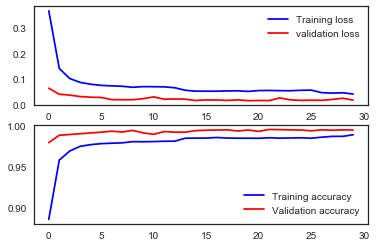

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

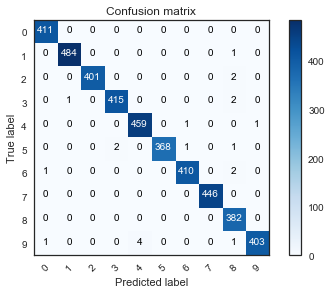

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, backgroundcolor = 'white')
    plt.yticks(tick_marks, classes, backgroundcolor = 'white')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', backgroundcolor = 'white')
    plt.xlabel('Predicted label', backgroundcolor = 'white')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

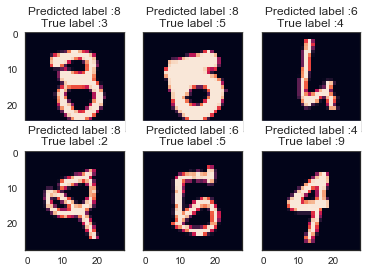

In [31]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]),
                                  backgroundcolor = 'white')
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [29]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")


In [40]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)